Here we look at some data from Wine Reviews

https://www.kaggle.com/zynicide/wine-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
%matplotlib inline

We load our Wine Reviews csv file:

In [2]:
wineReviews = pd.read_csv("http://knuth.luther.edu/~doroel01/winemag-data-130k-v2.csv", index_col=0)

## Let's take a first look on our data

In [3]:
wineReviews.info() # let's see data format, size, shape and if we have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


We have 129970 rows and 14 columns. 

## Null values

In [4]:
# Function to investigate missing values in wine dataset :
def MissingValues(df): #creating the function
    total = df.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print(df[~(df['Total'] == 0)])# Returning values of nulls different of 0
    
    return

MissingValues(wineReviews)

                       Total    Percent
region_2               79460  61.136715
designation            37465  28.825661
taster_twitter_handle  31213  24.015357
taster_name            26244  20.192197
region_1               21247  16.347493
price                   8996   6.921544
province                  63   0.048472
country                   63   0.048472
variety                    1   0.000769


Based on the heatmap, we have 4 variables with the a relative high (20%+) number of nulls

## Visualize the null values using our heatmap:

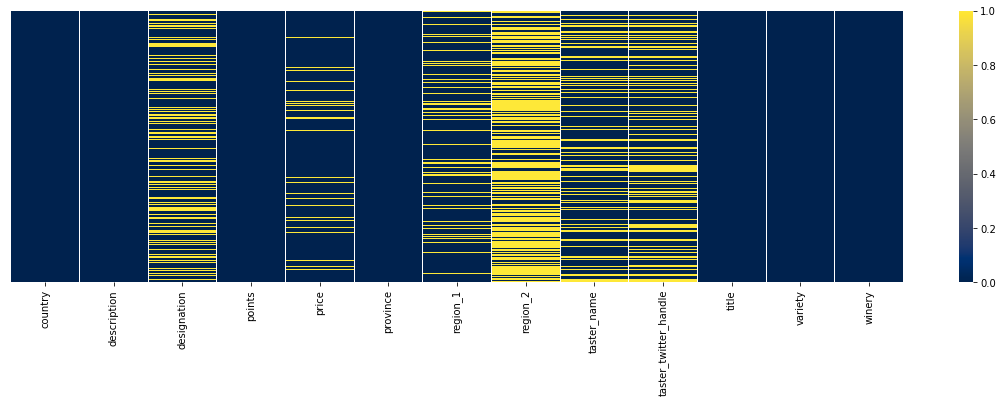

In [5]:
f = plt.figure(figsize=(20,5))
sns.heatmap(wineReviews.isnull(),yticklabels=False,cmap='cividis')
plt.show()

The heatmap shows that 6 columns in the dataset have variables with more than 6% number of nulls

## Unique values

In [6]:
wineReviews.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

# Investigating distribuition of Points and Prices

In [9]:
print("Statistics of numerical data:")
print(wineReviews.describe())

Statistics of numerical data:
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


We see very interesting distribuition of Points and Price.

1. The values of points are distributed between 80 and 100
2. The price have a high difference between the values and a high standard deviation

## Lets see some graphs of this distribuitions

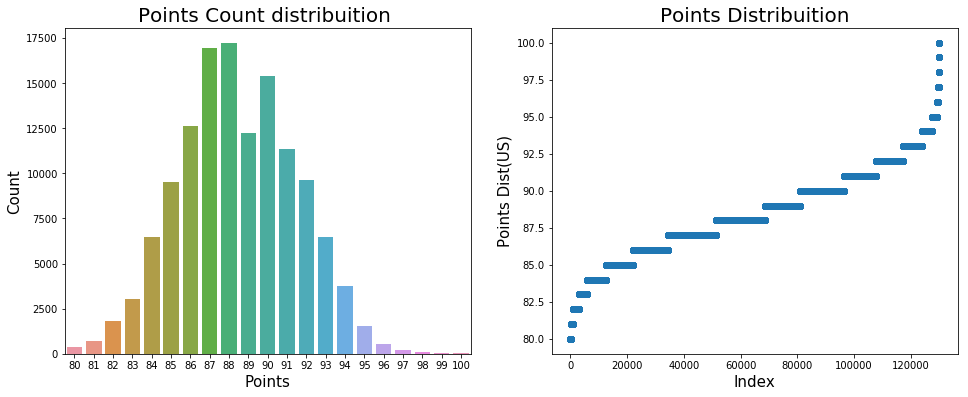

Percentiles of points: 
0.01    82.0
0.25    86.0
0.50    88.0
0.75    91.0
0.99    95.0
Name: points, dtype: float64


In [10]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1) # this creates a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=wineReviews) # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(wineReviews.shape[0]), np.sort(wineReviews.points.values)) # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

print("Percentiles of points: ") 
print(wineReviews['points'].quantile([.01,.25,.5,.75,.99])) # printing the quantile values

The histogram and the Quantile plots both show a normal distribution of points

## Now we investigate the distribution of price values

/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


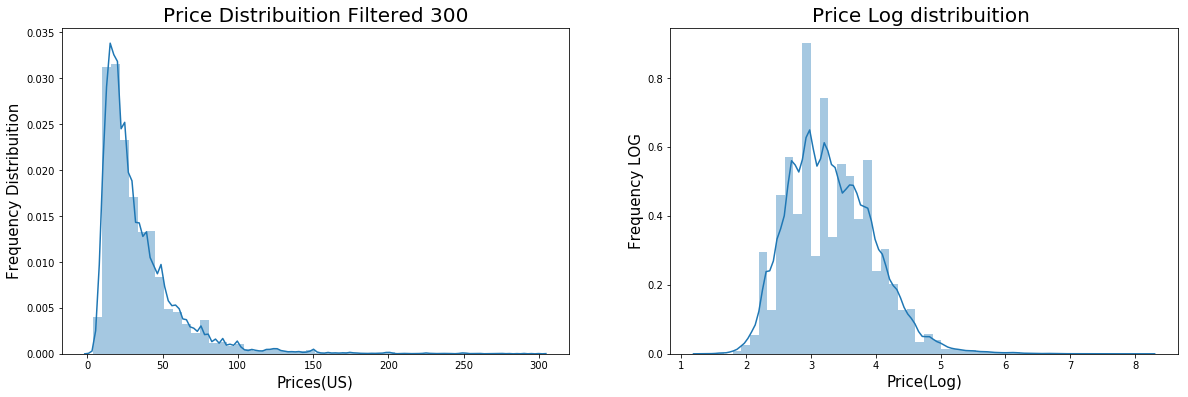

In [11]:
plt.figure(figsize=(20,6))

g = plt.subplot(121)
g = sns.distplot(wineReviews[wineReviews['price'] < 300]['price'])
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)

g1 = plt.subplot(122)
g1 = sns.distplot(np.log(wineReviews['price'].dropna()))
g1.set_title("Price Log distribuition ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.show()

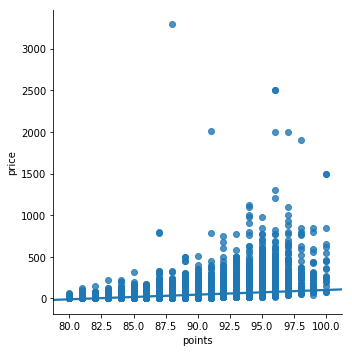

In [12]:
sns.lmplot(y = 'price', x='points', data=wineReviews)
plt.show()

In [13]:
wineReviews.corr()

points     price
points  1.000000  0.416167
price   0.416167  1.000000

Scatter plot interpretation:

1. The highest values isn't of the wine with highest points
2. The most expensive wine have points between 87 and 90

## Let's take a quick look at all wines with price highest than USD 1500

In [14]:
wineReviews.loc[(wineReviews['price'] > 1500)]

country                                        description  \
1558    France  A massive wine for Margaux, packed with tannin...   
15840   France  The wine is a velvet glove in an iron fist. Th...   
65352   France  This extravagantly perfumed wine has great jui...   
80290   France  This ripe wine shows plenty of blackberry frui...   
98380   France  A superb wine from a great year, this is power...   
113564  France  A wonderfully complete wine, with all the elem...   
120391      US  The nose on this single-vineyard wine from a s...   

                designation  points   price    province     region_1  \
1558                    NaN      98  1900.0    Bordeaux      Margaux   
15840                   NaN      96  2500.0    Bordeaux      Pomerol   
65352                   NaN      97  2000.0    Bordeaux      Pomerol   
80290                   NaN      88  3300.0    Bordeaux        Médoc   
98380                   NaN      96  2500.0    Burgundy   La Romanée   
113564                  NaN      96  2000.0    Burgundy   La Romanée   
120391  Roger Rose Vineyard      91  2013.0  California  Arroyo Seco   

             region_2    taster_name taster_twitter_handle  \
1558              NaN     Roger Voss            @vossroger   
15840             NaN     Roger Voss            @vossroger   
65352             NaN     Roger Voss            @vossroger   
80290             NaN     Roger Voss            @vossroger   
98380             NaN     Roger Voss            @vossroger   
113564            NaN     Roger Voss            @vossroger   
120391  Central Coast  Matt Kettmann         @mattkettmann   

                                                    title  \
1558                        Château Margaux 2009  Margaux   
15840                        Château Pétrus 2014  Pomerol   
65352                        Château Pétrus 2011  Pomerol   
80290                Château les Ormes Sorbet 2013  Médoc   
98380      Domaine du Comte Liger-Belair 2010  La Romanée   
113564     Domaine du Comte Liger-Belair 2005  La Romanée   
120391  Blair 2013 Roger Rose Vineyard Chardonnay (Arr...   

                         variety                         winery  
1558    Bordeaux-style Red Blend                Château Margaux  
15840   Bordeaux-style Red Blend                 Château Pétrus  
65352   Bordeaux-style Red Blend                 Château Pétrus  
80290   Bordeaux-style Red Blend       Château les Ormes Sorbet  
98380                 Pinot Noir  Domaine du Comte Liger-Belair  
113564                Pinot Noir  Domaine du Comte Liger-Belair  
120391                Chardonnay                          Blair

We have just 7 wines with values highest than 1500 USD. Moreover, It's interesting to note that the most expensive wine has the lowest points among all the 7 wines and that the almost all of them are from France.

## We check whether or not there are any duplicates in our dataset:

In [15]:
wineReviews[wineReviews.duplicated('description',keep=False)].sort_values('description').head()

country                                        description  \
67614       US  100% Malbec, it's redolent with dark plums, wi...   
46540       US  100% Malbec, it's redolent with dark plums, wi...   
119702      US  100% Sangiovese, this pale pink wine has notes...   
72181       US  100% Sangiovese, this pale pink wine has notes...   
73731   France  87-89 Barrel sample. A pleasurable, perfumed w...   

          designation  points  price    province              region_1  \
67614             NaN      87   20.0  Washington     Rattlesnake Hills   
46540             NaN      87   20.0  Washington     Rattlesnake Hills   
119702         Meadow      88   18.0  Washington  Columbia Valley (WA)   
72181          Meadow      88   18.0  Washington  Columbia Valley (WA)   
73731   Barrel sample      88    NaN    Bordeaux          Saint-Julien   

               region_2       taster_name taster_twitter_handle  \
67614   Columbia Valley  Sean P. Sullivan         @wawinereport   
46540   Columbia Valley  Sean P. Sullivan         @wawinereport   
119702  Columbia Valley  Sean P. Sullivan         @wawinereport   
72181   Columbia Valley  Sean P. Sullivan         @wawinereport   
73731               NaN        Roger Voss            @vossroger   

                                                    title  \
67614          Roza Ridge 2010 Malbec (Rattlesnake Hills)   
46540          Roza Ridge 2010 Malbec (Rattlesnake Hills)   
119702  Ross Andrew 2013 Meadow Rosé (Columbia Valley ...   
72181   Ross Andrew 2013 Meadow Rosé (Columbia Valley ...   
73731   Château Lalande-Borie 2008 Barrel sample  (Sai...   

                         variety                 winery  
67614                     Malbec             Roza Ridge  
46540                     Malbec             Roza Ridge  
119702                      Rosé            Ross Andrew  
72181                       Rosé            Ross Andrew  
73731   Bordeaux-style Red Blend  Château Lalande-Borie

We decided to drop all duplicates based on the description column alone and subsequently all missing price data, we then check the size of our dataset again:

In [16]:
wineReviews = wineReviews.drop_duplicates('description')
wineReviews = wineReviews[pd.notnull(wineReviews.price)]
wineReviews.shape

(111567, 13)

# Country Exploration

Plotting all the countries, there's some odd plots as a result of low sample size for certain countries.

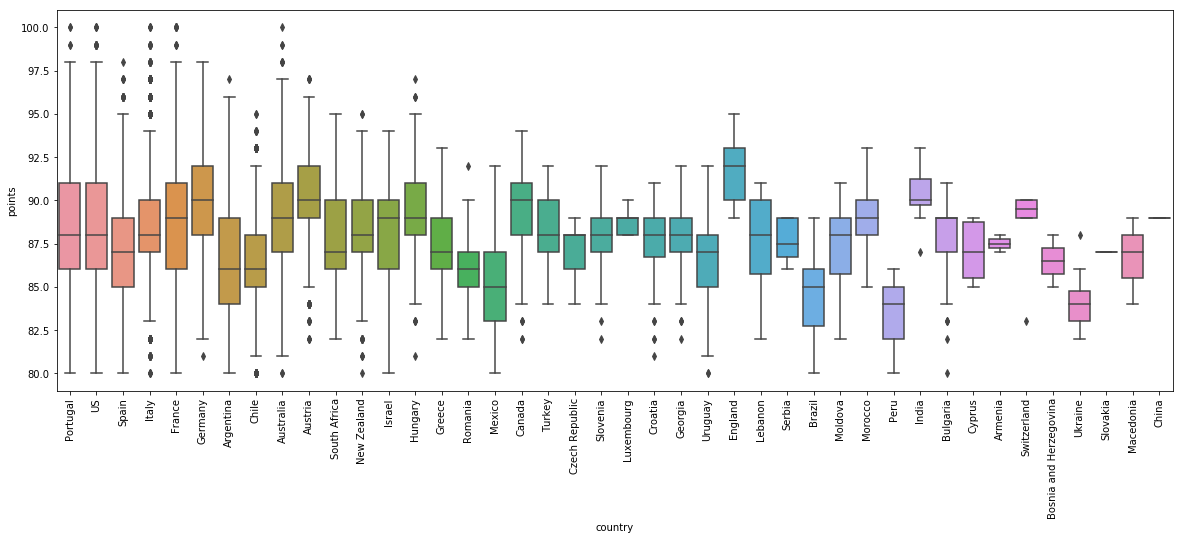

In [17]:
fig1, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=wineReviews, ax = ax)
plt.xticks(rotation = 90)
plt.show()

As seen, countries like Slovakia, China, Armenia, and Switzerland have extremely low samples in our dataset

Next, we remove all countries with less than 100 observations

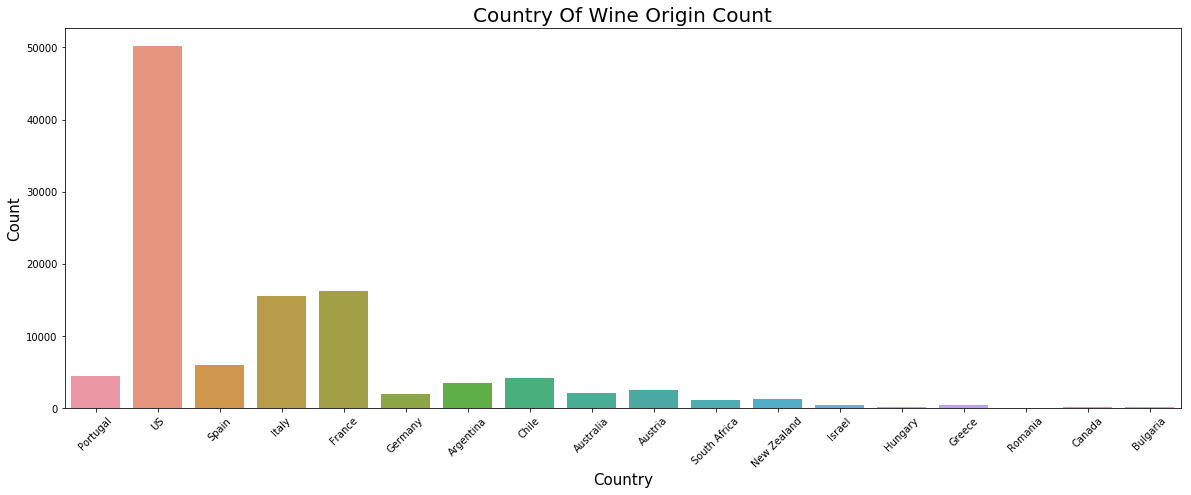

In [18]:
wineBycountry = wineReviews.country.value_counts()[:18]

fig2, ax = plt.subplots(figsize = (20,7))

g = sns.countplot(x='country', data= wineReviews[wineReviews.country.isin(wineBycountry.index.values)])
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

As seen in the bar chart above, US has the highest sample among all the countries following by Frace, Italy, Spain, Portugal, and so on.

Next, we plot the average scores (points) of each country side by side:

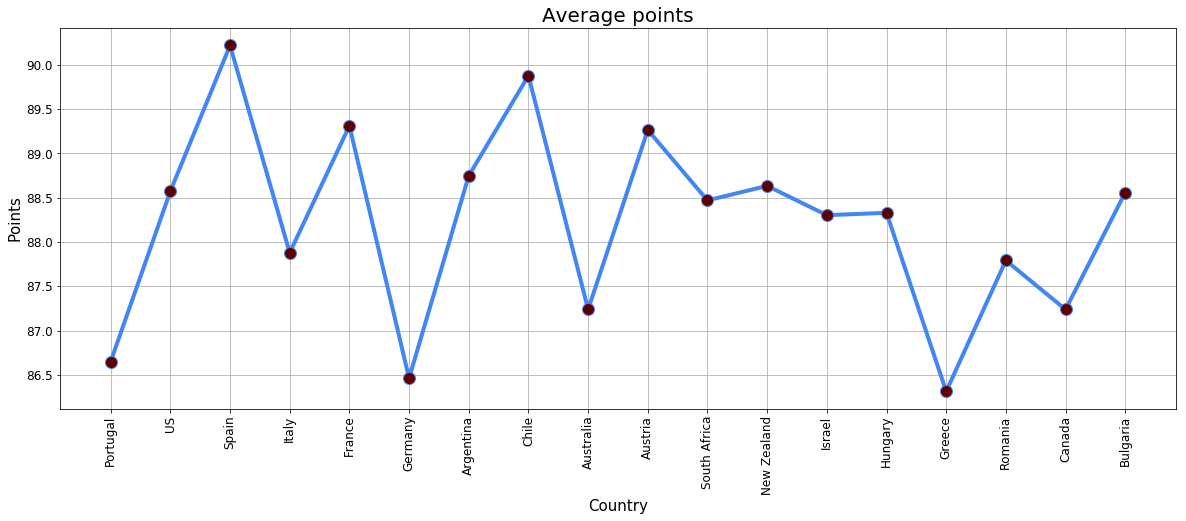

In [44]:
countryPoints = wineReviews.groupby('country').filter(lambda x: len(x) >100)
statistics_points = countryPoints['points'].groupby(countryPoints['country']).mean()
mean_value = [ statistics_points[i] for i in range(len(statistics_points))]

_country = countryPoints.country.unique().tolist()

plt.figure(figsize=(20,7))
plt.plot( _country, mean_value,  marker='o', markerfacecolor='#5e0000', markersize=12, color='#4286f4', linewidth=4)
plt.xticks(rotation=90)
plt.tick_params(axis = 'both', labelsize = 12)
plt.grid(True)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Points', fontsize = 15)
plt.title('Average points', fontsize = 20)
plt.show()

After removing all countries with less than 100 observations, it appears that Spain, Chile, France, and Austria have the highest mean scores (points)

We then proceed to visualize the mean of the wine prices by country:

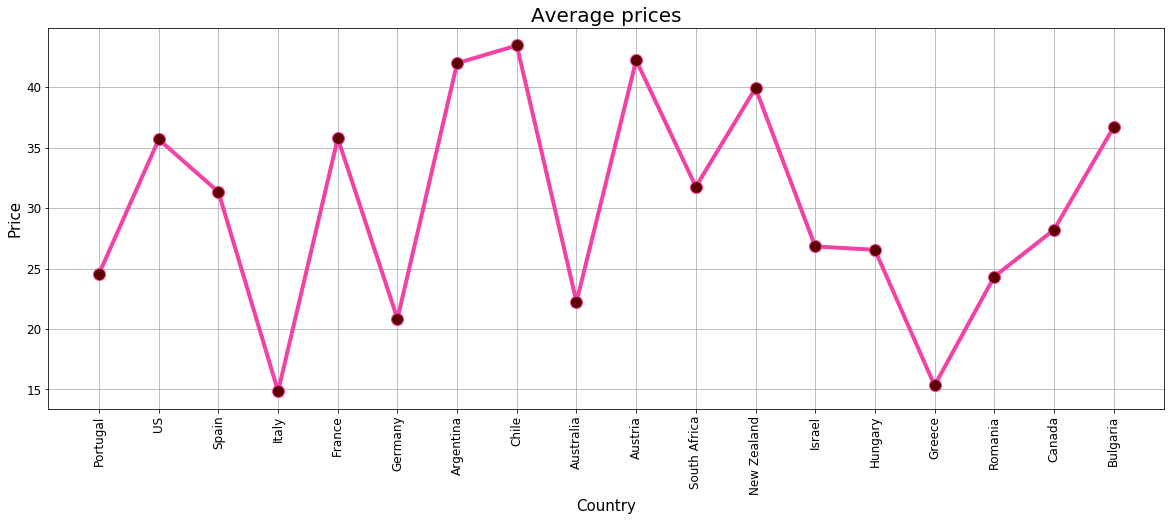

In [45]:
statistics_price = countryPoints['price'].groupby(countryPoints['country']).mean()
mean_value = [ statistics_price[i] for i in range(len(statistics_price))]

_country = countryPoints.country.unique().tolist()

plt.figure(figsize=(20,7))
plt.plot( _country, mean_value,  marker='o', markerfacecolor='#5e0000', markersize=12, color='#f441a6', linewidth=4)
plt.xticks(rotation=90)
plt.tick_params(axis = 'both', labelsize = 12)
plt.grid(True)
plt.title('Average prices', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

# Province Exploration

We want to show all provinces that have more than 1000 observations

In [28]:
provinces = wineReviews['province'].value_counts()[:23]

## Plotting Provinces against the total count of observations

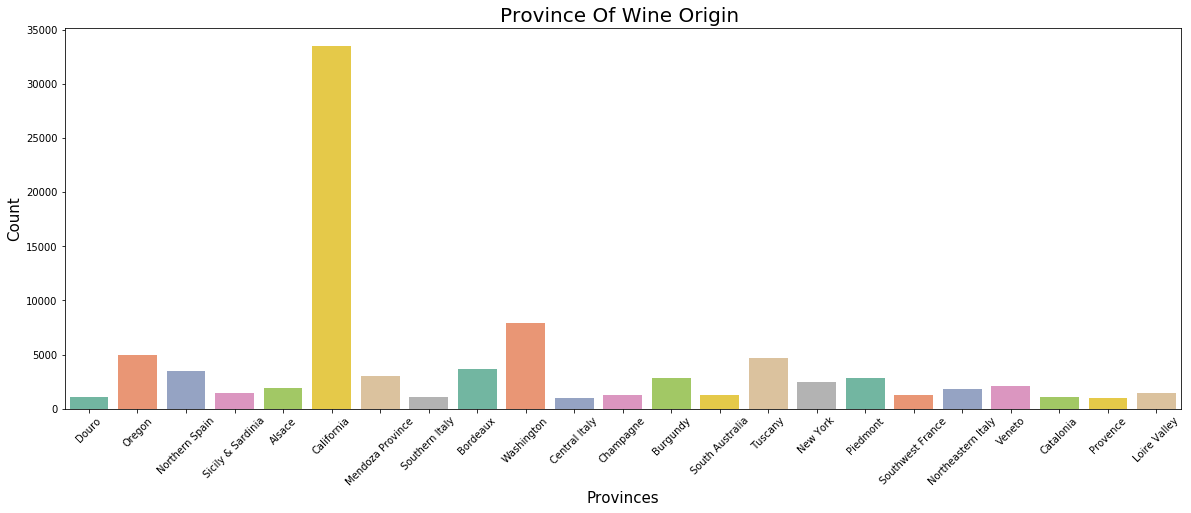

In [29]:
fig2, ax = plt.subplots(figsize = (20,7))
g = sns.countplot(x='province', 
                  data=wineReviews.loc[(wineReviews.province.isin(provinces.index.values))],
                 palette='Set2')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

Based on the bar chart above, California is the province with the highest observation in our dataset

# Plotting Provinces against the price of wines

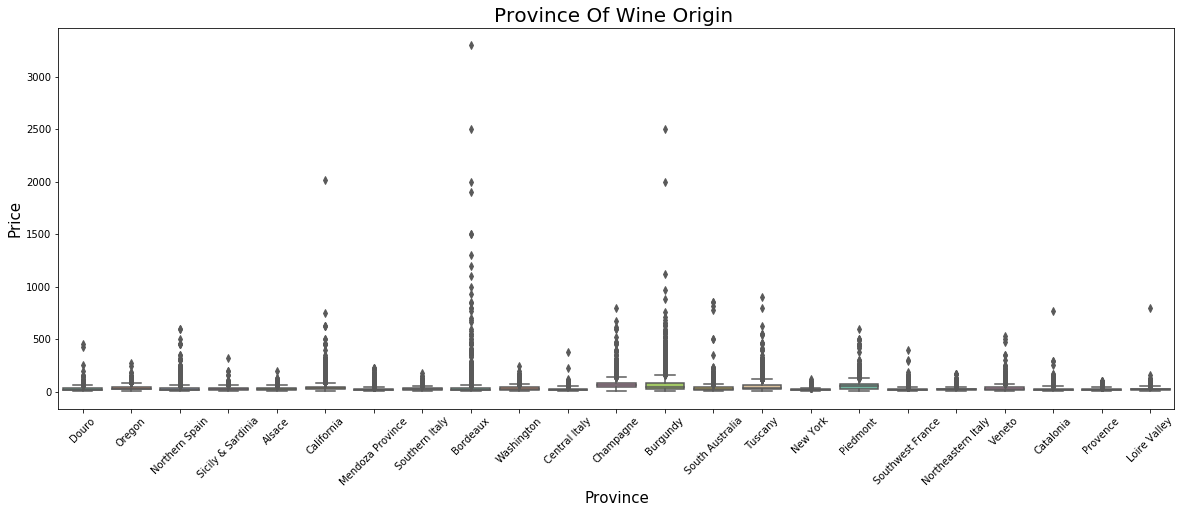

In [30]:
fig2, ax = plt.subplots(figsize = (20,7))
g1 = sns.boxplot(y='price', x='province',
                  data=wineReviews.loc[(wineReviews.province.isin(provinces.index.values))],
                 palette='Set2')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

## Boxplot of Provinces vs. Points 

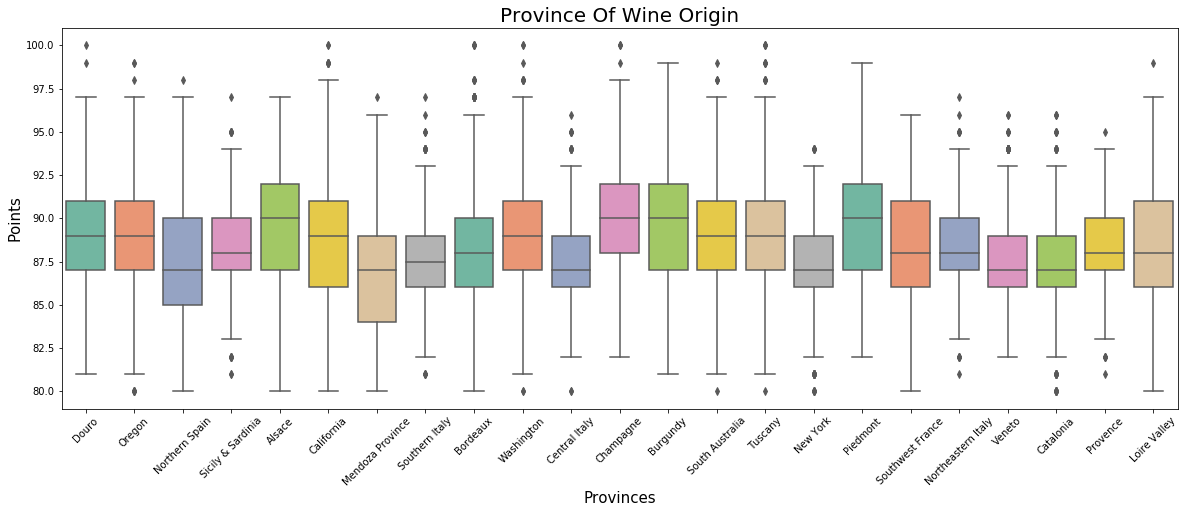

In [31]:
fig2, ax = plt.subplots(figsize = (20,7))
g2 = sns.boxplot(y='points', x='province',
                  data=wineReviews.loc[(wineReviews.province.isin(provinces.index.values))],
                 palette='Set2')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.show()

# Wine Variety Exploration

There's a large variety of wines in the dataset. However, we found that there's an exponential decline in the number of observations for each wine type:

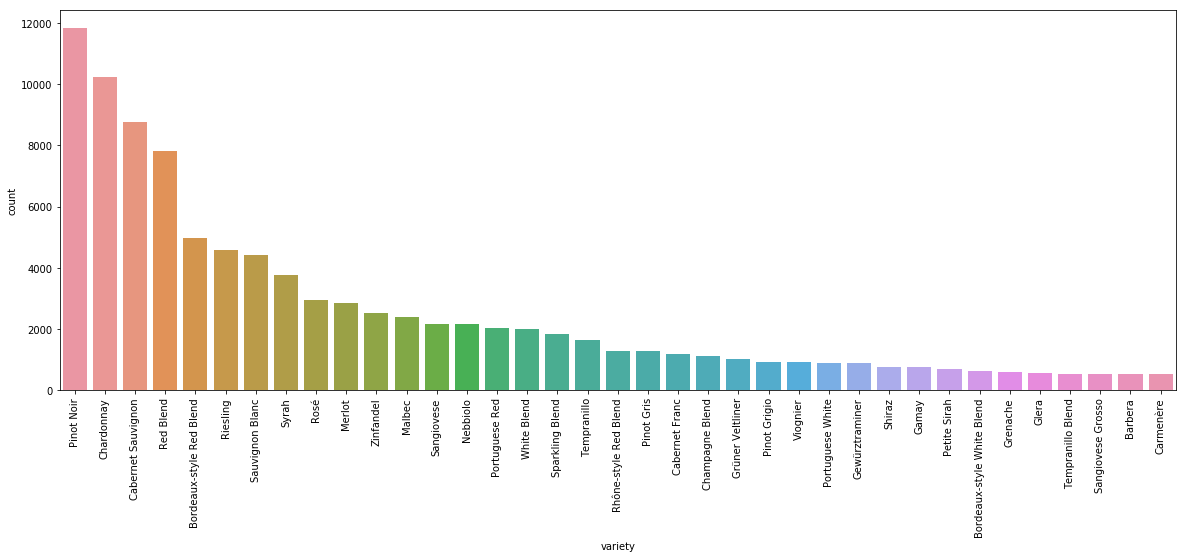

In [33]:
wineReviewsVar = wineReviews.groupby('variety').filter(lambda x: len(x) >500)
list_ = wineReviewsVar.variety.value_counts().index.tolist()
fig5, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=wineReviewsVar, order = list_, ax=ax4)
plt.xticks(rotation = 90)
plt.show()

Below is a violinplot chart containing all wine varieties (>200 observations) and their respective point distributions. Sangiovese Grosso appears to have the highest median score of all wines. Despite the variations, overall the point distibution is basically uniform.

TypeError: Could not convert Portuguese RedPinot GrisRieslingPinot NoirGewürztraminerGewürztraminerPinot GrisCabernet SauvignonGewürztraminerCabernet SauvignonChardonnayRieslingMalbecMalbecTempranillo BlendRed BlendPinot NoirWhite BlendMerlotPinot NoirWhite BlendRed BlendRed BlendSauvignon BlancPinot NoirCabernet SauvignonPinot NoirGamaySauvignon BlancMerlotRed BlendRieslingSauvignon BlancGamayBordeaux-style White BlendChardonnayChardonnayPinot NoirMalbecCabernet SauvignonSangioveseCabernet FrancChampagne BlendSauvignon BlancChardonnayChardonnayBordeaux-style Red BlendRed BlendChampagne BlendChardonnayCabernet SauvignonCabernet SauvignonPetite SirahBordeaux-style Red BlendRieslingChardonnayPinot NoirCarmenèreRoséZinfandelRieslingMerlotRed BlendPinot GrisGrüner VeltlinerViognierGamayGamayRieslingSangioveseBordeaux-style Red BlendPinot GrisRieslingRieslingChardonnayRed BlendWhite BlendRed BlendZinfandelRed BlendGamayCabernet SauvignonRed BlendWhite BlendBordeaux-style Red BlendChardonnaySyrahRed BlendRieslingNebbioloChardonnayZinfandelCabernet SauvignonCabernet SauvignonGewürztraminerWhite BlendBordeaux-style Red BlendNebbioloCabernet SauvignonNebbioloCabernet SauvignonNebbioloBordeaux-style Red BlendPinot GrisBarberaNebbioloRieslingPinot GrisCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonRieslingRhône-style Red BlendCabernet SauvignonPortuguese WhitePinot NoirSyrahSyrahRieslingPortuguese RedSangioveseMalbecRed BlendRieslingRed BlendCabernet SauvignonCabernet FrancMerlotPinot NoirRieslingRieslingCabernet SauvignonPinot NoirSauvignon BlancRed BlendSangioveseSyrahChardonnayChardonnayPinot NoirChardonnayCarmenèrePinot NoirRed BlendMerlotChardonnayRed BlendCabernet SauvignonRed BlendChardonnayCabernet SauvignonCabernet FrancWhite BlendSyrahPortuguese RedChardonnayCabernet SauvignonZinfandelWhite BlendRhône-style Red BlendChardonnayRhône-style Red BlendRed BlendRhône-style Red BlendBordeaux-style Red BlendSangiovesePortuguese RedChardonnayMalbecChardonnayPinot NoirRieslingRed BlendGewürztraminerShirazPinot NoirSyrahCabernet SauvignonGrenacheCabernet SauvignonSangioveseChardonnayChardonnayRed BlendChardonnaySauvignon BlancMerlotPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirZinfandelMalbecPetite SirahPinot NoirRed BlendCabernet SauvignonMalbecPinot NoirRed BlendRed BlendPinot NoirSyrahChardonnayRed BlendWhite BlendWhite BlendRed BlendWhite BlendCabernet SauvignonZinfandelCabernet SauvignonPinot NoirGrüner VeltlinerPinot NoirRed BlendPinot NoirMalbecPinot NoirCabernet SauvignonShirazMalbecCabernet SauvignonCabernet SauvignonCabernet SauvignonSangioveseChardonnayNebbioloZinfandelChardonnayPinot NoirWhite BlendNebbioloNebbioloSyrahCabernet SauvignonCabernet SauvignonMerlotCabernet SauvignonChardonnayWhite BlendZinfandelRed BlendGewürztraminerChampagne BlendPinot NoirRoséRoséSparkling BlendPinot GrisZinfandelSparkling BlendPinot NoirChardonnayRieslingNebbioloChardonnayChardonnayRieslingChardonnayShirazPinot NoirRieslingChardonnayNebbioloCabernet SauvignonChardonnayPinot NoirShirazCarmenèreChardonnayCabernet SauvignonSauvignon BlancWhite BlendSauvignon BlancSauvignon BlancSangiovesePinot GrigioNebbioloWhite BlendMerlotWhite BlendCabernet SauvignonChardonnayGewürztraminerSauvignon BlancMerlotSauvignon BlancPinot NoirWhite BlendCabernet SauvignonChardonnaySauvignon BlancChardonnayMerlotZinfandelPinot NoirSauvignon BlancSyrahRed BlendSyrahChampagne BlendChardonnayGewürztraminerCabernet FrancCabernet SauvignonRieslingBordeaux-style Red BlendMerlotGrüner VeltlinerWhite BlendRoséTempranilloSparkling BlendGrüner VeltlinerSyrahSauvignon BlancTempranilloRieslingNebbioloBordeaux-style Red BlendCabernet SauvignonCabernet FrancZinfandelGrüner VeltlinerCabernet SauvignonChardonnaySangioveseChampagne BlendChardonnaySparkling BlendPinot NoirSparkling BlendChampagne BlendPinot NoirChardonnayChampagne BlendRieslingRed BlendPinot NoirRieslingRieslingChampagne BlendPinot NoirPinot NoirPortuguese RedCabernet SauvignonRed BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRhône-style Red BlendCabernet SauvignonWhite BlendPinot GrigioSparkling BlendGrüner VeltlinerSangioveseRed BlendChardonnayChardonnayCabernet FrancPinot NoirRoséRoséSauvignon BlancRhône-style Red BlendTempranilloWhite BlendSyrahTempranilloRed BlendChardonnayChampagne BlendChampagne BlendCabernet SauvignonMerlotPinot NoirPinot NoirPinot NoirPinot NoirGrenacheGrenachePinot NoirPinot NoirSyrahChardonnayPinot NoirChampagne BlendPinot NoirSyrahSparkling BlendPinot NoirPinot NoirCabernet SauvignonRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonRed BlendCabernet SauvignonChardonnaySangiovesePinot NoirNebbioloChardonnayZinfandelRoséMalbecRoséCabernet SauvignonTempranilloPinot NoirWhite BlendSyrahPinot NoirPetite SirahPinot NoirSyrahRed BlendCabernet SauvignonMalbecCabernet SauvignonChardonnaySyrahBordeaux-style Red BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendRoséWhite BlendGewürztraminerMerlotPinot NoirGrüner VeltlinerChardonnaySauvignon BlancChardonnayChardonnayGrüner VeltlinerMalbecRieslingRhône-style Red BlendCabernet SauvignonRieslingSangioveseCabernet SauvignonSauvignon BlancCabernet SauvignonCabernet FrancRed BlendRed BlendGrenacheViognierPortuguese WhiteGrüner VeltlinerSauvignon BlancPinot NoirPortuguese WhiteMalbecChardonnayGleraMerlotChardonnayGleraPinot NoirRed BlendRed BlendRed BlendWhite BlendShirazPinot NoirPinot NoirGewürztraminerRieslingViognierZinfandelShirazRieslingPinot GrisChardonnayPinot GrisPortuguese RedChardonnayCabernet SauvignonPinot NoirPortuguese RedPortuguese RedRieslingCabernet SauvignonRieslingRieslingGrenacheRieslingZinfandelPinot NoirRhône-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonPinot GrigioNebbioloCabernet SauvignonBarberaRieslingRieslingMalbecCabernet SauvignonPetite SirahRieslingPinot NoirCabernet SauvignonPinot NoirChardonnaySyrahSyrahCabernet SauvignonTempranillo BlendSyrahRed BlendCabernet SauvignonPinot NoirNebbioloChardonnayCabernet SauvignonRed BlendRed BlendMalbecRed BlendCabernet FrancSauvignon BlancRed BlendSauvignon BlancBordeaux-style Red BlendRoséRoséRoséSauvignon BlancRoséRoséRoséZinfandelPinot NoirSauvignon BlancPinot NoirPinot NoirPinot NoirRed BlendPinot NoirRoséPortuguese WhiteChardonnayRoséCabernet SauvignonPortuguese WhiteViognierNebbioloRoséPinot NoirPortuguese WhiteCabernet SauvignonChardonnayPinot NoirPinot NoirTempranilloRoséMalbecNebbioloChardonnayZinfandelNebbioloPinot GrigioPinot NoirCabernet FrancRieslingPinot NoirSauvignon BlancChardonnayGewürztraminerZinfandelPinot NoirPinot NoirSyrahSyrahSyrahRed BlendPinot NoirTempranilloCabernet SauvignonChardonnaySparkling BlendChardonnayPortuguese RedPinot NoirPinot NoirChardonnayPinot NoirChampagne BlendWhite BlendChardonnaySparkling BlendZinfandelPortuguese RedRed BlendPortuguese RedCabernet SauvignonChardonnayRieslingCabernet SauvignonPinot NoirBordeaux-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSyrahGamayMerlotChardonnayRieslingChardonnayChardonnayTempranilloCabernet SauvignonSyrahRed BlendSauvignon BlancGewürztraminerMerlotGamayTempranillo BlendSparkling BlendSangioveseMalbecMerlotSangioveseSangioveseMerlotViognierChardonnayGamayNebbioloCabernet SauvignonGamaySparkling BlendSparkling BlendSyrahRieslingChardonnayGamayCabernet FrancPinot NoirPinot NoirChardonnayRieslingZinfandelChardonnaySyrahPinot GrisCabernet SauvignonCabernet FrancPinot NoirRoséPinot NoirCarmenèreGrenacheSyrahMerlotWhite BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendCabernet SauvignonSparkling BlendPetite SirahRhône-style Red BlendPortuguese WhiteCabernet FrancPinot NoirViognierPinot NoirBordeaux-style Red BlendShirazSangioveseRed BlendSyrahSyrahSangioveseRed BlendPortuguese WhiteRieslingNebbioloNebbioloNebbioloBordeaux-style Red BlendRoséMalbecPinot NoirPinot GrisNebbioloNebbioloPinot GrisPortuguese WhiteSauvignon BlancSauvignon BlancMalbecNebbioloZinfandelMalbecNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayTempranilloBordeaux-style Red BlendChampagne BlendPinot NoirTempranillo BlendViognierChardonnaySangiovesePortuguese RedPortuguese RedNebbioloChardonnayPinot NoirCabernet SauvignonNebbioloSauvignon BlancRoséChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendChampagne BlendBordeaux-style Red BlendSauvignon BlancChardonnayCarmenèreCabernet SauvignonChampagne BlendViognierSyrahRed BlendPinot NoirWhite BlendViognierWhite BlendSauvignon BlancSauvignon BlancCabernet SauvignonGewürztraminerRed BlendCabernet SauvignonViognierPinot GrisTempranillo BlendSauvignon BlancRed BlendSauvignon BlancWhite BlendSyrahShirazPinot GrisRieslingCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style White BlendSauvignon BlancPinot NoirSauvignon BlancShirazCabernet SauvignonPinot NoirPinot GrisRhône-style Red BlendRed BlendGewürztraminerBordeaux-style Red BlendPinot GrisMalbecWhite BlendPinot GrisSauvignon BlancPinot GrisGrenacheWhite BlendChardonnayTempranilloPinot GrisChardonnaySyrahMalbecBordeaux-style Red BlendRed BlendGrüner VeltlinerPinot GrigioPinot NoirWhite BlendMerlotCabernet SauvignonChardonnayMerlotWhite BlendPinot GrigioTempranillo BlendGrüner VeltlinerRed BlendSyrahBordeaux-style White BlendRed BlendZinfandelPinot NoirPinot NoirPinot NoirPinot NoirNebbioloPortuguese RedShirazChardonnayPinot NoirNebbioloChardonnayChardonnayRieslingRieslingSyrahMalbecCabernet FrancZinfandelRieslingPinot NoirSyrahCabernet FrancPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonRed BlendViognierChardonnayRed BlendChardonnaySauvignon BlancSyrahNebbioloCabernet FrancZinfandelRhône-style Red BlendRed BlendTempranilloSparkling BlendRhône-style Red BlendSauvignon BlancSangioveseTempranilloMerlotZinfandelRed BlendWhite BlendSparkling BlendRieslingPinot GrisRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendMalbecCabernet SauvignonSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancRed BlendCabernet SauvignonChardonnayChardonnayChardonnayZinfandelBordeaux-style Red BlendMerlotBordeaux-style Red BlendCarmenèreWhite BlendRed BlendShirazGrüner VeltlinerPetite SirahWhite BlendCabernet SauvignonMerlotBordeaux-style Red BlendChardonnayRieslingPinot NoirPinot NoirMerlotGrüner VeltlinerRoséCabernet SauvignonSparkling BlendPinot GrisNebbioloSauvignon BlancNebbioloNebbioloPortuguese RedChardonnayChardonnayChardonnayChardonnayChardonnayMalbecMalbecBordeaux-style Red BlendChardonnayNebbioloPinot GrigioRieslingChardonnayTempranilloZinfandelPortuguese RedNebbioloChardonnayNebbioloPortuguese RedSparkling BlendCabernet SauvignonBordeaux-style Red BlendPinot NoirPinot NoirSauvignon BlancPortuguese RedSyrahBarberaSyrahBordeaux-style Red BlendPinot NoirSyrahSparkling BlendPortuguese RedChardonnayPinot NoirPinot NoirPortuguese RedPinot NoirRed BlendTempranilloPinot NoirPinot NoirRed BlendChardonnaySangioveseBordeaux-style Red BlendSangioveseBordeaux-style Red BlendChardonnayChardonnayBordeaux-style Red BlendSauvignon BlancCabernet SauvignonSauvignon BlancRed BlendRed BlendRieslingChardonnayChardonnayMerlotCabernet SauvignonTempranilloSangiovese GrossoTempranilloWhite BlendViognierRieslingPinot NoirRieslingCabernet FrancCabernet SauvignonPetite SirahChardonnayChardonnayMerlotCabernet SauvignonSauvignon BlancTempranilloTempranilloRieslingPinot NoirCabernet SauvignonRed BlendRieslingCabernet SauvignonRed BlendChardonnaySyrahChardonnaySauvignon BlancSauvignon BlancRieslingRieslingCabernet SauvignonPinot NoirPortuguese WhiteZinfandelBordeaux-style Red BlendChardonnayCabernet SauvignonPetite SirahCabernet SauvignonSauvignon BlancWhite BlendSparkling BlendGrüner VeltlinerSparkling BlendSyrahSyrahChardonnayPinot NoirRed BlendBordeaux-style Red BlendSyrahSauvignon BlancRoséRoséRoséRoséGrüner VeltlinerCabernet SauvignonRhône-style Red BlendViognierRieslingRoséRed BlendRed BlendBordeaux-style Red BlendTempranillo BlendPinot NoirPetite SirahRoséCabernet SauvignonRoséChardonnayRoséSyrahZinfandelRoséSyrahPortuguese WhiteCabernet SauvignonRoséViognierPinot GrigioRieslingMalbecPinot NoirPinot NoirMalbecCabernet FrancRieslingPortuguese RedCabernet FrancPinot GrigioPinot GrigioWhite BlendChardonnayCabernet SauvignonRieslingPinot NoirGewürztraminerPinot GrisZinfandelCabernet SauvignonBordeaux-style Red BlendViognierCabernet SauvignonCabernet SauvignonPinot GrisPinot GrisCabernet SauvignonRed BlendBordeaux-style Red BlendViognierRed BlendRhône-style Red BlendBordeaux-style Red BlendCabernet SauvignonGrüner VeltlinerMerlotCabernet SauvignonRhône-style Red BlendCabernet SauvignonRed BlendChardonnayPortuguese RedWhite BlendRhône-style Red BlendPinot NoirPinot NoirSangiovesePinot NoirRed BlendRhône-style Red BlendCabernet SauvignonRieslingMalbecCabernet SauvignonSauvignon BlancSangiovesePinot NoirSyrahPortuguese RedCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirSangioveseCabernet SauvignonCabernet SauvignonRed BlendPinot GrigioCabernet SauvignonCabernet SauvignonSyrahChardonnayRieslingCabernet SauvignonSauvignon BlancSauvignon BlancMerlotBordeaux-style Red BlendPinot NoirSangiovesePinot NoirPinot GrigioPinot NoirChardonnayBordeaux-style Red BlendChardonnayPinot GrigioPinot GrigioCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonPinot NoirMalbecRed BlendMerlotRed BlendGamayChardonnayPinot NoirCabernet SauvignonBordeaux-style Red BlendMalbecCabernet SauvignonRed BlendPinot NoirRed BlendCabernet SauvignonRoséPortuguese WhiteRoséChardonnayChardonnayRed BlendTempranilloRoséBordeaux-style White BlendBordeaux-style White BlendRoséSyrahRed BlendRoséPortuguese WhiteSauvignon BlancChardonnayPortuguese RedCarmenèreSauvignon BlancPortuguese WhitePortuguese RedChardonnayPortuguese WhiteCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendRed BlendRed BlendCabernet SauvignonBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahChardonnayChardonnaySyrahChardonnayBordeaux-style Red BlendBordeaux-style Red BlendRieslingSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendPinot NoirChardonnayRieslingCabernet FrancSauvignon BlancRieslingChardonnayChardonnayBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancWhite BlendChardonnayRoséPortuguese WhitePortuguese WhiteRoséSauvignon BlancPinot NoirWhite BlendMalbecChardonnaySauvignon BlancPortuguese RedPortuguese RedMerlotPortuguese RedRoséPinot NoirChardonnayChardonnayPinot NoirPortuguese RedPortuguese RedRed BlendNebbioloChardonnayCabernet SauvignonRed BlendViognierRed BlendMalbecRoséMerlotPinot GrisPortuguese RedPortuguese RedPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonPortuguese WhiteChardonnayWhite BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendMerlotSyrahSyrahPinot NoirChardonnayCabernet FrancMalbecPinot GrisGrüner VeltlinerSauvignon BlancCabernet SauvignonGrenacheWhite BlendGrüner VeltlinerCabernet SauvignonMalbecMerlotChardonnaySyrahRed BlendChardonnayCabernet SauvignonSangioveseChardonnayChardonnayRed BlendViognierSangiovese GrossoPortuguese RedShirazChardonnayPinot GrigioWhite BlendWhite BlendShirazPinot NoirChardonnayTempranilloPinot NoirChardonnayChardonnayRhône-style Red BlendSangioveseBordeaux-style Red BlendSyrahSyrahSangioveseChardonnaySangioveseSyrahRed BlendPinot NoirZinfandelSangioveseBordeaux-style Red BlendChardonnayBordeaux-style Red BlendSparkling BlendRieslingTempranillo BlendBordeaux-style Red BlendSparkling BlendRhône-style Red BlendSauvignon BlancPinot NoirRed BlendBordeaux-style Red BlendRieslingMalbecRieslingSauvignon BlancRoséBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendRoséCarmenèreBordeaux-style Red BlendMerlotBordeaux-style Red BlendRhône-style Red BlendSangioveseRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingPinot NoirPinot NoirChardonnayMalbecPinot NoirSyrahChardonnayPinot NoirNebbioloBordeaux-style Red BlendPortuguese RedGewürztraminerChardonnayChardonnayChampagne BlendChardonnayRed BlendPinot NoirPortuguese WhiteSauvignon BlancWhite BlendMalbecSparkling BlendPinot NoirGamayPortuguese WhiteGamayGamayCabernet SauvignonGamayRed BlendRed BlendChardonnayPinot NoirCabernet SauvignonRed BlendSauvignon BlancTempranillo BlendRieslingPinot GrisCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendSauvignon BlancWhite BlendZinfandelChardonnayRed BlendGewürztraminerSyrahMalbecCabernet SauvignonRed BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRed BlendRed BlendCabernet SauvignonRed BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendRhône-style Red BlendSyrahSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendSyrahChardonnayRed BlendShirazCabernet SauvignonRed BlendChardonnayCabernet SauvignonCabernet SauvignonRed BlendChardonnayCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendPinot GrisChardonnayMalbecCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonChardonnayPinot NoirRieslingSyrahRed BlendPinot NoirSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloBordeaux-style Red BlendMerlotNebbioloMerlotBordeaux-style Red BlendBarberaCabernet SauvignonChardonnayNebbioloBordeaux-style Red BlendShirazPinot NoirCabernet SauvignonRed BlendSyrahChardonnayBordeaux-style Red BlendGrüner VeltlinerMerlotChardonnayCabernet SauvignonZinfandelRed BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendSauvignon BlancSauvignon BlancBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayGamayMerlotWhite BlendWhite BlendPinot NoirCabernet FrancGamayPinot NoirPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendGamayBordeaux-style White BlendRed BlendPinot NoirMalbecChardonnayPinot NoirChardonnaySyrahPinot NoirRhône-style Red BlendGamaySyrahChardonnayRieslingCabernet SauvignonChardonnayChardonnayPinot NoirPinot GrisGewürztraminerSyrahCabernet SauvignonPinot NoirRoséGewürztraminerRed BlendGewürztraminerGewürztraminerPinot NoirGewürztraminerPinot GrisPinot GrisRed BlendPinot NoirPetite SirahCabernet SauvignonChardonnayRed BlendChardonnayBordeaux-style Red BlendPinot GrigioRed BlendPinot NoirPortuguese RedCabernet SauvignonRhône-style Red BlendWhite BlendBordeaux-style Red BlendChampagne BlendSyrahNebbioloNebbioloNebbioloRieslingRieslingGrüner VeltlinerCabernet SauvignonCabernet SauvignonNebbioloNebbioloNebbioloSauvignon BlancChardonnayPinot NoirGewürztraminerRhône-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirBordeaux-style Red BlendRed BlendRed BlendBordeaux-style Red BlendSyrahSauvignon BlancChampagne BlendChardonnayPinot NoirCabernet SauvignonMalbecCarmenèrePetite SirahPinot NoirSauvignon BlancGrenacheChampagne BlendRed BlendPortuguese WhitePinot GrigioPinot GrigioChardonnayPinot GrigioZinfandelWhite BlendPinot NoirChardonnayCabernet FrancPinot GrigioCarmenèrePinot GrigioPinot NoirChardonnayRed BlendWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendMerlotRieslingRed BlendBarberaCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayMerlotMerlotNebbioloSauvignon BlancChardonnayBarberaZinfandelChardonnayTempranilloTempranilloCabernet SauvignonBordeaux-style Red BlendGamayBarberaRoséCarmenèrePortuguese RedPinot GrigioTempranilloMerlotRed BlendViognierViognierGamayPortuguese RedRieslingPinot NoirRieslingRieslingRoséChardonnayNebbioloSauvignon BlancNebbioloRoséRoséPinot NoirSauvignon BlancSparkling BlendRoséTempranillo BlendBordeaux-style Red BlendSangioveseBarberaRoséCabernet SauvignonChardonnaySyrahCabernet SauvignonRoséCarmenèreSauvignon BlancRed BlendRieslingCabernet SauvignonPinot NoirPetite SirahRed BlendChardonnayRhône-style Red BlendPinot GrisMalbecSangioveseZinfandelGewürztraminerChardonnayPinot GrisRieslingRed BlendPinot NoirViognierPinot NoirMerlotCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirSangiovese GrossoPinot NoirSangiovese GrossoPinot NoirSangiovese GrossoRed BlendSangiovese GrossoPinot NoirSangiovese GrossoPinot NoirSangiovese GrossoSangiovese GrossoPinot NoirPinot NoirSangiovese GrossoChardonnayChardonnayChardonnaySangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonShirazBarberaNebbioloGrüner VeltlinerCabernet SauvignonZinfandelPinot NoirZinfandelChardonnayPortuguese WhiteSauvignon BlancRed BlendRed BlendMalbecRed BlendPinot NoirZinfandelViognierRed BlendChardonnayCabernet SauvignonRed BlendSauvignon BlancRed BlendMalbecSauvignon BlancRieslingSangiovese GrossoSangioveseSyrahRed BlendRieslingCabernet SauvignonChardonnaySyrahSangiovese GrossoSangiovese GrossoMerlotTempranillo BlendRieslingChardonnaySangioveseSangiovese GrossoSangiovese GrossoCabernet SauvignonSangioveseRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendWhite BlendSauvignon BlancCabernet SauvignonChardonnayBarberaRieslingRed BlendSyrahGewürztraminerCabernet SauvignonChardonnayMalbecChardonnayMerlotMalbecChardonnayPinot GrisChardonnayPinot NoirMerlotZinfandelMalbecMerlotChardonnayPinot NoirSyrahRed BlendZinfandelGrüner VeltlinerChardonnayPinot NoirPinot NoirRed BlendCabernet SauvignonRed BlendMalbecCabernet SauvignonGamayRed BlendRieslingRieslingRed BlendWhite BlendBordeaux-style Red BlendRed BlendChardonnayRed BlendSparkling BlendPortuguese WhitePortuguese RedPortuguese RedPortuguese RedZinfandelPinot NoirMalbecSauvignon BlancPortuguese RedPortuguese RedRoséPinot NoirPortuguese RedPortuguese WhiteRoséPinot NoirChardonnayChardonnayChardonnayPinot NoirSparkling BlendChardonnaySangioveseCabernet SauvignonSauvignon BlancCabernet SauvignonRed BlendGamayBordeaux-style Red BlendCabernet SauvignonGamayRoséPinot NoirPinot GrisGamayMalbecMerlotPinot NoirViognierRed BlendPinot NoirSauvignon BlancCabernet SauvignonPinot NoirPinot NoirRed BlendZinfandelRieslingSangioveseCabernet SauvignonBordeaux-style Red BlendSyrahMerlotChardonnayWhite BlendSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseTempranillo BlendViognierBordeaux-style Red BlendPinot NoirZinfandelCabernet SauvignonZinfandelCabernet SauvignonChardonnayRed BlendRieslingMerlotRed BlendRieslingRed BlendWhite BlendCabernet SauvignonCabernet FrancChardonnayRieslingGewürztraminerPinot NoirCabernet SauvignonCarmenèreRed BlendWhite BlendBarberaRieslingPinot GrisSyrahCabernet SauvignonCarmenèreSyrahRhône-style Red BlendChardonnayTempranillo BlendNebbioloNebbioloNebbioloNebbioloRieslingNebbioloChardonnayNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloMerlotGrüner VeltlinerRed BlendTempranilloPinot NoirRieslingRed BlendSyrahRed BlendRed BlendRed BlendSyrahChardonnayRoséChardonnayRieslingPinot GrigioTempranilloPetite SirahMalbecChardonnayPinot NoirCabernet SauvignonPinot NoirMerlotRoséCabernet SauvignonSauvignon BlancRed BlendRed BlendGrüner VeltlinerChardonnayBordeaux-style Red BlendCabernet SauvignonMalbecRed BlendWhite BlendRhône-style Red BlendMalbecMerlotBordeaux-style Red BlendMalbecSyrahSyrahSyrahPinot NoirBordeaux-style White BlendBordeaux-style Red BlendRieslingRieslingMalbecNebbioloNebbioloMerlotShirazRieslingShirazRieslingCabernet SauvignonChardonnayRoséRed BlendPinot NoirCabernet SauvignonCarmenèreCabernet SauvignonSyrahSyrahSauvignon BlancCabernet SauvignonRieslingSauvignon BlancChardonnayCabernet SauvignonTempranilloRed BlendRieslingCabernet SauvignonViognierPinot GrigioChardonnaySangioveseZinfandelChardonnayPinot GrisZinfandelZinfandelShirazMerlotBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahSparkling BlendRed BlendChardonnaySyrahChardonnayPinot NoirCabernet FrancMerlotSyrahPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendZinfandelBordeaux-style Red BlendChardonnayRed BlendSparkling BlendCabernet FrancRhône-style Red BlendCabernet SauvignonPinot NoirCabernet FrancRhône-style Red BlendCabernet SauvignonPinot NoirChardonnayPinot NoirPinot NoirTempranilloRed BlendCabernet SauvignonCabernet SauvignonSparkling BlendCabernet SauvignonPinot GrigioCabernet SauvignonChardonnayPinot NoirPinot NoirSauvignon BlancCabernet SauvignonPinot NoirPinot GrigioMerlotRed BlendChardonnayPinot NoirCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirPinot GrisChardonnayPinot GrigioSyrahMerlotRoséChardonnayRoséZinfandelCabernet SauvignonChardonnayPinot NoirCabernet FrancChardonnayMerlotCabernet SauvignonMerlotSauvignon BlancPinot NoirCabernet SauvignonTempranilloRoséRoséCabernet SauvignonPinot GrigioMerlotChardonnayRoséTempranilloChardonnayMerlotPinot NoirPinot NoirRoséTempranillo BlendMerlotCabernet SauvignonSauvignon BlancChardonnayPinot NoirCabernet SauvignonCabernet SauvignonRed BlendRoséRoséCabernet SauvignonChardonnayCarmenèreChardonnayChardonnayCabernet SauvignonChardonnaySauvignon BlancPinot NoirCabernet SauvignonPortuguese RedRed BlendRoséPinot NoirPinot NoirWhite BlendChardonnayPinot NoirRed BlendChardonnayBordeaux-style Red BlendZinfandelChardonnayPinot NoirZinfandelPortuguese WhiteRed BlendPinot NoirPinot NoirWhite BlendSparkling BlendTempranilloSyrahMerlotSangioveseChardonnayMalbecZinfandelTempranilloRed BlendRed BlendRoséRed BlendMerlotSangioveseTempranillo BlendBordeaux-style Red BlendRoséBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendRed BlendMerlotRed BlendSauvignon BlancCabernet SauvignonGamayGamayGamayGamayCabernet SauvignonRed BlendChardonnayViognierRed BlendRed BlendCabernet FrancPinot NoirRed BlendMalbecSangioveseGrenacheGrenacheCabernet SauvignonMerlotRed BlendRieslingRed BlendMerlotTempranilloPinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonChardonnaySauvignon BlancPinot NoirPetite SirahChardonnayPinot NoirMerlotPetite SirahViognierBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirGrenacheMalbecMalbecMalbecPinot NoirPinot NoirPinot NoirRed BlendSparkling BlendTempranilloRoséSparkling BlendSparkling BlendSparkling BlendPinot NoirChardonnayChardonnayTempranilloRieslingTempranillo BlendChardonnayPinot NoirRed BlendPinot NoirRoséRed BlendPortuguese WhiteSyrahSauvignon BlancCabernet SauvignonSauvignon BlancBordeaux-style Red BlendCabernet SauvignonMerlotChardonnayRed BlendChardonnayTempranilloZinfandelViognierRhône-style Red BlendSangioveseSauvignon BlancSyrahSauvignon BlancBarberaCabernet FrancCabernet SauvignonRieslingSauvignon BlancMalbecCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonSyrahMerlotSyrahCabernet SauvignonChardonnayTempranilloChardonnayWhite BlendSauvignon BlancCabernet SauvignonWhite BlendPinot NoirZinfandelBarberaRhône-style Red BlendMerlotCabernet SauvignonBordeaux-style Red BlendMerlotBordeaux-style Red BlendPinot NoirShirazShirazPinot NoirRed BlendRed BlendZinfandelRieslingRoséZinfandelPinot NoirChardonnayShirazChardonnayCabernet SauvignonNebbioloChampagne BlendChardonnaySparkling BlendRieslingRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonMerlotCabernet SauvignonSangioveseSyrahRed BlendChampagne BlendBordeaux-style Red BlendPinot GrisPinot NoirTempranilloRhône-style Red BlendRed BlendGrüner VeltlinerCabernet SauvignonTempranilloPetite SirahPetite SirahCabernet SauvignonMerlotSyrahMerlotPortuguese RedPortuguese RedSparkling BlendRieslingSangioveseRieslingGamayMalbecGamayViognierRed BlendPinot NoirRed BlendGrenacheBordeaux-style Red BlendBarberaCabernet SauvignonMalbecGamayGewürztraminerPinot NoirCabernet SauvignonPinot NoirPinot NoirBordeaux-style White BlendRed BlendSyrahPinot NoirPinot NoirSyrahChardonnayPinot NoirPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahPinot GrigioCabernet SauvignonBordeaux-style Red BlendChardonnayCabernet SauvignonRed BlendShirazSyrahBordeaux-style Red BlendRed BlendPinot NoirViognierSparkling BlendCarmenèreBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonPinot NoirMalbecRed BlendBordeaux-style Red BlendChardonnayPinot NoirChardonnayZinfandelWhite BlendShirazMalbecSauvignon BlancGrüner VeltlinerGrüner VeltlinerPinot NoirSyrahRed BlendPinot NoirSyrahGrüner VeltlinerMerlotMalbecSauvignon BlancPinot NoirCabernet SauvignonMalbecTempranilloChardonnayPinot NoirMalbecMalbecGleraGleraRed BlendMalbecGleraGleraGleraGleraPinot NoirBordeaux-style Red BlendCabernet SauvignonRieslingRieslingBordeaux-style Red BlendMalbecGamayGamayGamayGamayRed BlendRed BlendSparkling BlendSauvignon BlancBordeaux-style Red BlendRhône-style Red BlendPinot NoirGamayCabernet FrancViognierPinot NoirRhône-style Red BlendCabernet SauvignonGrüner VeltlinerGamayMerlotSangioveseRieslingRed BlendCabernet SauvignonSangioveseChardonnaySparkling BlendRed BlendSyrahRed BlendGewürztraminerZinfandelBordeaux-style Red BlendRoséMerlotMerlotCabernet SauvignonTempranilloCabernet SauvignonChardonnaySangiovesePetite SirahPinot NoirChardonnayWhite BlendMerlotSangioveseCabernet SauvignonSauvignon BlancRed BlendCabernet SauvignonRed BlendChampagne BlendWhite BlendSangioveseSangiovesePinot NoirRed BlendZinfandelSangioveseMerlotPinot NoirSyrahMerlotGrüner VeltlinerBordeaux-style Red BlendSauvignon BlancRoséTempranillo BlendRed BlendBordeaux-style White BlendMalbecWhite BlendRoséRed BlendPortuguese RedPinot NoirPinot NoirRed BlendRed BlendMalbecSyrahViognierShirazSyrahSauvignon BlancChardonnayPortuguese RedZinfandelRed BlendRed BlendWhite BlendPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirSparkling BlendPinot NoirBordeaux-style Red BlendRed BlendPinot NoirWhite BlendChardonnaySauvignon BlancBordeaux-style Red BlendPinot NoirPinot NoirRed BlendSangioveseChardonnayChardonnayChardonnayRieslingPinot NoirRoséGrüner VeltlinerChardonnayRhône-style Red BlendPinot NoirChardonnayChardonnayPinot NoirChardonnayCabernet SauvignonRieslingChardonnayChardonnayCabernet FrancRed BlendCabernet SauvignonTempranilloRieslingCabernet SauvignonCabernet SauvignonRieslingPetite SirahPortuguese RedChardonnayPinot GrisPinot NoirPinot NoirChardonnayGamaySyrahZinfandelBordeaux-style Red BlendPortuguese RedSyrahPinot GrisRieslingRieslingPetite SirahRieslingRed BlendSyrahPortuguese RedPortuguese RedRieslingChardonnayZinfandelPinot NoirChardonnayCabernet SauvignonCabernet SauvignonZinfandelCabernet SauvignonPortuguese RedPortuguese WhitePortuguese WhitePinot NoirChardonnayGewürztraminerPortuguese RedPortuguese WhiteSauvignon BlancZinfandelPortuguese WhitePinot NoirPortuguese WhitePinot GrigioChardonnayTempranilloSyrahPinot NoirZinfandelPortuguese RedSyrahPetite SirahPortuguese RedPortuguese WhitePinot NoirMerlotSauvignon BlancSyrahGrenacheCabernet SauvignonSyrahPortuguese RedPortuguese RedPortuguese RedPinot NoirPinot NoirNebbioloRed BlendMalbecMerlotWhite BlendCabernet SauvignonPetite SirahChardonnaySauvignon BlancCabernet SauvignonMalbecSyrahPinot NoirWhite BlendPinot NoirRed BlendRed BlendViognierSparkling BlendCabernet SauvignonPortuguese RedRed BlendNebbioloTempranillo BlendPortuguese RedMerlotPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisRieslingPinot NoirGewürztraminerChardonnaySangioveseChardonnayCarmenèreSparkling BlendRieslingSyrahChardonnaySparkling BlendChampagne BlendCabernet SauvignonRed BlendGrenacheGrenacheRed BlendPinot NoirPinot NoirZinfandelPinot NoirZinfandelChampagne BlendPinot NoirChampagne BlendRed BlendMalbecRoséSangioveseChardonnayChampagne BlendRed BlendRieslingNebbioloCabernet SauvignonSauvignon BlancCabernet SauvignonChardonnayBordeaux-style Red BlendRieslingNebbioloNebbioloNebbioloCabernet SauvignonCabernet SauvignonNebbioloZinfandelPinot NoirRieslingNebbioloChardonnayRieslingRieslingPinot NoirShirazMalbecCabernet SauvignonSauvignon BlancWhite BlendGrenacheSauvignon BlancSauvignon BlancRieslingChardonnayPinot NoirPortuguese RedSauvignon BlancWhite BlendCabernet SauvignonPinot NoirMalbecPinot NoirChardonnayPinot NoirRieslingSauvignon BlancPortuguese WhiteRed BlendCabernet FrancShirazSangioveseRoséBordeaux-style Red BlendBordeaux-style Red BlendMerlotSparkling BlendSparkling BlendSparkling BlendBordeaux-style White BlendShirazChardonnayPinot NoirZinfandelBordeaux-style Red BlendRhône-style Red BlendMalbecPortuguese WhitePinot NoirSauvignon BlancPetite SirahCarmenèreSauvignon BlancCabernet SauvignonTempranilloSparkling BlendChardonnayMalbecSauvignon BlancPinot NoirPortuguese WhiteCabernet SauvignonMerlotCabernet SauvignonSyrahCabernet SauvignonRoséPinot NoirRed BlendSauvignon BlancCabernet SauvignonZinfandelCabernet SauvignonRed BlendMerlotRoséPinot NoirCarmenèreRoséChardonnayBordeaux-style White BlendRed BlendRieslingRieslingChardonnayCabernet SauvignonSauvignon BlancSyrahGrüner VeltlinerCabernet SauvignonRed BlendSyrahGrüner VeltlinerBordeaux-style Red BlendRed BlendRed BlendCabernet SauvignonCabernet SauvignonChardonnayMerlotTempranilloChardonnayCarmenèreSauvignon BlancBordeaux-style Red BlendMerlotRed BlendRoséCabernet SauvignonChardonnayBarberaViognierPinot NoirPinot GrigioRed BlendChardonnaySauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirChampagne BlendPinot NoirChardonnayPinot NoirChampagne BlendGleraSparkling BlendPinot NoirPinot NoirChampagne BlendRed BlendBordeaux-style Red BlendRieslingCabernet FrancPinot NoirSparkling BlendRieslingChardonnayPinot NoirRed BlendPinot NoirTempranilloGrenacheCabernet SauvignonBordeaux-style Red BlendSangioveseSparkling BlendGamayRed BlendCabernet SauvignonChardonnayGewürztraminerWhite BlendRoséSparkling BlendWhite BlendPortuguese RedSangioveseGamaySangioveseCabernet SauvignonSangioveseMerlotBordeaux-style Red BlendCabernet SauvignonMerlotCabernet SauvignonGamayRieslingCarmenèreSangioveseMerlotRoséRed BlendMalbecChardonnayRieslingSauvignon BlancRieslingSauvignon BlancSauvignon BlancRoséChardonnayPinot NoirChardonnayPinot NoirRed BlendCabernet FrancChardonnayRieslingSauvignon BlancCabernet SauvignonGewürztraminerRoséCabernet SauvignonZinfandelSparkling BlendRed BlendChardonnaySangioveseRieslingCabernet FrancSyrahSangioveseRed BlendSangioveseSangioveseChardonnayCabernet SauvignonRieslingRieslingSangioveseSparkling BlendSauvignon BlancCabernet SauvignonTempranilloCabernet SauvignonChardonnayRed BlendViognierGamayMalbecRhône-style Red BlendBordeaux-style White BlendRed BlendChardonnayRed BlendPinot NoirSyrahSyrahRed BlendChardonnayPinot NoirGewürztraminerRed BlendCabernet SauvignonPinot GrisRhône-style Red BlendSangiovesePortuguese RedRed BlendRieslingPetite SirahPinot NoirRed BlendPortuguese RedRed BlendGewürztraminerPinot NoirRed BlendCabernet SauvignonRieslingPinot NoirZinfandelCabernet SauvignonSyrahPinot NoirCabernet SauvignonRed BlendViognierSyrahGrenacheCabernet SauvignonSauvignon BlancRieslingZinfandelPinot NoirPinot NoirChardonnaySauvignon BlancRieslingRed BlendChardonnayTempranilloCabernet SauvignonSauvignon BlancWhite BlendPortuguese RedSyrahChardonnayPetite SirahRed BlendSauvignon BlancChardonnayPinot GrigioChardonnayPinot GrigioChardonnaySparkling BlendPinot GrigioPinot NoirSparkling BlendPinot NoirPinot NoirChardonnayPinot GrigioPinot NoirRed BlendPortuguese RedZinfandelZinfandelPinot GrigioZinfandelRed BlendCabernet SauvignonZinfandelZinfandelPinot GrisRed BlendPinot GrigioChardonnayPortuguese RedMalbecRoséZinfandelChardonnayPortuguese WhitePinot NoirRoséSparkling BlendRoséMalbecShirazRed BlendBordeaux-style Red BlendPinot NoirSyrahWhite BlendPinot NoirPinot NoirCabernet SauvignonRhône-style Red BlendPetite SirahSyrahBordeaux-style Red BlendCabernet SauvignonSauvignon BlancSyrahSauvignon BlancChardonnayChardonnayPinot GrisGrüner VeltlinerBarberaPetite SirahRed BlendRed BlendSyrahSauvignon BlancSauvignon BlancRieslingTempranilloRieslingSauvignon BlancCabernet SauvignonSauvignon BlancRoséRoséSauvignon BlancRed BlendViognierChardonnaySauvignon BlancSparkling BlendSauvignon BlancChardonnayRed BlendSangioveseMerlotPinot NoirPetite SirahGrenacheSauvignon BlancSparkling BlendSauvignon BlancCabernet SauvignonPinot NoirChardonnayCabernet FrancSparkling BlendRoséCabernet FrancCabernet SauvignonChardonnayPinot NoirMalbecRoséRed BlendMalbecChardonnayRhône-style Red BlendRoséChardonnayRed BlendSauvignon BlancRed BlendSyrahMerlotCabernet SauvignonSauvignon BlancRed BlendBarberaRhône-style Red BlendNebbioloCabernet FrancSauvignon BlancChardonnaySangioveseRed BlendCabernet FrancRed BlendRed BlendCabernet SauvignonRed BlendSauvignon BlancRed BlendChardonnayPetite SirahRed BlendSyrahCabernet SauvignonChardonnayPinot GrigioPortuguese RedPortuguese WhitePinot NoirRieslingBordeaux-style Red BlendSauvignon BlancZinfandelChardonnayRed BlendCabernet FrancPinot NoirPortuguese RedPortuguese WhiteSauvignon BlancChardonnayPinot NoirBordeaux-style Red BlendCabernet FrancRieslingRieslingSauvignon BlancRed BlendGrenacheRieslingChampagne BlendPinot NoirCabernet SauvignonCabernet SauvignonSparkling BlendSparkling BlendChampagne BlendPinot NoirChampagne BlendBordeaux-style Red BlendChardonnayPinot NoirPortuguese WhiteChardonnayGrenacheChampagne BlendPinot NoirChardonnayChardonnayPortuguese RedPinot NoirChardonnayPinot NoirPinot NoirCabernet SauvignonChampagne BlendPinot NoirCabernet SauvignonChardonnayNebbioloPinot NoirPinot NoirRhône-style Red BlendRed BlendSyrahPortuguese RedChardonnayViognierRed BlendRieslingRed BlendTempranilloMerlotMalbecSparkling BlendPinot NoirCabernet SauvignonMerlotMerlotRed BlendGrüner VeltlinerCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirChardonnayBordeaux-style Red BlendPinot NoirRed BlendSauvignon BlancCarmenèrePinot NoirSyrahChardonnayPinot NoirCarmenèreCabernet SauvignonSauvignon BlancCabernet SauvignonSyrahPinot NoirMalbecChardonnayMalbecPinot NoirPortuguese RedCabernet SauvignonChardonnaySangiovesePortuguese WhiteWhite BlendChardonnayWhite BlendMalbecSauvignon BlancPortuguese RedChardonnayMalbecPinot NoirGrenacheSangioveseShirazRieslingBordeaux-style White BlendChardonnayZinfandelChardonnayCabernet SauvignonSyrahCabernet SauvignonChardonnayChardonnayRed BlendSauvignon BlancRed BlendRed BlendCabernet SauvignonCabernet SauvignonChardonnayMalbecSangioveseRed BlendCabernet FrancBarberaMerlotBordeaux-style Red BlendCabernet SauvignonRoséCabernet SauvignonRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRed BlendCabernet SauvignonCabernet SauvignonChardonnayRed BlendCabernet SauvignonMerlotRieslingGamayBordeaux-style Red BlendPinot NoirSparkling BlendChampagne BlendChardonnayBordeaux-style Red BlendRieslingPinot NoirBordeaux-style Red BlendWhite BlendSyrahGewürztraminerRed BlendRed BlendWhite BlendChardonnayBordeaux-style Red BlendSauvignon BlancCabernet SauvignonSyrahSyrahSauvignon BlancTempranillo BlendSauvignon BlancRieslingPinot NoirCarmenèrePinot NoirCabernet SauvignonChardonnayPinot NoirSauvignon BlancRed BlendViognierPinot NoirSyrahPinot NoirPinot NoirSangiovesePinot GrisWhite BlendPinot NoirChardonnayPinot NoirPinot NoirRed BlendSyrahCabernet SauvignonPinot NoirPinot NoirRed BlendSauvignon BlancRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedChardonnayRed BlendCabernet SauvignonPinot NoirChardonnayRed BlendChardonnayChardonnayChardonnaySauvignon BlancBordeaux-style Red BlendPinot NoirChardonnayTempranillo BlendRed BlendSyrahChardonnayChardonnayGamayChardonnayPinot NoirPinot NoirChardonnayCarmenèreChardonnayBordeaux-style Red BlendMerlotSyrahCabernet SauvignonMerlotPinot NoirChardonnayChardonnaySparkling BlendGrüner VeltlinerPinot NoirGamayChardonnayChardonnaySparkling BlendRieslingViognierChardonnayMalbecMerlotRieslingChardonnayChardonnayBarberaCabernet SauvignonMerlotCabernet SauvignonPinot NoirPetite SirahTempranilloCabernet SauvignonChardonnayBordeaux-style Red BlendNebbioloGamayZinfandelNebbioloChardonnayChardonnayChardonnayChardonnaySparkling BlendCabernet FrancGamayNebbioloTempranilloRed BlendSyrahTempranilloSangioveseChardonnayChardonnayRed BlendSauvignon BlancCabernet SauvignonMerlotBordeaux-style Red BlendRed BlendRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonWhite BlendSauvignon BlancCabernet SauvignonCabernet SauvignonSauvignon BlancRieslingCabernet SauvignonChardonnayBordeaux-style Red BlendPinot NoirTempranillo BlendChardonnayViognierChardonnayBordeaux-style Red BlendPinot NoirRed BlendSauvignon BlancCabernet SauvignonSauvignon BlancPinot NoirRed BlendChardonnayCabernet SauvignonSyrahSyrahCabernet SauvignonPinot NoirSyrahPinot NoirPinot NoirPinot NoirZinfandelPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirChardonnayPinot NoirPinot NoirNebbioloPinot NoirNebbioloChardonnayPinot NoirZinfandelPinot NoirChardonnayNebbioloRed BlendRed BlendPinot NoirRed BlendZinfandelRhône-style Red BlendChardonnaySauvignon BlancChardonnayPinot NoirPinot NoirWhite BlendPinot NoirWhite BlendSangioveseZinfandelPetite SirahZinfandelBordeaux-style Red BlendCabernet SauvignonChardonnaySauvignon BlancRoséPinot NoirPinot NoirMerlotSparkling BlendPortuguese RedPinot NoirPortuguese RedPortuguese RedBordeaux-style Red BlendSyrahTempranilloSauvignon BlancCabernet SauvignonTempranilloChardonnayViognierRieslingPortuguese RedBordeaux-style White BlendSparkling BlendPinot NoirPortuguese RedPortuguese RedRed BlendRoséPortuguese RedChardonnaySyrahZinfandelSyrahPinot NoirCabernet SauvignonCabernet SauvignonViognierRieslingGewürztraminerSyrahCabernet SauvignonGewürztraminerSyrahRhône-style Red BlendWhite BlendRed BlendRieslingRieslingWhite BlendNebbioloGrenachePinot NoirPinot NoirTempranilloBordeaux-style Red BlendMalbecNebbioloNebbioloNebbioloChardonnayPinot NoirNebbioloNebbioloSauvignon BlancRed BlendPetite SirahSauvignon BlancChardonnayChardonnayZinfandelSyrahZinfandelPortuguese RedSauvignon BlancSauvignon BlancRed BlendMalbecCabernet SauvignonSyrahCabernet FrancChampagne BlendCabernet SauvignonSauvignon BlancRieslingBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonRieslingRieslingPinot GrisRoséCabernet FrancChardonnayPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirBordeaux-style Red BlendZinfandelPinot NoirPinot NoirPinot NoirRoséChardonnayTempranilloTempranilloRoséPortuguese WhitePinot NoirPinot NoirBarberaRieslingCabernet SauvignonNebbioloBarberaTempranilloBordeaux-style Red BlendRieslingRieslingBarberaPortuguese RedMalbecPinot NoirPortuguese WhiteRieslingPinot NoirChardonnayMalbecPinot NoirMalbecPinot NoirPortuguese RedCabernet SauvignonMerlotChardonnayChardonnayGewürztraminerChardonnaySangioveseChardonnaySauvignon BlancSangioveseMerlotCabernet SauvignonChardonnaySyrahMerlotSauvignon BlancChardonnayChardonnayChardonnayChardonnaySauvignon BlancCabernet SauvignonMerlotMerlotSyrahSauvignon BlancChardonnaySyrahTempranillo BlendCabernet SauvignonSangioveseSyrahRieslingBordeaux-style Red BlendViognierSangioveseChardonnayMalbecSangioveseMalbecChardonnayPinot NoirSangioveseGrüner VeltlinerGrüner VeltlinerSangioveseSangiovesePinot GrigioWhite BlendPinot GrigioSauvignon BlancRoséWhite BlendChardonnayPinot GrigioRieslingPinot NoirCabernet SauvignonMalbecPinot NoirGrüner VeltlinerPinot GrisChardonnayPinot GrigioPinot NoirZinfandelChardonnayGrenacheCabernet SauvignonPinot GrisSauvignon BlancChardonnayPinot GrigioPetite SirahSyrahBordeaux-style Red BlendPetite SirahPetite SirahGrenacheSyrahMerlotViognierRed BlendPortuguese WhitePortuguese RedSauvignon BlancPinot NoirPinot NoirSauvignon BlancRed BlendPortuguese RedRed BlendRed BlendRed BlendMalbecWhite BlendTempranilloRed BlendRed BlendRieslingRed BlendPortuguese RedCabernet FrancPortuguese RedPinot NoirZinfandelPortuguese RedRed BlendPinot NoirSparkling BlendTempranilloRieslingRed BlendRed BlendChardonnayRed BlendPortuguese RedNebbioloCarmenèreCarmenèreRieslingWhite BlendTempranilloChardonnayMerlotRed BlendCarmenèreCarmenèreRed BlendCabernet SauvignonSyrahZinfandelRed BlendZinfandelMerlotSyrahSyrahViognierPortuguese WhiteNebbioloPinot NoirCabernet FrancPortuguese RedPinot NoirZinfandelNebbioloSyrahPinot NoirPinot NoirChardonnayMalbecMalbecCabernet SauvignonViognierSyrahTempranilloPortuguese WhiteRoséRoséZinfandelShirazMalbecCabernet SauvignonSyrahMerlotPortuguese RedPortuguese RedSparkling BlendCabernet SauvignonSauvignon BlancZinfandelWhite BlendSauvignon BlancBordeaux-style Red BlendChardonnayGewürztraminerCabernet SauvignonCabernet SauvignonMalbecSauvignon BlancSauvignon BlancSyrahSauvignon BlancPinot NoirChardonnaySyrahPinot NoirGewürztraminerRed BlendSyrahRhône-style Red BlendSauvignon BlancSauvignon BlancRieslingCabernet SauvignonChardonnaySauvignon BlancPinot NoirRed BlendSauvignon BlancSauvignon BlancRieslingSyrahViognierMerlotBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet SauvignonRieslingSyrahCabernet FrancCabernet SauvignonCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonSyrahChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendSyrahRieslingGewürztraminerWhite BlendPinot GrisChardonnayCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonNebbioloCabernet SauvignonChardonnayCabernet FrancChardonnaySauvignon BlancCabernet SauvignonPortuguese RedPortuguese RedZinfandelChardonnayMalbecCabernet SauvignonCabernet SauvignonSauvignon BlancSyrahRoséNebbioloNebbioloMalbecPortuguese RedPinot NoirRed BlendWhite BlendWhite BlendPinot NoirTempranilloBordeaux-style White BlendCabernet FrancRoséChardonnayBordeaux-style Red BlendNebbioloChardonnayCabernet SauvignonPinot NoirSauvignon BlancCabernet SauvignonPinot NoirRed BlendCabernet SauvignonPinot NoirGrüner VeltlinerSparkling BlendBarberaBarberaPinot GrigioCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirPinot NoirSyrahZinfandelGrüner VeltlinerGamayChardonnayCabernet FrancZinfandelPinot NoirGamayCabernet SauvignonGamayRieslingRed BlendRhône-style Red BlendPinot NoirRed BlendCarmenèreCabernet SauvignonCabernet SauvignonChardonnayRhône-style Red BlendMerlotPinot NoirChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySauvignon BlancGrenacheChardonnayChardonnayWhite BlendGrenacheGrenachePinot GrisSyrahSyrahPinot NoirPinot NoirRoséSangiovese GrossoCabernet SauvignonChardonnayRieslingRed BlendCabernet SauvignonRed BlendRhône-style Red BlendGrüner VeltlinerChardonnayPinot NoirPinot NoirPinot NoirSangioveseCabernet SauvignonCabernet SauvignonRed BlendSangioveseMalbecChardonnayPinot NoirRed BlendMalbecSauvignon BlancRieslingChardonnayRhône-style Red BlendRed BlendSangioveseRed BlendPortuguese WhitePinot NoirSyrahCabernet SauvignonCabernet SauvignonPinot GrisZinfandelRed BlendChardonnayPinot NoirRieslingTempranillo BlendPinot NoirRieslingCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirSauvignon BlancRed BlendPinot NoirPinot NoirPinot NoirChardonnaySyrahCabernet SauvignonCabernet SauvignonTempranilloPortuguese RedPinot NoirChardonnayPinot NoirZinfandelPinot NoirPinot NoirSangioveseRed BlendSyrahSauvignon BlancRed BlendBordeaux-style Red BlendSauvignon BlancSauvignon BlancChardonnayRed BlendSangioveseSparkling BlendSangiovesePinot NoirCabernet FrancPinot NoirPinot NoirCabernet SauvignonSauvignon BlancSyrahPinot NoirBordeaux-style Red BlendGewürztraminerPinot NoirRed BlendMerlotPinot GrisChardonnaySauvignon BlancRieslingGewürztraminerSauvignon BlancRed BlendMerlotRieslingRed BlendSyrahChardonnaySyrahShirazPinot NoirCabernet SauvignonSauvignon BlancRed BlendMalbecZinfandelSyrahSangiovese GrossoShirazSauvignon BlancMerlotSauvignon BlancSangiovese GrossoMalbecSangiovese GrossoRoséSangioveseSyrahMalbecMalbecRoséRhône-style Red BlendChardonnayGrüner VeltlinerChardonnayChardonnayRoséChardonnayTempranillo BlendRoséZinfandelSyrahPinot NoirRoséBordeaux-style Red BlendMerlotRed BlendCabernet SauvignonPinot NoirRoséRoséZinfandelPinot GrigioCabernet SauvignonGrüner VeltlinerGrüner VeltlinerViognierCabernet SauvignonRed BlendRhône-style Red BlendGrüner VeltlinerPinot NoirPinot NoirPinot NoirSauvignon BlancGrüner VeltlinerChardonnayTempranilloChardonnayCabernet SauvignonPinot NoirWhite BlendSangioveseTempranilloRed BlendRoséZinfandelRed BlendSauvignon BlancCabernet SauvignonRieslingPinot NoirCabernet SauvignonMerlotPinot GrigioChardonnayRed BlendPinot NoirSparkling BlendPinot NoirSparkling BlendRoséChardonnayViognierZinfandelRed BlendPortuguese RedCabernet SauvignonTempranillo BlendWhite BlendPinot NoirPinot NoirChardonnayPortuguese WhiteMalbecPortuguese WhiteNebbioloNebbioloChardonnayPetite SirahPinot NoirPinot NoirNebbioloMalbecCabernet SauvignonChardonnayZinfandelNebbioloPinot NoirPortuguese RedRed BlendSyrahMalbecMalbecCarmenèrePinot NoirMalbecChardonnayCabernet FrancGewürztraminerSauvignon BlancRhône-style Red BlendSparkling BlendRed BlendRed BlendZinfandelRoséGleraChardonnayChardonnaySparkling BlendCabernet FrancChardonnayCabernet SauvignonPinot NoirRed BlendTempranilloRieslingPinot NoirMerlotPinot NoirBordeaux-style White BlendSauvignon BlancSauvignon BlancChardonnayRed BlendMerlotPinot NoirPinot NoirPinot GrisRed BlendChardonnaySauvignon BlancChardonnayRhône-style Red BlendRoséRoséPinot GrigioSangioveseSauvignon BlancBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendRieslingCabernet SauvignonRieslingCabernet SauvignonGrüner VeltlinerGrüner VeltlinerSangioveseMalbecGrüner VeltlinerChardonnaySauvignon BlancPortuguese WhiteCarmenèreCarmenèreRoséPinot NoirCabernet SauvignonRed BlendTempranillo BlendRieslingPinot NoirTempranillo BlendRoséSauvignon BlancCabernet SauvignonSparkling BlendPinot GrigioChardonnaySauvignon BlancCarmenèreSauvignon BlancRieslingChardonnayViognierRed BlendMalbecWhite BlendMalbecRhône-style Red BlendPinot NoirBordeaux-style Red BlendGrüner VeltlinerWhite BlendWhite BlendMalbecZinfandelSyrahRieslingWhite BlendRed BlendCabernet SauvignonSauvignon BlancPinot NoirWhite BlendRieslingSyrahCabernet SauvignonMerlotCabernet SauvignonWhite BlendSangioveseWhite BlendRieslingGewürztraminerSauvignon BlancMalbecBordeaux-style Red BlendRieslingPinot NoirRieslingSauvignon BlancZinfandelRieslingSparkling BlendPinot NoirChardonnaySparkling BlendRieslingPinot NoirSauvignon BlancRieslingChardonnayZinfandelRieslingGrüner VeltlinerMerlotCabernet SauvignonSauvignon BlancZinfandelPinot NoirPinot NoirSyrahMerlotTempranilloPinot NoirSparkling BlendPinot NoirGrüner VeltlinerSyrahSangioveseGrüner VeltlinerZinfandelCabernet SauvignonBordeaux-style Red BlendSauvignon BlancPinot NoirGamayRed BlendPetite SirahMerlotChardonnayGamayChardonnayRoséSauvignon BlancBarberaRed BlendGrüner VeltlinerChardonnayPinot NoirPinot NoirRed BlendMerlotChardonnayRieslingRieslingPinot NoirBarberaPinot NoirViognierChampagne BlendNebbioloChardonnayBordeaux-style Red BlendSangioveseSyrahChardonnayCabernet FrancMerlotSyrahGrüner VeltlinerMalbecGrüner VeltlinerGrenacheCabernet SauvignonSangioveseSyrahBordeaux-style Red BlendBordeaux-style Red BlendPinot GrigioPinot NoirSauvignon BlancRieslingRoséNebbioloCabernet SauvignonCabernet SauvignonPinot NoirRed BlendRoséCabernet SauvignonBordeaux-style Red BlendRoséRoséRoséBordeaux-style Red BlendPetite SirahSauvignon BlancChardonnayGrüner VeltlinerRoséChardonnaySyrahChardonnayPinot NoirPinot NoirPinot NoirSyrahZinfandelZinfandelPinot NoirSyrahPinot NoirSauvignon BlancPinot NoirPinot NoirRieslingPinot GrisRieslingRoséCabernet SauvignonSauvignon BlancPinot NoirPinot NoirRhône-style Red BlendPinot NoirRed BlendRed BlendRed BlendTempranilloRed BlendChardonnayCabernet SauvignonChardonnayChardonnaySauvignon BlancRoséCabernet SauvignonMalbecMalbecPinot NoirCabernet SauvignonRieslingRoséPinot NoirSauvignon BlancMerlotSauvignon BlancRoséTempranilloRed BlendMalbecRed BlendRoséCabernet SauvignonCabernet SauvignonRoséPinot NoirChardonnayMerlotPortuguese WhitePortuguese WhitePortuguese WhiteChardonnayWhite BlendChardonnayWhite BlendMalbecChardonnayPinot NoirPortuguese WhitePinot NoirViognierShirazPortuguese WhitePortuguese WhitePortuguese RedSangioveseNebbioloCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendViognierRed BlendSauvignon BlancCabernet SauvignonGrenacheRhône-style Red BlendCabernet SauvignonRed BlendPortuguese RedPortuguese RedSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirSyrahChardonnayCabernet SauvignonPinot NoirRed BlendMerlotZinfandelCabernet SauvignonChardonnayPinot NoirCarmenèrePinot NoirRieslingRed BlendCabernet SauvignonPinot NoirChardonnayMerlotPinot GrigioPinot NoirChardonnaySparkling BlendRieslingMalbecMalbecPinot NoirCabernet SauvignonSauvignon BlancZinfandelChardonnayCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonPortuguese RedMalbecChardonnayChardonnayPinot NoirPinot NoirSauvignon BlancCabernet SauvignonPinot NoirCabernet FrancSauvignon BlancCabernet SauvignonMerlotRed BlendCabernet SauvignonCabernet SauvignonSyrahChardonnaySparkling BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendChampagne BlendChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendPinot NoirSauvignon BlancCabernet SauvignonChardonnayCabernet SauvignonChardonnayBordeaux-style White BlendBordeaux-style Red BlendRed BlendChardonnayCabernet SauvignonSauvignon BlancSauvignon BlancWhite BlendPinot NoirPinot NoirMerlotChardonnayCabernet SauvignonMerlotChardonnayChardonnayPinot NoirCabernet SauvignonPinot NoirChardonnayChardonnaySyrahChardonnayWhite BlendChardonnayChardonnaySparkling BlendRed BlendPinot GrisRed BlendRed BlendRed BlendChardonnayCabernet SauvignonSyrahChardonnayZinfandelCabernet SauvignonRed BlendRed BlendChardonnayPinot NoirPinot NoirRed BlendChardonnayCabernet SauvignonPortuguese WhiteRed BlendRed BlendChampagne BlendPinot NoirChampagne BlendPinot NoirPinot NoirChampagne BlendChampagne BlendPinot NoirCabernet SauvignonZinfandelChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirChampagne BlendBordeaux-style White BlendPinot NoirPinot NoirPinot NoirChampagne BlendShirazChampagne BlendPinot NoirZinfandelPinot NoirPinot NoirChampagne BlendZinfandelRed BlendRoséCabernet FrancRoséCabernet SauvignonRieslingSauvignon BlancRed BlendTempranilloRed BlendSangioveseSangioveseRed BlendChampagne BlendCabernet SauvignonRhône-style Red BlendSyrahRed BlendRed BlendCabernet SauvignonGrüner VeltlinerTempranilloSangioveseSangioveseMerlotSyrahSauvignon BlancZinfandelMalbecPinot NoirCabernet SauvignonCabernet SauvignonTempranilloCabernet SauvignonChardonnaySparkling BlendNebbioloChardonnayRed BlendPortuguese RedPortuguese WhiteChardonnayChardonnayPortuguese RedZinfandelRed BlendSauvignon BlancChardonnayPinot NoirPinot NoirPinot NoirTempranilloTempranilloNebbioloCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirChampagne BlendChampagne BlendPinot NoirCabernet SauvignonPortuguese RedNebbioloCabernet SauvignonChardonnayChardonnayNebbioloRed BlendPinot NoirPinot NoirNebbioloPetite SirahCabernet SauvignonPetite SirahRoséBordeaux-style White BlendSauvignon BlancPinot NoirSauvignon BlancCabernet SauvignonRed BlendRoséSparkling BlendZinfandelZinfandelBordeaux-style White BlendBordeaux-style White BlendChardonnayChardonnayBordeaux-style White BlendRieslingRoséChampagne BlendPinot NoirRoséBordeaux-style Red BlendChardonnayChardonnayGamayZinfandelChardonnayChardonnayRed BlendNebbioloBarberaChardonnayGrüner VeltlinerRieslingMalbecSyrahMalbecPinot GrigioPortuguese RedCabernet FrancTempranilloZinfandelCabernet FrancChardonnayChardonnayCabernet FrancChardonnaySyrahPortuguese WhiteCabernet FrancPinot GrisCabernet SauvignonSauvignon BlancChardonnayPortuguese RedRoséPortuguese WhiteChardonnayWhite BlendCabernet SauvignonPinot NoirRieslingGrenachePinot GrigioRed BlendRieslingCarmenèrePinot NoirTempranilloPortuguese RedPortuguese RedPortuguese WhiteViognierZinfandelCabernet SauvignonZinfandelCabernet SauvignonMerlotBordeaux-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonPetite SirahViognierPinot NoirPinot NoirCabernet SauvignonBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirChardonnayCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonChardonnaySyrahPinot NoirChardonnayCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonZinfandelPortuguese RedSauvignon BlancCabernet SauvignonCabernet FrancRed BlendViognierPetite SirahPortuguese RedCabernet SauvignonPinot NoirRed BlendSparkling BlendRed BlendBarberaSyrahRed BlendRed BlendChardonnayPetite SirahZinfandelSangioveseGleraPinot NoirChardonnayGleraRed BlendPinot NoirSparkling BlendSparkling BlendChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot GrisPinot NoirPinot NoirChampagne BlendRieslingGleraChampagne BlendPinot GrigioViognierCabernet SauvignonTempranilloMerlotZinfandelZinfandelBordeaux-style Red BlendCabernet SauvignonRieslingZinfandelNebbioloChardonnayPinot NoirShirazNebbioloZinfandelNebbioloPinot NoirChardonnayCabernet FrancNebbioloNebbioloSyrahShirazPortuguese RedRed BlendMalbecRhône-style Red BlendRed BlendWhite BlendChardonnayPortuguese WhiteRed BlendPortuguese RedGleraSauvignon BlancPortuguese WhitePortuguese RedCabernet FrancRieslingGleraRoséPortuguese RedPinot NoirCabernet SauvignonSauvignon BlancCabernet SauvignonRieslingPinot NoirZinfandelSauvignon BlancViognierSauvignon BlancCabernet SauvignonWhite BlendChardonnaySauvignon BlancCabernet SauvignonSauvignon BlancMerlotBordeaux-style Red BlendSangiovese GrossoChampagne BlendBordeaux-style White BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonSangiovese GrossoChardonnaySangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSangiovese GrossoGrenacheChardonnayCabernet SauvignonSyrahChardonnaySyrahPinot NoirPinot NoirPinot NoirRoséWhite BlendRieslingSyrahChardonnayChardonnayZinfandelSyrahRed BlendBordeaux-style Red BlendSyrahChampagne BlendCabernet SauvignonPortuguese WhitePortuguese RedPinot NoirSparkling BlendRieslingPortuguese RedRed BlendRed BlendPinot NoirPetite SirahRed BlendCabernet SauvignonCabernet SauvignonRed BlendSparkling BlendNebbioloRed BlendCabernet SauvignonPortuguese RedSyrahPortuguese RedSparkling BlendSauvignon BlancRed BlendTempranilloCabernet SauvignonChardonnayPinot NoirGewürztraminerChardonnayPinot NoirTempranilloCabernet SauvignonViognierCabernet FrancTempranilloTempranilloCabernet SauvignonSparkling BlendPinot NoirPinot GrigioChardonnayChardonnayCabernet FrancSauvignon BlancPinot NoirSauvignon BlancCarmenèreViognierSauvignon BlancRieslingTempranilloCarmenèreViognierRieslingSauvignon BlancViognierMalbecMalbecPinot NoirPinot NoirPinot GrigioGewürztraminerChardonnayMerlotSparkling BlendSauvignon BlancSauvignon BlancChardonnayPinot NoirChardonnayChardonnayChardonnaySyrahChardonnayChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirChardonnayPinot NoirSyrahCabernet SauvignonSyrahSyrahPinot NoirChardonnayZinfandelRed BlendSangiovesePinot NoirSauvignon BlancSauvignon BlancSauvignon BlancChardonnayChardonnayCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonPinot NoirCabernet SauvignonRieslingPortuguese WhitePinot NoirWhite BlendSangioveseViognierSauvignon BlancMerlotSyrahPinot GrisMalbecRed BlendChardonnayChardonnayGleraNebbioloZinfandelChardonnaySauvignon BlancChardonnayPinot NoirChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayPinot NoirChardonnayChardonnaySyrahSauvignon BlancRoséPinot NoirMalbecMalbecChardonnayChardonnayCabernet SauvignonSauvignon BlancChardonnayRed BlendChardonnaySyrahBordeaux-style Red BlendShirazCabernet SauvignonCabernet SauvignonCabernet SauvignonPortuguese RedRieslingRed BlendRed BlendCabernet SauvignonBordeaux-style Red BlendNebbioloSyrahRieslingZinfandelCabernet SauvignonNebbioloSyrahGewürztraminerNebbioloZinfandelNebbioloRieslingSyrahPinot NoirRed BlendPinot NoirSparkling BlendCabernet SauvignonCabernet SauvignonRed BlendMerlotPinot NoirRed BlendRhône-style Red BlendBordeaux-style Red BlendCabernet FrancNebbioloRhône-style Red BlendRed BlendRed BlendCabernet SauvignonCabernet SauvignonPetite SirahChardonnayBordeaux-style Red BlendPinot NoirPinot NoirSparkling BlendPinot NoirPinot NoirRhône-style Red BlendGrüner VeltlinerChardonnayCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirPinot NoirSauvignon BlancSangioveseMalbecRed BlendPinot NoirSyrahSangioveseRieslingSangioveseSauvignon BlancMerlotCabernet SauvignonSangioveseSangioveseBordeaux-style Red BlendPinot NoirPetite SirahRed BlendPinot NoirPinot NoirWhite BlendViognierTempranillo BlendChardonnayRed BlendCabernet SauvignonGrüner VeltlinerShirazRhône-style Red BlendSangiovese GrossoRed BlendBordeaux-style Red BlendSangiovese GrossoBordeaux-style Red BlendMerlotSangiovese GrossoCabernet SauvignonPinot NoirShirazSangiovese GrossoRed BlendSangiovese GrossoRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot NoirSangiovese GrossoRed BlendPinot NoirSangiovese GrossoPinot NoirTempranillo BlendMalbecSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoTempranilloChampagne BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnaySangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoRieslingBordeaux-style Red BlendSangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendSangiovese GrossoChardonnayChampagne BlendGleraGleraCabernet FrancTempranilloGleraChampagne BlendSparkling BlendSparkling BlendCabernet FrancRieslingChardonnayMalbecSparkling BlendSauvignon BlancChardonnayRed BlendGleraChampagne BlendRieslingPinot NoirZinfandelRieslingCabernet FrancPinot GrigioMalbecRieslingCabernet FrancSyrahWhite BlendPinot NoirChardonnayPinot NoirMalbecPinot GrigioPinot GrigioChardonnayMalbecCabernet SauvignonRieslingPortuguese WhiteChardonnayPinot GrigioMalbecPinot NoirPinot NoirRed BlendViognierPinot NoirPortuguese WhiteChardonnayPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonPortuguese RedPortuguese RedPinot NoirPortuguese RedPortuguese RedCabernet SauvignonPinot NoirPinot NoirPortuguese RedPinot NoirRieslingSauvignon BlancBordeaux-style Red BlendShirazRieslingRieslingCabernet SauvignonCabernet SauvignonSangiovese GrossoSangiovese GrossoRieslingMalbecRieslingRieslingRieslingBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRed BlendCabernet SauvignonSauvignon BlancRed BlendCabernet FrancRed BlendRoséCabernet SauvignonPortuguese WhiteSauvignon BlancCabernet SauvignonPortuguese RedPinot GrigioChardonnayBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendMalbecRed BlendPortuguese RedChardonnayShirazGewürztraminerPinot NoirRoséGamayMerlotRed BlendCabernet SauvignonNebbioloMalbecRed BlendWhite BlendCabernet FrancNebbioloNebbioloBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisNebbioloCabernet SauvignonBordeaux-style Red BlendChardonnayPortuguese RedBordeaux-style Red BlendRoséSyrahRed BlendPinot NoirGewürztraminerZinfandelSparkling BlendChardonnayPinot NoirCabernet FrancCabernet SauvignonBordeaux-style Red BlendCabernet FrancCabernet SauvignonCabernet SauvignonPinot NoirBordeaux-style Red BlendPinot NoirZinfandelPinot NoirRieslingChardonnayPortuguese WhitePortuguese RedCabernet SauvignonMalbecChardonnayRoséChardonnayPinot NoirPinot NoirCabernet SauvignonPinot NoirWhite BlendMerlotRoséSauvignon BlancWhite BlendRoséBordeaux-style White BlendBarberaPinot NoirPortuguese RedPinot NoirMerlotCabernet SauvignonMalbecChardonnayMalbecPinot NoirPinot NoirCabernet FrancPinot NoirMerlotSauvignon BlancCabernet SauvignonSparkling BlendRoséChampagne BlendMalbecRoséBordeaux-style Red BlendGleraSparkling BlendSparkling BlendChardonnayChampagne BlendSauvignon BlancChampagne BlendChardonnayPinot NoirSyrahPinot NoirPinot NoirSauvignon BlancSauvignon BlancChampagne BlendGleraGleraRed BlendGamayRhône-style Red BlendWhite BlendPinot GrisSauvignon BlancPinot NoirRieslingPinot NoirPortuguese RedSauvignon BlancRhône-style Red BlendSauvignon BlancCabernet SauvignonChardonnayPinot NoirPinot NoirBarberaCabernet SauvignonChardonnaySauvignon BlancBordeaux-style Red BlendTempranilloRed BlendSauvignon BlancChardonnaySauvignon BlancRoséGewürztraminerBarberaBarberaNebbioloNebbioloBarberaViognierRoséCabernet FrancSauvignon BlancRed BlendRieslingSyrahMerlotCabernet SauvignonRieslingBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRoséChardonnayPinot NoirSparkling BlendRhône-style Red BlendSyrahPinot NoirCabernet SauvignonSparkling BlendSauvignon BlancMerlotChardonnayPinot NoirSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendPortuguese RedRieslingPinot NoirPinot NoirRed BlendZinfandelNebbioloNebbioloChardonnayPinot NoirNebbioloRed BlendPinot NoirGrenacheCabernet SauvignonRed BlendChardonnayChardonnayCabernet SauvignonTempranilloChardonnayTempranilloCabernet FrancPinot NoirGewürztraminerSauvignon BlancSparkling BlendChardonnayChardonnayCabernet SauvignonChardonnayRed BlendPinot NoirCabernet FrancChardonnaySyrahMerlotRed BlendSyrahCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendCarmenèreRieslingSyrahChardonnayPetite SirahPinot NoirRieslingCabernet SauvignonRed BlendRed BlendBordeaux-style Red BlendZinfandelGewürztraminerRieslingRed BlendCabernet SauvignonMalbecChardonnayBordeaux-style Red BlendMerlotZinfandelSyrahRieslingRieslingRhône-style Red BlendBordeaux-style Red BlendSauvignon BlancRhône-style Red BlendPinot NoirSyrahPinot GrigioRieslingCabernet FrancChardonnayChardonnayBordeaux-style White BlendBordeaux-style White BlendPinot NoirChampagne BlendRieslingGewürztraminerTempranilloPinot GrigioPinot NoirPortuguese WhiteChardonnayCabernet FrancChardonnaySangiovesePortuguese RedMerlotChardonnayTempranilloTempranilloCabernet SauvignonPinot NoirChardonnayRed BlendCabernet SauvignonZinfandelCabernet SauvignonPinot NoirMerlotPetite SirahCabernet SauvignonGrüner VeltlinerMalbecSangioveseRieslingSangioveseTempranilloWhite BlendSangioveseSangiovesePinot NoirRieslingSangioveseGrüner VeltlinerMalbecBordeaux-style Red BlendBordeaux-style Red BlendSyrahRieslingSangioveseRoséSauvignon BlancBordeaux-style Red BlendRed BlendBordeaux-style White BlendMerlotChardonnayChardonnayRieslingChardonnayPinot NoirCabernet SauvignonRieslingRieslingPinot NoirBordeaux-style Red BlendPinot NoirRoséPetite SirahSyrahRhône-style Red BlendCabernet FrancRed BlendRed BlendCabernet FrancPinot NoirPinot NoirZinfandelChardonnayZinfandelZinfandelBordeaux-style Red BlendZinfandelChardonnayBordeaux-style Red BlendRieslingTempranilloRed BlendMerlotPinot GrisCabernet SauvignonSauvignon BlancSauvignon BlancTempranillo BlendGewürztraminerCabernet SauvignonRed BlendMerlotViognierRieslingMerlotRieslingRieslingShirazRieslingMerlotCabernet SauvignonChardonnayWhite BlendCabernet FrancSyrahShirazChardonnayRieslingPetite SirahWhite BlendMerlotMerlotRieslingMerlotRieslingMerlotChardonnayRed BlendSauvignon BlancViognierBarberaBarberaNebbioloRed BlendPinot NoirMerlotNebbioloRoséChardonnayPinot GrisRed BlendCarmenèreRed BlendWhite BlendChardonnayNebbioloRoséCabernet SauvignonRed BlendPinot NoirSauvignon BlancNebbioloBarberaMerlotViognierCabernet SauvignonCabernet SauvignonTempranilloPinot NoirGewürztraminerCabernet SauvignonNebbioloPinot GrisMerlotRed BlendMerlotSauvignon BlancGrenacheCabernet SauvignonSauvignon BlancSyrahChardonnayPinot NoirRed BlendPinot NoirGamayMalbecSparkling BlendChardonnayRed BlendGleraRieslingPetite SirahCabernet SauvignonMerlotPinot NoirChampagne BlendChardonnayChampagne BlendPortuguese RedPinot NoirPinot NoirPinot NoirViognierChardonnayPinot NoirCabernet SauvignonChardonnaySauvignon BlancSauvignon BlancPinot NoirSangioveseChardonnaySangioveseChardonnayBordeaux-style Red BlendCabernet SauvignonSangioveseSangioveseRed BlendMalbecRieslingBordeaux-style Red BlendRed BlendCabernet SauvignonPortuguese WhiteRed BlendPinot NoirPortuguese WhiteRed BlendChardonnayCabernet FrancBordeaux-style White BlendPinot NoirChardonnayBordeaux-style Red BlendWhite BlendChardonnayZinfandelSauvignon BlancMerlotChardonnayMalbecSauvignon BlancSauvignon BlancChardonnayRieslingCarmenèreChardonnayBordeaux-style Red BlendChampagne BlendCabernet SauvignonCabernet SauvignonPinot GrigioPinot NoirSauvignon BlancCabernet SauvignonCarmenèreWhite BlendPinot GrigioViognierSangioveseSauvignon BlancChardonnayMerlotChardonnayCabernet SauvignonPinot NoirPetite SirahPinot GrigioChardonnayWhite BlendSyrahChampagne BlendSparkling BlendSparkling BlendSauvignon BlancGleraChardonnayPinot NoirRieslingSparkling BlendCabernet SauvignonCabernet FrancPinot NoirRed BlendGleraBordeaux-style Red BlendChampagne BlendChampagne BlendBarberaPinot NoirPinot GrisGleraGleraCabernet FrancRed BlendGleraGleraGleraRieslingWhite BlendChardonnayGamayCabernet SauvignonTempranilloCabernet SauvignonMerlotViognierRieslingSauvignon BlancRed BlendWhite BlendChardonnayRed BlendPinot NoirPinot NoirSparkling BlendTempranilloGewürztraminerChardonnaySauvignon BlancCabernet SauvignonSparkling BlendChardonnayCabernet FrancPinot NoirTempranilloPinot NoirCabernet SauvignonRed BlendZinfandelPinot NoirChardonnayRed BlendSauvignon BlancSangioveseRed BlendBordeaux-style White BlendSauvignon BlancCabernet SauvignonTempranilloCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayRed BlendTempranillo BlendMerlotTempranillo BlendPinot NoirBordeaux-style Red BlendPinot NoirSauvignon BlancChardonnayRieslingWhite BlendTempranillo BlendTempranilloBordeaux-style Red BlendPetite SirahRieslingMerlotMerlotBordeaux-style Red BlendBordeaux-style White BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendGamayPortuguese RedPortuguese RedPinot NoirRieslingCabernet SauvignonRieslingPinot NoirChardonnayGamayPinot GrisBordeaux-style Red BlendNebbioloPortuguese RedGewürztraminerCabernet SauvignonPinot NoirPinot NoirPinot NoirChardonnayCabernet SauvignonGrüner VeltlinerRieslingBordeaux-style Red BlendCabernet SauvignonChardonnayNebbioloChardonnayBordeaux-style Red BlendCabernet SauvignonPinot NoirChardonnaySauvignon BlancSyrahSyrahRed BlendRieslingRhône-style Red BlendTempranilloSyrahChardonnayRhône-style Red BlendBordeaux-style Red BlendNebbioloGrüner VeltlinerSyrahNebbioloShirazViognierGrüner VeltlinerMalbecGewürztraminerNebbioloChardonnayNebbioloGrüner VeltlinerGrüner VeltlinerSyrahSyrahRieslingGrüner VeltlinerChardonnayRed BlendSyrahPortuguese WhiteMerlotSauvignon BlancWhite BlendSyrahCabernet SauvignonCabernet SauvignonTempranilloSauvignon BlancPetite SirahTempranilloPinot NoirChardonnaySauvignon BlancCabernet SauvignonShirazMerlotTempranilloCabernet SauvignonShirazPinot NoirShirazShirazWhite BlendSyrahPinot NoirZinfandelTempranillo BlendRed BlendMerlotGewürztraminerGewürztraminerCabernet FrancChardonnayCabernet SauvignonCabernet SauvignonSangioveseGrenacheRhône-style Red BlendMalbecMalbecPinot NoirPinot NoirChampagne BlendSparkling BlendBordeaux-style Red BlendChampagne BlendChampagne BlendChardonnaySparkling BlendChardonnayZinfandelGrüner VeltlinerChampagne BlendMalbecMalbecCabernet SauvignonRed BlendCabernet SauvignonBordeaux-style Red BlendChardonnayPinot NoirChardonnayChardonnayCabernet SauvignonSparkling BlendRieslingChardonnayPinot NoirCabernet SauvignonPinot NoirSauvignon BlancChardonnayPinot NoirSyrahRed BlendWhite BlendChardonnayRed BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySparkling BlendSyrahBordeaux-style Red BlendPinot NoirCabernet SauvignonPortuguese WhiteRed BlendZinfandelCabernet SauvignonZinfandelRed BlendNebbioloShirazChardonnayPinot NoirRed BlendPinot NoirZinfandelPortuguese RedNebbioloMalbecRieslingPortuguese RedCabernet SauvignonCabernet SauvignonNebbioloChardonnayChardonnayChardonnayCabernet SauvignonRed BlendSauvignon BlancChardonnaySauvignon BlancPinot NoirMerlotPinot NoirShirazRed BlendCabernet SauvignonSyrahGrüner VeltlinerGrüner VeltlinerRed BlendRoséPinot NoirMalbecChardonnayGrüner VeltlinerRoséViognierWhite BlendRoséChardonnayChardonnayChardonnayZinfandelRoséPinot NoirPinot NoirCabernet SauvignonChardonnayCabernet SauvignonChardonnayRed BlendPinot NoirRoséCabernet FrancPortuguese RedRoséPinot NoirChardonnayCabernet SauvignonZinfandelRhône-style Red BlendRhône-style Red BlendRhône-style Red BlendPortuguese WhiteRed BlendGleraPinot NoirMerlotRhône-style Red BlendChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendSauvignon BlancCabernet FrancRieslingChardonnayPortuguese RedPortuguese WhiteChardonnayChardonnayMerlotPortuguese RedPortuguese WhiteChardonnayPinot GrisSparkling BlendSparkling BlendPinot NoirZinfandelRieslingSangioveseSauvignon BlancTempranilloSangioveseMerlotRed BlendBordeaux-style White BlendRoséSyrahGamayPinot NoirGamaySparkling BlendNebbioloSangioveseRhône-style Red BlendChardonnayGamayGamayGamayRed BlendSangioveseRieslingChardonnaySparkling BlendSauvignon BlancGrenacheRed BlendChampagne BlendRed BlendRed BlendSauvignon BlancPortuguese RedBordeaux-style Red BlendSyrahRed BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendZinfandelSyrahPortuguese RedPortuguese RedZinfandelChardonnayRed BlendPortuguese RedChardonnaySyrahPortuguese RedChardonnayCabernet SauvignonSyrahSauvignon BlancPinot NoirChardonnaySauvignon BlancChardonnayChardonnayChardonnayChardonnayPinot NoirPinot NoirRed BlendPinot NoirRed BlendBordeaux-style Red BlendSparkling BlendCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonPinot NoirSyrahPinot NoirPinot NoirPinot NoirSyrahCabernet FrancPinot NoirChampagne BlendCabernet SauvignonCabernet SauvignonPinot NoirChampagne BlendChampagne BlendMalbecGleraZinfandelSparkling BlendCabernet SauvignonChardonnayPinot NoirChardonnayWhite BlendPinot NoirPinot NoirPinot NoirSparkling BlendChampagne BlendPinot NoirBordeaux-style White BlendBordeaux-style White BlendRoséPinot NoirRieslingPinot NoirPortuguese WhitePortuguese WhiteCabernet SauvignonRed BlendSyrahViognierRed BlendChardonnayRhône-style Red BlendChardonnayTempranilloChardonnayRieslingCabernet FrancCabernet SauvignonBordeaux-style Red BlendRed BlendBordeaux-style Red BlendGrüner VeltlinerBordeaux-style Red BlendShirazChardonnayChardonnaySyrahSparkling BlendChampagne BlendPinot NoirSauvignon BlancBordeaux-style White BlendMerlotChardonnaySyrahRieslingGrüner VeltlinerBordeaux-style White BlendBordeaux-style White BlendChardonnayPortuguese RedCabernet SauvignonSyrahPinot NoirRieslingRieslingRed BlendMerlotRieslingRoséPortuguese RedSparkling BlendChardonnaySparkling BlendChampagne BlendTempranilloRieslingPinot NoirRed BlendCabernet SauvignonRed BlendCarmenèreCabernet SauvignonBordeaux-style Red BlendShirazCabernet FrancSauvignon BlancZinfandelMerlotPinot GrisRhône-style Red BlendCabernet SauvignonRieslingPinot NoirRed BlendMerlotCarmenèreCabernet SauvignonRieslingSyrahCabernet SauvignonPinot GrisRed BlendPinot NoirRed BlendNebbioloChardonnayChardonnayCarmenèrePinot NoirSauvignon BlancPinot NoirChardonnayCabernet SauvignonChardonnayPinot NoirSyrahPinot NoirChardonnayCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendGrüner VeltlinerPinot NoirPinot NoirBordeaux-style Red BlendRieslingZinfandelZinfandelRed BlendGrüner VeltlinerGrüner VeltlinerSparkling BlendRieslingRieslingRoséSangioveseZinfandelSyrahGrüner VeltlinerZinfandelGrüner VeltlinerPetite SirahGrüner VeltlinerRed BlendPinot GrisPetite SirahRed BlendPinot NoirChardonnayCabernet FrancCabernet SauvignonMerlotRieslingViognierPinot NoirRieslingMerlotSauvignon BlancRed BlendPinot GrisRieslingRhône-style Red BlendGewürztraminerPinot NoirZinfandelRed BlendChardonnaySparkling BlendSangioveseChardonnayRieslingTempranilloRed BlendViognierBordeaux-style Red BlendGrenacheRed BlendPortuguese RedWhite BlendCabernet SauvignonBordeaux-style Red BlendCarmenèrePinot NoirRieslingPortuguese RedChampagne BlendWhite BlendChardonnayRed BlendChardonnayPinot NoirPinot NoirCabernet SauvignonSyrahWhite BlendPinot NoirPinot NoirChardonnayChardonnayRhône-style Red BlendPinot NoirRed BlendPinot NoirPinot NoirRieslingPinot NoirSparkling BlendViognierCabernet SauvignonSyrahTempranillo BlendSyrahRieslingPetite SirahPinot GrigioCabernet FrancSauvignon BlancViognierMerlotSyrahPinot NoirChampagne BlendChardonnayPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayPinot NoirChardonnayRed BlendChardonnayCarmenèreCabernet SauvignonBarberaSparkling BlendRed BlendRieslingCabernet SauvignonWhite BlendChardonnayPinot NoirRed BlendChardonnayChardonnaySyrahSyrahCabernet FrancMalbecChardonnayPortuguese RedMalbecPinot NoirPinot NoirRed BlendSyrahRed BlendCabernet SauvignonRed BlendChardonnayChardonnayPinot GrisSparkling BlendChardonnaySyrahPinot NoirCabernet SauvignonCarmenèreRieslingViognierSparkling BlendCabernet SauvignonPinot GrisGewürztraminerRieslingCabernet SauvignonRieslingRieslingCabernet SauvignonPinot NoirCabernet SauvignonSyrahCabernet SauvignonSyrahSparkling BlendPinot NoirChardonnayBordeaux-style Red BlendMalbecMalbecMerlotMerlotCabernet SauvignonRieslingPetite SirahChardonnayTempranillo BlendCabernet SauvignonRed BlendPinot NoirRed BlendMerlotPetite SirahRed BlendSparkling BlendSparkling BlendGamayGamayPinot NoirMerlotTempranilloRed BlendSangioveseCabernet SauvignonGamayGamayZinfandelRieslingMerlotRed BlendRieslingChardonnayRed BlendRed BlendRed BlendChardonnayGewürztraminerSauvignon BlancCabernet FrancSangioveseRed BlendGamayGrüner VeltlinerChardonnayChardonnayGrüner VeltlinerPinot NoirChardonnayGamayRieslingChardonnayPinot NoirGamayRieslingPinot NoirPinot GrisChardonnayBordeaux-style Red BlendGrüner VeltlinerSangioveseSyrahSyrahChardonnayRed BlendRieslingGrüner VeltlinerSparkling BlendCabernet SauvignonPinot NoirCabernet SauvignonNebbioloRed BlendPortuguese RedPortuguese RedPortuguese RedChardonnayViognierSauvignon BlancRieslingCabernet SauvignonRieslingPinot NoirSauvignon BlancPinot NoirRieslingChardonnaySauvignon BlancMerlotGamayPortuguese RedPortuguese RedPortuguese RedMerlotCabernet SauvignonSparkling BlendChardonnayCabernet SauvignonMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCarmenèreRoséRed BlendRhône-style Red BlendPortuguese RedPortuguese RedCabernet SauvignonRed BlendRoséCabernet SauvignonRed BlendSparkling BlendRed BlendRed BlendRhône-style Red BlendChampagne BlendRhône-style Red BlendRed BlendPinot NoirRed BlendCabernet SauvignonMerlotGewürztraminerRed BlendPinot NoirSparkling BlendRed BlendPetite SirahGewürztraminerPinot NoirCabernet SauvignonSparkling BlendPetite SirahRed BlendSyrahMalbecMerlotCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonSauvignon BlancRoséSauvignon BlancChardonnayRoséGrüner VeltlinerRieslingCabernet SauvignonSparkling BlendMerlotNebbioloGrüner VeltlinerChardonnaySangioveseBordeaux-style Red BlendRieslingSauvignon BlancBordeaux-style Red BlendMerlotRhône-style Red BlendRed BlendPinot NoirChardonnayRed BlendWhite BlendPinot NoirPinot NoirPinot NoirZinfandelSauvignon BlancRed BlendSauvignon BlancPinot NoirRed BlendCabernet SauvignonCabernet SauvignonSangioveseSauvignon BlancPinot NoirSangioveseRed BlendSangioveseSangioveseCabernet SauvignonChampagne BlendRieslingCabernet FrancPinot NoirRieslingRed BlendNebbioloSangioveseRed BlendMalbecRhône-style Red BlendSyrahRieslingRed BlendSparkling BlendGrenacheMalbecSyrahSangioveseNebbioloRed BlendRed BlendGamayPinot NoirChardonnayGrüner VeltlinerTempranillo BlendSparkling BlendChardonnayChardonnaySauvignon BlancChardonnayRed BlendChardonnayTempranilloSyrahPinot NoirSangioveseCabernet SauvignonTempranilloRhône-style Red BlendPinot NoirChardonnayPinot NoirSangioveseSangioveseBarberaSangioveseMerlotNebbioloSangioveseSangioveseSangioveseSangioveseMalbecSauvignon BlancBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendCabernet FrancRieslingPinot NoirCabernet SauvignonCabernet SauvignonSyrahPinot NoirPinot NoirRhône-style Red BlendNebbioloNebbioloBordeaux-style Red BlendCabernet SauvignonZinfandelRieslingChardonnayPinot NoirTempranilloNebbioloNebbioloRieslingPinot NoirNebbioloZinfandelPinot NoirSyrahSyrahSyrahBordeaux-style Red BlendBordeaux-style Red BlendNebbioloSyrahCabernet SauvignonPortuguese RedCabernet SauvignonNebbioloPinot NoirRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendSyrahBordeaux-style Red BlendPinot NoirRieslingCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet SauvignonPortuguese RedPinot NoirRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonNebbioloPinot NoirChardonnayNebbioloPinot NoirPinot NoirPinot NoirPinot NoirMalbecChardonnayPinot NoirNebbioloCabernet SauvignonRed BlendNebbioloNebbioloNebbioloPinot NoirNebbioloChardonnayPinot NoirZinfandelChardonnayGamayPortuguese RedCabernet SauvignonCabernet SauvignonCabernet SauvignonGamayRed BlendPinot NoirGamaySangioveseGamayChardonnaySangioveseShirazRieslingCarmenèreCabernet SauvignonCabernet SauvignonShirazSauvignon BlancGamayCabernet SauvignonMerlotPinot NoirRed BlendBordeaux-style Red BlendGamayRed BlendGamayPinot NoirMalbecZinfandelCabernet SauvignonPinot NoirPinot NoirGamayPinot GrisCabernet SauvignonMerlotBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet SauvignonChardonnayChardonnayPinot NoirSyrahNebbioloNebbioloTempranilloChardonnayNebbioloNebbioloSauvignon BlancBordeaux-style Red BlendSangioveseSauvignon BlancPinot NoirGewürztraminerRed BlendTempranilloSauvignon BlancCabernet FrancNebbioloGrenacheChardonnayCabernet FrancPinot NoirSauvignon BlancTempranilloTempranilloBordeaux-style Red BlendSparkling BlendChardonnayChardonnayGrenacheRieslingSyrahWhite BlendPinot NoirPinot GrisTempranillo BlendRed BlendCabernet SauvignonMerlotPinot NoirZinfandelBordeaux-style White BlendRieslingGrüner VeltlinerPinot NoirPinot GrisRed BlendPortuguese RedRoséRed BlendSauvignon BlancRieslingRed BlendCarmenèreSauvignon BlancPinot GrigioPortuguese RedPinot NoirRed BlendPinot NoirPinot NoirRieslingRieslingPinot NoirPinot GrigioRieslingPinot NoirWhite BlendChardonnayNebbioloSyrahNebbioloBarberaCabernet SauvignonBarberaPetite SirahChardonnayBordeaux-style Red BlendSparkling BlendCabernet SauvignonSyrahSangioveseRoséBordeaux-style Red BlendSyrahRed BlendBarberaGamayBarberaChardonnayPinot NoirChardonnayNebbioloSangiovese GrossoRed BlendTempranillo BlendCabernet FrancSangiovese GrossoSangiovese GrossoSyrahBordeaux-style Red BlendPinot GrisRoséMalbecTempranilloSauvignon BlancBordeaux-style Red BlendPortuguese RedCabernet FrancNebbioloBordeaux-style Red BlendRieslingBordeaux-style Red BlendZinfandelCabernet SauvignonSyrahNebbioloNebbioloNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotTempranilloCabernet SauvignonSyrahRed BlendPortuguese RedRed BlendGleraSauvignon BlancRed BlendChardonnaySauvignon BlancRoséPetite SirahSauvignon BlancCabernet SauvignonChardonnayPinot GrigioMerlotCarmenèreSparkling BlendSauvignon BlancPinot NoirRed BlendCabernet SauvignonRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirRed BlendSyrahRed BlendZinfandelChardonnayCabernet SauvignonRieslingRed BlendSyrahPinot NoirPinot NoirMalbecPinot NoirCabernet SauvignonChardonnayRhône-style Red BlendRed BlendGrenachePinot NoirCabernet SauvignonGewürztraminerSyrahRed BlendTempranillo BlendSangioveseChardonnaySauvignon BlancChardonnayBordeaux-style Red BlendBordeaux-style Red BlendSyrahChardonnayPortuguese WhiteRoséCarmenèreSyrahChardonnayCabernet SauvignonPinot NoirMerlotRoséRhône-style Red BlendCabernet SauvignonRed BlendCabernet SauvignonTempranilloViognierPinot NoirMerlotBordeaux-style Red BlendTempranilloRieslingPinot NoirBordeaux-style Red BlendTempranilloCabernet SauvignonCabernet SauvignonRed BlendChardonnayChardonnayBordeaux-style Red BlendRed BlendGrenachePinot NoirSyrahGewürztraminerMerlotRhône-style Red BlendZinfandelSangiovesePinot NoirSangioveseSangioveseCabernet SauvignonGewürztraminerPinot NoirShirazChardonnayCabernet SauvignonPinot NoirPinot NoirRieslingPinot NoirPinot NoirSangioveseRieslingSauvignon BlancCabernet SauvignonPinot NoirTempranilloSauvignon BlancMerlotCabernet SauvignonSauvignon BlancCabernet SauvignonChardonnayRed BlendGamayRed BlendRed BlendCabernet FrancPinot NoirSauvignon BlancMalbecSyrahPinot NoirPortuguese RedRed BlendRed BlendMerlotPinot NoirChardonnayGamayRieslingCabernet SauvignonRed BlendRhône-style Red BlendBordeaux-style Red BlendSangioveseSyrahCabernet SauvignonViognierRieslingPetite SirahGamayRhône-style Red BlendSangioveseRed BlendPinot NoirRieslingGrüner VeltlinerNebbioloCabernet SauvignonPinot NoirPinot NoirRhône-style Red BlendCabernet SauvignonPinot NoirChardonnayRed BlendPinot NoirRhône-style Red BlendChardonnaySyrahSangioveseRed BlendZinfandelCabernet SauvignonRed BlendSangioveseRed BlendRed BlendNebbioloWhite BlendRhône-style Red BlendChardonnayRed BlendPinot NoirRed BlendCabernet SauvignonPinot NoirRed BlendCabernet SauvignonPinot NoirCabernet SauvignonMerlotSauvignon BlancZinfandelTempranilloRed BlendWhite BlendTempranilloTempranilloMerlotTempranilloWhite BlendTempranilloChardonnaySauvignon BlancCabernet SauvignonCabernet SauvignonTempranilloChardonnayMerlotPinot NoirChardonnayRoséRieslingGrüner VeltlinerChardonnayRed BlendSyrahNebbioloCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot NoirRed BlendMalbecCabernet SauvignonRieslingCabernet SauvignonRoséRoséPinot NoirPinot NoirRoséRieslingChardonnayZinfandelPinot NoirPinot NoirChardonnaySparkling BlendGleraMalbecWhite BlendMerlotSangioveseChardonnayRieslingPinot GrigioBordeaux-style Red BlendCabernet FrancMalbecChampagne BlendCabernet SauvignonTempranilloRed BlendSauvignon BlancChardonnayZinfandelPinot GrigioCabernet SauvignonViognierBordeaux-style Red BlendPinot NoirRed BlendMerlotRed BlendGrüner VeltlinerRieslingPinot NoirSyrahWhite BlendNebbioloMalbecChardonnayGrüner VeltlinerBordeaux-style Red BlendTempranilloPinot NoirChardonnaySyrahNebbioloPinot NoirRed BlendChardonnayGrüner VeltlinerSauvignon BlancSyrahGrüner VeltlinerBordeaux-style Red BlendChardonnayWhite BlendSyrahSauvignon BlancRoséCabernet SauvignonChardonnaySparkling BlendCabernet FrancMerlotGewürztraminerChardonnayMalbecRieslingRed BlendChardonnayCabernet SauvignonSauvignon BlancSyrahTempranilloPinot GrigioCabernet SauvignonRed BlendChardonnayNebbioloPinot NoirSauvignon BlancCabernet SauvignonChardonnayZinfandelCarmenèreWhite BlendPinot NoirCabernet SauvignonZinfandelRhône-style Red BlendRhône-style Red BlendTempranilloTempranillo BlendSparkling BlendPinot NoirSyrahCabernet SauvignonViognierPinot NoirZinfandelZinfandelCabernet FrancPinot NoirChardonnayRed BlendPinot NoirCabernet SauvignonSyrahPinot NoirChardonnayChardonnayChardonnayChardonnaySparkling BlendCabernet FrancChardonnayChardonnayCabernet SauvignonRhône-style Red BlendMalbecBordeaux-style White BlendCabernet FrancPortuguese RedRed BlendPinot NoirPinot NoirGrenacheGrenacheSparkling BlendPortuguese RedZinfandelRed BlendSyrahCabernet SauvignonCabernet SauvignonChardonnayRhône-style Red BlendChardonnayPinot NoirChardonnayTempranilloPinot NoirPortuguese WhiteTempranillo BlendPinot GrisRieslingPortuguese WhitePinot NoirPortuguese WhiteViognierPinot NoirPortuguese WhiteChardonnayPortuguese WhiteRieslingRieslingChardonnayTempranilloPortuguese WhiteMalbecRieslingChardonnayPinot NoirMalbecTempranillo BlendBordeaux-style Red BlendCabernet SauvignonGrenacheCabernet SauvignonPinot NoirBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonSyrahMalbecRhône-style Red BlendSauvignon BlancWhite BlendChardonnayPinot NoirPinot NoirCabernet SauvignonMalbecSyrahChardonnayMalbecMerlotWhite BlendPinot NoirSauvignon BlancRoséSauvignon BlancRieslingCabernet SauvignonRed BlendSauvignon BlancSauvignon BlancPinot NoirPinot NoirRed BlendTempranilloNebbioloNebbioloSauvignon BlancPortuguese RedPinot NoirChardonnayPinot GrisBarberaPinot NoirGewürztraminerPinot NoirPortuguese RedPortuguese RedTempranillo BlendCabernet SauvignonCabernet SauvignonNebbioloNebbioloRieslingChardonnayChardonnayPinot NoirRed BlendSangiovese GrossoChardonnayPetite SirahMerlotMalbecChardonnayChardonnaySyrahSauvignon BlancTempranillo BlendTempranilloTempranilloCabernet SauvignonPortuguese RedCabernet SauvignonTempranillo BlendPortuguese RedRed BlendMalbecNebbioloViognierRed BlendNebbioloNebbioloCabernet SauvignonRed BlendWhite BlendSyrahPinot NoirSauvignon BlancZinfandelCabernet SauvignonSyrahChardonnayZinfandelMalbecSyrahNebbioloSauvignon BlancPortuguese WhiteSangiovesePinot NoirSparkling BlendCabernet SauvignonPinot NoirSangioveseRieslingSyrahCabernet SauvignonSyrahChardonnayPortuguese WhiteChardonnayMalbecRieslingRieslingSangioveseChardonnaySauvignon BlancRieslingViognierCabernet SauvignonMalbecMalbecMerlotRieslingCabernet SauvignonRed BlendPinot NoirPinot NoirRieslingMalbecChardonnayChardonnayPinot NoirPinot NoirRieslingZinfandelMerlotCabernet FrancCabernet SauvignonCabernet SauvignonMalbecRieslingRieslingRieslingCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirPortuguese RedPortuguese WhiteSyrahChardonnaySyrahPinot NoirPinot NoirPortuguese WhiteShirazMalbecRieslingMalbecPinot NoirPinot NoirRed BlendPinot NoirPortuguese RedSyrahSauvignon BlancChardonnayChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendPinot GrigioPinot NoirMalbecRed BlendZinfandelChardonnayGamayCabernet SauvignonChardonnayChardonnayPinot NoirChardonnayCabernet FrancPinot NoirSparkling BlendRhône-style Red BlendChardonnayNebbioloChardonnayChardonnayChardonnayRieslingCabernet SauvignonChardonnayWhite BlendRhône-style Red BlendChardonnayPinot NoirMalbecRed BlendChardonnaySangioveseCabernet SauvignonChardonnayChardonnayChardonnayMalbecChardonnayRieslingRieslingChardonnayGleraCabernet SauvignonRieslingChardonnayRhône-style Red BlendCabernet SauvignonChampagne BlendPinot NoirPinot GrisRieslingRieslingRieslingRieslingRieslingPinot GrisRieslingChampagne BlendChardonnayPinot NoirBordeaux-style Red BlendPinot GrisGewürztraminerRieslingRieslingRieslingChardonnayPinot NoirChardonnayChampagne BlendPinot NoirCabernet SauvignonRieslingCabernet SauvignonRed BlendShirazRieslingPinot NoirRieslingRieslingGrüner VeltlinerPinot NoirRieslingSyrahPinot NoirRed BlendGewürztraminerRed BlendRed BlendChardonnayMalbecPortuguese RedRed BlendPinot NoirPinot NoirGewürztraminerChardonnayBordeaux-style Red BlendViognierZinfandelPinot NoirCabernet FrancRed BlendRieslingWhite BlendPinot NoirPinot NoirGewürztraminerSyrahGewürztraminerRed BlendWhite BlendRed BlendChardonnayCarmenèreMalbecPinot NoirSauvignon BlancSauvignon BlancChardonnayCarmenèreBarberaCabernet SauvignonMerlotZinfandelSauvignon BlancPinot NoirTempranilloRoséPinot NoirPortuguese RedSparkling BlendChampagne BlendChardonnayChampagne BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahChardonnayRieslingRed BlendChampagne BlendChampagne BlendChardonnayCabernet SauvignonChardonnayPortuguese RedPortuguese RedRed BlendRoséRoséRed BlendSauvignon BlancGewürztraminerRieslingRieslingMerlotSauvignon BlancGewürztraminerSyrahSparkling BlendMalbecBordeaux-style Red BlendMerlotRed BlendCabernet SauvignonPinot GrisRoséRoséRoséChardonnayCabernet SauvignonSangioveseCabernet SauvignonCabernet SauvignonCabernet SauvignonWhite BlendRed BlendMalbecBordeaux-style Red BlendBordeaux-style Red BlendPinot GrigioChardonnaySangioveseCabernet SauvignonSyrahSauvignon BlancPinot NoirTempranilloMalbecSparkling BlendSyrahSauvignon BlancZinfandelRieslingGrenacheViognierViognierPinot NoirSangiovese GrossoSangiovese GrossoWhite BlendCabernet SauvignonSangioveseSauvignon BlancCabernet SauvignonSangiovese GrossoSangioveseMalbecRoséCabernet SauvignonWhite BlendMerlotGewürztraminerPinot NoirRed BlendSyrahPortuguese RedSauvignon BlancTempranilloRieslingCabernet FrancPinot NoirWhite BlendRhône-style Red BlendTempranilloCabernet SauvignonCabernet FrancRed BlendSyrahRed BlendPinot NoirPortuguese RedNebbioloMalbecRieslingCabernet SauvignonMalbecTempranilloRieslingPortuguese RedChardonnayCabernet SauvignonBarberaTempranillo BlendChardonnaySparkling BlendBarberaPinot NoirTempranilloMalbecGewürztraminerMalbecGamaySyrahSyrahSyrahRhône-style Red BlendGamaySparkling BlendPinot NoirSparkling BlendSparkling BlendCabernet SauvignonRoséPinot NoirCabernet SauvignonSauvignon BlancTempranilloTempranilloPinot NoirPinot NoirRed BlendCabernet SauvignonSparkling BlendPinot NoirPinot NoirChampagne BlendChampagne BlendChampagne BlendChampagne BlendChampagne BlendCabernet SauvignonWhite BlendPinot NoirCabernet SauvignonChampagne BlendChampagne BlendPortuguese RedCabernet SauvignonChampagne BlendChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirChampagne BlendChampagne BlendChardonnayPinot NoirPortuguese RedSyrahCabernet SauvignonPinot NoirPinot NoirGewürztraminerPinot NoirNebbioloSyrahPinot NoirZinfandelPinot NoirChardonnayPinot NoirRieslingRieslingRed BlendPinot NoirRhône-style Red BlendMalbecTempranilloSyrahRed BlendPinot NoirCabernet SauvignonRed BlendCabernet SauvignonRed BlendGrüner VeltlinerBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRed BlendCabernet SauvignonChardonnaySyrahSyrahRhône-style Red BlendBordeaux-style Red BlendWhite BlendSangioveseRed BlendPinot NoirRed BlendCabernet SauvignonCabernet SauvignonSparkling BlendBordeaux-style Red BlendZinfandelMerlotGrenacheChardonnayPinot NoirRieslingSyrahPinot GrisCabernet SauvignonPinot NoirChardonnayPinot NoirPinot NoirPinot GrisRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCarmenèreCabernet FrancSyrahRieslingSangiovese GrossoPinot NoirWhite BlendSangiovese GrossoSangioveseSangioveseSangiovese GrossoRieslingSangioveseSangioveseBordeaux-style Red BlendNebbioloNebbioloWhite BlendPinot NoirTempranilloCabernet SauvignonRed BlendRed BlendBordeaux-style Red BlendTempranillo BlendBordeaux-style Red BlendRoséBordeaux-style White BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendRed BlendMalbecRieslingGrüner VeltlinerGrüner VeltlinerCabernet SauvignonPinot NoirSparkling BlendZinfandelZinfandelPinot NoirChampagne BlendPinot GrisRieslingGewürztraminerChardonnayCabernet SauvignonRed BlendSparkling BlendWhite BlendGrenachePinot NoirGrenacheTempranilloSauvignon BlancRieslingTempranillo BlendPinot NoirGrüner VeltlinerCabernet SauvignonCabernet SauvignonSauvignon BlancPinot NoirPinot NoirGrenacheChardonnaySyrahRhône-style Red BlendChardonnayCabernet SauvignonPinot NoirRed BlendCabernet SauvignonRieslingBordeaux-style Red BlendPinot NoirChardonnayPinot NoirTempranilloTempranillo BlendRed BlendSangiovese GrossoMalbecMalbecCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayPinot NoirChardonnayRed BlendRed BlendZinfandelNebbioloPinot NoirCabernet SauvignonZinfandelMalbecPetite SirahCabernet SauvignonChardonnayRed BlendViognierTempranillo BlendRhône-style Red BlendRieslingRed BlendRed BlendRed BlendCabernet SauvignonRed BlendCabernet SauvignonSyrahCabernet SauvignonPortuguese RedPinot NoirRoséRed BlendPinot GrisBordeaux-style Red BlendCabernet SauvignonPinot NoirTempranillo BlendRed BlendGamayBordeaux-style Red BlendGamayWhite BlendPinot NoirPinot NoirGrüner VeltlinerRieslingRhône-style Red BlendRed BlendBordeaux-style White BlendShirazCarmenèreRoséRoséCabernet SauvignonSyrahTempranilloMerlotRieslingPinot NoirSparkling BlendSparkling BlendPinot NoirWhite BlendChardonnayZinfandelRieslingRed BlendSyrahRed BlendPortuguese WhitePortuguese RedRed BlendRed BlendViognierRieslingRieslingSauvignon BlancRieslingRed BlendWhite BlendRieslingCabernet SauvignonRieslingRed BlendRed BlendPortuguese WhiteRed BlendMerlotRoséSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendRoséRoséMalbecChardonnayZinfandelPortuguese WhitePortuguese WhiteRoséRoséCarmenèreSauvignon BlancCabernet SauvignonCabernet SauvignonSauvignon BlancCabernet SauvignonRed BlendCabernet SauvignonRoséSangioveseSangioveseChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecChardonnayCabernet SauvignonSangioveseBordeaux-style Red BlendChardonnayRoséRoséRoséRoséRoséRoséPetite SirahRoséChardonnayPinot NoirBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendGrüner VeltlinerCabernet SauvignonTempranilloSparkling BlendCabernet FrancBordeaux-style Red BlendRed BlendRoséRoséPinot NoirCabernet SauvignonRoséMerlotChardonnayPinot NoirWhite BlendRed BlendCabernet SauvignonMerlotRieslingSyrahCabernet SauvignonChardonnayWhite BlendRieslingChardonnayGamayCabernet SauvignonPinot NoirMalbecTempranilloBordeaux-style Red BlendSauvignon BlancWhite BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendChardonnayMerlotCabernet SauvignonSparkling BlendMerlotMalbecCabernet SauvignonSyrahGleraCabernet SauvignonSauvignon BlancSauvignon BlancGleraGleraCabernet SauvignonGleraRieslingSparkling BlendGleraRed BlendGleraRieslingWhite BlendSauvignon BlancGleraGleraSparkling BlendSauvignon BlancGleraSauvignon BlancChardonnaySauvignon BlancWhite BlendMerlotSyrahBordeaux-style Red BlendGrüner VeltlinerBordeaux-style Red BlendRed BlendPinot NoirSyrahGrüner VeltlinerRieslingRieslingSyrahCabernet SauvignonRed BlendSyrahRieslingNebbioloCabernet SauvignonPetite SirahGrüner VeltlinerRhône-style Red BlendMalbecCabernet FrancCabernet SauvignonCabernet SauvignonMerlotChardonnayPinot NoirCabernet SauvignonSparkling BlendSyrahSyrahPortuguese RedBordeaux-style Red BlendRed BlendRed BlendPortuguese RedRed BlendRed BlendPinot NoirPinot NoirMalbecRed BlendPortuguese RedRed BlendCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirChardonnayGrüner VeltlinerChardonnayPortuguese RedSparkling BlendCabernet SauvignonWhite BlendSparkling BlendRieslingRieslingChampagne BlendSparkling BlendPinot NoirSparkling BlendPortuguese WhiteRed BlendCabernet SauvignonCabernet FrancRoséChardonnaySparkling BlendSparkling BlendSangioveseMalbecCabernet SauvignonMalbecNebbioloSauvignon BlancRieslingSangiovesePinot NoirChardonnayNebbioloNebbioloCabernet SauvignonChardonnayPetite SirahChardonnayChardonnayPinot NoirSauvignon BlancRieslingCabernet SauvignonBarberaPinot NoirSauvignon BlancSparkling BlendGewürztraminerShirazBordeaux-style Red BlendNebbioloShirazMerlotZinfandelNebbioloNebbioloNebbioloNebbioloNebbioloPinot NoirNebbioloNebbioloNebbioloNebbioloPinot NoirRed BlendGewürztraminerChardonnayRed BlendMerlotCabernet SauvignonZinfandelRhône-style Red BlendRhône-style Red BlendRhône-style Red BlendCabernet SauvignonCabernet SauvignonSparkling BlendPinot NoirChardonnayMalbecPinot NoirRed BlendCabernet SauvignonCabernet SauvignonViognierChardonnaySauvignon BlancCabernet SauvignonPinot NoirChardonnayBarberaBarberaCabernet SauvignonMalbecNebbioloChampagne BlendChardonnayChardonnayGrüner VeltlinerWhite BlendGrüner VeltlinerPinot NoirMalbecShirazRieslingRieslingCarmenèreBarberaGleraSauvignon BlancRieslingRieslingChardonnayBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirRieslingRieslingChardonnayPinot NoirPinot NoirChampagne BlendMalbecChardonnayPinot NoirSparkling BlendPinot NoirPinot NoirChardonnayPinot NoirGewürztraminerPinot NoirMalbecChampagne BlendPinot NoirPortuguese RedPetite SirahSauvignon BlancRoséGamayBordeaux-style White BlendBordeaux-style Red BlendGamayBordeaux-style White BlendBordeaux-style Red BlendPortuguese WhiteChardonnayGrenachePortuguese RedBordeaux-style Red BlendRed BlendMalbecNebbioloCabernet SauvignonPinot GrisBordeaux-style Red BlendMalbecSangiovesePinot NoirCabernet SauvignonMalbecRed BlendSyrahSyrahRhône-style Red BlendPinot NoirRhône-style Red BlendSangioveseBordeaux-style White BlendPinot NoirPortuguese WhitePortuguese RedPinot NoirPinot GrisNebbioloPinot NoirPinot NoirCabernet FrancNebbioloPortuguese WhiteSauvignon BlancChardonnayMerlotSauvignon BlancSauvignon BlancZinfandelPortuguese RedRoséChardonnayChampagne BlendSangiovesePinot NoirChardonnayBordeaux-style Red BlendRed BlendWhite BlendBordeaux-style Red BlendPortuguese WhiteChardonnayZinfandelRed BlendChardonnayPinot NoirZinfandelRed BlendPinot NoirPinot NoirRed BlendPortuguese WhiteSangioveseTempranilloCabernet SauvignonPinot NoirRed BlendTempranillo BlendSangiovesePinot NoirMerlotPinot NoirPinot NoirPetite SirahPinot NoirTempranilloPinot NoirCabernet FrancChardonnayChardonnayChardonnayRed BlendRed BlendRed BlendBordeaux-style Red BlendSyrahPinot NoirSangioveseCabernet SauvignonChardonnayZinfandelMerlotWhite BlendMerlotZinfandelZinfandelBordeaux-style White BlendMerlotZinfandelWhite BlendRed BlendCabernet SauvignonPinot NoirWhite BlendBordeaux-style Red BlendMerlotCabernet SauvignonPinot NoirSangioveseMerlotBordeaux-style Red BlendShirazChardonnaySangioveseRed BlendSangioveseRed BlendMalbecRed BlendChardonnayPinot NoirPinot GrigioSparkling BlendCabernet SauvignonPinot NoirRoséChardonnayRed BlendPinot NoirCabernet FrancRed BlendPinot NoirChardonnayRed BlendSauvignon BlancSparkling BlendChardonnayPinot NoirChardonnayPinot NoirCabernet FrancSangioveseChardonnayMalbecPinot NoirMerlotRieslingRieslingSauvignon BlancCabernet SauvignonSangioveseWhite BlendPinot NoirChardonnayRhône-style Red BlendRieslingRed BlendCabernet SauvignonRieslingGrenacheCabernet SauvignonMalbecSyrahSyrahRed BlendCabernet SauvignonMerlotZinfandelCabernet SauvignonGrenacheRed BlendChardonnayZinfandelViognierSangioveseViognierPinot NoirPinot NoirPinot NoirSyrahChardonnayPinot NoirSyrahChardonnayPinot NoirTempranillo BlendSyrahPinot NoirPinot NoirCabernet SauvignonViognierChardonnayRed BlendPinot NoirPinot NoirSauvignon BlancRieslingSyrahCabernet SauvignonCabernet SauvignonRieslingRieslingNebbioloSyrahBarberaRieslingSauvignon BlancRieslingCabernet SauvignonRieslingSauvignon BlancChardonnaySyrahPinot GrigioCabernet FrancChardonnayPinot NoirRed BlendBarberaGewürztraminerBarberaCabernet FrancRoséChardonnayChardonnayPinot NoirMerlotBordeaux-style Red BlendNebbioloRed BlendSyrahMerlotBordeaux-style White BlendBordeaux-style Red BlendPinot GrisPortuguese RedPortuguese RedPinot GrigioRoséCabernet FrancBarberaPinot NoirRoséPortuguese RedCabernet SauvignonPinot NoirPinot GrigioRieslingPortuguese RedPetite SirahMalbecPinot GrigioPortuguese WhiteChardonnayPinot NoirSauvignon BlancRed BlendChampagne BlendChampagne BlendRoséChardonnayChampagne BlendNebbioloSparkling BlendPinot NoirChampagne BlendChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirSparkling BlendSparkling BlendPinot NoirSparkling BlendPinot NoirSauvignon BlancCabernet SauvignonMerlotRed BlendPinot NoirSyrahRed BlendCabernet SauvignonPinot NoirPinot NoirBordeaux-style Red BlendGrüner VeltlinerSyrahRieslingBordeaux-style Red BlendRieslingCabernet SauvignonRieslingBordeaux-style White BlendBordeaux-style Red BlendSauvignon BlancChardonnayPinot NoirCabernet FrancMalbecCabernet SauvignonSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot GrigioSauvignon BlancPinot NoirSauvignon BlancMalbecCabernet SauvignonChardonnayBordeaux-style Red BlendRed BlendRed BlendMerlotZinfandelMalbecCabernet SauvignonBordeaux-style White BlendCabernet SauvignonCabernet SauvignonTempranilloRed BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendCabernet SauvignonRhône-style Red BlendViognierBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPortuguese WhiteChardonnayRed BlendCabernet SauvignonRed BlendCabernet SauvignonGrenachePinot NoirSyrahChardonnaySauvignon BlancWhite BlendCabernet SauvignonPinot NoirPortuguese RedZinfandelMerlotChardonnayPinot NoirNebbioloRed BlendZinfandelPinot NoirRed BlendRed BlendCabernet SauvignonSauvignon BlancPinot NoirRed BlendMalbecRoséRieslingPinot NoirRieslingRieslingPinot NoirRed BlendPinot NoirTempranilloPinot GrigioPinot NoirChardonnayRieslingChardonnayPinot NoirCabernet SauvignonRed BlendChardonnaySyrahPinot NoirChardonnayRed BlendBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirRieslingPinot NoirZinfandelSyrahPinot NoirPinot GrigioRed BlendPinot GrisPinot NoirRed BlendCabernet FrancSauvignon BlancCabernet SauvignonRed BlendSauvignon BlancCabernet SauvignonPinot NoirChardonnayChardonnayChardonnayRed BlendPinot NoirPinot NoirRed BlendMerlotMalbecSyrahPinot NoirMalbecCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonPinot NoirCabernet FrancCabernet SauvignonSauvignon BlancSauvignon BlancRed BlendBordeaux-style White BlendCabernet SauvignonBordeaux-style Red BlendSauvignon BlancSyrahZinfandelPinot NoirChampagne BlendCabernet SauvignonPinot GrisPinot NoirPinot NoirNebbioloPinot NoirNebbioloPortuguese RedNebbioloNebbioloNebbioloNebbioloNebbioloPortuguese RedZinfandelRed BlendNebbioloZinfandelNebbioloSyrahCabernet FrancChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirZinfandelChardonnayPinot NoirPetite SirahSyrahSparkling BlendChampagne BlendViognierSyrahCabernet FrancPinot NoirTempranillo BlendBordeaux-style Red BlendBarberaPinot NoirRhône-style Red BlendGamayPinot NoirPinot NoirChardonnayCabernet FrancChardonnaySauvignon BlancRoséGleraMerlotZinfandelPinot NoirMalbecRoséRed BlendSyrahWhite BlendCabernet SauvignonPinot NoirMerlotPortuguese WhitePortuguese RedSauvignon BlancRed BlendPinot NoirZinfandelPortuguese RedPortuguese WhitePortuguese RedZinfandelChardonnayPinot NoirCarmenèreMerlotChardonnaySyrahRoséViognierChardonnayPinot NoirChardonnaySauvignon BlancRoséMerlotRed BlendPinot NoirChampagne BlendCabernet SauvignonBarberaChampagne BlendChardonnayRed BlendChardonnayZinfandelMerlotChardonnayPinot GrisRoséCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonPinot NoirRed BlendRed BlendCabernet SauvignonRhône-style Red BlendRed BlendRoséTempranillo BlendCabernet SauvignonWhite BlendTempranillo BlendRoséBordeaux-style Red BlendPortuguese WhiteCabernet SauvignonRhône-style Red BlendChardonnayMerlotMerlotShirazCabernet SauvignonViognierSauvignon BlancPinot GrisWhite BlendRieslingSauvignon BlancCabernet SauvignonChardonnayRieslingRieslingRieslingZinfandelChardonnayRed BlendRieslingWhite BlendSparkling BlendRieslingGrüner VeltlinerCabernet FrancGrüner VeltlinerPinot NoirWhite BlendPinot GrisSangiovese GrossoSangiovese GrossoPinot NoirCabernet SauvignonSyrahPinot GrisTempranilloTempranilloWhite BlendMerlotSangiovese GrossoSangiovese GrossoSangiovese GrossoSparkling BlendTempranilloMerlotChardonnaySangiovese GrossoSauvignon BlancPinot NoirSangiovese GrossoRhône-style Red BlendSparkling BlendPinot NoirRed BlendChardonnayMerlotRhône-style Red BlendMerlotPinot NoirChardonnayRed BlendRed BlendZinfandelBarberaCabernet SauvignonRoséChardonnayWhite BlendSangiovesePinot NoirPortuguese RedGrenachePinot NoirPinot NoirPinot NoirRoséMerlotSangioveseCabernet SauvignonSyrahRieslingSauvignon BlancRieslingRieslingBarberaPinot GrigioRhône-style Red BlendCabernet SauvignonWhite BlendRed BlendRhône-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot GrigioCabernet SauvignonCabernet FrancRoséCabernet SauvignonPinot GrigioChardonnayMerlotGrenacheCabernet SauvignonCabernet FrancPinot NoirRed BlendPinot NoirMerlotSangioveseMalbecChampagne BlendShirazCabernet SauvignonPinot NoirNebbioloMalbecRed BlendRed BlendRed BlendChampagne BlendCabernet FrancNebbioloMerlotMerlotChardonnaySauvignon BlancRoséPinot NoirCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendMalbecChardonnayCabernet SauvignonMalbecBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirPetite SirahBordeaux-style Red BlendSauvignon BlancChardonnayChardonnayPinot GrisShirazPinot NoirChampagne BlendChardonnayViognierCabernet SauvignonPinot NoirRieslingPetite SirahRieslingCabernet SauvignonCabernet SauvignonCabernet SauvignonRieslingRed BlendChardonnayChardonnayMalbecTempranilloTempranilloSauvignon BlancPinot NoirSauvignon BlancPinot NoirRed BlendRed BlendRed BlendZinfandelRed BlendTempranillo BlendSyrahChardonnayChardonnayMalbecSangiovesePetite SirahSangiovesePinot NoirPinot NoirSangioveseChardonnaySangioveseSangioveseZinfandelSangioveseMalbecCabernet SauvignonBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelBordeaux-style Red BlendMalbecWhite BlendWhite BlendChardonnayZinfandelRed BlendRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendSyrahPortuguese RedPortuguese RedPortuguese RedBordeaux-style Red BlendSangiovese GrossoPortuguese RedSangiovese GrossoSangiovese GrossoPinot NoirSangiovese GrossoSangioveseSangioveseSangiovese GrossoSangiovese GrossoSauvignon BlancMerlotChardonnayPortuguese RedRoséMalbecZinfandelRed BlendChardonnayPortuguese RedPetite SirahGrenacheChardonnayCabernet SauvignonRed BlendCarmenèrePinot NoirSyrahRoséPortuguese WhiteGrüner VeltlinerCabernet SauvignonCarmenèreBordeaux-style Red BlendSparkling BlendPinot NoirPinot NoirChampagne BlendCabernet SauvignonChampagne BlendSyrahPinot NoirMalbecZinfandelMerlotChampagne BlendChampagne BlendChampagne BlendChardonnayChardonnayChampagne BlendChardonnayChampagne BlendChardonnaySauvignon BlancPinot NoirCabernet SauvignonSauvignon BlancNebbioloTempranillo BlendPinot NoirNebbioloNebbioloPinot NoirPinot GrisMerlotCabernet SauvignonCabernet SauvignonNebbioloSauvignon BlancPortuguese RedPinot NoirMerlotSauvignon BlancChardonnayChardonnayCabernet SauvignonCabernet FrancSauvignon BlancTempranilloMerlotMalbecCabernet SauvignonRhône-style Red BlendChardonnayMerlotMalbecWhite BlendTempranilloSauvignon BlancSyrahCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonRed BlendPinot NoirTempranillo BlendChardonnayPinot GrigioRed BlendChardonnayChardonnaySyrahPinot NoirCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirZinfandelPinot NoirPinot NoirPinot NoirRieslingPinot NoirRed BlendChardonnayMerlotChardonnayMalbecChardonnayRed BlendGewürztraminerZinfandelCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonRed BlendGrüner VeltlinerZinfandelCabernet SauvignonRieslingRhône-style Red BlendSyrahPinot NoirRieslingSyrahRoséPinot GrigioRoséCabernet SauvignonPortuguese WhiteBordeaux-style White BlendPinot NoirMalbecSauvignon BlancRieslingRieslingPinot GrisSauvignon BlancZinfandelBordeaux-style Red BlendPinot NoirChardonnayCabernet SauvignonSauvignon BlancRhône-style Red BlendRhône-style Red BlendSyrahSyrahSangioveseWhite BlendCabernet SauvignonSauvignon BlancSauvignon BlancChardonnaySauvignon BlancRhône-style Red BlendSauvignon BlancRieslingSauvignon BlancSyrahPinot NoirCabernet SauvignonSangioveseTempranilloSangioveseRoséSauvignon BlancZinfandelPinot NoirSauvignon BlancRed BlendPetite SirahBordeaux-style Red BlendChardonnayChardonnayPinot NoirChardonnayChardonnayCabernet SauvignonCabernet SauvignonRed BlendRed BlendCabernet SauvignonRed BlendCabernet SauvignonBordeaux-style Red BlendSauvignon BlancRed BlendCarmenèreChardonnayRed BlendPinot NoirRoséMerlotRoséPinot NoirRed BlendSauvignon BlancRoséRoséRed BlendRoséChardonnayChardonnayCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet FrancMerlotRed BlendChardonnayChardonnayBordeaux-style Red BlendViognierCabernet SauvignonSyrahChardonnayWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendWhite BlendRoséCabernet SauvignonChampagne BlendChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendSyrahCabernet SauvignonCabernet SauvignonChardonnayChardonnayZinfandelZinfandelZinfandelNebbioloZinfandelZinfandelRieslingZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelMerlotZinfandelSauvignon BlancZinfandelZinfandelZinfandelZinfandelSauvignon BlancCabernet SauvignonSauvignon BlancNebbioloChampagne BlendCabernet SauvignonSparkling BlendCabernet SauvignonNebbioloCabernet SauvignonChampagne BlendNebbioloNebbioloNebbioloNebbioloCabernet SauvignonChampagne BlendPinot NoirSparkling BlendCabernet SauvignonGleraPinot NoirCabernet SauvignonPinot NoirChardonnayPinot NoirBordeaux-style Red BlendZinfandelGleraGleraTempranilloRieslingRoséRoséRoséSauvignon BlancRoséCabernet SauvignonWhite BlendMalbecMerlotSauvignon BlancGrenacheSyrahMalbecMalbecRed BlendPinot NoirRhône-style Red BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendChardonnayCabernet SauvignonChardonnayRoséRoséSauvignon BlancRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonCabernet SauvignonGewürztraminerGewürztraminerPinot NoirRieslingPinot GrigioPinot GrigioCabernet SauvignonCabernet SauvignonSyrahWhite BlendRieslingSauvignon BlancZinfandelWhite BlendPortuguese RedChardonnayBordeaux-style White BlendPortuguese RedPortuguese RedPetite SirahSyrahShirazCabernet SauvignonCabernet SauvignonZinfandelPortuguese WhiteSparkling BlendGrenacheZinfandelPetite SirahZinfandelCarmenèreCabernet SauvignonPetite SirahCabernet FrancRhône-style Red BlendCabernet SauvignonWhite BlendChampagne BlendPortuguese RedPortuguese RedCabernet SauvignonViognierCabernet SauvignonSparkling BlendNebbioloChardonnayMalbecZinfandelBordeaux-style Red BlendChardonnayMalbecRoséSauvignon BlancZinfandelMerlotMalbecRed BlendSauvignon BlancChardonnayGamayCarmenèreMalbecBordeaux-style White BlendBordeaux-style Red BlendGamayRed BlendRed BlendChardonnayCarmenèrePinot NoirRhône-style Red BlendViognierRieslingMerlotSparkling BlendZinfandelCarmenèreRed BlendCabernet SauvignonPetite SirahChardonnayPinot GrisRed BlendRed BlendRed BlendSyrahRed BlendSparkling BlendMalbecRieslingRoséRed BlendSauvignon BlancPinot NoirBordeaux-style Red BlendRed BlendRieslingRieslingPinot NoirRieslingChardonnayWhite BlendRed BlendPinot GrigioChardonnaySauvignon BlancPinot NoirZinfandelSauvignon BlancMalbecRed BlendChardonnaySauvignon BlancBordeaux-style Red BlendSparkling BlendBordeaux-style Red BlendRed BlendChardonnayMalbecCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancRieslingBordeaux-style Red BlendBordeaux-style Red BlendSangioveseSangioveseRieslingChardonnaySauvignon BlancSauvignon BlancCarmenèreRed BlendViognierRieslingRed BlendChardonnayPinot NoirSauvignon BlancCabernet FrancPinot NoirSyrahSauvignon BlancTempranilloPinot NoirChardonnayRed BlendGamayGleraCabernet FrancTempranilloTempranilloSangioveseRieslingMalbecRieslingZinfandelCabernet SauvignonGrüner VeltlinerGrüner VeltlinerSyrahMerlotChardonnayBarberaSauvignon BlancRieslingShirazCabernet SauvignonSauvignon BlancZinfandelRoséCabernet SauvignonChardonnayBordeaux-style Red BlendPinot NoirRed BlendChardonnayRoséRoséRoséPinot NoirSparkling BlendPinot NoirChardonnayGrüner VeltlinerPinot NoirBordeaux-style Red BlendPinot NoirWhite BlendSparkling BlendCabernet SauvignonSparkling BlendChardonnayChardonnayGamaySparkling BlendCabernet SauvignonCarmenèreRed BlendBarberaRhône-style Red BlendPinot GrigioCabernet SauvignonSyrahPinot NoirZinfandelPinot NoirZinfandelChardonnayMerlotWhite BlendRieslingGrüner VeltlinerCabernet FrancCabernet SauvignonCabernet SauvignonRoséPortuguese RedPortuguese WhiteRoséGewürztraminerPinot NoirPinot GrigioTempranilloPinot NoirChardonnayCabernet SauvignonRed BlendPortuguese RedSauvignon BlancZinfandelWhite BlendWhite BlendRed BlendSyrahPortuguese RedPortuguese RedSauvignon BlancSauvignon BlancChardonnayMalbecRed BlendChardonnayChardonnayBordeaux-style White BlendBordeaux-style Red BlendCarmenèreSyrahRed BlendRhône-style Red BlendRoséSyrahPinot NoirPortuguese RedRed BlendPortuguese WhiteSyrahRoséRed BlendChardonnaySangiovesePinot NoirPinot GrigioPinot NoirCabernet SauvignonChardonnaySparkling BlendPinot GrisChardonnayPetite SirahRieslingTempranillo BlendPinot NoirPinot GrisZinfandelSparkling BlendPinot NoirRieslingPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonRed BlendChardonnayChardonnayRoséGewürztraminerPinot NoirGrüner VeltlinerPinot NoirSyrahMalbecRed BlendRoséCabernet SauvignonChardonnayGrüner VeltlinerPinot NoirPinot NoirRoséPinot NoirRed BlendRoséChardonnayPortuguese RedRed BlendRed BlendRed BlendRed BlendRed BlendPortuguese WhiteSauvignon BlancPinot NoirPinot NoirSauvignon BlancSangiovesePinot NoirSparkling BlendRed BlendRed BlendRed BlendCabernet SauvignonGrenacheRed BlendRed BlendRed BlendSangioveseGrenacheCabernet SauvignonTempranillo BlendChardonnayWhite BlendRed BlendPinot NoirChardonnayRed BlendSauvignon BlancPinot NoirCabernet SauvignonChardonnayRieslingTempranillo BlendPinot NoirWhite BlendBordeaux-style Red BlendRieslingViognierBordeaux-style Red BlendChardonnayGamayRhône-style Red BlendRed BlendChardonnayCabernet SauvignonRed BlendCabernet FrancRhône-style Red BlendSyrahTempranilloChardonnayZinfandelPinot NoirRed BlendChardonnayRhône-style Red BlendChardonnayPinot NoirSparkling BlendBordeaux-style Red BlendCabernet SauvignonChardonnayZinfandelChampagne BlendChardonnayChardonnayTempranillo BlendSparkling BlendPinot NoirRieslingPinot NoirRhône-style Red BlendRhône-style Red BlendRed BlendRed BlendChardonnayRed BlendCabernet SauvignonSyrahRed BlendCabernet SauvignonRed BlendSyrahGamayGamaySyrahPinot NoirGrüner VeltlinerChardonnayZinfandelChardonnayGrüner VeltlinerGrüner VeltlinerSparkling BlendRed BlendMerlotPinot NoirSyrahRhône-style Red BlendCabernet SauvignonZinfandelPinot NoirRieslingPinot NoirGamayChardonnaySyrahMerlotSyrahPinot NoirWhite BlendMalbecSauvignon BlancSauvignon BlancSangioveseMerlotWhite BlendSauvignon BlancRoséCabernet SauvignonMalbecBarberaChardonnayCarmenèreSauvignon BlancSangioveseMerlotChardonnayChardonnayRoséRed BlendPinot NoirRed BlendWhite BlendBordeaux-style Red BlendZinfandelChardonnayRed BlendMerlotBordeaux-style Red BlendCabernet SauvignonRieslingRed BlendRieslingRhône-style Red BlendCabernet SauvignonRed BlendMerlotCabernet SauvignonPinot NoirMerlotSauvignon BlancMerlotPinot GrisChardonnayZinfandelCabernet SauvignonPinot NoirTempranillo BlendCabernet SauvignonGrüner VeltlinerPinot NoirPinot NoirCabernet SauvignonPinot NoirChardonnayPinot GrisSparkling BlendPinot NoirSparkling BlendPinot GrisRed BlendMalbecMerlotPinot NoirRed BlendCabernet SauvignonPinot NoirCabernet SauvignonSparkling BlendRieslingPinot NoirGrenacheSauvignon BlancChardonnayPinot NoirPinot NoirPinot NoirPinot NoirGleraPinot NoirSauvignon BlancPinot NoirPinot NoirTempranilloSyrahTempranilloTempranilloChardonnayPinot NoirPinot NoirCabernet SauvignonRoséSparkling BlendShirazMerlotTempranilloChardonnaySparkling BlendZinfandelMalbecMerlotTempranillo BlendNebbioloChampagne BlendChampagne BlendCabernet SauvignonNebbioloCabernet SauvignonWhite BlendMerlotPinot NoirCabernet SauvignonPinot NoirChampagne BlendViognierNebbioloNebbioloNebbioloPinot NoirRed BlendChardonnayRed BlendChardonnayPinot NoirPinot NoirMalbecRieslingPinot NoirGrenacheChardonnayMerlotZinfandelChardonnaySangioveseCabernet SauvignonRed BlendZinfandelZinfandelRhône-style Red BlendSangioveseTempranilloSauvignon BlancRieslingRhône-style Red BlendSyrahSyrahZinfandelCarmenèreViognierPinot GrigioCabernet SauvignonCarmenèrePinot GrisRed BlendCabernet SauvignonCabernet SauvignonRed BlendChardonnayRed BlendGamaySauvignon BlancRed BlendCabernet SauvignonMerlotPinot NoirRed BlendSauvignon BlancSauvignon BlancSangioveseRed BlendRed BlendChardonnayRieslingSangioveseMalbecPinot GrisCabernet SauvignonSyrahPinot NoirGamayGrenachePinot NoirPinot GrigioChardonnayPortuguese WhiteWhite BlendPortuguese RedPinot GrigioBordeaux-style Red BlendSauvignon BlancCabernet SauvignonCabernet SauvignonTempranilloGamayRed BlendChampagne BlendChardonnayMerlotTempranilloZinfandelMalbecMalbecTempranilloRed BlendMerlotPinot NoirRoséMerlotMerlotChardonnayPinot NoirWhite BlendCabernet SauvignonCabernet SauvignonZinfandelCabernet SauvignonBordeaux-style Red BlendRed BlendWhite BlendSauvignon BlancSauvignon BlancPinot GrigioSparkling BlendRieslingMerlotRed BlendViognierRed BlendCabernet SauvignonRieslingNebbioloSauvignon BlancSyrahRed BlendBordeaux-style Red BlendCabernet SauvignonShirazNebbioloPinot NoirCarmenèreMalbecCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRieslingGrüner VeltlinerCabernet SauvignonRieslingZinfandelWhite BlendNebbioloRoséSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendRoséSangioveseRed BlendRed BlendViognierBordeaux-style White BlendPinot GrisRed BlendSauvignon BlancRed BlendRed BlendSyrahCabernet FrancRed BlendRoséRed BlendCabernet SauvignonCabernet SauvignonSauvignon BlancPinot NoirRhône-style Red BlendRed BlendTempranilloSangioveseBordeaux-style Red BlendRed BlendCabernet SauvignonChardonnayPinot NoirCarmenèreChardonnayRoséPinot NoirTempranillo BlendPinot NoirNebbioloNebbioloPinot NoirRieslingPortuguese RedNebbioloPinot NoirRed BlendZinfandelRoséRed BlendRieslingChardonnayPinot NoirPinot NoirBordeaux-style Red BlendCabernet SauvignonChardonnayBordeaux-style White BlendChardonnaySauvignon BlancCabernet SauvignonRed BlendBordeaux-style Red BlendMerlotPinot NoirCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendZinfandelTempranilloPortuguese RedCabernet SauvignonNebbioloMalbecPinot NoirGrenacheNebbioloCabernet FrancPinot NoirChardonnaySyrahPinot NoirChardonnayPinot NoirMalbecMalbecMalbecRieslingCabernet SauvignonRieslingNebbioloCabernet SauvignonSyrahPinot NoirRed BlendNebbioloSyrahMalbecPortuguese RedRed BlendSauvignon BlancChardonnaySyrahZinfandelTempranilloCarmenèreGewürztraminerChardonnayCabernet SauvignonMerlotPortuguese WhiteMerlotBordeaux-style White BlendMalbecGamaySauvignon BlancRed BlendPortuguese RedMerlotRed BlendPortuguese RedPortuguese RedPortuguese RedSyrahPortuguese RedSauvignon BlancSauvignon BlancGrüner VeltlinerPinot NoirPinot GrisSyrahChardonnayCabernet SauvignonRed BlendSyrahCabernet SauvignonCabernet SauvignonRed BlendChardonnayBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonGrüner VeltlinerRieslingShirazRed BlendNebbioloChardonnayChardonnayPinot NoirSyrahRhône-style Red BlendChardonnayChardonnayRed BlendRed BlendCabernet SauvignonCabernet FrancSyrahNebbioloChardonnayRieslingTempranilloBordeaux-style Red BlendChardonnayGrüner VeltlinerCabernet SauvignonSyrahCabernet SauvignonSyrahRed BlendPinot GrisPetite SirahPinot NoirBarberaRoséPortuguese RedChardonnayWhite BlendRoséSauvignon BlancPinot NoirMerlotCabernet SauvignonSauvignon BlancPinot NoirCabernet SauvignonGamayBordeaux-style Red BlendRieslingRhône-style Red BlendRhône-style Red BlendShirazRieslingPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirRed BlendRhône-style Red BlendTempranilloCabernet SauvignonBordeaux-style Red BlendChardonnayChardonnayChardonnayMerlotSyrahChardonnayChardonnaySyrahChardonnaySyrahRhône-style Red BlendChardonnayChardonnaySyrahChardonnayMerlotChardonnayMerlotChardonnayChardonnayPinot NoirChardonnayChardonnayChardonnayWhite BlendCarmenèreRed BlendCabernet SauvignonCarmenèreSauvignon BlancBordeaux-style Red BlendZinfandelSyrahMerlotPinot NoirZinfandelCabernet SauvignonRieslingBordeaux-style Red BlendSauvignon BlancChardonnayCabernet SauvignonMerlotWhite BlendPinot GrigioChardonnaySauvignon BlancRed BlendPinot NoirPinot GrigioCabernet FrancRed BlendWhite BlendRed BlendPinot NoirChardonnayCabernet SauvignonPinot NoirPinot NoirChardonnayCabernet SauvignonGleraTempranilloSparkling BlendGewürztraminerCabernet FrancChampagne BlendCabernet SauvignonChampagne BlendChardonnayRed BlendChardonnayGewürztraminerSauvignon BlancPinot NoirCabernet FrancChardonnayPinot NoirChampagne BlendChardonnayRieslingPinot NoirRieslingSauvignon BlancSparkling BlendSyrahMerlotSparkling BlendPinot NoirSparkling BlendMerlotPortuguese RedSyrahSparkling BlendChardonnaySparkling BlendChardonnayRed BlendPinot NoirChardonnayChardonnaySyrahPinot NoirPinot NoirChardonnayPinot GrisChardonnayPinot NoirChardonnayCabernet SauvignonPinot NoirGewürztraminerPinot NoirCabernet SauvignonRieslingSyrahSyrahPinot NoirRed BlendMalbecSauvignon BlancRieslingRed BlendChardonnayRieslingZinfandelRieslingRieslingRieslingCarmenèreRed BlendRed BlendChardonnayChardonnayRoséCabernet SauvignonCabernet SauvignonSyrahMalbecRed BlendPinot GrisMalbecViognierRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancWhite BlendPinot NoirMalbecRoséNebbioloSyrahRoséRed BlendMerlotChardonnayPinot NoirSparkling BlendMerlotRoséPinot NoirPinot NoirCabernet SauvignonMerlotCarmenèrePinot NoirChampagne BlendChardonnayPinot NoirCarmenèrePinot NoirChardonnayMalbecChardonnayWhite BlendCarmenèreChardonnayGrüner VeltlinerRieslingRhône-style Red BlendRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerChardonnayGrüner VeltlinerRieslingPinot NoirGrüner VeltlinerRieslingPinot NoirRieslingSauvignon BlancMerlotChardonnayChardonnayCabernet SauvignonCabernet SauvignonGrüner VeltlinerCabernet SauvignonSauvignon BlancMerlotSauvignon BlancCabernet SauvignonRed BlendSangioveseCabernet SauvignonPinot NoirSyrahPinot GrisRoséSangioveseSauvignon BlancSyrahPinot NoirChardonnayPortuguese WhiteChardonnayChardonnayNebbioloPortuguese RedTempranilloChardonnayTempranillo BlendBarberaRoséNebbioloChardonnayRed BlendChardonnayWhite BlendChardonnayGrenacheChardonnayPortuguese WhitePinot NoirPortuguese WhiteCabernet SauvignonChardonnayPinot NoirSauvignon BlancBarberaBarberaSauvignon BlancChampagne BlendChardonnayChardonnayChardonnayCabernet SauvignonMerlotPinot GrigioMalbecCabernet SauvignonPinot GrigioChardonnaySauvignon BlancRoséCabernet SauvignonMerlotZinfandelCabernet SauvignonChardonnayCabernet SauvignonPinot NoirChardonnaySauvignon BlancSyrahRed BlendSparkling BlendPinot NoirChardonnayRieslingTempranilloGrenachePinot NoirZinfandelPinot NoirZinfandelBarberaGrenachePinot NoirPinot NoirPinot NoirCabernet SauvignonPinot NoirSyrahChardonnayTempranilloChardonnayMalbecChardonnayBordeaux-style Red BlendCabernet SauvignonPinot NoirMalbecViognierPinot NoirPinot NoirRieslingWhite BlendChardonnayChardonnayWhite BlendPinot NoirRed BlendWhite BlendCabernet SauvignonRed BlendRieslingRed BlendSparkling BlendPinot NoirCabernet SauvignonChardonnayRed BlendRed BlendChampagne BlendChardonnayPinot NoirChampagne BlendTempranilloSyrahZinfandelChardonnayPinot NoirBordeaux-style Red BlendCabernet SauvignonSparkling BlendCabernet SauvignonGamayZinfandelPinot NoirSyrahPinot NoirChardonnayPortuguese RedSparkling BlendCabernet SauvignonChardonnayCabernet SauvignonSyrahSyrahZinfandelCabernet SauvignonChardonnayCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot GrisChardonnayRhône-style Red BlendNebbioloChardonnayChardonnayPortuguese WhiteNebbioloNebbioloNebbioloPinot NoirWhite BlendWhite BlendBordeaux-style Red BlendPinot NoirChardonnayViognierMalbecRhône-style Red BlendRhône-style Red BlendRieslingSauvignon BlancRed BlendRed BlendRed BlendRed BlendRed BlendRed BlendRed BlendCabernet FrancMerlotRhône-style Red BlendRed BlendRed BlendSparkling BlendSparkling BlendRed BlendBordeaux-style Red BlendRhône-style Red BlendRed BlendRed BlendRed BlendShirazSyrahMerlotMerlotChardonnaySyrahCabernet SauvignonSauvignon BlancViognierRoséSangioveseRed BlendCabernet SauvignonPinot GrigioCabernet SauvignonSauvignon BlancRed BlendPinot NoirPinot NoirChardonnayMalbecBordeaux-style White BlendChardonnaySauvignon BlancSauvignon BlancRed BlendCabernet SauvignonChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendPortuguese RedPortuguese RedCabernet SauvignonRed BlendPinot NoirShirazNebbioloRhône-style Red BlendGrenacheBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendRed BlendGrenachePinot NoirPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingCabernet SauvignonSparkling BlendPinot NoirChardonnayRieslingCabernet SauvignonChardonnayZinfandelGrenachePinot NoirSyrahSyrahCabernet SauvignonPinot NoirPinot NoirZinfandelSyrahSangioveseRieslingRed BlendRhône-style Red BlendChardonnayChardonnayPinot NoirTempranillo BlendPinot NoirCabernet SauvignonSangioveseWhite BlendPinot NoirNebbioloPortuguese WhitePinot NoirPinot NoirNebbioloSauvignon BlancMerlotPinot NoirTempranilloPetite SirahRhône-style Red BlendRhône-style Red BlendRhône-style Red BlendSyrahBordeaux-style Red BlendTempranilloTempranillo BlendRoséWhite BlendZinfandelWhite BlendPinot NoirMerlotRed BlendWhite BlendRieslingGrenachePinot NoirCabernet SauvignonRieslingSparkling BlendCabernet SauvignonChardonnayChardonnayWhite BlendSyrahBordeaux-style Red BlendBordeaux-style White BlendPinot NoirChardonnayPinot GrisWhite BlendRed BlendChardonnayPinot NoirBarberaChardonnayBordeaux-style Red BlendCarmenèrePinot NoirChardonnaySauvignon BlancCarmenèreWhite BlendRed BlendMerlotPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancChardonnaySyrahGamayGamayRed BlendChardonnayRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecRed BlendCabernet SauvignonMalbecCabernet SauvignonCabernet SauvignonRed BlendZinfandelChardonnayRhône-style Red BlendWhite BlendPinot NoirSauvignon BlancWhite BlendRed BlendChardonnayRed BlendCabernet SauvignonSyrahSyrahSangiovesePinot NoirSangioveseRed BlendSangiovesePinot NoirSangiovesePinot NoirRieslingRieslingRed BlendPinot NoirPinot NoirPinot NoirGewürztraminerRed BlendSauvignon BlancShirazSangiovesePinot NoirRed BlendSangioveseRoséPinot NoirCabernet SauvignonMerlotChardonnayCabernet SauvignonRhône-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRieslingCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonShirazBordeaux-style Red BlendPinot NoirSangiovese GrossoCabernet SauvignonViognierRed BlendGrüner VeltlinerCarmenèreViognierChardonnaySyrahZinfandelRed BlendCabernet SauvignonGewürztraminerGewürztraminerRed BlendCabernet SauvignonCabernet FrancZinfandelSauvignon BlancPinot NoirCabernet SauvignonChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonChardonnayRoséCabernet SauvignonMalbecRed BlendMalbecChardonnayCabernet SauvignonPortuguese RedBordeaux-style Red BlendCarmenèreChampagne BlendRed BlendRoséPortuguese RedWhite BlendPinot NoirPinot NoirSyrahChardonnayPinot NoirPinot NoirCabernet SauvignonMalbecMerlotPetite SirahSyrahPinot NoirPortuguese RedSauvignon BlancRed BlendMalbecRed BlendPortuguese RedCabernet FrancWhite BlendCabernet SauvignonCarmenèreBordeaux-style Red BlendWhite BlendPinot NoirRed BlendSyrahPortuguese RedRed BlendSyrahCabernet FrancSauvignon BlancSauvignon BlancRed BlendCabernet SauvignonRed BlendGrenacheRed BlendPinot NoirPinot NoirChardonnayTempranilloChardonnayRed BlendCabernet SauvignonSauvignon BlancPinot NoirRoséBordeaux-style White BlendSparkling BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendRoséRoséRieslingBordeaux-style Red BlendMerlotMerlotTempranilloViognierMerlotChardonnayBordeaux-style Red BlendRoséPinot GrisMerlotRed BlendRed BlendCabernet SauvignonCabernet SauvignonRed BlendMalbecRieslingCabernet SauvignonSangioveseMalbecChardonnayRoséMalbecRed BlendRoséSyrahCabernet SauvignonSparkling BlendRed BlendPinot GrigioPinot GrigioChardonnayMalbecChardonnayPortuguese WhitePortuguese RedChardonnayChardonnayPinot NoirChardonnayCabernet FrancMalbecRed BlendZinfandelPortuguese WhitePortuguese WhitePortuguese WhiteRoséChardonnayChardonnayRoséPinot NoirPortuguese WhiteSyrahPinot NoirChardonnayChardonnayRieslingSauvignon BlancRed BlendSauvignon BlancPinot NoirBarberaCabernet SauvignonCabernet SauvignonChardonnaySauvignon BlancPinot NoirRoséPinot NoirPinot NoirBarberaNebbioloSyrahZinfandelRieslingSparkling BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendNebbioloPinot NoirPinot NoirSparkling BlendPinot NoirChardonnayNebbioloCabernet SauvignonMerlotChardonnayRed BlendPinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonSangioveseCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonChardonnayRoséPinot NoirViognierChardonnayRoséMerlotRed BlendPinot NoirRhône-style Red BlendCabernet SauvignonMalbecRieslingZinfandelRed BlendPinot NoirBarberaSauvignon BlancSauvignon BlancRed BlendCabernet SauvignonRoséBarberaGleraRed BlendBarberaRieslingBarberaSangioveseSauvignon BlancBordeaux-style Red BlendPinot NoirRhône-style Red BlendMalbecChardonnayZinfandelPinot NoirCabernet SauvignonZinfandelRieslingCabernet SauvignonWhite BlendRhône-style Red BlendRed BlendRieslingRed BlendCabernet SauvignonSyrahSyrahPinot NoirRhône-style Red BlendChardonnayPinot GrigioMerlotChardonnayChardonnayRieslingPinot NoirPinot NoirChardonnayPetite SirahChampagne BlendSyrahCabernet SauvignonPinot NoirPinot GrisRieslingPinot NoirRieslingMerlotSauvignon BlancPinot NoirRed BlendCabernet FrancRed BlendChardonnayBordeaux-style Red BlendWhite BlendChardonnayPinot GrigioChardonnayRed BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonTempranillo BlendPetite SirahChardonnayPinot GrigioGewürztraminerMalbecChardonnayGewürztraminerPortuguese WhiteGrüner VeltlinerPinot GrisSparkling BlendBordeaux-style Red BlendPinot NoirChardonnayBordeaux-style Red BlendRed BlendRed BlendChardonnayChardonnayCarmenèreRed BlendPinot NoirRieslingChardonnayRieslingPinot GrisGewürztraminerCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendSyrahRieslingRieslingSauvignon BlancPinot NoirRhône-style Red BlendPinot NoirViognierCabernet SauvignonZinfandelCabernet SauvignonCabernet SauvignonRed BlendRed BlendPortuguese RedRhône-style Red BlendCabernet SauvignonMerlotSangioveseCabernet FrancCabernet SauvignonChardonnaySauvignon BlancRed BlendBordeaux-style Red BlendRieslingCabernet SauvignonSauvignon BlancBordeaux-style Red BlendZinfandelSyrahRhône-style Red BlendMerlotPinot NoirRieslingChardonnayPinot NoirChardonnayRed BlendRoséRoséGamayMalbecWhite BlendBordeaux-style Red BlendGamayPinot GrisPinot GrisRieslingCabernet SauvignonRoséWhite BlendSparkling BlendGamayCabernet SauvignonSyrahRieslingGamayRoséPinot NoirSangioveseSauvignon BlancChardonnayBordeaux-style Red BlendChardonnaySauvignon BlancWhite BlendTempranilloRieslingWhite BlendRieslingBordeaux-style Red BlendPinot GrisPinot NoirGewürztraminerCabernet SauvignonPinot NoirChardonnayZinfandelRed BlendRieslingWhite BlendPinot NoirRieslingPinot NoirRed BlendRed BlendPetite SirahMalbecRed BlendRieslingRoséSyrahChardonnaySauvignon BlancPinot NoirGewürztraminerSauvignon BlancRoséChardonnayMerlotMalbecSauvignon BlancRoséMalbecCabernet SauvignonCabernet SauvignonCabernet SauvignonGrüner VeltlinerTempranilloMerlotRed BlendSyrahRed BlendChardonnayWhite BlendRoséPinot NoirCabernet SauvignonCabernet SauvignonSauvignon BlancMerlotRed BlendRed BlendSyrahShirazPinot NoirPinot NoirRoséPetite SirahCabernet SauvignonRieslingSyrahPinot NoirCabernet SauvignonTempranilloPinot NoirRoséCabernet FrancRoséRoséRoséRoséRoséCabernet SauvignonRoséRed BlendPinot NoirCabernet SauvignonGrüner VeltlinerPinot NoirSparkling BlendMalbecChardonnayPinot NoirSauvignon BlancCabernet SauvignonChardonnayMerlotChardonnayChardonnayRieslingGewürztraminerRed BlendPetite SirahChardonnayRed BlendBordeaux-style Red BlendPinot NoirRieslingRed BlendRhône-style Red BlendGewürztraminerPinot NoirWhite BlendCabernet FrancSauvignon BlancPinot GrigioPinot GrisRed BlendBarberaPinot NoirRed BlendRieslingBarberaRed BlendSyrahChardonnayCabernet FrancMerlotBarberaRhône-style Red BlendRieslingPinot NoirRieslingChardonnaySyrahChampagne BlendRed BlendPortuguese WhitePinot NoirSauvignon BlancRhône-style Red BlendPortuguese RedRieslingChardonnaySauvignon BlancTempranilloPortuguese WhiteCabernet SauvignonSauvignon BlancPortuguese RedChardonnayPinot NoirPinot NoirSparkling BlendSyrahTempranilloCabernet FrancCabernet SauvignonRed BlendSparkling BlendRed BlendRhône-style Red BlendGewürztraminerWhite BlendTempranilloRed BlendRed BlendPinot NoirGamaySparkling BlendChardonnayCabernet FrancChardonnayPinot GrigioChardonnayPinot GrigioSauvignon BlancChardonnayChardonnayCabernet SauvignonPinot GrigioRieslingGleraChardonnayRed BlendPinot NoirCabernet SauvignonChampagne BlendBordeaux-style Red BlendCabernet SauvignonTempranilloChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirMerlotPinot NoirZinfandelPinot NoirPinot NoirMalbecSyrahGewürztraminerChampagne BlendPinot NoirCabernet SauvignonChardonnayChardonnayChardonnayRed BlendChardonnayCabernet SauvignonCabernet SauvignonChampagne BlendRieslingPinot NoirRed BlendRieslingChampagne BlendChampagne BlendCabernet SauvignonPinot NoirCabernet SauvignonTempranilloChardonnayRieslingPinot NoirCabernet SauvignonPinot NoirBarberaNebbioloBordeaux-style Red BlendNebbioloSparkling BlendCarmenèreMerlotCabernet SauvignonZinfandelChardonnayChardonnayBarberaRoséSauvignon BlancPinot NoirCabernet SauvignonPinot NoirNebbioloBarberaRed BlendMerlotBordeaux-style Red BlendChardonnayRed BlendPinot NoirSyrahPortuguese RedSparkling BlendCabernet SauvignonSangioveseSangiovesePinot NoirPinot NoirCabernet SauvignonRed BlendPinot NoirPinot NoirCabernet SauvignonPinot NoirPinot NoirMalbecRed BlendGrenacheRieslingRieslingPinot NoirPinot NoirChardonnayRieslingPortuguese RedCabernet SauvignonCabernet SauvignonChardonnayRieslingPinot NoirChardonnayTempranilloSyrahBordeaux-style Red BlendRed BlendRieslingPinot NoirWhite BlendPinot GrisRieslingWhite BlendTempranilloCabernet SauvignonBordeaux-style Red BlendPortuguese RedPortuguese RedPortuguese RedNebbioloChampagne BlendPinot NoirSparkling BlendChardonnayPinot NoirPinot NoirChampagne BlendChardonnayPinot NoirPinot NoirChardonnayPinot NoirPortuguese RedSyrahCabernet SauvignonRed BlendRieslingChampagne BlendShirazRieslingRieslingPinot NoirPinot NoirChardonnayZinfandelPinot NoirGrüner VeltlinerGrüner VeltlinerCabernet FrancPinot NoirZinfandelGrüner VeltlinerSauvignon BlancPinot NoirChardonnayChardonnaySauvignon BlancPinot NoirPinot NoirPinot NoirChardonnayViognierPinot NoirGrüner VeltlinerRed BlendSparkling BlendPinot NoirChardonnayRed BlendPinot NoirRed BlendCabernet SauvignonChardonnaySyrahRieslingSparkling BlendPinot NoirPinot GrisPinot NoirRed BlendGewürztraminerPinot NoirChardonnayPinot NoirRed BlendChardonnayPortuguese RedRed BlendPinot NoirTempranilloCabernet SauvignonShirazMerlotPinot NoirCabernet SauvignonSauvignon BlancRoséPinot GrigioRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendPinot GrigioMerlotPinot NoirRieslingChardonnayNebbioloBordeaux-style Red BlendViognierPinot NoirPinot GrisRed BlendNebbioloMalbecRoséBordeaux-style White BlendNebbioloRoséBordeaux-style Red BlendTempranillo BlendTempranilloGewürztraminerSauvignon BlancSauvignon BlancMerlotBordeaux-style White BlendRoséChardonnayTempranillo BlendMerlotPinot NoirCabernet SauvignonRed BlendMerlotPinot NoirChardonnayRed BlendCabernet SauvignonRed BlendChardonnayRed BlendSauvignon BlancMerlotCabernet SauvignonRed BlendChardonnayChardonnaySangiovesePinot GrisPinot NoirCabernet SauvignonRhône-style Red BlendCabernet SauvignonMerlotSauvignon BlancRed BlendPinot NoirGamayChardonnayChardonnayChardonnayChardonnayChardonnayRed BlendWhite BlendChardonnaySyrahCabernet SauvignonChardonnayRed BlendPinot NoirChardonnayMalbecSauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonMalbecRed BlendMerlotPetite SirahRed BlendZinfandelChardonnayCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonChardonnaySangioveseBordeaux-style Red BlendChardonnayCabernet SauvignonSyrahChardonnayRed BlendCabernet SauvignonBordeaux-style Red BlendSangioveseSangiovesePinot GrisGewürztraminerBordeaux-style Red BlendBordeaux-style Red BlendZinfandelPinot NoirChardonnayRoséMerlotRed BlendSauvignon BlancGewürztraminerRieslingBordeaux-style Red BlendPinot NoirPortuguese WhitePortuguese WhiteCabernet FrancCabernet SauvignonPortuguese WhitePortuguese RedRoséCabernet SauvignonChardonnaySyrahPetite SirahChardonnayChardonnayPinot NoirRieslingChardonnayChardonnayChardonnayPinot NoirChardonnayChardonnayChardonnayPinot NoirPinot NoirChampagne BlendChardonnayChardonnayPortuguese RedPinot NoirChardonnayPinot NoirPinot NoirPinot NoirRieslingPinot NoirChampagne BlendPinot NoirRed BlendPinot NoirPortuguese RedChardonnayChardonnayChardonnayChardonnayPinot NoirCabernet SauvignonSyrahViognierChardonnayPortuguese RedWhite BlendMalbecBordeaux-style Red BlendGrüner VeltlinerRieslingSyrahGrüner VeltlinerRieslingGrüner VeltlinerSyrahRieslingNebbioloShirazSyrahRieslingRieslingSyrahSyrahChardonnayRieslingRieslingNebbioloPinot NoirRieslingNebbioloBordeaux-style Red BlendGrüner VeltlinerRed BlendBordeaux-style Red BlendRed BlendTempranilloSyrahRieslingChardonnayBordeaux-style Red BlendSyrahRed BlendCabernet SauvignonBordeaux-style Red BlendSyrahPinot NoirPinot NoirRieslingChampagne BlendCabernet SauvignonGrüner VeltlinerRed BlendBordeaux-style Red BlendGrüner VeltlinerRed BlendRhône-style Red BlendSauvignon BlancSauvignon BlancRed BlendCabernet SauvignonRed BlendPinot NoirMerlotMalbecPinot NoirShirazPinot NoirBordeaux-style Red BlendChardonnayPinot NoirCabernet SauvignonCabernet FrancBordeaux-style Red BlendCabernet SauvignonRed BlendPinot NoirWhite BlendRed BlendMalbecRhône-style Red BlendMerlotSyrahPinot NoirBordeaux-style Red BlendSyrahRed BlendRed BlendSyrahRed BlendSauvignon BlancCabernet SauvignonRed BlendRed BlendChampagne BlendChampagne BlendRed BlendChardonnayChampagne BlendChampagne BlendSyrahRieslingRieslingPinot GrisGewürztraminerPinot NoirGewürztraminerCabernet SauvignonChampagne BlendRieslingChampagne BlendRieslingRieslingCabernet SauvignonChardonnayPinot NoirGewürztraminerRieslingSauvignon BlancRed BlendPinot NoirRieslingRieslingChardonnayPinot NoirTempranillo BlendPinot NoirPinot NoirChardonnayPinot NoirSyrahPinot NoirPinot NoirChardonnayViognierPinot NoirCabernet SauvignonPinot NoirRhône-style Red BlendChardonnayPinot NoirPinot NoirCarmenèreRieslingZinfandelNebbioloSauvignon BlancZinfandelCabernet SauvignonWhite BlendChardonnayMerlotRed BlendZinfandelNebbioloPinot GrigioRoséRoséBordeaux-style Red BlendChampagne BlendCarmenèreCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPortuguese RedPinot NoirChardonnayPinot NoirBordeaux-style Red BlendPinot NoirPortuguese RedPortuguese RedRed BlendCabernet FrancPortuguese RedViognierSyrahCabernet SauvignonCabernet SauvignonPortuguese RedRed BlendPinot NoirMalbecRed BlendRed BlendShirazViognierRieslingSauvignon BlancWhite BlendViognierPortuguese RedPortuguese RedCarmenèreRieslingRieslingPortuguese RedCabernet SauvignonPortuguese RedPortuguese RedPortuguese RedCabernet SauvignonRieslingPinot NoirPinot NoirCabernet SauvignonPinot NoirPinot NoirRieslingRed BlendCabernet SauvignonPortuguese RedPinot NoirCabernet SauvignonBordeaux-style Red BlendRed BlendPortuguese RedPortuguese RedPinot NoirCabernet SauvignonPortuguese RedChardonnayPinot NoirChardonnayChardonnayChardonnayChardonnayMerlotMerlotCabernet FrancPinot NoirSparkling BlendPetite SirahBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendTempranilloChardonnayWhite BlendSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseTempranilloCabernet SauvignonChardonnayCabernet SauvignonSangiovesePinot NoirBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingPinot NoirSangiovesePinot NoirBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendSyrahSyrahPinot NoirSangioveseBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisRieslingPinot NoirBordeaux-style Red BlendPinot NoirMerlotGrüner VeltlinerPinot NoirTempranilloTempranillo BlendChardonnayNebbioloBordeaux-style Red BlendPinot NoirMerlotRoséRoséRoséTempranilloCabernet FrancCabernet SauvignonTempranilloPinot NoirGrüner VeltlinerRed BlendRoséZinfandelMalbecChardonnayViognierPinot NoirChardonnayPinot NoirChardonnayPetite SirahGrenacheSauvignon BlancSauvignon BlancChardonnayRed BlendPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayGewürztraminerSauvignon BlancShirazMalbecSangioveseChardonnayChardonnayCabernet SauvignonPinot NoirPinot NoirPinot NoirRieslingChardonnayPinot NoirPinot NoirChardonnayRed BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirSparkling BlendSparkling BlendRieslingRieslingRed BlendRieslingCabernet SauvignonTempranilloTempranilloMerlotSparkling BlendRieslingPinot GrisCabernet SauvignonRoséMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendPinot GrisPinot NoirSauvignon BlancSauvignon BlancMalbecRed BlendCabernet SauvignonWhite BlendShirazRed BlendPinot GrigioPortuguese RedChardonnayBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPortuguese RedRed BlendChampagne BlendCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonRhône-style Red BlendGrüner VeltlinerChardonnayZinfandelTempranilloRed BlendBordeaux-style Red BlendGewürztraminerTempranilloRhône-style Red BlendTempranillo BlendRed BlendBordeaux-style Red BlendChardonnaySparkling BlendPinot NoirPortuguese WhitePortuguese WhitePortuguese RedChampagne BlendCabernet SauvignonPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirChardonnaySauvignon BlancRed BlendMerlotBordeaux-style Red BlendSparkling BlendPortuguese RedRhône-style Red BlendPinot GrigioTempranilloTempranilloPortuguese WhiteChardonnayMalbecMalbecCabernet SauvignonTempranilloChardonnayPinot NoirChardonnayGrenacheShirazCabernet SauvignonBordeaux-style Red BlendZinfandelCabernet SauvignonChardonnayChardonnayChardonnayRoséRoséPortuguese WhiteBordeaux-style Red BlendBordeaux-style Red BlendSyrahChardonnayNebbioloSyrahChardonnaySauvignon BlancNebbioloRed BlendChampagne BlendChampagne BlendChardonnayPinot NoirChardonnayNebbioloChardonnaySauvignon BlancSyrahBordeaux-style Red BlendMalbecSyrahNebbioloNebbioloRed BlendNebbioloRieslingSyrahChardonnayRieslingSauvignon BlancPinot NoirPinot NoirPinot GrisRieslingRieslingRieslingTempranilloSyrahPortuguese RedCabernet SauvignonRieslingGewürztraminerRieslingRieslingRieslingGewürztraminerZinfandelMerlotTempranilloTempranillo BlendSangioveseCabernet SauvignonRoséGewürztraminerSauvignon BlancRed BlendCabernet FrancMalbecPinot GrisSauvignon BlancSauvignon BlancCabernet SauvignonSauvignon BlancMalbecPinot GrisMalbecPinot NoirRoséRoséWhite BlendRoséCabernet SauvignonWhite BlendSyrahRed BlendSyrahRieslingSauvignon BlancRieslingTempranillo BlendRoséRoséRed BlendShirazCabernet FrancChardonnayRoséSauvignon BlancCabernet FrancSyrahCabernet FrancChardonnaySauvignon BlancRieslingRoséRed BlendPinot NoirWhite BlendCabernet SauvignonCabernet SauvignonPinot NoirGewürztraminerRed BlendMalbecRieslingWhite BlendGewürztraminerPinot GrisGewürztraminerRed BlendTempranilloRed BlendPinot NoirRieslingCabernet FrancGewürztraminerZinfandelCabernet SauvignonRed BlendPinot NoirMalbecSangioveseCabernet SauvignonCabernet FrancCabernet SauvignonSangioveseRed BlendChardonnayCabernet SauvignonTempranilloTempranillo BlendChardonnayRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendSyrahSauvignon BlancSangioveseChampagne BlendChardonnayPortuguese RedChampagne BlendShirazChampagne BlendPinot NoirNebbioloCabernet SauvignonNebbioloRieslingChardonnayChardonnayPinot NoirPortuguese RedPinot NoirCabernet SauvignonRieslingShirazPinot NoirRieslingChardonnayPinot NoirChampagne BlendCabernet SauvignonPinot NoirChardonnayCarmenèreSauvignon BlancSauvignon BlancRoséCabernet SauvignonCabernet SauvignonSangioveseSangiovesePinot NoirChardonnaySangioveseRieslingPinot GrigioPinot NoirRieslingPetite SirahPinot NoirCabernet SauvignonPinot NoirGamayChardonnayPinot NoirBordeaux-style Red BlendSyrahBordeaux-style Red BlendRhône-style Red BlendSyrahPinot NoirBordeaux-style Red BlendNebbioloBordeaux-style Red BlendPinot NoirNebbioloPetite SirahRhône-style Red BlendGamayChardonnayChardonnayPinot NoirRieslingCabernet FrancChardonnayMalbecSauvignon BlancCabernet SauvignonChardonnayPinot NoirSauvignon BlancRed BlendWhite BlendCabernet FrancChardonnayPinot NoirRoséRoséCabernet SauvignonCabernet SauvignonSauvignon BlancGewürztraminerPinot GrisRoséCabernet SauvignonViognierRed BlendSauvignon BlancChardonnayRieslingRieslingSauvignon BlancBordeaux-style Red BlendTempranilloCabernet SauvignonSauvignon BlancSyrahSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendViognierChardonnayMerlotSyrahCabernet SauvignonPetite SirahPinot NoirWhite BlendCabernet SauvignonSauvignon BlancChardonnayPinot NoirPinot NoirCabernet SauvignonPinot NoirTempranillo BlendRhône-style Red BlendCabernet SauvignonBordeaux-style Red BlendPinot NoirSyrahRieslingRed BlendPinot NoirViognierSyrahBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahMalbecPinot NoirChardonnayRed BlendRieslingRhône-style Red BlendCabernet SauvignonChardonnayPinot NoirPinot NoirRed BlendSyrahSyrahPinot NoirSauvignon BlancSauvignon BlancRed BlendPinot NoirPinot NoirSyrahMalbecChardonnayMerlotSparkling BlendChardonnayPinot NoirTempranilloSparkling BlendBordeaux-style Red BlendRieslingNebbioloRieslingNebbioloNebbioloRieslingPinot NoirNebbioloSyrahNebbioloGrenacheChardonnayShirazPortuguese RedPetite SirahPinot NoirChardonnaySangioveseChardonnayBordeaux-style Red BlendSangioveseSangioveseSangioveseBordeaux-style Red BlendZinfandelZinfandelTempranilloRed BlendBordeaux-style Red BlendRoséSangiovesePinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonGrenacheSparkling BlendChardonnayRoséCabernet SauvignonChampagne BlendViognierCabernet SauvignonBordeaux-style Red BlendMerlotChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendSparkling BlendCabernet SauvignonRhône-style Red BlendSyrahSyrahRieslingRieslingCabernet SauvignonBordeaux-style Red BlendRieslingChardonnayPinot NoirRed BlendCabernet SauvignonCabernet SauvignonRed BlendSangioveseRed BlendSangioveseWhite BlendRoséTempranilloRed BlendCabernet SauvignonSauvignon BlancTempranilloRed BlendRed BlendSauvignon BlancRoséTempranillo BlendRieslingRed BlendChardonnayChardonnaySangioveseSangioveseSangioveseChardonnayZinfandelNebbioloMalbecPinot NoirChardonnayPetite SirahRieslingPinot NoirNebbioloPetite SirahPinot NoirPinot NoirRed BlendNebbioloNebbioloNebbioloPinot NoirPortuguese RedNebbioloPinot NoirBordeaux-style Red BlendPortuguese RedPinot NoirChampagne BlendChardonnayRieslingPinot NoirChardonnayChardonnayRieslingMalbecSauvignon BlancPortuguese WhiteSparkling BlendSparkling BlendGrenachePinot NoirChampagne BlendPortuguese WhiteGamayPortuguese WhiteGamayGamayGamayPinot NoirTempranillo BlendCabernet SauvignonPinot NoirSauvignon BlancGamayRieslingPinot NoirGrüner VeltlinerChardonnayChardonnayChardonnayGrüner VeltlinerMalbecWhite BlendChardonnayChardonnayPinot NoirMalbecRoséChardonnaySauvignon BlancSyrahSauvignon BlancMalbecPinot NoirChardonnayPinot NoirWhite BlendCabernet SauvignonPinot NoirPortuguese RedBordeaux-style White BlendPinot NoirPinot NoirPinot NoirPortuguese WhiteRed BlendPinot GrisGewürztraminerGewürztraminerGewürztraminerGewürztraminerRieslingPinot NoirChardonnayRieslingMerlotCabernet SauvignonCabernet SauvignonPinot NoirPortuguese RedPinot NoirNebbioloNebbioloNebbioloNebbioloNebbioloPinot GrigioSauvignon BlancRed BlendWhite BlendRieslingPinot NoirGrenacheRieslingRieslingSyrahRed BlendBordeaux-style Red BlendPinot NoirChardonnayChardonnayChardonnayRed BlendZinfandelWhite BlendRieslingSparkling BlendRieslingRed BlendSyrahPinot NoirSangioveseSparkling BlendTempranilloCabernet SauvignonCabernet SauvignonSyrahRed BlendTempranilloChampagne BlendGrenacheSauvignon BlancSangiovesePinot GrisSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancSyrahSauvignon BlancPinot GrisSauvignon BlancSauvignon BlancSangiovesePinot NoirSyrahPinot NoirSyrahPinot NoirMerlotSyrahZinfandelZinfandelPinot NoirSyrahPinot NoirMerlotRoséShirazTempranilloChardonnayCabernet SauvignonMerlotPinot NoirCabernet SauvignonCabernet SauvignonSyrahSauvignon BlancRoséSangioveseMerlotWhite BlendPinot NoirBordeaux-style White BlendPinot NoirMerlotRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerSauvignon BlancCarmenèreCabernet SauvignonMerlotCabernet SauvignonCabernet SauvignonZinfandelCarmenèreChardonnayCarmenèreBordeaux-style Red BlendBordeaux-style Red BlendMalbecChardonnaySauvignon BlancViognierPinot NoirPinot GrisPinot NoirPinot GrigioPinot GrigioPinot NoirSauvignon BlancRhône-style Red BlendPinot NoirPortuguese WhiteCabernet SauvignonWhite BlendPinot GrigioChardonnayPinot NoirChardonnayWhite BlendCabernet SauvignonPinot NoirChardonnayPortuguese RedPinot GrigioBordeaux-style Red BlendChardonnayPinot GrisRed BlendPinot GrisBordeaux-style Red BlendCabernet SauvignonRed BlendMerlotPinot NoirChardonnayCabernet SauvignonPinot NoirPinot NoirChardonnaySauvignon BlancGewürztraminerRieslingCabernet SauvignonSyrahRed BlendCabernet FrancRhône-style Red BlendMerlotZinfandelRed BlendRed BlendWhite BlendChardonnayChardonnayCabernet SauvignonSyrahMalbecRoséCabernet FrancChardonnayChardonnayPortuguese RedTempranilloRed BlendChardonnayNebbioloChardonnayPinot NoirZinfandelNebbioloNebbioloNebbioloRieslingPinot NoirGewürztraminerNebbioloCabernet SauvignonNebbioloCabernet SauvignonRed BlendNebbioloCabernet SauvignonGrüner VeltlinerRed BlendNebbioloZinfandelPetite SirahGrüner VeltlinerGrüner VeltlinerMalbecBarberaGrüner VeltlinerChardonnayGrüner VeltlinerChardonnayChardonnayPetite SirahPinot GrigioSauvignon BlancMerlotSauvignon BlancChardonnayPinot NoirRieslingChardonnayMalbecCabernet SauvignonRed BlendSparkling BlendPortuguese WhitePinot GrigioPinot NoirPinot NoirPinot NoirViognierPinot GrigioPinot GrigioPinot GrigioMalbecPinot GrigioPortuguese RedPortuguese RedChardonnayPortuguese RedChardonnayCabernet SauvignonMalbecPinot GrigioPortuguese RedPinot NoirSyrahSparkling BlendChardonnayPortuguese RedChardonnaySparkling BlendSauvignon BlancSyrahCabernet SauvignonSyrahChampagne BlendSparkling BlendTempranilloZinfandelViognierPinot NoirZinfandelChardonnayRed BlendRoséBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayRed BlendRed BlendTempranilloPinot NoirMerlotTempranillo BlendSauvignon BlancCabernet SauvignonCabernet SauvignonSangioveseZinfandelSauvignon BlancChardonnayRed BlendPinot NoirMalbecChardonnayBordeaux-style White BlendSauvignon BlancMalbecSparkling BlendPinot GrisGrenacheBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendRed BlendMalbecRieslingWhite BlendSauvignon BlancSauvignon BlancSauvignon BlancMerlotBordeaux-style Red BlendRed BlendRieslingPinot NoirSyrahCabernet SauvignonSyrahRed BlendChardonnaySauvignon BlancRed BlendSauvignon BlancPinot NoirPinot NoirMerlotWhite BlendPinot NoirPinot NoirPinot NoirChardonnayRed BlendRhône-style Red BlendPinot GrisSangioveseCabernet SauvignonMerlotSauvignon BlancMalbecWhite BlendZinfandelCabernet SauvignonCabernet FrancCabernet SauvignonGrüner VeltlinerCabernet FrancMerlotRhône-style Red BlendRed BlendSauvignon BlancChardonnayRed BlendMalbecPetite SirahRoséRoséMalbecRed BlendRoséPinot NoirTempranilloTempranilloSauvignon BlancBordeaux-style White BlendRed BlendTempranillo BlendChardonnayPortuguese WhiteSparkling BlendPinot NoirRoséRed BlendRieslingGewürztraminerChardonnayBordeaux-style Red BlendRed BlendRed BlendRed BlendRhône-style Red BlendWhite BlendPinot NoirBordeaux-style Red BlendBordeaux-style White BlendPinot NoirGrüner VeltlinerPinot NoirCabernet SauvignonPinot NoirRieslingMalbecPinot NoirBordeaux-style Red BlendRed BlendChardonnayChardonnayChardonnayCabernet SauvignonRed BlendChardonnayCabernet SauvignonSyrahPinot NoirCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirChardonnaySauvignon BlancRieslingRieslingPortuguese WhiteRed BlendBordeaux-style Red BlendPinot GrisGrüner VeltlinerGrüner VeltlinerPetite SirahPinot NoirGewürztraminerPinot NoirRieslingRieslingZinfandelGrüner VeltlinerPinot NoirRieslingRed BlendCabernet SauvignonRieslingCabernet FrancRed BlendRed BlendPinot GrisCabernet SauvignonPortuguese RedPinot NoirRieslingChardonnaySangiovesePinot NoirRed BlendRed BlendWhite BlendZinfandelMerlotPinot NoirSangioveseRieslingRieslingViognierPinot NoirZinfandelRieslingPinot GrisRieslingViognierCabernet SauvignonPortuguese WhitePinot NoirBordeaux-style Red BlendBordeaux-style White BlendChardonnayChardonnayTempranilloGewürztraminerRoséChardonnayCabernet SauvignonRieslingRed BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendMalbecRieslingChardonnayPinot GrisPinot GrisSyrahPinot NoirMerlotWhite BlendCabernet SauvignonRed BlendRoséPinot NoirPinot NoirShirazWhite BlendChardonnayRoséRed BlendPinot NoirChardonnaySauvignon BlancCabernet SauvignonMerlotPinot GrigioSauvignon BlancPinot NoirMerlotSauvignon BlancMerlotRed BlendPinot NoirSangioveseSauvignon BlancCabernet SauvignonRed BlendChardonnaySparkling BlendPinot GrigioSparkling BlendSparkling BlendChampagne BlendRieslingZinfandelMerlotBarberaChardonnayChardonnayBordeaux-style Red BlendMerlotCabernet SauvignonPinot GrigioPinot NoirCabernet SauvignonNebbioloBarberaSparkling BlendCabernet SauvignonRieslingSauvignon BlancChampagne BlendPinot NoirChampagne BlendPinot NoirMerlotCabernet SauvignonRed BlendZinfandelPinot NoirRed BlendPinot NoirCabernet SauvignonRieslingCabernet SauvignonChardonnayChardonnayBordeaux-style Red BlendGrenacheRed BlendCabernet SauvignonGrenacheChardonnayWhite BlendRieslingPortuguese RedSauvignon BlancRieslingChardonnayPinot NoirGewürztraminerRoséSauvignon BlancCabernet SauvignonChardonnayRed BlendRieslingRhône-style Red BlendRhône-style Red BlendBordeaux-style Red BlendSauvignon BlancCabernet SauvignonSauvignon BlancBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendRed BlendChardonnaySauvignon BlancSangioveseMerlotRieslingRieslingSyrahRed BlendRed BlendChampagne BlendPortuguese RedRed BlendWhite BlendChardonnayPinot GrisGamayGamayPinot NoirChardonnayGleraRed BlendCabernet SauvignonSauvignon BlancMalbecPinot NoirSangioveseSauvignon BlancWhite BlendSparkling BlendSauvignon BlancPortuguese WhiteGleraPortuguese RedRoséSauvignon BlancRoséRed BlendSyrahMerlotGewürztraminerRieslingGewürztraminerRed BlendCabernet SauvignonPinot GrisGamayRed BlendGamayGamayGewürztraminerRieslingGamayGamaySparkling BlendCabernet FrancRieslingRed BlendBarberaChardonnayBarberaChardonnayCabernet SauvignonCabernet SauvignonChardonnayRoséPinot NoirMerlotChardonnayNebbioloBarberaPinot NoirChardonnaySangioveseWhite BlendGamaySauvignon BlancCabernet SauvignonChardonnayMerlotPinot NoirChardonnayRoséSauvignon BlancPinot NoirRieslingZinfandelRieslingWhite BlendMalbecPinot NoirWhite BlendRed BlendMalbecWhite BlendPinot GrigioRieslingChardonnayPinot GrisGewürztraminerPinot NoirSyrahPinot NoirPortuguese RedPortuguese RedPortuguese RedRed BlendSauvignon BlancRieslingPinot NoirPinot NoirCabernet SauvignonRhône-style Red BlendRieslingSyrahChardonnayRieslingPinot NoirChardonnayPortuguese RedPortuguese WhiteChardonnayPortuguese RedMalbecSauvignon BlancSauvignon BlancSauvignon BlancRed BlendWhite BlendCabernet SauvignonZinfandelPinot GrisWhite BlendBordeaux-style Red BlendPinot GrigioBordeaux-style Red BlendMalbecRed BlendRhône-style Red BlendCabernet SauvignonMalbecChardonnayRed BlendPinot NoirCabernet SauvignonSauvignon BlancWhite BlendGewürztraminerWhite BlendGewürztraminerRed BlendMerlotPinot NoirMalbecRhône-style Red BlendPinot NoirNebbioloSyrahCabernet SauvignonChardonnayCabernet FrancPortuguese RedPinot NoirPinot NoirPortuguese RedCabernet SauvignonBordeaux-style Red BlendPortuguese RedPinot NoirPinot NoirPinot NoirNebbioloCabernet SauvignonChardonnayNebbioloRed BlendMalbecGamayRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendChardonnayGamayPortuguese RedViognierPortuguese RedPinot NoirCabernet SauvignonRhône-style Red BlendViognierCabernet SauvignonPinot NoirRhône-style Red BlendSyrahChardonnayPinot NoirPinot NoirMalbecTempranilloPinot NoirRed BlendCarmenèreRieslingRed BlendCarmenèrePortuguese WhitePortuguese WhiteMalbecRed BlendSangioveseSyrahPortuguese RedPortuguese RedPortuguese RedTempranilloPortuguese RedBordeaux-style Red BlendRoséPortuguese RedCabernet SauvignonTempranilloRed BlendSparkling BlendPortuguese WhiteChardonnayPinot NoirRieslingWhite BlendPinot NoirSauvignon BlancPinot GrigioViognierRoséCabernet FrancSyrahRoséRed BlendBarberaRhône-style Red BlendZinfandelCabernet SauvignonZinfandelBordeaux-style Red BlendZinfandelZinfandelZinfandelZinfandelRieslingRhône-style Red BlendBordeaux-style Red BlendZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelSauvignon BlancZinfandelBordeaux-style Red BlendZinfandelCabernet SauvignonZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelRhône-style Red BlendSauvignon BlancCabernet SauvignonRed BlendPinot NoirCabernet SauvignonGrenacheMalbecSauvignon BlancRieslingCabernet SauvignonSauvignon BlancPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot GrisRieslingRed BlendRieslingBordeaux-style Red BlendBordeaux-style Red BlendSangioveseCabernet SauvignonPetite SirahPinot GrisCabernet SauvignonMerlotChardonnaySauvignon BlancViognierPinot NoirPinot NoirZinfandelBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendSauvignon BlancCabernet SauvignonPinot NoirRieslingCabernet SauvignonPinot NoirSauvignon BlancRed BlendBordeaux-style Red BlendMerlotRieslingShirazBarberaBarberaWhite BlendSauvignon BlancSauvignon BlancCabernet SauvignonSauvignon BlancSauvignon BlancBarberaBarberaChardonnayPinot NoirSauvignon BlancCabernet SauvignonCabernet SauvignonSauvignon BlancPinot NoirSauvignon BlancChardonnaySyrahRed BlendCabernet SauvignonSyrahPinot NoirCabernet FrancCabernet SauvignonCabernet SauvignonRed BlendMalbecSauvignon BlancChardonnayRed BlendCabernet FrancCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirRed BlendPinot NoirRoséMalbecRoséCabernet SauvignonPinot NoirSyrahPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonChardonnayCabernet SauvignonSparkling BlendSyrahTempranillo BlendPinot NoirBordeaux-style Red BlendNebbioloNebbioloNebbioloPinot NoirCabernet SauvignonChardonnayPinot NoirPetite SirahSyrahNebbioloNebbioloPinot GrisZinfandelNebbioloPinot NoirPinot NoirRieslingChardonnayCabernet SauvignonGrüner VeltlinerPinot NoirPetite SirahPinot NoirMalbecSyrahRieslingCabernet SauvignonMerlotBordeaux-style White BlendBordeaux-style White BlendPetite SirahSparkling BlendChardonnayChardonnayPinot NoirPinot NoirRieslingPinot NoirPinot NoirGrüner VeltlinerGrenacheRed BlendPinot NoirBarberaBarberaRieslingZinfandelPinot NoirZinfandelPinot NoirBarberaTempranillo BlendChardonnayPinot NoirCabernet SauvignonChardonnayPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonMalbecRed BlendPinot NoirCabernet SauvignonCabernet SauvignonSyrahRed BlendRed BlendViognierSangioveseMerlotRed BlendCabernet SauvignonPinot NoirCabernet FrancMerlotCabernet SauvignonCabernet SauvignonSauvignon BlancRieslingRed BlendChardonnayRed BlendCabernet SauvignonRoséRhône-style Red BlendPinot GrisRhône-style Red BlendTempranilloRed BlendRhône-style Red BlendRhône-style Red BlendWhite BlendRoséTempranilloRed BlendRed BlendRieslingMalbecBordeaux-style Red BlendRieslingCabernet FrancChardonnayCabernet SauvignonRed BlendRhône-style Red BlendWhite BlendSparkling BlendRed BlendBordeaux-style Red BlendPortuguese RedPortuguese RedSparkling BlendRhône-style Red BlendSparkling BlendRoséSauvignon BlancChardonnaySauvignon BlancGrenacheRed BlendSangioveseRed BlendRoséBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirChardonnayChardonnayChardonnayPinot NoirPinot NoirPinot NoirSyrahSauvignon BlancPinot NoirSangioveseCabernet SauvignonChardonnayCabernet SauvignonGrüner VeltlinerSyrahSyrahChardonnayWhite BlendRieslingCabernet FrancCabernet SauvignonMerlotCabernet SauvignonChardonnayMerlotPinot NoirBordeaux-style Red BlendMalbecCabernet SauvignonCabernet SauvignonPinot NoirMalbecZinfandelSauvignon BlancPinot NoirRed BlendPinot NoirMerlotCarmenèreMerlotChardonnaySauvignon BlancChardonnayCabernet SauvignonViognierChardonnayChardonnaySauvignon BlancMerlotCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirChardonnayGrenacheCabernet SauvignonPinot NoirBordeaux-style Red BlendNebbioloPinot NoirChardonnayPortuguese RedSauvignon BlancPortuguese WhiteRed BlendChardonnayGrenacheCabernet SauvignonSyrahRieslingCabernet SauvignonZinfandelPinot NoirChardonnayRed BlendSangiovesePinot NoirSangioveseSauvignon BlancSangioveseCabernet SauvignonChardonnayPortuguese RedCabernet SauvignonRed BlendMerlotRed BlendPinot NoirSauvignon BlancMerlotMerlotCabernet FrancChardonnayPinot NoirRed BlendBordeaux-style Red BlendRed BlendPortuguese RedSangioveseRed BlendRed BlendRed BlendBordeaux-style Red BlendSyrahRed BlendRed BlendSparkling BlendSauvignon BlancPortuguese RedRed BlendSyrahCabernet SauvignonRed BlendSangioveseRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendPortuguese RedCabernet SauvignonPetite SirahTempranilloCabernet SauvignonZinfandelSauvignon BlancGamayRed BlendZinfandelCabernet SauvignonMerlotRieslingZinfandelPinot NoirSauvignon BlancChardonnayWhite BlendRed BlendRed BlendCarmenèreSangioveseWhite BlendPinot NoirMerlotPinot NoirRed BlendGamayCarmenèreSangioveseMalbecRed BlendSparkling BlendRed BlendTempranilloChardonnayGamayGamayChardonnayRed BlendChardonnaySangioveseRed BlendCabernet SauvignonChardonnayRieslingCabernet SauvignonBordeaux-style Red BlendTempranillo BlendRed BlendCabernet FrancChardonnayGamayPortuguese RedRoséWhite BlendPortuguese RedRieslingSauvignon BlancPortuguese RedGrüner VeltlinerSauvignon BlancPortuguese RedRed BlendChardonnayPinot GrigioWhite BlendSauvignon BlancPetite SirahRed BlendSauvignon BlancPinot NoirGrüner VeltlinerRieslingRoséRoséRed BlendRhône-style Red BlendChardonnayPinot NoirChardonnaySyrahPinot NoirPinot NoirSyrahChardonnayChardonnayCabernet SauvignonSyrahRieslingCabernet SauvignonRoséRoséRed BlendMerlotPetite SirahPortuguese RedRed BlendRed BlendPinot GrigioRed BlendPinot NoirNebbioloZinfandelZinfandelChardonnayTempranilloViognierNebbioloRoséTempranillo BlendTempranilloRed BlendRhône-style Red BlendMalbecRoséRed BlendPinot NoirGewürztraminerGamayTempranilloChardonnaySyrahPinot GrisChardonnaySparkling BlendSauvignon BlancGrenacheTempranillo BlendSyrahSparkling BlendRed BlendCabernet SauvignonCabernet SauvignonRed BlendTempranilloCabernet SauvignonCabernet SauvignonPinot NoirRed BlendRhône-style Red BlendChardonnayTempranillo BlendSangioveseSangioveseCabernet SauvignonSauvignon BlancSparkling BlendSangioveseSangioveseSparkling BlendSparkling BlendRieslingGamayRed BlendChardonnayTempranilloMerlotCabernet SauvignonRieslingBordeaux-style Red BlendRieslingViognierCabernet SauvignonCabernet SauvignonSangioveseSangioveseSauvignon BlancSauvignon BlancSparkling BlendCabernet FrancSangiovesePortuguese RedRieslingPortuguese RedPortuguese RedChardonnaySauvignon BlancPinot NoirChardonnaySauvignon BlancSauvignon BlancSauvignon BlancCabernet SauvignonSyrahCarmenèreZinfandelSyrahBordeaux-style Red BlendRhône-style Red BlendCabernet SauvignonPinot NoirSauvignon BlancSauvignon BlancRhône-style Red BlendPinot NoirChardonnaySyrahPinot NoirPortuguese WhiteRoséZinfandelRhône-style Red BlendSauvignon BlancPinot NoirSangiovesePinot NoirRed BlendPortuguese RedPinot NoirSauvignon BlancRed BlendChardonnaySparkling BlendRoséPortuguese WhiteMalbecChampagne BlendCabernet SauvignonTempranilloCabernet SauvignonTempranillo BlendPinot NoirChardonnayTempranillo BlendMalbecGamayTempranilloChardonnayCabernet SauvignonTempranilloTempranillo BlendCabernet SauvignonRoséRed BlendPinot NoirChardonnaySparkling BlendGrüner VeltlinerRieslingShirazPinot GrisChardonnayRed BlendChardonnayChardonnayRieslingTempranilloMerlotMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonChardonnayRed BlendRed BlendShirazSyrahSangiovese GrossoPinot NoirPinot NoirBordeaux-style Red BlendZinfandelRieslingChardonnayCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirChardonnaySyrahWhite BlendMalbecChardonnayRoséRoséRoséPinot GrigioRoséRoséSauvignon BlancChardonnayChardonnaySauvignon BlancMalbecRoséPetite SirahRhône-style Red BlendRed BlendRoséZinfandelSauvignon BlancRoséPinot NoirWhite BlendRieslingWhite BlendChardonnayGrüner VeltlinerGrüner VeltlinerNebbioloPinot NoirNebbioloCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonRed BlendPinot NoirMerlotCabernet SauvignonSauvignon BlancTempranilloMerlotGrüner VeltlinerRed BlendChardonnayChardonnayNebbioloCabernet SauvignonSangioveseCabernet SauvignonCabernet SauvignonSauvignon BlancWhite BlendRed BlendGrüner VeltlinerSauvignon BlancPortuguese WhitePortuguese WhiteRieslingRieslingPinot GrisSyrahSyrahSyrahPortuguese RedCabernet SauvignonChardonnayGamayChampagne BlendGrenacheRed BlendChampagne BlendChardonnayRieslingSparkling BlendGamayGamayGamayGamayGamaySparkling BlendChampagne BlendRed BlendGamayChardonnayGamaySparkling BlendRhône-style Red BlendPortuguese RedChardonnayPortuguese WhiteChampagne BlendChardonnayChampagne BlendChampagne BlendChampagne BlendPinot NoirChampagne BlendPinot NoirPinot NoirChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirChampagne BlendShirazPinot NoirChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirChampagne BlendPinot NoirPinot NoirBordeaux-style White BlendWhite BlendRieslingRoséSauvignon BlancRed BlendBordeaux-style Red BlendPinot GrigioWhite BlendPinot NoirSyrahMalbecPinot NoirPinot GrisMalbecPetite SirahCabernet FrancCabernet FrancPinot NoirChardonnayPinot NoirCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBarberaBordeaux-style Red BlendMerlotMerlotPinot NoirRieslingGrüner VeltlinerCabernet SauvignonSyrahRed BlendCabernet SauvignonChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahSangiovese GrossoChardonnayTempranilloSangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendSangiovese GrossoCabernet SauvignonPinot NoirRieslingSangiovese GrossoSangiovese GrossoSangiovese GrossoRed BlendMerlotMerlotChampagne BlendCabernet SauvignonPinot NoirSangiovese GrossoSangioveseRed BlendRhône-style Red BlendCabernet SauvignonBordeaux-style White BlendBordeaux-style Red BlendCabernet FrancRoséNebbioloNebbioloRieslingNebbioloTempranillo BlendRed BlendBordeaux-style Red BlendRoséCabernet FrancWhite BlendMerlotRieslingChardonnayGrüner VeltlinerCabernet FrancCabernet SauvignonPinot NoirNebbioloTempranilloRieslingRed BlendChardonnayCabernet SauvignonRed BlendBordeaux-style Red BlendMalbecBordeaux-style Red BlendBordeaux-style Red BlendGamaySyrahRed BlendWhite BlendGamayRed BlendChardonnayPinot NoirGamayRed BlendPinot NoirGamayPinot GrisRoséRed BlendPinot NoirCabernet FrancRieslingCabernet SauvignonChardonnayCabernet SauvignonRed BlendCabernet SauvignonSyrahSyrahPortuguese WhiteChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendPortuguese RedCabernet SauvignonSauvignon BlancRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRed BlendRoséSparkling BlendPinot NoirMerlotMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendCabernet SauvignonCabernet SauvignonRieslingZinfandelPinot NoirPinot NoirRhône-style Red BlendChardonnayPinot NoirPinot NoirRed BlendPinot NoirPinot NoirSyrahPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirZinfandelCabernet SauvignonSyrahRed BlendChardonnayChardonnayGrenacheChardonnayPetite SirahPinot NoirMerlotSyrahGleraPinot NoirRed BlendMerlotChardonnayCarmenèreMalbecMalbecMalbecCarmenèreCabernet SauvignonPinot NoirMalbecChardonnaySyrahChardonnaySyrahCabernet SauvignonNebbioloGrüner VeltlinerChardonnayNebbioloChardonnaySyrahPinot NoirCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRieslingPinot NoirRieslingSyrahCabernet SauvignonGrüner VeltlinerNebbioloCabernet SauvignonNebbioloRed BlendPinot NoirRed BlendPinot NoirPinot NoirSyrahPinot GrisSauvignon BlancPinot NoirRieslingRed BlendRed BlendTempranilloRed BlendPinot NoirRed BlendBordeaux-style Red BlendPinot NoirRed BlendRed BlendRed BlendWhite BlendRed BlendPinot GrisPinot NoirChardonnayCabernet SauvignonCabernet SauvignonViognierPinot NoirRed BlendRieslingMerlotPinot GrisRed BlendRieslingBordeaux-style Red BlendCabernet SauvignonRieslingChardonnayRieslingChardonnayMerlotChardonnayRieslingPinot NoirWhite BlendZinfandelRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelRieslingPinot NoirCabernet SauvignonTempranilloCabernet SauvignonSangioveseChardonnayBordeaux-style Red BlendRed BlendSangioveseGrenacheSyrahPinot NoirCabernet SauvignonSauvignon BlancSauvignon BlancChardonnaySyrahSyrahCarmenèreChardonnayRed BlendCabernet SauvignonBordeaux-style Red BlendSyrahShirazRed BlendRed BlendRed BlendChardonnayShirazSauvignon BlancShirazSauvignon BlancCarmenèrePinot NoirCabernet SauvignonSauvignon BlancRed BlendPinot NoirPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonChardonnaySangioveseMerlotMerlotSyrahPinot GrigioZinfandelCabernet SauvignonNebbioloCabernet SauvignonCabernet SauvignonSyrahChardonnayGrüner VeltlinerWhite BlendCabernet SauvignonCabernet SauvignonWhite BlendSangiovesePinot GrisGrenacheRed BlendSangioveseSangioveseRed BlendSangiovesePinot NoirRoséSyrahRed BlendZinfandelCabernet SauvignonChardonnayChardonnayMalbecTempranilloPetite SirahBarberaChardonnayPetite SirahChardonnayRed BlendRoséMerlotCabernet SauvignonRed BlendSangiovesePinot NoirRieslingSyrahPortuguese RedRieslingPinot NoirPinot NoirChardonnayRhône-style Red BlendPinot NoirRieslingZinfandelPinot NoirPortuguese RedRieslingRieslingCabernet SauvignonPinot NoirPinot GrisPinot NoirPinot NoirRieslingZinfandelPinot NoirPinot GrisRed BlendSangioveseRed BlendSangioveseMalbecSyrahSauvignon BlancPinot NoirRed BlendMerlotGamayMerlotChardonnaySangioveseSyrahPinot GrisRieslingMalbecPinot GrigioPortuguese RedSauvignon BlancBordeaux-style Red BlendZinfandelBordeaux-style Red BlendTempranillo BlendChardonnayGewürztraminerRed BlendCarmenèreSauvignon BlancSauvignon BlancPortuguese RedPinot GrigioZinfandelChardonnayGewürztraminerChardonnayZinfandelCabernet SauvignonCabernet FrancShirazChardonnayMerlotMerlotPinot NoirChardonnayBordeaux-style Red BlendBarberaSyrahBarberaChardonnayChardonnayCabernet SauvignonMerlotPortuguese RedChardonnayChardonnayCabernet SauvignonChardonnayCabernet SauvignonSparkling BlendSparkling BlendSparkling BlendSparkling BlendSauvignon BlancSauvignon BlancChampagne BlendSauvignon BlancChardonnaySyrahPinot NoirRieslingPinot NoirSparkling BlendPinot NoirChardonnayPortuguese WhiteCabernet SauvignonRed BlendSauvignon BlancTempranilloChardonnayPinot GrisZinfandelSauvignon BlancSyrahTempranilloBordeaux-style Red BlendSyrahCabernet SauvignonChardonnayChardonnayPinot GrigioRoséZinfandelViognierCabernet SauvignonCabernet SauvignonPinot GrigioSauvignon BlancBarberaChardonnayMalbecMerlotChardonnayPinot GrisCabernet SauvignonChardonnaySauvignon BlancChardonnaySangioveseMerlotChardonnayPinot GrisPortuguese WhitePortuguese WhiteGewürztraminerWhite BlendRieslingPinot GrisBordeaux-style Red BlendChardonnayBordeaux-style Red BlendTempranilloCabernet SauvignonWhite BlendChardonnayTempranilloSauvignon BlancRed BlendGrenacheCabernet SauvignonPinot NoirSauvignon BlancSparkling BlendGrenacheCabernet SauvignonRoséPinot NoirChardonnaySangiovesePinot NoirMalbecRed BlendRoséSparkling BlendMalbecMalbecRoséMalbecSparkling BlendTempranilloSparkling BlendPinot NoirPinot GrisCabernet SauvignonRed BlendSangioveseSangioveseChardonnayPinot NoirPinot NoirSangioveseRed BlendRed BlendViognierPinot GrigioRed BlendPinot NoirPinot NoirPinot NoirMerlotPinot NoirSangioveseRieslingZinfandelMalbecChardonnayNebbioloZinfandelPinot NoirRhône-style Red BlendSyrahChardonnayCabernet SauvignonSparkling BlendMerlotChardonnayCabernet SauvignonCabernet SauvignonChardonnayChardonnayRieslingMerlotSparkling BlendRhône-style Red BlendZinfandelTempranilloCabernet SauvignonRed BlendSauvignon BlancRed BlendZinfandelBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirSparkling BlendRieslingPinot NoirSauvignon BlancPinot NoirZinfandelPortuguese RedBordeaux-style Red BlendBordeaux-style White BlendChardonnayRieslingChardonnayChardonnayCabernet SauvignonTempranillo BlendTempranilloPortuguese RedPortuguese RedPinot NoirCabernet SauvignonPinot NoirPinot NoirSangioveseSangioveseTempranilloChardonnayChardonnaySangioveseCabernet SauvignonCabernet SauvignonViognierPortuguese RedBordeaux-style White BlendTempranilloCabernet SauvignonPinot NoirChardonnayMalbecRieslingBordeaux-style Red BlendPortuguese RedChardonnayCabernet SauvignonSangioveseZinfandelPortuguese WhitePinot NoirSauvignon BlancPortuguese WhiteRoséRed BlendRoséRoséMalbecPinot NoirRoséRoséRoséSauvignon BlancSparkling BlendRoséPortuguese RedRoséRoséRoséCabernet SauvignonSauvignon BlancSauvignon BlancPortuguese WhitePinot NoirPetite SirahChardonnayCabernet SauvignonRed BlendRed BlendSparkling BlendTempranillo BlendCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendSyrahChardonnayChardonnayGrenacheNebbioloCabernet SauvignonBordeaux-style Red BlendNebbioloZinfandelPinot NoirMalbecPinot NoirPinot NoirChardonnayMalbecMalbecPinot NoirPinot NoirNebbioloChardonnayNebbioloNebbioloNebbioloShirazNebbioloChardonnayRoséPinot NoirSyrahViognierBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayZinfandelNebbioloZinfandelCabernet SauvignonGrüner VeltlinerRieslingGrüner VeltlinerPinot NoirChardonnayGrüner VeltlinerCabernet SauvignonBordeaux-style Red BlendNebbioloNebbioloSyrahPetite SirahRed BlendPinot NoirMerlotPinot NoirGrüner VeltlinerSparkling BlendRoséChardonnayRieslingGrenacheRoséCabernet SauvignonRieslingRoséWhite BlendCabernet SauvignonSauvignon BlancPinot NoirRhône-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendRhône-style Red BlendMerlotSparkling BlendWhite BlendCabernet SauvignonSparkling BlendMerlotSparkling BlendZinfandelCabernet SauvignonSauvignon BlancSparkling BlendSauvignon BlancPinot NoirRhône-style Red BlendSauvignon BlancCabernet SauvignonRed BlendPinot NoirSauvignon BlancWhite BlendChardonnayCabernet SauvignonRed BlendShirazRed BlendSyrahRieslingViognierChardonnayPinot GrigioPinot NoirChardonnayCabernet SauvignonBordeaux-style Red BlendTempranilloRed BlendSangioveseRed BlendRieslingCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendSangioveseRed BlendSyrahRed BlendRed BlendRoséRieslingRieslingZinfandelPinot NoirWhite BlendRed BlendRieslingMalbecTempranilloRed BlendCabernet SauvignonSyrahCabernet SauvignonRed BlendRed BlendCabernet FrancPinot NoirSyrahSauvignon BlancPinot GrisPortuguese RedChardonnayRieslingChardonnayPinot NoirRed BlendChardonnayCabernet SauvignonCarmenèreChardonnayRed BlendTempranilloRed BlendCabernet SauvignonSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotBarberaZinfandelRoséPinot NoirBordeaux-style Red BlendRed BlendGrenacheViognierBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendMerlotRoséRed BlendSangioveseSangioveseSangioveseChardonnayPinot NoirSauvignon BlancMalbecMerlotBordeaux-style White BlendSangiovese GrossoPortuguese RedSangiovese GrossoChardonnayCabernet SauvignonRed BlendRed BlendTempranilloPortuguese WhiteChardonnayPinot NoirMalbecSangioveseMerlotCabernet SauvignonRieslingRed BlendBarberaRed BlendPinot NoirBordeaux-style Red BlendChardonnayPinot NoirPinot NoirChardonnayShirazSyrahSangioveseBordeaux-style Red BlendBordeaux-style White BlendRieslingTempranilloPortuguese RedMalbecCabernet SauvignonCabernet SauvignonPinot NoirCabernet FrancCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendPinot NoirRoséSauvignon BlancViognierZinfandelNebbioloRieslingPinot NoirPinot NoirSauvignon BlancRed BlendPinot GrisPinot NoirPinot NoirPinot NoirSauvignon BlancShirazRieslingSauvignon BlancMalbecViognierPinot NoirSauvignon BlancPortuguese RedPortuguese RedBordeaux-style Red BlendRieslingZinfandelPinot NoirPinot NoirCabernet FrancChardonnayZinfandelPortuguese WhitePinot NoirZinfandelMerlotGrüner VeltlinerSyrahCabernet SauvignonTempranilloWhite BlendChardonnayCabernet FrancPinot NoirPinot NoirRed BlendMerlotChardonnaySyrahPinot GrisChardonnayPinot NoirChardonnayChardonnayGewürztraminerGewürztraminerPinot GrisChardonnayPinot NoirGrenacheChardonnayMerlotRed BlendPinot GrisRieslingRieslingMalbecPinot GrisGewürztraminerBordeaux-style Red BlendBordeaux-style Red BlendRed BlendGamaySparkling BlendRed BlendPortuguese WhitePortuguese RedGamayGamayPinot GrisSauvignon BlancCabernet FrancChardonnayRoséPortuguese WhitePortuguese RedSyrahPortuguese RedSparkling BlendSparkling BlendSparkling BlendRoséSparkling BlendGamayPinot NoirSparkling BlendPinot NoirRed BlendChardonnayCabernet FrancPortuguese RedPinot GrisSparkling BlendSauvignon BlancCabernet SauvignonRoséSparkling BlendSparkling BlendRoséRoséZinfandelSangioveseMerlotCabernet FrancTempranilloPinot NoirPinot GrisChardonnaySparkling BlendChampagne BlendPortuguese RedSyrahPortuguese WhitePortuguese RedSparkling BlendChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirBarberaSauvignon BlancRed BlendCabernet SauvignonMerlotGleraPortuguese RedCabernet SauvignonZinfandelRed BlendSangiovesePortuguese WhiteMalbecCabernet SauvignonGleraSyrahRed BlendRoséGewürztraminerPinot NoirWhite BlendPinot NoirSauvignon BlancPinot NoirMerlotRoséSyrahViognierChardonnaySangioveseGrüner VeltlinerPinot NoirSauvignon BlancMerlotGrüner VeltlinerCabernet SauvignonRoséChardonnayMalbecZinfandelZinfandelZinfandelCabernet SauvignonSyrahGrüner VeltlinerRoséSauvignon BlancZinfandelChardonnayPinot NoirRieslingMalbecWhite BlendChardonnayRed BlendMerlotCabernet FrancRed BlendSyrahCabernet FrancRed BlendGrüner VeltlinerRed BlendBordeaux-style Red BlendSauvignon BlancSyrahGrenacheChardonnayPinot GrisSauvignon BlancSauvignon BlancSyrahGewürztraminerWhite BlendSauvignon BlancSyrahCabernet SauvignonSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirRed BlendChardonnayCabernet SauvignonChardonnayGrüner VeltlinerTempranilloPinot GrisCabernet SauvignonSauvignon BlancMerlotPinot NoirSauvignon BlancRieslingMerlotSparkling BlendChardonnayGleraChampagne BlendSauvignon BlancPinot NoirPinot NoirMalbecPinot NoirGewürztraminerSauvignon BlancPinot NoirGleraSauvignon BlancChardonnaySauvignon BlancRoséSparkling BlendCabernet SauvignonGleraWhite BlendCabernet SauvignonCabernet FrancSangioveseRoséPinot NoirPinot NoirChardonnaySyrahSyrahPinot NoirPinot NoirTempranilloPinot NoirChardonnayPinot NoirPinot NoirRoséGrüner VeltlinerBordeaux-style Red BlendTempranilloGrüner VeltlinerSyrahPinot NoirGrüner VeltlinerWhite BlendPinot NoirSyrahViognierBordeaux-style Red BlendWhite BlendWhite BlendRieslingCabernet SauvignonCabernet SauvignonChardonnayPinot NoirRhône-style Red BlendRieslingChardonnayGewürztraminerRed BlendRed BlendRieslingPinot GrisRieslingZinfandelRieslingBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendCabernet SauvignonRed BlendRed BlendPetite SirahGewürztraminerSauvignon BlancBordeaux-style Red BlendGrüner VeltlinerPinot NoirRieslingRed BlendGrüner VeltlinerCabernet SauvignonBordeaux-style White BlendCabernet SauvignonTempranilloMerlotChardonnayPinot GrisSauvignon BlancBordeaux-style White BlendMalbecBarberaNebbioloNebbioloNebbioloBordeaux-style Red BlendBordeaux-style White BlendCabernet FrancBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendMerlotTempranillo BlendCabernet SauvignonCabernet SauvignonNebbioloCabernet SauvignonPinot NoirChardonnaySauvignon BlancPortuguese RedBordeaux-style White BlendTempranilloPinot GrisBordeaux-style Red BlendTempranilloRoséPinot NoirSauvignon BlancRoséRoséRoséMalbecWhite BlendSauvignon BlancPinot NoirSauvignon BlancRed BlendChardonnayPortuguese RedSangiovesePortuguese RedWhite BlendMalbecMalbecWhite BlendRoséSangiovesePinot NoirMalbecCabernet SauvignonPortuguese WhiteChardonnayRed BlendPinot NoirSauvignon BlancGamayRoséMerlotSauvignon BlancCarmenèreSauvignon BlancChardonnayGamayRoséChardonnayChardonnayPinot GrisTempranilloPinot NoirChardonnayCabernet FrancSparkling BlendSparkling BlendTempranilloPinot NoirRoséGamayZinfandelChardonnayMerlotNebbioloNebbioloZinfandelChardonnayGamayChardonnayPinot NoirChardonnayPinot NoirGamayRoséSyrahBordeaux-style Red BlendRieslingCabernet SauvignonSyrahPinot NoirCabernet SauvignonCabernet SauvignonSauvignon BlancRhône-style Red BlendPinot NoirMalbecZinfandelChardonnayPinot NoirPinot NoirSangioveseRed BlendRed BlendRed BlendViognierSparkling BlendTempranilloBordeaux-style Red BlendPortuguese RedPinot GrisChardonnayPinot GrisRed BlendTempranilloPinot NoirWhite BlendWhite BlendPinot GrisGewürztraminerPinot GrisCabernet SauvignonChardonnayZinfandelGewürztraminerChardonnaySangioveseZinfandelPortuguese WhitePortuguese WhiteSauvignon BlancPinot NoirChardonnayMerlotSauvignon BlancPinot NoirWhite BlendNebbioloPinot NoirRoséSauvignon BlancRoséCabernet SauvignonSauvignon BlancPinot NoirChardonnayPortuguese RedMerlotSyrahSauvignon BlancRoséWhite BlendMerlotSparkling BlendChardonnayChardonnayRed BlendRed BlendPinot NoirSyrahNebbioloNebbioloRieslingChardonnayNebbioloGrüner VeltlinerSauvignon BlancBordeaux-style Red BlendChardonnayRed BlendRed BlendNebbioloRed BlendRed BlendBordeaux-style Red BlendWhite BlendBordeaux-style Red BlendPinot NoirRed BlendRed BlendCabernet SauvignonPinot GrisZinfandelSyrahChardonnayChardonnayRed BlendChardonnaySyrahSyrahWhite BlendWhite BlendCabernet SauvignonMalbecBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRieslingPinot NoirPinot NoirCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendChardonnayBordeaux-style Red BlendRieslingSyrahViognierPinot NoirMalbecRieslingMerlotCabernet SauvignonChardonnayRieslingPinot NoirMerlotPinot NoirSangioveseSauvignon BlancRieslingViognierPinot NoirZinfandelRoséMerlotMalbecRoséPinot NoirBordeaux-style Red BlendRoséRoséChardonnaySauvignon BlancWhite BlendGrenacheZinfandelSauvignon BlancRoséPinot NoirRieslingCabernet SauvignonChardonnayZinfandelRed BlendChardonnayWhite BlendMalbecCabernet SauvignonMerlotZinfandelChardonnayChardonnayMerlotPinot NoirSangioveseCabernet SauvignonMalbecBordeaux-style Red BlendCabernet SauvignonZinfandelPinot NoirPinot NoirPinot NoirCarmenèreRoséRed BlendRed BlendCabernet FrancSauvignon BlancSauvignon BlancCabernet SauvignonPinot NoirSparkling BlendSyrahSparkling BlendPinot GrigioSauvignon BlancWhite BlendRieslingPinot NoirPinot NoirSyrahMerlotRed BlendRed BlendRed BlendCabernet SauvignonPinot NoirPinot NoirZinfandelMerlotRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendCabernet SauvignonPinot GrisMerlotRed BlendRieslingTempranilloSyrahRieslingRed BlendRhône-style Red BlendChardonnaySparkling BlendPinot NoirChardonnayRed BlendPinot NoirChardonnaySparkling BlendRieslingChardonnayChardonnaySparkling BlendSparkling BlendRed BlendChampagne BlendPinot NoirSyrahChampagne BlendPinot NoirChardonnayChardonnayBordeaux-style White BlendNebbioloMalbecNebbioloPinot NoirMerlotNebbioloPinot NoirZinfandelPortuguese WhitePinot GrisNebbioloNebbioloMerlotCabernet SauvignonPinot GrigioMalbecChardonnayPinot NoirShirazViognierBarberaRed BlendCabernet SauvignonSangiovese GrossoSangiovese GrossoPinot NoirCabernet SauvignonSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoPinot NoirRed BlendSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoCabernet SauvignonSyrahPinot NoirRhône-style Red BlendShirazPetite SirahCabernet SauvignonRed BlendBordeaux-style Red BlendRhône-style Red BlendSauvignon BlancRhône-style Red BlendChardonnayRieslingWhite BlendRhône-style Red BlendSauvignon BlancRieslingRieslingMerlotRed BlendCabernet SauvignonRoséPortuguese RedCarmenèreBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendPortuguese RedWhite BlendRieslingRed BlendChardonnayPortuguese RedSauvignon BlancChardonnayBordeaux-style Red BlendRoséWhite BlendCabernet SauvignonMerlotRoséChardonnayChardonnaySauvignon BlancPinot NoirChardonnayGamayCabernet SauvignonCabernet SauvignonGamayMerlotMalbecChardonnayGamaySauvignon BlancPinot GrisChardonnayChardonnayRoséSauvignon BlancSauvignon BlancCabernet SauvignonSauvignon BlancChardonnayRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendMalbecSyrahSauvignon BlancCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecSparkling BlendRed BlendSauvignon BlancBordeaux-style Red BlendCabernet SauvignonSangioveseCabernet SauvignonBordeaux-style Red BlendRed BlendBordeaux-style White BlendRoséBordeaux-style Red BlendCabernet SauvignonRoséMerlotPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirTempranillo BlendSauvignon BlancPinot NoirSauvignon BlancMerlotCabernet SauvignonPinot NoirRoséSyrahRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseBordeaux-style Red BlendSyrahChardonnayGrüner VeltlinerBordeaux-style Red BlendSangioveseSangioveseRieslingSangioveseNebbioloRieslingRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingRed BlendGrüner VeltlinerRieslingGrüner VeltlinerRieslingGrüner VeltlinerChardonnayBordeaux-style Red BlendSauvignon BlancCabernet SauvignonSyrahGewürztraminerPinot NoirRed BlendTempranilloPinot NoirMalbecPinot NoirMerlotMalbecRhône-style Red BlendCabernet SauvignonRed BlendSauvignon BlancGrenachePinot NoirPinot NoirTempranilloCabernet SauvignonPinot NoirMalbecChardonnayChardonnayPinot NoirCabernet SauvignonPinot GrigioCabernet SauvignonCabernet SauvignonSauvignon BlancRed BlendTempranilloChardonnayChardonnaySauvignon BlancRieslingRieslingSauvignon BlancSparkling BlendSparkling BlendSparkling BlendBordeaux-style Red BlendSangiovesePinot NoirSangioveseSangioveseSangioveseRed BlendZinfandelRed BlendPinot NoirRed BlendPinot NoirRed BlendCabernet SauvignonSangioveseRieslingSangioveseRed BlendRed BlendBordeaux-style Red BlendRed BlendRed BlendPinot NoirCabernet SauvignonPinot NoirPinot NoirRed BlendSangiovese GrossoBarberaCabernet SauvignonTempranilloSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSauvignon BlancPinot GrisSyrahSparkling BlendChardonnaySangiovese GrossoSangiovese GrossoChardonnaySangiovese GrossoCabernet SauvignonSangiovese GrossoViognierChardonnaySangioveseRoséSauvignon BlancMalbecSangiovese GrossoMerlotPinot NoirRed BlendMalbecMalbecSangiovese GrossoPinot NoirMalbecTempranilloPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonWhite BlendRed BlendCabernet FrancRieslingMerlotSangioveseRoséRed BlendPortuguese RedPortuguese WhiteTempranilloViognierChardonnayRed BlendPinot NoirCabernet SauvignonZinfandelChardonnayRed BlendRed BlendRed BlendMerlotChardonnayRed BlendPinot NoirSauvignon BlancCarmenèrePetite SirahSparkling BlendCabernet SauvignonCarmenèreShirazSauvignon BlancMalbecCabernet SauvignonChardonnayChardonnaySyrahRoséSauvignon BlancMerlotMalbecBordeaux-style Red BlendMerlotSauvignon BlancSauvignon BlancPinot NoirPortuguese RedMerlotPinot NoirSyrahPinot NoirCabernet SauvignonRoséPortuguese WhiteWhite BlendTempranilloSyrahCabernet SauvignonNebbioloSauvignon BlancSparkling BlendZinfandelPinot NoirSparkling BlendChardonnayPinot NoirSauvignon BlancChardonnayChardonnayChardonnayRoséChardonnayGrüner VeltlinerSyrahSyrahMerlotRed BlendCabernet FrancSauvignon BlancMalbecChardonnaySyrahChardonnayRieslingZinfandelChampagne BlendRed BlendRed BlendChardonnayCabernet FrancCabernet SauvignonSyrahCabernet SauvignonPinot NoirChardonnayRed BlendSauvignon BlancGamayPinot NoirSauvignon BlancPinot NoirSauvignon BlancRed BlendSangioveseRed BlendRed BlendSauvignon BlancChardonnayPinot GrigioRed BlendGamaySangioveseCabernet SauvignonMerlotCabernet SauvignonShirazPortuguese RedSangioveseRieslingRieslingSyrahCabernet SauvignonRieslingSyrahCabernet SauvignonMalbecChardonnayCabernet SauvignonSangioveseCabernet SauvignonSauvignon BlancPinot NoirPinot NoirChardonnayRieslingRieslingZinfandelRed BlendChardonnayRed BlendChardonnayMerlotTempranilloPinot NoirBarberaSauvignon BlancChardonnayChardonnayChardonnayGamayBarberaBordeaux-style Red BlendPinot NoirChardonnayChardonnayChardonnayRed BlendCabernet SauvignonRieslingRoséGewürztraminerGrüner VeltlinerChardonnayNebbioloBordeaux-style White BlendNebbioloNebbioloPinot NoirRieslingSauvignon BlancSauvignon BlancNebbioloSauvignon BlancNebbioloNebbioloMerlotPinot NoirSauvignon BlancNebbioloBordeaux-style Red BlendRed BlendSyrahNebbioloNebbioloSauvignon BlancSauvignon BlancChardonnayCabernet SauvignonPinot NoirPetite SirahPinot NoirPinot NoirChardonnaySauvignon BlancRed BlendPinot GrisWhite BlendMerlotCabernet SauvignonBarberaTempranilloChardonnayBarberaSyrahPinot NoirSangioveseMalbecRed BlendCabernet SauvignonCabernet SauvignonRieslingPinot NoirCabernet SauvignonWhite BlendChardonnayRed BlendBordeaux-style Red BlendRoséMerlotViognierSyrahSyrahSyrahBordeaux-style Red BlendRieslingBordeaux-style Red BlendPinot NoirRoséCabernet SauvignonRoséRed BlendRoséMalbecCabernet FrancRoséWhite BlendRieslingCabernet SauvignonCabernet SauvignonRhône-style Red BlendPinot NoirCabernet SauvignonRieslingRieslingRieslingPinot NoirCabernet SauvignonSyrahPinot NoirRieslingCabernet SauvignonPinot NoirZinfandelRieslingPinot GrigioRieslingPinot GrisRieslingPinot NoirNebbioloGrüner VeltlinerPinot NoirRhône-style Red BlendPinot NoirChardonnayRieslingSauvignon BlancPinot GrisGrüner VeltlinerPinot NoirBordeaux-style Red BlendRieslingPinot GrisRieslingPortuguese RedChardonnayGamayRed BlendShirazPinot NoirPinot NoirSyrahZinfandelPetite SirahViognierCabernet SauvignonRed BlendSparkling BlendSyrahRhône-style Red BlendZinfandelSyrahPetite SirahCabernet SauvignonPetite SirahRed BlendPinot GrigioWhite BlendSangioveseTempranillo BlendCabernet SauvignonZinfandelPortuguese RedCabernet SauvignonPortuguese RedCabernet SauvignonChardonnayPortuguese WhiteRed BlendShirazZinfandelTempranilloCabernet SauvignonRieslingRed BlendRoséChardonnayWhite BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirNebbioloCabernet SauvignonPinot NoirChardonnayPinot NoirPinot NoirPinot NoirNebbioloBordeaux-style Red BlendChardonnayNebbioloChardonnayRed BlendChardonnayRieslingCabernet SauvignonCabernet FrancChardonnayRhône-style Red BlendRoséPinot NoirZinfandelChardonnayMalbecWhite BlendRed BlendPinot NoirZinfandelRed BlendMalbecMalbecMerlotRed BlendShirazRed BlendNebbioloChardonnayChardonnayPinot NoirRieslingChardonnayZinfandelSyrahZinfandelZinfandelZinfandelWhite BlendBarberaSyrahZinfandelPetite SirahRed BlendShirazZinfandelChardonnayShirazWhite BlendPinot NoirChardonnayMalbecMalbecPortuguese RedShirazTempranilloRoséZinfandelPinot GrisPinot NoirPortuguese RedGrenacheChardonnaySyrahPortuguese WhiteNebbioloRoséCabernet SauvignonZinfandelRed BlendChardonnayChardonnayChardonnayWhite BlendRed BlendCabernet SauvignonWhite BlendCabernet SauvignonSauvignon BlancPinot NoirViognierPinot NoirPetite SirahCabernet SauvignonRed BlendRed BlendWhite BlendWhite BlendCabernet SauvignonMalbecSauvignon BlancChardonnayCabernet SauvignonMalbecMalbecSparkling BlendCabernet SauvignonCabernet SauvignonChardonnaySauvignon BlancSauvignon BlancPinot NoirZinfandelZinfandelCabernet FrancChardonnayGleraWhite BlendMerlotPinot NoirMalbecCabernet SauvignonPinot NoirCabernet SauvignonSyrahMerlotSyrahCabernet SauvignonZinfandelRieslingSyrahChardonnaySyrahRed BlendMalbecBarberaBordeaux-style White BlendCabernet SauvignonPinot NoirSyrahCabernet SauvignonPortuguese RedCabernet SauvignonRed BlendSyrahPinot NoirPinot NoirCabernet SauvignonSyrahMerlotGrüner VeltlinerWhite BlendRed BlendChardonnayMerlotCabernet SauvignonSangioveseRoséRoséRoséRed BlendRed BlendWhite BlendViognierPinot NoirRoséCabernet SauvignonChardonnaySangioveseRieslingRieslingRed BlendPortuguese RedPortuguese RedPinot NoirSangioveseCabernet SauvignonCabernet SauvignonSangioveseShirazShirazSyrahSauvignon BlancBordeaux-style Red BlendRieslingSauvignon BlancChardonnayCabernet SauvignonChardonnayRoséRoséBordeaux-style Red BlendPinot NoirSyrahCabernet SauvignonRoséPinot NoirCabernet SauvignonMerlotMerlotChardonnayTempranilloChardonnayChardonnayMalbecSyrahZinfandelSangioveseMerlotRieslingCabernet SauvignonPinot NoirCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonPinot NoirChardonnayChampagne BlendChampagne BlendChampagne BlendGleraChardonnayGamayGamayGamayPinot NoirSparkling BlendRhône-style Red BlendTempranillo BlendGleraPinot NoirChardonnayChampagne BlendChardonnayPortuguese WhiteTempranillo BlendSauvignon BlancRoséPortuguese WhiteBordeaux-style White BlendBordeaux-style White BlendCarmenèreSyrahCabernet SauvignonRed BlendSauvignon BlancPinot GrigioChardonnaySauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonRoséPortuguese WhitePinot GrisNebbioloPortuguese WhitePinot NoirPinot GrigioChardonnayPinot GrigioPortuguese WhiteMerlotPortuguese WhitePortuguese RedChardonnayPortuguese RedRoséCabernet SauvignonMalbecChardonnayPinot NoirChardonnayCabernet SauvignonRoséChardonnayRed BlendChardonnayChardonnayRieslingSangioveseCabernet SauvignonPortuguese RedMalbecMerlotChardonnayViognierCabernet SauvignonNebbioloSauvignon BlancNebbioloNebbioloNebbioloNebbioloCabernet SauvignonChardonnayNebbioloSauvignon BlancChardonnayBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendPinot NoirNebbioloChardonnayRieslingRed BlendSauvignon BlancNebbioloNebbioloCabernet SauvignonMerlotPinot NoirRoséSparkling BlendMerlotChardonnayCabernet SauvignonPetite SirahMalbecMalbecSyrahPetite SirahSyrahRieslingRieslingSyrahPinot NoirRieslingCabernet FrancChardonnayPortuguese RedSparkling BlendPinot NoirCabernet SauvignonSyrahPinot GrisPinot GrisPinot NoirRed BlendRed BlendSyrahRed BlendGrenacheRed BlendZinfandelRed BlendPinot NoirRed BlendRed BlendTempranilloRed BlendBarberaPinot NoirChardonnayBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirPinot NoirShirazCabernet SauvignonSauvignon BlancPinot GrigioZinfandelRed BlendChardonnayWhite BlendPinot NoirGrüner VeltlinerPinot GrigioRed BlendCabernet FrancWhite BlendSauvignon BlancRieslingBordeaux-style Red BlendRed BlendRoséTempranillo BlendPinot NoirGewürztraminerCabernet SauvignonCabernet SauvignonMerlotRed BlendPinot NoirSyrahBordeaux-style Red BlendChardonnayPetite SirahRieslingChardonnayPinot NoirRed BlendBarberaMerlotPinot NoirChardonnayRieslingWhite BlendRoséZinfandelPinot NoirChardonnayPinot GrisSparkling BlendRoséGrenacheRoséRoséRoséRoséRoséRoséRoséRoséChardonnaySangioveseRoséRed BlendRed BlendCabernet FrancPinot NoirRieslingChardonnaySauvignon BlancPinot NoirBordeaux-style Red BlendRed BlendRed BlendPinot NoirPinot GrisMerlotRed BlendCabernet FrancPinot NoirPinot NoirPinot NoirCabernet SauvignonSauvignon BlancBordeaux-style White BlendChardonnayRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGrüner VeltlinerPinot NoirRieslingTempranillo BlendGewürztraminerSparkling BlendPortuguese RedPortuguese RedChampagne BlendBordeaux-style White BlendPinot NoirShirazShirazTempranillo BlendPinot NoirChardonnayWhite BlendGleraChardonnayWhite BlendCabernet SauvignonPinot NoirWhite BlendNebbioloCabernet SauvignonChardonnayCabernet SauvignonChardonnaySparkling BlendZinfandelZinfandelGrüner VeltlinerRhône-style Red BlendPinot NoirCabernet FrancViognierCabernet SauvignonPinot NoirPinot NoirSauvignon BlancRhône-style Red BlendSauvignon BlancCabernet SauvignonRed BlendChardonnayGewürztraminerGewürztraminerGewürztraminerRieslingPinot NoirCabernet SauvignonRieslingRieslingChardonnayRieslingChardonnayZinfandelChardonnayPinot NoirSparkling BlendCabernet SauvignonMalbecMalbecRieslingRieslingChardonnayPinot NoirPinot NoirPinot NoirPinot NoirGewürztraminerRieslingTempranilloPinot NoirCabernet SauvignonWhite BlendChardonnayGewürztraminerChardonnayCabernet SauvignonWhite BlendRhône-style Red BlendViognierMalbecZinfandelSyrahRoséRed BlendChardonnaySyrahRed BlendCabernet SauvignonGrenacheRed BlendPinot NoirMerlotViognierChardonnayShirazRieslingMalbecMalbecRed BlendRieslingShirazZinfandelPinot NoirCabernet SauvignonPinot GrisCabernet SauvignonSyrahSangiovesePinot NoirRed BlendPinot NoirChardonnayPinot GrigioCabernet SauvignonCabernet SauvignonSyrahSangioveseSangiovese GrossoChardonnayRieslingPinot NoirGewürztraminerPinot NoirViognierRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendMerlotMerlotRieslingBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisTempranilloChardonnaySauvignon BlancRoséChardonnayPinot NoirCabernet SauvignonCabernet SauvignonSauvignon BlancPinot NoirPinot NoirRieslingPinot NoirRhône-style Red BlendRieslingPinot NoirPinot NoirChardonnayChardonnayPinot NoirPinot NoirRed BlendPinot NoirPinot NoirPinot NoirRieslingPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirChardonnayCabernet SauvignonPinot NoirRed BlendZinfandelRhône-style Red BlendBordeaux-style Red BlendRieslingChardonnayRieslingWhite BlendChardonnayRieslingSangioveseSparkling BlendGamayGewürztraminerPinot GrisPinot GrisGewürztraminerGewürztraminerPinot GrisGewürztraminerWhite BlendRieslingRieslingMerlotPinot NoirRed BlendSyrahCabernet SauvignonWhite BlendRieslingGewürztraminerMalbecMerlotChardonnayRieslingChardonnaySauvignon BlancRieslingSyrahSangiovesePinot NoirWhite BlendRieslingChardonnayPinot NoirCabernet FrancWhite BlendPetite SirahSyrahRed BlendGamayCabernet SauvignonPinot NoirGamayPinot NoirPinot NoirMerlotRieslingRed BlendGamayChardonnaySyrahPinot GrisSauvignon BlancChardonnaySangioveseRed BlendRieslingSyrahChardonnayRieslingChampagne BlendPortuguese RedChampagne BlendPinot NoirChampagne BlendRhône-style Red BlendSauvignon BlancWhite BlendPortuguese WhiteRhône-style Red BlendGrüner VeltlinerPinot NoirPinot NoirTempranilloPinot GrisRhône-style Red BlendCabernet SauvignonRed BlendSauvignon BlancChardonnayRed BlendWhite BlendChardonnayChardonnayPinot GrigioSyrahPinot NoirGrüner VeltlinerZinfandelChardonnayChardonnayCabernet SauvignonZinfandelSauvignon BlancZinfandelRed BlendCabernet SauvignonSparkling BlendRieslingMerlotSauvignon BlancTempranilloRed BlendZinfandelPinot NoirRieslingZinfandelCabernet SauvignonSyrahCabernet SauvignonRieslingChardonnayRed BlendRed BlendPinot NoirMalbecSparkling BlendChardonnayPinot NoirChardonnayPinot NoirPinot NoirRed BlendSyrahPinot NoirCabernet SauvignonChardonnayMerlotBarberaGewürztraminerPinot GrisChampagne BlendChardonnayBordeaux-style Red BlendCabernet SauvignonChardonnayChampagne BlendChardonnayRieslingChardonnayChampagne BlendGewürztraminerPinot GrisCabernet SauvignonZinfandelCabernet FrancPinot NoirBordeaux-style White BlendCabernet SauvignonSauvignon BlancSauvignon BlancChardonnayRed BlendSyrahWhite BlendRieslingPinot GrigioSangioveseSangioveseSauvignon BlancPinot NoirSangioveseSangiovesePinot NoirChardonnayPinot GrisChardonnayPinot NoirPortuguese RedPinot NoirPortuguese RedSyrahGrenacheRed BlendGamayPortuguese RedPortuguese WhitePinot NoirGrenacheRieslingCabernet SauvignonRoséPinot NoirChardonnayPinot NoirPortuguese RedSyrahTempranillo BlendRieslingSauvignon BlancGrüner VeltlinerRed BlendCabernet SauvignonRed BlendTempranilloChardonnayBordeaux-style Red BlendSyrahRed BlendRed BlendRed BlendChampagne BlendRed BlendCabernet SauvignonSyrahMerlotSauvignon BlancMerlotGrüner VeltlinerCarmenèreSparkling BlendRed BlendZinfandelNebbioloZinfandelChardonnayCabernet SauvignonSyrahRed BlendGewürztraminerPetite SirahSyrahPinot NoirPortuguese RedChardonnayPinot NoirPinot NoirPinot NoirMalbecPinot NoirPortuguese RedRieslingPinot NoirCabernet SauvignonPinot NoirMalbecMalbecRieslingChardonnayGrenacheShirazPortuguese RedPortuguese RedZinfandelCabernet SauvignonChardonnayChardonnayTempranilloWhite BlendTempranilloChardonnayTempranilloSangiovese GrossoMerlotChardonnayCabernet SauvignonNebbioloSauvignon BlancBarberaCabernet SauvignonSyrahBordeaux-style Red BlendMerlotGrüner VeltlinerTempranilloCabernet SauvignonPinot NoirRieslingRed BlendChardonnayPinot GrigioSauvignon BlancChardonnayNebbioloRed BlendRed BlendSangiovesePinot NoirPinot GrisRoséPinot GrisNebbioloRed BlendSparkling BlendChampagne BlendZinfandelRhône-style Red BlendPortuguese WhiteBordeaux-style White BlendRoséBordeaux-style Red BlendPinot NoirRieslingPortuguese RedPetite SirahPinot NoirGamayPortuguese WhiteBordeaux-style White BlendPinot NoirSangiovesePinot NoirPinot NoirSauvignon BlancBordeaux-style Red BlendSparkling BlendPetite SirahPortuguese RedPortuguese RedPortuguese RedPinot GrisCabernet FrancSauvignon BlancPinot NoirPinot NoirSparkling BlendRed BlendSparkling BlendSparkling BlendChardonnayChardonnayCabernet SauvignonSyrahChampagne BlendChardonnayChampagne BlendRed BlendCabernet SauvignonPinot NoirChardonnayMalbecChardonnayMalbecTempranillo BlendPinot NoirSyrahChardonnayPinot NoirPinot NoirGrenachePinot NoirPetite SirahSyrahRieslingSauvignon BlancBordeaux-style Red BlendChardonnayRed BlendCabernet SauvignonPinot NoirPinot NoirChardonnayZinfandelPinot NoirRhône-style Red BlendCabernet SauvignonRhône-style Red BlendChardonnayRhône-style Red BlendCabernet SauvignonChardonnayPetite SirahChardonnaySparkling BlendPinot NoirRed BlendMerlotCabernet SauvignonPinot NoirPinot NoirCabernet FrancMerlotPetite SirahCabernet FrancSauvignon BlancPinot NoirPortuguese RedCabernet SauvignonPinot NoirPinot NoirBordeaux-style Red BlendPortuguese RedPortuguese RedPortuguese RedSauvignon BlancChardonnayRed BlendBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendPortuguese RedSangioveseBordeaux-style Red BlendChardonnayMalbecRieslingCabernet FrancSangioveseMerlotRieslingPinot NoirRed BlendChardonnayChardonnayZinfandelTempranilloCabernet SauvignonRed BlendChardonnayBordeaux-style Red BlendChardonnaySparkling BlendCabernet SauvignonSauvignon BlancRed BlendCabernet SauvignonPortuguese WhiteRed BlendSparkling BlendPinot NoirCabernet SauvignonPortuguese RedCabernet SauvignonGrenachePinot NoirBarberaBarberaRoséRed BlendPinot GrisRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendCabernet FrancMalbecCabernet SauvignonSauvignon BlancNebbioloWhite BlendNebbioloRed BlendPinot NoirRed BlendPinot GrisNebbioloSyrahRed BlendNebbioloCabernet FrancRoséPortuguese WhiteShirazCabernet FrancPinot NoirChardonnayChardonnayPinot NoirMalbecTempranilloMalbecPinot NoirPinot NoirRieslingRed BlendChardonnayRieslingRhône-style Red BlendRhône-style Red BlendCabernet FrancRieslingPinot NoirPinot NoirRieslingTempranillo BlendRed BlendSyrahSyrahTempranilloZinfandelChampagne BlendSauvignon BlancPinot NoirRieslingChardonnaySangioveseRed BlendPinot NoirRed BlendRieslingCabernet SauvignonGrenacheRed BlendCabernet SauvignonPinot NoirSangioveseRoséChardonnaySangioveseGewürztraminerRed BlendChardonnayPinot NoirRoséRed BlendChardonnayRed BlendGrenacheRed BlendRoséChardonnayGrüner VeltlinerRoséGrüner VeltlinerPinot NoirRed BlendCabernet SauvignonSyrahRed BlendRed BlendChardonnayChardonnaySangioveseRoséRieslingRieslingChardonnayZinfandelChardonnayCabernet SauvignonMerlotRed BlendCabernet SauvignonSparkling BlendPinot NoirSangioveseSauvignon BlancCabernet SauvignonPinot NoirPinot NoirPinot NoirZinfandelZinfandelCabernet SauvignonZinfandelPortuguese RedViognierGrüner VeltlinerMalbecCabernet SauvignonPortuguese RedRed BlendShirazRieslingRieslingChardonnayChardonnayPinot NoirPinot GrisPinot NoirRieslingPortuguese RedPortuguese RedChardonnayRieslingPinot NoirBordeaux-style Red BlendSparkling BlendTempranilloChampagne BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendBordeaux-style Red BlendChampagne BlendSangioveseBordeaux-style Red BlendRed BlendSangiovese GrossoSangiovese GrossoPinot NoirSauvignon BlancBordeaux-style Red BlendSangioveseCabernet SauvignonCabernet SauvignonSauvignon BlancCabernet SauvignonChardonnayRieslingSangioveseRed BlendSangiovesePinot NoirBordeaux-style Red BlendChardonnayRed BlendPinot NoirCabernet SauvignonRieslingBordeaux-style Red BlendSparkling BlendRed BlendRed BlendRhône-style Red BlendPinot NoirSyrahViognierTempranilloZinfandelTempranillo BlendSyrahRhône-style Red BlendChardonnayRhône-style Red BlendSyrahCabernet SauvignonCabernet FrancSauvignon BlancPinot NoirCabernet FrancChardonnayChardonnayChardonnayCabernet SauvignonSauvignon BlancChardonnayPinot NoirCarmenèreGleraCabernet SauvignonChardonnayChardonnayRed BlendRoséCabernet SauvignonMerlotRed BlendRed BlendPortuguese WhiteCabernet SauvignonViognierRoséGrenacheRed BlendViognierRoséRed BlendChardonnayMalbecPinot NoirChardonnayPinot NoirBarberaCabernet SauvignonRhône-style Red BlendBarberaChardonnayCabernet SauvignonPinot NoirCabernet SauvignonMerlotSyrahCabernet SauvignonBarberaChardonnaySauvignon BlancSyrahPinot NoirRhône-style Red BlendPinot NoirPinot NoirCabernet FrancRhône-style Red BlendRieslingRieslingRieslingRieslingRed BlendRed BlendPinot NoirTempranilloRieslingPinot NoirPinot NoirPinot NoirSauvignon BlancSangioveseSauvignon BlancSauvignon BlancSangiovesePinot NoirShirazTempranilloTempranilloPinot NoirRed BlendRed BlendPinot GrisPinot NoirChardonnaySangioveseSangiovesePinot NoirRed BlendPinot NoirRieslingRed BlendSangiovesePinot NoirSangioveseChardonnayWhite BlendChardonnayCabernet SauvignonPinot NoirSyrahRed BlendSangioveseCabernet SauvignonPinot NoirSauvignon BlancRoséPinot NoirPinot NoirRed BlendPinot NoirSauvignon BlancMerlotSauvignon BlancSparkling BlendViognierPinot GrisCabernet SauvignonPinot NoirChardonnayChardonnayChardonnayMalbecRed BlendPinot NoirChardonnayCarmenèreCabernet SauvignonChardonnaySyrahChardonnayRoséPinot NoirMerlotChardonnaySyrahCabernet SauvignonChardonnayCabernet SauvignonChampagne BlendBordeaux-style Red BlendPinot NoirChardonnayChardonnayBordeaux-style Red BlendRed BlendCabernet SauvignonCabernet SauvignonChardonnayPetite SirahChardonnayChardonnayRed BlendChardonnayChampagne BlendCabernet SauvignonPinot NoirChampagne BlendChardonnayRed BlendChardonnayPinot NoirRed BlendPinot NoirChardonnayMalbecPortuguese RedPetite SirahPortuguese RedMerlotCabernet SauvignonNebbioloPinot GrisSauvignon BlancNebbioloSauvignon BlancPinot NoirPinot NoirCabernet SauvignonChardonnayMalbecChardonnayChardonnayChardonnayPinot NoirBordeaux-style Red BlendMerlotRieslingChardonnayChardonnayZinfandelChardonnaySyrahMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCarmenèreSyrahCabernet SauvignonRed BlendGrüner VeltlinerChardonnayGewürztraminerPetite SirahRed BlendRed BlendChardonnayCabernet FrancRoséRed BlendPinot NoirRieslingPinot GrisChardonnayCabernet SauvignonChardonnayPinot NoirRieslingRed BlendGewürztraminerCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotChardonnayRed BlendBordeaux-style Red BlendPortuguese RedZinfandelMerlotRed BlendRed BlendMalbecChardonnayRed BlendCabernet SauvignonChardonnaySangioveseSangioveseRed BlendPortuguese WhiteZinfandelSauvignon BlancCabernet SauvignonNebbioloPinot NoirNebbioloChardonnayMalbecRoséPinot NoirRieslingRieslingRed BlendPinot GrisCabernet FrancPortuguese RedChardonnayPinot NoirCabernet SauvignonMalbecPortuguese WhitePinot NoirCabernet SauvignonSauvignon BlancPinot NoirZinfandelPinot NoirTempranilloSangioveseRed BlendCabernet SauvignonChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranillo BlendPetite SirahBordeaux-style Red BlendCabernet SauvignonSangiovese GrossoBordeaux-style Red BlendGleraPortuguese RedSparkling BlendGleraSauvignon BlancWhite BlendChardonnayChampagne BlendChampagne BlendRieslingSparkling BlendCabernet SauvignonRed BlendSyrahSparkling BlendSparkling BlendGamayChardonnayCabernet FrancMalbecSangioveseChampagne BlendRed BlendChampagne BlendMalbecRhône-style Red BlendPinot NoirRed BlendShirazBordeaux-style Red BlendPortuguese RedGewürztraminerSyrahMalbecPinot NoirWhite BlendRieslingRieslingPinot GrigioMalbecRieslingGewürztraminerSparkling BlendCarmenèreSyrahPinot NoirChampagne BlendSparkling BlendChampagne BlendRieslingSparkling BlendChardonnayGleraChardonnayPinot NoirChampagne BlendChampagne BlendSauvignon BlancPinot NoirSauvignon BlancWhite BlendGleraMalbecSauvignon BlancSyrahZinfandelSauvignon BlancRed BlendGleraSauvignon BlancPinot NoirChampagne BlendGleraRed BlendSparkling BlendPinot NoirTempranillo BlendChardonnayWhite BlendRed BlendSyrahWhite BlendPinot NoirRed BlendPinot NoirSyrahCabernet SauvignonRoséSauvignon BlancSauvignon BlancCabernet SauvignonRed BlendMalbecChardonnaySauvignon BlancSangioveseSauvignon BlancSauvignon BlancSangioveseRoséMalbecSauvignon BlancChardonnayChardonnayChardonnayChardonnayCabernet SauvignonChardonnayChardonnayCabernet SauvignonSangioveseSyrahMalbecBordeaux-style Red BlendChardonnayChardonnayRoséWhite BlendGleraMalbecPortuguese RedChardonnaySauvignon BlancPinot NoirRed BlendSauvignon BlancPinot NoirRed BlendSparkling BlendChardonnayMerlotSangioveseCabernet SauvignonSangiovesePortuguese RedPortuguese RedPinot GrisPortuguese RedChardonnayRed BlendPinot NoirRieslingRieslingPortuguese RedCabernet SauvignonChardonnayPinot NoirRieslingSauvignon BlancSauvignon BlancCabernet SauvignonRed BlendCabernet SauvignonPortuguese RedPetite SirahShirazWhite BlendChardonnayGrüner VeltlinerMerlotRieslingMalbecRed BlendPinot NoirGrüner VeltlinerPinot GrisRoséRieslingPinot NoirRed BlendRieslingPinot GrisChardonnayRieslingGrüner VeltlinerGrüner VeltlinerRed BlendCabernet SauvignonMerlotChardonnayRed BlendNebbioloSyrahWhite BlendBordeaux-style Red BlendPinot GrigioMerlotPinot GrigioSyrahShirazTempranilloSyrahRed BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendChardonnayMerlotRieslingRoséNebbioloWhite BlendChardonnayRieslingCabernet SauvignonPetite SirahGrenachePinot NoirBordeaux-style Red BlendRieslingCabernet SauvignonSauvignon BlancZinfandelRed BlendSyrahCarmenèreCabernet FrancChardonnayMerlotMerlotCabernet SauvignonCabernet SauvignonPinot NoirNebbioloWhite BlendShirazCabernet SauvignonMerlotPinot GrigioChardonnaySyrahMalbecChardonnayChardonnayRed BlendSangioveseRieslingRed BlendZinfandelRhône-style Red BlendMalbecCabernet FrancChardonnayMalbecPortuguese RedCabernet FrancWhite BlendSauvignon BlancSauvignon BlancRieslingRed BlendCabernet SauvignonCabernet SauvignonPinot NoirChardonnaySyrahSyrahSauvignon BlancRed BlendCabernet SauvignonSparkling BlendCabernet SauvignonGrenacheBordeaux-style Red BlendViognierMerlotZinfandelCabernet SauvignonRieslingRhône-style Red BlendTempranilloChardonnayRoséChardonnayGrüner VeltlinerChardonnayPinot NoirRhône-style Red BlendChardonnayPinot NoirGrüner VeltlinerTempranilloGrüner VeltlinerChardonnayCabernet SauvignonPinot NoirRed BlendRieslingRoséMalbecTempranilloRed BlendCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonPortuguese RedPortuguese WhitePortuguese WhiteRed BlendRed BlendSangioveseChardonnayMerlotChampagne BlendChampagne BlendWhite BlendSparkling BlendZinfandelChardonnayPinot NoirRed BlendRhône-style Red BlendGrüner VeltlinerChardonnayPinot NoirPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonTempranilloCabernet SauvignonZinfandelChardonnayMerlotPinot GrisSauvignon BlancSauvignon BlancGrenacheRoséRieslingSauvignon BlancRed BlendSauvignon BlancWhite BlendWhite BlendRieslingBordeaux-style Red BlendPinot NoirRieslingRieslingCabernet FrancPinot NoirBordeaux-style Red BlendSauvignon BlancCabernet SauvignonRed BlendRoséRoséSauvignon BlancSparkling BlendRed BlendCarmenèreMerlotPinot NoirSauvignon BlancRieslingCabernet SauvignonRed BlendTempranilloCabernet SauvignonMerlotCarmenèreZinfandelSparkling BlendRhône-style Red BlendChardonnayRed BlendTempranillo BlendCabernet SauvignonSparkling BlendPinot NoirCabernet SauvignonChardonnaySangiovesePinot GrisCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonRhône-style Red BlendWhite BlendCabernet SauvignonSparkling BlendWhite BlendChardonnayWhite BlendRoséCabernet SauvignonCabernet SauvignonPinot NoirSauvignon BlancWhite BlendPinot GrigioMalbecPinot GrigioWhite BlendMerlotWhite BlendCabernet SauvignonPinot NoirCabernet SauvignonMalbecCabernet SauvignonChardonnayPinot NoirPinot GrigioChardonnayPinot NoirPinot NoirMerlotMerlotChardonnayWhite BlendPetite SirahRhône-style Red BlendChardonnayPinot GrigioSauvignon BlancChardonnayChardonnayRoséGrüner VeltlinerChardonnayCabernet SauvignonSyrahCabernet SauvignonMalbecSauvignon BlancChardonnaySauvignon BlancChardonnayRed BlendRed BlendChardonnayRed BlendSyrahPinot NoirSangiovesePinot NoirRieslingSauvignon BlancPinot NoirSangioveseSangioveseSauvignon BlancChardonnaySauvignon BlancZinfandelRieslingSangioveseCabernet FrancSauvignon BlancWhite BlendSauvignon BlancPinot GrisSangioveseRoséPortuguese RedRoséChardonnayCabernet SauvignonGleraGleraPortuguese RedCabernet SauvignonPortuguese RedPinot GrisPortuguese RedViognierPortuguese WhiteSyrahPinot GrisMalbecPinot NoirSangioveseChardonnayRoséPinot NoirChardonnayCabernet SauvignonWhite BlendChardonnaySauvignon BlancRoséRoséCabernet SauvignonMalbecRieslingPinot NoirRieslingGrüner VeltlinerRieslingRieslingRoséGewürztraminerSyrahPinot NoirPinot NoirSyrahPinot NoirPinot NoirPinot NoirSangiovesePinot GrisPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseGewürztraminerRieslingRieslingBordeaux-style Red BlendCabernet SauvignonShirazTempranilloPortuguese RedRieslingBordeaux-style Red BlendPinot NoirTempranilloPinot GrisRed BlendPinot NoirPinot NoirSyrahPinot NoirCabernet SauvignonPortuguese RedPinot NoirPinot GrisRed BlendBordeaux-style Red BlendChardonnaySangioveseRed BlendPinot NoirTempranilloSauvignon BlancSauvignon BlancChardonnayShirazNebbioloRed BlendShirazMalbecPinot NoirMerlotPinot NoirZinfandelPortuguese RedWhite BlendPortuguese RedWhite BlendPinot NoirBordeaux-style Red BlendChardonnayMerlotPetite SirahSyrahMerlotPinot NoirRieslingCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirSangioveseSauvignon BlancSyrahPinot NoirPinot NoirPinot NoirZinfandelPinot NoirTempranillo BlendViognierSyrahGrenacheSangioveseSyrahSauvignon BlancCabernet SauvignonPinot NoirSangioveseChardonnayPinot NoirSauvignon BlancMerlotSangioveseRed BlendRoséRed BlendCabernet SauvignonPinot NoirRieslingPinot NoirMerlotRhône-style Red BlendPinot NoirSauvignon BlancPinot NoirChardonnayRed BlendGamayCabernet SauvignonRieslingChardonnayRieslingPinot NoirSparkling BlendRieslingPinot NoirPinot NoirChardonnayNebbioloRieslingRieslingCabernet SauvignonPinot NoirPetite SirahTempranilloPetite SirahCabernet SauvignonCabernet SauvignonCabernet SauvignonRieslingCabernet SauvignonGamaySauvignon BlancPinot GrisSauvignon BlancZinfandelSyrahSauvignon BlancSauvignon BlancChardonnaySauvignon BlancPetite SirahSyrahCabernet SauvignonBordeaux-style Red BlendWhite BlendCabernet SauvignonSyrahChardonnayCabernet SauvignonSauvignon BlancRed BlendPinot NoirSauvignon BlancCabernet SauvignonChardonnaySauvignon BlancChardonnaySyrahCabernet SauvignonCabernet SauvignonSyrahSauvignon BlancChardonnaySauvignon BlancSangioveseSauvignon BlancSauvignon BlancGewürztraminerChardonnayChardonnaySangiovesePinot NoirSauvignon BlancSauvignon BlancCabernet SauvignonChardonnayChardonnaySangioveseSangiovese GrossoSauvignon BlancChardonnayChardonnayRieslingSauvignon BlancChardonnayPinot NoirBordeaux-style Red BlendGrenacheZinfandelViognierPinot NoirMerlotBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonWhite BlendMerlotPinot NoirPortuguese WhiteViognierChardonnayViognierPinot GrigioTempranilloPortuguese RedBordeaux-style Red BlendPortuguese RedPortuguese WhitePinot NoirSyrahRhône-style Red BlendSangiovese GrossoBordeaux-style Red BlendPinot NoirChardonnayCabernet SauvignonBordeaux-style Red BlendPinot NoirChardonnayPortuguese RedChardonnayChardonnayChardonnayChardonnayCabernet SauvignonBordeaux-style White BlendBordeaux-style Red BlendChardonnayRed BlendMalbecPinot NoirPinot NoirPinot GrigioMerlotSyrahPinot NoirCabernet SauvignonGamayPortuguese WhiteSyrahSyrahSparkling BlendChardonnayRieslingPinot NoirPinot NoirPinot NoirCabernet SauvignonRed BlendPinot NoirPinot GrisPinot GrisCabernet SauvignonPinot GrisGewürztraminerGewürztraminerZinfandelCabernet SauvignonChardonnayPinot NoirZinfandelZinfandelSparkling BlendPinot NoirPinot NoirPinot NoirRoséRoséWhite BlendSyrahSauvignon BlancPinot NoirPinot NoirCabernet SauvignonRoséBordeaux-style Red BlendPortuguese RedPortuguese RedPinot NoirChardonnayShirazChardonnayPinot NoirChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRieslingRieslingSangiovesePinot NoirSyrahPinot NoirPinot NoirZinfandelPinot NoirPinot NoirCabernet SauvignonPinot NoirPinot NoirChardonnayPinot NoirRed BlendWhite BlendRieslingChardonnayChardonnaySyrahPinot NoirCabernet FrancPinot NoirPinot NoirRhône-style Red BlendZinfandelSparkling BlendGewürztraminerRieslingGamayGewürztraminerGewürztraminerBordeaux-style Red BlendZinfandelRed BlendRed BlendCarmenèreCabernet SauvignonSauvignon BlancRed BlendViognierChardonnaySauvignon BlancSyrahCabernet SauvignonChardonnayCabernet SauvignonMerlotMalbecNebbioloMerlotRhône-style Red BlendGrüner VeltlinerChardonnayChardonnayBordeaux-style Red BlendCabernet SauvignonSangiovesePinot NoirChardonnaySparkling BlendRieslingPortuguese RedChardonnayBordeaux-style White BlendChardonnayCabernet SauvignonBordeaux-style Red BlendGamayChardonnayRieslingPortuguese RedSparkling BlendPinot NoirRoséPinot NoirPortuguese RedMerlotCabernet SauvignonMalbecCabernet SauvignonSparkling BlendChardonnayMerlotCabernet SauvignonWhite BlendPinot NoirRieslingChardonnayRieslingSyrahSauvignon BlancTempranilloPinot GrigioRed BlendSyrahCabernet SauvignonMalbecGrenacheZinfandelPinot NoirRoséRhône-style Red BlendRhône-style Red BlendPinot NoirRoséViognierPinot NoirPinot GrigioPinot NoirChardonnayPortuguese WhiteCabernet SauvignonRieslingGewürztraminerPinot NoirPinot NoirCarmenèreRieslingCabernet SauvignonZinfandelMerlotPinot NoirSyrahZinfandelSauvignon BlancPinot GrisWhite BlendChardonnayZinfandelSauvignon BlancGewürztraminerSyrahSparkling BlendRieslingSyrahMalbecViognierWhite BlendCabernet FrancMalbecNebbioloPinot NoirChardonnayCabernet FrancTempranilloPinot GrisMerlotChardonnayGewürztraminerBarberaRed BlendCarmenèreGamayChardonnayChardonnayRed BlendChardonnayMerlotPinot NoirPinot NoirGrüner VeltlinerBordeaux-style White BlendSparkling BlendCabernet FrancPinot NoirSyrahPinot NoirBordeaux-style Red BlendGrüner VeltlinerChardonnaySparkling BlendCabernet SauvignonCabernet SauvignonGamayPinot NoirSangioveseRieslingRhône-style Red BlendNebbioloCabernet SauvignonChardonnayRed BlendGamaySangioveseRed BlendGamayGamayGamaySparkling BlendPinot GrigioPinot GrisRed BlendSangioveseBordeaux-style Red BlendCabernet SauvignonSparkling BlendRoséChardonnayCabernet SauvignonRed BlendChardonnayRhône-style Red BlendSauvignon BlancPinot GrigioPortuguese WhiteChardonnayPortuguese WhiteCabernet SauvignonCabernet SauvignonZinfandelRed BlendCabernet FrancPortuguese RedPortuguese WhiteChardonnaySauvignon BlancChampagne BlendBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendCarmenèreBordeaux-style Red BlendWhite BlendPinot NoirSparkling BlendRed BlendSauvignon BlancRoséRed BlendPinot NoirViognierCabernet SauvignonSauvignon BlancPinot GrisWhite BlendCabernet SauvignonChardonnayPinot NoirChardonnayZinfandelRoséRoséPetite SirahPinot NoirRed BlendTempranilloNebbioloRed BlendChardonnayPinot NoirChardonnayPinot NoirRoséRhône-style Red BlendPinot GrisMalbecPinot GrigioChardonnayChardonnayTempranilloRhône-style Red BlendZinfandelBordeaux-style Red BlendRed BlendChampagne BlendChampagne BlendPinot NoirSparkling BlendChampagne BlendPinot NoirChardonnayPortuguese WhiteViognierTempranilloTempranilloRed BlendRieslingRieslingPortuguese WhitePinot NoirSparkling BlendPinot NoirSparkling BlendPinot NoirChampagne BlendChampagne BlendPinot NoirRieslingPinot NoirRed BlendSyrahCabernet FrancSangiovesePinot GrisCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendSauvignon BlancRoséCabernet SauvignonChardonnayPetite SirahMerlotSparkling BlendRed BlendCabernet SauvignonPinot NoirCabernet SauvignonRhône-style Red BlendMerlotSyrahSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoZinfandelSangiovese GrossoPinot NoirSangiovese GrossoMalbecChardonnaySangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoRed BlendSangiovese GrossoPinot NoirChardonnayRieslingPinot GrisSangiovesePinot NoirZinfandelZinfandelRed BlendRed BlendZinfandelSauvignon BlancViognierSauvignon BlancPinot NoirChardonnayPortuguese RedZinfandelChardonnayRieslingChardonnayPinot NoirCabernet FrancChardonnaySparkling BlendSparkling BlendMalbecPinot NoirChardonnayPinot NoirPortuguese WhiteTempranilloSparkling BlendPinot NoirPinot NoirSparkling BlendChampagne BlendRed BlendChardonnayBordeaux-style Red BlendTempranilloPinot GrigioChardonnayViognierRed BlendRed BlendCabernet SauvignonRoséBarberaCabernet SauvignonRhône-style Red BlendCabernet FrancPinot GrisCabernet SauvignonSauvignon BlancSyrahRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancPinot NoirMerlotSauvignon BlancWhite BlendGrüner VeltlinerWhite BlendRhône-style Red BlendRed BlendChardonnayRieslingSyrahSauvignon BlancRieslingSauvignon BlancSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoChardonnaySangiovese GrossoRed BlendSangiovese GrossoChardonnaySangiovese GrossoSangiovese GrossoRed BlendCabernet SauvignonCabernet SauvignonPinot NoirSangiovese GrossoCabernet SauvignonSangiovese GrossoCabernet SauvignonSyrahSangiovese GrossoShirazSangiovese GrossoPinot NoirChardonnayGleraPortuguese RedCabernet FrancPinot NoirTempranilloPortuguese RedCabernet SauvignonMalbecChardonnayPortuguese RedCabernet SauvignonRed BlendGrenacheChardonnayChardonnayGleraSangioveseGleraRed BlendSangioveseChampagne BlendRieslingPinot NoirCabernet SauvignonMalbecGrüner VeltlinerGrüner VeltlinerShirazCabernet SauvignonPinot NoirSyrahPinot GrisCabernet SauvignonChampagne BlendSyrahShirazCarmenèreMalbecWhite BlendGrüner VeltlinerGrüner VeltlinerRieslingBordeaux-style Red BlendChardonnayRieslingRed BlendPinot NoirZinfandelGamayGrenachePinot NoirRed BlendRhône-style Red BlendGewürztraminerCabernet FrancPortuguese WhiteRed BlendMalbecSyrahTempranillo BlendPortuguese RedSauvignon BlancCabernet SauvignonCabernet FrancCabernet SauvignonPinot NoirCabernet SauvignonRed BlendRed BlendBordeaux-style Red BlendTempranilloRed BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonZinfandelCabernet SauvignonBordeaux-style Red BlendCabernet FrancCabernet SauvignonMerlotWhite BlendChardonnayChardonnayWhite BlendChardonnayPinot NoirChampagne BlendPinot NoirPinot GrigioCabernet SauvignonWhite BlendWhite BlendRed BlendRed BlendPinot NoirChardonnayBordeaux-style Red BlendWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotRed BlendPortuguese RedCabernet SauvignonPortuguese RedSyrahBarberaPortuguese RedCabernet FrancRed BlendPortuguese RedRed BlendPortuguese RedWhite BlendCabernet FrancViognierPinot NoirPinot NoirRed BlendChardonnayPinot NoirSauvignon BlancPetite SirahChardonnayCabernet FrancPinot NoirViognierRoséRoséPortuguese WhiteCabernet SauvignonTempranilloNebbioloPinot NoirWhite BlendSauvignon BlancMerlotTempranillo BlendMerlotBordeaux-style Red BlendPinot NoirRed BlendRoséRhône-style Red BlendSyrahNebbioloPinot NoirChardonnayZinfandelSyrahBordeaux-style Red BlendPinot NoirGamayChardonnaySparkling BlendPinot NoirChardonnaySparkling BlendBordeaux-style Red BlendGamayPinot NoirPetite SirahSyrahBarberaPinot NoirGamaySauvignon BlancGewürztraminerWhite BlendChardonnayChardonnayRoséCabernet FrancSauvignon BlancChardonnayRoséRoséWhite BlendChardonnayRoséChardonnayChardonnayChardonnayWhite BlendMerlotCabernet SauvignonChardonnayRieslingPinot NoirPinot NoirZinfandelPinot NoirPinot NoirRieslingCabernet SauvignonGewürztraminerRieslingPinot NoirMalbecBordeaux-style Red BlendShirazPinot GrisRieslingRieslingRieslingPortuguese RedRieslingChardonnayBordeaux-style Red BlendCabernet SauvignonRieslingRieslingChardonnayCabernet SauvignonPinot NoirRieslingPinot NoirRieslingCabernet SauvignonChardonnayMerlotCabernet SauvignonMerlotChardonnayCabernet SauvignonPinot GrisRieslingRieslingBordeaux-style Red BlendMerlotRieslingChardonnayMalbecRoséTempranilloChardonnayCabernet SauvignonSparkling BlendWhite BlendBordeaux-style Red BlendChardonnayMerlotZinfandelZinfandelTempranilloBordeaux-style White BlendBordeaux-style Red BlendCabernet FrancRhône-style Red BlendRed BlendCabernet SauvignonPinot NoirChardonnayRed BlendRed BlendSyrahMalbecMalbecSangiovese GrossoSauvignon BlancChardonnayRed BlendSangiovese GrossoCabernet SauvignonRed BlendBordeaux-style Red BlendSangiovese GrossoChardonnaySangiovese GrossoSangiovese GrossoSauvignon BlancCabernet SauvignonZinfandelSangioveseWhite BlendChardonnaySparkling BlendBordeaux-style Red BlendRoséSangiovesePinot NoirSparkling BlendSparkling BlendRoséCabernet FrancPinot NoirPinot NoirMerlotBordeaux-style White BlendBordeaux-style White BlendPinot NoirChardonnaySparkling BlendPinot NoirGrüner VeltlinerWhite BlendPinot NoirRed BlendWhite BlendPinot GrisSauvignon BlancGewürztraminerPortuguese RedSauvignon BlancCabernet FrancRed BlendGrüner VeltlinerChardonnayGrüner VeltlinerPinot NoirRieslingPortuguese RedChardonnayRieslingPinot NoirSyrahSangioveseRoséRoséGrüner VeltlinerWhite BlendSauvignon BlancChardonnaySauvignon BlancRed BlendPinot NoirCabernet SauvignonRoséSyrahRed BlendRoséPinot NoirWhite BlendBordeaux-style Red BlendRoséRed BlendRed BlendRed BlendSangioveseMalbecRhône-style Red BlendPortuguese RedSangioveseChardonnayChardonnayRhône-style Red BlendRieslingSangioveseBordeaux-style Red BlendRieslingChardonnayGrenachePinot NoirChardonnayPinot NoirRieslingRed BlendMalbecCabernet SauvignonSyrahRhône-style Red BlendSyrahZinfandelWhite BlendSangioveseCabernet SauvignonGewürztraminerPinot NoirRieslingGewürztraminerCabernet SauvignonCabernet SauvignonSauvignon BlancSauvignon BlancShirazSauvignon BlancShirazPinot NoirShirazRed BlendPinot GrisSauvignon BlancGamayMalbecPinot NoirRieslingSangiovese GrossoBordeaux-style Red BlendRed BlendGrenacheRieslingRed BlendSparkling BlendGrenacheSauvignon BlancSauvignon BlancCabernet SauvignonMalbecPinot NoirChardonnaySauvignon BlancSauvignon BlancPinot NoirRed BlendViognierPinot NoirPinot NoirPinot NoirPinot GrigioChardonnayRed BlendCabernet SauvignonBordeaux-style White BlendMerlotBordeaux-style Red BlendZinfandelChardonnayPortuguese RedPinot NoirSauvignon BlancPortuguese WhiteChardonnayChardonnayRed BlendRed BlendChardonnayMerlotCabernet FrancNebbioloZinfandelMalbecNebbioloPortuguese RedNebbioloRed BlendChardonnayViognierZinfandelMerlotPortuguese RedWhite BlendWhite BlendPinot GrisCabernet FrancCabernet SauvignonSyrahRed BlendPinot NoirCabernet SauvignonSyrahPetite SirahSyrahRieslingRieslingBordeaux-style Red BlendRed BlendPinot NoirSyrahTempranillo BlendRhône-style Red BlendSyrahZinfandelRed BlendCabernet FrancRed BlendRed BlendRed BlendBordeaux-style Red BlendCabernet FrancBordeaux-style Red BlendCabernet FrancRed BlendChardonnayPinot NoirChardonnayRed BlendZinfandelSyrahCabernet SauvignonBordeaux-style Red BlendGrenacheRed BlendRed BlendBordeaux-style Red BlendPinot NoirPinot NoirPortuguese WhitePinot GrigioCabernet SauvignonPortuguese RedWhite BlendSangioveseRhône-style Red BlendRed BlendRhône-style Red BlendSangioveseTempranilloPinot NoirSauvignon BlancMerlotRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloSyrahTempranilloRoséPortuguese WhiteBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedMerlotNebbioloBordeaux-style White BlendSparkling BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style White BlendRoséWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirRieslingRed BlendPinot NoirPetite SirahSangiovesePinot NoirPinot NoirChardonnayViognierCabernet SauvignonViognierRed BlendSyrahRhône-style Red BlendSangioveseSangioveseRieslingSauvignon BlancPinot NoirChardonnayRed BlendWhite BlendPinot NoirCabernet SauvignonPinot GrigioCabernet SauvignonSyrahSyrahChardonnayRieslingSauvignon BlancSyrahCabernet SauvignonChardonnaySauvignon BlancChardonnayCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirGrüner VeltlinerPinot NoirMerlotCabernet SauvignonMerlotZinfandelBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRieslingTempranillo BlendTempranilloGrüner VeltlinerRieslingGrüner VeltlinerTempranillo BlendPinot NoirChardonnayGewürztraminerPinot NoirChampagne BlendRieslingBordeaux-style Red BlendRed BlendPinot NoirPinot NoirSparkling BlendGrenacheBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséPinot NoirNebbioloBordeaux-style Red BlendNebbioloPinot GrisChardonnayZinfandelNebbioloNebbioloNebbioloMerlotShirazNebbioloRieslingNebbioloPinot GrisZinfandelNebbioloCabernet SauvignonPinot NoirPinot NoirZinfandelShirazNebbioloPortuguese RedSyrahChardonnayChardonnayChardonnayRed BlendPortuguese RedNebbioloPortuguese RedPinot NoirChardonnayChardonnayChardonnayChardonnaySauvignon BlancZinfandelNebbioloRieslingPinot NoirPinot NoirChardonnayRieslingSyrahRhône-style Red BlendRed BlendChardonnayCabernet FrancCabernet SauvignonMalbecSyrahChardonnayMerlotSyrahRed BlendMerlotRed BlendCabernet SauvignonPinot NoirMalbecPinot GrigioMerlotRieslingPinot GrigioZinfandelRed BlendChardonnayChardonnayPinot GrigioMerlotRoséPinot NoirGrüner VeltlinerCabernet SauvignonRoséRoséCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonPinot NoirChardonnayGrüner VeltlinerSauvignon BlancBordeaux-style Red BlendNebbioloRed BlendRoséSyrahTempranilloRed BlendRed BlendRieslingPinot NoirCabernet SauvignonPortuguese RedCabernet FrancCabernet SauvignonSauvignon BlancCabernet FrancRed BlendRed BlendRed BlendGrenacheMerlotCabernet SauvignonChardonnaySparkling BlendGleraChardonnaySauvignon BlancRieslingChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirRed BlendBordeaux-style White BlendChardonnayPinot NoirChardonnayPinot NoirRieslingSauvignon BlancZinfandelPinot GrisSyrahBordeaux-style Red BlendRed BlendPinot NoirSangioveseSyrahCabernet SauvignonCabernet SauvignonWhite BlendMalbecChardonnayPinot NoirPinot NoirChardonnayWhite BlendSauvignon BlancMerlotChardonnayPinot NoirRed BlendPinot NoirZinfandelPinot GrisPinot NoirRed BlendChardonnaySyrahWhite BlendCabernet SauvignonRed BlendChardonnayPinot NoirRed BlendPinot NoirRed BlendChardonnayPinot GrisPinot NoirPinot NoirPinot NoirRed BlendGrüner VeltlinerRed BlendRed BlendSyrahGrüner VeltlinerPinot NoirPinot NoirPinot NoirRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirGleraCabernet SauvignonChardonnayBordeaux-style Red BlendSauvignon BlancPinot NoirPinot NoirRieslingRed BlendPinot NoirPinot NoirRieslingPinot NoirSyrahViognierChardonnayZinfandelPinot NoirChardonnayPinot NoirPinot NoirRieslingCabernet SauvignonChardonnayCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirRieslingPinot NoirRed BlendPinot NoirRhône-style Red BlendSyrahRed BlendGrenacheChardonnayChardonnayChampagne BlendSauvignon BlancSauvignon BlancChardonnayPinot NoirPinot NoirMalbecChampagne BlendPortuguese WhitePortuguese WhiteShirazChardonnayMerlotSauvignon BlancCabernet SauvignonRoséWhite BlendSangioveseBordeaux-style White BlendRoséChardonnayPinot NoirChardonnayViognierBordeaux-style White BlendPortuguese WhiteGrenachePinot NoirBordeaux-style White BlendRed BlendPinot NoirPetite SirahTempranilloChardonnayPinot NoirRieslingMerlotPinot NoirCabernet SauvignonMerlotChardonnayPinot NoirRieslingSangioveseSauvignon BlancCabernet SauvignonGamayPinot NoirPinot NoirNebbioloCabernet SauvignonRieslingRieslingChardonnayCabernet SauvignonMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendRieslingMerlotMerlotPetite SirahChardonnayPinot NoirChardonnayPinot NoirChardonnaySyrahGrüner VeltlinerPinot NoirSyrahPinot NoirGrüner VeltlinerGrüner VeltlinerCabernet SauvignonWhite BlendMerlotNebbioloTempranilloBarberaRoséChardonnayMerlotChardonnayBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendNebbioloNebbioloNebbioloMalbecRoséPinot NoirMerlotBordeaux-style Red BlendSparkling BlendChardonnayChardonnayRieslingTempranillo BlendNebbioloCabernet SauvignonPinot NoirNebbioloNebbioloChardonnayNebbioloNebbioloZinfandelRieslingChardonnayPinot NoirCabernet SauvignonCabernet SauvignonBarberaBarberaNebbioloBordeaux-style Red BlendMerlotBordeaux-style Red BlendChardonnayChardonnayCabernet SauvignonSyrahPinot NoirGrüner VeltlinerPetite SirahZinfandelSparkling BlendSauvignon BlancBordeaux-style Red BlendRieslingNebbioloRhône-style Red BlendRed BlendGrüner VeltlinerCabernet SauvignonMerlotMalbecCabernet SauvignonPinot NoirGrüner VeltlinerCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendChardonnayChardonnayCabernet SauvignonPinot NoirPinot NoirSauvignon BlancChardonnayCabernet SauvignonPinot NoirChardonnayBordeaux-style Red BlendPinot NoirCabernet SauvignonPinot NoirBordeaux-style Red BlendSauvignon BlancPinot NoirMerlotRed BlendBordeaux-style Red BlendPinot NoirSyrahRed BlendPinot NoirSparkling BlendSparkling BlendPinot NoirPinot NoirRhône-style Red BlendGrenacheSparkling BlendSauvignon BlancShirazWhite BlendCabernet SauvignonSyrahSangioveseViognierPinot NoirSparkling BlendRed BlendCabernet SauvignonChardonnayMerlotZinfandelPinot GrisRed BlendChardonnaySauvignon BlancCabernet SauvignonNebbioloChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style White BlendRed BlendCabernet FrancRhône-style Red BlendPinot NoirNebbioloSauvignon BlancPinot NoirWhite BlendChardonnayRed BlendRed BlendChardonnayPinot NoirSauvignon BlancChardonnayCabernet FrancPinot NoirCabernet SauvignonMalbecPinot NoirChardonnayRed BlendRed BlendGamayCabernet SauvignonSyrahBordeaux-style Red BlendCabernet SauvignonChardonnayBordeaux-style Red BlendSyrahGrenacheChardonnayZinfandelChardonnayRed BlendChardonnayPinot NoirChardonnayChardonnayChardonnayChardonnayChardonnayRieslingPinot NoirNebbioloNebbioloGewürztraminerPinot NoirNebbioloRed BlendNebbioloPinot NoirPortuguese RedPortuguese RedPortuguese RedShirazChardonnayMalbecPinot NoirCabernet SauvignonRed BlendPetite SirahSangioveseRieslingPinot NoirSangioveseCabernet SauvignonSangioveseSangioveseSparkling BlendCabernet SauvignonRed BlendPetite SirahTempranilloShirazSangioveseSangioveseRed BlendRed BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendSyrahMerlotPinot NoirPinot NoirChampagne BlendPinot NoirRed BlendPinot NoirChampagne BlendPinot NoirCabernet SauvignonCabernet FrancTempranilloPinot NoirCabernet SauvignonCabernet SauvignonTempranilloRed BlendSparkling BlendRoséSparkling BlendRed BlendRieslingRieslingCabernet SauvignonMerlotPinot NoirChardonnayRieslingSyrahViognierPinot NoirChardonnayRieslingRieslingRieslingPinot NoirPinot NoirPinot NoirCabernet SauvignonZinfandelSyrahChardonnayChardonnayRed BlendRoséChardonnayZinfandelSparkling BlendRed BlendCabernet SauvignonSauvignon BlancPinot NoirMerlotPinot NoirPinot GrigioSparkling BlendMerlotChardonnayMerlotCarmenèreGamayWhite BlendZinfandelZinfandelZinfandelWhite BlendBarberaRed BlendPinot NoirRed BlendPinot NoirCabernet FrancWhite BlendRed BlendRed BlendBarberaRed BlendPinot NoirMerlotMalbecCarmenèrePinot NoirSauvignon BlancRed BlendPinot NoirBarberaShirazPinot NoirChardonnayBordeaux-style Red BlendSyrahRed BlendPinot NoirCabernet FrancSyrahChardonnayPinot NoirCabernet SauvignonGrüner VeltlinerPinot NoirPinot GrisCabernet SauvignonPinot GrisSyrahPinot NoirChardonnayChardonnayRieslingBordeaux-style Red BlendPinot GrisZinfandelBordeaux-style Red BlendRieslingRoséChardonnayRoséMerlotRoséRoséCabernet SauvignonRoséCabernet SauvignonChardonnayChardonnayPinot NoirCabernet SauvignonChardonnayPortuguese RedPinot NoirCabernet SauvignonChardonnayMalbecRieslingSangioveseMalbecSangioveseChardonnayRieslingSyrahChardonnayBordeaux-style Red BlendSyrahPinot NoirBordeaux-style Red BlendRed BlendRieslingSangiovesePortuguese RedRieslingChardonnayZinfandelSauvignon BlancShirazCabernet SauvignonMalbecZinfandelSyrahPinot NoirSparkling BlendCabernet SauvignonCabernet SauvignonChardonnayZinfandelChardonnayMalbecSauvignon BlancShirazRoséZinfandelRed BlendCabernet SauvignonSparkling BlendPetite SirahSangioveseCabernet SauvignonPinot GrisWhite BlendCabernet SauvignonPinot NoirChardonnayGrenacheTempranilloMerlotMerlotRoséPortuguese RedPinot NoirSauvignon BlancRieslingPinot NoirSangioveseMalbecNebbioloPinot NoirRieslingRieslingNebbioloMalbecBarberaRieslingChampagne BlendChampagne BlendSauvignon BlancChardonnayChardonnayPetite SirahMalbecNebbioloMalbecRhône-style Red BlendPinot NoirChardonnayCabernet SauvignonRhône-style Red BlendRed BlendBordeaux-style Red BlendMerlotRed BlendRed BlendPinot NoirMalbecRed BlendRed BlendRed BlendRed BlendChardonnayMalbecRhône-style Red BlendBordeaux-style Red BlendChardonnayPortuguese WhiteMalbecWhite BlendPortuguese RedChardonnayWhite BlendShirazMerlotChardonnayCabernet FrancChardonnayCabernet FrancChardonnayShirazPinot NoirSauvignon BlancRed BlendSauvignon BlancRoséSparkling BlendCabernet SauvignonChardonnaySparkling BlendPinot GrisGewürztraminerChardonnaySauvignon BlancSyrahSauvignon BlancSauvignon BlancCarmenèreZinfandelPinot GrigioCabernet SauvignonSauvignon BlancRed BlendChardonnaySparkling BlendWhite BlendCabernet SauvignonChardonnayCabernet SauvignonSparkling BlendViognierRed BlendCabernet SauvignonPinot NoirBarberaRoséRhône-style Red BlendPinot NoirGewürztraminerMerlotPortuguese RedPortuguese RedPortuguese RedMalbecPinot NoirPortuguese RedRoséChardonnayPinot NoirSyrahPortuguese RedPortuguese RedPortuguese RedChardonnayPortuguese RedMalbecRoséRoséRoséMalbecSauvignon BlancSauvignon BlancRoséRed BlendPinot NoirZinfandelSauvignon BlancSparkling BlendViognierPinot NoirRoséRoséChardonnayGewürztraminerPinot NoirGamayPinot NoirRoséPinot NoirPinot NoirPinot NoirPinot GrigioSyrahPinot NoirPinot NoirChampagne BlendChampagne BlendRed BlendGleraChampagne BlendPinot NoirRieslingRieslingRieslingRieslingChampagne BlendChardonnayChardonnaySparkling BlendCabernet SauvignonPinot GrisPinot GrisViognierPinot NoirPinot GrisCabernet SauvignonSauvignon BlancPinot NoirSyrahTempranilloSauvignon BlancPinot NoirPinot NoirPinot NoirMalbecPinot GrigioPinot NoirCabernet SauvignonRoséGewürztraminerMerlotRieslingCabernet SauvignonRoséChardonnayRhône-style Red BlendMalbecSparkling BlendRed BlendRed BlendMalbecMalbecRed BlendRed BlendCabernet SauvignonChardonnaySyrahRieslingPinot GrisRhône-style Red BlendMalbecPinot GrisSauvignon BlancPinot NoirRed BlendMerlotPinot NoirSparkling BlendCabernet SauvignonRhône-style Red BlendRieslingCabernet SauvignonBordeaux-style Red BlendShirazCabernet FrancSyrahNebbioloNebbioloNebbioloRieslingShirazRieslingCabernet SauvignonNebbioloNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendNebbioloSyrahMerlotMalbecBarberaPinot NoirChardonnayChardonnayPinot GrigioRieslingNebbioloSauvignon BlancRed BlendNebbioloNebbioloMerlotChardonnaySyrahRed BlendMalbecRoséRoséRoséZinfandelRed BlendPinot NoirMalbecViognierRoséRoséCabernet SauvignonMalbecViognierRed BlendViognierMerlotRoséCabernet SauvignonRoséChardonnayWhite BlendSauvignon BlancBarberaZinfandelRieslingBordeaux-style Red BlendGrüner VeltlinerSauvignon BlancRoséPinot GrisGrüner VeltlinerSauvignon BlancRoséZinfandelWhite BlendRoséSparkling BlendSparkling BlendGrüner VeltlinerRieslingChardonnaySauvignon BlancRed BlendZinfandelTempranilloTempranilloTempranilloPinot NoirSangioveseRed BlendRieslingRieslingPortuguese RedSauvignon BlancRieslingSyrahCabernet SauvignonTempranilloMerlotRed BlendRieslingGamayGrüner VeltlinerGrenacheRieslingRieslingSyrahPinot NoirPinot NoirBordeaux-style Red BlendGrüner VeltlinerGrüner VeltlinerBordeaux-style Red BlendSyrahRhône-style Red BlendGrüner VeltlinerSangioveseGrenacheRieslingCabernet SauvignonCabernet SauvignonRed BlendRieslingChardonnayMerlotZinfandelRieslingChardonnayPinot NoirRoséCabernet SauvignonRed BlendRoséPinot GrigioCabernet SauvignonWhite BlendChardonnayChardonnayMerlotChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirPortuguese RedChardonnayChardonnayPinot NoirSangioveseSangiovesePinot NoirRhône-style Red BlendSangiovesePinot NoirPinot NoirRieslingZinfandelZinfandelZinfandelRieslingZinfandelRhône-style Red BlendZinfandelShirazZinfandelRieslingRed BlendZinfandelZinfandelZinfandelMerlotChardonnayRhône-style Red BlendZinfandelMerlotZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelBordeaux-style White BlendMerlotRed BlendSangioveseTempranilloRed BlendSyrahChardonnaySyrahRed BlendRed BlendCabernet FrancPortuguese RedRed BlendTempranilloRieslingCabernet SauvignonRed BlendRed BlendRed BlendGewürztraminerMerlotRieslingChardonnayRed BlendMalbecCabernet SauvignonTempranilloSauvignon BlancRed BlendMerlotMerlotCabernet SauvignonCabernet SauvignonChardonnayMerlotCabernet SauvignonMalbecPinot GrigioSangiovese GrossoRed BlendWhite BlendChardonnayPinot NoirSangiovese GrossoSangioveseWhite BlendSangioveseTempranillo BlendSangioveseZinfandelPinot NoirBordeaux-style Red BlendSangiovesePinot NoirCabernet FrancSangioveseSangioveseSauvignon BlancChardonnayPinot NoirChardonnayMalbecZinfandelPinot NoirCabernet SauvignonMalbecGleraPinot NoirPinot NoirPinot NoirChardonnayMalbecSyrahZinfandelChampagne BlendCabernet FrancCabernet SauvignonRed BlendMerlotViognierCabernet SauvignonViognierSangioveseMalbecPortuguese WhitePortuguese WhiteGleraMerlotSparkling BlendSauvignon BlancChardonnayChardonnayCabernet SauvignonPortuguese RedPinot NoirPinot NoirMalbecPinot NoirRoséBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendSparkling BlendChardonnayPinot NoirZinfandelRieslingPinot NoirMerlotPinot NoirRed BlendCabernet SauvignonPinot NoirPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendPinot NoirGrenacheRed BlendCabernet FrancSyrahChardonnayPinot NoirChardonnayBordeaux-style White BlendMalbecNebbioloBordeaux-style Red BlendMerlotSyrahNebbioloPortuguese RedSyrahChardonnayMerlotRed BlendRed BlendPinot GrisRhône-style Red BlendMalbecSauvignon BlancRoséChardonnaySyrahGamayRed BlendPinot NoirGrenacheSauvignon BlancSauvignon BlancCabernet SauvignonSauvignon BlancSyrahSangiovesePinot GrisSyrahCabernet SauvignonChardonnayPinot GrigioWhite BlendGamayBarberaSparkling BlendPinot NoirPinot NoirSyrahPetite SirahBordeaux-style Red BlendGewürztraminerPinot NoirZinfandelPinot NoirRed BlendPinot GrisRed BlendCabernet SauvignonSyrahCabernet SauvignonPinot GrisSyrahChardonnayRed BlendRed BlendCabernet SauvignonViognierChampagne BlendGrüner VeltlinerRed BlendSauvignon BlancRieslingSparkling BlendSangioveseWhite BlendSparkling BlendPetite SirahGewürztraminerZinfandelRed BlendRieslingCabernet SauvignonRed BlendTempranilloTempranilloRed BlendChardonnayPinot GrigioRoséRed BlendSangioveseMerlotPortuguese WhiteShirazRoséZinfandelChardonnayMalbecBordeaux-style White BlendChardonnayZinfandelGewürztraminerRoséSauvignon BlancChardonnayRoséBordeaux-style Red BlendCabernet SauvignonChardonnayRed BlendChardonnayCabernet SauvignonCabernet SauvignonChardonnayChardonnayChampagne BlendChardonnayRed BlendZinfandelRed BlendZinfandelCabernet SauvignonPinot GrisBordeaux-style Red BlendSauvignon BlancPinot NoirSyrahCabernet SauvignonPinot NoirPinot NoirZinfandelZinfandelRed BlendRed BlendRed BlendGrenacheRed BlendRoséChardonnayChardonnayRed BlendSauvignon BlancSauvignon BlancPinot NoirSyrahViognierCabernet SauvignonCabernet SauvignonChardonnayMerlotCarmenèreRoséChardonnayPortuguese RedPortuguese RedChardonnayCabernet SauvignonSauvignon BlancCabernet SauvignonChardonnayChardonnayWhite BlendMalbecPortuguese RedSauvignon BlancSangiovesePinot NoirPinot NoirMerlotZinfandelMalbecCabernet SauvignonZinfandelSauvignon BlancRoséSparkling BlendSangioveseCabernet SauvignonPinot NoirMerlotCabernet SauvignonRieslingCabernet SauvignonChardonnayPinot GrisWhite BlendSangioveseSangiovesePinot NoirMerlotCabernet SauvignonRieslingMalbecRieslingRieslingRieslingPinot NoirRed BlendCabernet SauvignonPetite SirahRieslingRieslingBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot GrisPortuguese RedCabernet SauvignonRieslingMerlotSauvignon BlancSauvignon BlancMalbecCabernet SauvignonRed BlendPinot GrisShirazPinot GrigioChardonnayPinot NoirPinot NoirBordeaux-style Red BlendSangioveseTempranilloRed BlendSangioveseZinfandelChardonnayBordeaux-style Red BlendSangioveseCabernet SauvignonBordeaux-style White BlendSangioveseChardonnayGrenacheGrüner VeltlinerWhite BlendTempranillo BlendGewürztraminerSyrahSyrahRieslingRhône-style Red BlendGrenacheRieslingSauvignon BlancSauvignon BlancPinot NoirChardonnayPinot NoirPinot GrisPinot NoirRieslingPinot NoirPinot NoirZinfandelZinfandelChardonnayTempranillo BlendPinot GrisPortuguese RedBordeaux-style Red BlendZinfandelBordeaux-style Red BlendTempranillo BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirPinot GrisNebbioloMalbecCabernet SauvignonNebbioloBarberaNebbioloMerlotZinfandelRed BlendBordeaux-style Red BlendRieslingPinot GrisSparkling BlendGewürztraminerNebbioloPinot NoirRieslingCabernet SauvignonChardonnayNebbioloNebbioloMerlotShirazCabernet SauvignonRed BlendBordeaux-style Red BlendRhône-style Red BlendPinot NoirCabernet SauvignonChampagne BlendCabernet SauvignonCabernet FrancCabernet SauvignonPinot NoirCabernet SauvignonChardonnaySauvignon BlancBordeaux-style Red BlendMerlotBordeaux-style Red BlendPinot NoirChardonnayChardonnayChardonnayChardonnayRieslingCabernet SauvignonChardonnayCabernet SauvignonChardonnayPinot NoirRieslingRhône-style Red BlendChardonnayPinot NoirChampagne BlendChardonnayCabernet SauvignonPinot NoirCabernet SauvignonChampagne BlendChardonnayBordeaux-style Red BlendCabernet SauvignonRieslingChardonnaySangioveseGrenachePinot NoirBordeaux-style White BlendSangiovesePinot NoirSangioveseCabernet SauvignonSangioveseBordeaux-style Red BlendSyrahBordeaux-style Red BlendRieslingRhône-style Red BlendPinot GrigioTempranilloRoséRhône-style Red BlendRed BlendViognierZinfandelSyrahRhône-style Red BlendRieslingRoséGrüner VeltlinerRed BlendRed BlendCabernet SauvignonPinot NoirZinfandelWhite BlendSauvignon BlancPinot NoirSparkling BlendRed BlendCabernet SauvignonPinot GrisZinfandelPinot NoirCabernet FrancChardonnayWhite BlendPinot NoirShirazPinot GrisRed BlendPinot NoirWhite BlendShirazChardonnayRed BlendSauvignon BlancPinot GrisPinot GrigioMalbecWhite BlendRieslingCabernet SauvignonRieslingRieslingChardonnayBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirGamayPinot NoirRed BlendMalbecShirazPetite SirahPetite SirahRed BlendWhite BlendPinot NoirRieslingNebbioloPinot NoirChardonnayRed BlendNebbioloSyrahTempranilloMalbecGewürztraminerSyrahBordeaux-style Red BlendSyrahGrüner VeltlinerPinot GrisChampagne BlendGewürztraminerCabernet SauvignonBordeaux-style White BlendPinot NoirChardonnayPinot NoirViognierBordeaux-style White BlendGrenacheSyrahPinot GrisChardonnayRoséGrüner VeltlinerRoséRed BlendGrüner VeltlinerRoséRed BlendMalbecRed BlendPinot NoirPetite SirahChardonnaySyrahChardonnayRed BlendCabernet SauvignonPetite SirahZinfandelChardonnayMalbecChardonnayNebbioloSyrahMerlotCabernet SauvignonCarmenèreBarberaSauvignon BlancSauvignon BlancPinot NoirChardonnayCabernet SauvignonZinfandelMerlotMerlotMerlotRed BlendSauvignon BlancMerlotRed BlendSauvignon BlancTempranilloRoséChardonnayChardonnayPetite SirahCabernet SauvignonChardonnayRed BlendTempranilloChardonnayCabernet SauvignonTempranilloMalbecWhite BlendPinot NoirMalbecGrüner VeltlinerGrüner VeltlinerPinot NoirZinfandelZinfandelGrüner VeltlinerSyrahChardonnayPinot NoirGrüner VeltlinerRoséPortuguese RedGrüner VeltlinerRieslingSauvignon BlancZinfandelPinot GrisRieslingGewürztraminerGrüner VeltlinerWhite BlendRieslingRoséRed BlendRed BlendRed BlendMerlotRed BlendRed BlendRoséRed BlendSangioveseCabernet FrancRed BlendCabernet SauvignonMalbecRed BlendBordeaux-style Red BlendTempranillo BlendRed BlendPinot GrisSangioveseGrüner VeltlinerSangioveseRed BlendGrüner VeltlinerSauvignon BlancRoséNebbioloMalbecBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendCabernet SauvignonNebbioloMerlotRieslingCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPortuguese RedRed BlendRieslingGewürztraminerZinfandelPortuguese RedRed BlendRieslingSauvignon BlancBordeaux-style Red BlendChardonnayCabernet FrancCabernet SauvignonTempranilloRhône-style Red BlendWhite BlendZinfandelCabernet SauvignonChardonnayRed BlendSauvignon BlancSauvignon BlancSauvignon BlancSparkling BlendRed BlendRed BlendPinot NoirPinot NoirSyrahCabernet SauvignonChardonnayChardonnayWhite BlendChardonnayMerlotRed BlendZinfandelRed BlendRoséRed BlendCabernet SauvignonCabernet FrancMerlotCabernet SauvignonBordeaux-style Red BlendMalbecRed BlendRed BlendBarberaCabernet SauvignonRed BlendRed BlendSauvignon BlancWhite BlendCabernet SauvignonSauvignon BlancMerlotZinfandelRieslingBordeaux-style Red BlendMalbecSauvignon BlancChardonnayRed BlendChardonnayRed BlendChardonnayRieslingZinfandelSauvignon BlancRed BlendCabernet SauvignonChardonnayChardonnayPinot NoirBarberaZinfandelPinot NoirCarmenèreMerlotRieslingPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPortuguese RedPinot NoirChardonnayZinfandelSauvignon BlancCabernet SauvignonPortuguese WhiteRoséPortuguese WhitePortuguese WhiteCabernet SauvignonCabernet SauvignonPortuguese WhitePortuguese WhitePortuguese WhiteBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendRoséPortuguese RedRoséPortuguese WhiteChardonnaySyrahSauvignon BlancCarmenèreBordeaux-style White BlendCabernet FrancRieslingZinfandelChardonnaySauvignon BlancRieslingRieslingMerlotCabernet SauvignonPinot NoirChardonnayGewürztraminerPinot NoirChardonnayRoséPinot NoirRoséRoséRoséRoséRieslingChardonnayWhite BlendCabernet SauvignonGewürztraminerPinot NoirRed BlendPinot NoirRoséRoséRed BlendMerlotSyrahCabernet SauvignonRed BlendRoséPortuguese WhiteRoséPetite SirahPortuguese RedViognierMerlotGleraRed BlendPinot GrigioRed BlendTempranilloSangiovesePinot GrigioChardonnayGleraChardonnayChardonnayBordeaux-style Red BlendGrüner VeltlinerWhite BlendNebbioloSyrahGrüner VeltlinerPinot NoirCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonGrüner VeltlinerRhône-style Red BlendCabernet SauvignonCabernet FrancMerlotCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot NoirRoséPinot NoirRieslingPinot NoirRed BlendZinfandelZinfandelRed BlendGewürztraminerChardonnayCabernet SauvignonRieslingRed BlendCabernet FrancZinfandelCabernet SauvignonZinfandelPinot GrisSauvignon BlancSauvignon BlancChardonnayBordeaux-style White BlendPortuguese RedPortuguese RedBordeaux-style Red BlendRieslingChampagne BlendSyrahChardonnayRieslingCabernet SauvignonCabernet SauvignonRoséSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendRieslingCabernet SauvignonCarmenèreRed BlendChardonnayPinot NoirPinot NoirMerlotPinot GrigioCabernet SauvignonBordeaux-style Red BlendNebbioloPortuguese RedSyrahPortuguese RedSangiovesePinot NoirBordeaux-style Red BlendBordeaux-style Red BlendTempranilloPinot NoirSauvignon BlancMerlotCabernet SauvignonTempranilloCabernet FrancWhite BlendSangioveseChardonnayRed BlendViognierChardonnayMerlotRed BlendSangioveseSangioveseRed BlendSangioveseGamayGamayGamaySauvignon BlancPinot NoirPetite SirahCabernet SauvignonGrüner VeltlinerZinfandelGamayRieslingMerlotCabernet SauvignonBordeaux-style Red BlendMalbecMerlotCabernet SauvignonCabernet SauvignonZinfandelMerlotPinot NoirSparkling BlendTempranillo BlendCabernet SauvignonSangioveseZinfandelTempranillo BlendSangiovesePortuguese WhiteRed BlendZinfandelChardonnayMerlotChardonnaySauvignon BlancCarmenèreMerlotCabernet SauvignonRieslingPinot GrisPinot NoirCabernet FrancRed BlendZinfandelZinfandelChardonnayPinot NoirRhône-style Red BlendTempranilloPinot NoirPinot NoirGrüner VeltlinerRieslingRieslingRhône-style Red BlendRed BlendChardonnayTempranilloPortuguese RedMalbecCabernet SauvignonCabernet SauvignonWhite BlendRed BlendGamayChardonnayChardonnayCabernet FrancRed BlendCabernet FrancSauvignon BlancSyrahSauvignon BlancSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahWhite BlendSparkling BlendPinot NoirCabernet SauvignonRed BlendMerlotSauvignon BlancChardonnayCabernet FrancBordeaux-style Red BlendSyrahRoséBordeaux-style Red BlendGrüner VeltlinerSparkling BlendZinfandelRieslingRieslingRieslingRieslingChampagne BlendSauvignon BlancPinot NoirNebbioloCabernet FrancSauvignon BlancNebbioloNebbioloRed BlendNebbioloNebbioloNebbioloBordeaux-style Red BlendRed BlendSparkling BlendPinot GrigioPinot NoirSauvignon BlancMalbecNebbioloNebbioloSyrahNebbioloChardonnayPinot NoirRieslingPinot NoirSauvignon BlancCabernet SauvignonZinfandelGrenachePinot NoirZinfandelTempranillo BlendTempranilloCabernet SauvignonRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendRieslingGrüner VeltlinerRieslingSauvignon BlancSparkling BlendRieslingRieslingGrüner VeltlinerGrüner VeltlinerRed BlendCabernet SauvignonRed BlendRieslingCarmenèreGrüner VeltlinerSauvignon BlancRieslingBarberaRed BlendNebbioloNebbioloPinot GrisGewürztraminerPortuguese RedNebbioloPinot NoirNebbioloNebbioloSyrahNebbioloNebbioloBordeaux-style Red BlendRed BlendTempranillo BlendRieslingRieslingPinot NoirChardonnaySangioveseSangiovesePinot NoirChardonnayChardonnayCabernet SauvignonChardonnayPinot NoirRed BlendSyrahCabernet SauvignonRoséPinot NoirSyrahPinot NoirSauvignon BlancMalbecChardonnaySyrahCabernet SauvignonSyrahChardonnayPinot NoirChardonnaySyrahTempranilloSauvignon BlancCabernet SauvignonChardonnayCabernet SauvignonPinot NoirPinot NoirZinfandelChardonnaySangioveseTempranilloChardonnayChardonnayRieslingWhite BlendBordeaux-style Red BlendChardonnayCarmenèreRed BlendSyrahChardonnayCabernet SauvignonChardonnayPinot NoirSauvignon BlancTempranilloRed BlendSyrahChardonnayPinot NoirRieslingRieslingRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloRieslingRieslingPinot NoirChardonnayRoséSyrahChardonnayChardonnayPinot NoirPinot NoirPortuguese RedPortuguese WhiteGrenacheChardonnayPortuguese RedChardonnayRed BlendPinot NoirSauvignon BlancRed BlendRed BlendPinot NoirRed BlendPinot NoirPinot NoirChardonnayNebbioloBordeaux-style Red BlendNebbioloCabernet SauvignonCabernet SauvignonSyrahPinot NoirChardonnayMalbecPinot GrisPinot NoirRieslingRieslingChardonnaySyrahChardonnayRieslingSyrahCabernet FrancRed BlendSangioveseSangioveseSyrahRieslingSauvignon BlancSangioveseTempranilloGewürztraminerPinot NoirRed BlendPinot NoirCabernet FrancSyrahSauvignon BlancRed BlendWhite BlendSangioveseCabernet FrancSauvignon BlancSauvignon BlancChardonnaySangioveseSangioveseSauvignon BlancBordeaux-style Red BlendPinot NoirPortuguese WhiteViognierSyrahChardonnayCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPetite SirahMalbecPinot NoirPortuguese RedCabernet SauvignonCabernet SauvignonPinot NoirChardonnayPinot NoirCabernet SauvignonPinot NoirPinot NoirPinot GrigioRed BlendRoséGamayPortuguese WhitePortuguese WhiteSparkling BlendPortuguese RedPortuguese RedWhite BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendTempranilloChardonnayCabernet SauvignonSauvignon BlancPinot NoirChardonnaySauvignon BlancChardonnayPinot NoirSyrahSangioveseRieslingRieslingRoséRieslingRed BlendCabernet SauvignonSangiovesePinot NoirCabernet SauvignonPinot NoirRed BlendPinot NoirPinot NoirChardonnayChardonnayChardonnayPinot NoirPinot NoirPinot NoirChardonnayChardonnayBordeaux-style Red BlendCabernet SauvignonPinot NoirRoséChardonnayZinfandelZinfandelSparkling BlendPinot NoirViognierSparkling BlendTempranilloViognierChardonnayNebbioloTempranillo BlendChampagne BlendChampagne BlendSangioveseRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRed BlendMerlotRhône-style Red BlendPinot NoirSparkling BlendRed BlendSyrahSauvignon BlancViognierRoséCabernet SauvignonSauvignon BlancMerlotSauvignon BlancWhite BlendSauvignon BlancPinot NoirCabernet SauvignonChardonnayMerlotChampagne BlendTempranilloSauvignon BlancNebbioloCabernet FrancCabernet SauvignonSyrahNebbioloSauvignon BlancMerlotNebbioloZinfandelBarberaNebbioloBarberaSauvignon BlancCabernet SauvignonCabernet SauvignonRieslingRieslingRed BlendSyrahSyrahGewürztraminerPinot GrisCarmenèreBordeaux-style Red BlendCabernet SauvignonSyrahCabernet FrancChardonnayGewürztraminerBordeaux-style Red BlendMalbecMalbecBordeaux-style Red BlendSangioveseChardonnayPortuguese WhiteRoséPortuguese WhiteMalbecRed BlendPinot NoirMalbecRoséCabernet SauvignonCabernet SauvignonPortuguese WhiteRoséWhite BlendCabernet SauvignonCabernet SauvignonRoséRoséCabernet SauvignonMerlotPinot NoirPinot NoirChardonnayRoséSauvignon BlancPinot NoirMalbecPinot GrisChardonnayChardonnayPinot NoirCabernet SauvignonChardonnayViognierRieslingRieslingChardonnayChardonnayCabernet SauvignonCabernet SauvignonPinot GrisChardonnayRieslingSauvignon BlancMalbecChardonnayPortuguese RedSauvignon BlancCabernet SauvignonCabernet SauvignonNebbioloPortuguese RedCabernet SauvignonPortuguese RedSyrahRed BlendRed BlendSauvignon BlancPortuguese WhitePortuguese WhitePortuguese RedPortuguese RedPortuguese RedCabernet SauvignonMalbecPortuguese WhiteMerlotSyrahMalbecBordeaux-style Red BlendSyrahPinot GrigioPinot NoirTempranilloTempranillo BlendTempranillo BlendWhite BlendMerlotSauvignon BlancPinot NoirRed BlendRoséChardonnayPinot NoirRoséBordeaux-style Red BlendPetite SirahRed BlendTempranillo BlendRed BlendCabernet SauvignonRhône-style Red BlendSyrahGrenacheSauvignon BlancViognierPinot NoirRed BlendPinot GrisChardonnayRhône-style Red BlendRed BlendRed BlendSauvignon BlancRoséCabernet SauvignonRieslingPinot NoirBordeaux-style Red BlendChardonnayCabernet FrancSauvignon BlancRed BlendRed BlendSyrahSparkling BlendSauvignon BlancCabernet SauvignonBarberaCarmenèreSauvignon BlancWhite BlendRieslingRieslingMerlotCabernet SauvignonCabernet SauvignonSyrahBarberaSparkling BlendRhône-style Red BlendPinot GrigioPortuguese RedChardonnayZinfandelWhite BlendCabernet SauvignonPinot NoirMalbecPinot GrigioGrüner VeltlinerRed BlendSauvignon BlancChardonnayGrenachePinot NoirPortuguese RedRed BlendRieslingPinot NoirRieslingRed BlendZinfandelSauvignon BlancPortuguese RedRoséWhite BlendCabernet FrancBordeaux-style Red BlendSparkling BlendZinfandelSauvignon BlancCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonGleraRoséPinot GrigioSparkling BlendGleraSparkling BlendSauvignon BlancRoséSauvignon BlancGleraPinot NoirSparkling BlendZinfandelWhite BlendMerlotBarberaMalbecCabernet SauvignonChardonnayMalbecSangioveseChardonnayCabernet FrancZinfandelChardonnayShirazPortuguese RedCabernet SauvignonSyrahPinot NoirPortuguese RedChardonnayCabernet SauvignonPinot NoirChardonnaySyrahBordeaux-style Red BlendPortuguese RedPinot NoirZinfandelSyrahRieslingRieslingCabernet SauvignonPortuguese RedCabernet SauvignonPinot NoirChampagne BlendChampagne BlendCabernet SauvignonSparkling BlendRieslingPinot NoirChampagne BlendChampagne BlendPortuguese RedCabernet SauvignonRieslingPinot NoirCabernet SauvignonSparkling BlendCabernet SauvignonPinot NoirPinot NoirChampagne BlendPinot NoirPinot NoirPinot NoirSauvignon BlancPinot NoirPinot NoirRhône-style Red BlendPinot GrisChardonnayGamayTempranilloTempranilloCabernet SauvignonRed BlendRed BlendPinot GrisSparkling BlendPinot NoirBordeaux-style White BlendBarberaNebbioloBarberaChardonnaySyrahNebbioloPinot GrisMalbecRed BlendNebbioloMerlotCabernet SauvignonShirazCabernet SauvignonRed BlendRieslingRieslingBordeaux-style Red BlendPinot NoirRieslingNebbioloRieslingChardonnayCabernet SauvignonCabernet SauvignonCarmenèreShirazPinot NoirSyrahPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirRieslingGrüner VeltlinerGrüner VeltlinerCabernet SauvignonPinot NoirRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPortuguese RedCabernet SauvignonTempranilloChardonnayBordeaux-style Red BlendNebbioloTempranilloPinot GrigioPortuguese RedMerlotWhite BlendRed BlendPinot GrigioGewürztraminerSauvignon BlancPortuguese WhitePinot NoirPortuguese RedMalbecRoséCabernet FrancChardonnayRieslingCabernet SauvignonCabernet SauvignonMerlotPinot NoirChardonnayTempranilloChampagne BlendPortuguese RedPinot NoirRhône-style Red BlendCabernet SauvignonGleraCabernet SauvignonRed BlendSparkling BlendChampagne BlendChardonnayNebbioloChampagne BlendPinot NoirMalbecPinot NoirCabernet SauvignonSauvignon BlancMerlotBarberaSauvignon BlancChardonnayRed BlendCabernet SauvignonBordeaux-style Red BlendWhite BlendCarmenèreBordeaux-style Red BlendCabernet SauvignonSyrahViognierZinfandelChampagne BlendRieslingRhône-style Red BlendPetite SirahCabernet SauvignonRieslingZinfandelCabernet SauvignonSyrahBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirMerlotPinot NoirCabernet SauvignonZinfandelRed BlendChardonnaySyrahBordeaux-style Red BlendCabernet FrancRed BlendGrüner VeltlinerRed BlendNebbioloSauvignon BlancNebbioloChardonnayGrenacheChardonnayChardonnayCabernet SauvignonZinfandelRed BlendPinot NoirCabernet SauvignonZinfandelCabernet SauvignonMalbecNebbioloBordeaux-style Red BlendPortuguese RedPinot NoirRhône-style Red BlendTempranilloViognierSauvignon BlancRoséPetite SirahRhône-style Red BlendMerlotRoséPinot NoirChardonnayChardonnayWhite BlendPinot NoirSyrahBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendRed BlendPinot NoirChardonnayRhône-style Red BlendCabernet SauvignonMerlotPinot GrigioRhône-style Red BlendPetite SirahBordeaux-style Red BlendChardonnayChardonnaySyrahPinot NoirSauvignon BlancPinot NoirPinot NoirSyrahPinot NoirPinot NoirChardonnayChardonnayPinot NoirSyrahPinot NoirChardonnayChardonnayPinot NoirPinot NoirSyrahChardonnayChardonnayChardonnaySauvignon BlancPinot NoirPinot NoirRed BlendNebbioloPinot NoirCabernet FrancCabernet SauvignonChardonnaySauvignon BlancChardonnaySparkling BlendNebbioloWhite BlendMerlotChampagne BlendChampagne BlendNebbioloCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancMalbecPortuguese RedPinot NoirCabernet SauvignonMalbecPinot NoirPortuguese RedBordeaux-style Red BlendPinot NoirCabernet SauvignonShirazPinot NoirPortuguese WhiteRieslingPinot NoirPinot NoirMalbecMalbecRieslingPinot NoirChardonnayRed BlendWhite BlendPortuguese RedRed BlendPinot NoirRieslingCabernet SauvignonRieslingGewürztraminerChardonnaySangiovese GrossoSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendCabernet SauvignonNebbioloRed BlendChardonnaySangioveseBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahSangiovese GrossoSangiovese GrossoZinfandelShirazBarberaViognierCabernet FrancRed BlendRed BlendViognierPinot NoirRed BlendSangiovesePortuguese RedGleraSangiovesePortuguese RedRoséChardonnayPinot GrisViognierPinot NoirGleraCabernet FrancGleraBordeaux-style White BlendCabernet SauvignonWhite BlendPinot NoirPinot NoirCabernet SauvignonMerlotCarmenèreCabernet SauvignonCabernet SauvignonMerlotRed BlendPinot NoirGamayMalbecChardonnayChardonnayChardonnayRed BlendCabernet SauvignonGamayRed BlendCabernet SauvignonCabernet SauvignonPinot GrigioPinot NoirSyrahPinot NoirTempranilloWhite BlendRed BlendSauvignon BlancCabernet SauvignonSauvignon BlancBordeaux-style White BlendChardonnayRed BlendPinot GrisRieslingRoséRoséRieslingRed BlendTempranilloRed BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendPinot NoirRieslingSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRoséBordeaux-style White BlendMalbecCabernet FrancWhite BlendBordeaux-style White BlendBarberaCabernet SauvignonRoséSauvignon BlancRed BlendPinot GrisSauvignon BlancChardonnayCabernet SauvignonSyrahBarberaRoséMerlotBarberaWhite BlendCabernet SauvignonBarberaChardonnayBordeaux-style Red BlendSauvignon BlancNebbioloSyrahPinot NoirNebbioloRed BlendCabernet SauvignonNebbioloPinot NoirPinot GrisCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonPinot NoirSauvignon BlancNebbioloSauvignon BlancNebbioloSauvignon BlancCabernet SauvignonRed BlendChardonnayPinot NoirRed BlendCabernet SauvignonRed BlendRieslingSauvignon BlancChardonnayRed BlendRed BlendPinot NoirWhite BlendRed BlendSyrahMerlotCabernet FrancMerlotShirazMalbecMalbecChardonnayPortuguese RedPortuguese WhitePortuguese RedPinot NoirPortuguese RedNebbioloNebbioloPortuguese WhitePortuguese RedPinot NoirPinot NoirPinot NoirPortuguese RedGamayViognierPortuguese RedChardonnayViognierRieslingRed BlendChardonnayShirazShirazShirazPinot NoirZinfandelPinot NoirMerlotZinfandelChardonnayMerlotMerlotCabernet SauvignonRed BlendCarmenèreCabernet SauvignonCabernet SauvignonChardonnayChardonnayChampagne BlendPortuguese RedRed BlendChampagne BlendSparkling BlendGleraCabernet SauvignonPinot NoirPortuguese WhiteChardonnayChampagne BlendChampagne BlendGleraChampagne BlendMalbecGamaySauvignon BlancGleraGleraGleraBordeaux-style Red BlendChardonnayChardonnayNebbioloRed BlendPortuguese WhitePinot NoirCabernet FrancRed BlendRed BlendPortuguese RedRieslingRieslingSparkling BlendBordeaux-style White BlendBordeaux-style Red BlendMerlotPinot NoirPortuguese RedMerlotSauvignon BlancChampagne BlendSparkling BlendWhite BlendRieslingRoséNebbioloPinot NoirChardonnayPortuguese RedNebbioloPinot NoirZinfandelChardonnayChardonnayMalbecSyrahZinfandelRoséSyrahSauvignon BlancPinot NoirMalbecRoséCabernet SauvignonGrenachePetite SirahMerlotRed BlendCabernet SauvignonBordeaux-style Red BlendSparkling BlendSyrahRieslingGrüner VeltlinerRieslingPinot NoirRieslingGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerSauvignon BlancGrüner VeltlinerRieslingPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendViognierChardonnayGrenachePinot NoirNebbioloChardonnayNebbioloNebbioloSangioveseCabernet SauvignonSparkling BlendWhite BlendNebbioloSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendSauvignon BlancPinot GrisSauvignon BlancCarmenèreChardonnayRhône-style Red BlendChardonnayRoséRhône-style Red BlendPortuguese RedCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonPortuguese RedTempranilloViognierZinfandelMerlotSyrahCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayViognierPinot NoirChardonnayCabernet SauvignonPinot NoirPinot NoirPinot NoirRieslingNebbioloSauvignon BlancRed BlendSauvignon BlancGrenachePinot NoirCabernet SauvignonWhite BlendGewürztraminerPinot NoirMerlotChardonnayChardonnaySyrahTempranilloSyrahRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonTempranillo BlendPinot GrisPinot NoirChardonnayChardonnayRoséCabernet SauvignonRed BlendRieslingRed BlendRed BlendPinot NoirWhite BlendPortuguese WhiteSparkling BlendChampagne BlendPortuguese WhitePinot NoirSparkling BlendChampagne BlendRieslingMalbecGleraMalbecSyrahPinot GrigioRieslingZinfandelCabernet SauvignonCabernet SauvignonGleraPinot GrigioCabernet SauvignonChardonnayPinot GrigioSauvignon BlancGrenachePinot GrisGleraMalbecPinot NoirPetite SirahSyrahRed BlendWhite BlendSyrahCabernet SauvignonCabernet SauvignonBordeaux-style White BlendCabernet SauvignonWhite BlendPinot GrigioPortuguese RedPortuguese WhiteMerlotViognierPinot NoirPinot NoirRed BlendRieslingChardonnayRieslingCabernet SauvignonSangioveseSangioveseRed BlendRed BlendRieslingChardonnayPinot NoirRed BlendPinot NoirPinot NoirRed BlendChardonnayCabernet SauvignonPinot NoirChardonnayPinot NoirBordeaux-style Red BlendChardonnaySauvignon BlancCabernet FrancCabernet SauvignonCabernet SauvignonChardonnayNebbioloSparkling BlendPortuguese WhiteChardonnayPinot NoirCabernet SauvignonRed BlendSauvignon BlancRoséRed BlendSparkling BlendRed BlendRoséChardonnayPinot NoirPortuguese RedSangioveseSauvignon BlancChardonnayPinot NoirPinot NoirSauvignon BlancCabernet SauvignonPinot NoirPinot GrisSangioveseSauvignon BlancSyrahSauvignon BlancSauvignon BlancPinot GrisSangioveseSangioveseSauvignon BlancPinot GrisSauvignon BlancSangioveseChardonnaySangiovesePinot NoirSauvignon BlancSparkling BlendCabernet SauvignonRed BlendRoséChardonnayRed BlendPinot NoirChardonnayTempranilloChardonnayRoséCabernet SauvignonChardonnaySangioveseCabernet FrancMerlotChardonnaySangiovesePinot NoirBordeaux-style Red BlendRed BlendRed BlendRed BlendRieslingShirazCabernet SauvignonChardonnayCabernet SauvignonPinot NoirMerlotSauvignon BlancPortuguese RedPinot NoirRieslingCabernet SauvignonRieslingBordeaux-style Red BlendRed BlendSyrahTempranilloRieslingChardonnayChardonnayRieslingPinot NoirBarberaCabernet SauvignonPinot NoirPinot NoirRieslingMalbecBordeaux-style Red BlendGewürztraminerPetite SirahSparkling BlendChardonnayRieslingSparkling BlendPinot NoirGleraSyrahRhône-style Red BlendRoséChardonnayCarmenèreRoséCarmenèreCabernet SauvignonViognierGleraRieslingCabernet SauvignonWhite BlendPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirWhite BlendMalbecCabernet SauvignonRed BlendPinot NoirChardonnayCabernet SauvignonCabernet SauvignonPinot NoirChardonnaySyrahBordeaux-style Red BlendCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonSyrahChardonnaySangiovesePortuguese RedPortuguese WhiteChardonnayMerlotSangioveseRed BlendGleraGleraGleraGleraPortuguese RedSauvignon BlancRieslingGleraRed BlendChardonnayCabernet SauvignonRed BlendCabernet FrancCabernet SauvignonCabernet SauvignonRed BlendWhite BlendChardonnayChardonnayViognierWhite BlendMerlotChardonnayPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendRed BlendRieslingRoséViognierRieslingChardonnayChardonnayPinot NoirViognierViognierRed BlendPinot NoirWhite BlendGleraRieslingTempranillo BlendPinot NoirRed BlendPinot NoirChardonnayRieslingRieslingRieslingMalbecSparkling BlendRieslingPinot NoirSparkling BlendChardonnayChardonnayChardonnayPortuguese WhiteSparkling BlendPinot NoirSparkling BlendSyrahSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPortuguese RedRed BlendRieslingTempranilloRed BlendCabernet SauvignonTempranilloSangioveseTempranilloSauvignon BlancPortuguese RedChardonnayPinot GrisRed BlendChardonnayCabernet SauvignonBordeaux-style Red BlendCabernet FrancPinot NoirCabernet SauvignonRed BlendSangiovesePinot NoirPinot NoirTempranillo BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRoséRoséPinot NoirChardonnayTempranillo BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelSauvignon BlancPinot GrisSauvignon BlancSangiovese GrossoCabernet SauvignonSangiovese GrossoMerlotChardonnaySangiovese GrossoSangiovese GrossoBordeaux-style Red BlendPinot NoirPinot NoirSangiovese GrossoPinot NoirSangiovese GrossoCabernet SauvignonSyrahRed BlendPinot GrisSangiovese GrossoPinot NoirSangioveseZinfandelPinot NoirPinot NoirPinot NoirBarberaSparkling BlendPinot GrisCarmenèreSyrahPinot NoirChardonnayBordeaux-style Red BlendCabernet FrancPinot NoirRed BlendChardonnayCabernet SauvignonChardonnayRed BlendRed BlendBarberaBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendRhône-style Red BlendBarberaWhite BlendPinot NoirCabernet SauvignonMerlotCabernet SauvignonSparkling BlendCabernet SauvignonSparkling BlendCabernet SauvignonRed BlendRed BlendCabernet SauvignonRed BlendRed BlendCabernet SauvignonRed BlendChardonnayPinot NoirCabernet SauvignonSparkling BlendSauvignon BlancGleraBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirChardonnayRhône-style Red BlendPinot NoirSyrahGleraChardonnaySangioveseChardonnayCabernet SauvignonChardonnaySangioveseSangioveseMerlotChardonnayRoséChardonnayPinot NoirPinot NoirRed BlendSangioveseMerlotCabernet SauvignonSangioveseSangioveseCabernet SauvignonSangioveseSangioveseSangioveseChardonnaySangioveseSangioveseSangioveseMerlotPinot NoirChardonnayPinot NoirPinot NoirRieslingSyrahPinot NoirGewürztraminerRieslingPinot NoirChardonnayPinot NoirRieslingPinot NoirMalbecSyrahRieslingPinot NoirZinfandelRieslingCabernet SauvignonMalbecPinot NoirChardonnayChardonnaySyrahSyrahRed BlendRed BlendViognierRed BlendPinot NoirCabernet SauvignonRed BlendSauvignon BlancCabernet SauvignonPinot NoirPetite SirahChardonnayRed BlendGrüner VeltlinerRed BlendPinot NoirZinfandelSangioveseSyrahSauvignon BlancSangioveseSauvignon BlancRed BlendPinot NoirSangiovesePinot NoirRed BlendCabernet FrancSangiovesePinot NoirMerlotViognierRed BlendTempranilloMerlotPinot NoirRed BlendPinot GrigioSyrahWhite BlendChardonnayPinot NoirSauvignon BlancPetite SirahChardonnayChardonnaySyrahChampagne BlendMalbecRhône-style Red BlendCabernet SauvignonPetite SirahTempranilloChardonnayChardonnayPinot NoirCabernet SauvignonPinot NoirPetite SirahCabernet SauvignonPinot NoirPinot NoirChardonnaySparkling BlendCarmenèreChardonnayBordeaux-style Red BlendRed BlendChardonnayPinot NoirPortuguese WhiteSauvignon BlancChardonnayPortuguese RedPortuguese RedPortuguese WhiteGrüner VeltlinerPinot GrisPetite SirahPinot NoirRieslingPortuguese RedRed BlendPinot NoirZinfandelRieslingPinot NoirRieslingChampagne BlendChardonnayChardonnayRieslingPinot NoirPinot NoirRieslingChardonnayChampagne BlendChampagne BlendPinot NoirSyrahSyrahPinot NoirChardonnayPinot NoirChardonnayPinot NoirPortuguese RedChampagne BlendChampagne BlendRieslingPinot NoirChampagne BlendCabernet SauvignonBordeaux-style Red BlendCabernet FrancTempranillo BlendSauvignon BlancCabernet FrancSauvignon BlancRieslingZinfandelSparkling BlendChampagne BlendRoséGewürztraminerChampagne BlendSparkling BlendPinot GrisNebbioloSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedPinot NoirPinot NoirPinot NoirSauvignon BlancPinot NoirChardonnayPinot NoirPortuguese RedChardonnayRhône-style Red BlendSauvignon BlancChardonnaySauvignon BlancPinot NoirRed BlendPortuguese RedPortuguese RedSauvignon BlancNebbioloSyrahSyrahPinot NoirPortuguese RedPortuguese RedChardonnayBordeaux-style Red BlendBordeaux-style Red BlendSangioveseTempranillo BlendTempranillo BlendSauvignon BlancSangioveseGrüner VeltlinerMalbecTempranilloTempranillo BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotCabernet SauvignonRed BlendSangioveseRed BlendCabernet SauvignonCabernet FrancChardonnaySangioveseCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet FrancRed BlendMerlotPinot GrigioChardonnayMerlotChardonnayRoséBordeaux-style Red BlendPinot NoirPinot NoirCarmenèreBordeaux-style Red BlendPetite SirahPetite SirahPinot NoirChardonnayGamayPinot NoirChardonnaySyrahSyrahSyrahChardonnayPinot NoirSyrahPinot NoirBarberaSyrahWhite BlendPinot NoirMerlotPinot NoirNebbioloRed BlendChardonnayPetite SirahGamayCarmenèreBarberaChardonnayPinot NoirPinot NoirMalbecPinot NoirCabernet FrancMalbecRed BlendRed BlendPinot NoirNebbioloRed BlendNebbioloCabernet SauvignonChardonnayMalbecShirazZinfandelZinfandelCabernet SauvignonSangioveseRed BlendGewürztraminerSauvignon BlancChardonnayRieslingSauvignon BlancPinot NoirRed BlendRed BlendPetite SirahPinot NoirSangioveseRieslingSangioveseRed BlendRed BlendSangioveseSangioveseSauvignon BlancSauvignon BlancPortuguese RedMalbecPinot GrigioPinot NoirPinot GrisPinot NoirChardonnayGewürztraminerSauvignon BlancChardonnayRed BlendChardonnayRed BlendChardonnayPinot NoirMalbecSauvignon BlancSauvignon BlancChardonnaySyrahRed BlendBordeaux-style Red BlendRieslingChardonnayMalbecRed BlendSangioveseZinfandelSangioveseViognierRed BlendSangioveseSangioveseBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnayPinot NoirRoséSyrahRed BlendGewürztraminerRoséSyrahRed BlendSauvignon BlancGewürztraminerRoséSyrahRoséChardonnayPortuguese RedPortuguese RedBordeaux-style Red BlendPinot NoirRieslingZinfandelNebbioloTempranilloPortuguese WhiteTempranilloChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot NoirWhite BlendPinot GrisBordeaux-style Red BlendMerlotSangiovesePinot NoirRed BlendRoséCabernet SauvignonCabernet SauvignonPinot NoirRed BlendSparkling BlendPortuguese RedPortuguese RedChardonnayCabernet SauvignonRieslingRieslingRhône-style Red BlendZinfandelPetite SirahRieslingPinot GrisViognierPinot NoirPinot NoirSyrahCarmenèreChardonnayBordeaux-style Red BlendCabernet FrancMerlotRed BlendCabernet SauvignonChardonnayPinot NoirSauvignon BlancPinot NoirSauvignon BlancRieslingCabernet FrancPinot NoirRoséPinot NoirPinot NoirSauvignon BlancChardonnayPinot NoirRed BlendSauvignon BlancRieslingCabernet SauvignonRoséRed BlendWhite BlendZinfandelMalbecZinfandelCabernet SauvignonMerlotPinot NoirMerlotBordeaux-style Red BlendSyrahChardonnayRieslingChardonnayShirazTempranillo BlendTempranillo BlendChardonnaySyrahCabernet SauvignonCabernet SauvignonPinot NoirPortuguese WhiteBarberaChardonnayCabernet SauvignonRed BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingWhite BlendSauvignon BlancRed BlendPinot NoirPinot NoirRed BlendRed BlendRed BlendRed BlendPinot GrisPinot NoirSyrahPinot NoirTempranilloMerlotSauvignon BlancPinot NoirPortuguese RedWhite BlendRed BlendCabernet SauvignonSyrahMerlotRed BlendTempranilloTempranilloRed BlendChardonnayTempranilloRieslingPetite SirahPinot GrigioSyrahRed BlendRed BlendPinot NoirRed BlendSauvignon BlancCabernet SauvignonChardonnayGewürztraminerRieslingPetite SirahPetite SirahSauvignon BlancRed BlendRed BlendNebbioloGrenacheRieslingCabernet SauvignonZinfandelPinot GrigioPinot GrisCabernet SauvignonViognierCabernet SauvignonShirazPinot GrigioChardonnayPinot NoirRed BlendMalbecZinfandelSauvignon BlancChardonnayCabernet SauvignonCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovesePinot NoirMerlotBordeaux-style Red BlendPinot NoirRed BlendSyrahChardonnaySangiovese GrossoPinot NoirSangiovese GrossoPinot NoirSyrahSyrahCabernet SauvignonPortuguese RedPortuguese RedChardonnayPinot NoirPortuguese RedCabernet SauvignonBordeaux-style Red BlendCabernet FrancMerlotPortuguese WhiteRed BlendPortuguese WhiteBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayGamayRed BlendRed BlendSyrahGamaySyrahCabernet SauvignonRieslingViognierCabernet SauvignonCabernet SauvignonNebbioloChardonnayNebbioloViognierBordeaux-style Red BlendNebbioloRed BlendSangioveseCabernet FrancRed BlendSangioveseCabernet SauvignonPinot NoirRhône-style Red BlendSauvignon BlancCabernet FrancPinot NoirCabernet SauvignonCabernet SauvignonChardonnayNebbioloTempranilloBordeaux-style Red BlendNebbioloNebbioloTempranilloNebbioloPinot NoirCabernet SauvignonNebbioloShirazNebbioloPinot NoirMerlotBordeaux-style Red BlendMalbecChardonnayShirazZinfandelZinfandelZinfandelSyrahZinfandelChardonnayCabernet SauvignonNebbioloRoséSauvignon BlancPetite SirahSauvignon BlancSauvignon BlancCabernet FrancSauvignon BlancPortuguese RedPinot NoirSauvignon BlancPinot NoirRieslingSauvignon BlancCabernet SauvignonRhône-style Red BlendRoséRoséSauvignon BlancPinot NoirChardonnayPinot NoirViognierChardonnaySangioveseChardonnayGrüner VeltlinerPinot NoirRoséCabernet SauvignonRed BlendCabernet SauvignonSauvignon BlancCabernet SauvignonCabernet FrancSangioveseChardonnayChardonnayRed BlendCabernet SauvignonPortuguese RedPortuguese RedSauvignon BlancRed BlendRieslingRed BlendChardonnayPinot NoirRed BlendChardonnayRed BlendRed BlendPinot NoirSyrahNebbioloPinot NoirRed BlendRed BlendRed BlendPinot NoirGleraGleraGleraChampagne BlendPinot NoirGleraGleraCabernet SauvignonChampagne BlendPinot NoirChampagne BlendCabernet SauvignonCabernet SauvignonChardonnayChampagne BlendChampagne BlendPinot NoirSyrahSauvignon BlancMalbecGleraRed BlendCabernet SauvignonChampagne BlendPinot GrisPinot NoirGleraRieslingSyrahChardonnayCarmenèreSangiovesePinot NoirCarmenèreCarmenèreWhite BlendSyrahPortuguese RedRoséViognierMerlotRoséBordeaux-style Red BlendMerlotRoséRed BlendTempranilloSparkling BlendSyrahCabernet SauvignonSangioveseSauvignon BlancRed BlendSangioveseRed BlendSauvignon BlancChardonnayChardonnayBordeaux-style White BlendRoséBordeaux-style Red BlendChardonnayMerlotRoséRed BlendSyrahRed BlendSauvignon BlancCabernet SauvignonRhône-style Red BlendMalbecPinot NoirRed BlendCabernet SauvignonCabernet SauvignonChampagne BlendChardonnayRed BlendRed BlendSyrahSangiovese GrossoCabernet SauvignonSyrahCabernet SauvignonSyrahViognierChardonnayChardonnayPinot NoirRieslingTempranilloGamayGewürztraminerRed BlendSauvignon BlancRieslingBordeaux-style Red BlendRieslingChardonnayCabernet SauvignonPinot NoirSauvignon BlancCabernet SauvignonChardonnayRhône-style Red BlendRieslingPinot GrisRieslingRieslingRieslingRieslingPinot NoirPortuguese WhitePinot GrisCabernet SauvignonPinot NoirPinot GrisRieslingPinot GrisRieslingSauvignon BlancRieslingPinot GrisSyrahRieslingCabernet SauvignonCabernet SauvignonPinot NoirRieslingChardonnayCabernet SauvignonPinot NoirPinot NoirRieslingCabernet SauvignonChardonnaySyrahNebbioloCabernet SauvignonRieslingNebbioloRieslingRieslingNebbioloZinfandelBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnayNebbioloChardonnaySyrahCabernet SauvignonSauvignon BlancSyrahCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonChardonnayPinot NoirCabernet SauvignonRed BlendChardonnaySyrahCabernet SauvignonSyrahChardonnayRed BlendRed BlendCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendCabernet SauvignonSyrahBordeaux-style Red BlendMerlotPinot NoirCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonRoséChardonnayPortuguese WhiteRoséChardonnayChardonnayRed BlendRed BlendBordeaux-style Red BlendPinot GrisGewürztraminerPinot NoirRoséBordeaux-style White BlendMalbecSangioveseRieslingPinot GrigioRieslingRieslingCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendRed BlendChardonnayPinot NoirRieslingBordeaux-style Red BlendRed BlendRieslingMerlotPortuguese RedTempranilloRieslingPinot NoirChardonnayBarberaSparkling BlendSangioveseRieslingCabernet SauvignonPortuguese RedPortuguese RedPortuguese WhiteRoséChardonnayChardonnayCabernet SauvignonMalbecRhône-style Red BlendChardonnaySyrahCabernet SauvignonChardonnayRed BlendSyrahPortuguese RedRed BlendCabernet SauvignonSauvignon BlancSangiovesePortuguese RedPinot GrigioShirazPortuguese RedSangiovesePinot NoirRed BlendChardonnayRed BlendCabernet SauvignonRed BlendChardonnayRed BlendChardonnaySauvignon BlancZinfandelRieslingNebbioloSyrahNebbioloRed BlendMerlotRed BlendPinot NoirNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendRieslingRed BlendWhite BlendChardonnayRed BlendSparkling BlendSparkling BlendChardonnaySparkling BlendSparkling BlendRieslingSauvignon BlancPinot NoirRhône-style Red BlendSparkling BlendRieslingNebbioloPinot NoirRed BlendSauvignon BlancSauvignon BlancPinot NoirPinot NoirNebbioloNebbioloSyrahChardonnayBordeaux-style Red BlendShirazBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayShirazSauvignon BlancPinot NoirRed BlendSangioveseRhône-style Red BlendRoséPetite SirahCabernet SauvignonZinfandelPinot NoirTempranilloTempranilloMerlotWhite BlendCabernet SauvignonBordeaux-style Red BlendPinot NoirSparkling BlendPinot NoirPinot NoirPinot NoirChampagne BlendCabernet SauvignonCabernet SauvignonPinot NoirRhône-style Red BlendViognierRoséRieslingTempranilloSauvignon BlancWhite BlendZinfandelBarberaChardonnayBarberaGamayGamayChardonnayChardonnayCabernet SauvignonGamayChardonnaySangioveseRoséMerlotWhite BlendWhite BlendSauvignon BlancCabernet SauvignonRed BlendPinot NoirPinot GrigioPortuguese WhiteCabernet SauvignonPortuguese RedPortuguese RedRieslingRed BlendRed BlendPinot GrigioPortuguese WhiteRed BlendCabernet SauvignonChardonnayPinot NoirZinfandelChardonnayPinot GrigioRoséRoséTempranilloGrüner VeltlinerPinot NoirChardonnayTempranillo BlendGrenacheRed BlendSauvignon BlancRieslingChardonnayPinot NoirPinot NoirChardonnayChardonnayRed BlendChardonnaySangioveseChardonnayRed BlendChardonnayChardonnaySyrahChardonnayBordeaux-style White BlendSyrahMerlotPinot GrisMerlotMerlotChardonnayBordeaux-style Red BlendChardonnayPinot NoirPinot NoirCabernet SauvignonRoséRoséPinot NoirMalbecSauvignon BlancPortuguese RedGleraPinot NoirMerlotSyrahChardonnayPinot NoirMerlotMalbecRed BlendPinot GrisPortuguese RedPinot NoirPinot NoirTempranilloSyrahCabernet SauvignonPinot NoirPinot NoirPinot NoirRed BlendPortuguese RedWhite BlendSyrahCabernet SauvignonChardonnayPinot NoirPortuguese RedRed BlendRieslingCabernet FrancCabernet SauvignonSyrahBordeaux-style Red BlendPinot NoirPinot GrisZinfandelSparkling BlendRed BlendPinot NoirCabernet SauvignonRed BlendRed BlendChardonnayPinot NoirNebbioloRed BlendNebbioloPortuguese WhiteNebbioloPinot NoirChardonnayChardonnayPinot NoirBordeaux-style Red BlendRed BlendSyrahRed BlendZinfandelChardonnayChardonnayMerlotMalbecCabernet SauvignonZinfandelBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRoséCabernet SauvignonSyrahBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirTempranilloChardonnaySangioveseSauvignon BlancCabernet SauvignonCabernet SauvignonChardonnayRed BlendMalbecCabernet FrancMalbecZinfandelSangioveseRed BlendPinot NoirSangioveseSangioveseSyrahRed BlendRoséCabernet SauvignonSangiovesePinot NoirSyrahSauvignon BlancSauvignon BlancGewürztraminerWhite BlendGleraRoséSparkling BlendSparkling BlendChampagne BlendCabernet SauvignonPinot NoirPinot NoirChampagne BlendChampagne BlendChampagne BlendTempranillo BlendCabernet SauvignonSauvignon BlancSparkling BlendCabernet SauvignonChampagne BlendChampagne BlendChampagne BlendPinot NoirMerlotPinot NoirRieslingPinot NoirPinot NoirRieslingRed BlendChardonnaySyrahRed BlendCabernet SauvignonChardonnayMerlotShirazMalbecRed BlendRed BlendShirazRed BlendPinot NoirPinot NoirCabernet SauvignonGrüner VeltlinerWhite BlendRed BlendSangioveseChardonnayPinot NoirMalbecSauvignon BlancGrüner VeltlinerSyrahGrüner VeltlinerSyrahGrüner VeltlinerChardonnayBordeaux-style Red BlendSyrahRieslingBordeaux-style Red BlendChardonnayPinot NoirNebbioloPinot NoirPetite SirahSangioveseBordeaux-style Red BlendSangioveseCabernet SauvignonSangioveseGrüner VeltlinerRieslingCabernet SauvignonMerlotRed BlendRoséSangioveseTempranilloTempranillo BlendRoséZinfandelPinot NoirPinot NoirCabernet SauvignonSparkling BlendRed BlendChardonnayGrenacheZinfandelRoséRieslingCabernet SauvignonCabernet SauvignonRed BlendChardonnaySauvignon BlancChardonnayShirazChardonnayCabernet SauvignonCabernet SauvignonTempranilloSyrahSyrahGewürztraminerChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendCabernet SauvignonPinot NoirShirazZinfandelRieslingPinot NoirTempranilloRed BlendRieslingRoséRhône-style Red BlendZinfandelBordeaux-style Red BlendCabernet SauvignonTempranilloRhône-style Red BlendTempranillo BlendRieslingGrenacheChardonnayRoséPinot NoirSauvignon BlancRed BlendRed BlendRed BlendZinfandelWhite BlendWhite BlendCabernet SauvignonPinot NoirRed BlendMalbecTempranilloRed BlendSauvignon BlancPinot GrigioChardonnayMerlotRed BlendRieslingWhite BlendCabernet SauvignonZinfandelMerlotChardonnayChardonnayCabernet SauvignonRoséMalbecMalbecPinot NoirRieslingChardonnayChardonnayChardonnayPinot NoirSauvignon BlancChardonnayPinot NoirChardonnayRoséRed BlendRoséPetite SirahSangioveseChardonnayCabernet SauvignonGewürztraminerSyrahPinot NoirRoséSparkling BlendCabernet SauvignonPinot NoirMerlotCabernet FrancRoséPinot NoirChardonnayBarberaChardonnayRoséZinfandelSangioveseViognierChardonnayRieslingZinfandelPinot NoirPortuguese RedPortuguese WhiteSauvignon BlancTempranilloRoséNebbioloRieslingBordeaux-style Red BlendSauvignon BlancSparkling BlendPinot NoirNebbioloCabernet SauvignonRoséRed BlendRhône-style Red BlendChardonnayRieslingWhite BlendTempranilloRhône-style Red BlendPinot NoirRed BlendNebbioloRoséChardonnayPortuguese RedPortuguese WhiteChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendPinot NoirZinfandelZinfandelPinot NoirChardonnayCabernet SauvignonSyrahPortuguese RedMalbecRoséCabernet SauvignonMalbecSauvignon BlancChardonnayRieslingRoséCarmenèreRed BlendMerlotRed BlendPinot GrisBordeaux-style Red BlendWhite BlendPinot GrigioCarmenèrePinot NoirCabernet SauvignonSauvignon BlancRed BlendRoséTempranilloRed BlendChardonnaySauvignon BlancMalbecBordeaux-style White BlendSangioveseMalbecBordeaux-style Red BlendCabernet SauvignonSauvignon BlancSauvignon BlancPortuguese RedSauvignon BlancRed BlendSangioveseRhône-style Red BlendChardonnayPortuguese RedWhite BlendSauvignon BlancCabernet SauvignonSangioveseMalbecSangioveseZinfandelChardonnayPinot NoirSauvignon BlancRhône-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonChardonnayViognierCabernet SauvignonPinot GrisRed BlendSyrahRed BlendPinot GrisChardonnayPinot NoirBordeaux-style Red BlendRed BlendRieslingMerlotMalbecMalbecPinot NoirSauvignon BlancWhite BlendMalbecRed BlendPinot GrigioMalbecMalbecTempranilloChardonnayMalbecChardonnayMalbecRoséChardonnayRed BlendChardonnayCabernet SauvignonPinot NoirChardonnayChampagne BlendPinot NoirChampagne BlendPinot NoirPinot NoirRieslingPinot NoirPinot NoirPinot NoirPinot NoirChardonnayViognierTempranilloPinot NoirPinot NoirChardonnayRed BlendPinot NoirRed BlendMalbecChardonnayRed BlendPinot NoirChardonnayChardonnayRed BlendRoséPortuguese RedTempranilloRhône-style Red BlendSangioveseRed BlendRed BlendZinfandelSangiovesePinot NoirRed BlendRieslingRed BlendTempranilloRed BlendRed BlendCabernet SauvignonPortuguese WhiteRed BlendRed BlendRieslingWhite BlendCabernet SauvignonRed BlendRoséPinot NoirRoséPinot NoirMerlotBordeaux-style Red BlendGewürztraminerTempranilloRoséChardonnayRoséTempranilloSauvignon BlancCabernet FrancRed BlendWhite BlendRoséTempranilloCabernet SauvignonTempranillo BlendMerlotPinot NoirSyrahRed BlendSauvignon BlancTempranilloTempranilloRed BlendRed BlendTempranilloCabernet FrancPinot NoirRed BlendGamayPinot GrigioPinot NoirSyrahRieslingBordeaux-style Red BlendPinot NoirPinot NoirRoséRed BlendNebbioloPinot NoirCabernet SauvignonRieslingRhône-style Red BlendRieslingPinot NoirPinot NoirChardonnaySauvignon BlancRed BlendBordeaux-style Red BlendBordeaux-style White BlendMalbecPinot NoirBordeaux-style Red BlendWhite BlendCabernet SauvignonMalbecSyrahBordeaux-style Red BlendTempranilloRoséPinot NoirCabernet SauvignonGewürztraminerPinot NoirPinot NoirChardonnayShirazChardonnayPinot NoirPinot NoirPinot NoirZinfandelGewürztraminerChardonnayPinot NoirChardonnayGewürztraminerPinot NoirRed BlendPortuguese RedTempranilloChardonnayCabernet SauvignonRed BlendMerlotCabernet SauvignonRed BlendChardonnaySangioveseRed BlendRed BlendZinfandelGamayRoséGewürztraminerSauvignon BlancChardonnayRed BlendGrüner VeltlinerGamayCabernet SauvignonPinot NoirRed BlendGamayMerlotChardonnayGamaySyrahPinot NoirRieslingSangioveseRieslingViognierSangioveseSyrahPinot NoirGamayGewürztraminerChardonnayWhite BlendMerlotPortuguese RedMerlotRed BlendWhite BlendSauvignon BlancChardonnaySauvignon BlancPinot GrigioSangioveseRieslingRed BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendNebbioloPetite SirahRed BlendBordeaux-style Red BlendBordeaux-style White BlendPinot NoirBordeaux-style Red BlendPinot NoirChardonnayRed BlendMerlotSauvignon BlancWhite BlendRoséRoséPinot NoirRed BlendPinot NoirSparkling BlendPinot GrisCarmenèrePinot NoirCabernet SauvignonChardonnayPetite SirahPinot NoirSyrahCabernet SauvignonSauvignon BlancSyrahPinot NoirGrenacheRed BlendChardonnayChardonnayChardonnayChardonnayChardonnayViognierChardonnaySyrahBordeaux-style Red BlendCabernet SauvignonTempranilloPortuguese WhitePortuguese RedBordeaux-style Red BlendSyrahCabernet SauvignonPortuguese RedPinot GrisSauvignon BlancPinot NoirRieslingPinot NoirChampagne BlendSparkling BlendGleraGleraCabernet SauvignonSauvignon BlancSparkling BlendPinot NoirGleraRoséBarberaSparkling BlendGleraRed BlendPinot NoirSangioveseCabernet FrancGewürztraminerSangioveseSangioveseSyrahPinot NoirSangioveseRed BlendSangioveseSangioveseSyrahSauvignon BlancCabernet FrancBordeaux-style Red BlendPinot NoirChardonnayRieslingShirazSyrahBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRed BlendPinot NoirBordeaux-style White BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style White BlendShirazBordeaux-style Red BlendBordeaux-style Red BlendRieslingShirazGrüner VeltlinerSyrahBarberaRoséCabernet SauvignonSauvignon BlancChardonnayChardonnayNebbioloGrüner VeltlinerSparkling BlendRoséNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot NoirPinot NoirRed BlendCabernet SauvignonTempranilloChardonnayCabernet SauvignonCabernet SauvignonShirazCabernet SauvignonChardonnaySyrahZinfandelNebbioloNebbioloBordeaux-style Red BlendBarberaChardonnayPinot NoirPinot NoirCabernet FrancNebbioloNebbioloBordeaux-style Red BlendChardonnayChardonnayMerlotMerlotChardonnayPinot NoirRed BlendCabernet SauvignonCabernet SauvignonChardonnayZinfandelCabernet SauvignonChardonnayPinot GrigioRed BlendRed BlendPetite SirahSauvignon BlancPinot NoirZinfandelChardonnayCabernet SauvignonSauvignon BlancPinot GrigioPinot NoirSyrahSangioveseWhite BlendZinfandelPinot NoirBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendGrenacheWhite BlendGewürztraminerCabernet SauvignonChardonnayChardonnaySparkling BlendChardonnayRoséNebbioloMerlotSyrahSauvignon BlancNebbioloRieslingWhite BlendGewürztraminerGrüner VeltlinerChardonnayGewürztraminerTempranilloTempranilloSauvignon BlancRed BlendChardonnayPinot NoirCabernet SauvignonPinot NoirChardonnayPinot NoirChardonnayMalbecChardonnayGrenacheSyrahChardonnayPinot NoirSyrahRoséPinot NoirTempranillo BlendChardonnayChardonnayZinfandelSparkling BlendCabernet SauvignonCabernet SauvignonPinot NoirPortuguese RedPinot GrisSauvignon BlancBarberaPinot NoirCabernet FrancSauvignon BlancWhite BlendPortuguese RedMerlotChardonnaySangioveseSauvignon BlancChardonnayChardonnayGewürztraminerRieslingCabernet SauvignonChardonnayPinot NoirRieslingMerlotPinot NoirPinot NoirRieslingWhite BlendBordeaux-style Red BlendSyrahChardonnayCabernet SauvignonPinot GrisBordeaux-style Red BlendRieslingSangioveseMerlotPinot NoirRoséPinot NoirSangioveseSangioveseNebbioloViognierPinot NoirGrenacheRed BlendSauvignon BlancSangioveseChardonnayRieslingSangioveseRed BlendRed BlendChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerRoséRieslingRed BlendMerlotRed BlendCabernet SauvignonRed BlendRed BlendRed BlendSangioveseRed BlendRed BlendChardonnayCabernet FrancCabernet SauvignonChardonnaySauvignon BlancRoséPinot NoirRoséRoséChardonnayRoséZinfandelViognierRed BlendRoséRed BlendRoséChardonnayPinot NoirCabernet SauvignonRoséSauvignon BlancMalbecChardonnayPinot GrisPinot NoirCabernet SauvignonPinot NoirSauvignon BlancPinot NoirGewürztraminerRed BlendRieslingPinot NoirSauvignon BlancChardonnayRed BlendChardonnayRed BlendRieslingViognierRed BlendChampagne BlendChampagne BlendZinfandelChampagne BlendPinot NoirChampagne BlendPinot NoirPinot NoirBordeaux-style White BlendCabernet SauvignonChampagne BlendPinot NoirPinot NoirPinot NoirZinfandelChampagne BlendPinot NoirZinfandelBordeaux-style Red BlendPinot NoirChampagne BlendPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirPinot NoirRed BlendNebbioloPinot NoirNebbioloNebbioloNebbioloNebbioloNebbioloShirazTempranilloTempranillo BlendNebbioloRieslingPinot GrisBordeaux-style Red BlendNebbioloNebbioloCabernet SauvignonNebbioloNebbioloNebbioloCabernet SauvignonZinfandelNebbioloPinot NoirBordeaux-style Red BlendPinot NoirPinot NoirRed BlendPinot NoirMalbecBordeaux-style Red BlendRed BlendRed BlendRieslingRieslingBordeaux-style Red BlendRoséMalbecMalbecRieslingCabernet SauvignonMerlotGrüner VeltlinerMerlotWhite BlendPinot NoirChardonnayMerlotRed BlendChardonnayGrüner VeltlinerRed BlendRed BlendRed BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendWhite BlendSauvignon BlancRed BlendChardonnayMerlotMerlotSauvignon BlancMerlotRed BlendNebbioloChardonnayZinfandelCabernet FrancPinot NoirChardonnayPinot NoirSyrahRed BlendChardonnaySauvignon BlancSauvignon BlancBarberaRieslingPinot NoirTempranillo BlendRieslingPinot NoirCabernet SauvignonShirazChardonnayTempranilloPortuguese RedPortuguese RedRieslingRieslingPinot NoirPinot NoirChardonnayChardonnayPinot NoirRieslingSauvignon BlancPinot GrisPinot NoirPinot NoirSyrahShirazShirazZinfandelSyrahGrüner VeltlinerTempranilloGrüner VeltlinerBordeaux-style Red BlendPinot NoirRed BlendPinot NoirChardonnayRoséGrüner VeltlinerChardonnayZinfandelGrüner VeltlinerMalbecSyrahSyrahSparkling BlendMalbecZinfandelShirazChardonnayShirazCabernet SauvignonChardonnayRieslingPinot NoirMalbecCabernet SauvignonMalbecPinot NoirViognierZinfandelZinfandelZinfandelRieslingRed BlendMerlotPortuguese RedBordeaux-style Red BlendRoséCabernet SauvignonCabernet SauvignonMalbecSauvignon BlancWhite BlendChardonnaySauvignon BlancSauvignon BlancWhite BlendGewürztraminerMerlotWhite BlendPortuguese RedSauvignon BlancPinot NoirCabernet SauvignonPortuguese RedRieslingGamayPinot NoirPinot GrisSauvignon BlancPinot NoirPortuguese WhiteGamayPortuguese RedPortuguese RedRed BlendRhône-style Red BlendChardonnayGleraCabernet SauvignonSauvignon BlancChardonnaySauvignon BlancCabernet FrancPortuguese WhiteWhite BlendRed BlendPortuguese RedCabernet SauvignonViognierChardonnayChardonnayPortuguese RedPortuguese WhiteCabernet SauvignonGleraCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerPinot GrisRieslingRieslingRed BlendPinot NoirPinot NoirRieslingTempranillo BlendRed BlendRieslingRieslingPinot NoirPinot NoirPinot NoirRed BlendSangioveseChardonnayPinot NoirPinot NoirPinot NoirPinot GrisBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendWhite BlendRieslingChardonnaySparkling BlendPinot NoirMerlotSauvignon BlancCarmenèreChardonnayChardonnayViognierChardonnayCabernet SauvignonChardonnaySyrahSyrahPinot NoirSparkling BlendChardonnayPinot NoirWhite BlendChardonnayBarberaRoséPinot NoirPortuguese WhiteRoséSangioveseGamayRoséPinot NoirGamayCabernet SauvignonMerlotGamayBordeaux-style Red BlendRoséRoséZinfandelGamayRoséTempranillo BlendPinot NoirMalbecSparkling BlendChardonnayGamayRoséMalbecSparkling BlendMalbecPinot NoirBordeaux-style Red BlendSparkling BlendRieslingChardonnaySangioveseZinfandelCabernet FrancRed BlendZinfandelRed BlendRhône-style Red BlendSparkling BlendCabernet SauvignonCabernet SauvignonRed BlendRed BlendRed BlendCabernet SauvignonCabernet FrancPortuguese WhitePinot NoirBordeaux-style White BlendBordeaux-style Red BlendRieslingBordeaux-style Red BlendCabernet FrancPinot NoirRed BlendChardonnayChardonnayChardonnayBordeaux-style Red BlendMerlotChardonnayChardonnayRhône-style Red BlendChardonnaySyrahPinot NoirCabernet SauvignonChardonnaySangioveseViognierMalbecSyrahSyrahBordeaux-style Red BlendTempranilloMerlotMalbecMalbecMerlotCabernet SauvignonPinot GrisRoséRed BlendSauvignon BlancRed BlendSauvignon BlancRed BlendPinot NoirRieslingPortuguese WhiteBordeaux-style Red BlendMalbecPortuguese RedNebbioloNebbioloSauvignon BlancPinot NoirCabernet SauvignonViognierSauvignon BlancSyrahSauvignon BlancCabernet SauvignonSauvignon BlancSyrahRed BlendRhône-style Red BlendMalbecPinot NoirZinfandelZinfandelSangioveseZinfandelSauvignon BlancSparkling BlendChardonnayRieslingGrüner VeltlinerRoséRed BlendRed BlendChardonnayPinot NoirWhite BlendPinot NoirRed BlendChardonnayChardonnayChardonnayChardonnayChardonnayShirazPinot NoirCabernet SauvignonShirazCabernet SauvignonCabernet SauvignonPinot NoirSauvignon BlancViognierChardonnayCabernet SauvignonChardonnayCarmenèreZinfandelMalbecZinfandelZinfandelCabernet SauvignonCabernet SauvignonChardonnayChardonnayZinfandelChardonnayChardonnayBordeaux-style Red BlendChardonnaySyrahChardonnayCabernet FrancGamayGamayPinot NoirChardonnayCabernet SauvignonPinot NoirChardonnayPinot NoirRed BlendMerlotRed BlendRieslingSyrahRed BlendRed BlendSparkling BlendViognierPinot NoirTempranilloRed BlendGamayPinot NoirRed BlendPinot NoirBordeaux-style Red BlendRieslingRed BlendRed BlendPinot NoirPortuguese WhiteSparkling BlendSauvignon BlancRoséRoséCabernet SauvignonMerlotRed BlendChardonnayChardonnayCabernet SauvignonNebbioloPinot NoirPinot NoirRieslingCabernet SauvignonRoséGrüner VeltlinerRoséRoséSyrahPetite SirahSauvignon BlancSauvignon BlancZinfandelCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot GrigioPortuguese RedPinot NoirRieslingPinot NoirPortuguese RedPortuguese RedRieslingSyrahPortuguese RedPortuguese RedCabernet SauvignonTempranillo BlendPinot NoirPinot NoirChardonnayPinot NoirPinot NoirPortuguese RedRed BlendRed BlendCabernet SauvignonPortuguese RedSyrahChardonnayPortuguese RedRieslingSyrahPortuguese RedSyrahZinfandelSyrahRieslingPinot NoirPinot NoirPetite SirahSyrahPortuguese RedPortuguese RedPortuguese RedPortuguese RedZinfandelChardonnayMalbecPinot NoirRed BlendChardonnayPinot NoirRed BlendMalbecSyrahRed BlendMalbecSparkling BlendBordeaux-style Red BlendPinot NoirPinot NoirRed BlendPinot NoirRed BlendPinot NoirMerlotPetite SirahPinot NoirRed BlendWhite BlendPinot NoirChardonnayChardonnayRieslingPinot NoirPinot NoirPinot NoirRed BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendChardonnayPinot NoirSauvignon BlancMerlotCabernet SauvignonBarberaRed BlendZinfandelZinfandelPortuguese RedPortuguese RedRieslingPinot NoirGrüner VeltlinerPinot GrisSyrahGrüner VeltlinerWhite BlendPortuguese RedPinot NoirPinot GrisPinot NoirPinot NoirPinot NoirGewürztraminerPinot NoirRed BlendCabernet FrancPinot NoirZinfandelPinot GrisPinot GrisSparkling BlendPortuguese RedRed BlendCabernet FrancChardonnayGewürztraminerRieslingRed BlendMalbecWhite BlendWhite BlendPinot NoirChardonnayCabernet FrancSparkling BlendChardonnayRed BlendCabernet SauvignonCabernet SauvignonZinfandelRed BlendChardonnayTempranillo BlendTempranilloTempranilloChardonnaySauvignon BlancSyrahPinot NoirSyrahMerlotNebbioloPortuguese RedChardonnayRed BlendTempranilloNebbioloRieslingWhite BlendGamayRieslingViognierPortuguese RedChardonnayPortuguese WhitePetite SirahMalbecSauvignon BlancPortuguese RedPinot NoirMalbecCabernet SauvignonRieslingChampagne BlendBordeaux-style White BlendCabernet SauvignonSauvignon BlancCarmenèreSyrahZinfandelRieslingRieslingChardonnayChardonnayPortuguese RedGleraPinot NoirPinot NoirGleraRhône-style Red BlendSauvignon BlancGleraGleraChardonnayGleraChardonnayPinot NoirGleraMalbecPinot GrigioCabernet SauvignonPinot NoirMerlotChardonnayGleraCabernet SauvignonGleraNebbioloPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedPortuguese RedPortuguese RedPortuguese RedCabernet SauvignonCabernet SauvignonMalbecPinot GrisChardonnayCabernet SauvignonSyrahZinfandelPinot NoirPortuguese RedPortuguese RedPinot NoirNebbioloSyrahSyrahTempranilloMerlotWhite BlendZinfandelPinot NoirSangioveseSangioveseCabernet FrancRieslingPinot NoirCabernet SauvignonPetite SirahPinot NoirChardonnayChardonnayRoséTempranilloWhite BlendPinot NoirRoséRieslingGrüner VeltlinerCabernet SauvignonTempranilloCabernet SauvignonSyrahPinot NoirPinot NoirRoséRoséPinot NoirSyrahZinfandelRieslingRhône-style Red BlendTempranilloRoséPinot NoirCabernet SauvignonWhite BlendSparkling BlendPinot NoirRhône-style Red BlendCabernet SauvignonChardonnayZinfandelRed BlendMerlotPinot NoirSyrahPinot NoirRed BlendChardonnayChardonnayViognierChardonnayChardonnayChardonnayGrüner VeltlinerRed BlendPinot GrisMalbecGrüner VeltlinerRed BlendWhite BlendSauvignon BlancGrüner VeltlinerPinot NoirRieslingTempranillo BlendCabernet FrancPinot NoirRoséPortuguese RedRed BlendMerlotRed BlendChardonnayChardonnayGewürztraminerChardonnayCabernet SauvignonPinot NoirSangioveseSangioveseCabernet FrancSangiovesePinot NoirPortuguese RedGamayBordeaux-style Red BlendChardonnayBordeaux-style Red BlendSangiovesePinot NoirPinot GrigioMerlotRieslingWhite BlendCabernet SauvignonMerlotPinot NoirChardonnaySyrahRieslingSauvignon BlancPinot NoirChampagne BlendPinot GrisMalbecChardonnaySyrahBarberaCabernet SauvignonCabernet FrancGrüner VeltlinerCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayRoséRoséRoséBordeaux-style Red BlendPinot NoirRoséPinot NoirRed BlendCabernet SauvignonPinot NoirPinot NoirSyrahSangioveseGleraSauvignon BlancSyrahSyrahChardonnayZinfandelChardonnayPinot NoirPinot NoirGleraRoséPinot NoirCabernet SauvignonRed BlendCabernet SauvignonRieslingCabernet FrancRieslingRed BlendNebbioloPinot NoirChardonnayMalbecPinot NoirCabernet SauvignonMalbecPinot NoirRed BlendBarberaCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBarberaPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot NoirRed BlendRed BlendSauvignon BlancRieslingViognierPortuguese RedPinot NoirSangiovesePinot NoirPinot NoirRieslingSyrahRed BlendChardonnayCabernet SauvignonPinot NoirRed BlendRed BlendSyrahPortuguese RedSangioveseTempranilloSyrahPinot NoirSparkling BlendSparkling BlendPinot NoirCabernet FrancCabernet SauvignonCabernet SauvignonSauvignon BlancRoséGleraPinot NoirMerlotMerlotSauvignon BlancCabernet SauvignonCabernet FrancMerlotRed BlendPinot GrigioPinot NoirCabernet SauvignonSyrahMalbecCabernet FrancZinfandelSyrahPinot NoirPortuguese RedZinfandelWhite BlendChardonnayWhite BlendMerlotRed BlendWhite BlendChardonnayMalbecGewürztraminerChardonnayRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySauvignon BlancChardonnayMerlotTempranillo BlendMerlotPinot GrigioBordeaux-style Red BlendChardonnayBordeaux-style Red BlendCabernet SauvignonZinfandelWhite BlendSauvignon BlancMerlotPinot NoirRhône-style Red BlendRed BlendChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahChardonnayChardonnayChardonnayChardonnayPinot NoirSyrahCabernet SauvignonChardonnayRed BlendChardonnayChardonnayCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayChardonnayCabernet SauvignonChardonnayTempranilloChampagne BlendSangiovesePinot NoirShirazPinot NoirChardonnayRhône-style Red BlendChardonnayChampagne BlendPinot NoirPinot NoirChardonnayPinot NoirPinot NoirRieslingRieslingZinfandelCabernet FrancWhite BlendSangioveseGrenacheRed BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendShirazBordeaux-style Red BlendMerlotSangioveseSyrahPinot NoirChardonnayBordeaux-style Red BlendCabernet SauvignonGewürztraminerSangioveseRieslingPinot NoirRed BlendRed BlendSyrahSangioveseCabernet SauvignonRed BlendPinot NoirSangioveseRed BlendViognierRieslingSparkling BlendRed BlendPortuguese WhiteRed BlendMerlotSangioveseWhite BlendSangiovesePinot NoirCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet SauvignonGrüner VeltlinerRieslingSyrahRieslingBordeaux-style Red BlendRieslingChardonnayPinot NoirSparkling BlendChardonnaySparkling BlendRieslingPinot NoirRieslingPinot NoirChampagne BlendSparkling BlendChampagne BlendChampagne BlendCabernet SauvignonZinfandelPinot NoirViognierNebbioloZinfandelRed BlendCabernet SauvignonGewürztraminerTempranilloShirazPinot GrisSparkling BlendPortuguese RedPortuguese RedMalbecMalbecRed BlendNebbioloPinot NoirCabernet SauvignonRieslingChardonnayRoséCabernet FrancPinot NoirMerlotChardonnaySangioveseSparkling BlendZinfandelViognierMerlotTempranilloCabernet SauvignonRoséPinot NoirMerlotRed BlendChampagne BlendRed BlendPinot NoirPinot GrisCabernet SauvignonGrüner VeltlinerSparkling BlendPortuguese RedWhite BlendCabernet SauvignonNebbioloPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotMerlotBordeaux-style Red BlendSyrahMerlotPortuguese RedPinot NoirMalbecPinot NoirMerlotPinot NoirSangioveseChardonnayChardonnayTempranilloGrüner VeltlinerZinfandelGamayMerlotRed BlendMerlotRed BlendGrüner VeltlinerRhône-style Red BlendBordeaux-style Red BlendChardonnayCabernet FrancPinot NoirSangioveseCabernet SauvignonMalbecGrüner VeltlinerGrüner VeltlinerShirazZinfandelPinot NoirCabernet SauvignonRed BlendChardonnayPinot NoirSyrahSyrahRieslingSyrahRieslingRed BlendShirazTempranillo BlendShirazSauvignon BlancRieslingRieslingRieslingSauvignon BlancRed BlendSyrahBordeaux-style Red BlendCabernet FrancGrüner VeltlinerCabernet SauvignonCabernet FrancRoséRoséGrüner VeltlinerSauvignon BlancRed BlendPinot NoirRoséRoséRoséRoséGrüner VeltlinerPinot GrigioChardonnayChardonnayChardonnayChardonnayGrenacheRoséPinot NoirGrenacheRed BlendCabernet SauvignonRoséChardonnayRoséGewürztraminerCabernet SauvignonPetite SirahMerlotGrüner VeltlinerRoséRoséSauvignon BlancMalbecSauvignon BlancRoséRhône-style Red BlendSparkling BlendCabernet SauvignonMalbecBordeaux-style Red BlendZinfandelWhite BlendRoséMerlotSparkling BlendChardonnayRed BlendSyrahGrüner VeltlinerNebbioloSyrahChardonnayCabernet SauvignonCabernet SauvignonNebbioloRed BlendSauvignon BlancRieslingChardonnayMerlotCabernet FrancZinfandelCabernet SauvignonMerlotCabernet FrancSparkling BlendViognierViognierPortuguese RedRhône-style Red BlendBordeaux-style Red BlendPinot GrisRieslingPinot NoirRieslingCabernet SauvignonPortuguese RedSyrahCabernet SauvignonSauvignon BlancRoséCabernet SauvignonShirazPinot NoirShirazPortuguese RedPinot NoirSyrahPinot NoirGrenacheRoséChardonnayChardonnayChardonnayRieslingCabernet SauvignonZinfandelBordeaux-style Red BlendNebbioloPinot NoirNebbioloPinot GrisNebbioloShirazChardonnayChardonnayMalbecPinot NoirPinot GrisRieslingRed BlendRieslingChardonnayRed BlendSparkling BlendWhite BlendWhite BlendRed BlendTempranilloPortuguese WhiteTempranilloRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendRed BlendMalbecZinfandelBordeaux-style Red BlendSangioveseCarmenèreBarberaSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRieslingRed BlendSyrahRed BlendCabernet SauvignonRed BlendCabernet SauvignonRed BlendRed BlendRed BlendZinfandelRed BlendWhite BlendBordeaux-style Red BlendChardonnayChardonnayMalbecChardonnayRed BlendBordeaux-style Red BlendRhône-style Red BlendSparkling BlendMerlotRieslingRed BlendMerlotChardonnayBordeaux-style Red BlendGrenachePetite SirahChardonnayPinot GrisPinot NoirRed BlendPinot NoirMerlotChardonnayRed BlendZinfandelChardonnayPinot NoirRoséZinfandelChardonnayPinot NoirSparkling BlendSauvignon BlancBordeaux-style Red BlendSparkling BlendCabernet SauvignonSyrahPinot NoirPinot NoirSauvignon BlancPortuguese RedPortuguese RedChardonnaySparkling BlendSparkling BlendRhône-style Red BlendRieslingChardonnayTempranilloSangioveseCabernet SauvignonPinot GrisSparkling BlendChampagne BlendCabernet SauvignonZinfandelPinot NoirSangioveseSauvignon BlancSauvignon BlancWhite BlendBordeaux-style Red BlendRhône-style Red BlendPinot NoirChardonnaySauvignon BlancChardonnaySangioveseChardonnayChardonnayCarmenèreSyrahCabernet SauvignonSauvignon BlancSauvignon BlancSauvignon BlancRhône-style Red BlendSyrahChardonnayChardonnayCabernet SauvignonCabernet SauvignonTempranillo BlendWhite BlendSyrahSyrahCabernet SauvignonSyrahPinot NoirViognierCabernet SauvignonSauvignon BlancSyrahZinfandelRed BlendPinot NoirTempranilloBordeaux-style Red BlendSauvignon BlancCabernet SauvignonChardonnayPinot NoirRoséPinot NoirRed BlendSyrahWhite BlendMerlotChardonnayPinot NoirRed BlendCabernet SauvignonCabernet SauvignonRhône-style Red BlendGrenacheRoséGrenacheSauvignon BlancCabernet SauvignonChardonnayRoséSyrahGrüner VeltlinerShirazRoséBordeaux-style Red BlendSyrahSauvignon BlancRieslingRed BlendWhite BlendCarmenèreBordeaux-style Red BlendNebbioloShirazNebbioloSauvignon BlancPinot GrisSangiovese GrossoTempranillo BlendShirazChardonnayTempranilloWhite BlendCabernet SauvignonPinot NoirMerlotCabernet SauvignonSauvignon BlancSauvignon BlancPetite SirahRed BlendSauvignon BlancPinot GrisPortuguese WhitePinot NoirPinot NoirPinot NoirSauvignon BlancMalbecMalbecPinot NoirCabernet SauvignonRed BlendRed BlendChardonnayPinot NoirPetite SirahBordeaux-style Red BlendCabernet SauvignonMalbecPinot NoirPortuguese WhiteWhite BlendSauvignon BlancCarmenèreMerlotChampagne BlendRieslingRed BlendPinot NoirMerlotPinot NoirSangioveseMerlotCabernet SauvignonPinot NoirChampagne BlendShirazSyrahMalbecPinot NoirCabernet SauvignonChampagne BlendGewürztraminerGrenacheViognierRieslingRed BlendWhite BlendPinot GrigioPortuguese RedPortuguese RedGewürztraminerSauvignon BlancRhône-style Red BlendTempranillo BlendRoséRoséPinot NoirBordeaux-style White BlendPinot NoirMerlotCabernet SauvignonPinot NoirBordeaux-style Red BlendPinot NoirSauvignon BlancPinot NoirBordeaux-style Red BlendSangiovesePinot NoirRed BlendSangiovesePinot NoirPinot NoirRed BlendChardonnayPinot NoirPinot NoirPinot NoirPinot NoirChardonnaySyrahRed BlendZinfandelChardonnaySauvignon BlancRed BlendViognierCabernet SauvignonSyrahCabernet FrancRed BlendRed BlendGewürztraminerChardonnayChardonnayPinot NoirPinot NoirChardonnayCabernet SauvignonPinot NoirChardonnayChardonnayCabernet SauvignonChampagne BlendPinot NoirChampagne BlendPinot NoirChampagne BlendChardonnayChampagne BlendPinot NoirRieslingCabernet SauvignonChampagne BlendChampagne BlendRieslingPortuguese RedChampagne BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRed BlendRed BlendChardonnayRed BlendRieslingPinot NoirGrenacheRed BlendRieslingCabernet FrancMalbecWhite BlendBordeaux-style Red BlendSyrahRhône-style Red BlendSyrahZinfandelZinfandelChardonnayRieslingSauvignon BlancRed BlendPinot NoirPinot NoirGewürztraminerCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRieslingSauvignon BlancRed BlendZinfandelCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet FrancPinot NoirRed BlendSangioveseSauvignon BlancSauvignon BlancZinfandelPinot NoirMerlotRed BlendBordeaux-style Red BlendSyrahSauvignon BlancCabernet SauvignonViognierSauvignon BlancRieslingRed BlendSangioveseChardonnayCabernet SauvignonSyrahCabernet SauvignonRed BlendZinfandelGrüner VeltlinerMerlotRed BlendSangioveseBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSangioveseChardonnayPinot NoirChardonnayChardonnayChardonnayChardonnayRoséNebbioloNebbioloSyrahZinfandelCabernet FrancPinot NoirChardonnayChardonnayZinfandelNebbioloNebbioloMalbecWhite BlendRieslingNebbioloPinot NoirPinot GrigioPinot NoirRed BlendCabernet SauvignonMalbecChardonnayRieslingMerlotCarmenèreCarmenèrePinot GrisRed BlendPortuguese RedRoséMalbecChardonnayMerlotWhite BlendSyrahViognierMerlotPortuguese WhitePinot NoirPortuguese RedWhite BlendRed BlendPinot NoirPortuguese RedPortuguese RedRed BlendPinot GrigioSyrahCabernet SauvignonPinot GrisRed BlendGamayGrenachePinot GrigioChardonnayPinot NoirPinot NoirCabernet FrancCabernet SauvignonSauvignon BlancRed BlendRoséSangiovese GrossoCabernet SauvignonChardonnayRoséSyrahChardonnayPinot NoirPinot NoirPinot NoirPinot GrisSangiovese GrossoWhite BlendChardonnayRieslingCabernet SauvignonSangiovese GrossoCabernet SauvignonSauvignon BlancRed BlendPinot GrisPinot GrigioRed BlendCabernet SauvignonShirazRed BlendCabernet SauvignonMerlotChardonnayRoséChardonnayRieslingCabernet SauvignonPinot GrisPinot NoirSauvignon BlancCabernet SauvignonSyrahSauvignon BlancSauvignon BlancCabernet SauvignonRoséMalbecPinot GrigioCabernet FrancRieslingCabernet SauvignonCabernet SauvignonGrenacheCabernet SauvignonRed BlendRed BlendPinot NoirSauvignon BlancCabernet SauvignonSauvignon BlancRoséMalbecSauvignon BlancWhite BlendMalbecChardonnayViognierRoséRieslingRoséGewürztraminerRed BlendRed BlendCabernet SauvignonRoséZinfandelMalbecRoséRieslingCabernet SauvignonCabernet SauvignonRieslingBordeaux-style Red BlendTempranillo BlendChardonnayTempranillo BlendRieslingPinot NoirMerlotMerlotBordeaux-style Red BlendSauvignon BlancCabernet SauvignonSparkling BlendChardonnayRed BlendRoséRoséCabernet SauvignonSparkling BlendSparkling BlendSparkling BlendMalbecChardonnayPinot NoirCabernet SauvignonRed BlendCabernet SauvignonRoséCabernet SauvignonChampagne BlendChardonnayChardonnayChampagne BlendRed BlendSauvignon BlancChardonnayPinot NoirTempranillo BlendCabernet SauvignonChardonnayRieslingSauvignon BlancSauvignon BlancPinot NoirPinot NoirRoséRed BlendRed BlendWhite BlendRieslingChardonnayGamayCabernet SauvignonRed BlendPetite SirahCabernet SauvignonRed BlendSyrahNebbioloChardonnaySparkling BlendSauvignon BlancChardonnayRed BlendRhône-style Red BlendRhône-style Red BlendZinfandelChardonnayRieslingBordeaux-style Red BlendBordeaux-style Red BlendRed BlendChardonnayPinot NoirCabernet SauvignonTempranilloGrüner VeltlinerNebbioloBarberaBordeaux-style Red BlendChardonnayRieslingChardonnayRed BlendRoséZinfandelRoséPinot NoirSyrahRoséZinfandelChardonnayRed BlendCabernet SauvignonRed BlendChardonnaySyrahCabernet SauvignonCabernet SauvignonMerlotCabernet SauvignonPinot GrisRed BlendSangioveseRhône-style Red BlendChardonnayGrüner VeltlinerCabernet SauvignonZinfandelGrüner VeltlinerChardonnayZinfandelMalbecRed BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirGrüner VeltlinerSangioveseCabernet FrancGrüner VeltlinerTempranilloChardonnayCabernet SauvignonCabernet SauvignonRieslingRieslingCabernet SauvignonPinot NoirSyrahNebbioloCabernet SauvignonRed BlendBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonGamayPinot NoirPinot NoirPinot GrisBordeaux-style Red BlendPortuguese RedPinot NoirPinot NoirZinfandelCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirMalbecMalbecMalbecRieslingRieslingCabernet SauvignonSyrahNebbioloNebbioloMalbecNebbioloNebbioloChardonnaySyrahPinot NoirShirazCabernet SauvignonPinot NoirNebbioloChardonnaySparkling BlendCabernet SauvignonMalbecRieslingPinot NoirPortuguese WhiteMalbecCabernet SauvignonMerlotWhite BlendTempranillo BlendTempranillo BlendTempranilloCabernet SauvignonShirazChardonnaySyrahRed BlendZinfandelMalbecPetite SirahMerlotPinot NoirPinot NoirShirazGewürztraminerChardonnayCabernet SauvignonCabernet SauvignonPinot NoirGamayChardonnaySauvignon BlancRed BlendRed BlendSyrahChardonnayChardonnayGrenacheCabernet SauvignonSparkling BlendMalbecChardonnayMerlotPinot NoirViognierPinot GrigioRed BlendChardonnayRed BlendPinot NoirRed BlendRed BlendRed BlendRed BlendRed BlendPortuguese RedRed BlendMerlotChardonnayTempranilloCabernet SauvignonChardonnayWhite BlendSparkling BlendCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonChardonnayRoséChardonnayRoséPetite SirahPortuguese RedGewürztraminerMerlotBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot GrigioPortuguese WhiteZinfandelSauvignon BlancPinot NoirSparkling BlendSparkling BlendSyrahGleraChampagne BlendGleraPinot NoirRed BlendRoséGleraGrenacheChardonnayChampagne BlendGleraPortuguese WhiteCabernet SauvignonMerlotMerlotRieslingWhite BlendChardonnayBordeaux-style Red BlendPinot NoirRieslingSyrahSangioveseSangioveseCabernet SauvignonRed BlendPinot NoirBordeaux-style Red BlendSangioveseSyrahSyrahPortuguese RedSparkling BlendMalbecSparkling BlendPortuguese WhitePinot NoirRieslingMerlotRed BlendChardonnaySyrahWhite BlendSauvignon BlancChardonnayPinot NoirRoséPetite SirahCabernet SauvignonPinot NoirSauvignon BlancChardonnayRieslingChampagne BlendPinot NoirRieslingPortuguese RedPortuguese WhitePortuguese RedChardonnayTempranillo BlendChampagne BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonChardonnayChampagne BlendPinot NoirTempranilloPinot NoirPortuguese WhiteViognierPinot NoirNebbioloNebbioloSyrahNebbioloCabernet SauvignonCabernet SauvignonPinot NoirNebbioloPinot NoirPinot NoirCabernet SauvignonChardonnayChardonnayRieslingRed BlendPinot NoirRhône-style Red BlendNebbioloBordeaux-style Red BlendNebbioloPinot NoirPinot NoirChardonnayNebbioloNebbioloSyrahWhite BlendPinot GrisZinfandelPinot GrisPinot GrisRoséWhite BlendZinfandelRed BlendGrenachePinot NoirRed BlendRieslingZinfandelMalbecCabernet FrancChardonnayRieslingCabernet SauvignonBordeaux-style Red BlendGewürztraminerWhite BlendSangioveseSyrahSangioveseSangioveseSangioveseSangiovesePinot NoirChardonnayCabernet SauvignonSangiovesePinot NoirZinfandelPinot NoirChardonnayCabernet SauvignonRed BlendSangiovesePinot NoirPinot NoirPetite SirahZinfandelSangioveseRhône-style Red BlendPinot NoirPinot NoirSyrahTempranilloPinot NoirBordeaux-style Red BlendShirazRhône-style Red BlendShirazCabernet SauvignonRhône-style Red BlendMalbecCabernet SauvignonCabernet SauvignonSyrahRed BlendBordeaux-style Red BlendMerlotPinot NoirSyrahPortuguese RedCabernet SauvignonSauvignon BlancMerlotTempranilloSyrahRed BlendCabernet SauvignonRed BlendZinfandelChardonnayRed BlendBordeaux-style Red BlendSauvignon BlancRed BlendPortuguese WhiteTempranilloSparkling BlendRed BlendChardonnaySyrahBordeaux-style Red BlendPinot NoirChardonnayChardonnaySauvignon BlancRed BlendPinot GrisSauvignon BlancMalbecChardonnaySauvignon BlancMalbecPortuguese RedPortuguese WhiteZinfandelViognierRieslingRieslingCabernet SauvignonChardonnayRieslingSauvignon BlancSauvignon BlancSauvignon BlancRoséZinfandelSauvignon BlancChardonnaySyrahRed BlendGrenacheCabernet SauvignonRieslingSyrahCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendSyrahPinot NoirChardonnayMerlotPinot NoirChardonnayCarmenèreBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancSauvignon BlancCabernet SauvignonBordeaux-style Red BlendSauvignon BlancPinot NoirChardonnaySauvignon BlancRieslingSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendPinot NoirSyrahBordeaux-style Red BlendPinot NoirChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendSauvignon BlancPinot NoirChardonnayRieslingChardonnayCabernet SauvignonRieslingPinot NoirChardonnayTempranillo BlendBordeaux-style Red BlendWhite BlendRoséTempranillo BlendPetite SirahMalbecSyrahRieslingViognierWhite BlendSauvignon BlancNebbioloNebbioloWhite BlendSyrahGrüner VeltlinerNebbioloRoséCabernet SauvignonGrenacheSyrahCabernet SauvignonRoséRed BlendSauvignon BlancCabernet SauvignonPinot GrisNebbioloNebbioloChardonnayChardonnayWhite BlendNebbioloMerlotCabernet SauvignonBordeaux-style Red BlendRed BlendRed BlendChampagne BlendSyrahGrenacheNebbioloGrenacheZinfandelCarmenèreRieslingRieslingCabernet SauvignonRieslingGamayMerlotCabernet SauvignonWhite BlendSangioveseSangioveseGewürztraminerMerlotSauvignon BlancRed BlendMalbecChardonnayGamayGrenacheGamaySauvignon BlancChardonnayPinot GrigioMerlotRieslingZinfandelTempranilloPinot NoirViognierPinot NoirGewürztraminerPinot GrisRed BlendZinfandelCabernet SauvignonBordeaux-style White BlendCabernet SauvignonBordeaux-style Red BlendTempranillo BlendRieslingCabernet FrancMalbecChardonnayRieslingPinot GrisRieslingGewürztraminerRed BlendRed BlendChardonnayChardonnayZinfandelPinot GrisMalbecPortuguese WhiteSauvignon BlancWhite BlendPinot GrigioPortuguese WhiteMerlotRed BlendWhite BlendPortuguese RedRed BlendChardonnayCabernet SauvignonMalbecZinfandelBordeaux-style Red BlendChardonnayPinot NoirRed BlendMalbecChardonnayChardonnayCabernet FrancRed BlendRoséChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirCabernet SauvignonChardonnayChardonnayCabernet FrancSyrahChardonnayChardonnayPinot NoirPinot NoirRhône-style Red BlendPinot NoirSyrahPinot NoirChardonnayCabernet SauvignonMerlotRieslingTempranilloRoséRoséRoséBordeaux-style Red BlendChardonnaySauvignon BlancGrenacheRhône-style Red BlendRoséRed BlendRoséRoséGrüner VeltlinerCabernet SauvignonSyrahPinot GrigioPinot NoirWhite BlendGrüner VeltlinerPetite SirahChardonnayBordeaux-style Red BlendPinot NoirPinot NoirChardonnayMalbecPinot GrisZinfandelCabernet SauvignonRieslingRoséGrüner VeltlinerWhite BlendRoséRieslingPinot GrisCabernet SauvignonPinot NoirChardonnayBordeaux-style Red BlendBarberaPinot GrigioPinot NoirRieslingRoséWhite BlendRoséRoséRoséPinot NoirSyrahSyrahCabernet SauvignonMerlotPinot NoirCabernet SauvignonWhite BlendBordeaux-style Red BlendChardonnayCabernet SauvignonRed BlendCabernet SauvignonViognierWhite BlendMerlotRieslingSyrahCabernet SauvignonRed BlendChardonnayChardonnaySangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendMalbecCabernet SauvignonChardonnayPinot NoirCabernet SauvignonRieslingRoséMalbecSangioveseCabernet SauvignonChardonnayMalbecChardonnayRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseCabernet SauvignonMerlotPinot NoirViognierRhône-style Red BlendChardonnayPinot NoirPinot NoirPinot NoirRed BlendChardonnayRed BlendPinot NoirChardonnayPinot NoirRhône-style Red BlendChardonnayPinot NoirPinot NoirZinfandelCabernet SauvignonSyrahCabernet FrancCabernet SauvignonCabernet SauvignonGrenacheSangioveseChardonnayGrenacheRed BlendRieslingChardonnaySyrahSyrahChardonnayPinot NoirSangioveseCabernet SauvignonShirazRed BlendSangiovesePortuguese RedChardonnayGrenacheCarmenèrePetite SirahRed BlendTempranillo BlendTempranillo BlendMerlotRed BlendChardonnaySyrahChardonnaySyrahPinot NoirSyrahRed BlendWhite BlendPortuguese RedZinfandelPinot NoirCabernet FrancGamayPinot GrigioSangioveseChardonnaySangioveseRed BlendRed BlendSangioveseBordeaux-style Red BlendRieslingZinfandelRed BlendRieslingCabernet SauvignonSparkling BlendSparkling BlendGewürztraminerSparkling BlendMerlotCabernet SauvignonNebbioloSangioveseMalbecRed BlendPinot GrisRed BlendSauvignon BlancMerlotNebbioloMerlotBordeaux-style Red BlendChardonnayZinfandelCabernet SauvignonRed BlendRieslingBarberaGrüner VeltlinerBarberaBarberaSyrahMerlotChampagne BlendBordeaux-style Red BlendCabernet SauvignonSangioveseBordeaux-style Red BlendChardonnayPinot NoirRed BlendPortuguese RedPinot NoirMalbecCabernet SauvignonPortuguese RedPinot NoirPinot NoirChardonnayChardonnayCabernet SauvignonPinot NoirChardonnayPortuguese RedSauvignon BlancRed BlendCabernet SauvignonPinot NoirPinot NoirSyrahRed BlendGleraCabernet SauvignonSauvignon BlancPinot GrigioPinot NoirTempranilloPinot NoirRed BlendMalbecMalbecChardonnayPinot NoirRed BlendRoséBordeaux-style White BlendChardonnayCabernet SauvignonSangioveseCabernet FrancCabernet SauvignonMerlotSauvignon BlancZinfandelCabernet FrancBordeaux-style Red BlendRed BlendChardonnayPinot NoirBordeaux-style White BlendPinot NoirRed BlendPinot GrisMalbecCabernet SauvignonRoséMerlotBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot NoirRieslingPinot NoirPinot NoirZinfandelPinot NoirNebbioloSangioveseChardonnayChardonnayChardonnayPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirRed BlendCabernet FrancNebbioloZinfandelPinot NoirPinot NoirSyrahPetite SirahPetite SirahPinot NoirSyrahRed BlendPinot NoirGrüner VeltlinerRed BlendMerlotPinot NoirMerlotMalbecSparkling BlendCabernet SauvignonChardonnayCabernet FrancSparkling BlendCabernet SauvignonCabernet SauvignonGrüner VeltlinerMerlotCabernet SauvignonBarberaBarberaRhône-style Red BlendSyrahPinot GrisMerlotSauvignon BlancRed BlendPinot NoirBarberaSyrahMerlotRoséSauvignon BlancRed BlendBordeaux-style White BlendRed BlendSauvignon BlancSauvignon BlancSauvignon BlancBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendRed BlendRed BlendSyrahCabernet SauvignonChardonnayChardonnayRieslingBordeaux-style White BlendRoséBordeaux-style Red BlendPinot NoirNebbioloChampagne BlendNebbioloMerlotNebbioloCabernet SauvignonNebbioloNebbioloNebbioloNebbioloNebbioloGewürztraminerRed BlendPinot NoirPortuguese RedPortuguese RedRed BlendSangioveseRed BlendRieslingTempranillo BlendRed BlendRed BlendRed BlendTempranilloSangioveseMerlotPortuguese RedChardonnayRed BlendRed BlendPortuguese RedRieslingPinot GrisRed BlendChardonnayChardonnayRieslingRed BlendRhône-style Red BlendMerlotCabernet SauvignonSyrahCabernet SauvignonRhône-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonRhône-style Red BlendCabernet SauvignonCabernet SauvignonSyrahRed BlendCabernet SauvignonCabernet SauvignonMerlotMerlotCabernet SauvignonBordeaux-style Red BlendMerlotSyrahWhite BlendSauvignon BlancChardonnayRieslingCabernet SauvignonSauvignon BlancChampagne BlendPinot NoirCabernet SauvignonZinfandelPinot NoirNebbioloNebbioloChampagne BlendNebbioloCabernet SauvignonNebbioloCabernet SauvignonCabernet SauvignonNebbioloSauvignon BlancNebbioloSauvignon BlancSauvignon BlancNebbioloNebbioloNebbioloBordeaux-style Red BlendTempranilloSauvignon BlancNebbioloNebbioloRed BlendCabernet FrancRed BlendPinot GrisPinot GrisMerlotCarmenèreCabernet FrancRoséChardonnayNebbioloCabernet SauvignonPinot NoirCabernet SauvignonSauvignon BlancRed BlendGewürztraminerPinot NoirRhône-style Red BlendCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirChardonnaySyrahSauvignon BlancPinot NoirChampagne BlendChampagne BlendRed BlendPinot NoirSparkling BlendChardonnayPinot NoirCabernet SauvignonGamayRhône-style Red BlendPinot NoirPortuguese RedPortuguese RedGrenacheChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendSangiovese GrossoCabernet SauvignonCabernet SauvignonRieslingPinot NoirRed BlendSyrahChardonnayPetite SirahCabernet SauvignonRieslingRieslingCabernet SauvignonPinot GrigioChardonnayPinot NoirPinot NoirPinot NoirCabernet FrancZinfandelGleraGleraSauvignon BlancChardonnaySauvignon BlancCabernet SauvignonSparkling BlendCabernet FrancSauvignon BlancPinot GrisBordeaux-style Red BlendChardonnayChardonnaySauvignon BlancRieslingSparkling BlendChardonnayRhône-style Red BlendPinot NoirBordeaux-style Red BlendChardonnayChampagne BlendChampagne BlendRieslingMerlotRieslingRieslingRieslingCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayRieslingRieslingRieslingMerlotChardonnayRieslingChardonnayMerlotRieslingCabernet SauvignonCabernet SauvignonRieslingBordeaux-style Red BlendMerlotNebbioloRieslingNebbioloBarberaRieslingBordeaux-style Red BlendNebbioloBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendNebbioloChardonnayRoséMalbecMerlotGrüner VeltlinerCabernet FrancChardonnayRieslingChardonnayPinot NoirSauvignon BlancMerlotChardonnayRieslingShirazRed BlendRieslingRed BlendRieslingZinfandelZinfandelCabernet SauvignonCabernet SauvignonPinot GrisPinot NoirZinfandelPinot GrisSparkling BlendPinot NoirRed BlendPinot NoirCabernet FrancSyrahBordeaux-style Red BlendPortuguese RedPinot NoirPortuguese RedGrüner VeltlinerRieslingRieslingCabernet SauvignonPinot NoirSyrahRhône-style Red BlendBordeaux-style Red BlendSauvignon BlancWhite BlendRhône-style Red BlendRieslingPinot NoirPinot GrisSyrahChardonnayTempranilloTempranilloBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendChardonnaySyrahCabernet SauvignonCabernet SauvignonRieslingMalbecMerlotGewürztraminerSauvignon BlancChampagne BlendBordeaux-style Red BlendChardonnayPinot NoirChampagne BlendChampagne BlendPinot NoirChardonnayCabernet SauvignonPortuguese RedCabernet SauvignonChampagne BlendPortuguese RedChampagne BlendPinot NoirChampagne BlendSyrahPinot NoirPinot NoirPinot NoirPinot NoirChardonnayPinot NoirPinot NoirRed BlendPinot NoirChardonnayWhite BlendZinfandelPinot NoirMalbecWhite BlendCabernet SauvignonSauvignon BlancPinot NoirChardonnayPinot GrisPinot NoirPinot NoirPetite SirahChardonnayRoséPinot NoirZinfandelChardonnayTempranilloCarmenèreRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendMerlotMerlotPinot NoirRieslingWhite BlendSyrahRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRed BlendZinfandelRieslingZinfandelPinot NoirCabernet FrancSyrahChardonnayPinot NoirRed BlendSangiovesePinot NoirPinot NoirChardonnaySyrahRed BlendPinot NoirPinot NoirRed BlendPinot NoirPinot NoirSangioveseSangioveseSangioveseRed BlendCabernet SauvignonPinot NoirCabernet FrancCabernet SauvignonRed BlendPinot NoirRed BlendBordeaux-style White BlendGewürztraminerBordeaux-style Red BlendPortuguese RedCabernet SauvignonWhite BlendChardonnayChardonnayMerlotChardonnayPinot NoirViognierViognierPinot NoirSauvignon BlancCabernet SauvignonSauvignon BlancChardonnayPortuguese WhiteBordeaux-style Red BlendCabernet SauvignonSangioveseChardonnayChardonnayRieslingRieslingCabernet SauvignonPinot NoirMerlotPinot NoirChardonnayPinot NoirSauvignon BlancPortuguese RedCabernet FrancMerlotPortuguese RedCabernet SauvignonRieslingTempranilloPinot NoirWhite BlendRed BlendSangioveseCabernet SauvignonCarmenèreChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonMerlotBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonRoséBordeaux-style Red BlendZinfandelSauvignon BlancRed BlendCabernet SauvignonChardonnayCabernet SauvignonNebbioloNebbioloRieslingCabernet SauvignonCabernet SauvignonBordeaux-style White BlendPortuguese RedRieslingRieslingGewürztraminerRhône-style Red BlendChardonnayChardonnaySangiovesePinot NoirRieslingCabernet SauvignonPinot NoirPinot NoirRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSyrahPinot NoirPinot NoirRieslingSangioveseSyrahTempranilloPinot NoirPinot NoirPinot NoirPinot NoirSangioveseRed BlendGewürztraminerRieslingRieslingRieslingChardonnayBordeaux-style Red BlendMalbecCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendCabernet SauvignonChardonnayPinot NoirZinfandelRed BlendCabernet FrancMalbecRed BlendMerlotBordeaux-style Red BlendZinfandelSyrahSangiovesePinot NoirRieslingSyrahChardonnaySangioveseSauvignon BlancMerlotSyrahPinot NoirRed BlendSyrahBordeaux-style Red BlendCabernet FrancSauvignon BlancRoséSangiovesePinot NoirViognierRieslingSangiovesePinot GrisSangioveseSangioveseChardonnaySangioveseSangioveseSangioveseSangioveseSangioveseSangioveseChardonnayChardonnayChardonnaySangioveseSangioveseSangioveseSangiovesePinot GrisSangioveseSangiovesePinot NoirSangioveseSangioveseMerlotSangioveseSauvignon BlancSangioveseChardonnayWhite BlendViognierPinot NoirChardonnayGrenacheSyrahChardonnayChardonnaySangioveseWhite BlendMerlotSyrahChardonnayPinot NoirPinot NoirRieslingRed BlendCabernet SauvignonMalbecCabernet SauvignonSyrahChardonnayMerlotPinot NoirSauvignon BlancSangiovesePinot NoirRieslingTempranillo BlendRieslingMerlotPinot NoirChardonnayGrenacheRieslingTempranillo BlendSangiovese GrossoSauvignon BlancSparkling BlendSangiovese GrossoPinot GrisBordeaux-style Red BlendPinot NoirTempranilloRed BlendPinot GrisViognierPinot GrisTempranilloChardonnayPetite SirahGrenacheBarberaPinot NoirTempranilloTempranilloZinfandelPinot NoirSparkling BlendSparkling BlendSparkling BlendSyrahCabernet SauvignonZinfandelViognierRoséSangioveseBordeaux-style Red BlendWhite BlendSauvignon BlancRieslingPinot NoirCabernet SauvignonPinot NoirChardonnaySauvignon BlancBordeaux-style Red BlendRed BlendCabernet SauvignonPinot GrisRhône-style Red BlendCabernet SauvignonMalbecZinfandelChardonnayCarmenèreCabernet FrancPinot NoirGrenacheRhône-style Red BlendPinot NoirWhite BlendCabernet SauvignonCabernet SauvignonRieslingPinot GrisZinfandelMalbecChardonnayZinfandelViognierPinot NoirMalbecCabernet FrancNebbioloRed BlendViognierPortuguese WhiteChardonnayZinfandelRed BlendNebbioloChardonnayChardonnayNebbioloShirazNebbioloTempranilloMalbecGrenacheGamayGamayChardonnayChardonnayRieslingPinot NoirSyrahRoséBordeaux-style Red BlendMerlotBordeaux-style Red BlendChardonnayCabernet SauvignonMerlotZinfandelRed BlendRed BlendWhite BlendRoséPinot GrisGewürztraminerPinot GrisRieslingPinot GrisRed BlendRed BlendCabernet SauvignonChardonnayBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendMerlotRoséZinfandelRieslingRoséRieslingRieslingCabernet SauvignonRieslingChardonnayRed BlendChardonnayMalbecSyrahRed BlendChardonnayChardonnayPinot NoirBordeaux-style Red BlendRhône-style Red BlendChardonnayChardonnaySauvignon BlancChardonnayCabernet SauvignonRhône-style Red BlendMalbecChardonnayChardonnaySyrahPinot NoirSauvignon BlancNebbioloRhône-style Red BlendNebbioloRed BlendNebbioloMerlotSyrahSauvignon BlancCabernet SauvignonRhône-style Red BlendPinot NoirBordeaux-style Red BlendSauvignon BlancRed BlendRed BlendBarberaSyrahTempranilloBordeaux-style White BlendChardonnayMalbecChardonnayCarmenèreBarberaRed BlendSparkling BlendSangioveseChardonnaySparkling BlendChampagne BlendBordeaux-style Red BlendRieslingPinot NoirSyrahViognierPinot NoirCabernet SauvignonNebbioloSparkling BlendPinot NoirWhite BlendChardonnayMerlotBordeaux-style Red BlendPinot NoirRed BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonMalbecPinot NoirRoséPinot NoirPinot NoirNebbioloMerlotGrüner VeltlinerRieslingMerlotCabernet FrancSparkling BlendRhône-style Red BlendRhône-style Red BlendCabernet SauvignonCabernet SauvignonPinot GrisCabernet SauvignonPinot NoirCabernet SauvignonRhône-style Red BlendCabernet FrancPinot GrisGrenacheChardonnayGrenacheMalbecCabernet SauvignonChardonnayChampagne BlendSauvignon BlancCabernet SauvignonCarmenèreSauvignon BlancGleraPinot NoirRieslingGleraPinot NoirGleraPinot NoirCabernet FrancChampagne BlendGleraRieslingRed BlendPinot NoirGleraWhite BlendCabernet SauvignonSangioveseWhite BlendSyrahRoséRed BlendSangioveseCabernet SauvignonPinot NoirCabernet FrancChardonnayRoséPinot NoirSauvignon BlancSauvignon BlancPinot NoirSauvignon BlancRed BlendPinot NoirMalbecRed BlendWhite BlendRed BlendCabernet SauvignonCabernet SauvignonPinot NoirShirazNebbioloNebbioloNebbioloPinot NoirChardonnayNebbioloNebbioloSauvignon BlancPinot NoirNebbioloRieslingShirazNebbioloSyrahBordeaux-style White BlendNebbioloNebbioloPinot NoirTempranillo BlendMalbecCabernet SauvignonCabernet SauvignonMalbecMerlotRoséPinot NoirCabernet SauvignonPortuguese RedRed BlendPinot NoirPortuguese RedPortuguese RedBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancCabernet SauvignonSauvignon BlancRed BlendPinot NoirMerlotPinot NoirRed BlendPortuguese RedPortuguese WhitePortuguese WhitePortuguese RedPortuguese RedPortuguese WhiteBordeaux-style Red BlendCabernet SauvignonTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendPinot NoirSparkling BlendRoséCabernet SauvignonNebbioloPortuguese WhiteBordeaux-style Red BlendTempranilloWhite BlendPinot NoirPortuguese WhiteRoséRed BlendPinot GrisSyrahRieslingChardonnayViognierWhite BlendPinot NoirPortuguese RedPortuguese WhiteSyrahChardonnayChardonnayChardonnayPinot NoirPinot NoirChardonnayCabernet SauvignonGewürztraminerPinot NoirNebbioloNebbioloNebbioloCabernet FrancChardonnayPinot NoirPinot NoirChardonnayPortuguese RedRieslingPinot NoirPinot NoirNebbioloPinot NoirChardonnayChardonnayPinot NoirNebbioloTempranilloPortuguese RedPortuguese WhitePinot NoirSparkling BlendPinot NoirTempranillo BlendPinot NoirMerlotSparkling BlendPinot NoirGleraSangioveseChardonnayPinot NoirChampagne BlendGleraPinot NoirChampagne BlendGleraPinot NoirMalbecGleraGleraGamaySparkling BlendChampagne BlendGamayChampagne BlendCabernet SauvignonSauvignon BlancCabernet FrancGleraGleraSyrahSauvignon BlancGleraSparkling BlendChampagne BlendSyrahChardonnayChampagne BlendCabernet SauvignonPortuguese RedSparkling BlendGleraPinot GrigioTempranilloWhite BlendGleraBordeaux-style Red BlendChardonnaySangiovesePinot NoirPinot NoirSangioveseBordeaux-style White BlendRed BlendSyrahPinot NoirTempranilloCabernet FrancTempranilloPinot GrisSangioveseSangioveseSangiovesePinot NoirShirazCabernet SauvignonSyrahRed BlendBordeaux-style Red BlendPinot NoirRed BlendRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotCabernet FrancWhite BlendRhône-style Red BlendNebbioloNebbioloGrüner VeltlinerWhite BlendChardonnayNebbioloRhône-style Red BlendRoséNebbioloBordeaux-style Red BlendNebbioloZinfandelBordeaux-style Red BlendMerlotBordeaux-style Red BlendRoséChardonnaySauvignon BlancNebbioloRieslingChardonnayPinot NoirWhite BlendSyrahPinot GrigioZinfandelChardonnayMerlotSauvignon BlancSangiovesePinot NoirWhite BlendPinot NoirSangioveseRed BlendChardonnayPinot NoirBordeaux-style Red BlendCabernet SauvignonChardonnaySyrahSparkling BlendZinfandelRhône-style Red BlendChardonnayGamayRhône-style Red BlendMalbecCabernet SauvignonSyrahPinot NoirSyrahCabernet SauvignonChardonnayMerlotMerlotBordeaux-style White BlendCabernet SauvignonCabernet SauvignonMerlotMerlotCabernet FrancRed BlendCabernet SauvignonPinot NoirPinot NoirRed BlendSparkling BlendRed BlendMalbecMalbecWhite BlendNebbioloCabernet SauvignonRhône-style Red BlendMalbecChardonnayRed BlendBordeaux-style Red BlendMalbecSauvignon BlancChardonnayChardonnayWhite BlendNebbioloRed BlendCabernet SauvignonChardonnayNebbioloSauvignon BlancCabernet SauvignonRoséGamayGewürztraminerMerlotChardonnayTempranillo BlendSparkling BlendViognierBordeaux-style Red BlendRoséCabernet SauvignonChardonnayWhite BlendRoséBordeaux-style White BlendRoséMerlotSparkling BlendRoséGewürztraminerPinot NoirMerlotBarberaChardonnayChardonnayRed BlendSyrahChardonnayRhône-style Red BlendGrenacheSauvignon BlancRed BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendShirazChardonnayPinot NoirRieslingChampagne BlendCabernet SauvignonPortuguese WhitePinot NoirShirazRieslingRieslingPinot NoirCabernet SauvignonTempranilloPortuguese RedSyrahSyrahBordeaux-style Red BlendBordeaux-style Red BlendRieslingPinot NoirChardonnayChampagne BlendRed BlendPinot NoirViognierZinfandelChardonnayRed BlendPinot NoirPortuguese RedMerlotRed BlendPinot NoirGrenacheSauvignon BlancPinot NoirPinot NoirPinot GrisRed BlendMalbecBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonWhite BlendPinot NoirMalbecChardonnayGamaySauvignon BlancPinot NoirMerlotRhône-style Red BlendPinot NoirChardonnayPinot NoirRed BlendRed BlendRed BlendSyrahCabernet SauvignonCabernet SauvignonRed BlendPinot NoirChardonnayRed BlendSyrahCabernet SauvignonChardonnayMalbecPinot NoirGrüner VeltlinerRed BlendRhône-style Red BlendSyrahTempranilloMalbecPinot GrisRhône-style Red BlendPinot NoirViognierRhône-style Red BlendSparkling BlendTempranillo BlendSyrahRed BlendCabernet SauvignonChardonnayZinfandelMerlotChardonnayMalbecCabernet FrancViognierPinot NoirRoséChardonnayCabernet SauvignonChardonnayCarmenèreSauvignon BlancMerlotRoséRieslingChardonnayChardonnayCabernet SauvignonSauvignon BlancTempranillo BlendWhite BlendSparkling BlendPinot NoirSparkling BlendCabernet SauvignonSparkling BlendCabernet SauvignonSparkling BlendChardonnayTempranilloTempranilloRed BlendSyrahSyrahChardonnaySauvignon BlancTempranilloCabernet SauvignonPinot NoirSyrahSauvignon BlancGrenachePinot GrisRed BlendShirazSauvignon BlancChardonnayChardonnayPinot GrisCabernet SauvignonMalbecPinot NoirGrüner VeltlinerRieslingCabernet SauvignonCabernet SauvignonMalbecSauvignon BlancRed BlendCabernet SauvignonPinot NoirSyrahChardonnayCabernet SauvignonSyrahRed BlendSyrahSangiovesePortuguese RedSangioveseWhite BlendPortuguese RedChampagne BlendSauvignon BlancZinfandelPortuguese RedChampagne BlendPinot NoirZinfandelPinot NoirChampagne BlendPinot NoirChardonnayPinot NoirPortuguese RedGrenachePinot NoirPinot NoirMalbecGamayPinot NoirPinot NoirTempranilloMalbecShirazPinot NoirRhône-style Red BlendPinot NoirMerlotPinot NoirPortuguese RedSangiovesePinot NoirSyrahCabernet SauvignonCabernet SauvignonPinot NoirRed BlendSangioveseCabernet SauvignonPinot NoirCabernet SauvignonRed BlendRed BlendCabernet SauvignonPinot NoirPinot NoirChardonnayPinot NoirCabernet FrancZinfandelZinfandelSyrahRieslingNebbioloNebbioloPinot NoirCabernet SauvignonPinot NoirChardonnayNebbioloRed BlendRieslingChardonnayPinot NoirNebbioloNebbioloNebbioloShirazMalbecRed BlendChardonnayNebbioloChardonnayCabernet SauvignonChardonnayRed BlendPortuguese RedSparkling BlendSparkling BlendRed BlendZinfandelRed BlendSangiovesePinot NoirMalbecRieslingTempranilloSparkling BlendCabernet SauvignonRed BlendRed BlendPinot GrigioPinot NoirWhite BlendCabernet SauvignonChardonnayRed BlendRed BlendCabernet SauvignonPetite SirahMerlotRoséBordeaux-style White BlendNebbioloGrüner VeltlinerRoséRoséGrüner VeltlinerNebbioloZinfandelRed BlendRed BlendMerlotCabernet FrancNebbioloNebbioloRoséRhône-style Red BlendRieslingMalbecTempranillo BlendTempranilloRed BlendRed BlendPinot NoirChardonnayMerlotChardonnayPinot NoirChardonnayZinfandelPinot NoirSauvignon BlancMalbecChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonMalbecChardonnayChardonnayCabernet SauvignonChardonnayPortuguese WhiteSyrahSauvignon BlancChardonnayRoséSyrahZinfandelSparkling BlendRed BlendCabernet SauvignonCabernet SauvignonChardonnayMerlotPortuguese RedTempranilloRoséCabernet SauvignonChampagne BlendRed BlendChardonnayCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendRieslingRieslingChampagne BlendChardonnayViognierPinot NoirChardonnayRed BlendSparkling BlendPinot GrisSangioveseRieslingPinot NoirChampagne BlendSyrahPinot NoirPinot NoirPinot GrisRoséRed BlendChardonnaySauvignon BlancRed BlendChardonnayRoséMerlotRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet FrancPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonViognierNebbioloCabernet SauvignonCabernet SauvignonViognierBarberaSparkling BlendChardonnayPinot NoirBordeaux-style White BlendCabernet SauvignonBordeaux-style White BlendMerlotSyrahMalbecNebbioloPinot NoirBordeaux-style Red BlendCabernet SauvignonRoséChardonnaySparkling BlendRed BlendSauvignon BlancSauvignon BlancSparkling BlendPinot NoirSangioveseChardonnayZinfandelSauvignon BlancRhône-style Red BlendSyrahPinot NoirRhône-style Red BlendChardonnaySparkling BlendRoséRed BlendSparkling BlendRed BlendPinot NoirCabernet SauvignonSangioveseTempranilloMerlotSauvignon BlancCabernet FrancPortuguese WhiteViognierSyrahPortuguese WhiteCabernet SauvignonPinot NoirTempranillo BlendRieslingChardonnayRhône-style Red BlendCabernet SauvignonSangioveseChardonnayCabernet SauvignonChampagne BlendShirazChardonnayMerlotSangioveseMerlotSangioveseCabernet SauvignonSangioveseBordeaux-style Red BlendSangioveseViognierCabernet SauvignonMerlotCabernet FrancChardonnayShirazShirazZinfandelZinfandelMalbecZinfandelZinfandelMerlotRieslingRoséTempranillo BlendSauvignon BlancPinot NoirMerlotCabernet SauvignonTempranillo BlendWhite BlendTempranillo BlendCabernet SauvignonWhite BlendTempranilloTempranillo BlendBordeaux-style Red BlendCabernet SauvignonMerlotSangioveseRed BlendSauvignon BlancRed BlendRoséViognierPinot NoirPortuguese RedWhite BlendRed BlendPortuguese RedPortuguese RedSauvignon BlancRed BlendChampagne BlendPinot GrisZinfandelRed BlendRed BlendChardonnaySauvignon BlancMalbecPinot NoirGamaySangioveseRoséPinot NoirChardonnayRoséRoséSangioveseZinfandelChardonnayRoséPinot NoirCabernet SauvignonChardonnayRed BlendPinot NoirGrüner VeltlinerWhite BlendRieslingRoséRieslingBarberaBarberaNebbioloSyrahGrüner VeltlinerSparkling BlendSauvignon BlancPinot NoirChardonnayRed BlendCabernet SauvignonChardonnayBarberaNebbioloNebbioloRed BlendPortuguese RedSauvignon BlancPinot NoirPetite SirahSauvignon BlancSauvignon BlancCabernet FrancSauvignon BlancPinot NoirPinot GrisSyrahSyrahSauvignon BlancRieslingNebbioloPortuguese RedPortuguese RedNebbioloNebbioloPinot GrisPinot NoirSauvignon BlancBordeaux-style Red BlendSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirPinot NoirChardonnayRieslingMalbecGleraSauvignon BlancRed BlendChardonnayPinot GrisSyrahChampagne BlendChampagne BlendPinot GrisCabernet SauvignonGleraCabernet SauvignonMerlotGleraWhite BlendGleraPinot NoirGleraChardonnaySauvignon BlancMalbecSauvignon BlancSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPortuguese RedPortuguese RedPinot NoirMerlotZinfandelCabernet SauvignonPinot NoirCabernet SauvignonRed BlendPinot NoirNebbioloMalbecMalbecSauvignon BlancRieslingSparkling BlendSyrahPinot NoirPinot NoirMalbecPortuguese RedChardonnayMerlotCabernet FrancRed BlendTempranilloMalbecCabernet SauvignonPinot NoirSyrahCabernet SauvignonPetite SirahSyrahMalbecSyrahMalbecCabernet SauvignonChampagne BlendChardonnayChardonnaySauvignon BlancChardonnayZinfandelMerlotRed BlendSauvignon BlancSparkling BlendRed BlendRed BlendSauvignon BlancSauvignon BlancCabernet SauvignonPinot GrigioSyrahSauvignon BlancBordeaux-style Red BlendPinot GrisZinfandelSyrahSauvignon BlancCabernet SauvignonPinot NoirChardonnaySparkling BlendSparkling BlendPinot NoirRed BlendSparkling BlendChardonnayGrenacheMerlotChardonnayCarmenèreMerlotMerlotZinfandelPinot NoirCabernet SauvignonSparkling BlendPinot NoirMerlotRed BlendGrenachePinot NoirGrenacheTempranilloCabernet SauvignonSangiovesePinot GrisPinot NoirCabernet SauvignonRed BlendPinot NoirPinot NoirPinot NoirRieslingChardonnayPinot NoirSyrahShirazCabernet SauvignonTempranilloCabernet SauvignonShirazPinot NoirCabernet SauvignonSyrahPinot NoirPinot NoirRhône-style Red BlendZinfandelSyrahChardonnayRed BlendPinot NoirSyrahRed BlendBordeaux-style Red BlendTempranilloRed BlendChardonnayChardonnayChardonnayPinot NoirRhône-style Red BlendTempranilloSyrahBordeaux-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirSparkling BlendMalbecSparkling BlendPinot GrigioSyrahPinot NoirRed BlendPinot NoirPortuguese RedChardonnayPinot NoirPinot NoirChardonnayRieslingCabernet SauvignonPinot NoirPinot NoirPortuguese RedPinot NoirPinot NoirSangiovesePortuguese RedCabernet SauvignonSyrahChardonnayChardonnaySyrahPinot GrisPinot NoirSyrahSyrahRed BlendCabernet SauvignonPinot NoirChardonnaySyrahPinot NoirPortuguese RedPinot NoirChardonnayChardonnayRed BlendRed BlendPinot NoirMerlotChardonnayPinot NoirChardonnayPinot NoirPortuguese RedSyrahPinot NoirPinot NoirPinot NoirRhône-style Red BlendRed BlendRed BlendMerlotPinot NoirPinot NoirPinot GrisZinfandelChardonnayZinfandelBordeaux-style Red BlendChardonnayChardonnaySauvignon BlancChardonnayChardonnayChardonnaySyrahPinot GrisSangioveseGewürztraminerSangioveseRoséSauvignon BlancSangioveseZinfandelChardonnaySangioveseSauvignon BlancRieslingMalbecSangioveseSangioveseChardonnayChardonnayWhite BlendWhite BlendSangioveseSangioveseWhite BlendSangioveseSauvignon BlancSangiovesePinot NoirChardonnayMerlotRed BlendPortuguese RedSyrahChardonnayChardonnayCabernet SauvignonRed BlendPinot NoirChardonnayChardonnayPortuguese RedSangioveseChardonnayRed BlendRed BlendRed BlendSangiovese GrossoPortuguese RedBordeaux-style Red BlendSyrahRhône-style Red BlendRed BlendCabernet SauvignonPinot NoirRoséZinfandelViognierRed BlendPinot NoirWhite BlendPinot NoirChardonnaySauvignon BlancRhône-style Red BlendRieslingChardonnaySangioveseSauvignon BlancPinot NoirGrüner VeltlinerCabernet FrancChardonnayChardonnayCabernet FrancBordeaux-style Red BlendGrüner VeltlinerCabernet SauvignonRed BlendBordeaux-style Red BlendCabernet SauvignonChardonnayPinot NoirChardonnayPinot NoirPetite SirahSyrahGrüner VeltlinerGrüner VeltlinerCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingCarmenèreCabernet SauvignonZinfandelChardonnayShirazSauvignon BlancCabernet SauvignonCarmenèrePetite SirahChardonnayRieslingShirazTempranilloCabernet SauvignonRed BlendCabernet SauvignonRieslingPinot NoirSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirCabernet SauvignonSangiovese GrossoRieslingSyrahZinfandelSangiovese GrossoBordeaux-style Red BlendRoséPinot NoirCabernet SauvignonRed BlendPinot NoirRed BlendTempranilloRed BlendRoséSyrahPinot NoirPinot NoirRed BlendRieslingRoséCabernet FrancTempranilloCabernet SauvignonRoséGrüner VeltlinerBordeaux-style Red BlendGrüner VeltlinerRed BlendRhône-style Red BlendRed BlendRhône-style Red BlendCabernet SauvignonChardonnayRed BlendRieslingRed BlendZinfandelPetite SirahSauvignon BlancSangiovesePinot NoirWhite BlendPinot NoirChardonnayZinfandelPinot NoirSyrahBordeaux-style Red BlendBordeaux-style Red BlendRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRed BlendBordeaux-style Red BlendMerlotRed BlendSangioveseBordeaux-style Red BlendPinot NoirRed BlendRed BlendPinot NoirTempranilloChardonnayRed BlendRed BlendSyrahCabernet SauvignonChardonnayRed BlendSyrahCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonSyrahSyrahSauvignon BlancSyrahSyrahTempranilloBordeaux-style Red BlendChardonnayCabernet SauvignonWhite BlendSyrahSauvignon BlancPortuguese RedSyrahRed BlendCabernet SauvignonWhite BlendSauvignon BlancSparkling BlendPinot GrigioPortuguese RedGamayRed BlendChardonnayPinot GrisChardonnayRed BlendZinfandelChardonnayRed BlendCabernet SauvignonCabernet SauvignonMalbecChardonnayZinfandelRieslingBordeaux-style Red BlendSauvignon BlancSyrahPinot GrisPinot GrigioSparkling BlendMerlotGleraGleraPortuguese RedChardonnayMalbecCabernet SauvignonGleraGleraSauvignon BlancGleraGleraCabernet SauvignonSyrahPinot NoirGleraGleraCabernet SauvignonRed BlendCabernet SauvignonPinot NoirChardonnayChardonnayChardonnayChardonnayCabernet SauvignonGrüner VeltlinerSparkling BlendRieslingGrüner VeltlinerChampagne BlendRieslingSauvignon BlancSparkling BlendSyrahCabernet SauvignonGrenacheZinfandelSyrahPinot GrisChardonnayPinot GrigioMerlotZinfandelRoséZinfandelGrenacheChardonnaySyrahChardonnayCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonChardonnayRieslingPinot NoirNebbioloBordeaux-style Red BlendBordeaux-style Red BlendRoséMalbecMerlotBordeaux-style Red BlendCabernet SauvignonRed BlendRoséSauvignon BlancRoséRoséPinot NoirSparkling BlendGrüner VeltlinerBarberaPinot NoirRoséBordeaux-style Red BlendSparkling BlendChardonnayRhône-style Red BlendBordeaux-style Red BlendTempranillo BlendBordeaux-style Red BlendPinot NoirSangiovesePinot NoirGamayRhône-style Red BlendRed BlendRieslingZinfandelPinot NoirGamayRieslingRed BlendRed BlendGamayMalbecRed BlendPinot NoirSangioveseSyrahNebbioloRed BlendGamayRhône-style Red BlendMalbecGewürztraminerChardonnayChardonnayCabernet FrancChardonnayRed BlendPinot NoirRed BlendChardonnaySangioveseRed BlendCabernet SauvignonSparkling BlendRed BlendRed BlendSangioveseRed BlendRed BlendMalbecRieslingRed BlendCabernet FrancRed BlendZinfandelChardonnayRoséPinot NoirMerlotRed BlendRoséMerlotPinot NoirBordeaux-style Red BlendRoséMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendChardonnayChardonnayMerlotSauvignon BlancPinot NoirBordeaux-style White BlendChardonnayBordeaux-style White BlendPinot GrigioRoséRed BlendNebbioloSparkling BlendSparkling BlendChardonnayPinot NoirSyrahSyrahBordeaux-style White BlendBordeaux-style White BlendCabernet FrancRed BlendZinfandelPinot NoirRieslingPinot NoirShirazSauvignon BlancMerlotBordeaux-style White BlendChampagne BlendPinot NoirChardonnayMalbecChampagne BlendChampagne BlendZinfandelSparkling BlendSparkling BlendSyrahChardonnaySauvignon BlancCabernet SauvignonSangioveseCabernet SauvignonSparkling BlendTempranilloChampagne BlendChardonnayPinot NoirPortuguese RedPortuguese WhitePortuguese RedSparkling BlendBordeaux-style Red BlendRed BlendPinot GrigioRed BlendPortuguese WhitePortuguese WhiteBarberaChardonnaySparkling BlendPinot NoirMalbecPinot NoirPinot NoirPinot GrisChardonnayPinot NoirMerlotWhite BlendGrüner VeltlinerMerlotGrüner VeltlinerZinfandelShirazChardonnayCabernet FrancTempranilloPinot GrisSangioveseChardonnayCabernet SauvignonSyrahCabernet SauvignonMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySparkling BlendCabernet SauvignonBordeaux-style Red BlendMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendSyrahPinot NoirSyrahPinot NoirSyrahPinot NoirPinot NoirPinot GrigioSauvignon BlancWhite BlendPinot NoirPinot GrisRieslingRed BlendPinot NoirCabernet SauvignonMalbecNebbioloPortuguese WhiteChardonnayCabernet FrancCabernet SauvignonMalbecRieslingPortuguese RedZinfandelSyrahPinot NoirPinot NoirPortuguese WhiteNebbioloCabernet SauvignonChardonnayNebbioloRoséChardonnayWhite BlendChardonnayPinot NoirMerlotSauvignon BlancWhite BlendPinot GrigioChardonnayCabernet SauvignonShirazCabernet SauvignonCabernet SauvignonChardonnayPinot NoirMalbecMalbecPinot GrigioMalbecRieslingPinot NoirPinot NoirPinot GrisGewürztraminerRieslingViognierCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonRieslingSauvignon BlancSyrahChardonnayChardonnayRed BlendCabernet SauvignonRieslingRieslingPetite SirahWhite BlendCarmenèreRhône-style Red BlendChardonnayZinfandelMalbecRieslingSauvignon BlancRed BlendZinfandelRed BlendRed BlendSauvignon BlancMalbecRed BlendMalbecMalbecSparkling BlendSparkling BlendSyrahSauvignon BlancPinot NoirRed BlendViognierMerlotMalbecRed BlendGamayChardonnaySyrahRed BlendRed BlendChardonnayRed BlendRed BlendPinot NoirPinot NoirWhite BlendRhône-style Red BlendPinot NoirSyrahPinot NoirPinot NoirRieslingPinot NoirRed BlendSyrahRieslingRed BlendTempranillo BlendNebbioloNebbioloMalbecZinfandelMerlotGewürztraminerSyrahChardonnayMerlotShirazCabernet SauvignonWhite BlendPetite SirahChardonnayChardonnayRieslingChardonnayMalbecMerlotSauvignon BlancChardonnayChardonnayChardonnayCabernet FrancPinot NoirChardonnaySauvignon BlancRhône-style Red BlendCabernet SauvignonCabernet SauvignonWhite BlendChardonnayPinot NoirRed BlendMalbecRed BlendChardonnayWhite BlendChardonnayGleraPinot NoirSparkling BlendTempranilloRhône-style Red BlendTempranillo BlendGamayGrüner VeltlinerSyrahPinot NoirPinot NoirSyrahSyrahPinot NoirCabernet SauvignonChardonnaySangiovesePinot NoirRed BlendChardonnayChardonnayPinot GrisRhône-style Red BlendSyrahRieslingGamayChardonnaySauvignon BlancSauvignon BlancSauvignon BlancPinot GrisRieslingBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirGamayChardonnayChardonnayPinot NoirPinot NoirViognierWhite BlendRoséPinot NoirRieslingRed BlendPinot GrigioPinot NoirPinot GrigioPinot NoirPortuguese WhiteMerlotCabernet SauvignonPortuguese WhitePortuguese RedTempranilloRieslingPinot GrigioPinot NoirChardonnayPortuguese RedPinot NoirCabernet FrancSauvignon BlancTempranilloSauvignon BlancCabernet SauvignonSauvignon BlancBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnayPortuguese RedPortuguese WhiteRed BlendRieslingChampagne BlendRed BlendCabernet SauvignonChardonnayZinfandelRed BlendCabernet SauvignonSauvignon BlancCabernet SauvignonCabernet SauvignonMerlotPinot GrigioPinot NoirSparkling BlendChardonnayPortuguese RedPinot NoirBordeaux-style White BlendGamayCabernet SauvignonCabernet SauvignonRieslingChardonnayTempranilloPinot NoirChardonnaySyrahSyrahRed BlendSyrahPinot NoirCabernet SauvignonBordeaux-style Red BlendChardonnayPinot NoirCabernet SauvignonBordeaux-style Red BlendGewürztraminerGewürztraminerPinot NoirPortuguese RedRieslingCabernet SauvignonSyrahSauvignon BlancPinot GrisPortuguese RedMalbecPinot NoirPinot NoirRieslingPortuguese RedRieslingPinot NoirPinot NoirPinot NoirRieslingPinot NoirRieslingViognierSyrahPinot NoirNebbioloMalbecChardonnayPinot NoirNebbioloChardonnayRed BlendNebbioloNebbioloPortuguese WhiteNebbioloPinot NoirPinot NoirChardonnayRoséSauvignon BlancRed BlendPortuguese RedPortuguese RedCabernet FrancChardonnayChardonnayChardonnayRed BlendSauvignon BlancPortuguese WhiteChardonnayBordeaux-style Red BlendZinfandelCabernet SauvignonCabernet SauvignonRieslingShirazShirazRhône-style Red BlendTempranilloBordeaux-style Red BlendGrenacheChardonnayZinfandelShirazSyrahZinfandelRed BlendGrenacheCabernet FrancRhône-style Red BlendMerlotPinot NoirViognierChardonnayMalbecRed BlendChardonnayPinot NoirSauvignon BlancCabernet SauvignonPinot NoirPinot NoirSangiovesePinot GrigioSangioveseSangioveseRieslingWhite BlendSangioveseRed BlendRed BlendRed BlendRed BlendViognierRed BlendPinot NoirSangioveseChardonnaySauvignon BlancChardonnayPetite SirahCabernet SauvignonShirazRed BlendRed BlendMalbecRed BlendRed BlendRed BlendWhite BlendPortuguese WhiteCarmenèreBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseBordeaux-style Red BlendChardonnayRed BlendRed BlendChardonnayMerlotPinot GrisTempranilloPinot NoirCabernet SauvignonRed BlendPinot NoirSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRed BlendChardonnayCabernet SauvignonChardonnayCabernet SauvignonSauvignon BlancPinot NoirRed BlendChardonnayRed BlendRhône-style Red BlendPinot NoirCabernet SauvignonRoséPinot NoirPinot NoirCabernet SauvignonPinot NoirPinot NoirTempranilloSyrahBordeaux-style Red BlendChampagne BlendChampagne BlendRed BlendCabernet SauvignonViognierSyrahCabernet SauvignonSyrahChardonnayChampagne BlendSyrahChardonnayCabernet SauvignonPinot GrigioPinot NoirCabernet SauvignonSauvignon BlancPortuguese RedCabernet SauvignonRoséRieslingPortuguese WhitePortuguese WhiteCabernet SauvignonCabernet SauvignonSyrahRed BlendRoséCabernet FrancRhône-style Red BlendChardonnayRieslingSauvignon BlancRoséTempranilloRoséTempranillo BlendRoséRed BlendMalbecRieslingWhite BlendRed BlendRed BlendRieslingMalbecCabernet FrancSauvignon BlancMalbecChardonnayRed BlendRhône-style Red BlendChardonnayChardonnaySyrahChardonnayRieslingSyrahRhône-style Red BlendBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirChardonnayZinfandelBordeaux-style Red BlendCabernet SauvignonSangioveseMerlotSangioveseCabernet SauvignonSangioveseBordeaux-style Red BlendZinfandelRed BlendPinot NoirViognierRed BlendSangioveseZinfandelCabernet SauvignonCabernet FrancSauvignon BlancRed BlendTempranilloSangioveseSangiovesePinot NoirBordeaux-style Red BlendSangioveseChardonnaySangiovesePinot NoirRoséRieslingRieslingChardonnayChardonnayPinot NoirPinot NoirPinot NoirPortuguese RedViognierCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirGewürztraminerShirazRieslingZinfandelShirazPinot NoirRed BlendPinot NoirCabernet SauvignonRed BlendBarberaRoséChardonnayChardonnayPinot NoirChardonnayPinot NoirChardonnayChardonnayRed BlendRoséPinot NoirTempranilloChardonnayRed BlendWhite BlendRed BlendZinfandelChardonnayRed BlendSauvignon BlancGewürztraminerGewürztraminerCabernet SauvignonRieslingBordeaux-style Red BlendPinot NoirPinot GrisRed BlendPinot NoirRed BlendRed BlendPinot GrisRieslingRed BlendCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonSparkling BlendCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonSyrahCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonBordeaux-style Red BlendGleraGleraChampagne BlendCabernet SauvignonRieslingChardonnaySauvignon BlancSyrahGleraGleraGleraWhite BlendGleraCabernet SauvignonChardonnayZinfandelGleraGleraSauvignon BlancSparkling BlendSauvignon BlancSauvignon BlancPinot NoirPinot NoirGleraChardonnayGleraCabernet SauvignonSauvignon BlancBarberaRed BlendSauvignon BlancSauvignon BlancCabernet SauvignonRed BlendRieslingPinot NoirRhône-style Red BlendRieslingBarberaBarberaSyrahCarmenèreMalbecChardonnayMalbecTempranillo BlendBordeaux-style Red BlendTempranilloRed BlendChardonnayPinot NoirMalbecMerlotCabernet SauvignonRieslingRieslingSauvignon BlancGrüner VeltlinerPinot NoirRed BlendSangioveseRed BlendWhite BlendChardonnayChardonnayRed BlendChardonnayMerlotBordeaux-style Red BlendChardonnayPinot NoirPinot NoirPinot NoirPinot NoirChardonnayBordeaux-style Red BlendPinot NoirChardonnaySparkling BlendCabernet SauvignonPinot NoirPetite SirahPinot NoirPinot NoirCabernet SauvignonChampagne BlendChampagne BlendGleraPortuguese WhiteSparkling BlendGleraCabernet SauvignonGleraPortuguese RedChampagne BlendGamaySparkling BlendRed BlendRed BlendSauvignon BlancChampagne BlendSparkling BlendGleraSparkling BlendRhône-style Red BlendPinot GrisPortuguese WhiteChampagne BlendSparkling BlendMalbecCabernet SauvignonPinot NoirChardonnayChardonnayPinot NoirPinot NoirPinot NoirChardonnayPortuguese RedPinot NoirChardonnayPinot NoirChardonnayBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirPortuguese RedCarmenèreMerlotCabernet SauvignonCarmenèreCabernet SauvignonSyrahShirazRed BlendPetite SirahCabernet SauvignonPinot NoirPinot NoirPetite SirahCabernet SauvignonChardonnayPinot NoirGamayBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonRieslingPinot NoirChampagne BlendNebbioloCabernet SauvignonSauvignon BlancSauvignon BlancPortuguese RedPortuguese RedRed BlendChardonnayRieslingRed BlendSauvignon BlancNebbioloCabernet FrancPinot NoirPinot NoirRieslingChardonnayChardonnayRoséZinfandelRhône-style Red BlendChardonnayChardonnayRed BlendPinot NoirSauvignon BlancChardonnayRoséCabernet SauvignonChardonnayRoséChampagne BlendPinot NoirSparkling BlendRoséNebbioloWhite BlendWhite BlendRed BlendMalbecCarmenèreChardonnayWhite BlendChardonnayChampagne BlendChardonnaySauvignon BlancChardonnayCabernet SauvignonPinot NoirWhite BlendPetite SirahMalbecSangioveseCabernet FrancPinot NoirChardonnayRoséRoséPortuguese WhiteCabernet SauvignonRed BlendPinot NoirSauvignon BlancChardonnayPinot NoirRhône-style Red BlendPortuguese RedPinot GrisPortuguese RedBordeaux-style Red BlendViognierPinot NoirPortuguese RedPortuguese RedSauvignon BlancRoséRoséRoséPinot GrigioCabernet SauvignonSauvignon BlancPinot NoirChardonnayRed BlendTempranilloSyrahPinot NoirWhite BlendWhite BlendCabernet SauvignonCabernet SauvignonWhite BlendCabernet SauvignonChardonnayPortuguese RedSauvignon BlancCarmenèreZinfandelMerlotMerlotChardonnaySyrahRieslingBordeaux-style Red BlendRieslingRieslingRieslingCabernet SauvignonRed BlendRhône-style Red BlendCabernet SauvignonRieslingSangioveseRieslingCabernet SauvignonRhône-style Red BlendGrüner VeltlinerChardonnayPinot NoirSauvignon BlancRed BlendRieslingSparkling BlendCabernet FrancTempranilloSauvignon BlancRieslingMalbecNebbioloSyrahSyrahGrüner VeltlinerChardonnayWhite BlendWhite BlendRed BlendRieslingSauvignon BlancTempranilloPinot NoirPinot NoirChardonnaySauvignon BlancRed BlendChardonnayRoséRoséSangioveseRieslingWhite BlendTempranilloRoséRoséRoséWhite BlendCabernet SauvignonBordeaux-style Red BlendRoséRed BlendRoséRoséNebbioloPinot GrigioRed BlendPinot NoirChardonnayPortuguese WhiteNebbioloRed BlendViognierPortuguese WhiteChardonnayChardonnayNebbioloWhite BlendChardonnayChardonnayPortuguese WhitePinot NoirChardonnayPortuguese RedSauvignon BlancSangioveseBordeaux-style Red BlendRed BlendPinot NoirSauvignon BlancSangioveseSparkling BlendChardonnayChardonnayCabernet SauvignonSyrahChardonnayRed BlendPinot NoirSparkling BlendChardonnayWhite BlendSauvignon BlancSauvignon BlancSangioveseRieslingRed BlendRieslingPinot NoirChardonnaySangioveseSangioveseCabernet SauvignonSyrahBordeaux-style White BlendWhite BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot GrisWhite BlendPinot NoirChardonnayBordeaux-style Red BlendBordeaux-style White BlendPortuguese RedBordeaux-style Red BlendSyrahViognierMalbecPinot NoirCabernet SauvignonPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendRieslingGrüner VeltlinerPinot NoirBordeaux-style Red BlendRed BlendPinot NoirPinot NoirMalbecZinfandelPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirMerlotRoséRoséSangioveseRed BlendMerlotSauvignon BlancRed BlendRed BlendChardonnayRed BlendGrüner VeltlinerSyrahMerlotPinot GrisChardonnayPinot NoirPinot NoirPinot NoirChardonnaySangiovesePinot NoirRed BlendPinot NoirSparkling BlendRed BlendPortuguese RedPinot NoirRieslingCabernet SauvignonSangiovesePinot NoirRed BlendWhite BlendSauvignon BlancChardonnayPinot GrisSyrahRed BlendCabernet SauvignonMerlotPortuguese RedPinot NoirSauvignon BlancPinot GrisPinot NoirRieslingTempranilloPinot NoirGleraPortuguese WhiteRhône-style Red BlendZinfandelPortuguese RedTempranilloCabernet FrancRed BlendChardonnayMalbecSauvignon BlancPortuguese WhitePinot NoirRieslingPetite SirahPinot NoirPinot NoirGleraTempranilloSparkling BlendCabernet SauvignonSparkling BlendPortuguese WhiteGleraPinot GrigioPinot NoirCabernet SauvignonMalbecTempranilloTempranillo BlendSauvignon BlancSyrahRed BlendRoséRoséRhône-style Red BlendCabernet FrancCabernet FrancPinot GrigioPortuguese RedCabernet FrancCabernet SauvignonSauvignon BlancShirazTempranilloCabernet SauvignonZinfandelPetite SirahSauvignon BlancChardonnayPinot GrigioPortuguese RedMerlotSauvignon BlancCabernet SauvignonGleraSyrahSauvignon BlancMerlotGleraChardonnayPinot NoirPinot NoirPinot GrigioPinot GrigioPinot NoirChardonnayGleraGleraGleraRed BlendChardonnayRed BlendTempranilloSangioveseRed BlendSangioveseRhône-style Red BlendSauvignon BlancSauvignon BlancRed BlendWhite BlendSyrahSauvignon BlancSangioveseRed BlendRieslingChardonnayChardonnaySauvignon BlancSauvignon BlancMerlotRed BlendSauvignon BlancSangiovesePetite SirahBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendMalbecRhône-style Red BlendZinfandelSparkling BlendRieslingWhite BlendRoséSparkling BlendCabernet SauvignonRed BlendZinfandelMerlotSyrahChardonnayCabernet SauvignonTempranilloPinot NoirSangioveseSauvignon BlancChardonnaySangioveseSangioveseMerlotRed BlendRed BlendGrenacheSangioveseSangioveseRed BlendChardonnayCabernet SauvignonRoséRed BlendWhite BlendChardonnayPortuguese WhiteRieslingRieslingTempranilloShirazChardonnayChardonnayTempranilloMerlotPinot NoirPinot NoirViognierSyrahChardonnayMerlotCabernet SauvignonRieslingRhône-style Red BlendTempranilloBordeaux-style Red BlendGrüner VeltlinerNebbioloNebbioloRhône-style Red BlendNebbioloViognierChardonnayRed BlendGrüner VeltlinerRieslingBordeaux-style Red BlendMerlotPinot NoirCabernet FrancChardonnaySyrahPinot NoirRhône-style Red BlendRed BlendBordeaux-style Red BlendWhite BlendSyrahTempranilloChardonnayRieslingRieslingRieslingRhône-style Red BlendGrüner VeltlinerRed BlendPortuguese RedPinot NoirPinot GrisRieslingRieslingPinot NoirChardonnayGrüner VeltlinerGrüner VeltlinerPortuguese RedPortuguese WhiteRieslingSyrahRieslingPinot GrisShirazPinot NoirMerlotWhite BlendRed BlendCabernet SauvignonMerlotCabernet SauvignonMalbecRed BlendRed BlendMerlotZinfandelChardonnayCabernet SauvignonTempranilloWhite BlendPinot GrigioPetite SirahRoséPetite SirahPetite SirahCabernet SauvignonPinot NoirRed BlendGrüner VeltlinerBordeaux-style White BlendMerlotNebbioloCabernet SauvignonGrüner VeltlinerRoséGrüner VeltlinerChardonnaySauvignon BlancPinot NoirCabernet SauvignonNebbioloRed BlendRoséMerlotRoséSauvignon BlancChardonnayRieslingBarberaRed BlendViognierSyrahRieslingGamayPinot NoirGrüner VeltlinerSyrahSyrahViognierPinot NoirGamayPinot GrisRed BlendChardonnayGamayMalbecRhône-style Red BlendViognierSyrahSangioveseRed BlendPinot NoirPinot NoirPinot NoirRed BlendRed BlendPinot NoirPetite SirahTempranilloPortuguese RedChardonnayRoséRed BlendRed BlendRed BlendPinot NoirPinot GrisChardonnayWhite BlendMerlotPortuguese WhiteCabernet SauvignonTempranilloRed BlendRhône-style Red BlendRed BlendPinot NoirChardonnayZinfandelPortuguese RedCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnayChardonnayViognierShirazRoséCabernet SauvignonCabernet SauvignonChardonnayMalbecZinfandelPetite SirahViognierPinot NoirGrüner VeltlinerRhône-style Red BlendBordeaux-style Red BlendPinot NoirChardonnayRed BlendPinot NoirRhône-style Red BlendRoséRoséWhite BlendRoséPinot NoirCabernet SauvignonSyrahGrüner VeltlinerSauvignon BlancRhône-style Red BlendMerlotPinot GrisTempranillo BlendCabernet SauvignonPinot NoirRoséMerlotRed BlendGrüner VeltlinerRieslingMerlotChardonnayCabernet SauvignonRoséMerlotCabernet SauvignonSauvignon BlancTempranillo BlendPinot NoirTempranillo BlendChardonnayRieslingRieslingMerlotCabernet SauvignonCabernet SauvignonPinot NoirViognierMalbecRed BlendPinot NoirPinot NoirRed BlendSyrahMerlotPinot NoirPinot NoirPinot NoirPinot NoirMalbecChardonnayRed BlendRed BlendZinfandelRieslingRed BlendSangioveseCabernet SauvignonMerlotChardonnayPinot NoirMalbecZinfandelPinot NoirRieslingPinot NoirWhite BlendPinot GrigioCabernet FrancPinot GrigioPortuguese RedPortuguese WhitePortuguese RedCabernet SauvignonPinot NoirPinot NoirPinot NoirRieslingPinot GrigioPinot GrigioPortuguese RedPinot GrigioRieslingTempranilloCabernet SauvignonRed BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnayZinfandelSyrahViognierBordeaux-style Red BlendBordeaux-style White BlendSyrahRed BlendRhône-style Red BlendSyrahRieslingRieslingShirazRed BlendRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendCabernet FrancGleraChardonnaySparkling BlendZinfandelSyrahBordeaux-style Red BlendGleraChardonnayChardonnayCabernet FrancSauvignon BlancGleraCabernet SauvignonCabernet SauvignonZinfandelChardonnayMalbecPinot NoirSyrahCabernet SauvignonCabernet FrancRhône-style Red BlendCabernet SauvignonRed BlendPinot NoirRed BlendPortuguese RedPinot GrigioPinot GrigioSangioveseZinfandelChardonnayChardonnaySyrahGrenacheChardonnayWhite BlendCabernet FrancBordeaux-style Red BlendPinot NoirPetite SirahWhite BlendSparkling BlendTempranillo BlendPinot NoirPinot NoirSparkling BlendPinot NoirChardonnaySyrahNebbioloNebbioloNebbioloNebbioloNebbioloPinot NoirNebbioloNebbioloPinot NoirSauvignon BlancNebbioloNebbioloPinot NoirSyrahNebbioloNebbioloChardonnayPinot NoirCabernet SauvignonRed BlendChardonnayChardonnayChardonnayWhite BlendRieslingPinot NoirPortuguese RedRed BlendRed BlendPortuguese RedZinfandelPinot NoirRed BlendZinfandelRed BlendSparkling BlendMalbecChardonnayPinot GrisTempranilloViognierRed BlendChardonnayRed BlendMerlotCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancMerlotSangioveseRed BlendTempranilloCabernet SauvignonRed BlendRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendRieslingRed BlendZinfandelRed BlendRed BlendRieslingPortuguese RedRed BlendRed BlendZinfandelRed BlendCabernet SauvignonWhite BlendPortuguese RedMalbecChardonnayRed BlendChardonnayCabernet SauvignonRed BlendMalbecCarmenèreMalbecRed BlendPortuguese WhiteRhône-style Red BlendChardonnayPortuguese RedNebbioloSparkling BlendCabernet SauvignonSangioveseBordeaux-style Red BlendMalbecMalbecRoséRoséRieslingRoséGamaySparkling BlendRoséGamayMerlotGamaySangioveseChardonnayPortuguese WhiteChardonnayRoséPortuguese WhiteSangioveseWhite BlendRoséZinfandelCabernet SauvignonChardonnayCabernet SauvignonMalbecZinfandelRoséRoséWhite BlendSauvignon BlancCarmenèrePinot NoirChardonnayChardonnaySparkling BlendPinot GrisPinot NoirMerlotCabernet SauvignonCabernet SauvignonGamayTempranilloMalbecCabernet FrancCarmenèreCabernet SauvignonMerlotWhite BlendSangioveseCabernet SauvignonRed BlendGrüner VeltlinerMerlotWhite BlendViognierWhite BlendSyrahRed BlendPinot NoirSauvignon BlancZinfandelPinot NoirPinot NoirRed BlendCabernet SauvignonRoséChardonnayPinot NoirRed BlendSyrahSangioveseSangioveseRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendViognierChardonnayChardonnayViognierCabernet FrancChardonnayRed BlendTempranilloSyrahRieslingTempranilloCabernet SauvignonShirazZinfandelSangioveseShirazPinot GrigioShirazChardonnayChardonnayPinot NoirSyrahCabernet SauvignonWhite BlendPinot NoirCabernet SauvignonTempranilloPinot NoirRed BlendCarmenèreMerlotRieslingSauvignon BlancChardonnayRoséChardonnayBordeaux-style Red BlendPortuguese RedBordeaux-style Red BlendCabernet SauvignonPinot GrisMerlotPinot NoirNebbioloRed BlendNebbioloCabernet SauvignonCabernet SauvignonMerlotCabernet SauvignonRed BlendSparkling BlendPortuguese RedNebbioloPortuguese RedRoséSyrahNebbioloMerlotCarmenèrePortuguese WhiteRieslingTempranillo BlendZinfandelCabernet SauvignonGewürztraminerRieslingPinot NoirPinot GrisRieslingChardonnayCabernet SauvignonBordeaux-style Red BlendPinot NoirPinot NoirRed BlendNebbioloRed BlendGrenacheBordeaux-style Red BlendRhône-style Red BlendCabernet SauvignonSparkling BlendBordeaux-style Red BlendRoséRoséChardonnaySauvignon BlancRoséSauvignon BlancRieslingSparkling BlendChardonnayRoséRoséRed BlendCabernet SauvignonChardonnayChardonnayPinot NoirRoséRoséCabernet SauvignonSangioveseRoséPinot NoirRed BlendZinfandelRoséWhite BlendRoséChardonnayMerlotSparkling BlendPinot NoirMalbecRoséMalbecMalbecNebbioloMalbecSauvignon BlancViognierBordeaux-style Red BlendRoséMerlotZinfandelPinot GrigioPinot NoirWhite BlendChardonnaySyrahCabernet SauvignonRed BlendNebbioloWhite BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendNebbioloChardonnayRed BlendMalbecRoséChardonnayRoséWhite BlendTempranilloChardonnaySauvignon BlancRed BlendRoséChardonnayCarmenèreRoséChardonnayPinot NoirPinot GrisCabernet SauvignonPinot NoirRoséRoséWhite BlendPortuguese WhitePinot NoirTempranillo BlendSparkling BlendMalbecCabernet SauvignonCabernet SauvignonPinot NoirRieslingRieslingRed BlendRed BlendMalbecRieslingSangioveseTempranillo BlendRieslingChardonnayCabernet SauvignonPinot NoirRieslingMalbecCabernet SauvignonPinot NoirRed BlendTempranillo BlendSparkling BlendRieslingRoséMerlotRed BlendPinot NoirZinfandelPinot NoirChardonnayCabernet SauvignonGrüner VeltlinerRieslingPinot NoirSangiovese GrossoSangiovese GrossoPinot NoirSangiovese GrossoSangiovese GrossoSangiovese GrossoCabernet SauvignonPinot NoirSangiovese GrossoChardonnaySyrahBordeaux-style Red BlendSangiovese GrossoSangiovese GrossoSangiovese GrossoCabernet SauvignonPinot NoirSangiovese GrossoSangiovese GrossoSyrahPinot NoirPinot NoirCabernet SauvignonRhône-style Red BlendMalbecRed BlendRed BlendRhône-style Red BlendMerlotBordeaux-style Red BlendMerlotRed BlendViognierRhône-style Red BlendWhite BlendGewürztraminerGamayChardonnaySparkling BlendSparkling BlendRed BlendSparkling BlendChardonnayBordeaux-style Red BlendChardonnayGleraCabernet SauvignonChardonnayGamayPinot NoirSparkling BlendSparkling BlendGleraCabernet SauvignonChampagne BlendPinot GrisGamayPinot NoirPinot NoirRoséPortuguese RedBarberaPinot NoirWhite BlendPinot NoirGamaySangioveseSangioveseChardonnayRed BlendMerlotViognierCabernet SauvignonZinfandelSyrahZinfandelSauvignon BlancSauvignon BlancMerlotPinot NoirZinfandelRed BlendMalbecChardonnayRed BlendSangiovese GrossoChardonnayChardonnayCabernet SauvignonRhône-style Red BlendCabernet SauvignonRed BlendPinot NoirChardonnayPinot NoirPetite SirahPinot NoirPinot NoirCabernet SauvignonPortuguese RedSauvignon BlancPinot NoirMalbecPortuguese RedPortuguese RedSangioveseSangioveseRieslingBordeaux-style Red BlendSauvignon BlancPortuguese RedPortuguese RedRed BlendBordeaux-style Red BlendRoséPinot GrisCabernet SauvignonRieslingCabernet SauvignonPortuguese RedRieslingWhite BlendRed BlendChardonnayRieslingCabernet SauvignonCarmenèrePortuguese RedMerlotCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonChampagne BlendChampagne BlendChampagne BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonChampagne BlendChampagne BlendChampagne BlendChampagne BlendCabernet SauvignonChampagne BlendChampagne BlendChampagne BlendPinot NoirChampagne BlendChampagne BlendCabernet SauvignonChampagne BlendSparkling BlendChampagne BlendPinot NoirPinot NoirPinot NoirSauvignon BlancSyrahNebbioloNebbioloSyrahNebbioloNebbioloNebbioloNebbioloRieslingWhite BlendTempranilloMalbecRoséRoséChardonnayCabernet SauvignonTempranilloChardonnayCabernet SauvignonSyrahTempranilloChardonnayPinot NoirPinot NoirSauvignon BlancRoséCabernet SauvignonRed BlendZinfandelChardonnayPinot NoirCabernet SauvignonPinot NoirRieslingRed BlendSparkling BlendPortuguese WhitePortuguese WhiteSparkling BlendCabernet SauvignonChampagne BlendChardonnayPortuguese WhiteSparkling BlendMalbecSparkling BlendPinot NoirPinot NoirPinot NoirSparkling BlendTempranilloChardonnayRieslingSyrahChardonnayGamayBordeaux-style Red BlendSparkling BlendTempranillo BlendTempranilloTempranillo BlendTempranilloPinot NoirSparkling BlendTempranilloCabernet SauvignonRieslingSyrahRhône-style Red BlendRieslingCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonSangioveseRieslingRed BlendPinot GrigioPortuguese RedSauvignon BlancChardonnayMerlotTempranilloMalbecGleraGleraGleraCabernet SauvignonChardonnayPinot NoirCabernet SauvignonMalbecGleraGleraSyrahMalbecViognierGleraPinot GrisPortuguese RedCabernet SauvignonMalbecPinot GrigioGleraRed BlendGleraMerlotWhite BlendPinot NoirSangioveseRed BlendTempranilloPinot GrigioMerlotChardonnayCabernet SauvignonMerlotCabernet SauvignonSyrahSauvignon BlancZinfandelMerlotPetite SirahGrenacheShirazRieslingRieslingViognierTempranilloCabernet SauvignonRieslingChardonnayBordeaux-style Red BlendMalbecSparkling BlendSauvignon BlancMerlotMerlotPetite SirahSparkling BlendRoséCabernet SauvignonSparkling BlendMerlotWhite BlendPortuguese RedMerlotSparkling BlendRed BlendChardonnaySauvignon BlancPinot GrigioPinot GrigioSauvignon BlancPinot GrigioPinot NoirGewürztraminerSauvignon BlancChardonnayWhite BlendMerlotChardonnayPinot NoirPinot GrigioSauvignon BlancMalbecPinot GrigioPinot NoirCabernet SauvignonChardonnayWhite BlendChardonnayMerlotCabernet SauvignonPinot NoirPortuguese RedPinot NoirRoséPinot NoirPinot NoirPortuguese WhiteRed BlendMalbecCabernet SauvignonPinot GrigioPinot NoirChardonnayChardonnayRieslingRieslingSangioveseCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonPinot NoirZinfandelPinot NoirSyrahRieslingRieslingRieslingBordeaux-style Red BlendSauvignon BlancRieslingBordeaux-style Red BlendPetite SirahPinot NoirPinot NoirPinot NoirWhite BlendRed BlendWhite BlendSyrahChardonnaySyrahRed BlendRed BlendRed BlendMalbecPinot GrigioRed BlendTempranilloSauvignon BlancBordeaux-style White BlendPortuguese RedRieslingMerlotSangiovesePinot NoirChardonnayRed BlendSyrahPinot NoirPinot NoirGrüner VeltlinerRed BlendChardonnayCabernet SauvignonRed BlendChardonnayRoséRoséRoséRoséSauvignon BlancRed BlendChardonnayRoséRoséChardonnayRed BlendChardonnayChardonnayCabernet SauvignonPinot NoirRhône-style Red BlendMalbecSyrahSyrahSyrahPortuguese RedCabernet SauvignonPinot NoirPinot NoirPortuguese RedBordeaux-style Red BlendPortuguese RedPortuguese RedChardonnayCabernet SauvignonPinot NoirChardonnayRed BlendRed BlendBarberaRoséSyrahPinot NoirCabernet SauvignonCabernet SauvignonChardonnayBarberaPinot NoirRieslingSauvignon BlancBarberaRed BlendPinot NoirCabernet SauvignonSyrahPinot NoirPinot NoirMerlotCarmenèreGrenacheBordeaux-style Red BlendRoséGrenacheRieslingPinot NoirRed BlendSangioveseSangioveseSangioveseChardonnayMerlotCabernet SauvignonWhite BlendCabernet SauvignonChampagne BlendRoséPinot NoirSangiovesePinot NoirPinot GrisSangioveseRed BlendPortuguese RedWhite BlendRed BlendRed BlendPinot NoirPinot NoirRed BlendMerlotSyrahSparkling BlendRhône-style Red BlendPinot NoirViognierChardonnaySauvignon BlancPinot GrisRed BlendRed BlendMerlotGamayRhône-style Red BlendGamayCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonRieslingPinot NoirChardonnayChardonnayChardonnayPinot NoirCabernet SauvignonMerlotTempranillo BlendSyrahCabernet SauvignonCabernet SauvignonRhône-style Red BlendPinot GrisPinot NoirPinot NoirPinot NoirChardonnayRieslingCabernet SauvignonWhite BlendPinot NoirCabernet FrancSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancRhône-style Red BlendPinot NoirSauvignon BlancPinot NoirRoséRed BlendRhône-style Red BlendSparkling BlendSangioveseRed BlendRoséRed BlendRed BlendChardonnayChardonnaySauvignon BlancSauvignon BlancChardonnayGewürztraminerRieslingWhite BlendPetite SirahSyrahPinot NoirPinot NoirChardonnayRed BlendPinot NoirPinot NoirPinot NoirPinot NoirSauvignon BlancRed BlendRed BlendRed BlendRed BlendPinot NoirPinot NoirCabernet SauvignonWhite BlendCabernet SauvignonCabernet SauvignonMerlotPinot NoirCabernet FrancCabernet SauvignonNebbioloCabernet SauvignonPinot GrisRed BlendChardonnayZinfandelChardonnayShirazPinot GrisChardonnaySyrahPortuguese WhitePinot NoirCabernet SauvignonViognierPinot NoirChardonnayChardonnayRed BlendMalbecChardonnaySauvignon BlancSangioveseShirazMerlotChardonnayShirazSyrahCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendSyrahRed BlendCabernet SauvignonSauvignon BlancRoséRoséZinfandelChardonnayPinot NoirChardonnayWhite BlendBordeaux-style Red BlendMerlotTempranilloRed BlendPinot NoirGrüner VeltlinerPinot NoirCabernet SauvignonGrüner VeltlinerPortuguese RedRed BlendPinot NoirPortuguese RedPinot NoirZinfandelPinot NoirZinfandelGewürztraminerRieslingPinot NoirPinot NoirViognierShirazShirazGamayChardonnayGamaySparkling BlendGamayChampagne BlendPortuguese RedGleraTempranillo BlendPinot NoirSangioveseCabernet SauvignonSangioveseSangioveseRhône-style Red BlendChardonnaySangioveseSangioveseCabernet SauvignonSangioveseSyrahPinot NoirPinot NoirSangioveseSauvignon BlancSangiovesePinot NoirSangioveseSangioveseSangioveseSangioveseRhône-style Red BlendCabernet SauvignonSangiovesePinot NoirRoséPinot NoirPortuguese RedWhite BlendSyrahRieslingPinot GrigioPortuguese WhitePinot NoirSauvignon BlancRieslingCabernet SauvignonChardonnayGrüner VeltlinerPinot NoirGrüner VeltlinerChardonnayRed BlendPinot NoirRed BlendGrüner VeltlinerRieslingBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendRieslingRieslingSauvignon BlancGrüner VeltlinerRieslingGrüner VeltlinerBordeaux-style White BlendMerlotCabernet SauvignonSyrahPetite SirahRed BlendCabernet SauvignonChardonnayNebbioloSparkling BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahChardonnayRoséSauvignon BlancPinot NoirCabernet SauvignonSauvignon BlancSauvignon BlancSangioveseMerlotSangiovese GrossoSauvignon BlancChardonnayPortuguese RedRed BlendSparkling BlendPinot NoirMalbecRed BlendWhite BlendRed BlendChampagne BlendPinot NoirPinot NoirGleraPinot NoirPinot NoirPinot NoirSparkling BlendChardonnayChampagne BlendChardonnayChardonnayPinot NoirGleraSparkling BlendRed BlendChampagne BlendMerlotNebbioloCabernet SauvignonChardonnaySyrahNebbioloNebbioloNebbioloChampagne BlendNebbioloChampagne BlendCabernet SauvignonPinot NoirGamayPinot NoirRed BlendNebbioloSyrahCabernet SauvignonPetite SirahSauvignon BlancSyrahChardonnayChardonnayChardonnaySyrahSauvignon BlancChampagne BlendBarberaSyrahPinot NoirGewürztraminerRoséPinot NoirRoséSauvignon BlancZinfandelZinfandelRhône-style Red BlendPinot GrigioChardonnayCabernet SauvignonChardonnayPetite SirahRoséRoséRoséChardonnayPinot NoirRoséRoséRieslingPinot NoirChardonnayWhite BlendPinot NoirRoséRed BlendPinot GrisCabernet SauvignonRed BlendWhite BlendSauvignon BlancChardonnayRoséRed BlendPortuguese RedChardonnayCarmenèrePinot NoirCarmenèreRoséChardonnayPortuguese RedRed BlendRieslingChardonnayPortuguese WhiteChardonnayCarmenèreRoséRed BlendBordeaux-style White BlendRoséRoséRoséWhite BlendSauvignon BlancBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendRoséBordeaux-style White BlendBordeaux-style White BlendGewürztraminerGamayMerlotChardonnayRed BlendRoséChardonnayRoséSauvignon BlancCabernet SauvignonRhône-style Red BlendSauvignon BlancRoséBordeaux-style Red BlendChardonnayPortuguese WhiteRoséRoséRoséPinot NoirPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonChardonnaySyrahMalbecCabernet SauvignonCabernet SauvignonSangioveseChardonnayChardonnayChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendChardonnayBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonMerlotMerlotViognierCabernet SauvignonSyrahTempranilloShirazSyrahRieslingGrüner VeltlinerPinot NoirPinot NoirPortuguese WhiteGleraGleraWhite BlendCabernet SauvignonMerlotPinot GrigioPinot NoirPinot GrigioRieslingPinot NoirSauvignon BlancChardonnayGrenacheChardonnayMalbecCabernet SauvignonPinot GrigioCabernet SauvignonSparkling BlendPinot NoirRed BlendBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendMalbecSparkling BlendSparkling BlendNebbioloChardonnayChardonnayChardonnayChardonnayNebbioloChardonnayNebbioloChardonnayNebbioloChardonnayNebbioloChardonnayChardonnayRed BlendPinot GrisRieslingRieslingMalbecPinot NoirChardonnayPinot NoirTempranilloSauvignon BlancRieslingRieslingMalbecRieslingShirazRed BlendChardonnayPinot NoirChardonnayRieslingCabernet SauvignonViognierRed BlendCabernet SauvignonWhite BlendRhône-style Red BlendRhône-style Red BlendPetite SirahMerlotChardonnayViognierChardonnayPinot NoirPinot NoirCabernet SauvignonRed BlendChardonnayRed BlendCabernet SauvignonSauvignon BlancShirazRieslingPinot GrisCarmenèrePinot GrigioZinfandelPinot GrisPinot NoirChardonnaySangioveseCabernet SauvignonSauvignon BlancPinot NoirPinot NoirGewürztraminerSauvignon BlancRoséCabernet SauvignonSauvignon BlancCabernet SauvignonPinot GrisMerlotChardonnaySauvignon BlancSparkling BlendCabernet FrancMerlotChardonnayChardonnayGamayGamayRed BlendSauvignon BlancChardonnayChardonnaySauvignon BlancRieslingMalbecSangioveseNebbioloChardonnayCarmenèreGamayWhite BlendChardonnayPinot GrisPinot NoirGamayMerlotSangioveseMerlotRed BlendCabernet SauvignonPinot NoirMerlotRoséChampagne BlendCabernet SauvignonPinot NoirShirazTempranilloTempranilloTempranilloRed BlendZinfandelMerlotChardonnayCabernet SauvignonChardonnayBarberaSauvignon BlancViognierRoséRed BlendChardonnayMalbecShirazCabernet SauvignonChardonnayChardonnayChardonnayCabernet SauvignonMerlotBordeaux-style Red BlendCabernet SauvignonPinot NoirSyrahChardonnayCabernet SauvignonRieslingCabernet SauvignonSangiovese GrossoSyrahPinot NoirChardonnayRed BlendSauvignon BlancSyrahTempranillo BlendCabernet SauvignonCabernet SauvignonPortuguese RedWhite BlendPinot NoirWhite BlendSyrahWhite BlendPinot NoirPinot GrigioPinot NoirSangioveseCabernet SauvignonSangioveseBordeaux-style Red BlendChampagne BlendPinot NoirChardonnayPinot NoirRed BlendChardonnayGewürztraminerRieslingSyrahBordeaux-style Red BlendRed BlendPinot NoirPinot NoirRieslingCabernet SauvignonMerlotSauvignon BlancNebbioloSauvignon BlancRoséCabernet FrancRed BlendPinot NoirRoséNebbioloGrenacheRoséViognierTempranillo BlendRed BlendRhône-style Red BlendCabernet SauvignonRhône-style Red BlendRhône-style Red BlendSyrahBordeaux-style Red BlendPetite SirahSauvignon BlancPetite SirahShirazCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonSauvignon BlancSyrahPinot NoirPinot NoirBarberaZinfandelPinot NoirRed BlendCabernet SauvignonMerlotRed BlendCabernet SauvignonPetite SirahChardonnayChardonnaySparkling BlendPetite SirahPinot NoirPinot NoirChardonnayTempranillo BlendTempranilloCabernet SauvignonBordeaux-style Red BlendChardonnayRed BlendGrenacheMalbecBordeaux-style Red BlendBordeaux-style Red BlendNebbioloBarberaChardonnayCabernet SauvignonZinfandelPinot NoirBordeaux-style Red BlendPinot NoirPinot NoirTempranillo BlendChardonnayPinot NoirPinot NoirPinot NoirRed BlendPinot NoirRieslingZinfandelZinfandelRieslingRhône-style Red BlendPinot NoirPinot NoirRieslingRoséCabernet SauvignonRoséCarmenèreRoséTempranilloChardonnayChardonnayPinot NoirChardonnayRoséMalbecGrüner VeltlinerPinot NoirSyrahPinot NoirSyrahZinfandelRoséRieslingCabernet SauvignonSangioveseZinfandelPinot NoirPinot NoirRed BlendRed BlendChardonnaySyrahRed BlendPinot NoirPinot NoirRed BlendCabernet SauvignonChardonnayRhône-style Red BlendGewürztraminerRhône-style Red BlendRieslingBordeaux-style Red BlendRed BlendRed BlendRed BlendSangiovesePinot NoirGrüner VeltlinerSyrahBordeaux-style Red BlendViognierSauvignon BlancRed BlendZinfandelChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendChardonnayGewürztraminerSyrahSyrahPinot GrigioRoséRhône-style Red BlendGamayPinot NoirSyrahSauvignon BlancNebbioloNebbioloSyrahSyrahBordeaux-style Red BlendMerlotChardonnayPortuguese RedZinfandelZinfandelPinot NoirShirazRieslingMalbecRieslingRieslingChardonnaySyrahGamayPinot NoirCabernet SauvignonRieslingWhite BlendChardonnayZinfandelRed BlendCabernet SauvignonSyrahRed BlendCabernet FrancRed BlendViognierRed BlendSauvignon BlancCabernet FrancCabernet SauvignonRed BlendCabernet FrancCabernet SauvignonCabernet SauvignonSangiovesePinot NoirGewürztraminerBordeaux-style Red BlendPinot NoirTempranilloBordeaux-style Red BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendCabernet SauvignonChardonnayTempranillo BlendMalbecMerlotRed BlendPinot NoirSparkling BlendRieslingPinot GrisChardonnayRed BlendBordeaux-style Red BlendChardonnayCabernet SauvignonGamayGewürztraminerRieslingGewürztraminerRieslingGewürztraminerGewürztraminerChardonnayRieslingSyrahCabernet SauvignonSyrahChardonnayMalbecSauvignon BlancCabernet SauvignonTempranillo BlendSauvignon BlancCabernet SauvignonRed BlendRoséPinot NoirNebbioloPinot NoirSyrahPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirTempranilloSyrahNebbioloCabernet SauvignonCabernet SauvignonCabernet SauvignonSangioveseSauvignon BlancRieslingBordeaux-style Red BlendPinot NoirRed BlendPinot NoirPinot GrigioCabernet SauvignonSauvignon BlancRieslingPinot NoirWhite BlendRed BlendMerlotBordeaux-style Red BlendChardonnayRed BlendRed BlendCarmenèreRed BlendPortuguese WhiteRed BlendRoséPetite SirahWhite BlendWhite BlendRed BlendWhite BlendChardonnaySyrahRieslingChampagne BlendMerlotPinot NoirWhite BlendChampagne BlendViognierRieslingMerlotPinot NoirChardonnayCabernet FrancZinfandelMerlotPinot NoirSyrahPinot NoirCabernet SauvignonZinfandelRieslingPinot GrisPinot NoirRed BlendCabernet SauvignonSyrahCabernet SauvignonSauvignon BlancMerlotMerlotCarmenèreSparkling BlendPinot GrisChardonnayRed BlendTempranilloPinot NoirPortuguese WhiteMalbecBordeaux-style Red BlendRed BlendZinfandelSauvignon BlancPinot NoirChardonnayPinot NoirPinot NoirPinot NoirPortuguese WhiteMerlotPinot GrisPinot NoirChardonnayRieslingBordeaux-style Red BlendZinfandelGewürztraminerPinot GrisGewürztraminerGewürztraminerRed BlendGewürztraminerRed BlendChardonnayRieslingRed BlendPinot NoirWhite BlendRed BlendChardonnayPinot NoirPinot NoirRieslingRed BlendRed BlendChardonnayRed BlendShirazRhône-style Red BlendSyrahViognierChampagne BlendSparkling BlendPortuguese RedSauvignon BlancRieslingSangioveseChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendSangiovesePinot NoirSparkling BlendPinot NoirPinot NoirChardonnayShirazChardonnayPinot GrisChardonnayCabernet SauvignonChardonnayRieslingChardonnayChardonnayRieslingChardonnayRed BlendCabernet SauvignonMerlotPinot NoirChardonnayChardonnayMerlotChardonnayChardonnayCabernet SauvignonRed BlendChardonnaySauvignon BlancRoséTempranilloChardonnayTempranilloSangioveseSangioveseSangiovesePinot NoirSangioveseSangioveseSangiovesePinot NoirSangioveseSangioveseSyrahPinot NoirSangioveseSangioveseSangioveseSangioveseCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonPinot NoirChardonnayPinot NoirCabernet SauvignonSyrahZinfandelMerlotCabernet SauvignonChardonnayWhite BlendPinot NoirPinot NoirPinot NoirChardonnayPinot NoirBordeaux-style Red BlendSauvignon BlancPinot NoirRed BlendPinot GrisCabernet SauvignonSyrahRieslingChardonnaySauvignon BlancRed BlendRoséRed BlendGewürztraminerChardonnayCabernet SauvignonMerlotZinfandelRieslingRed BlendTempranilloChardonnayRieslingCabernet SauvignonPinot NoirRieslingRed BlendCabernet SauvignonSauvignon BlancPinot NoirSauvignon BlancBordeaux-style Red BlendRed BlendRoséRoséRoséRoséRoséWhite BlendWhite BlendRoséWhite BlendWhite BlendViognierChardonnayPinot NoirChardonnayRoséRieslingWhite BlendRoséRed BlendPortuguese RedWhite BlendSauvignon BlancSyrahGamayRhône-style Red BlendChardonnayRieslingRieslingRieslingRieslingRed BlendWhite BlendMerlotPinot NoirSparkling BlendPinot NoirCabernet SauvignonCabernet SauvignonCarmenèreRieslingChardonnaySauvignon BlancPortuguese WhiteGrüner VeltlinerMerlotPinot GrisBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendShirazRieslingRieslingRieslingMalbecRed BlendRed BlendRed BlendViognierCabernet FrancRed BlendRed BlendChardonnayZinfandelSyrahRed BlendZinfandelChardonnayViognierSauvignon BlancCabernet SauvignonPinot NoirRoséRoséNebbioloCabernet FrancPortuguese RedPortuguese WhiteNebbioloChardonnayPinot GrisRoséPetite SirahBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendWhite BlendPortuguese RedNebbioloBordeaux-style White BlendBordeaux-style White BlendNebbioloRed BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnayWhite BlendPinot NoirMalbecMalbecPortuguese RedMalbecBordeaux-style Red BlendPinot NoirChardonnayPortuguese RedWhite BlendMalbecMalbecViognierMalbecCabernet SauvignonPinot NoirPortuguese WhitePortuguese RedPortuguese RedNebbioloPinot NoirMalbecRed BlendPetite SirahSauvignon BlancSauvignon BlancRieslingPetite SirahRoséPortuguese RedWhite BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendSauvignon BlancBordeaux-style White BlendSparkling BlendCarmenèreChardonnayRoséPinot NoirSangiovese GrossoMerlotPinot NoirPetite SirahSparkling BlendCabernet SauvignonZinfandelPortuguese RedGewürztraminerPetite SirahCabernet FrancSauvignon BlancRieslingGrüner VeltlinerPinot NoirPinot GrigioSauvignon BlancRieslingPinot GrigioGrüner VeltlinerPetite SirahRoséPortuguese RedWhite BlendMalbecRed BlendChardonnayRoséGewürztraminerRed BlendPinot NoirCabernet SauvignonPinot NoirRieslingChardonnayCabernet SauvignonGewürztraminerPinot GrisBordeaux-style Red BlendChardonnayPinot NoirTempranilloRoséPinot NoirRieslingViognierChardonnayPinot NoirRieslingChardonnayPinot NoirChardonnayPinot NoirRieslingRieslingPinot NoirChardonnayRed BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendChardonnayPinot NoirBordeaux-style Red BlendCabernet SauvignonChardonnaySyrahPinot NoirChardonnayChardonnayChardonnayCabernet SauvignonChardonnayRhône-style Red BlendWhite BlendRieslingRieslingChampagne BlendGewürztraminerCabernet SauvignonPinot GrisChardonnayChampagne BlendSyrahChardonnayRieslingChampagne BlendChampagne BlendCabernet SauvignonCabernet SauvignonRieslingPinot NoirCabernet SauvignonRieslingRieslingRieslingRieslingPinot GrisRieslingRieslingGewürztraminerGewürztraminerPinot GrisPinot NoirPinot NoirRieslingMerlotSauvignon BlancZinfandelRoséGewürztraminerPetite SirahChardonnayRed BlendPinot NoirCabernet SauvignonPinot NoirPinot GrisRed BlendRieslingSauvignon BlancShirazPinot NoirShirazRed BlendSangiovesePinot NoirRieslingWhite BlendPetite SirahSyrahCabernet SauvignonPinot GrisChardonnayPinot NoirCabernet SauvignonSauvignon BlancRoséChardonnayPinot NoirSauvignon BlancChardonnayRoséSauvignon BlancRed BlendBordeaux-style Red BlendSangiovese GrossoGrenacheMerlotPinot NoirPinot NoirPinot NoirBarberaRieslingPinot GrisWhite BlendWhite BlendPetite SirahRieslingRed BlendPinot NoirRieslingBordeaux-style Red BlendPinot NoirSauvignon BlancChardonnayCabernet SauvignonWhite BlendSparkling BlendSyrahSauvignon BlancRoséGrüner VeltlinerCabernet SauvignonCabernet FrancRoséBordeaux-style White BlendRed BlendCabernet FrancPinot NoirRed BlendRoséBordeaux-style Red BlendChardonnayPinot NoirRieslingRed BlendMerlotRieslingGewürztraminerBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirRed BlendRed BlendPinot NoirCabernet SauvignonPinot NoirChardonnayWhite BlendRed BlendPortuguese WhiteChampagne BlendZinfandelChardonnayWhite BlendNebbioloBordeaux-style Red BlendPinot NoirPinot NoirChardonnayRed BlendTempranilloTempranillo BlendPinot NoirRieslingPinot NoirViognierTempranilloMalbecChardonnayChampagne BlendPinot NoirRed BlendNebbioloRieslingPinot NoirRed BlendViognierRoséBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirPortuguese RedChardonnayPinot NoirRed BlendSyrahGrenachePinot NoirSangioveseRed BlendZinfandelRed BlendNebbioloMerlotPinot GrigioCabernet SauvignonPinot GrigioMerlotCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirSauvignon BlancBordeaux-style Red BlendChardonnaySyrahCarmenèreMalbecSauvignon BlancChardonnayCabernet SauvignonMerlotPinot NoirNebbioloCabernet SauvignonPinot NoirBordeaux-style Red BlendCabernet FrancPinot NoirNebbioloRed BlendNebbioloSyrahRhône-style Red BlendNebbioloSparkling BlendPinot NoirPinot NoirTempranilloPinot NoirPinot NoirPinot NoirSauvignon BlancSyrahBordeaux-style Red BlendRed BlendBordeaux-style Red BlendSauvignon BlancCarmenèreRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendCabernet SauvignonZinfandelMalbecChardonnayRed BlendChardonnaySangiovesePortuguese RedSyrahTempranillo BlendRhône-style Red BlendSyrahSyrahPortuguese RedRed BlendBordeaux-style Red BlendGrüner VeltlinerBarberaGrüner VeltlinerChardonnayPinot NoirSangioveseSyrahSangioveseSangioveseBordeaux-style Red BlendBordeaux-style Red BlendGrüner VeltlinerSparkling BlendChardonnayPinot NoirPinot NoirChardonnayTempranillo BlendRed BlendSangiovesePinot NoirMalbecZinfandelChardonnayZinfandelTempranilloMerlotMalbecRoséRoséRoséRoséRhône-style Red BlendRed BlendRoséWhite BlendChardonnaySauvignon BlancViognierCabernet SauvignonSauvignon BlancGrenacheSyrahChardonnayCabernet SauvignonCabernet FrancRed BlendPinot GrisRed BlendRed BlendRed BlendSparkling BlendSparkling BlendWhite BlendZinfandelPinot GrigioMalbecCabernet SauvignonChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirWhite BlendSyrahChardonnayPortuguese WhiteSauvignon BlancRieslingChardonnayPinot NoirPortuguese WhiteSparkling BlendPortuguese WhiteRoséChardonnayTempranilloPinot NoirRed BlendPinot NoirPortuguese WhitePinot NoirPortuguese WhiteCabernet SauvignonSangiovese GrossoTempranilloRed BlendSangiovese GrossoPinot NoirSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirSyrahRed BlendSangiovese GrossoBordeaux-style Red BlendRed BlendSangiovese GrossoSyrahSauvignon BlancSangiovese GrossoShirazChardonnayMerlotMalbecPinot NoirWhite BlendRed BlendMalbecMalbecRed BlendCabernet SauvignonRed BlendMalbecCabernet SauvignonRoséMerlotRed BlendSauvignon BlancRed BlendCabernet SauvignonPinot NoirChardonnayMerlotRed BlendCabernet SauvignonCabernet SauvignonMerlotCarmenèreSyrahChardonnayPinot GrisGewürztraminerWhite BlendGewürztraminerGewürztraminerRed BlendSangiovesePinot GrisPinot GrisPinot GrisWhite BlendWhite BlendChardonnayWhite BlendMalbecChardonnayGewürztraminerSyrahPinot GrisTempranilloMalbecPinot GrisPortuguese WhiteRed BlendMalbecPinot NoirRed BlendPinot NoirNebbioloSyrahTempranilloPinot NoirPinot NoirPinot GrisPortuguese RedPinot NoirRed BlendZinfandelPinot NoirSauvignon BlancWhite BlendNebbioloPinot NoirPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendPortuguese RedCabernet SauvignonCabernet SauvignonRed BlendMerlotTempranilloSyrahRed BlendCabernet SauvignonZinfandelCabernet SauvignonBordeaux-style Red BlendGewürztraminerRieslingCabernet SauvignonChardonnayTempranilloGewürztraminerMerlotMerlotChardonnayRed BlendSauvignon BlancShirazCabernet SauvignonCabernet SauvignonGewürztraminerChardonnaySangioveseRed BlendPinot NoirCabernet SauvignonShirazCabernet SauvignonSauvignon BlancSauvignon BlancChardonnayCabernet SauvignonSangioveseSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirSauvignon BlancSauvignon BlancCabernet SauvignonSauvignon BlancChardonnaySangiovesePinot NoirChardonnaySauvignon BlancSangioveseRieslingSauvignon BlancChardonnaySangioveseChardonnaySangiovesePinot NoirShirazRed BlendSyrahRed BlendSyrahRed BlendBordeaux-style White BlendRed BlendCabernet SauvignonMerlotChardonnayRed BlendCabernet SauvignonMerlotSyrahMalbecPinot NoirPinot NoirSauvignon BlancRed BlendChardonnayPinot GrisGewürztraminerSauvignon BlancMerlotSyrahPinot NoirChardonnayRoséSauvignon BlancChardonnayTempranilloRed BlendRed BlendZinfandelGrenacheWhite BlendChardonnayShirazShirazSangiovese GrossoRhône-style Red BlendSangioveseSangioveseCabernet SauvignonSangiovese GrossoPortuguese RedCabernet SauvignonSangiovese GrossoSangioveseSangioveseSangiovese GrossoZinfandelWhite BlendSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoMerlotChampagne BlendPinot NoirPinot NoirZinfandelGrüner VeltlinerSyrahPinot NoirNebbioloPinot NoirChampagne BlendPinot NoirChardonnayChampagne BlendChampagne BlendPortuguese RedPinot NoirChampagne BlendShirazChampagne BlendChampagne BlendWhite BlendChardonnayChampagne BlendPinot NoirChardonnayChardonnayChampagne BlendPinot NoirCabernet SauvignonChardonnayPinot NoirRieslingPinot NoirRed BlendSauvignon BlancGamaySyrahPinot NoirGrenacheRieslingRhône-style Red BlendMalbecBordeaux-style Red BlendPinot NoirNebbioloRieslingRieslingPetite SirahPinot NoirSparkling BlendRieslingRieslingNebbioloPetite SirahWhite BlendViognierMalbecMalbecMalbecRed BlendChardonnayRieslingRed BlendRieslingSparkling BlendNebbioloCabernet SauvignonChardonnaySyrahBordeaux-style Red BlendGamayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirSauvignon BlancWhite BlendChardonnayMerlotCabernet SauvignonCarmenèreWhite BlendRed BlendMerlotBordeaux-style White BlendPinot NoirChardonnayGrüner VeltlinerWhite BlendPinot NoirChardonnayPinot NoirGewürztraminerViognierRed BlendWhite BlendCabernet SauvignonRoséPinot GrigioPinot GrisChardonnayZinfandelChardonnayRieslingRieslingWhite BlendGewürztraminerRieslingPinot GrisCabernet SauvignonMalbecRoséMalbecRoséMerlotSyrahPinot GrigioChardonnayRoséRhône-style Red BlendSparkling BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirViognierSyrahNebbioloPinot NoirCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonNebbioloPinot NoirNebbioloPortuguese RedMerlotRed BlendPinot GrigioCabernet SauvignonCabernet SauvignonRed BlendChampagne BlendRed BlendSauvignon BlancGrenacheChampagne BlendTempranilloRed BlendChardonnayGrüner VeltlinerChardonnayRed BlendSyrahRoséMerlotZinfandelCabernet FrancPortuguese WhiteCabernet FrancMerlotPinot NoirPortuguese WhiteGrenacheBordeaux-style White BlendSauvignon BlancBordeaux-style White BlendRoséSauvignon BlancRoséCabernet SauvignonChardonnayPortuguese RedPortuguese WhitePortuguese RedRoséBordeaux-style White BlendBordeaux-style White BlendRoséBordeaux-style White BlendMerlotChardonnayNebbioloChardonnayPortuguese WhitePinot GrisSyrahCabernet SauvignonPinot NoirPinot GrisShirazShirazMalbecCabernet SauvignonMalbecCabernet SauvignonRed BlendMalbecPinot NoirSyrahPinot NoirRed BlendChardonnayChardonnayPortuguese RedRoséSyrahChardonnayRoséCabernet SauvignonRed BlendPinot NoirPinot NoirBordeaux-style Red BlendRed BlendRieslingRieslingCabernet FrancMalbecCabernet FrancRieslingPinot NoirRed BlendCabernet SauvignonSangioveseRieslingRhône-style Red BlendWhite BlendZinfandelBordeaux-style Red BlendSyrahRed BlendCabernet SauvignonCabernet FrancCabernet SauvignonRieslingRieslingCabernet SauvignonChardonnayRed BlendCabernet FrancCabernet SauvignonSauvignon BlancRed BlendZinfandelZinfandelBordeaux-style Red BlendSauvignon BlancGewürztraminerRieslingSyrahWhite BlendCabernet SauvignonChardonnayMerlotBordeaux-style Red BlendRed BlendMerlotCabernet SauvignonSyrahSyrahCabernet SauvignonSauvignon BlancSauvignon BlancRoséRed BlendViognierZinfandelTempranillo BlendRed BlendRieslingRoséTempranilloSangioveseChardonnayCabernet FrancRed BlendTempranilloRoséSauvignon BlancChardonnayRed BlendSangioveseSparkling BlendBordeaux-style Red BlendRed BlendRed BlendCabernet SauvignonChardonnaySauvignon BlancRieslingCabernet SauvignonRoséGamayPinot NoirChardonnayPinot GrigioCabernet SauvignonMalbecPinot NoirMalbecGamayPortuguese RedCabernet SauvignonRoséChardonnayRoséPinot NoirGamayRed BlendChardonnayCabernet SauvignonSauvignon BlancBordeaux-style White BlendPinot GrigioPinot NoirChampagne BlendRed BlendMerlotChampagne BlendChardonnayZinfandelPetite SirahSyrahViognierZinfandelRed BlendChardonnaySparkling BlendCabernet SauvignonChardonnayZinfandelRieslingChardonnayChardonnayBordeaux-style White BlendCabernet SauvignonBordeaux-style White BlendBordeaux-style White BlendCabernet SauvignonChampagne BlendZinfandelChardonnaySyrahZinfandelSauvignon BlancSparkling BlendSparkling BlendWhite BlendRoséMalbecSauvignon BlancCabernet FrancMerlotMerlotPinot NoirPinot NoirChardonnaySangioveseWhite BlendCabernet SauvignonChardonnayRoséCabernet SauvignonMalbecTempranilloRoséChardonnayRoséRoséRoséRoséPinot NoirBordeaux-style Red BlendMerlotRed BlendCabernet SauvignonChardonnayCabernet SauvignonMerlotSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendPinot NoirRed BlendPinot NoirTempranillo BlendGrenacheGleraSparkling BlendPinot NoirSparkling BlendSparkling BlendChardonnayChardonnaySyrahSyrahPinot NoirChardonnayPinot NoirSparkling BlendRieslingRieslingPinot NoirSparkling BlendSparkling BlendPinot NoirRieslingSparkling BlendPinot NoirPinot NoirPinot NoirPetite SirahZinfandelChardonnayChardonnayRoséRed BlendMerlotRhône-style Red BlendZinfandelZinfandelSyrahPinot NoirPinot NoirSyrahChardonnayCabernet SauvignonRieslingChardonnayChardonnayPinot NoirCabernet SauvignonSauvignon BlancCabernet SauvignonGrenacheRed BlendPinot GrisMerlotSangioveseSauvignon BlancPinot GrisRieslingPinot GrisPinot GrisRieslingPinot NoirMerlotZinfandelWhite BlendSparkling BlendRieslingWhite BlendChardonnayPortuguese WhiteGamayGewürztraminerRieslingPinot GrisRieslingPinot NoirZinfandelChardonnayRed BlendNebbioloNebbioloNebbioloCabernet SauvignonPinot GrisSyrahNebbioloSyrahNebbioloSauvignon BlancRieslingNebbioloNebbioloNebbioloBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnayMerlotPinot NoirPinot NoirCabernet SauvignonMalbecPinot NoirPinot NoirRed BlendRieslingRieslingPinot NoirPinot NoirZinfandelMalbecChardonnayRieslingPetite SirahZinfandelRed BlendRieslingPinot NoirSyrahRieslingTempranilloPinot GrisChardonnayCabernet SauvignonRoséRed BlendCabernet SauvignonPortuguese WhitePinot NoirPinot NoirChardonnayPinot NoirBordeaux-style White BlendRoséBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendWhite BlendRed BlendBordeaux-style Red BlendBordeaux-style White BlendCabernet FrancRed BlendPortuguese WhiteRieslingSangiovesePinot NoirSauvignon BlancChardonnayCabernet FrancRed BlendChardonnaySyrahPortuguese RedCabernet FrancPetite SirahMalbecRed BlendSangioveseZinfandelChardonnayRed BlendRed BlendTempranillo BlendPinot NoirRed BlendWhite BlendPortuguese WhitePortuguese RedNebbioloRoséChardonnayMerlotCabernet SauvignonRed BlendPinot NoirCabernet SauvignonSauvignon BlancViognierGrüner VeltlinerChardonnayPinot NoirSauvignon BlancSauvignon BlancChardonnayNebbioloSauvignon BlancChardonnaySauvignon BlancPetite SirahPetite SirahPinot NoirChardonnaySyrahPinot NoirRed BlendChardonnayTempranilloRieslingMerlotRed BlendTempranillo BlendChardonnaySparkling BlendSparkling BlendCabernet SauvignonSyrahCabernet SauvignonRieslingRieslingRieslingRieslingCabernet FrancSyrahPinot NoirViognierRieslingRieslingRieslingPinot NoirChardonnayChardonnaySparkling BlendPinot NoirCabernet SauvignonRieslingChardonnayPortuguese RedZinfandelPinot NoirRoséMerlotZinfandelRed BlendMerlotBarberaMerlotSauvignon BlancGrüner VeltlinerCabernet SauvignonChardonnayPinot NoirPinot NoirWhite BlendWhite BlendNebbioloRoséRoséRoséZinfandelRhône-style Red BlendWhite BlendRhône-style Red BlendCabernet SauvignonChardonnayNebbioloBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonBarberaCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendSyrahRed BlendCabernet SauvignonChardonnayCabernet FrancCabernet SauvignonChardonnaySparkling BlendChardonnaySyrahZinfandelPinot GrigioPinot NoirRed BlendSauvignon BlancPinot GrigioPortuguese RedRieslingCabernet SauvignonPortuguese WhiteSauvignon BlancCabernet FrancChardonnaySparkling BlendCabernet SauvignonMerlotMalbecPortuguese RedPortuguese RedBordeaux-style Red BlendTempranilloCabernet SauvignonCabernet SauvignonWhite BlendPortuguese RedBordeaux-style Red BlendRed BlendMerlotSparkling BlendCabernet SauvignonZinfandelMerlotPinot NoirRed BlendSauvignon BlancSparkling BlendGleraGleraGleraTempranilloChampagne BlendWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendPinot NoirChardonnayRed BlendSauvignon BlancSangioveseCabernet SauvignonBarberaPinot NoirCabernet SauvignonSparkling BlendRed BlendMalbecSauvignon BlancRed BlendCabernet SauvignonPinot NoirSangioveseTempranilloPinot NoirSauvignon BlancChardonnayChardonnayChampagne BlendPinot NoirChampagne BlendPortuguese RedChampagne BlendRed BlendPetite SirahCabernet SauvignonCabernet SauvignonPinot NoirPortuguese RedChardonnayPinot NoirNebbioloChampagne BlendSyrahChardonnayChardonnayChampagne BlendPortuguese RedChampagne BlendRed BlendBordeaux-style Red BlendPinot NoirCabernet FrancRieslingPinot GrisChardonnayPinot GrisSauvignon BlancSyrahSyrahCabernet SauvignonPinot NoirSyrahChardonnayPinot NoirChardonnayGrenacheViognierRhône-style Red BlendMalbecGrenachePinot NoirPinot NoirPinot NoirGrenachePinot NoirChardonnayChardonnayPinot NoirPinot NoirPinot NoirTempranillo BlendRieslingChardonnayChardonnaySauvignon BlancPetite SirahRed BlendWhite BlendSyrahPinot GrigioWhite BlendRed BlendRed BlendSangioveseRed BlendSyrahMalbecCabernet SauvignonSangioveseRieslingRed BlendSyrahMerlotRieslingCabernet SauvignonPinot NoirRed BlendPortuguese RedMerlotMerlotRieslingSangiovesePortuguese WhitePortuguese RedSyrahSparkling BlendShirazPinot NoirTempranilloSyrahGrenacheRed BlendChardonnayBarberaChardonnayRieslingBarberaTempranillo BlendNebbioloBarberaNebbioloMalbecNebbioloNebbioloTempranilloSangiovesePortuguese RedTempranilloWhite BlendRed BlendPinot NoirPinot NoirRed BlendRoséTempranilloRieslingTempranilloCabernet FrancChardonnayPinot NoirSyrahCabernet SauvignonPinot NoirMerlotSauvignon BlancRoséSyrahMerlotChardonnayRoséGleraCabernet SauvignonCabernet SauvignonPinot NoirChardonnayPinot GrisTempranilloGleraWhite BlendGleraGleraZinfandelPinot NoirPinot NoirGleraSauvignon BlancPinot GrigioChardonnayCabernet FrancChardonnaySparkling BlendRieslingChardonnaySyrahTempranilloPortuguese RedPortuguese WhitePortuguese RedPortuguese RedCabernet SauvignonPinot NoirPinot NoirCarmenèreChardonnayCabernet FrancCabernet SauvignonPortuguese WhiteWhite BlendZinfandelPortuguese RedRieslingRhône-style Red BlendSyrahRed BlendBordeaux-style Red BlendCabernet FrancPinot NoirPinot NoirPinot NoirCabernet SauvignonCarmenèrePortuguese WhiteChardonnayWhite BlendRed BlendRed BlendRieslingPinot NoirSparkling BlendGamayGewürztraminerPetite SirahSauvignon BlancPinot GrisGrüner VeltlinerPinot GrisPinot NoirRhône-style Red BlendRieslingPinot GrisRieslingChardonnayPinot GrisCabernet FrancMerlotSyrahGrüner VeltlinerSauvignon BlancPortuguese WhitePinot NoirRoséPinot NoirGrenacheChardonnayTempranilloNebbioloSauvignon BlancPortuguese WhiteSyrahNebbioloSauvignon BlancZinfandelCabernet SauvignonPinot NoirMalbecPinot NoirGrenachePinot GrisSauvignon BlancPinot NoirPinot NoirChardonnayPinot NoirSauvignon BlancPinot NoirPinot NoirTempranilloRed BlendChardonnayZinfandelChardonnayChardonnayPinot NoirSyrahRed BlendRieslingCabernet SauvignonChardonnayPinot NoirCabernet SauvignonCabernet SauvignonRhône-style Red BlendSyrahGrüner VeltlinerWhite BlendCabernet SauvignonCabernet SauvignonSyrahSyrahPetite SirahMerlotSyrahWhite BlendViognierSauvignon BlancPinot NoirCabernet SauvignonRoséChardonnayCabernet SauvignonRed BlendSyrahCabernet SauvignonRed BlendSauvignon BlancGrenachePinot NoirBordeaux-style Red BlendMalbecSyrahChardonnayChardonnayNebbioloSauvignon BlancGrüner VeltlinerChardonnayRed BlendRed BlendChardonnayGewürztraminerRieslingSauvignon BlancChardonnayChampagne BlendSyrahRieslingChardonnayPinot NoirChardonnayChardonnayPinot NoirChardonnayZinfandelWhite BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendZinfandelChardonnayChardonnayChardonnayWhite BlendRed BlendCabernet SauvignonMerlotRed BlendChardonnayCabernet SauvignonRieslingRoséRieslingChardonnayRieslingPinot NoirRed BlendRieslingSparkling BlendCabernet SauvignonZinfandelChardonnayRieslingRieslingRieslingPinot NoirTempranilloCabernet FrancPinot NoirCabernet SauvignonSauvignon BlancGrüner VeltlinerCabernet SauvignonGrenacheRed BlendRed BlendChardonnayRed BlendMerlotViognierMerlotMerlotSangioveseSyrahSauvignon BlancRed BlendRed BlendRieslingRoséMalbecSauvignon BlancRed BlendCabernet SauvignonSangioveseZinfandelSparkling BlendMalbecRieslingSauvignon BlancRoséSauvignon BlancZinfandelCabernet SauvignonCabernet SauvignonChardonnayRed BlendPinot NoirChardonnaySauvignon BlancPinot NoirRoséSauvignon BlancPinot NoirNebbioloChardonnayRieslingChardonnayChampagne BlendPinot NoirRieslingPortuguese RedNebbioloNebbioloNebbioloChardonnayNebbioloChardonnayNebbioloNebbioloNebbioloPinot NoirChampagne BlendNebbioloNebbioloPinot NoirNebbioloNebbioloRed BlendNebbioloNebbioloChampagne BlendChardonnayPortuguese RedPortuguese RedBordeaux-style Red BlendPortuguese RedChardonnayRoséRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendRieslingCarmenèreChardonnayChardonnayNebbioloNebbioloViognierNebbioloPinot NoirSauvignon BlancBordeaux-style Red BlendPinot NoirPinot NoirZinfandelPinot NoirSauvignon BlancNebbioloSauvignon BlancSauvignon BlancSparkling BlendPortuguese RedPortuguese WhiteBordeaux-style Red BlendChardonnayRed BlendCabernet SauvignonWhite BlendRieslingPinot NoirPinot NoirChardonnayChardonnayChardonnayCabernet SauvignonViognierChardonnayChardonnayPinot NoirChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendRed BlendPinot NoirSauvignon BlancMalbecSyrahSangioveseSyrahChardonnayChardonnayMerlotSauvignon BlancPinot NoirChardonnayTempranilloPinot NoirSyrahRhône-style Red BlendGewürztraminerMalbecPinot NoirRieslingGamayRieslingGewürztraminerPinot NoirCabernet SauvignonChardonnayPinot NoirBordeaux-style Red BlendPinot NoirRed BlendGewürztraminerSyrahPinot NoirChardonnayPinot NoirPinot NoirChardonnayCabernet SauvignonRoséMerlotChardonnayZinfandelRoséChardonnayCabernet SauvignonChardonnayPinot NoirViognierPinot NoirRoséSauvignon BlancSparkling BlendChardonnayGamayPinot NoirZinfandelRoséRoséSauvignon BlancChardonnaySyrahSyrahSangiovese GrossoPortuguese WhiteSangiovese GrossoRed BlendCabernet SauvignonBordeaux-style Red BlendSangiovese GrossoSangiovese GrossoSangiovese GrossoChardonnayTempranilloCabernet SauvignonChardonnaySangiovese GrossoSangiovese GrossoRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendZinfandelMalbecTempranilloTempranilloGrüner VeltlinerMalbecRed BlendCabernet SauvignonGrüner VeltlinerCabernet SauvignonZinfandelBordeaux-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirChardonnayChardonnayPinot NoirChardonnayPortuguese RedRoséRoséRoséChardonnayCabernet SauvignonWhite BlendCabernet SauvignonPortuguese WhitePinot NoirCabernet SauvignonRieslingPinot NoirPinot NoirRieslingRed BlendRieslingPinot NoirRieslingShirazRieslingRed BlendChardonnayShirazRieslingPinot NoirChardonnayChardonnayGamayGrüner VeltlinerRhône-style Red BlendZinfandelCabernet SauvignonPinot NoirGamayRed BlendChardonnayGamayPinot NoirRed BlendGamayCabernet SauvignonTempranilloRhône-style Red BlendSyrahRed BlendChardonnayChardonnayChardonnayRed BlendMalbecTempranilloRoséZinfandelCabernet SauvignonRoséSauvignon BlancShirazSyrahZinfandelPinot GrigioChardonnayChardonnaySyrahChardonnayViognierMalbecMerlotPinot NoirPinot NoirRhône-style Red BlendPetite SirahPinot NoirPinot NoirPinot NoirSyrahPinot NoirPinot NoirPinot NoirMerlotGrenachePetite SirahCabernet SauvignonPortuguese RedPinot NoirPinot NoirRieslingRed BlendZinfandelSyrahPortuguese WhitePinot NoirWhite BlendCabernet SauvignonPinot NoirRieslingRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirChardonnayPinot NoirPinot NoirPetite SirahRed BlendChardonnayGewürztraminerPinot NoirPinot NoirPinot GrigioPinot NoirPortuguese RedPortuguese RedCabernet FrancRieslingBordeaux-style Red BlendRieslingPinot NoirPinot GrigioSauvignon BlancRieslingWhite BlendShirazMalbecPinot GrigioPinot NoirRed BlendNebbioloRed BlendZinfandelMerlotRieslingShirazCabernet SauvignonChardonnayGrüner VeltlinerPinot NoirRoséPinot NoirRieslingRieslingRieslingMerlotPinot NoirShirazNebbioloMalbecChardonnayPinot NoirPinot NoirMalbecChardonnayPinot NoirCabernet SauvignonSauvignon BlancChardonnayPetite SirahPinot GrisSauvignon BlancRoséSauvignon BlancSauvignon BlancWhite BlendChardonnayNebbioloSparkling BlendRed BlendPinot NoirRoséRoséBordeaux-style White BlendSparkling BlendMerlotTempranilloTempranilloGrüner VeltlinerRoséRoséWhite BlendSangiovesePinot NoirChardonnayMerlotRoséSyrahChardonnayRed BlendChardonnayMerlotSangioveseMalbecZinfandelRhône-style Red BlendCabernet SauvignonMalbecPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonRed BlendChardonnayPinot NoirTempranillo BlendPinot NoirPinot NoirPinot NoirRed BlendMerlotZinfandelGewürztraminerZinfandelCabernet SauvignonMerlotPinot NoirGewürztraminerChardonnayChardonnayTempranilloCabernet SauvignonSauvignon BlancSyrahCabernet SauvignonSangiovesePinot NoirSangioveseCabernet SauvignonViognierCabernet SauvignonChardonnayTempranilloRieslingBordeaux-style Red BlendRed BlendRhône-style Red BlendSyrahRed BlendSyrahZinfandelNebbioloPortuguese RedCarmenèrePortuguese RedMerlotBordeaux-style Red BlendRieslingPortuguese RedRed BlendCabernet SauvignonChardonnayNebbioloCabernet SauvignonChardonnaySangioveseViognierPetite SirahChardonnayChardonnayChardonnayPetite SirahCabernet SauvignonChardonnayPinot NoirCabernet SauvignonPetite SirahTempranilloChardonnayPetite SirahZinfandelCabernet SauvignonSangioveseSyrahRoséTempranilloPinot NoirChardonnayRed BlendRed BlendPortuguese RedWhite BlendRhône-style Red BlendRieslingPinot NoirPortuguese WhiteChardonnayWhite BlendCabernet SauvignonWhite BlendPinot GrisTempranilloRed BlendGamayGamayGamayGamayCabernet SauvignonRed BlendCabernet SauvignonChardonnayMalbecRed BlendCabernet SauvignonCarmenèreRed BlendRieslingRed BlendChardonnayRieslingRieslingCabernet SauvignonRed BlendRed BlendRed BlendChardonnayViognierRed BlendChardonnayBordeaux-style Red BlendCabernet SauvignonChardonnaySauvignon BlancNebbioloNebbioloPortuguese RedCarmenèreNebbioloPortuguese RedPortuguese RedCabernet SauvignonBordeaux-style Red BlendSyrahBordeaux-style Red BlendGewürztraminerSauvignon BlancPinot GrisCabernet SauvignonSyrahCabernet SauvignonPinot GrisPinot NoirChardonnayCabernet SauvignonWhite BlendRed BlendCabernet SauvignonPinot GrisRed BlendRed BlendCabernet SauvignonPinot NoirRed BlendPinot NoirCabernet SauvignonSparkling BlendChardonnayZinfandelZinfandelRed BlendBordeaux-style Red BlendRed BlendRoséChardonnayPinot NoirMerlotChardonnayPinot NoirZinfandelChardonnayPinot NoirSyrahPinot NoirPinot NoirChardonnayRed BlendRieslingCabernet SauvignonRieslingChardonnayZinfandelPinot GrigioRed BlendPetite SirahTempranilloRieslingMerlotRieslingRieslingZinfandelPinot GrigioPinot NoirSangioveseRieslingPinot NoirTempranilloCabernet FrancRieslingRieslingMerlotTempranilloChardonnayRieslingChardonnayRieslingChardonnayMerlotMerlotRieslingRieslingCabernet SauvignonChardonnayCabernet SauvignonMerlotMerlotCabernet SauvignonRieslingChardonnayBordeaux-style Red BlendRed BlendCabernet SauvignonMerlotRieslingChardonnayShirazTempranillo BlendSauvignon BlancCabernet SauvignonCabernet SauvignonGrüner VeltlinerGrüner VeltlinerCabernet SauvignonPinot NoirPinot NoirPinot NoirPetite SirahBordeaux-style Red BlendRed BlendChardonnayPinot NoirSangiovesePinot NoirSauvignon BlancPinot GrigioChardonnayWhite BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirGewürztraminerSauvignon BlancSangioveseSangioveseSauvignon BlancCabernet SauvignonMerlotChardonnayPinot GrigioMerlotSauvignon BlancPinot GrigioSauvignon BlancCarmenèreBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendPinot NoirSauvignon BlancWhite BlendChardonnaySyrahPortuguese WhitePinot NoirBordeaux-style Red BlendBordeaux-style White BlendChardonnayRoséChardonnayBordeaux-style Red BlendBordeaux-style White BlendMalbecCabernet SauvignonRed BlendBordeaux-style Red BlendSauvignon BlancChardonnayCabernet SauvignonRed BlendViognierCabernet SauvignonZinfandelRed BlendGrüner VeltlinerZinfandelBordeaux-style Red BlendGrenachePinot NoirPinot NoirTempranilloRed BlendChardonnayRoséPetite SirahCabernet FrancRoséCabernet SauvignonSauvignon BlancGrüner VeltlinerPinot NoirSauvignon BlancTempranillo BlendRoséMalbecSauvignon BlancRoséWhite BlendMerlotChardonnayCabernet SauvignonZinfandelPinot NoirRed BlendGrüner VeltlinerCabernet SauvignonCabernet SauvignonPinot NoirGrüner VeltlinerSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirRed BlendPinot NoirSangiovese GrossoSyrahSangiovese GrossoSangiovese GrossoGrenacheCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoRieslingRed BlendBordeaux-style Red BlendRoséPinot NoirPetite SirahRed BlendWhite BlendCabernet SauvignonRed BlendCabernet SauvignonRhône-style Red BlendPinot NoirRieslingRed BlendRed BlendRieslingRed BlendRed BlendRieslingRieslingZinfandelSangioveseWhite BlendSyrahRed BlendTempranilloRed BlendTempranilloChardonnayCabernet SauvignonWhite BlendGrenacheRed BlendPinot NoirPinot NoirSauvignon BlancChardonnayCabernet SauvignonRed BlendTempranilloTempranilloRed BlendGewürztraminerRoséBordeaux-style White BlendBordeaux-style White BlendRoséRoséRoséBordeaux-style White BlendChardonnayPinot NoirRoséChardonnayCabernet FrancCabernet SauvignonPinot GrisCabernet FrancRed BlendRed BlendRed BlendRed BlendZinfandelSyrahCabernet SauvignonRed BlendTempranillo BlendChardonnayRed BlendPinot NoirChardonnayRieslingSyrahSyrahMerlotPinot GrisSyrahCabernet SauvignonMalbecMerlotCabernet SauvignonTempranilloChardonnayRed BlendCabernet SauvignonRieslingSyrahPinot NoirCabernet SauvignonRhône-style Red BlendSyrahChardonnayPinot NoirPortuguese RedChardonnayChampagne BlendPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirPinot NoirChardonnayWhite BlendTempranillo BlendBordeaux-style Red BlendPinot NoirChardonnayPetite SirahMerlotChardonnayCabernet SauvignonPetite SirahRed BlendSangioveseCabernet SauvignonGrenachePinot NoirPinot NoirShirazChardonnaySangioveseBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendSauvignon BlancCabernet SauvignonChardonnayPortuguese RedRhône-style Red BlendRoséBordeaux-style White BlendRoséBordeaux-style White BlendRieslingSyrahRoséTempranilloMalbecSauvignon BlancPinot NoirCarmenèreSyrahPinot GrigioSauvignon BlancPinot NoirZinfandelSangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendSangiovese GrossoSangiovese GrossoCabernet SauvignonSangioveseBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancChardonnayCabernet SauvignonSangioveseRieslingRed BlendChardonnaySangiovese GrossoSangiovese GrossoSangioveseCabernet SauvignonMerlotSangiovese GrossoSyrahChardonnayChardonnayChardonnayChardonnayGrenacheChardonnayChardonnayChardonnayZinfandelChardonnaySyrahPinot NoirMerlotBordeaux-style Red BlendChardonnaySyrahChardonnayChardonnayChardonnaySauvignon BlancSyrahSyrahShirazNebbioloShirazMalbecSauvignon BlancChardonnayZinfandelPinot NoirPinot NoirWhite BlendCabernet SauvignonChardonnayCabernet SauvignonShirazBarberaRed BlendChardonnayPortuguese WhiteTempranillo BlendZinfandelMerlotPinot GrigioSauvignon BlancMerlotShirazMalbecShirazRed BlendSauvignon BlancBordeaux-style Red BlendChardonnayPinot NoirRieslingRieslingChardonnayChardonnayMerlotChardonnayChardonnayChardonnayChardonnayChardonnayRhône-style Red BlendMerlotZinfandelWhite BlendPinot GrisSauvignon BlancSauvignon BlancCabernet SauvignonChardonnayChardonnayMerlotPortuguese WhiteSauvignon BlancSauvignon BlancRoséPortuguese WhiteRoséRoséGrenacheZinfandelPinot NoirPinot NoirSauvignon BlancRoséPinot NoirSauvignon BlancMerlotPortuguese WhitePinot NoirSauvignon BlancSauvignon BlancCabernet FrancCabernet SauvignonPortuguese RedRed BlendMerlotPinot NoirRoséPortuguese WhiteMerlotChardonnaySauvignon BlancChardonnayRed BlendRed BlendGrüner VeltlinerChardonnayCabernet SauvignonSyrahPinot NoirCabernet SauvignonGrenacheBordeaux-style Red BlendCabernet FrancGrüner VeltlinerWhite BlendPinot NoirGrenacheShirazShirazPinot NoirPinot NoirBordeaux-style Red BlendCabernet SauvignonRieslingMalbecSyrahPinot NoirCabernet SauvignonMerlotPinot NoirBordeaux-style Red BlendPinot NoirChardonnayRoséChardonnayChardonnayPinot NoirRed BlendRed BlendRed BlendCabernet FrancCabernet FrancSyrahShirazMalbecSangioveseRed BlendRed BlendChardonnayRed BlendRed BlendNebbioloNebbioloCabernet SauvignonCabernet SauvignonPinot NoirNebbioloNebbioloNebbioloChardonnayBarberaRed BlendNebbioloNebbioloPinot NoirNebbioloNebbioloZinfandelPinot NoirPinot NoirPinot GrisPinot NoirPinot NoirTempranillo BlendCabernet SauvignonCabernet SauvignonPinot GrisBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangiovesePinot NoirChardonnayPinot GrisGewürztraminerPinot NoirCabernet SauvignonZinfandelChardonnayRed BlendSauvignon BlancRieslingCarmenèreCabernet FrancRoséRieslingBarberaBarberaPinot GrigioBarberaTempranilloPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonMalbecMalbecBordeaux-style Red BlendViognierRieslingCabernet SauvignonRoséCabernet SauvignonChardonnaySparkling BlendSauvignon BlancPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonWhite BlendRed BlendSauvignon BlancPetite SirahWhite BlendSauvignon BlancRed BlendRed BlendPinot NoirChampagne BlendChampagne BlendZinfandelRed BlendChampagne BlendGewürztraminerMalbecCabernet SauvignonChardonnayRed BlendRed BlendChardonnayViognierRed BlendMalbecChardonnayPetite SirahRed BlendPortuguese RedChardonnayChardonnayShirazRed BlendChardonnayChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonChardonnayGamayWhite BlendGamayCabernet SauvignonChardonnayWhite BlendBordeaux-style Red BlendBordeaux-style White BlendPinot NoirPinot NoirPinot NoirGamayCarmenèreBarberaRed BlendSparkling BlendSauvignon BlancGamayChardonnaySauvignon BlancRed BlendRed BlendPetite SirahPinot NoirGrüner VeltlinerSyrahSyrahPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonZinfandelWhite BlendChardonnayZinfandelPinot NoirRhône-style Red BlendGamayMalbecSauvignon BlancSyrahChardonnayRieslingBordeaux-style Red BlendChardonnayCabernet SauvignonMerlotRoséChardonnayRed BlendCarmenèreChardonnayRed BlendRieslingCabernet SauvignonChardonnayCabernet SauvignonRed BlendMalbecCabernet SauvignonSangiovesePinot NoirChardonnayCabernet SauvignonSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendViognierRoséMerlotBordeaux-style Red BlendSyrahBarberaBordeaux-style Red BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendMerlotMalbecRieslingPinot NoirChardonnayPinot NoirRhône-style Red BlendRed BlendTempranilloRed BlendCabernet SauvignonSauvignon BlancPinot NoirPinot NoirSyrahRed BlendRhône-style Red BlendTempranilloSyrahRhône-style Red BlendPinot NoirZinfandelRed BlendSyrahCabernet SauvignonRieslingSauvignon BlancZinfandelCabernet FrancRieslingChardonnayCabernet SauvignonChardonnayRoséRhône-style Red BlendRieslingRoséRoséSauvignon BlancPinot NoirPinot GrisRieslingCabernet SauvignonRed BlendRed BlendPinot NoirCabernet SauvignonSangiovese GrossoSangiovese GrossoRieslingPinot NoirPinot NoirCabernet SauvignonSangiovese GrossoCabernet SauvignonCabernet SauvignonSangiovesePinot NoirSangioveseBarberaPetite SirahRieslingBordeaux-style Red BlendSauvignon BlancSauvignon BlancSauvignon BlancRieslingZinfandelPinot NoirShirazPinot NoirPinot NoirRed BlendMerlotRhône-style Red BlendGrüner VeltlinerSauvignon BlancPinot GrigioMerlotCabernet SauvignonSyrahCabernet SauvignonRieslingSauvignon BlancZinfandelTempranillo BlendSangioveseBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSangiovesePinot NoirSangiovesePinot NoirSangioveseChardonnayBordeaux-style White BlendBordeaux-style Red BlendSangioveseBordeaux-style Red BlendSangioveseSangioveseRed BlendSauvignon BlancPinot NoirPinot NoirSyrahZinfandelRed BlendChardonnayMerlotChardonnayZinfandelPinot GrigioSangioveseRed BlendBordeaux-style Red BlendSauvignon BlancChardonnayShirazRed BlendBarberaGewürztraminerGewürztraminerRieslingZinfandelChardonnayPinot NoirViognierRieslingGrenacheMerlotZinfandelMalbecMalbecMalbecNebbioloRed BlendSyrahRed BlendRed BlendRed BlendRed BlendRed BlendRoséBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendRed BlendPinot GrisMerlotMerlotSauvignon BlancWhite BlendSangioveseRed BlendRieslingSauvignon BlancRed BlendMerlotMalbecRed BlendPortuguese RedPinot NoirPinot NoirPinot NoirGrenachePinot NoirPortuguese RedCabernet SauvignonPetite SirahPinot NoirPinot NoirChardonnayPinot NoirGrenacheBordeaux-style Red BlendRhône-style Red BlendCabernet SauvignonGewürztraminerCabernet SauvignonRed BlendPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonPortuguese RedPortuguese WhiteSangioveseBarberaNebbioloRieslingCabernet SauvignonCabernet SauvignonShirazPinot GrisChardonnayGrenacheChampagne BlendMerlotTempranillo BlendSangioveseSangioveseRed BlendChampagne BlendSangioveseBarberaChardonnayShirazShirazPortuguese RedSauvignon BlancRoséGamayChampagne BlendTempranilloPinot NoirPinot NoirPortuguese WhiteChardonnayRoséMalbecPinot NoirMalbecTempranilloCabernet SauvignonPinot NoirChardonnayBordeaux-style Red BlendRed BlendRoséCabernet SauvignonRed BlendTempranillo BlendTempranillo BlendRoséMalbecChardonnayRed BlendSyrahPinot NoirSauvignon BlancSangioveseTempranillo BlendRieslingChardonnaySauvignon BlancSyrahWhite BlendZinfandelPortuguese RedSangioveseRed BlendChardonnayChardonnayPinot NoirPinot NoirCabernet SauvignonPinot NoirMalbecCabernet SauvignonCabernet SauvignonSparkling BlendCabernet SauvignonGrenacheBordeaux-style Red BlendTempranilloChardonnaySangioveseWhite BlendRhône-style Red BlendCabernet SauvignonCabernet SauvignonPetite SirahSparkling BlendPinot NoirRed BlendChardonnayPinot NoirGrenacheChardonnayChardonnayGrenacheRoséMalbecTempranilloTempranilloRieslingBordeaux-style Red BlendChardonnaySparkling BlendTempranilloCabernet SauvignonRed BlendBordeaux-style Red BlendCarmenèreSyrahPinot NoirBordeaux-style Red BlendRed BlendTempranilloChardonnayCabernet SauvignonPinot GrigioPinot GrigioPinot GrigioSparkling BlendRieslingTempranilloPortuguese WhiteMalbecPortuguese RedPinot GrigioWhite BlendCabernet SauvignonZinfandelZinfandelViognierChardonnayZinfandelCabernet SauvignonRed BlendCabernet SauvignonChardonnayZinfandelZinfandelChardonnayChardonnayPinot GrigioCabernet SauvignonRed BlendRed BlendTempranilloRed BlendViognierRed BlendZinfandelRed BlendSyrahShirazPinot NoirMalbecMerlotRed BlendZinfandelRed BlendSauvignon BlancShirazWhite BlendRed BlendRed BlendRed BlendSauvignon BlancRieslingPinot GrisRieslingWhite BlendBordeaux-style Red BlendChardonnayRed BlendPinot GrisPinot GrisWhite BlendViognierPinot GrisChardonnayMalbecPinot NoirRed BlendRed BlendCabernet SauvignonRed BlendPinot NoirPinot GrisPinot NoirRieslingTempranillo BlendRhône-style Red BlendGrüner VeltlinerRieslingRieslingRieslingGrüner VeltlinerCabernet SauvignonGrüner VeltlinerRed BlendPinot NoirChardonnayPinot NoirChardonnayChardonnayRhône-style Red BlendTempranilloMalbecRoséMerlotSauvignon BlancRhône-style Red BlendRed BlendSyrahPinot NoirGamayRieslingCabernet SauvignonCabernet SauvignonSyrahMalbecSyrahRed BlendCabernet SauvignonSyrahCabernet SauvignonSyrahPinot NoirCabernet SauvignonMerlotRed BlendMalbecMalbecCabernet FrancSyrahMalbecShirazCabernet SauvignonChardonnayPinot NoirRoséChardonnayRoséCarmenèreSyrahMerlotCarmenèreBordeaux-style Red BlendChardonnayChardonnaySyrahRhône-style Red BlendShirazRed BlendChardonnayChardonnayBordeaux-style Red BlendCabernet SauvignonPinot NoirMerlotRed BlendRed BlendRed BlendRed BlendSyrahRed BlendChardonnayPinot NoirPortuguese RedChardonnayGamayZinfandelGleraRhône-style Red BlendRed BlendPinot NoirCabernet SauvignonPinot NoirSangiovesePinot NoirChardonnayGleraCabernet SauvignonCabernet SauvignonPinot NoirChampagne BlendRoséCabernet SauvignonSparkling BlendSparkling BlendCabernet SauvignonSparkling BlendNebbioloRed BlendNebbioloViognierZinfandelSyrahWhite BlendGamayBordeaux-style Red BlendPinot NoirPinot NoirRed BlendRed BlendCabernet SauvignonChardonnayPinot NoirGewürztraminerBordeaux-style Red BlendCabernet SauvignonViognierCabernet FrancSyrahPinot NoirNebbioloChardonnayNebbioloChardonnayRed BlendNebbioloNebbioloMalbecMalbecRed BlendTempranilloPinot NoirNebbioloPinot NoirNebbioloChardonnayNebbioloPinot NoirChardonnayPinot NoirNebbioloNebbioloNebbioloRieslingPinot NoirNebbioloPortuguese RedNebbioloBordeaux-style Red BlendRed BlendSyrahMalbecGamaySauvignon BlancSauvignon BlancWhite BlendSauvignon BlancBordeaux-style Red BlendGamayRed BlendPinot NoirChardonnayPinot NoirCabernet SauvignonGewürztraminerMalbecBordeaux-style Red BlendChardonnayPinot NoirCabernet SauvignonMalbecPortuguese WhiteSyrahRieslingPinot NoirPinot NoirChardonnayPinot NoirSauvignon BlancPinot NoirSyrahPinot NoirPinot NoirRoséRoséCabernet SauvignonRhône-style Red BlendRed BlendPinot NoirTempranilloChardonnayRieslingPinot NoirSyrahPinot NoirCabernet FrancZinfandelPinot NoirSparkling BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnayBordeaux-style Red BlendChardonnayBordeaux-style Red BlendRed BlendPinot NoirChardonnayBordeaux-style Red BlendChardonnayCabernet SauvignonChardonnayMerlotChardonnaySyrahBordeaux-style Red BlendPinot NoirChardonnayMerlotChardonnayCabernet SauvignonChardonnayMerlotChardonnayShirazBordeaux-style Red BlendMerlotRieslingRieslingRieslingChardonnayPinot GrigioMerlotMerlotPinot NoirChardonnayMerlotCabernet SauvignonSyrahMerlotMerlotChardonnayPinot GrisMerlotSyrahSauvignon BlancChardonnayPinot GrisPinot NoirPinot NoirMerlotChardonnayPinot NoirSauvignon BlancPinot NoirChardonnayChardonnayMerlotChardonnayPinot GrigioCabernet SauvignonSyrahRed BlendSauvignon BlancCabernet SauvignonPinot NoirCabernet SauvignonChardonnayMerlotRed BlendCabernet SauvignonPetite SirahRieslingPinot GrigioBordeaux-style Red BlendCabernet SauvignonZinfandelPetite SirahChardonnayPinot NoirMalbecRoséRoséRoséRoséChardonnayCabernet SauvignonBordeaux-style Red BlendRoséRoséRoséPetite SirahZinfandelRed BlendSyrahMerlotCarmenèreCarmenèreBarberaCabernet SauvignonCabernet SauvignonChardonnayViognierWhite BlendSauvignon BlancSauvignon BlancChardonnayGrüner VeltlinerBarberaBarberaSparkling BlendPinot NoirSangioveseRed BlendPortuguese RedTempranilloRed BlendCabernet FrancPortuguese RedMalbecChardonnaySauvignon BlancSangioveseRed BlendPortuguese WhiteMalbecRed BlendRhône-style Red BlendRed BlendCabernet SauvignonRed BlendCabernet SauvignonPinot NoirRed BlendRed BlendRed BlendMerlotPinot NoirCabernet SauvignonRoséRoséMerlotChardonnayChardonnayRoséRed BlendRoséRoséGrenacheChardonnaySangiovesePetite SirahPinot GrigioPinot GrigioRhône-style Red BlendRhône-style Red BlendChardonnayChardonnayChardonnayGrenachePinot NoirChardonnayChardonnayCabernet SauvignonMalbecMalbecPinot NoirChardonnayChardonnayChardonnayCabernet SauvignonChardonnayChardonnayPinot NoirChardonnayPinot NoirViognierPinot NoirRoséGrenacheTempranilloCabernet SauvignonPinot NoirPinot NoirRhône-style Red BlendPinot NoirRed BlendGewürztraminerRed BlendPinot NoirRed BlendPinot NoirSangiovesePinot NoirPinot NoirPinot NoirCabernet SauvignonMerlotPinot NoirRieslingPinot NoirPinot NoirSauvignon BlancPinot NoirPinot NoirPinot NoirRed BlendPinot NoirPinot NoirGewürztraminerRed BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonTempranilloGamayZinfandelPetite SirahSauvignon BlancRed BlendRed BlendMalbecTempranilloChardonnaySangioveseCabernet SauvignonCabernet SauvignonSyrahPinot NoirChardonnaySyrahRed BlendZinfandelCabernet SauvignonChardonnaySangioveseChardonnayPinot GrigioSyrahChardonnayChardonnaySauvignon BlancMerlotPinot NoirSauvignon BlancCabernet FrancSyrahRieslingSyrahMerlotZinfandelZinfandelSauvignon BlancCabernet FrancCarmenèreSauvignon BlancSauvignon BlancWhite BlendChardonnayRieslingSauvignon BlancSyrahSauvignon BlancPinot NoirRieslingChardonnaySauvignon BlancGewürztraminerRoséPortuguese WhiteRed BlendCabernet FrancZinfandelCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonTempranilloPinot GrisSauvignon BlancWhite BlendMalbecRed BlendSyrahChardonnayPinot NoirBarberaChardonnaySauvignon BlancCabernet SauvignonSauvignon BlancRoséCabernet SauvignonZinfandelSyrahChardonnayMerlotPinot NoirRieslingTempranilloMerlotCabernet SauvignonCabernet SauvignonCabernet SauvignonMerlotGrenacheCabernet SauvignonPinot NoirMerlotPinot NoirChardonnayRieslingGrenacheChampagne BlendPinot NoirChardonnayMalbecPortuguese WhiteCabernet FrancRed BlendRoséSauvignon BlancPinot NoirChardonnayWhite BlendCabernet SauvignonSyrahMalbecChardonnayPetite SirahPortuguese WhiteRed BlendPinot NoirChardonnayChardonnayWhite BlendSauvignon BlancCabernet FrancTempranilloChardonnaySauvignon BlancMerlotChardonnayWhite BlendChardonnayCabernet SauvignonRed BlendRed BlendRieslingSyrahPinot NoirRoséPinot NoirPinot NoirChardonnayChardonnayPinot NoirZinfandelCabernet SauvignonChardonnayCabernet SauvignonNebbioloChardonnayBordeaux-style Red BlendCabernet SauvignonRed BlendPinot NoirCabernet SauvignonCabernet SauvignonNebbioloNebbioloNebbioloRieslingGrüner VeltlinerPinot NoirBordeaux-style Red BlendNebbioloTempranilloChardonnayRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendViognierBordeaux-style Red BlendRoséRed BlendRoséRoséRoséSauvignon BlancChardonnayRoséSauvignon BlancBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonZinfandelPinot NoirCabernet SauvignonPinot GrisCabernet SauvignonSyrahChardonnayCabernet SauvignonSauvignon BlancRieslingRed BlendPinot NoirChardonnayChardonnayChardonnayPinot NoirGrenacheGrenachePinot NoirPinot NoirSyrahChardonnaySauvignon BlancChardonnayRed BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirRieslingSyrahChardonnayChardonnayPinot NoirPinot NoirSauvignon BlancCabernet SauvignonSparkling BlendChardonnayChardonnayChardonnayCabernet SauvignonPinot NoirRed BlendCabernet SauvignonSparkling BlendPinot NoirCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonPetite SirahBordeaux-style Red BlendRed BlendRieslingCabernet SauvignonPinot NoirPinot GrigioSauvignon BlancPinot GrigioMerlotBordeaux-style Red BlendSparkling BlendBordeaux-style Red BlendCabernet SauvignonChardonnayCabernet SauvignonMerlotMerlotPinot NoirBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotGrenacheChardonnayZinfandelNebbioloCabernet SauvignonSangioveseSangioveseSyrahPinot NoirSangioveseCabernet SauvignonChardonnayPinot NoirSauvignon BlancSauvignon BlancRoséPinot NoirSauvignon BlancRoséSauvignon BlancSauvignon BlancBordeaux-style Red BlendMerlotRed BlendTempranillo BlendSauvignon BlancChardonnayRoséZinfandelRieslingCabernet SauvignonSangiovesePortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPortuguese WhiteBordeaux-style Red BlendPortuguese RedShirazMerlotCabernet SauvignonBordeaux-style Red BlendMerlotRed BlendNebbioloBordeaux-style Red BlendPortuguese RedCabernet SauvignonGrenacheSauvignon BlancCabernet SauvignonRoséPetite SirahPinot NoirSauvignon BlancSauvignon BlancPinot NoirCabernet SauvignonNebbioloBordeaux-style White BlendTempranillo BlendPinot NoirCabernet SauvignonViognierCabernet SauvignonPinot GrigioChardonnayCabernet SauvignonCabernet SauvignonMerlotZinfandelCabernet SauvignonPortuguese WhiteCabernet SauvignonCabernet SauvignonChardonnayPinot NoirSauvignon BlancChardonnayMalbecBarberaTempranillo BlendRoséTempranilloBordeaux-style Red BlendViognierTempranilloPinot GrigioRed BlendTempranilloRieslingCabernet SauvignonSauvignon BlancMerlotPinot NoirPinot GrisMerlotSangioveseSauvignon BlancCabernet FrancSangiovese GrossoViognierPinot GrisGrüner VeltlinerPinot NoirPetite SirahRed BlendPinot NoirRed BlendRieslingSyrahPinot NoirRieslingChardonnayTempranilloGrüner VeltlinerSyrahGrüner VeltlinerGamayChardonnaySauvignon BlancSauvignon BlancMalbecWhite BlendCabernet SauvignonViognierCabernet FrancSyrahMalbecGrenacheRed BlendNebbioloChardonnayPinot GrigioChardonnayRed BlendRoséRieslingCabernet SauvignonChardonnayViognierNebbioloSyrahChardonnayPinot NoirSauvignon BlancChardonnayZinfandelPortuguese WhitePortuguese RedPortuguese RedPortuguese RedPinot NoirPortuguese RedPinot NoirChardonnaySauvignon BlancRoséSauvignon BlancSauvignon BlancPortuguese RedNebbioloSauvignon BlancChardonnayRed BlendPinot NoirChampagne BlendPinot NoirPortuguese RedChampagne BlendPinot NoirChardonnayCabernet SauvignonSyrahPortuguese WhiteChardonnaySyrahRieslingPinot NoirChampagne BlendSauvignon BlancChampagne BlendSyrahCabernet SauvignonPinot NoirPinot NoirBordeaux-style Red BlendChampagne BlendViognierSyrahGrüner VeltlinerRieslingSparkling BlendWhite BlendRed BlendZinfandelGrüner VeltlinerCabernet SauvignonTempranilloSauvignon BlancCabernet SauvignonTempranillo BlendChardonnayPinot NoirMerlotPinot NoirRoséPinot GrisViognierRed BlendGewürztraminerBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendGrüner VeltlinerRieslingRed BlendPetite SirahGrüner VeltlinerCabernet SauvignonRieslingBordeaux-style Red BlendPinot NoirPinot GrigioViognierZinfandelPinot NoirRed BlendCabernet SauvignonCabernet SauvignonMerlotCabernet SauvignonPinot NoirBordeaux-style White BlendPinot NoirNebbioloChardonnayNebbioloGrenacheRieslingNebbioloNebbioloBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirViognierGrüner VeltlinerPetite SirahChardonnayNebbioloGrüner VeltlinerSyrahBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonChardonnayChardonnayRhône-style Red BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirSyrahSangioveseCabernet SauvignonZinfandelRieslingRhône-style Red BlendBarberaSauvignon BlancWhite BlendPinot NoirChardonnaySauvignon BlancSauvignon BlancSauvignon BlancMerlotSauvignon BlancBarberaSauvignon BlancCabernet SauvignonChardonnaySangioveseGrenacheSauvignon BlancRed BlendSauvignon BlancChardonnayCabernet SauvignonSparkling BlendChardonnayCabernet SauvignonSauvignon BlancSauvignon BlancRed BlendMalbecChardonnayMalbecChardonnayRoséRed BlendSauvignon BlancTempranilloPinot NoirRed BlendSangioveseSauvignon BlancBordeaux-style Red BlendMerlotRieslingChardonnayChardonnayChardonnayRieslingRed BlendCabernet SauvignonSparkling BlendRed BlendZinfandelRed BlendTempranilloRoséRed BlendViognierRed BlendRed BlendSangiovesePinot NoirRed BlendCabernet SauvignonPinot NoirPinot GrisRed BlendRed BlendPinot NoirPinot NoirZinfandelGewürztraminerPinot NoirSauvignon BlancMalbecChardonnayPinot GrisPinot NoirPetite SirahChardonnayPinot GrisChardonnayTempranillo BlendPinot NoirCabernet SauvignonMalbecRed BlendRed BlendRed BlendRieslingTempranilloPinot NoirMalbecCabernet SauvignonPortuguese RedWhite BlendCabernet SauvignonPinot NoirSyrahSauvignon BlancPinot NoirChardonnayTempranilloSangiovesePortuguese RedTempranilloPinot NoirRieslingSangioveseSauvignon BlancPinot GrisSyrahRed BlendCabernet SauvignonChardonnaySauvignon BlancCabernet SauvignonChardonnayChardonnayCabernet FrancBordeaux-style Red BlendPortuguese RedRieslingRed BlendSyrahSyrahRieslingBordeaux-style Red BlendRed BlendMerlotMerlotRieslingWhite BlendPinot NoirCabernet SauvignonSauvignon BlancRed BlendSyrahGrüner VeltlinerCabernet SauvignonChardonnayCarmenèreBordeaux-style Red BlendShirazRhône-style Red BlendChardonnayChardonnayChardonnayCabernet SauvignonTempranilloSyrahChardonnayChardonnayBordeaux-style Red BlendSyrahPinot NoirRieslingRed BlendCabernet SauvignonRieslingSyrahCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRed BlendChardonnayCabernet FrancNebbioloGamayBordeaux-style Red BlendWhite BlendMerlotSyrahZinfandelChardonnayChardonnayPinot NoirSangiovesePinot NoirSauvignon BlancCabernet SauvignonMerlotSauvignon BlancPinot NoirCabernet FrancRed BlendCarmenèreShirazRed BlendRed BlendPinot NoirSyrahChardonnayChardonnaySauvignon BlancRed BlendRed BlendRed BlendSauvignon BlancMerlotTempranilloMerlotMerlotRieslingMerlotPinot NoirBordeaux-style White BlendChardonnayPortuguese RedMerlotChardonnayRieslingRhône-style Red BlendMerlotCabernet SauvignonRed BlendSauvignon BlancPinot NoirSauvignon BlancChardonnayWhite BlendRhône-style Red BlendMerlotSyrahZinfandelBordeaux-style Red BlendChardonnayRed BlendPinot NoirCabernet SauvignonCabernet FrancRieslingZinfandelChardonnayPinot NoirRed BlendNebbioloCabernet SauvignonRed BlendNebbioloSyrahPortuguese WhitePortuguese RedNebbioloPinot NoirCabernet SauvignonPetite SirahPinot NoirPinot NoirChardonnayPinot NoirSauvignon BlancChardonnayMalbecCabernet FrancBordeaux-style Red BlendZinfandelChardonnayChampagne BlendChardonnayCabernet SauvignonCabernet SauvignonSparkling BlendSparkling BlendChardonnayWhite BlendChardonnayMalbecChardonnayRieslingRieslingPinot NoirCabernet FrancChardonnayChardonnayGleraMalbecRieslingCabernet SauvignonSyrahRed BlendNebbioloNebbioloCabernet SauvignonChardonnayPinot NoirChardonnayRed BlendViognierBordeaux-style Red BlendChardonnayBarberaNebbioloNebbioloRed BlendCabernet SauvignonChardonnayChardonnayRed BlendRed BlendSyrahChardonnayMerlotChardonnayRieslingSyrahSauvignon BlancRed BlendSangiovesePinot NoirRed BlendPinot NoirPinot NoirMerlotPinot NoirSangioveseRed BlendSangioveseSangioveseSangioveseSauvignon BlancRed BlendChardonnayPinot NoirChardonnayPinot NoirRed BlendRed BlendSangioveseTempranilloPinot NoirRed BlendRed BlendRed BlendSyrahRed BlendMerlotZinfandelPinot NoirTempranilloChardonnayCabernet FrancCabernet SauvignonSauvignon BlancBordeaux-style Red BlendRoséPinot NoirCabernet SauvignonRieslingZinfandelChardonnayPinot NoirChardonnayRoséChardonnayChardonnayChardonnayZinfandelWhite BlendShirazRed BlendViognierZinfandelSangioveseBarberaPinot NoirPinot GrigioPinot GrigioGleraGleraMalbecSauvignon BlancZinfandelCabernet SauvignonGleraPinot NoirGleraGleraGleraChardonnayViognierSparkling BlendPinot GrigioZinfandelPortuguese WhiteMerlotGleraGleraGleraSparkling BlendRed BlendRieslingSyrahWhite BlendRed BlendRed BlendCabernet SauvignonChardonnayRieslingChardonnayPinot NoirBordeaux-style Red BlendSauvignon BlancViognierRieslingPinot GrigioChardonnayPinot GrigioSyrahSauvignon BlancPinot NoirPinot GrigioPinot GrigioPinot GrigioRieslingSparkling BlendPinot NoirChardonnayPortuguese RedPortuguese WhitePinot NoirChardonnayCabernet FrancRieslingSauvignon BlancShirazMalbecZinfandelChardonnayBordeaux-style White BlendPinot NoirSauvignon BlancSauvignon BlancTempranilloPetite SirahChardonnayCabernet SauvignonZinfandelZinfandelSauvignon BlancCabernet SauvignonCabernet SauvignonChardonnayMalbecZinfandelSparkling BlendCabernet FrancCabernet FrancRieslingGrenacheRed BlendChardonnaySangiovesePinot NoirCabernet SauvignonRed BlendPinot NoirRed BlendChardonnayPinot NoirChardonnayChardonnayRed BlendBordeaux-style Red BlendCabernet FrancSauvignon BlancChardonnaySauvignon BlancRed BlendRieslingBordeaux-style Red BlendPetite SirahSangioveseRed BlendSangioveseSyrahRed BlendRed BlendGamayBordeaux-style Red BlendCabernet SauvignonChardonnayGamayPinot NoirRed BlendZinfandelShirazTempranilloSyrahSangiovese GrossoSangiovese GrossoSangioveseSangiovese GrossoBarberaTempranilloSangiovese GrossoSangioveseSangiovese GrossoTempranilloRieslingRhône-style Red BlendSangiovese GrossoSangiovese GrossoChardonnaySyrahCabernet SauvignonCabernet SauvignonSauvignon BlancSyrahSauvignon BlancRhône-style Red BlendZinfandelChardonnaySauvignon BlancRed BlendPinot NoirChardonnayPortuguese RedChardonnayCabernet FrancPinot NoirPinot GrigioRed BlendPinot NoirRed BlendChampagne BlendRed BlendPortuguese RedSparkling BlendTempranilloChampagne BlendSparkling BlendNebbioloSparkling BlendWhite BlendChampagne BlendZinfandelSparkling BlendChardonnayPortuguese RedSparkling BlendCabernet SauvignonSauvignon BlancChampagne BlendNebbioloBordeaux-style Red BlendBordeaux-style Red BlendZinfandelPinot NoirPinot GrigioCabernet SauvignonCabernet SauvignonRieslingZinfandelRieslingZinfandelRed BlendPortuguese RedPortuguese RedSyrahCabernet SauvignonPetite SirahRed BlendCabernet SauvignonRieslingWhite BlendChardonnaySauvignon BlancZinfandelChardonnayChardonnayRoséRieslingPinot NoirPinot NoirCabernet SauvignonChardonnayPinot GrigioRoséCabernet SauvignonPinot NoirTempranilloWhite BlendWhite BlendRed BlendChardonnayRieslingGewürztraminerRoséRoséRoséSyrahRoséRoséWhite BlendGrüner VeltlinerRoséBordeaux-style Red BlendCabernet SauvignonRed BlendCabernet FrancGewürztraminerPinot NoirSangioveseCabernet SauvignonSangioveseSyrahPinot NoirSauvignon BlancZinfandelCabernet SauvignonPinot NoirPinot NoirSyrahBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirSyrahPinot NoirPinot NoirRed BlendPinot NoirGamayPinot NoirBordeaux-style Red BlendCabernet SauvignonChardonnayBordeaux-style Red BlendPinot NoirMalbecCabernet SauvignonRed BlendChardonnaySyrahPinot GrisPinot NoirRhône-style Red BlendSparkling BlendChardonnayPinot NoirViognierRieslingChardonnayRed BlendCabernet SauvignonChardonnayCabernet FrancMerlotSangioveseMalbecChardonnayGewürztraminerChardonnayChardonnayCabernet FrancWhite BlendRoséMalbecSauvignon BlancTempranilloCabernet FrancRed BlendSauvignon BlancChardonnaySangioveseChardonnayChardonnayRoséChardonnayCabernet SauvignonPinot GrisCabernet SauvignonRed BlendPetite SirahChardonnayBordeaux-style Red BlendCabernet SauvignonZinfandelMalbecCabernet SauvignonMalbecCabernet SauvignonShirazCabernet SauvignonSauvignon BlancPortuguese RedViognierPinot GrigioPortuguese RedSparkling BlendPortuguese RedChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseMalbecRoséPortuguese WhiteCabernet SauvignonChardonnayPinot NoirBordeaux-style White BlendCabernet SauvignonMerlotRoséPortuguese RedRed BlendSangiovese GrossoChardonnayBordeaux-style Red BlendPortuguese RedBordeaux-style Red BlendGrenachePinot NoirSangiovese GrossoBordeaux-style Red BlendSangiovese GrossoTempranilloPinot NoirSangiovese GrossoCabernet SauvignonSangioveseSauvignon BlancMerlotRieslingCabernet SauvignonZinfandelCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonPinot NoirSauvignon BlancSauvignon BlancSyrahRieslingRieslingSyrahPinot GrisSyrahNebbioloBordeaux-style White BlendTempranilloNebbioloRed BlendBarberaSparkling BlendSparkling BlendSangioveseRhône-style Red BlendTempranilloBordeaux-style Red BlendRieslingZinfandelGrüner VeltlinerSyrahRed BlendViognierWhite BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRhône-style Red BlendChardonnayRed BlendZinfandelChardonnayPinot NoirSyrahRieslingWhite BlendTempranilloRieslingRieslingPinot NoirTempranillo BlendRieslingCabernet SauvignonGewürztraminerBordeaux-style Red BlendCabernet SauvignonPortuguese WhiteCabernet SauvignonMerlotChardonnayRed BlendTempranilloCabernet SauvignonSyrahBordeaux-style Red BlendRhône-style Red BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirChardonnayPinot NoirPinot NoirPinot NoirGewürztraminerSparkling BlendCabernet SauvignonPinot NoirZinfandelPinot NoirPinot NoirRhône-style Red BlendRieslingChardonnayPinot NoirPinot NoirPinot NoirCabernet SauvignonChardonnayRed BlendPinot NoirPinot NoirCabernet SauvignonPinot NoirSauvignon BlancPinot NoirPinot NoirSauvignon BlancRed BlendNebbioloChampagne BlendMalbecChardonnayPinot NoirNebbioloPinot NoirRed BlendZinfandelPinot NoirTempranillo BlendRed BlendNebbioloPinot NoirNebbioloPortuguese RedPinot NoirMerlotMerlotZinfandelCabernet SauvignonNebbioloCabernet FrancBordeaux-style Red BlendPinot NoirNebbioloRieslingPortuguese RedZinfandelNebbioloRed BlendRed BlendRieslingGewürztraminerSangioveseChardonnayCabernet SauvignonSyrahPinot NoirSyrahPinot NoirPinot NoirSyrahPinot NoirRed BlendGewürztraminerPinot GrisRieslingSangioveseCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedViognierPortuguese RedRed BlendChardonnayRed BlendSangioveseSangioveseRoséPortuguese WhiteCabernet SauvignonSyrahRieslingPinot NoirWhite BlendViognierGrüner VeltlinerRieslingRieslingZinfandelCabernet SauvignonPinot NoirSauvignon BlancCabernet SauvignonPinot NoirRed BlendSauvignon BlancViognierPinot NoirRed BlendChardonnayGamayGamayCabernet SauvignonChardonnayRed BlendRed BlendMerlotGamayRed BlendRieslingPinot NoirChardonnaySangioveseRhône-style Red BlendSparkling BlendSangioveseSangioveseRed BlendMalbecSyrahTempranillo BlendRed BlendGamayRhône-style Red BlendViognierPinot NoirRieslingCabernet SauvignonSangioveseGrüner VeltlinerRoséZinfandelRed BlendSauvignon BlancSauvignon BlancCabernet SauvignonRieslingPinot GrigioZinfandelPetite SirahCabernet SauvignonRieslingRieslingWhite BlendViognierTempranilloGewürztraminerPinot NoirCabernet SauvignonBordeaux-style Red BlendMerlotCabernet SauvignonPinot NoirMerlotTempranilloSauvignon BlancBarberaChardonnayNebbioloCabernet SauvignonPinot NoirGrüner VeltlinerRed BlendZinfandelChardonnaySyrahViognierRieslingCabernet FrancRhône-style Red BlendRhône-style Red BlendSparkling BlendRed BlendCabernet SauvignonWhite BlendWhite BlendMerlotCabernet FrancSauvignon BlancRoséTempranilloRhône-style Red BlendChardonnayChardonnayChardonnayMerlotChardonnaySauvignon BlancSauvignon BlancChardonnayPinot NoirChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChampagne BlendPortuguese RedChardonnayPortuguese RedSyrahSparkling BlendSyrahGewürztraminerChampagne BlendCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirChardonnayRieslingChardonnayWhite BlendChampagne BlendPinot NoirPinot NoirPortuguese WhiteCabernet SauvignonCabernet SauvignonWhite BlendGrenacheZinfandelZinfandelSangioveseSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingChampagne BlendChampagne BlendSauvignon BlancRed BlendSparkling BlendChardonnayChardonnayGleraChampagne BlendPinot NoirPinot NoirSparkling BlendChardonnayChardonnayChampagne BlendSauvignon BlancSparkling BlendRed BlendChampagne BlendPinot NoirSparkling BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet FrancChardonnayRed BlendWhite BlendSangioveseViognierSparkling BlendChardonnayRoséTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséCabernet FrancZinfandelSauvignon BlancGewürztraminerCabernet SauvignonRoséRed BlendRoséWhite BlendSyrahRhône-style Red BlendMalbecSangioveseBordeaux-style Red BlendRed BlendSyrahBordeaux-style Red BlendMerlotSauvignon BlancSauvignon BlancBordeaux-style Red BlendSauvignon BlancSauvignon BlancRed BlendSauvignon BlancChardonnayChardonnayMerlotChardonnayChardonnayRhône-style Red BlendPortuguese WhitePortuguese RedCabernet SauvignonPinot NoirBarberaZinfandelMerlotSauvignon BlancSparkling BlendPinot NoirPinot NoirPinot NoirPinot NoirGewürztraminerMalbecMalbecRhône-style Red BlendCabernet SauvignonChardonnayRed BlendMalbecRieslingRed BlendSyrahNebbioloZinfandelBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendRed BlendRieslingBordeaux-style Red BlendRed BlendRieslingCabernet SauvignonSyrahPortuguese RedRed BlendSangioveseRed BlendSangioveseBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendShirazRed BlendCabernet SauvignonShirazSyrahRed BlendRed BlendRed BlendChardonnayBordeaux-style Red BlendMerlotRieslingRieslingRhône-style Red BlendSyrahSangioveseCabernet SauvignonRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendMerlotSyrahPinot GrisRed BlendSyrahSauvignon BlancCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayRed BlendPinot NoirBordeaux-style White BlendRed BlendSyrahPinot NoirChampagne BlendGrüner VeltlinerPinot NoirSauvignon BlancWhite BlendWhite BlendSauvignon BlancMalbecMalbecRoséTempranilloMerlotPinot NoirSauvignon BlancBordeaux-style Red BlendRed BlendPinot GrisCabernet SauvignonCabernet SauvignonCabernet SauvignonRoséCabernet FrancRoséCabernet SauvignonWhite BlendSyrahRoséChampagne BlendBordeaux-style Red BlendChampagne BlendPinot NoirChampagne BlendChampagne BlendPinot NoirChampagne BlendPinot NoirCabernet SauvignonPinot NoirChampagne BlendChampagne BlendChampagne BlendChampagne BlendChampagne BlendPinot NoirChampagne BlendPinot NoirChampagne BlendChampagne BlendChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirPinot NoirChampagne BlendChardonnayChardonnayRhône-style Red BlendPinot NoirRed BlendRed BlendRed BlendPetite SirahTempranillo BlendPinot NoirTempranilloWhite BlendSyrahTempranillo BlendSangioveseWhite BlendSyrahPinot NoirRieslingSangiovesePortuguese RedSangioveseChardonnayGamayGleraTempranilloGleraSyrahGleraSauvignon BlancPinot NoirChardonnayChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPortuguese WhitePinot NoirZinfandelMalbecChardonnayPortuguese WhitePinot NoirChardonnayPortuguese WhitePortuguese RedChardonnayBarberaPetite SirahBordeaux-style Red BlendSauvignon BlancSauvignon BlancSauvignon BlancRieslingRed BlendPinot GrisSyrahGrüner VeltlinerPinot NoirPinot NoirCabernet SauvignonSparkling BlendBarberaRed BlendWhite BlendRieslingZinfandelChardonnayMerlotSyrahSyrahRed BlendRed BlendGewürztraminerGewürztraminerRhône-style Red BlendRed BlendCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendRed BlendPinot NoirRed BlendCarmenèreBordeaux-style Red BlendCabernet SauvignonRieslingRieslingRieslingRieslingGrüner VeltlinerChardonnayZinfandelGrüner VeltlinerSyrahSauvignon BlancGrüner VeltlinerShirazSyrahPinot NoirRed BlendCabernet SauvignonPinot NoirTempranillo BlendRieslingChardonnaySparkling BlendGewürztraminerRoséChardonnayTempranilloPinot NoirZinfandelPetite SirahChardonnayCabernet SauvignonChardonnayChardonnayRed BlendSyrahChardonnayRieslingChardonnayNebbioloSauvignon BlancMerlotCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendPinot NoirSangiovesePinot NoirPinot NoirChardonnayRieslingCabernet SauvignonTempranilloTempranillo BlendRieslingCabernet SauvignonPinot NoirSangioveseBordeaux-style Red BlendPinot NoirRoséChardonnayChardonnayRieslingPinot NoirPinot NoirBordeaux-style Red BlendPortuguese RedMalbecRieslingSauvignon BlancPinot NoirSyrahPinot NoirRed BlendSangioveseRed BlendSauvignon BlancPinot GrisPinot NoirGewürztraminerRoséTempranilloRoséCabernet SauvignonPinot NoirRoséNebbioloNebbioloCabernet SauvignonChardonnayChardonnayChardonnayChardonnayPinot NoirTempranilloMerlotZinfandelBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendSauvignon BlancRhône-style Red BlendSparkling BlendPinot NoirRoséPortuguese RedRoséPinot NoirRed BlendSauvignon BlancTempranillo BlendCabernet SauvignonCarmenèreRed BlendSangioveseSauvignon BlancRoséRoséRed BlendRoséCabernet SauvignonTempranilloRoséCabernet SauvignonChardonnayPetite SirahZinfandelPinot NoirPortuguese WhiteCabernet SauvignonChardonnaySauvignon BlancRed BlendZinfandelCabernet SauvignonRed BlendSauvignon BlancWhite BlendPinot NoirRed BlendRhône-style Red BlendSangioveseChardonnaySauvignon BlancPinot NoirPinot NoirSauvignon BlancCabernet SauvignonRed BlendChardonnayRieslingChardonnayRed BlendChardonnayChardonnayPortuguese WhiteSauvignon BlancRed BlendChardonnaySparkling BlendChardonnayCabernet SauvignonChardonnayPortuguese RedChardonnayRoséWhite BlendCabernet SauvignonMalbecMalbecPinot GrigioWhite BlendRed BlendBordeaux-style White BlendSauvignon BlancMerlotChardonnayChardonnayChardonnayCabernet SauvignonSyrahBordeaux-style White BlendChardonnaySauvignon BlancSauvignon BlancChardonnayWhite BlendMalbecChardonnayPinot NoirMalbecSangioveseChardonnayPinot GrisSyrahMalbecRed BlendRhône-style Red BlendTempranillo BlendMerlotRieslingBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonGewürztraminerPortuguese WhiteRhône-style Red BlendPortuguese WhiteCabernet SauvignonPinot NoirMalbecZinfandelSauvignon BlancRed BlendPinot NoirBordeaux-style Red BlendPinot GrisRed BlendSyrahPinot NoirRed BlendChardonnayRoséZinfandelSauvignon BlancShirazCabernet SauvignonRoséSyrahChardonnayMerlotMerlotPortuguese RedPortuguese RedRieslingCabernet SauvignonPortuguese RedChardonnayChardonnaySauvignon BlancPortuguese RedPortuguese WhiteWhite BlendChardonnayNebbioloMalbecSauvignon BlancRieslingCabernet SauvignonPortuguese RedPortuguese WhitePinot NoirNebbioloNebbioloPinot GrisCabernet FrancPortuguese WhitePortuguese WhiteRoséPinot NoirPinot GrigioChardonnayRoséPinot NoirChardonnayRed BlendSauvignon BlancCabernet SauvignonRed BlendCabernet SauvignonPortuguese WhiteRed BlendBordeaux-style White BlendRoséRoséMerlotZinfandelSangioveseSparkling BlendSauvignon BlancBordeaux-style White BlendCabernet SauvignonCabernet FrancTempranilloSauvignon BlancChardonnayCabernet SauvignonRed BlendChardonnayPinot GrisBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnayTempranilloPortuguese RedCabernet SauvignonBordeaux-style Red BlendTempranilloRed BlendPinot NoirChardonnayCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonWhite BlendShirazTempranilloCabernet FrancRed BlendTempranilloPinot NoirRieslingSyrahTempranillo BlendChardonnaySauvignon BlancWhite BlendChardonnayPinot NoirRed BlendTempranillo BlendTempranilloPinot NoirSyrahGleraCabernet FrancPinot NoirPinot NoirPinot NoirRieslingPinot NoirChampagne BlendChampagne BlendPinot GrisCabernet SauvignonGewürztraminerChardonnayCabernet FrancSparkling BlendPinot NoirSparkling BlendCabernet SauvignonRhône-style Red BlendChampagne BlendChardonnayGleraChardonnaySauvignon BlancGleraRhône-style Red BlendPinot GrisRoséChardonnayZinfandelSyrahChardonnaySyrahZinfandelCabernet SauvignonZinfandelSauvignon BlancChardonnayPinot NoirWhite BlendChardonnayChardonnayZinfandelRoséRed BlendMalbecSauvignon BlancPinot NoirChardonnayWhite BlendChardonnayBordeaux-style Red BlendSparkling BlendSauvignon BlancChardonnayPinot GrisSparkling BlendPinot NoirPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirPinot NoirChardonnayChampagne BlendPinot NoirSangiovese GrossoSangiovese GrossoPinot NoirCabernet SauvignonSangiovese GrossoSauvignon BlancTempranilloSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirBordeaux-style Red BlendChardonnayBordeaux-style Red BlendPortuguese RedNebbioloPortuguese RedCabernet SauvignonRoséPinot NoirPinot GrisPinot NoirRed BlendRieslingChardonnayPinot NoirChardonnayMalbecSparkling BlendGamayRed BlendGrenacheBordeaux-style Red BlendSparkling BlendSyrahCabernet SauvignonBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirRieslingBarberaPinot NoirSparkling BlendSyrahCabernet SauvignonMerlotPinot NoirPinot NoirGewürztraminerRieslingChardonnayMalbecWhite BlendCabernet SauvignonSauvignon BlancPinot NoirBordeaux-style White BlendPinot NoirRieslingRieslingBordeaux-style Red BlendRieslingBordeaux-style White BlendRieslingMerlotRieslingRieslingBordeaux-style Red BlendRieslingRieslingGrüner VeltlinerRieslingRieslingGrüner VeltlinerPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRoséMalbecCabernet SauvignonRed BlendSyrahPinot NoirCabernet SauvignonBordeaux-style Red BlendSauvignon BlancMerlotSauvignon BlancPinot NoirPinot NoirRoséGewürztraminerBordeaux-style Red BlendRieslingMerlotCabernet FrancRoséRed BlendRed BlendSyrahPinot GrigioRhône-style Red BlendRed BlendRed BlendPinot NoirPinot NoirChardonnayChardonnayChardonnayPinot NoirPinot NoirChardonnayChardonnayCabernet SauvignonChardonnayRieslingSyrahRieslingRed BlendRed BlendCarmenèreRieslingViognierRieslingMerlotCabernet SauvignonPortuguese RedPortuguese RedPinot GrisRieslingPinot NoirRed BlendPinot NoirMalbecPinot NoirBordeaux-style Red BlendCabernet SauvignonChardonnayRed BlendCabernet SauvignonMerlotMalbecSauvignon BlancPinot NoirSparkling BlendPinot NoirChardonnaySauvignon BlancChardonnayRed BlendCabernet SauvignonBordeaux-style Red BlendRieslingBordeaux-style Red BlendSyrahCabernet SauvignonChardonnayCabernet SauvignonSauvignon BlancRed BlendChardonnayPinot NoirRieslingSparkling BlendSparkling BlendCabernet FrancTempranilloPinot NoirChampagne BlendChardonnayGrüner VeltlinerTempranilloNebbioloMerlotRed BlendPortuguese WhitePortuguese RedShirazPinot NoirChardonnayGrenacheChardonnayCabernet SauvignonPinot NoirRieslingNebbioloRed BlendBordeaux-style Red BlendSauvignon BlancPinot NoirRed BlendRed BlendViognierPinot NoirPortuguese RedPinot GrisRed BlendPinot GrisSangioveseChardonnayCabernet SauvignonPetite SirahSangioveseSyrahPinot NoirCabernet SauvignonRoséCabernet SauvignonBordeaux-style Red BlendRoséZinfandelBordeaux-style Red BlendSyrahPortuguese RedCabernet SauvignonTempranillo BlendPinot GrisGleraSauvignon BlancSauvignon BlancGleraGleraPinot GrisGleraPinot NoirPinot NoirPinot NoirGleraCabernet SauvignonGleraGleraPinot GrigioPinot GrigioGleraChardonnayPortuguese WhiteZinfandelMalbecSauvignon BlancRoséSauvignon BlancZinfandelMerlotMalbecMerlotMalbecPinot NoirSauvignon BlancPinot GrisRieslingRed BlendCabernet SauvignonPinot NoirChardonnayBordeaux-style Red BlendPortuguese RedRed BlendRed BlendSangioveseCabernet SauvignonRed BlendRed BlendRed BlendRed BlendPortuguese RedZinfandelRed BlendSangioveseChardonnaySangiovese GrossoSyrahRed BlendCabernet SauvignonTempranilloRhône-style Red BlendWhite BlendRhône-style Red BlendRed BlendCabernet SauvignonCabernet SauvignonTempranilloPinot NoirRed BlendBordeaux-style Red BlendPinot NoirGewürztraminerPinot NoirChardonnaySyrahWhite BlendChardonnaySyrahSyrahSparkling BlendSyrahChardonnayPinot NoirChardonnayChardonnayChardonnayPortuguese RedRed BlendSangioveseChardonnayPinot NoirSyrahPinot GrisCabernet SauvignonPinot GrisGewürztraminerCabernet SauvignonMalbecGrenacheShirazPinot NoirCabernet SauvignonChardonnayCabernet SauvignonMerlotSparkling BlendCabernet SauvignonMalbecSyrahZinfandelPinot GrigioChardonnayChardonnayPetite SirahChardonnayZinfandelNebbioloPinot NoirPinot NoirChardonnayNebbioloPinot NoirRieslingRed BlendRed BlendPortuguese RedPinot NoirPortuguese WhitePinot NoirRieslingPortuguese RedRed BlendCabernet SauvignonBordeaux-style Red BlendSyrahCabernet SauvignonBordeaux-style Red BlendMerlotCabernet SauvignonSyrahBordeaux-style Red BlendChardonnayPortuguese RedChardonnayChardonnayChardonnayCabernet SauvignonSyrahSyrahViognierTempranillo BlendPinot NoirRed BlendCabernet SauvignonCabernet SauvignonPinot NoirRed BlendPinot NoirZinfandelSauvignon BlancCabernet SauvignonPinot NoirSyrahSyrahCabernet SauvignonSyrahCabernet SauvignonPinot NoirPinot NoirChardonnayViognierZinfandelBordeaux-style Red BlendWhite BlendCabernet SauvignonCabernet FrancMerlotRed BlendSyrahViognierSangioveseGewürztraminerGrenacheBarberaRhône-style Red BlendChardonnayRed BlendPinot NoirGrenacheSyrahMerlotRhône-style Red BlendMalbecChardonnayRed BlendRed BlendRoséPinot NoirTempranillo BlendBordeaux-style Red BlendRed BlendChardonnayRoséSparkling BlendChardonnaySangioveseCabernet SauvignonMerlotPinot NoirBordeaux-style Red BlendTempranillo BlendTempranilloTempranilloRed BlendZinfandelSauvignon BlancBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonMalbecRhône-style Red BlendCabernet SauvignonPinot NoirSyrahPinot NoirGrenacheViognierPinot NoirCabernet SauvignonChardonnayChardonnayChardonnayTempranillo BlendMalbecRhône-style Red BlendChardonnayPinot NoirRoséRed BlendRieslingSangioveseChardonnayViognierRoséRed BlendChardonnayRhône-style Red BlendRed BlendRed BlendBordeaux-style White BlendBordeaux-style White BlendSauvignon BlancChardonnaySangioveseRed BlendRed BlendCabernet SauvignonGrenacheChardonnayCabernet SauvignonRieslingSauvignon BlancSauvignon BlancPinot NoirGewürztraminerCabernet SauvignonSauvignon BlancSauvignon BlancChampagne BlendSauvignon BlancPinot NoirPinot NoirPinot NoirChardonnayCabernet SauvignonChampagne BlendSauvignon BlancRed BlendPinot NoirSparkling BlendRieslingChampagne BlendWhite BlendGleraSparkling BlendMalbecCabernet SauvignonMalbecWhite BlendChardonnayRieslingRieslingViognierPortuguese RedPinot NoirMerlotPinot NoirPinot GrisPinot NoirBordeaux-style Red BlendRed BlendCabernet SauvignonCabernet SauvignonPinot GrisPinot NoirPinot NoirSangioveseRieslingChampagne BlendSparkling BlendCabernet SauvignonChardonnayChardonnayPortuguese WhiteBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahPortuguese RedRed BlendPortuguese RedChardonnaySparkling BlendChampagne BlendChampagne BlendRed BlendChampagne BlendPortuguese RedCabernet SauvignonPortuguese RedRhône-style Red BlendSparkling BlendSparkling BlendSparkling BlendRieslingViognierPinot NoirChardonnaySparkling BlendChampagne BlendBarberaGleraSparkling BlendChampagne BlendGleraSparkling BlendSauvignon BlancCabernet SauvignonGleraGleraPinot NoirRhône-style Red BlendPinot NoirCabernet SauvignonGleraPinot NoirSparkling BlendPinot NoirWhite BlendSauvignon BlancPinot GrigioPinot NoirPinot NoirPinot GrigioPinot GrigioPinot NoirSauvignon BlancCabernet SauvignonPinot NoirChardonnayCarmenèreMerlotPinot NoirPinot GrigioShirazPinot GrigioPinot NoirPinot NoirMalbecMerlotCabernet SauvignonChardonnayPinot NoirPinot NoirRed BlendPinot GrigioSauvignon BlancRed BlendBarberaChardonnayPinot NoirCarmenèrePortuguese RedSauvignon BlancPortuguese RedPinot NoirBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendRoséSauvignon BlancMerlotSauvignon BlancChardonnayMerlotChardonnayPinot NoirPinot NoirGleraCabernet SauvignonSparkling BlendTempranilloRed BlendSyrahCabernet SauvignonChardonnayPinot NoirSauvignon BlancPortuguese RedPinot GrigioPortuguese WhiteZinfandelPinot NoirPinot NoirCabernet SauvignonPortuguese WhiteZinfandelSparkling BlendCabernet FrancPinot GrisCabernet SauvignonBordeaux-style Red BlendRoséPortuguese RedPortuguese RedPortuguese RedPinot GrigioMalbecPinot GrigioChardonnayPinot GrigioTempranilloChardonnayGewürztraminerSparkling BlendSangioveseSauvignon BlancPinot NoirRieslingMalbecSauvignon BlancPortuguese RedSauvignon BlancChardonnaySangioveseRed BlendSangioveseSparkling BlendRoséSauvignon BlancSyrahChardonnayGamayMalbecChardonnayChardonnaySyrahCabernet SauvignonRed BlendPinot NoirRieslingRieslingMalbecCabernet SauvignonChardonnaySauvignon BlancCarmenèreChardonnaySyrahChardonnayPinot GrisCabernet SauvignonMalbecPortuguese RedChardonnayRieslingRieslingSyrahPortuguese RedPinot NoirPinot NoirChardonnayPinot NoirPortuguese WhitePortuguese RedPinot NoirRed BlendCarmenèrePinot NoirCabernet SauvignonSyrahSangiovesePinot NoirPinot NoirCabernet SauvignonWhite BlendGewürztraminerSyrahSparkling BlendRhône-style Red BlendChardonnayViognierSyrahPortuguese WhiteZinfandelCabernet SauvignonRed BlendPinot NoirMerlotMalbecPinot GrisRieslingRhône-style Red BlendRed BlendGewürztraminerSyrahPinot NoirSauvignon BlancCarmenèreMalbecPinot NoirChardonnayRed BlendPortuguese RedChardonnayPinot GrigioGewürztraminerRieslingZinfandelCabernet SauvignonSauvignon BlancRieslingRieslingBordeaux-style Red BlendSauvignon BlancSyrahRieslingChardonnayRhône-style Red BlendSauvignon BlancCabernet SauvignonMerlotChardonnayPinot GrisPetite SirahChardonnayCabernet SauvignonTempranilloCabernet SauvignonPortuguese RedCabernet SauvignonMerlotPinot GrigioRoséChardonnayCabernet SauvignonPinot GrigioChardonnayChardonnayPinot NoirSauvignon BlancCabernet SauvignonMerlotCabernet SauvignonMerlotBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRed BlendZinfandelSparkling BlendBarberaRhône-style Red BlendRoséCabernet SauvignonChardonnayRed BlendRed BlendCabernet SauvignonRed BlendZinfandelChardonnayPinot NoirPetite SirahPinot NoirRed BlendCabernet SauvignonMalbecChardonnayRed BlendCabernet SauvignonGrenacheViognierChardonnayMalbecChardonnayChardonnayMerlotChardonnayPinot NoirGamayChardonnayPinot GrigioNebbioloNebbioloZinfandelViognierChardonnayChardonnayNebbioloRed BlendPortuguese RedChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirChardonnayNebbioloNebbioloChardonnayTempranilloChardonnayMerlotChardonnayCabernet SauvignonRoséSangioveseRoséViognierCabernet SauvignonWhite BlendPinot GrisCabernet FrancTempranilloRoséCabernet SauvignonRoséPinot NoirCarmenèreChardonnayChardonnayMalbecRhône-style Red BlendGrüner VeltlinerChardonnayPinot NoirCabernet SauvignonRoséPinot NoirPinot NoirRieslingBordeaux-style Red BlendBordeaux-style Red BlendTempranilloPinot GrisSauvignon BlancRed BlendWhite BlendRoséPinot GrigioMalbecRoséChardonnaySyrahMerlotZinfandelRed BlendPinot NoirCabernet SauvignonCabernet SauvignonRed BlendSauvignon BlancSauvignon BlancPinot GrisChardonnayWhite BlendChardonnayRed BlendPinot NoirSangiovesePinot NoirRed BlendRed BlendRed BlendRed BlendRed BlendRed BlendRed BlendRed BlendRed BlendTempranilloRed BlendRed BlendRed BlendSyrahCabernet SauvignonRed BlendRed BlendSauvignon BlancSangioveseMerlotZinfandelRed BlendPinot GrisChardonnayCabernet SauvignonPinot NoirCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonMalbecCabernet SauvignonPinot NoirMalbecMerlotRoséWhite BlendPinot NoirRoséRoséSauvignon BlancCabernet SauvignonRoséMerlotChardonnayMerlotRoséMerlotChardonnayRed BlendSangioveseRed BlendChardonnayBordeaux-style Red BlendSparkling BlendCabernet SauvignonRoséWhite BlendSparkling BlendPinot NoirWhite BlendPinot NoirRhône-style Red BlendSyrahViognierChardonnayBordeaux-style Red BlendChardonnayPinot GrigioMerlotSauvignon BlancShirazShirazPinot GrigioPinot NoirChardonnayChardonnayPetite SirahChardonnayPinot GrigioPortuguese RedMalbecSauvignon BlancCabernet SauvignonPinot GrisSauvignon BlancMalbecSyrahGewürztraminerRieslingPinot NoirRoséTempranilloPinot NoirRoséSyrahRed BlendRieslingSauvignon BlancSauvignon BlancMerlotPinot NoirMerlotPortuguese RedZinfandelPinot NoirPinot NoirSauvignon BlancRieslingNebbioloNebbioloBordeaux-style Red BlendPinot NoirZinfandelPinot NoirPortuguese RedGrenachePinot NoirGrenacheZinfandelPetite SirahPortuguese RedPortuguese WhiteSyrahCabernet SauvignonRed BlendSyrahRoséPinot NoirWhite BlendBarberaPortuguese WhiteBarberaGrenacheGewürztraminerCabernet SauvignonRhône-style Red BlendRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSauvignon BlancTempranillo BlendWhite BlendMerlotSyrahSangioveseSparkling BlendRoséMerlotBordeaux-style Red BlendViognierViognierRoséRed BlendSparkling BlendSauvignon BlancMerlotMerlotSyrahChardonnaySauvignon BlancMerlotZinfandelRed BlendPinot NoirBarberaGrenacheZinfandelViognierZinfandelChardonnayMerlotCabernet SauvignonRed BlendBarberaCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonSauvignon BlancSauvignon BlancCabernet SauvignonCabernet FrancRed BlendMalbecSauvignon BlancPortuguese RedRoséRed BlendMalbecRoséCabernet SauvignonRoséGrüner VeltlinerSauvignon BlancMalbecRoséPortuguese WhiteChardonnayCabernet SauvignonMerlotPinot NoirRed BlendRhône-style Red BlendRhône-style Red BlendPinot NoirPinot NoirRhône-style Red BlendPinot NoirPinot GrigioRed BlendMerlotPinot NoirPinot NoirPetite SirahSauvignon BlancRed BlendPinot NoirPinot NoirChardonnayChardonnayRieslingPinot NoirSparkling BlendSparkling BlendGamayPinot NoirZinfandelPortuguese RedNebbioloBordeaux-style Red BlendBordeaux-style Red BlendSyrahGewürztraminerRieslingCabernet SauvignonRieslingCabernet SauvignonRoséMalbecBordeaux-style Red BlendRed BlendPinot NoirPinot NoirChardonnayRoséPinot NoirCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet FrancSyrahCabernet FrancRieslingCabernet SauvignonRed BlendBordeaux-style Red BlendCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot GrisGewürztraminerViognierSauvignon BlancShirazRed BlendWhite BlendChardonnayWhite BlendRed BlendRed BlendMerlotPinot NoirChardonnayBordeaux-style Red BlendPinot NoirSauvignon BlancSyrahPinot NoirShirazShirazShirazRed BlendSparkling BlendCabernet SauvignonTempranilloBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancWhite BlendCabernet SauvignonChardonnayTempranilloTempranilloRed BlendMerlotRed BlendSauvignon BlancCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet SauvignonRed BlendRed BlendGrüner VeltlinerRed BlendCabernet SauvignonPinot GrisCabernet SauvignonRhône-style Red BlendCabernet FrancZinfandelGrüner VeltlinerRieslingRed BlendChardonnayChardonnayTempranillo BlendBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirSparkling BlendCabernet SauvignonShirazChampagne BlendChardonnayPinot NoirPinot NoirPinot NoirChardonnayRieslingGrüner VeltlinerTempranilloCabernet SauvignonRieslingPinot NoirBordeaux-style Red BlendMalbecPinot NoirGewürztraminerChardonnayRed BlendBordeaux-style Red BlendChardonnayPinot NoirRoséRoséRoséRoséZinfandelPetite SirahTempranilloRieslingPinot NoirChardonnayRieslingRieslingRed BlendTempranilloCabernet SauvignonSauvignon BlancCabernet SauvignonRieslingChardonnayRieslingChardonnayChardonnayChardonnayChardonnayTempranillo BlendPortuguese RedPinot NoirPinot NoirSyrahBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBarberaWhite BlendRed BlendSauvignon BlancBordeaux-style Red BlendShirazRieslingPinot NoirZinfandelChardonnayPinot NoirPinot NoirCabernet SauvignonSauvignon BlancSyrahMerlotCabernet SauvignonZinfandelRieslingCabernet SauvignonRieslingSangioveseBordeaux-style White BlendCabernet SauvignonRed BlendRed BlendPinot NoirSauvignon BlancChardonnaySyrahSangiovesePinot NoirRed BlendCabernet SauvignonChardonnaySauvignon BlancSauvignon BlancSangioveseRieslingPinot NoirPinot NoirPinot NoirPinot NoirChardonnayRed BlendSangioveseSangioveseRhône-style Red BlendWhite BlendRoséTempranilloMerlotSparkling BlendCabernet SauvignonRhône-style Red BlendCabernet SauvignonRoséGrüner VeltlinerGrüner VeltlinerPinot NoirWhite BlendMerlotSangioveseZinfandelRed BlendPinot NoirTempranilloRed BlendChardonnaySangioveseSyrahTempranillo BlendSangioveseSangioveseZinfandelCabernet FrancRed BlendTempranilloMerlotSangioveseSangioveseWhite BlendRed BlendSangioveseBordeaux-style Red BlendSangioveseBordeaux-style Red BlendRoséWhite BlendChardonnayBordeaux-style Red BlendChardonnayRoséTempranillo BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSauvignon BlancRed BlendRed BlendRoséWhite BlendBordeaux-style Red BlendRed BlendSauvignon BlancZinfandelBordeaux-style Red BlendRed BlendPinot NoirChardonnaySparkling BlendRed BlendPetite SirahTempranilloCabernet SauvignonSauvignon BlancPinot NoirPinot GrisChardonnayRed BlendCabernet SauvignonRed BlendMalbecPinot NoirCabernet SauvignonPinot NoirPinot NoirZinfandelBordeaux-style Red BlendPinot NoirCabernet SauvignonChardonnayGrenacheSparkling BlendChardonnayBordeaux-style Red BlendPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendPinot NoirRed BlendPortuguese RedCabernet SauvignonPinot NoirWhite BlendCabernet SauvignonZinfandelBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBarberaNebbioloNebbioloMerlotNebbioloMerlotRieslingNebbioloZinfandelSauvignon BlancZinfandelRed BlendRieslingChampagne BlendRieslingCabernet SauvignonRed BlendChampagne BlendPinot NoirSparkling BlendBarberaRed BlendRed BlendPinot NoirBordeaux-style Red BlendZinfandelRed BlendChardonnayCabernet SauvignonChardonnayCabernet FrancChardonnayPinot NoirRhône-style Red BlendChardonnayRoséChardonnayPortuguese RedPinot GrigioMalbecChardonnayTempranilloChardonnayChardonnayCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonRed BlendSangioveseCabernet SauvignonSyrahPinot NoirSyrahRed BlendMalbecSyrahCabernet SauvignonRed BlendPinot NoirCarmenèrePinot NoirRieslingSauvignon BlancSauvignon BlancCabernet SauvignonSangiovesePinot NoirRieslingChardonnaySauvignon BlancMerlotSauvignon BlancCabernet SauvignonSangioveseMerlotWhite BlendPetite SirahBarberaPinot NoirChardonnayPinot NoirChardonnayPinot NoirChardonnayZinfandelChampagne BlendCabernet SauvignonMerlotChardonnayPinot NoirPinot NoirChampagne BlendCabernet SauvignonPinot NoirZinfandelPinot GrisChampagne BlendCabernet SauvignonCabernet SauvignonPinot GrigioCabernet SauvignonTempranilloBordeaux-style Red BlendSparkling BlendGewürztraminerRieslingCabernet SauvignonChardonnayPinot NoirPinot NoirSparkling BlendTempranillo BlendPinot NoirMalbecChardonnayRhône-style Red BlendRieslingPinot GrisSparkling BlendSparkling BlendRed BlendGleraZinfandelPinot NoirPinot NoirPinot NoirCabernet FrancGleraGleraSparkling BlendRed BlendCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonZinfandelChardonnayPinot NoirSauvignon BlancChardonnayCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonMalbecPinot NoirCabernet SauvignonPinot NoirChardonnaySyrahChardonnayPinot NoirGamayRed BlendRieslingPinot NoirChardonnayWhite BlendRieslingCabernet SauvignonChardonnayRieslingRieslingCabernet SauvignonPinot NoirPinot NoirPortuguese RedGamayPinot NoirPortuguese RedPortuguese RedRieslingRieslingPinot NoirRed BlendGamayPinot NoirChardonnayMerlotPetite SirahChardonnayChardonnayChardonnayMerlotPortuguese RedBarberaCabernet SauvignonBordeaux-style Red BlendSyrahRed BlendChardonnayPinot NoirTempranilloPinot NoirGrüner VeltlinerRed BlendPinot NoirChardonnayGewürztraminerPinot NoirZinfandelPinot GrisBordeaux-style Red BlendChardonnayPinot NoirCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirChardonnayRieslingChardonnayRieslingChardonnayRieslingRed BlendSparkling BlendPinot GrisViognierMerlotPinot NoirRieslingChardonnayPinot NoirPinot NoirChampagne BlendGamaySparkling BlendChardonnayChampagne BlendGleraGleraGleraChardonnaySparkling BlendGleraCabernet FrancGamayGleraPinot NoirMalbecGamayGamayChampagne BlendSyrahChampagne BlendSparkling BlendRed BlendGrüner VeltlinerPinot NoirCabernet FrancSyrahGrüner VeltlinerZinfandelGrüner VeltlinerSauvignon BlancRed BlendNebbioloCabernet SauvignonGrüner VeltlinerRed BlendGrüner VeltlinerGrüner VeltlinerChardonnayRhône-style Red BlendMerlotCabernet SauvignonMerlotGrenacheCabernet SauvignonSangioveseCabernet SauvignonRed BlendRhône-style Red BlendBordeaux-style Red BlendRoséRed BlendSyrahSangioveseRieslingBarberaChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayRed BlendCabernet SauvignonSauvignon BlancCabernet SauvignonBordeaux-style Red BlendRieslingSauvignon BlancTempranilloNebbioloSyrahChardonnayWhite BlendChardonnayBordeaux-style Red BlendRoséRieslingBordeaux-style Red BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRoséRieslingCabernet SauvignonMerlotPetite SirahCabernet SauvignonGrüner VeltlinerRieslingRieslingRieslingRed BlendPinot NoirSauvignon BlancRieslingRieslingGrüner VeltlinerRieslingGrüner VeltlinerPinot NoirGrüner VeltlinerGrüner VeltlinerSauvignon BlancGrenachePinot NoirRed BlendSyrahSauvignon BlancChardonnaySparkling BlendGrüner VeltlinerSparkling BlendSauvignon BlancSparkling BlendRoséBordeaux-style White BlendBordeaux-style White BlendZinfandelShirazChardonnayMerlotViognierPinot NoirMalbecCabernet SauvignonViognierCabernet FrancWhite BlendRed BlendPortuguese RedMalbecChardonnayChardonnayChardonnayPinot NoirRed BlendWhite BlendCabernet SauvignonNebbioloNebbioloRhône-style Red BlendNebbioloChardonnayNebbioloNebbioloSangioveseSyrahNebbioloNebbioloBordeaux-style Red BlendSauvignon BlancBarberaBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirTempranilloTempranilloNebbioloCabernet SauvignonRieslingRieslingNebbioloCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendPinot NoirMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayViognierNebbioloCabernet SauvignonChardonnayRieslingNebbioloCabernet SauvignonChardonnayRhône-style Red BlendPinot NoirZinfandelPinot GrigioTempranilloRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendRoséPetite SirahMerlotRoséTempranilloBordeaux-style Red BlendCabernet FrancChardonnayPinot NoirMerlotRoséRoséZinfandelViognierCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendCabernet FrancGewürztraminerChardonnayPortuguese RedSyrahSyrahShirazNebbioloChardonnayTempranilloRieslingSyrahWhite BlendZinfandelRed BlendSauvignon BlancRed BlendCabernet SauvignonCabernet SauvignonMalbecRoséSyrahTempranilloZinfandelChardonnayRieslingBordeaux-style White BlendRoséRoséShirazChardonnayPinot NoirShirazShirazPinot NoirShirazPinot NoirChardonnayTempranilloSyrahPinot NoirChardonnayCabernet SauvignonCabernet SauvignonMerlotCabernet SauvignonRoséRoséPinot NoirRoséRed BlendChardonnayRieslingPinot NoirMerlotCabernet SauvignonBordeaux-style Red BlendRieslingRieslingViognierSauvignon BlancCabernet SauvignonRoséSauvignon BlancPinot GrisSauvignon BlancMalbecTempranilloRed BlendChardonnayChardonnayShirazChardonnayMalbecMerlotMalbecRed BlendMerlotCabernet SauvignonNebbioloNebbioloCabernet SauvignonCabernet SauvignonChardonnayPinot NoirSparkling BlendGleraRed BlendMerlotZinfandelCabernet SauvignonSparkling BlendRoséCabernet SauvignonPinot NoirCabernet SauvignonMalbecChampagne BlendSparkling BlendPinot NoirCabernet FrancWhite BlendZinfandelRed BlendPinot NoirPinot NoirChardonnayZinfandelChardonnayChardonnayPinot NoirPinot NoirPortuguese RedWhite BlendBordeaux-style Red BlendRieslingWhite BlendSyrahPinot NoirPinot NoirPinot NoirSparkling BlendRhône-style Red BlendChardonnayMerlotChardonnayChardonnayBordeaux-style Red BlendRieslingChardonnayRhône-style Red BlendChardonnayChardonnayPinot NoirPinot NoirCabernet SauvignonNebbioloRhône-style Red BlendPinot NoirRieslingRhône-style Red BlendCabernet SauvignonChardonnayZinfandelPinot NoirZinfandelRoséNebbioloRieslingPetite SirahRhône-style Red BlendChardonnayPinot NoirChardonnayRed BlendRhône-style Red BlendSauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot GrigioChardonnayShirazPinot NoirBarberaRhône-style Red BlendSauvignon BlancSauvignon BlancPinot GrisRed BlendRieslingPortuguese WhitePinot GrigioChardonnayBordeaux-style Red BlendRieslingPinot NoirPinot GrisMalbecZinfandelPinot NoirPortuguese WhiteRed BlendTempranilloNebbioloCabernet SauvignonChardonnayBordeaux-style Red BlendMerlotCabernet SauvignonZinfandelChardonnayZinfandelViognierRieslingPinot NoirChardonnayGrenacheChardonnayTempranilloBordeaux-style Red BlendZinfandelSyrahPetite SirahCabernet SauvignonRed BlendTempranillo BlendChardonnayMerlotPinot NoirRed BlendChardonnayMerlotPortuguese RedPinot NoirPinot NoirRieslingRed BlendGrenacheCabernet SauvignonNebbioloWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendNebbioloCabernet SauvignonRieslingCabernet SauvignonSyrahSparkling BlendSauvignon BlancCabernet SauvignonMerlotChardonnayTempranilloWhite BlendPinot NoirPetite SirahChardonnaySauvignon BlancPinot NoirPinot NoirChardonnayPinot NoirPinot NoirChardonnayRieslingRieslingChardonnayPinot NoirBordeaux-style Red BlendRhône-style Red BlendPinot NoirChardonnayChardonnayNebbioloRed BlendPinot NoirSauvignon BlancPortuguese RedSparkling BlendNebbioloNebbioloNebbioloBordeaux-style Red BlendBarberaPortuguese WhiteChardonnayRieslingMerlotPinot NoirPinot NoirPinot NoirPinot GrigioPinot NoirChardonnayMerlotPinot GrigioPinot GrigioWhite BlendPinot NoirPinot GrigioSauvignon BlancPinot GrigioCabernet SauvignonChardonnayPinot GrigioCabernet FrancSauvignon BlancRieslingTempranilloSyrahBarberaSparkling BlendMerlotTempranilloBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet SauvignonRieslingChardonnayCabernet SauvignonPinot NoirRoséSauvignon BlancRed BlendBordeaux-style Red BlendGewürztraminerRieslingMalbecRed BlendGewürztraminerRed BlendCabernet SauvignonGewürztraminerPinot GrisPinot GrigioSangioveseSauvignon BlancPinot GrisRhône-style Red BlendViognierCabernet SauvignonRed BlendMalbecWhite BlendSyrahMerlotRed BlendRed BlendCabernet FrancPetite SirahRed BlendGrenacheChardonnayRed BlendRed BlendRed BlendPinot NoirPinot NoirRed BlendPinot NoirRed BlendRed BlendTempranilloCabernet SauvignonPinot NoirWhite BlendMerlotRed BlendRed BlendPinot NoirTempranilloChardonnaySyrahMerlotChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendChardonnaySangiovesePinot NoirSyrahSangioveseSangioveseSauvignon BlancRieslingCabernet FrancBordeaux-style Red BlendSauvignon BlancPortuguese RedPinot NoirBordeaux-style White BlendRoséViognierSauvignon BlancChardonnayPortuguese RedSparkling BlendPinot NoirChardonnayRed BlendCabernet SauvignonRoséPortuguese WhiteCabernet SauvignonNebbioloBordeaux-style White BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot GrisCabernet SauvignonSauvignon BlancRieslingTempranilloPinot NoirRhône-style Red BlendChardonnayCabernet SauvignonRieslingChardonnayChardonnayNebbioloCabernet FrancChardonnaySparkling BlendChardonnayNebbioloNebbioloChardonnayPinot GrisNebbioloPinot GrigioTempranillo BlendBordeaux-style Red BlendBordeaux-style White BlendPinot NoirBordeaux-style Red BlendPinot NoirPetite SirahCabernet SauvignonNebbioloPinot NoirNebbioloNebbioloChardonnaySyrahPortuguese WhiteChardonnayPinot NoirPinot NoirRieslingZinfandelChardonnayPinot NoirPortuguese RedViognierNebbioloRed BlendRed BlendNebbioloRieslingRieslingPinot NoirPinot NoirChampagne BlendBordeaux-style Red BlendSparkling BlendChardonnayPinot NoirPinot NoirRed BlendPinot NoirChardonnayChardonnayRieslingPinot NoirChardonnayPinot NoirRieslingPinot NoirRed BlendPinot NoirPinot NoirRed BlendTempranilloBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendRed BlendRoséRoséBordeaux-style Red BlendSauvignon BlancCabernet SauvignonSyrahPinot NoirCabernet SauvignonSauvignon BlancRoséTempranilloGrenacheRoséPinot NoirRoséBordeaux-style Red BlendPinot NoirRed BlendSauvignon BlancMalbecChardonnayRoséMalbecRoséRoséBordeaux-style White BlendRoséZinfandelTempranillo BlendRed BlendRoséSauvignon BlancRoséRoséGrüner VeltlinerPinot NoirRoséMalbecMerlotBordeaux-style Red BlendCabernet SauvignonWhite BlendPinot NoirRoséBordeaux-style Red BlendPinot GrigioPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirSauvignon BlancChardonnayPinot GrigioChardonnayRieslingChardonnayPinot NoirBordeaux-style Red BlendChardonnayMalbecRieslingRieslingSyrahPinot NoirSyrahCabernet SauvignonSyrahPinot NoirZinfandelPinot NoirMerlotGrenacheCabernet SauvignonPinot NoirPortuguese RedCabernet SauvignonBordeaux-style Red BlendChardonnayCabernet SauvignonSyrahPinot NoirSyrahCabernet SauvignonPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendChampagne BlendCabernet SauvignonTempranilloPinot NoirGrüner VeltlinerChardonnayCabernet FrancSyrahCabernet SauvignonChardonnayPinot NoirGrüner VeltlinerPinot NoirSauvignon BlancChardonnayPortuguese WhiteSyrahZinfandelCabernet SauvignonCabernet FrancSyrahPortuguese RedMerlotRed BlendPetite SirahPinot NoirRoséRoséRoséChardonnayChardonnayPinot NoirNebbioloNebbioloNebbioloCabernet SauvignonPinot NoirNebbioloPinot NoirChardonnayChardonnayNebbioloNebbioloNebbioloCabernet SauvignonChardonnayNebbioloChardonnayPinot NoirZinfandelPortuguese RedSparkling BlendRed BlendSparkling BlendCabernet SauvignonMerlotPortuguese RedZinfandelCabernet SauvignonPinot GrigioZinfandelPinot NoirPinot NoirPinot NoirPortuguese RedRieslingPortuguese RedChardonnayPinot NoirPinot GrigioPinot NoirSparkling BlendPinot NoirTempranilloRhône-style Red BlendTempranilloMalbecCabernet SauvignonPinot NoirRed BlendPinot NoirRed BlendChardonnayChardonnaySyrahPinot NoirChardonnayPinot NoirChardonnayRed BlendRhône-style Red BlendRieslingCabernet SauvignonChardonnayRieslingPinot NoirChardonnayGrenacheRhône-style Red BlendSyrahPinot NoirPinot NoirBordeaux-style Red BlendTempranilloPetite SirahRieslingPinot NoirSyrahRed BlendSauvignon BlancRoséRed BlendPinot NoirChardonnayPinot NoirRoséChardonnayRieslingCabernet SauvignonRed BlendRed BlendPetite SirahPinot NoirPinot GrisSyrahChampagne BlendChampagne BlendChampagne BlendBordeaux-style Red BlendChardonnayRieslingPortuguese RedPinot NoirZinfandelCarmenèrePinot NoirPinot GrisChardonnayTempranilloMerlotPortuguese WhiteSauvignon BlancPetite SirahSauvignon BlancPinot NoirPinot NoirRoséRoséChardonnaySangioveseWhite BlendChardonnayCabernet SauvignonCabernet SauvignonRieslingPortuguese RedViognierZinfandelPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet FrancCabernet SauvignonSyrahSyrahBordeaux-style Red BlendBordeaux-style Red BlendRieslingZinfandelRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendViognierSyrahChardonnayPinot NoirSangioveseShirazSangioveseSangioveseCabernet SauvignonRieslingPinot NoirSyrahRed BlendChardonnayPinot NoirRed BlendMerlotGrüner VeltlinerBordeaux-style Red BlendRed BlendPinot NoirMalbecSyrahViognierCabernet FrancCabernet SauvignonWhite BlendRed BlendRoséChardonnayPinot NoirCabernet SauvignonWhite BlendChardonnayPinot NoirCabernet SauvignonRoséBordeaux-style Red BlendMalbecBordeaux-style Red BlendPinot GrisPinot NoirSyrahRed BlendRed BlendChardonnayPinot GrigioCabernet SauvignonRed BlendTempranilloPinot NoirPetite SirahZinfandelPinot NoirMalbecPinot NoirGamayRed BlendSangioveseChardonnayPinot NoirRhône-style Red BlendRhône-style Red BlendSangioveseRhône-style Red BlendSangioveseSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirPinot NoirRed BlendChardonnayCabernet SauvignonSauvignon BlancSauvignon BlancSyrahRed BlendChardonnaySyrahGrenacheSangioveseCabernet SauvignonChardonnayBarberaNebbioloBarberaSauvignon BlancCarmenèreNebbioloChardonnayChardonnayBordeaux-style Red BlendPinot NoirCabernet SauvignonRieslingMerlotBordeaux-style Red BlendChardonnayWhite BlendSparkling BlendRieslingWhite BlendGamayPinot GrisViognierPinot NoirSauvignon BlancCabernet SauvignonPinot NoirCabernet SauvignonBordeaux-style Red BlendZinfandelRed BlendBordeaux-style Red BlendChardonnayGamayChardonnaySauvignon BlancPinot GrigioGamayRoséSparkling BlendPinot NoirMerlotRed BlendSauvignon BlancPinot GrisGewürztraminerSyrahMalbecPinot NoirSangiovesePinot GrisWhite BlendRoséPinot NoirPinot NoirPinot NoirZinfandelRed BlendRed BlendPinot NoirMerlotTempranilloCarmenèreMalbecSparkling BlendGleraPinot NoirRed BlendSyrahRed BlendRieslingCabernet FrancSyrahShirazCabernet FrancSyrahChardonnayMerlotRed BlendChardonnaySyrahRed BlendCabernet SauvignonRed BlendCabernet SauvignonPinot NoirRed BlendCabernet SauvignonCabernet SauvignonRed BlendRed BlendCabernet SauvignonPinot NoirRieslingCabernet SauvignonChardonnayZinfandelCabernet SauvignonRed BlendZinfandelRed BlendRieslingPinot NoirRed BlendZinfandelPinot NoirZinfandelRed BlendChardonnayViognierChardonnayPinot NoirPortuguese WhiteTempranilloGleraGleraChardonnayGleraRieslingMalbecCabernet FrancGleraMerlotPortuguese WhiteChardonnayCabernet SauvignonSangiovesePortuguese WhiteRhône-style Red BlendCarmenèrePinot GrigioWhite BlendPortuguese RedZinfandelRhône-style Red BlendViognierCarmenèreChardonnayChardonnayViognierNebbioloPinot GrisPinot NoirCabernet SauvignonChardonnayPinot NoirPinot NoirNebbioloNebbioloSauvignon BlancSauvignon BlancCabernet SauvignonPinot NoirPinot NoirPinot NoirNebbioloCabernet SauvignonPortuguese RedPetite SirahCabernet SauvignonPetite SirahPinot NoirNebbioloBordeaux-style White BlendNebbioloViognierPortuguese RedPinot NoirRed BlendSauvignon BlancRoséSauvignon BlancSauvignon BlancChardonnayPinot NoirNebbioloNebbioloCabernet SauvignonRed BlendPortuguese WhitePortuguese RedChardonnayCarmenèreBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirSyrahCabernet SauvignonBordeaux-style White BlendCabernet SauvignonBordeaux-style White BlendSyrahSparkling BlendChardonnayRed BlendChardonnayPinot NoirRhône-style Red BlendRed BlendPinot NoirCabernet SauvignonCabernet FrancWhite BlendMerlotSauvignon BlancMalbecSauvignon BlancMerlotPinot GrigioZinfandelShirazChardonnayMerlotRed BlendSauvignon BlancPinot NoirRoséMerlotCabernet SauvignonPinot GrigioRed BlendSauvignon BlancRed BlendRed BlendPinot NoirViognierRieslingPinot NoirWhite BlendGewürztraminerChardonnayZinfandelChardonnayBordeaux-style Red BlendCabernet SauvignonSparkling BlendBordeaux-style Red BlendNebbioloChardonnayRed BlendRed BlendRed BlendGamayCabernet SauvignonMalbecMerlotMalbecChardonnayTempranilloRoséChardonnayGrenacheZinfandelSauvignon BlancGrenachePinot NoirGamayPinot NoirRed BlendSyrahPinot NoirPinot NoirRieslingSparkling BlendPinot NoirPinot NoirSyrahRieslingRed BlendRieslingGewürztraminerChardonnaySyrahWhite BlendRed BlendPinot NoirPinot GrisRieslingChardonnayPinot NoirChampagne BlendCabernet SauvignonChardonnayPinot GrisRieslingChardonnayRieslingPinot NoirPinot NoirZinfandelChardonnayZinfandelNebbioloNebbioloChardonnayRhône-style Red BlendRhône-style Red BlendChardonnayMalbecPortuguese RedZinfandelSyrahPinot NoirPinot NoirPinot NoirChardonnayChardonnayCabernet SauvignonPinot NoirCabernet SauvignonBordeaux-style Red BlendChardonnayChardonnayBordeaux-style Red BlendSyrahChardonnayPinot GrigioChampagne BlendCabernet SauvignonBordeaux-style Red BlendChampagne BlendSauvignon BlancPinot NoirSauvignon BlancChardonnayRoséSauvignon BlancShirazShirazShirazMerlotWhite BlendShirazCabernet SauvignonSyrahViognierRieslingPinot GrigioMerlotRed BlendShirazRieslingMerlotSyrahSauvignon BlancSauvignon BlancRed BlendSyrahChardonnayChardonnayRhône-style Red BlendRed BlendSauvignon BlancWhite BlendSyrahPinot NoirCabernet SauvignonSyrahSauvignon BlancBordeaux-style Red BlendRieslingRhône-style Red BlendSyrahRed BlendPinot NoirSparkling BlendChardonnaySparkling BlendPinot NoirPinot NoirPinot NoirPinot NoirSauvignon BlancSyrahSparkling BlendPinot NoirPinot NoirPinot NoirSyrahPinot NoirPinot NoirPinot NoirPinot NoirSyrahShirazSparkling BlendPinot NoirPinot NoirPinot NoirPinot NoirChardonnayRoséWhite BlendSauvignon BlancRieslingPinot NoirPinot NoirPinot NoirBarberaChardonnayRieslingChardonnayRed BlendSauvignon BlancMerlotRieslingPinot NoirChardonnaySauvignon BlancViognierChardonnayChardonnayNebbioloChardonnaySauvignon BlancChardonnayZinfandelMalbecCabernet SauvignonRhône-style Red BlendPinot NoirChardonnayMalbecChardonnayNebbioloViognierMalbecNebbioloNebbioloPinot NoirChardonnayPinot NoirChardonnayZinfandelChardonnayMalbecCabernet SauvignonPinot NoirRoséSauvignon BlancRed BlendSauvignon BlancCabernet SauvignonSyrahZinfandelChardonnayZinfandelMalbecSyrahPinot NoirCabernet SauvignonPinot GrigioCabernet FrancWhite BlendBordeaux-style Red BlendRieslingSyrahWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendPinot NoirPinot NoirChardonnayPinot NoirCabernet SauvignonCabernet SauvignonSyrahRed BlendPinot NoirRed BlendPinot NoirSangiovesePortuguese RedPortuguese RedSyrahChardonnayRed BlendSparkling BlendRieslingGewürztraminerPinot GrisCabernet SauvignonBordeaux-style Red BlendSyrahPinot NoirCabernet SauvignonPinot NoirGamaySyrahSangioveseChardonnayChardonnaySangioveseSangioveseRed BlendCabernet SauvignonBarberaSparkling BlendCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonChardonnayZinfandelRed BlendCabernet FrancTempranillo BlendSparkling BlendChardonnayRieslingViognierCabernet FrancBarberaZinfandelRed BlendCabernet SauvignonCabernet SauvignonWhite BlendRed BlendPortuguese RedZinfandelRed BlendMalbecRed BlendWhite BlendSparkling BlendSyrahBordeaux-style Red BlendPortuguese WhitePetite SirahRed BlendBarberaCabernet SauvignonMalbecCabernet FrancCabernet FrancSauvignon BlancGewürztraminerPinot NoirRed BlendPortuguese WhitePortuguese WhiteSyrahSangioveseRieslingChardonnayRieslingCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirWhite BlendMalbecPortuguese RedChardonnayPinot NoirPinot NoirRed BlendChardonnayNebbioloCabernet SauvignonChardonnaySauvignon BlancChardonnayRed BlendChardonnayMalbecCabernet SauvignonSauvignon BlancRoséRieslingChardonnaySauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirSauvignon BlancCabernet SauvignonPinot NoirPetite SirahMerlotRieslingRieslingGewürztraminerRed BlendTempranilloPinot NoirRieslingPinot GrisGewürztraminerGewürztraminerSauvignon BlancCabernet SauvignonRieslingBordeaux-style Red BlendChardonnayCabernet SauvignonPinot NoirChardonnayChardonnayRieslingPinot GrisRieslingRieslingChardonnaySauvignon BlancPinot NoirGewürztraminerTempranilloPinot NoirRed BlendChardonnayCabernet SauvignonSauvignon BlancPinot NoirPinot NoirRed BlendMalbecWhite BlendBordeaux-style White BlendTempranilloRed BlendRieslingCabernet SauvignonGewürztraminerPortuguese WhiteTempranilloWhite BlendPinot GrisSyrahRed BlendSyrahRieslingGrüner VeltlinerNebbioloRieslingSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendZinfandelCabernet SauvignonNebbioloCabernet SauvignonPinot NoirChardonnayRieslingRieslingWhite BlendMalbecPinot NoirPinot GrigioCabernet SauvignonSyrahRieslingSyrahPinot GrigioPinot GrigioPortuguese RedPinot GrigioSparkling BlendZinfandelChardonnayRieslingPinot NoirRieslingPinot NoirPortuguese RedPortuguese RedCabernet SauvignonPinot GrigioPinot NoirRieslingTempranilloSparkling BlendRed BlendGewürztraminerPinot NoirChampagne BlendChardonnayChampagne BlendRhône-style Red BlendBordeaux-style Red BlendChampagne BlendCabernet FrancCabernet FrancCabernet SauvignonPinot NoirZinfandelMalbecChardonnayPinot NoirCarmenèrePinot NoirGrüner VeltlinerCabernet FrancChardonnayMerlotRed BlendSyrahCabernet SauvignonRed BlendBordeaux-style Red BlendSangiovesePinot GrisWhite BlendWhite BlendBordeaux-style White BlendChardonnayBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingTempranilloPinot GrisMalbecRieslingRieslingMerlotMalbecZinfandelSparkling BlendTempranillo BlendCabernet SauvignonPortuguese RedWhite BlendChardonnayCabernet SauvignonChardonnayCabernet SauvignonPortuguese RedPinot NoirMalbecChampagne BlendPinot NoirPinot NoirChardonnayChardonnayChampagne BlendPinot NoirChampagne BlendRieslingPortuguese RedWhite BlendPinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonCabernet SauvignonRed BlendTempranilloRieslingSyrahTempranillo BlendChardonnayRieslingGewürztraminerRed BlendCabernet SauvignonPetite SirahCabernet FrancSyrahZinfandelTempranillo BlendChardonnayCabernet SauvignonZinfandelSyrahPinot NoirChardonnayRed BlendCabernet SauvignonRhône-style Red BlendRed BlendChardonnayRoséShirazPortuguese WhitePortuguese RedSauvignon BlancWhite BlendCabernet SauvignonSauvignon BlancRed BlendGrüner VeltlinerCabernet SauvignonBarberaPortuguese RedPortuguese WhitePortuguese RedRed BlendBordeaux-style Red BlendRed BlendCabernet SauvignonMerlotCabernet SauvignonRoséSyrahBordeaux-style White BlendPinot NoirChardonnayChardonnaySparkling BlendSparkling BlendPinot NoirCabernet SauvignonRed BlendRed BlendMerlotPinot NoirChardonnayTempranilloPortuguese WhitePortuguese RedCabernet SauvignonRieslingChardonnayViognierSyrahPinot NoirRed BlendCabernet FrancSauvignon BlancCabernet SauvignonCarmenèreCabernet SauvignonRoséBordeaux-style White BlendWhite BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendPetite SirahBordeaux-style Red BlendRoséCabernet SauvignonViognierRoséPinot NoirChardonnayNebbioloRed BlendSyrahCabernet SauvignonCabernet SauvignonShirazChardonnaySauvignon BlancSyrahChardonnaySyrahChardonnayPinot NoirWhite BlendChardonnayMerlotPinot GrisRoséPinot NoirSauvignon BlancRed BlendTempranilloPinot NoirSparkling BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRhône-style Red BlendCabernet SauvignonCabernet SauvignonPinot NoirSauvignon BlancCabernet SauvignonRed BlendRed BlendSauvignon BlancRed BlendMerlotCabernet SauvignonRed BlendRed BlendSparkling BlendChardonnaySangioveseBordeaux-style Red BlendCabernet SauvignonRed BlendRed BlendMalbecRieslingCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonPinot NoirRed BlendCabernet SauvignonChardonnayCabernet FrancRieslingMalbecBordeaux-style White BlendBordeaux-style Red BlendSyrahRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséGrüner VeltlinerRoséCabernet SauvignonPinot NoirSparkling BlendRoséRoséRoséRoséZinfandelGrüner VeltlinerChardonnayMalbecCabernet SauvignonPinot NoirSparkling BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendWhite BlendNebbioloChardonnayChardonnayGamayNebbioloPinot NoirPinot NoirCabernet SauvignonPinot NoirNebbioloChardonnayRed BlendBordeaux-style Red BlendChardonnayTempranilloWhite BlendCabernet SauvignonBordeaux-style Red BlendChardonnayTempranilloSauvignon BlancChardonnayPinot NoirSauvignon BlancTempranilloMerlotChardonnayPinot GrigioBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendRed BlendPinot NoirPortuguese WhiteWhite BlendShirazRed BlendGrenacheChardonnayPinot NoirSparkling BlendViognierBordeaux-style Red BlendRed BlendRed BlendPortuguese RedRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecBordeaux-style Red BlendPinot NoirRoséBordeaux-style White BlendRoséPinot NoirPortuguese WhiteSyrahPortuguese RedBordeaux-style Red BlendMalbecPortuguese RedPortuguese WhiteSauvignon BlancBordeaux-style Red BlendZinfandelCabernet SauvignonZinfandelWhite BlendChardonnayCabernet SauvignonSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendPinot NoirSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoChardonnayRed BlendPinot GrisRieslingNebbioloChardonnayChardonnayRieslingBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendPinot NoirPinot GrisChardonnayRed BlendSangiovese GrossoSauvignon BlancRieslingRieslingChardonnayTempranilloTempranilloCabernet FrancCabernet SauvignonRoséZinfandelCabernet SauvignonSangiovese GrossoPinot NoirPinot GrisChardonnayChardonnayRieslingSangiovese GrossoCabernet SauvignonRed BlendPortuguese RedPortuguese RedPinot NoirRed BlendTempranilloPetite SirahPinot NoirSparkling BlendSyrahPinot NoirWhite BlendZinfandelPetite SirahCabernet FrancPinot NoirPinot NoirChardonnaySyrahChardonnayZinfandelCabernet SauvignonGrenacheMerlotMerlotPinot NoirTempranilloPinot NoirCabernet FrancRieslingGewürztraminerBordeaux-style Red BlendPinot NoirChardonnayPinot NoirRed BlendChardonnayRoséChardonnayGamayRieslingSauvignon BlancPinot GrisPinot NoirPinot GrisRed BlendChardonnayGamayGrüner VeltlinerSangioveseMalbecCabernet SauvignonSyrahSauvignon BlancSparkling BlendRed BlendChardonnaySangioveseZinfandelRhône-style Red BlendPinot NoirSyrahChardonnayPinot NoirGrüner VeltlinerPinot GrisPinot NoirGrüner VeltlinerGrüner VeltlinerCabernet SauvignonPinot NoirGrüner VeltlinerGamayRhône-style Red BlendSyrahGrüner VeltlinerCabernet SauvignonZinfandelCabernet SauvignonCabernet SauvignonPinot NoirViognierBordeaux-style Red BlendShirazShirazCabernet SauvignonPinot NoirWhite BlendMerlotMerlotPinot NoirSauvignon BlancRed BlendSyrahMalbecChardonnayWhite BlendPinot NoirChardonnayRieslingWhite BlendPinot GrigioRieslingRed BlendPinot NoirPinot NoirWhite BlendChardonnayPinot NoirRieslingChardonnaySyrahRieslingWhite BlendBarberaPinot NoirPinot NoirBarberaGrenacheChardonnaySauvignon BlancNebbioloRieslingNebbioloRed BlendNebbioloRieslingCabernet SauvignonBarberaNebbioloRed BlendGewürztraminerCabernet SauvignonSparkling BlendSyrahRoséSyrahSauvignon BlancPetite SirahMerlotSparkling BlendMalbecCabernet SauvignonZinfandelCarmenèreMerlotCabernet SauvignonSparkling BlendSauvignon BlancMerlotPinot NoirCabernet SauvignonCabernet SauvignonRed BlendRed BlendPetite SirahRed BlendPinot NoirCabernet SauvignonChardonnaySyrahRed BlendRed BlendRed BlendTempranilloChardonnayRed BlendSangioveseSyrahCabernet SauvignonRed BlendRed BlendCabernet SauvignonSyrahCabernet FrancPinot GrigioPinot NoirPortuguese RedPinot NoirMerlotRieslingCabernet SauvignonSparkling BlendChardonnaySparkling BlendPinot NoirRoséPinot NoirPinot NoirSparkling BlendTempranillo BlendChardonnayChampagne BlendPinot NoirSparkling BlendSparkling BlendRieslingRieslingPinot GrisPinot NoirCabernet SauvignonPinot NoirBarberaCabernet SauvignonRieslingPinot NoirSauvignon BlancSangioveseChardonnayPinot NoirShirazCabernet SauvignonCarmenèrePinot NoirWhite BlendMerlotChardonnayPinot NoirRieslingPinot NoirCabernet SauvignonNebbioloBordeaux-style Red BlendRieslingBordeaux-style Red BlendRed BlendSangioveseBordeaux-style Red BlendWhite BlendMalbecGrüner VeltlinerMalbecGrenacheCabernet SauvignonTempranilloCabernet SauvignonCabernet SauvignonBordeaux-style White BlendChardonnayPortuguese WhiteSyrahChardonnayMalbecPinot NoirRed BlendShirazRed BlendChardonnaySauvignon BlancMalbecPinot GrisChardonnayMalbecZinfandelPinot NoirSauvignon BlancCabernet SauvignonViognierRieslingRhône-style Red BlendPinot NoirRed BlendRed BlendCabernet FrancCabernet FrancRed BlendBordeaux-style Red BlendPinot NoirPortuguese WhiteCabernet SauvignonSangioveseSangioveseSangioveseBordeaux-style Red BlendPinot NoirRieslingBordeaux-style Red BlendSangioveseRed BlendPinot NoirSangioveseBordeaux-style Red BlendBordeaux-style White BlendSangioveseBordeaux-style Red BlendPinot NoirSangioveseSyrahPinot NoirPinot NoirBordeaux-style Red BlendPinot GrisRieslingChardonnaySparkling BlendChampagne BlendPinot NoirPinot GrisChardonnayChardonnayRieslingPinot NoirChardonnayRieslingPinot NoirRieslingPinot GrisRieslingRieslingCabernet SauvignonChardonnayChampagne BlendRieslingSyrahChardonnaySparkling BlendRieslingBordeaux-style Red BlendRed BlendCabernet SauvignonChardonnayCabernet FrancBordeaux-style Red BlendRed BlendCabernet FrancMalbecBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonSyrahPinot NoirPinot NoirPinot NoirMalbecSyrahTempranilloChardonnaySauvignon BlancChardonnaySauvignon BlancPinot GrisCarmenèreMerlotSparkling BlendPinot GrisSauvignon BlancRoséRoséRoséCabernet SauvignonChardonnayChardonnayMalbecWhite BlendCabernet SauvignonMerlotRoséPinot GrisWhite BlendRed BlendCabernet FrancSauvignon BlancMerlotGewürztraminerRieslingPinot GrisRed BlendCabernet SauvignonPinot GrisRieslingSauvignon BlancZinfandelPinot GrisRed BlendPinot NoirGrenacheRieslingRieslingChardonnayPinot NoirRieslingPinot NoirChardonnayNebbioloPinot GrigioCabernet FrancSparkling BlendMalbecZinfandelSyrahSauvignon BlancSauvignon BlancChardonnayPinot NoirRed BlendRed BlendChardonnaySyrahChardonnayCabernet SauvignonBordeaux-style Red BlendPinot NoirChardonnayChardonnayPinot NoirShirazChardonnayChardonnayChardonnayChardonnayMalbecCabernet SauvignonBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnayChardonnayChardonnayRed BlendGrüner VeltlinerTempranillo BlendRoséGrenacheRhône-style Red BlendPinot GrisBordeaux-style Red BlendGewürztraminerBordeaux-style Red BlendPinot NoirChardonnayPinot NoirCabernet SauvignonSyrahPinot NoirSangioveseMalbecPortuguese RedPinot NoirRieslingChardonnayWhite BlendPinot NoirRed BlendRed BlendPinot NoirShirazRed BlendRed BlendPinot NoirChardonnayCabernet SauvignonPinot NoirChardonnayRed BlendCabernet SauvignonSangioveseSangioveseSangioveseRed BlendBordeaux-style Red BlendPinot NoirChardonnayPinot NoirWhite BlendSauvignon BlancSangiovesePortuguese RedPinot NoirRed BlendChardonnayPinot GrisRed BlendCabernet FrancRieslingChardonnayRieslingRoséSangioveseSparkling BlendChardonnayMerlotBordeaux-style Red BlendRed BlendRieslingRieslingMerlotSangioveseChardonnayCabernet SauvignonSyrahRed BlendRieslingChardonnayRed BlendChardonnayRed BlendCabernet FrancRed BlendRieslingPinot GrisZinfandelPinot NoirMerlotRed BlendSyrahRed BlendSangiovesePortuguese WhiteSangioveseRoséCabernet SauvignonGewürztraminerRoséRieslingMerlotChardonnayRed BlendZinfandelPinot NoirChardonnayPortuguese RedChardonnayRed BlendBordeaux-style Red BlendPortuguese RedMerlotRieslingBordeaux-style Red BlendSyrahRed BlendRed BlendPinot GrisSangioveseSangioveseNebbioloSauvignon BlancSangioveseRieslingMalbecSangioveseMerlotPetite SirahRieslingBordeaux-style Red BlendCabernet SauvignonSangiovesePinot NoirBordeaux-style Red BlendRieslingCabernet FrancChardonnayPinot NoirCarmenèreRed BlendSauvignon BlancChardonnayCarmenèrePinot NoirPinot NoirZinfandelMerlotCabernet SauvignonChardonnayBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet FrancChardonnayCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayChardonnayPinot NoirChardonnayChardonnaySauvignon BlancPinot GrigioCabernet SauvignonPinot NoirPinot NoirChardonnaySyrahSangiovesePinot NoirWhite BlendCabernet SauvignonPinot GrigioWhite BlendSangioveseCabernet SauvignonPinot NoirCabernet SauvignonPinot GrigioPinot NoirPortuguese RedShirazCabernet SauvignonGrenacheCabernet SauvignonPinot NoirCabernet SauvignonSangioveseZinfandelMerlotCabernet SauvignonChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendNebbioloGewürztraminerRed BlendSauvignon BlancMalbecCabernet SauvignonCabernet FrancMerlotPinot GrigioRed BlendChardonnayPortuguese RedChardonnayPinot GrisWhite BlendCabernet SauvignonPinot GrisCabernet SauvignonSauvignon BlancSauvignon BlancPinot NoirRhône-style Red BlendRed BlendPinot NoirSauvignon BlancCabernet FrancRieslingWhite BlendChardonnayRed BlendPinot NoirMalbecPinot NoirSauvignon BlancSauvignon BlancSyrahGrenacheZinfandelBordeaux-style Red BlendBordeaux-style White BlendChardonnayRhône-style Red BlendZinfandelCabernet FrancRoséBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendBordeaux-style White BlendPinot GrigioCabernet FrancMerlotPinot NoirTempranilloBordeaux-style White BlendBordeaux-style White BlendRoséPinot NoirPinot NoirTempranilloCabernet SauvignonPinot GrisShirazSangioveseRed BlendSangioveseChardonnayRed BlendPinot NoirSangioveseSangioveseRed BlendRed BlendChardonnayPinot NoirRed BlendPinot NoirWhite BlendRed BlendPinot GrisRed BlendPinot NoirPortuguese RedTempranilloPetite SirahChardonnayPortuguese RedPinot NoirPinot NoirRed BlendBordeaux-style Red BlendPinot NoirRed BlendPortuguese RedCabernet FrancNebbioloRed BlendCabernet SauvignonTempranilloTempranilloSyrahRed BlendZinfandelPortuguese RedWhite BlendPortuguese RedRieslingRed BlendSyrahCabernet SauvignonRoséBordeaux-style Red BlendWhite BlendRoséPinot NoirCabernet SauvignonRieslingGrenacheCabernet FrancCabernet SauvignonGrüner VeltlinerSauvignon BlancBarberaShirazMerlotCabernet FrancGrüner VeltlinerSauvignon BlancChampagne BlendPinot NoirRed BlendRieslingGrüner VeltlinerCarmenèreGrüner VeltlinerPinot NoirPortuguese WhiteTempranilloMerlotRoséSauvignon BlancPortuguese RedWhite BlendWhite BlendSauvignon BlancSyrahRieslingMerlotGamayPortuguese RedPortuguese RedRoséChardonnayRoséChardonnayRed BlendSparkling BlendSparkling BlendCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonTempranillo BlendNebbioloNebbioloChardonnayNebbioloPinot NoirPinot NoirNebbioloRieslingViognierRed BlendCabernet SauvignonPinot NoirPinot NoirSauvignon BlancRed BlendRed BlendNebbioloChardonnayNebbioloPinot NoirChardonnayChardonnayGamayGamayPortuguese RedRoséSparkling BlendWhite BlendMalbecPinot NoirRoséPinot NoirPortuguese RedWhite BlendSauvignon BlancSauvignon BlancSauvignon BlancChardonnaySangiovese GrossoShirazRed BlendCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoShirazMalbecChardonnaySangiovese GrossoPinot GrisPinot NoirCabernet SauvignonSangiovese GrossoTempranillo BlendRed BlendRed BlendSparkling BlendPinot NoirZinfandelZinfandelSyrahCabernet FrancPortuguese WhiteRoséRed BlendTempranilloRed BlendCabernet SauvignonRed BlendChardonnaySparkling BlendSyrahGrenacheWhite BlendTempranilloChardonnayTempranilloCabernet FrancSyrahZinfandelChardonnayCabernet SauvignonPinot GrigioRed BlendViognierRed BlendSauvignon BlancCabernet SauvignonBordeaux-style Red BlendSangioveseZinfandelZinfandelSangioveseMalbecWhite BlendCabernet FrancSyrahSangioveseWhite BlendBarberaZinfandelPetite SirahZinfandelPetite SirahCabernet SauvignonChardonnayRoséCabernet SauvignonSauvignon BlancSyrahViognierPetite SirahMerlotChardonnayViognierNebbioloNebbioloNebbioloSyrahSangiovese GrossoZinfandelRed BlendPinot NoirCabernet SauvignonMalbecSangiovese GrossoSangiovese GrossoMalbecSangiovese GrossoSyrahViognierSangiovese GrossoSangiovese GrossoShirazChardonnayPinot NoirSangiovese GrossoChardonnayCabernet SauvignonSyrahSyrahRieslingPinot NoirChardonnayPinot GrisRieslingCabernet SauvignonChardonnayPinot NoirTempranillo BlendTempranilloChardonnayRieslingBordeaux-style Red BlendRieslingPinot NoirRed BlendPinot NoirPinot NoirRieslingCabernet SauvignonSparkling BlendTempranillo BlendChardonnayCabernet SauvignonCabernet SauvignonChardonnayMerlotPinot NoirPinot NoirWhite BlendSyrahChardonnayPinot NoirPortuguese WhitePortuguese RedPortuguese RedPortuguese RedPortuguese RedCabernet SauvignonRed BlendShirazCabernet SauvignonRed BlendBordeaux-style Red BlendSauvignon BlancTempranilloPinot NoirCabernet SauvignonChardonnayCabernet SauvignonZinfandelTempranillo BlendRed BlendChardonnayShirazRed BlendChardonnayRed BlendPinot NoirGewürztraminerSauvignon BlancChardonnayTempranilloCabernet SauvignonZinfandelZinfandelCabernet SauvignonPinot NoirGewürztraminerPinot NoirPinot NoirCarmenèreChardonnaySparkling BlendPinot NoirRieslingCabernet SauvignonRhône-style Red BlendRed BlendTempranilloCabernet SauvignonTempranilloChardonnayTempranilloChardonnayMerlotSparkling BlendSparkling BlendChardonnayCabernet SauvignonSauvignon BlancZinfandelMerlotRed BlendCabernet SauvignonMerlotChardonnayRed BlendPinot NoirCabernet SauvignonRoséGrüner VeltlinerBordeaux-style Red BlendChardonnayRieslingPetite SirahPinot NoirGrüner VeltlinerChardonnayRieslingSauvignon BlancRieslingRieslingCabernet SauvignonPetite SirahRed BlendGrüner VeltlinerCabernet SauvignonPinot NoirBarberaNebbioloPinot GrisNebbioloPinot NoirRed BlendBarberaSyrahPinot NoirSyrahRed BlendWhite BlendMerlotViognierSauvignon BlancWhite BlendCabernet SauvignonRed BlendChardonnayRieslingWhite BlendRed BlendRoséRed BlendPortuguese WhitePinot NoirRoséMalbecChardonnayChardonnayRoséPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirMalbecPinot NoirShirazMalbecPinot NoirZinfandelZinfandelPinot NoirPortuguese RedGewürztraminerRieslingCabernet SauvignonCabernet FrancCabernet SauvignonChardonnayPortuguese RedChardonnayCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonGrüner VeltlinerWhite BlendRed BlendSyrahWhite BlendRed BlendPinot NoirBordeaux-style Red BlendWhite BlendPinot NoirViognierPinot NoirGrüner VeltlinerPinot NoirPinot NoirRed BlendMerlotGrüner VeltlinerSangioveseSangioveseWhite BlendSyrahPinot NoirSauvignon BlancCabernet SauvignonRed BlendRhône-style Red BlendSangioveseSangiovesePinot NoirCabernet SauvignonRhône-style Red BlendChardonnayCabernet SauvignonSauvignon BlancChardonnaySangiovesePinot NoirSyrahCabernet SauvignonPinot NoirCabernet SauvignonChardonnayRed BlendGamayCabernet SauvignonPinot NoirRieslingChardonnayCabernet SauvignonSauvignon BlancSyrahRed BlendChardonnayRed BlendWhite BlendChardonnayMerlotPinot NoirPinot NoirChardonnayRoséRed BlendMalbecCarmenèrePortuguese WhitePortuguese WhitePortuguese WhitePortuguese WhiteCabernet SauvignonRoséCabernet FrancPortuguese RedPortuguese RedPortuguese RedRed BlendRoséPortuguese RedPinot NoirChardonnayZinfandelCabernet SauvignonMerlotSparkling BlendSparkling BlendRed BlendMerlotSyrahZinfandelWhite BlendWhite BlendTempranilloSparkling BlendPinot NoirSauvignon BlancTempranilloChardonnayChardonnayTempranilloRed BlendCabernet SauvignonSauvignon BlancRoséRed BlendRoséRed BlendCabernet SauvignonPinot NoirRoséBordeaux-style Red BlendPinot NoirZinfandelCabernet SauvignonSauvignon BlancSangioveseZinfandelCabernet SauvignonMerlotRoséCabernet SauvignonCabernet SauvignonRoséChardonnayCabernet SauvignonChardonnayMerlotChardonnayPinot NoirRieslingTempranilloRieslingChardonnayCabernet SauvignonChardonnayRed BlendZinfandelCabernet SauvignonMerlotChardonnayRed BlendTempranilloSparkling BlendRed BlendMalbecRed BlendRed BlendCabernet SauvignonZinfandelRhône-style Red BlendTempranilloZinfandelChardonnayGrenacheChardonnayMalbecViognierZinfandelCabernet SauvignonPinot NoirSparkling BlendChampagne BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendCabernet SauvignonPortuguese WhitePinot NoirShirazWhite BlendCarmenèrePinot GrisPinot NoirZinfandelMerlotCarmenèreRed BlendRoséRoséGewürztraminerPinot NoirSauvignon BlancPortuguese WhiteRoséCabernet SauvignonWhite BlendGewürztraminerCabernet SauvignonChardonnayPortuguese RedSyrahPortuguese RedPortuguese WhitePortuguese RedCabernet SauvignonChardonnayRoséChardonnayPinot NoirPinot NoirSauvignon BlancPinot NoirRhône-style Red BlendSyrahPinot NoirTempranillo BlendGrenacheCabernet SauvignonPinot NoirBarberaPinot NoirRed BlendSauvignon BlancZinfandelWhite BlendShirazRhône-style Red BlendPinot NoirChardonnayTempranilloSparkling BlendChardonnayTempranilloChardonnayMerlotSyrahPinot NoirSauvignon BlancRed BlendCabernet SauvignonGewürztraminerPinot GrigioSyrahPinot GrigioRed BlendPinot GrigioPinot GrigioRieslingMerlotMerlotGewürztraminerPinot NoirRhône-style Red BlendMerlotBordeaux-style Red BlendChardonnayRieslingMalbecSauvignon BlancPinot GrigioChardonnayCabernet SauvignonSyrahPetite SirahRed BlendSauvignon BlancPortuguese WhitePinot GrisRed BlendPortuguese WhitePinot GrisPortuguese WhiteZinfandelPinot GrigioPortuguese RedPinot GrigioPinot NoirRed BlendSauvignon BlancCabernet FrancChardonnaySyrahSauvignon BlancMalbecMerlotRoséChardonnayRed BlendPinot NoirChardonnayCabernet SauvignonMerlotRed BlendChardonnayRieslingCabernet SauvignonCabernet SauvignonChardonnayCarmenèreChardonnayPinot NoirChardonnayChardonnayPinot NoirCabernet SauvignonSauvignon BlancPinot NoirChardonnayPinot NoirTempranilloShirazGrüner VeltlinerZinfandelPinot GrigioPinot NoirPinot NoirShirazSparkling BlendRed BlendSparkling BlendChampagne BlendPinot NoirPinot NoirPinot NoirChampagne BlendChampagne BlendChardonnayPinot NoirSparkling BlendChampagne BlendSparkling BlendPinot NoirRed BlendTempranilloRieslingSparkling BlendRed BlendRed BlendTempranilloSangiovese GrossoRed BlendTempranilloSangiovese GrossoCabernet SauvignonMerlotSangiovese GrossoPinot NoirSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoShirazSangiovese GrossoGrenacheSangiovese GrossoPinot NoirSangiovese GrossoSangiovese GrossoSangiovese GrossoGewürztraminerSauvignon BlancCabernet SauvignonChampagne BlendPinot NoirChardonnayGleraGleraSparkling BlendRed BlendRoséPinot NoirRed BlendBordeaux-style Red BlendGleraChampagne BlendWhite BlendChampagne BlendChampagne BlendGamayGamayGleraRoséChardonnaySparkling BlendPetite SirahZinfandelZinfandelZinfandelMerlotCabernet SauvignonCabernet FrancChardonnayBordeaux-style White BlendPetite SirahRoséCabernet SauvignonRed BlendSauvignon BlancRed BlendSparkling BlendRieslingChardonnayPinot NoirPinot NoirChardonnayPinot NoirChampagne BlendPortuguese RedChampagne BlendPinot NoirRieslingChardonnaySparkling BlendRed BlendPinot NoirChardonnayPinot NoirChampagne BlendPinot NoirChampagne BlendPinot NoirSparkling BlendPinot NoirPinot NoirPinot NoirPinot NoirPortuguese WhiteSangiovesePortuguese WhiteMalbecCabernet SauvignonMalbecPortuguese RedPortuguese RedSauvignon BlancPinot GrigioChardonnayPortuguese RedPortuguese RedPortuguese WhiteRoséChardonnayRoséChardonnayCabernet SauvignonSauvignon BlancCabernet SauvignonMalbecPinot NoirCabernet SauvignonSauvignon BlancRoséPortuguese RedRoséCabernet SauvignonZinfandelZinfandelChardonnaySauvignon BlancChardonnayTempranilloZinfandelSauvignon BlancCabernet SauvignonChardonnayChardonnayRed BlendSangioveseSauvignon BlancSauvignon BlancRed BlendChardonnayPortuguese RedWhite BlendPortuguese RedWhite BlendWhite BlendRed BlendZinfandelPortuguese RedMalbecChardonnayRhône-style Red BlendMalbecCabernet SauvignonSauvignon BlancRieslingRieslingRieslingPinot GrisRieslingPinot NoirPinot NoirCabernet SauvignonChampagne BlendChampagne BlendPinot NoirPinot NoirChampagne BlendCarmenèreCabernet FrancSyrahZinfandelWhite BlendPinot NoirChampagne BlendPetite SirahRoséSauvignon BlancSangioveseChardonnayBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendBordeaux-style Red BlendSparkling BlendSyrahPetite SirahSyrahRed BlendRed BlendChardonnayGamaySyrahBordeaux-style Red BlendPinot NoirSyrahGamayGamayRed BlendChardonnayMerlotCabernet SauvignonPinot NoirRed BlendRed BlendCabernet SauvignonPinot NoirSauvignon BlancBordeaux-style Red BlendRed BlendPinot NoirCabernet SauvignonPinot NoirPinot GrisPetite SirahChardonnayMalbecRieslingRieslingPinot NoirCabernet SauvignonZinfandelRed BlendChardonnayMerlotZinfandelSauvignon BlancChardonnayPinot NoirPinot NoirGewürztraminerCabernet SauvignonMerlotSauvignon BlancRed BlendWhite BlendMerlotPinot GrigioPinot NoirSauvignon BlancMerlotCabernet SauvignonCabernet SauvignonPinot NoirBordeaux-style Red BlendChampagne BlendRed BlendMerlotRed BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRhône-style Red BlendMalbecRed BlendTempranillo BlendRhône-style Red BlendCabernet SauvignonPinot GrigioRoséSyrahTempranillo BlendPinot NoirSangioveseRed BlendRed BlendTempranillo BlendRoséChardonnayPinot GrigioMerlotCabernet SauvignonCarmenèreMalbecCabernet SauvignonRieslingGewürztraminerCabernet FrancRieslingGrenacheCabernet SauvignonPinot NoirRed BlendPortuguese RedRed BlendChardonnayMerlotChardonnayChardonnayGewürztraminerPinot GrisPinot NoirRed BlendPinot NoirPinot GrigioPinot NoirPinot NoirChardonnayPinot NoirWhite BlendCabernet SauvignonCabernet SauvignonSyrahRoséRed BlendChardonnaySyrahChardonnayRed BlendPinot GrisSauvignon BlancSauvignon BlancChardonnaySangioveseShirazMalbecPinot GrisRoséBordeaux-style White BlendCarmenèreRed BlendRoséRed BlendPinot NoirBordeaux-style Red BlendSauvignon BlancBarberaBarberaSauvignon BlancSangioveseShirazSyrahSauvignon BlancBarberaCabernet SauvignonBarberaCabernet SauvignonSauvignon BlancSauvignon BlancBordeaux-style Red BlendRed BlendMalbecRed BlendCabernet SauvignonPetite SirahSparkling BlendWhite BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendGamayBordeaux-style Red BlendMerlotSyrahRed BlendChardonnayPinot GrisCabernet SauvignonChardonnayRoséPinot NoirPinot GrigioSauvignon BlancPinot NoirBarberaZinfandelSyrahPinot GrisRhône-style Red BlendRed BlendRoséChardonnayRoséPinot NoirRhône-style Red BlendMalbecRed BlendSauvignon BlancPinot GrisSyrahRoséGamayPinot NoirMalbecCabernet FrancPinot GrisSauvignon BlancWhite BlendRed BlendChardonnayRed BlendRed BlendChardonnayPinot NoirRed BlendRieslingSangiovese GrossoPinot NoirSyrahChardonnayRed BlendPortuguese WhiteTempranillo BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnayCabernet SauvignonPinot NoirPetite SirahBordeaux-style Red BlendRieslingRed BlendMerlotChardonnayChardonnayPinot NoirChardonnayPinot NoirSparkling BlendGamaySparkling BlendMalbecPortuguese RedGamayRed BlendGamayGleraGleraMalbecPinot NoirChampagne BlendChardonnayGamayMalbecGamayMalbecZinfandelRieslingSauvignon BlancZinfandelCabernet SauvignonBordeaux-style Red BlendMerlotPetite SirahPinot NoirRieslingBordeaux-style Red BlendRieslingMerlotWhite BlendRieslingPinot NoirPinot NoirGewürztraminerPinot GrisRed BlendRieslingRed BlendPinot NoirPinot NoirPinot NoirPinot NoirRhône-style Red BlendRed BlendPinot NoirPinot NoirPinot NoirChardonnayPinot NoirRieslingGewürztraminerPinot NoirSparkling BlendPinot NoirPinot NoirRed BlendSyrahChardonnaySyrahPinot NoirPinot NoirCabernet SauvignonPinot NoirZinfandelRoséMerlotBordeaux-style Red BlendMerlotCabernet SauvignonChampagne BlendRieslingRieslingCabernet SauvignonPinot NoirChardonnayChardonnayBordeaux-style Red BlendPortuguese RedZinfandelChardonnayRieslingPinot NoirRhône-style Red BlendChardonnayChardonnayPetite SirahTempranilloChardonnayCabernet SauvignonCabernet SauvignonRieslingBarberaChardonnayChardonnayRed BlendPinot GrisPinot NoirRieslingChardonnayChardonnayWhite BlendSparkling BlendSauvignon BlancSauvignon BlancBordeaux-style Red BlendSparkling BlendMerlotChardonnayRieslingBordeaux-style Red BlendGleraPinot NoirCabernet SauvignonSangioveseBordeaux-style Red BlendShirazChardonnaySauvignon BlancRed BlendChardonnayChardonnayMerlotRieslingCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonRed BlendZinfandelViognierRed BlendSyrahRieslingChardonnayRed BlendSauvignon BlancWhite BlendRed BlendRed BlendSangioveseRed BlendSangioveseSangioveseRieslingGrenacheRieslingBordeaux-style Red BlendPinot NoirPortuguese RedPortuguese RedRed BlendRieslingPinot NoirPinot NoirMalbecSyrahCabernet SauvignonRed BlendPinot NoirPortuguese RedZinfandelBordeaux-style Red BlendSauvignon BlancPinot NoirSauvignon BlancPinot NoirPinot NoirPortuguese RedZinfandelPinot NoirPinot GrigioPinot GrigioZinfandelChardonnayPinot GrigioRieslingMerlotPinot GrigioPinot GrigioChardonnayRieslingChardonnayPinot NoirMalbecWhite BlendCabernet SauvignonRed BlendPinot GrisTempranilloBarberaPinot NoirChardonnayMalbecSauvignon BlancPinot NoirRed BlendRhône-style Red BlendSparkling BlendWhite BlendPinot NoirSyrahChardonnayPinot NoirChardonnayPinot NoirCabernet SauvignonChardonnaySyrahRed BlendChardonnayMerlotPinot NoirZinfandelChardonnayMerlotPinot NoirChardonnaySyrahZinfandelChardonnayChardonnayChardonnaySyrahSangioveseRoséCabernet FrancPetite SirahCabernet SauvignonChardonnayCabernet SauvignonPinot NoirPinot NoirChardonnayPinot NoirZinfandelMerlotBordeaux-style Red BlendPinot NoirRed BlendChardonnayMerlotSparkling BlendSparkling BlendMerlotMerlotTempranillo BlendBordeaux-style Red BlendChardonnayRed BlendCabernet SauvignonChardonnaySyrahChardonnaySparkling BlendCabernet SauvignonPinot NoirSparkling BlendRoséSyrahPinot NoirPortuguese RedChardonnaySyrahPortuguese RedSauvignon BlancCabernet SauvignonPinot NoirMalbecRed BlendCabernet SauvignonPinot NoirMalbecBarberaPortuguese WhitePortuguese WhitePortuguese RedZinfandelPinot NoirGrenachePinot GrigioChardonnayRed BlendRed BlendPortuguese RedTempranilloPortuguese RedMerlotShirazRed BlendRed BlendCabernet SauvignonRieslingPortuguese RedSyrahRhône-style Red BlendMerlotMerlotSauvignon BlancCabernet SauvignonRed BlendRed BlendPortuguese WhiteRhône-style Red BlendSauvignon BlancRed BlendZinfandelCabernet SauvignonPinot NoirPinot NoirSauvignon BlancGewürztraminerGamayChardonnayGewürztraminerGewürztraminerBordeaux-style Red BlendPinot GrisRoséPinot NoirPinot NoirRed BlendChardonnayMerlotCabernet SauvignonSauvignon BlancRed BlendCabernet SauvignonSyrahSparkling BlendGewürztraminerChardonnayPetite SirahTempranilloRed BlendMerlotTempranillo BlendTempranilloRieslingPinot NoirBordeaux-style Red BlendWhite BlendRoséPortuguese WhitePortuguese RedChardonnayRieslingRed BlendRed BlendZinfandelSauvignon BlancSangioveseSauvignon BlancRieslingChampagne BlendRed BlendMalbecTempranilloPortuguese WhitePortuguese WhiteMalbecChardonnayPinot NoirChardonnaySyrahMalbecPinot NoirTempranillo BlendCabernet SauvignonChardonnayChampagne BlendWhite BlendSauvignon BlancRed BlendChardonnayRieslingPinot NoirSauvignon BlancRed BlendChardonnayCabernet SauvignonSauvignon BlancSauvignon BlancPinot GrisPinot NoirCabernet SauvignonNebbioloNebbioloPinot NoirMalbecSparkling BlendSauvignon BlancNebbioloNebbioloSyrahPortuguese RedPinot NoirSyrahCabernet SauvignonTempranillo BlendChardonnayBordeaux-style Red BlendNebbioloTempranilloChardonnayPortuguese RedNebbioloPinot NoirRed BlendPinot NoirPinot NoirRieslingPinot NoirMerlotCabernet SauvignonRieslingSyrahChardonnayRed BlendCabernet FrancRed BlendGrüner VeltlinerPinot NoirGrüner VeltlinerGrüner VeltlinerPinot NoirNebbioloCabernet FrancCabernet SauvignonNebbioloShirazRieslingPinot NoirGrüner VeltlinerCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayRoséSparkling BlendZinfandelTempranilloSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendZinfandelZinfandelTempranilloSparkling BlendPetite SirahPinot NoirMerlotChampagne BlendSyrahRieslingRed BlendRed BlendChardonnayPinot GrigioChardonnayRed BlendChardonnayChardonnayCabernet SauvignonChardonnayCabernet SauvignonRieslingRieslingRieslingRieslingChardonnayRieslingMerlotCabernet SauvignonCabernet SauvignonMerlotRieslingChardonnayChardonnayChardonnayRieslingChardonnayPinot NoirChardonnayRhône-style Red BlendRoséCabernet SauvignonPinot NoirRed BlendPinot NoirMerlotSauvignon BlancPinot NoirRoséCabernet SauvignonPinot NoirCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonSyrahRieslingBordeaux-style Red BlendCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonRieslingRieslingChardonnayRed BlendChardonnayRieslingPinot NoirGrenacheShirazCabernet SauvignonZinfandelMalbecCabernet SauvignonPortuguese RedPetite SirahMalbecChardonnayRhône-style Red BlendZinfandelTempranilloCabernet SauvignonGrenachePinot NoirShirazPortuguese RedPinot NoirShirazChardonnayGrenachePinot NoirMalbecChardonnayCabernet SauvignonPinot NoirPinot GrigioGrenacheRed BlendPinot NoirRed BlendGleraCabernet SauvignonPortuguese RedMerlotRed BlendGleraRhône-style Red BlendCabernet SauvignonGleraCabernet FrancMalbecGleraChardonnayZinfandelCarmenèreSauvignon BlancWhite BlendMalbecChampagne BlendRieslingChardonnayRieslingTempranillo BlendPinot NoirPinot NoirSparkling BlendWhite BlendPortuguese WhitePinot NoirChardonnayPortuguese WhitePinot NoirRoséChardonnayPinot NoirPinot NoirPinot NoirChardonnayRed BlendChardonnaySyrahBordeaux-style Red BlendSyrahCabernet SauvignonRed BlendSyrahMerlotSauvignon BlancSangioveseSangioveseCabernet SauvignonCabernet FrancChardonnaySauvignon BlancPinot NoirRoséCabernet SauvignonSauvignon BlancRed BlendRed BlendSangioveseSyrahSangiovesePinot NoirRed BlendBordeaux-style Red BlendSangioveseSyrahChardonnayRed BlendPinot NoirBarberaRed BlendBordeaux-style Red BlendCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendRieslingSangioveseGamayWhite BlendRoséGamayGamaySauvignon BlancSauvignon BlancGamayTempranilloSyrahRoséRhône-style Red BlendGamayCarmenèreRieslingGamayCabernet SauvignonGewürztraminerCarmenèreSparkling BlendNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloGrüner VeltlinerNebbioloCabernet SauvignonCabernet SauvignonCabernet FrancChardonnaySauvignon BlancMerlotChardonnayPinot NoirCabernet SauvignonCarmenèreSauvignon BlancPinot NoirChardonnayGamayPortuguese RedRed BlendRhône-style Red BlendPinot NoirPinot NoirRed BlendPortuguese RedWhite BlendPinot NoirPinot NoirPinot NoirGrenacheRieslingPinot GrisPetite SirahSparkling BlendPinot NoirPinot NoirCabernet FrancWhite BlendChardonnayChardonnayPinot NoirCabernet FrancSyrahNebbioloChardonnayTempranillo BlendGrenacheRed BlendZinfandelZinfandelPinot NoirPinot NoirSyrahRieslingZinfandelCabernet SauvignonSangiovese GrossoChardonnayMalbecChardonnayChardonnayRhône-style Red BlendRed BlendPinot NoirChardonnaySangiovese GrossoPinot NoirMalbecCabernet SauvignonCabernet SauvignonCabernet SauvignonPortuguese RedPinot NoirPinot NoirCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendSyrahPortuguese RedPortuguese RedSyrahRhône-style Red BlendChardonnayCabernet SauvignonChardonnaySyrahPinot GrisCabernet SauvignonGrenacheMerlotCabernet SauvignonZinfandelWhite BlendCabernet SauvignonTempranilloRoséChardonnayCabernet FrancPinot NoirWhite BlendRoséSauvignon BlancPinot NoirPinot NoirCabernet FrancSauvignon BlancPinot GrisChampagne BlendPinot NoirCabernet SauvignonSauvignon BlancGleraCabernet SauvignonSparkling BlendBarberaChampagne BlendPinot NoirChardonnayPinot NoirPinot NoirRed BlendCabernet SauvignonMerlotGleraPinot NoirChardonnayPinot NoirCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonRoséZinfandelChardonnayPinot NoirSparkling BlendPinot GrisPinot NoirRieslingRieslingChardonnayPinot NoirPinot NoirGewürztraminerRieslingChardonnayRed BlendPinot NoirChardonnayRed BlendCabernet SauvignonCabernet SauvignonRoséRoséChardonnayZinfandelRed BlendViognierRed BlendRoséChardonnayPinot NoirRoséChardonnayRed BlendRoséChardonnayBordeaux-style Red BlendPinot NoirRoséCabernet FrancPinot NoirSparkling BlendSauvignon BlancSauvignon BlancRoséMalbecSauvignon BlancWhite BlendChardonnayRieslingGewürztraminerPinot NoirSauvignon BlancChardonnayRoséWhite BlendMalbecChardonnaySauvignon BlancRieslingGrüner VeltlinerGrenacheBarberaMerlotBordeaux-style Red BlendMalbecRoséMerlotPinot NoirCabernet SauvignonChardonnayPetite SirahPinot NoirChardonnayRieslingWhite BlendPinot NoirPinot NoirSangioveseSparkling BlendCabernet FrancChardonnayViognierRieslingCabernet SauvignonPinot NoirRed BlendBordeaux-style Red BlendPinot NoirPinot GrisPinot NoirPinot NoirPinot NoirCabernet SauvignonSyrahViognierRed BlendChardonnayChardonnayGewürztraminerPinot NoirShirazCabernet SauvignonGrüner VeltlinerPinot NoirWhite BlendCabernet SauvignonRed BlendChardonnayCabernet SauvignonCabernet SauvignonPinot NoirRieslingPinot GrisSauvignon BlancRed BlendRed BlendRieslingPinot NoirCabernet SauvignonGamayGamayGamayWhite BlendChardonnayChardonnayPinot NoirPinot NoirPinot NoirCabernet SauvignonChardonnaySauvignon BlancRhône-style Red BlendCabernet SauvignonSauvignon BlancMerlotRed BlendWhite BlendCabernet SauvignonNebbioloChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendNebbioloCarmenèreCabernet SauvignonPinot NoirSyrahCabernet SauvignonRoséCabernet SauvignonChardonnaySangioveseSparkling BlendTempranilloMerlotChardonnayRed BlendZinfandelSparkling BlendRed BlendTempranilloMerlotRed BlendSparkling BlendCabernet SauvignonGamayMerlotSparkling BlendPinot NoirZinfandelNebbioloBarberaPortuguese RedRieslingRieslingCabernet SauvignonCabernet SauvignonNebbioloNebbioloBordeaux-style White BlendMalbecPinot NoirChardonnayRieslingBordeaux-style Red BlendRhône-style Red BlendPortuguese WhiteGewürztraminerNebbioloRieslingChardonnayRed BlendRed BlendPinot NoirPinot NoirNebbioloBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirCabernet SauvignonRieslingPinot NoirCabernet FrancCabernet FrancPinot NoirCabernet SauvignonZinfandelPinot NoirRieslingPortuguese RedCabernet SauvignonTempranilloMalbecRieslingViognierCabernet SauvignonSauvignon BlancBarberaPinot NoirBarberaChardonnayViognierChardonnayRieslingRieslingMalbecRed BlendPinot GrisPortuguese WhiteChardonnayChardonnayCabernet SauvignonMerlotCabernet SauvignonPinot NoirPinot NoirTempranilloSyrahPinot NoirMerlotRhône-style Red BlendChardonnayCabernet SauvignonZinfandelPinot NoirTempranilloPinot NoirChardonnayPinot NoirRhône-style Red BlendPinot NoirBordeaux-style Red BlendChardonnayChardonnayPinot NoirSyrahCabernet SauvignonPinot NoirChardonnayPinot NoirPinot NoirChardonnayPinot GrigioCabernet SauvignonSauvignon BlancRed BlendSangioveseSangioveseBordeaux-style White BlendBordeaux-style Red BlendCabernet SauvignonTempranillo BlendRed BlendSparkling BlendSauvignon BlancSangioveseBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendRed BlendChardonnaySauvignon BlancCabernet SauvignonSauvignon BlancBordeaux-style Red BlendSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirChardonnayCabernet SauvignonRoséTempranillo BlendRed BlendChardonnaySangioveseSangioveseRed BlendRed BlendWhite BlendCabernet SauvignonTempranilloRed BlendRoséChardonnayMalbecPinot GrisZinfandelNebbioloNebbioloBordeaux-style Red BlendChardonnayRoséChardonnayPinot NoirRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséSauvignon BlancGewürztraminerSauvignon BlancBordeaux-style Red BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCarmenèreSauvignon BlancWhite BlendPinot NoirPinot NoirChardonnayWhite BlendPortuguese RedSangiovesePinot NoirCabernet SauvignonChardonnaySangiovesePinot NoirChardonnayChardonnayRieslingPinot NoirRieslingPinot NoirRieslingSangioveseCabernet SauvignonRieslingRieslingCabernet SauvignonPinot NoirRoséMalbecMalbecMerlotPortuguese RedCabernet SauvignonCabernet SauvignonSangioveseCabernet SauvignonCabernet SauvignonMerlotRed BlendMalbecChardonnayTempranilloCabernet SauvignonChardonnayZinfandelCabernet SauvignonChardonnayMerlotPinot NoirRed BlendGrüner VeltlinerChardonnayPinot NoirMalbecSyrahChardonnayMalbecRoséRoséRoséPinot NoirMerlotPinot NoirRed BlendGrüner VeltlinerCabernet SauvignonSangiovesePortuguese WhiteRed BlendWhite BlendRieslingShirazChardonnayTempranilloPinot NoirWhite BlendChardonnayBordeaux-style Red BlendSyrahSyrahCabernet SauvignonMerlotMerlotRed BlendPortuguese RedPortuguese RedPortuguese WhiteChampagne BlendPortuguese WhitePortuguese WhitePortuguese RedPortuguese RedPinot NoirGleraBordeaux-style Red BlendBordeaux-style White BlendChardonnayChampagne BlendCabernet SauvignonShirazRed BlendPinot NoirPinot NoirRed BlendRoséGrenacheChardonnayRoséCabernet FrancWhite BlendPinot NoirPinot GrisRhône-style Red BlendRoséChardonnayRieslingZinfandelSyrahSyrahZinfandelRed BlendCabernet SauvignonCabernet SauvignonSauvignon BlancCabernet SauvignonChardonnayPortuguese WhiteMerlotTempranilloMerlotGleraPinot NoirPinot NoirGleraRieslingRed BlendMalbecPinot NoirSauvignon BlancRoséZinfandelGleraChardonnaySauvignon BlancCabernet SauvignonChardonnayGleraGleraMalbecGleraViognierRoséSauvignon BlancPinot NoirPinot NoirChardonnayRieslingPinot NoirCabernet SauvignonCabernet SauvignonChardonnayBordeaux-style Red BlendChardonnaySyrahCabernet SauvignonRed BlendRoséMerlotCabernet SauvignonCabernet SauvignonChampagne BlendCabernet SauvignonWhite BlendRed BlendChardonnayRieslingRed BlendCabernet SauvignonGrüner VeltlinerMerlotCabernet SauvignonPinot NoirGrenacheSauvignon BlancRed BlendChampagne BlendMerlotSangiovesePinot GrisBordeaux-style Red BlendCabernet SauvignonCabernet FrancPinot GrisRed BlendPinot NoirSangioveseRed BlendRed BlendRed BlendSangioveseRed BlendSparkling BlendBordeaux-style Red BlendTempranillo BlendRed BlendPinot NoirCabernet SauvignonZinfandelCabernet SauvignonRieslingBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirCabernet SauvignonPinot NoirPinot NoirMerlotPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirRed BlendSangioveseCabernet SauvignonSangioveseSyrahTempranilloBordeaux-style Red BlendRed BlendSparkling BlendRed BlendRed BlendPinot NoirCabernet FrancRieslingSangioveseRhône-style Red BlendWhite BlendWhite BlendPinot NoirSangiovesePinot GrigioPinot NoirWhite BlendPinot NoirPinot GrigioSauvignon BlancSauvignon BlancSauvignon BlancCabernet SauvignonWhite BlendCabernet SauvignonPinot NoirChardonnayPinot GrigioCabernet SauvignonWhite BlendChardonnayCarmenèrePinot NoirWhite BlendSauvignon BlancPinot NoirCabernet SauvignonChardonnayNebbioloNebbioloGrenachePinot NoirPinot NoirViognierChardonnayPinot NoirChardonnayChardonnayNebbioloShirazShirazNebbioloPortuguese WhiteSyrahPinot NoirCabernet SauvignonNebbioloNebbioloChardonnayChardonnayRieslingNebbioloNebbioloChardonnayPinot GrisPortuguese RedNebbioloBordeaux-style Red BlendNebbioloRieslingBarberaRieslingRed BlendSangioveseCabernet SauvignonSangioveseSangioveseChardonnayPinot NoirTempranilloSparkling BlendSangioveseSangioveseBordeaux-style Red BlendSyrahCabernet SauvignonRed BlendBordeaux-style Red BlendPinot GrisGewürztraminerCabernet SauvignonPinot NoirCabernet SauvignonZinfandelCabernet FrancCabernet SauvignonSparkling BlendPinot NoirPinot NoirPinot NoirGewürztraminerPetite SirahRed BlendPinot NoirPinot GrisRieslingPinot NoirGewürztraminerCabernet SauvignonPinot NoirZinfandelRed BlendChardonnayBordeaux-style Red BlendZinfandelCabernet SauvignonRed BlendPinot GrisCabernet SauvignonRed BlendRed BlendCabernet SauvignonRed BlendCabernet SauvignonZinfandelRed BlendPinot NoirRieslingPinot NoirChardonnayCabernet SauvignonSauvignon BlancCabernet SauvignonCabernet SauvignonPinot NoirRieslingRieslingCabernet SauvignonSauvignon BlancRed BlendChardonnayZinfandelZinfandelSparkling BlendTempranilloWhite BlendCabernet SauvignonWhite BlendWhite BlendBordeaux-style Red BlendTempranilloCabernet SauvignonChardonnayChardonnayPinot GrigioGrenacheCabernet SauvignonSangiovesePinot GrigioRhône-style Red BlendPinot NoirChardonnayPinot NoirPortuguese WhiteRed BlendRhône-style Red BlendRhône-style Red BlendChardonnayChardonnayCabernet SauvignonPinot NoirRieslingRieslingRieslingCabernet FrancViognierPinot GrisRed BlendRed BlendCabernet SauvignonSauvignon BlancRed BlendMalbecSangioveseTempranillo BlendRed BlendMalbecRieslingChardonnayPinot NoirPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonRoséChardonnayMerlotSangioveseRieslingSyrahGrüner VeltlinerRoséPinot GrigioCabernet SauvignonTempranilloRhône-style Red BlendChardonnayTempranilloCabernet SauvignonChardonnayRhône-style Red BlendChardonnayRoséCabernet SauvignonTempranilloCabernet SauvignonTempranilloGrüner VeltlinerRed BlendRieslingCabernet FrancWhite BlendRoséRed BlendPinot NoirRhône-style Red BlendGewürztraminerSauvignon BlancSyrahChardonnayChardonnayRhône-style Red BlendPinot GrisCabernet SauvignonRieslingSauvignon BlancCabernet SauvignonSauvignon BlancSyrahRed BlendChardonnayPinot NoirMalbecZinfandelCabernet SauvignonRieslingPinot GrisSauvignon BlancPinot GrisSparkling BlendPinot NoirSauvignon BlancChampagne BlendSparkling BlendChardonnayPinot NoirChampagne BlendChardonnayGamayChardonnayMalbecCabernet SauvignonChardonnayPinot NoirRed BlendMerlotChardonnayCabernet SauvignonCabernet SauvignonChardonnayPinot GrigioPetite SirahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnayCabernet SauvignonChardonnayChardonnaySauvignon BlancBordeaux-style Red BlendPinot NoirRed BlendTempranillo BlendSparkling BlendPinot GrigioCarmenèreChardonnaySauvignon BlancMerlotPortuguese RedPortuguese RedRoséPortuguese RedGleraMerlotPortuguese WhiteChardonnayRed BlendChardonnayGleraChardonnayMerlotCabernet SauvignonChardonnayZinfandelPortuguese RedGrüner VeltlinerGrüner VeltlinerWhite BlendPinot NoirPinot NoirRieslingRed BlendGrüner VeltlinerMerlotRieslingPinot NoirTempranillo BlendMerlotRed BlendRed BlendGewürztraminerSangioveseRieslingSyrahPinot NoirMerlotChardonnayPinot NoirPinot GrisCabernet SauvignonPinot NoirRhône-style Red BlendSangioveseCabernet SauvignonChardonnayRed BlendRieslingCabernet FrancChardonnayWhite BlendPinot NoirSparkling BlendMerlotWhite BlendRed BlendSparkling BlendPetite SirahPinot NoirPortuguese WhiteRed BlendMerlotPortuguese RedSparkling BlendSparkling BlendRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendChardonnayBordeaux-style Red BlendChardonnaySauvignon BlancChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendRed BlendSauvignon BlancCabernet SauvignonPortuguese RedMalbecPinot NoirTempranilloRed BlendPinot GrigioPortuguese RedPortuguese WhiteCabernet SauvignonRed BlendZinfandelChardonnayPinot NoirPortuguese WhiteMalbecChardonnayChardonnayCabernet SauvignonPinot GrigioWhite BlendSyrahSparkling BlendChardonnayTempranillo BlendGamayChardonnayPinot GrigioViognierTempranilloPinot NoirRoséRed BlendChardonnayCabernet SauvignonChardonnayZinfandelWhite BlendSyrahRed BlendCabernet SauvignonWhite BlendRed BlendChardonnaySyrahZinfandelRed BlendZinfandelSauvignon BlancRed BlendPortuguese WhiteSauvignon BlancTempranilloMerlotChardonnayCabernet SauvignonCabernet SauvignonPortuguese RedSyrahRed BlendPinot NoirBordeaux-style Red BlendSyrahRed BlendZinfandelRhône-style Red BlendBordeaux-style Red BlendTempranilloCabernet SauvignonZinfandelCabernet SauvignonSyrahPortuguese WhiteCabernet SauvignonRed BlendMalbecCabernet SauvignonViognierRed BlendMalbecNebbioloViognierChardonnayChardonnayRoséMerlotChardonnayRed BlendWhite BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirChardonnayGewürztraminerBordeaux-style Red BlendPortuguese RedSyrahPinot NoirChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonSparkling BlendSauvignon BlancChardonnayPinot NoirRhône-style Red BlendRoséCabernet FrancRed BlendPinot GrisRed BlendCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonRoséMerlotRoséRed BlendRieslingZinfandelRhône-style Red BlendWhite BlendPinot NoirRed BlendTempranilloSangiovese GrossoTempranillo BlendTempranilloRed BlendGewürztraminerPinot NoirMalbecCabernet SauvignonTempranilloSauvignon BlancChardonnayRhône-style Red BlendRieslingRhône-style Red BlendCabernet SauvignonPinot NoirChardonnayViognierGewürztraminerRed BlendGewürztraminerMerlotTempranilloZinfandelPortuguese RedChardonnayPortuguese RedRed BlendChardonnaySyrahRhône-style Red BlendCabernet SauvignonChardonnayWhite BlendWhite BlendCabernet SauvignonTempranillo BlendChardonnayPinot NoirTempranillo BlendTempranilloRieslingRieslingViognierTempranilloRed BlendChardonnayChardonnayChardonnayChardonnayCabernet SauvignonPinot NoirChardonnayPinot NoirPinot NoirChardonnayPinot NoirBordeaux-style Red BlendMalbecMerlotChardonnayCabernet SauvignonSangiovese GrossoSangiovese GrossoSangioveseTempranilloSyrahCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSangioveseSangiovese GrossoBordeaux-style Red BlendPinot GrigioSauvignon BlancCabernet SauvignonViognierCabernet SauvignonCabernet SauvignonGewürztraminerCabernet SauvignonPinot NoirChardonnayCabernet SauvignonChardonnayPortuguese WhiteSangiovesePinot NoirSangiovesePinot NoirCarmenèreChardonnayPortuguese WhiteWhite BlendRieslingSangiovesePinot GrisSauvignon BlancPinot NoirPinot NoirSangioveseGewürztraminerPinot NoirCabernet SauvignonPortuguese RedChardonnaySauvignon BlancSangioveseSparkling BlendRoséPinot NoirTempranilloMalbecCabernet SauvignonChardonnayPinot GrigioRoséCabernet SauvignonRed BlendSyrahRed BlendBordeaux-style White BlendSyrahPinot GrisCabernet SauvignonPinot NoirGamayTempranilloRed BlendTempranillo BlendPortuguese WhitePortuguese WhitePortuguese WhiteBarberaCabernet SauvignonPinot NoirMerlotSparkling BlendChardonnayMalbecMerlotWhite BlendChardonnayPortuguese WhiteRed BlendPinot GrisPortuguese RedRed BlendMalbecCabernet SauvignonPortuguese WhiteBarberaPinot NoirWhite BlendCabernet SauvignonRoséPinot NoirSauvignon BlancSparkling BlendCabernet SauvignonMerlotChardonnayMerlotChardonnayTempranilloWhite BlendPinot NoirSauvignon BlancCabernet FrancSyrahRed BlendZinfandelChardonnayRed BlendSauvignon BlancChardonnayChardonnayRieslingSauvignon BlancCabernet SauvignonSangiovese GrossoChardonnayRieslingMerlotSauvignon BlancRieslingSangiovese GrossoMerlotSauvignon BlancCabernet SauvignonBordeaux-style Red BlendSparkling BlendChardonnayRoséZinfandelShirazZinfandelSparkling BlendSauvignon BlancZinfandelRed BlendGrenacheWhite BlendPortuguese RedCabernet SauvignonRieslingSparkling BlendMerlotPinot NoirChardonnayChardonnayNebbioloCabernet FrancBarberaRed BlendCabernet SauvignonChardonnaySauvignon BlancChardonnayChardonnayRed BlendZinfandelChardonnayPinot NoirTempranilloRhône-style Red BlendCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonNebbioloBordeaux-style Red BlendRhône-style Red BlendCabernet FrancCabernet SauvignonSauvignon BlancPinot NoirChardonnayRoséCabernet SauvignonTempranilloCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRieslingGrüner VeltlinerChardonnaySangioveseBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendRoséCabernet SauvignonBordeaux-style Red BlendZinfandelTempranilloWhite BlendRed BlendZinfandelSauvignon BlancSyrahCabernet SauvignonSyrahChardonnayMalbecMalbecWhite BlendWhite BlendNebbioloPortuguese WhiteRoséChardonnayPortuguese WhitePortuguese WhitePortuguese WhiteCabernet SauvignonTempranilloNebbioloSauvignon BlancSauvignon BlancCabernet SauvignonMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRoséPinot NoirGrüner VeltlinerCabernet FrancSauvignon BlancRoséNebbioloChardonnayRoséNebbioloPinot NoirChardonnayRhône-style Red BlendPinot NoirCabernet FrancMerlotMerlotZinfandelCabernet SauvignonNebbioloGrüner VeltlinerRieslingSangiovese GrossoSangiovese GrossoPinot NoirSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirCabernet SauvignonSangiovese GrossoTempranilloSangiovese GrossoSangiovese GrossoMalbecSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirSangioveseCabernet SauvignonSauvignon BlancRieslingPinot NoirRed BlendBordeaux-style Red BlendRieslingMerlotRieslingRed BlendRed BlendGewürztraminerGewürztraminerGewürztraminerZinfandelSauvignon BlancViognierRed BlendChardonnaySyrahViognierRed BlendChardonnayGamayWhite BlendCabernet SauvignonSparkling BlendGamayRoséRoséZinfandelRieslingRoséPinot NoirPortuguese RedGamayGewürztraminerViognierSangioveseSparkling BlendPortuguese RedPortuguese RedPortuguese WhitePinot GrisSparkling BlendCabernet SauvignonGrenacheChardonnayTempranilloCabernet FrancChardonnayRed BlendSyrahWhite BlendPinot NoirChardonnayPinot NoirPinot NoirPinot NoirPortuguese RedZinfandelRieslingRed BlendPinot NoirPinot NoirPortuguese WhitePortuguese WhiteRed BlendPinot GrigioSauvignon BlancCabernet SauvignonGrenacheRed BlendRed BlendShirazWhite BlendSyrahMerlotMerlotRieslingSauvignon BlancPetite SirahChardonnaySyrahSauvignon BlancViognierMerlotSyrahSyrahCabernet SauvignonRed BlendShirazMerlotSauvignon BlancGewürztraminerPetite SirahMerlotWhite BlendChardonnayPinot NoirRed BlendSyrahPinot NoirChardonnayRed BlendCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPortuguese RedMalbecChardonnayPinot NoirChardonnayPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonRoséSangiovesePinot NoirSauvignon BlancZinfandelPinot NoirSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotChardonnayPinot GrigioSauvignon BlancRed BlendGamaySyrahTempranilloGamayMerlotCabernet SauvignonRed BlendGrüner VeltlinerRieslingRed BlendRed BlendRed BlendRed BlendCabernet SauvignonChardonnayMerlotZinfandelSangioveseBordeaux-style Red BlendPinot NoirChardonnayCabernet FrancRed BlendWhite BlendPinot NoirTempranilloSangioveseCabernet SauvignonMalbecCabernet SauvignonRed BlendRoséChardonnayPinot NoirPinot NoirNebbioloCabernet SauvignonPinot NoirCabernet SauvignonSyrahPinot NoirSauvignon BlancSauvignon BlancGrüner VeltlinerSauvignon BlancCabernet SauvignonRed BlendPinot NoirChardonnayCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendCabernet SauvignonSangioveseMerlotPinot NoirChardonnaySyrahRed BlendSangioveseBordeaux-style Red BlendPinot NoirMalbecCabernet SauvignonCabernet SauvignonSyrahChardonnayPinot NoirViognierChardonnayChardonnayChardonnayCabernet SauvignonChardonnayCabernet SauvignonSauvignon BlancSyrahPinot NoirNebbioloPinot NoirSauvignon BlancCabernet SauvignonSauvignon BlancPinot GrisPinot NoirPinot GrisNebbioloRed BlendSauvignon BlancPinot NoirNebbioloPinot NoirTempranilloPinot NoirPinot NoirNebbioloRhône-style Red BlendCabernet SauvignonPinot NoirChardonnayChardonnayChardonnaySauvignon BlancSauvignon BlancPinot NoirChardonnayRieslingTempranilloRieslingChardonnaySauvignon BlancSauvignon BlancChardonnayRed BlendSangioveseChardonnaySauvignon BlancRed BlendRhône-style Red BlendRoséPortuguese WhiteMerlotMalbecPortuguese WhitePinot GrisZinfandelPortuguese WhitePortuguese WhitePortuguese WhiteRoséMalbecSauvignon BlancPortuguese WhiteRieslingGewürztraminerPetite SirahPortuguese RedRoséChardonnayCabernet FrancCabernet SauvignonPinot NoirPinot NoirSauvignon BlancPinot NoirRed BlendCabernet SauvignonRieslingPinot NoirRhône-style Red BlendPinot NoirRhône-style Red BlendRed BlendPetite SirahCabernet SauvignonSyrahRed BlendSyrahCabernet SauvignonSyrahCabernet SauvignonMerlotSyrahPinot NoirMalbecRhône-style Red BlendPinot NoirMalbecRed BlendRed BlendChardonnayGamaySyrahChardonnayChardonnayGamayChardonnayRed BlendMerlotSangiovesePetite SirahRoséCabernet SauvignonSauvignon BlancZinfandelRed BlendRhône-style Red BlendSangioveseRed BlendGamayCabernet SauvignonGrüner VeltlinerRieslingBordeaux-style Red BlendChardonnayPetite SirahBordeaux-style Red BlendChardonnayChardonnayPinot NoirShirazSauvignon BlancRed BlendPinot NoirPinot NoirPinot NoirRed BlendBarberaSauvignon BlancBordeaux-style Red BlendRed BlendRieslingCabernet FrancPinot NoirRieslingWhite BlendRieslingChardonnayWhite BlendPinot NoirZinfandelZinfandelWhite BlendCabernet SauvignonBordeaux-style Red BlendTempranilloChardonnayBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonTempranilloRed BlendRed BlendPinot NoirBordeaux-style Red BlendChardonnayCabernet SauvignonRieslingSauvignon BlancRhône-style Red BlendSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendSangiovese GrossoShirazPinot NoirSangiovese GrossoChardonnaySangiovese GrossoViognierSparkling BlendSangiovese GrossoChardonnaySyrahSangiovese GrossoPinot NoirMalbecPinot GrisZinfandelTempranillo BlendBordeaux-style Red BlendChardonnayPinot GrisMalbecMalbecPinot NoirRieslingRed BlendPinot NoirPinot NoirPinot NoirViognierPinot NoirRieslingRieslingPinot NoirRieslingCabernet SauvignonChardonnayMerlotWhite BlendPinot GrisRieslingPinot GrisSyrahPinot NoirRieslingRed BlendRed BlendRed BlendPinot NoirBordeaux-style Red BlendRed BlendPetite SirahRed BlendTempranilloSyrahPortuguese RedCabernet SauvignonPinot NoirRieslingPinot NoirSauvignon BlancPinot NoirMalbecSauvignon BlancPinot NoirChardonnayWhite BlendCabernet SauvignonRed BlendSyrahRieslingPinot NoirSparkling BlendChardonnayPinot NoirViognierRoséMalbecMerlotPinot GrigioChardonnayPinot NoirViognierNebbioloNebbioloRhône-style Red BlendPinot NoirChardonnayChardonnayCabernet SauvignonRed BlendNebbioloGrenacheRed BlendSyrahRieslingRed BlendChardonnayRed BlendZinfandelMalbecRed BlendSyrahCabernet SauvignonPortuguese RedRed BlendMalbecZinfandelChardonnayRed BlendNebbioloBordeaux-style Red BlendCabernet FrancRieslingBordeaux-style Red BlendPinot NoirTempranilloBarberaPinot NoirCabernet SauvignonPinot GrisBarberaRed BlendRed BlendBarberaPinot NoirSauvignon BlancCabernet SauvignonMerlotMalbecSauvignon BlancGewürztraminerMerlotPetite SirahCabernet SauvignonChardonnayPortuguese RedMalbecSyrahChardonnayPinot NoirViognierChardonnayZinfandelRhône-style Red BlendChardonnayNebbioloPinot NoirPinot NoirPinot NoirChardonnayNebbioloShirazCabernet SauvignonNebbioloPinot NoirPinot NoirNebbioloChardonnayNebbioloPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirChardonnayBordeaux-style Red BlendPinot NoirSyrahPetite SirahPinot NoirPinot NoirSyrahSyrahCabernet SauvignonSyrahChardonnaySparkling BlendPinot NoirPinot NoirPinot NoirSyrahPinot NoirPortuguese RedPetite SirahRed BlendBordeaux-style Red BlendChardonnayMerlotSparkling BlendSparkling BlendRieslingCabernet SauvignonNebbioloChardonnayGrenacheBordeaux-style Red BlendSyrahPinot NoirSauvignon BlancRed BlendSauvignon BlancRieslingPinot NoirChardonnayChardonnayMerlotMerlotPinot GrisChampagne BlendPinot NoirSparkling BlendPortuguese WhiteCabernet SauvignonPinot GrigioCabernet SauvignonCabernet FrancRoséPinot GrigioMerlotRoséCarmenèreChardonnayCabernet SauvignonCabernet SauvignonMerlotPinot NoirChardonnayRoséRed BlendGrenacheBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotPinot GrisWhite BlendRed BlendChardonnayPortuguese RedPinot NoirRed BlendChardonnayChardonnayChardonnayChardonnayNebbioloNebbioloNebbioloPinot NoirNebbioloPinot NoirCabernet SauvignonWhite BlendSparkling BlendCabernet SauvignonRed BlendRed BlendPinot GrigioCarmenèreRoséChardonnayBarberaBarberaCabernet SauvignonRed BlendRieslingPinot NoirBarberaCabernet SauvignonBarberaChardonnayWhite BlendRed BlendCabernet FrancMalbecChardonnayRoséRed BlendPinot NoirCabernet SauvignonRhône-style Red BlendBarberaSparkling BlendCabernet SauvignonChardonnaySyrahSauvignon BlancChardonnayTempranilloGamayBordeaux-style Red BlendRoséRoséRieslingRieslingRieslingWhite BlendTempranillo BlendChardonnaySyrahSyrahSauvignon BlancRhône-style Red BlendSauvignon BlancSauvignon BlancSyrahMerlotRieslingSauvignon BlancCabernet SauvignonRhône-style Red BlendMerlotMerlotSyrahChardonnayRieslingChardonnayZinfandelRieslingSparkling BlendCarmenèreRieslingGewürztraminerRed BlendPinot NoirBordeaux-style Red BlendPinot GrisSparkling BlendCabernet SauvignonPinot NoirSyrahCabernet SauvignonRed BlendChardonnayRed BlendRed BlendChardonnaySparkling BlendPinot GrigioPinot NoirChardonnayViognierTempranilloCabernet SauvignonGamayChardonnayCabernet SauvignonCabernet SauvignonSyrahChardonnayChardonnayCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendGleraPinot NoirPinot NoirPinot GrisChampagne BlendTempranilloPinot NoirPinot GrisRieslingChardonnayPortuguese RedRed BlendCabernet SauvignonRed BlendMalbecShirazPinot NoirPortuguese RedSparkling BlendRed BlendCabernet SauvignonSparkling BlendSangioveseRed BlendZinfandelChardonnayPinot NoirRed BlendRed BlendChardonnayRed BlendCarmenèreSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayWhite BlendRhône-style Red BlendChardonnaySyrahRed BlendSauvignon BlancSyrahSangioveseViognierRoséChardonnayPinot GrigioWhite BlendBarberaRieslingCarmenèreZinfandelChardonnayCabernet SauvignonSyrahCarmenèreChardonnayRed BlendChardonnayRed BlendCabernet SauvignonPinot GrigioPinot NoirSauvignon BlancSauvignon BlancMerlotZinfandelRieslingMerlotMerlotMerlotCarmenèreMalbecCabernet SauvignonBordeaux-style Red BlendSangioveseChardonnayRed BlendSyrahPinot NoirCabernet SauvignonRed BlendRed BlendPinot NoirCabernet FrancRoséSauvignon BlancGrenachePinot NoirPinot NoirRieslingCabernet SauvignonChardonnayMerlotRed BlendRieslingRoséPinot NoirViognierChardonnaySauvignon BlancSangiovesePinot NoirRieslingSangioveseChardonnayPinot NoirSangioveseSauvignon BlancSangioveseSangioveseSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirSauvignon BlancSauvignon BlancPinot NoirSangioveseSauvignon BlancSyrahRed BlendSangioveseSangiovesePinot GrisSauvignon BlancSauvignon BlancSauvignon BlancCabernet SauvignonViognierChardonnayCabernet SauvignonPinot NoirCabernet SauvignonChardonnayCabernet SauvignonRed BlendPinot NoirChardonnayChardonnayBordeaux-style Red BlendPinot NoirChardonnayMalbecNebbioloChardonnayRieslingGrüner VeltlinerChardonnayNebbioloPinot NoirNebbioloNebbioloNebbioloNebbioloNebbioloPinot NoirChardonnayGrenachePinot NoirPinot NoirChardonnayGrüner VeltlinerRieslingMerlotRoséRoséCabernet FrancChardonnayCabernet SauvignonSyrahRhône-style Red BlendRhône-style Red BlendWhite BlendTempranillo BlendMalbecSangioveseRed BlendSyrahPortuguese RedPortuguese WhitePinot NoirChardonnayChardonnayBarberaRed BlendGewürztraminerBarberaChardonnayChardonnayBarberaRieslingPinot NoirBarberaWhite BlendRoséNebbioloCabernet SauvignonRed BlendMerlotRed BlendChardonnayRoséBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendRoséPinot GrisChardonnayBordeaux-style Red BlendMerlotPinot NoirPinot NoirCabernet SauvignonGewürztraminerWhite BlendBordeaux-style Red BlendPinot GrisPinot NoirChardonnayCabernet SauvignonGewürztraminerPortuguese RedSauvignon BlancGamaySparkling BlendCabernet SauvignonCabernet FrancSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendGamayMerlotSparkling BlendChardonnayViognierViognierSauvignon BlancChardonnayPinot NoirCabernet SauvignonSauvignon BlancCabernet SauvignonSauvignon BlancCabernet SauvignonCabernet SauvignonSangioveseSparkling BlendCabernet SauvignonChardonnayPinot NoirCabernet FrancZinfandelPinot NoirGrüner VeltlinerCabernet SauvignonGamayGamayGamayBordeaux-style Red BlendMerlotRed BlendSauvignon BlancPetite SirahRoséRoséRoséRoséCabernet SauvignonChardonnayPinot NoirNebbioloRed BlendChardonnayChardonnayZinfandelRoséRoséRoséCabernet SauvignonChardonnayGrüner VeltlinerRed BlendSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirPortuguese WhitePortuguese RedRieslingRed BlendRed BlendPinot GrigioChardonnayCabernet SauvignonWhite BlendChardonnayZinfandelCabernet SauvignonChardonnayPinot GrigioChardonnayCabernet SauvignonCabernet SauvignonChardonnayPinot NoirRieslingShirazPinot NoirCabernet SauvignonSparkling BlendPinot NoirRoséPinot NoirMerlotRieslingTempranilloWhite BlendPinot NoirChardonnayWhite BlendPinot NoirChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirPinot NoirRed BlendGrüner VeltlinerPinot NoirChardonnaySauvignon BlancRed BlendGamayGamayPinot GrisGamayCarmenèreWhite BlendSauvignon BlancRieslingChardonnayCabernet SauvignonCabernet SauvignonViognierZinfandelPortuguese WhiteRed BlendPortuguese WhitePinot NoirChardonnayPortuguese WhitePinot NoirRieslingZinfandelCabernet FrancWhite BlendPinot NoirPortuguese RedChardonnayRoséZinfandelChardonnayPortuguese RedRoséSyrahCabernet SauvignonPinot NoirWhite BlendZinfandelCabernet SauvignonCabernet SauvignonZinfandelChardonnayMalbecPinot NoirPinot GrigioChardonnayBordeaux-style White BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancZinfandelRed BlendChardonnayNebbioloRoséSauvignon BlancCabernet SauvignonWhite BlendMalbecTempranilloNebbioloNebbioloMerlotZinfandelWhite BlendBordeaux-style Red BlendRoséPinot NoirPinot NoirPinot NoirPinot GrisRhône-style Red BlendPinot NoirRieslingPinot NoirRed BlendSangioveseSyrahPinot NoirSyrahGrüner VeltlinerBordeaux-style Red BlendPortuguese RedPortuguese RedPortuguese RedCabernet SauvignonPortuguese RedRed BlendBordeaux-style Red BlendPinot NoirTempranilloBordeaux-style Red BlendSangioveseChardonnayCabernet SauvignonCabernet SauvignonMalbecRed BlendTempranillo BlendCabernet SauvignonRed BlendChardonnayPinot NoirSangioveseGewürztraminerPinot NoirSparkling BlendViognierPinot NoirRed BlendPinot NoirPinot GrisPinot GrisPinot NoirRed BlendSauvignon BlancPinot GrigioSauvignon BlancRed BlendSauvignon BlancChardonnayCabernet FrancGewürztraminerGewürztraminerSauvignon BlancPinot GrisChardonnayPinot NoirPinot NoirCabernet SauvignonChampagne BlendPinot NoirZinfandelBarberaPinot NoirNebbioloChardonnayViognierChampagne BlendNebbioloPinot NoirPinot NoirNebbioloPortuguese RedMalbecBordeaux-style Red BlendZinfandelPortuguese WhitePinot NoirRieslingPinot NoirPinot GrisRed BlendGewürztraminerPinot NoirPinot NoirPortuguese WhiteRieslingChardonnaySyrahSauvignon BlancCabernet SauvignonZinfandelZinfandelBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRieslingRed BlendBordeaux-style Red BlendCabernet SauvignonTempranilloChardonnayTempranilloPinot NoirChardonnayPinot NoirRed BlendPinot NoirRhône-style Red BlendPortuguese RedPinot NoirZinfandelCabernet SauvignonCabernet SauvignonRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendTempranilloRed BlendChardonnayPinot NoirMerlotCabernet SauvignonRed BlendCarmenèreTempranillo BlendMalbecSangiovesePinot NoirRed BlendRed BlendWhite BlendRed BlendRieslingTempranilloMalbecMerlotChardonnaySangioveseMerlotRieslingRieslingSyrahSangioveseMalbecPortuguese WhiteMerlotTempranillo BlendPinot GrigioSyrahPortuguese WhitePortuguese RedPinot NoirCabernet SauvignonCabernet SauvignonPinot GrigioPortuguese WhiteGrenacheSauvignon BlancWhite BlendZinfandelPinot NoirChardonnayRed BlendMerlotWhite BlendMerlotRhône-style Red BlendRieslingChardonnayCabernet SauvignonShirazBordeaux-style Red BlendPetite SirahCabernet SauvignonRhône-style Red BlendPinot NoirRed BlendRoséNebbioloCabernet SauvignonPortuguese WhiteNebbioloChardonnayPinot NoirPinot NoirChardonnayCabernet FrancRed BlendChardonnayCabernet FrancChardonnayPinot GrisGrenacheChardonnayTempranilloZinfandelSauvignon BlancChardonnayCabernet SauvignonMalbecRed BlendRed BlendRhône-style Red BlendSauvignon BlancRed BlendChardonnayCabernet FrancPinot NoirSyrahCabernet SauvignonZinfandelPinot GrigioSyrahPinot NoirSauvignon BlancSyrahMerlotCabernet SauvignonMalbecZinfandelZinfandelRed BlendCabernet FrancRieslingGewürztraminerBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingRieslingBordeaux-style Red BlendPinot NoirRieslingPinot NoirPinot NoirChardonnayPinot NoirChardonnayRed BlendCabernet SauvignonGrüner VeltlinerRed BlendGamayPinot NoirSauvignon BlancRed BlendRed BlendGrüner VeltlinerZinfandelBarberaBarberaRoséChardonnayChardonnayChampagne BlendChardonnayPinot NoirRed BlendRed BlendPetite SirahChardonnayChardonnayPinot NoirGewürztraminerRed BlendChardonnayChardonnayCabernet FrancSparkling BlendSyrahMerlotRed BlendSparkling BlendBarberaSyrahPortuguese RedBarberaCabernet SauvignonNebbioloSyrahPetite SirahBordeaux-style Red BlendPortuguese RedChardonnayBordeaux-style Red BlendPinot GrisNebbioloChardonnayChardonnayChardonnaySyrahRieslingCabernet SauvignonChardonnaySangiovesePortuguese RedSparkling BlendCabernet SauvignonSparkling BlendSparkling BlendPinot NoirMerlotSparkling BlendPortuguese RedPortuguese WhiteSparkling BlendRed BlendRed BlendPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendRoséRoséZinfandelCabernet SauvignonZinfandelCabernet SauvignonPinot GrisZinfandelChardonnayRoséCabernet FrancViognierMalbecRoséSparkling BlendChardonnayRed BlendRed BlendRhône-style Red BlendCabernet SauvignonCabernet FrancChardonnayPinot NoirChardonnayCabernet SauvignonRed BlendPinot GrigioRhône-style Red BlendGrenacheRieslingRhône-style Red BlendMerlotRieslingPinot NoirSparkling BlendGamayGamayPinot NoirSparkling BlendRieslingPinot NoirSyrahZinfandelRed BlendSauvignon BlancRhône-style Red BlendBordeaux-style Red BlendChardonnayRieslingPinot NoirRed BlendRed BlendRed BlendMalbecTempranilloSyrahSparkling BlendTempranillo BlendSauvignon BlancRed BlendPinot GrisRhône-style Red BlendRed BlendChardonnayPinot GrigioCabernet SauvignonChardonnayGrenacheRed BlendChardonnayChardonnayPinot NoirPinot NoirSangiovesePinot NoirPinot NoirChardonnayMerlotMerlotMalbecZinfandelSangioveseBordeaux-style Red BlendSangioveseZinfandelPinot GrisSangioveseBordeaux-style Red BlendBordeaux-style Red BlendRieslingSangioveseSangioveseBordeaux-style Red BlendCabernet SauvignonRed BlendChampagne BlendChampagne BlendRieslingChampagne BlendChampagne BlendChampagne BlendPinot GrigioChampagne BlendChampagne BlendChampagne BlendChampagne BlendChampagne BlendChampagne BlendRhône-style Red BlendRed BlendChampagne BlendChampagne BlendRhône-style Red BlendRhône-style Red BlendChampagne BlendWhite BlendWhite BlendSyrahChampagne BlendShirazRieslingCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirRed BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style Red BlendMalbecNebbioloPinot NoirNebbioloTempranilloPortuguese RedNebbioloCabernet SauvignonNebbioloNebbioloPinot NoirPortuguese RedRieslingPinot GrisNebbioloNebbioloNebbioloNebbioloPinot NoirCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonPinot NoirCabernet SauvignonNebbioloRieslingMalbecSauvignon BlancPortuguese RedChardonnayChardonnayChardonnayChardonnayBarberaBarberaBarberaPinot NoirRoséNebbioloPinot NoirPinot GrisPinot NoirZinfandelBordeaux-style Red BlendPinot NoirBarberaCabernet SauvignonMerlotSyrahCabernet SauvignonChardonnayBordeaux-style Red BlendChardonnayRed BlendPinot NoirZinfandelPinot NoirTempranilloPortuguese RedSyrahGrüner VeltlinerZinfandelPinot NoirPortuguese RedRoséGrüner VeltlinerTempranilloPinot GrisCarmenèrePinot NoirWhite BlendChardonnayPinot NoirPinot GrigioPortuguese WhitePinot NoirZinfandelRieslingSyrahCabernet SauvignonRed BlendChardonnayPinot NoirCarmenèreCabernet SauvignonRed BlendChardonnayRed BlendSyrahSauvignon BlancPinot NoirRieslingSyrahCabernet FrancSauvignon BlancSauvignon BlancRoséChardonnayCabernet SauvignonMalbecGamaySangioveseBordeaux-style Red BlendSyrahSauvignon BlancSyrahNebbioloSangioveseRed BlendSauvignon BlancBarberaSparkling BlendRieslingChardonnayZinfandelCabernet SauvignonPinot NoirChardonnayRieslingRed BlendRoséChardonnayRieslingRed BlendSyrahTempranilloChardonnayRed BlendRed BlendSparkling BlendRieslingRed BlendSyrahPinot NoirCabernet SauvignonWhite BlendChardonnayCabernet SauvignonCabernet SauvignonNebbioloPinot NoirSyrahCabernet SauvignonCabernet SauvignonPinot NoirChardonnayPinot NoirNebbioloCabernet SauvignonCabernet SauvignonNebbioloPinot NoirCabernet SauvignonCabernet SauvignonSparkling BlendSparkling BlendPinot NoirCabernet SauvignonCabernet SauvignonCabernet FrancTempranilloNebbioloRed BlendRed BlendRoséPinot GrisBordeaux-style Red BlendBordeaux-style White BlendRoséSyrahCabernet SauvignonRoséBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnayBordeaux-style White BlendPinot GrisCabernet SauvignonRed BlendSyrahBordeaux-style Red BlendSauvignon BlancChardonnayGrüner VeltlinerCabernet SauvignonSyrahRieslingRed BlendZinfandelGrenacheSyrahRed BlendMerlotMalbecGrüner VeltlinerWhite BlendSyrahSyrahZinfandelGrenachePortuguese WhitePinot GrisGewürztraminerViognierBordeaux-style Red BlendViognierChardonnayCabernet SauvignonPortuguese WhitePinot NoirGewürztraminerPinot NoirMalbecRieslingPortuguese RedPinot NoirRhône-style Red BlendViognierPinot GrigioGewürztraminerPinot NoirMerlotRieslingPinot NoirGrüner VeltlinerGamayMerlotChardonnayPinot NoirCarmenèreChardonnaySauvignon BlancPinot NoirSauvignon BlancSauvignon BlancSyrahPinot NoirRed BlendRed BlendCabernet SauvignonSyrahWhite BlendChardonnayMerlotCarmenèreWhite BlendGamayWhite BlendChardonnayViognierCabernet SauvignonChampagne BlendChampagne BlendZinfandelPinot NoirPinot NoirChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirPinot NoirChardonnayZinfandelZinfandelChampagne BlendPinot NoirChampagne BlendPinot NoirSyrahPinot NoirPinot NoirZinfandelSyrahSyrahCabernet SauvignonCabernet SauvignonZinfandelSyrahSauvignon BlancRed BlendRieslingGewürztraminerWhite BlendViognierCabernet SauvignonPinot NoirSyrahCabernet SauvignonMerlotRed BlendMerlotSauvignon BlancPinot NoirCabernet SauvignonMerlotNebbioloCarmenèreBordeaux-style Red BlendBordeaux-style White BlendSyrahChardonnayCabernet SauvignonSauvignon BlancBordeaux-style Red BlendZinfandelPinot NoirChardonnayWhite BlendBordeaux-style Red BlendPinot GrisSparkling BlendPinot NoirChardonnayRieslingPinot NoirRed BlendSparkling BlendSparkling BlendSparkling BlendShirazRed BlendPinot GrisChampagne BlendZinfandelPinot NoirSparkling BlendPinot NoirPinot NoirSangioveseWhite BlendRed BlendRed BlendPinot NoirGrüner VeltlinerPinot NoirMerlotRed BlendNebbioloGrüner VeltlinerGrüner VeltlinerRieslingSauvignon BlancSauvignon BlancPinot NoirRed BlendGrüner VeltlinerChardonnayMalbecChardonnaySyrahPortuguese WhiteChardonnayChardonnayCabernet SauvignonChardonnayPortuguese RedSauvignon BlancMalbecRieslingTempranillo BlendSangioveseRed BlendMalbecRed BlendSangiovesePinot GrigioRed BlendSangioveseSauvignon BlancRed BlendGrüner VeltlinerRhône-style Red BlendRed BlendSangioveseSangioveseSparkling BlendRed BlendRoséRieslingCabernet SauvignonSyrahRed BlendMerlotShirazSyrahPinot NoirPinot NoirRed BlendChardonnayChardonnayPinot NoirChardonnayBordeaux-style Red BlendPinot NoirChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayZinfandelMerlotSangioveseBordeaux-style Red BlendMerlotChardonnayCabernet SauvignonZinfandelCabernet SauvignonMerlotSauvignon BlancRoséNebbioloNebbioloNebbioloPortuguese RedSparkling BlendRed BlendCabernet SauvignonBordeaux-style Red BlendSyrahNebbioloRieslingSyrahRed BlendChardonnayChardonnayNebbioloRieslingPortuguese RedSauvignon BlancMalbecCabernet FrancMerlotWhite BlendCabernet SauvignonNebbioloMerlotCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirNebbioloGrüner VeltlinerNebbioloChardonnayPortuguese WhitePinot NoirPortuguese RedChardonnayChardonnaySyrahPortuguese RedPinot NoirCabernet SauvignonNebbioloChardonnayPinot NoirSparkling BlendSparkling BlendViognierPetite SirahCarmenèreRieslingPinot NoirPinot NoirSparkling BlendPinot GrigioRed BlendSyrahPinot NoirChardonnayPinot NoirSauvignon BlancPinot GrigioChardonnaySauvignon BlancChardonnayTempranillo BlendRoséChardonnayPinot GrigioMerlotPinot GrigioCabernet SauvignonChardonnayRoséSyrahBarberaSyrahRoséCabernet SauvignonPinot NoirZinfandelPinot NoirPinot NoirPinot NoirPinot NoirZinfandelSyrahRed BlendPinot NoirPinot NoirPinot NoirChardonnayRed BlendGrenachePinot NoirPinot NoirPinot NoirRed BlendPinot NoirSyrahSauvignon BlancPinot NoirPinot NoirCabernet FrancCabernet SauvignonRieslingRieslingRieslingRieslingTempranilloRieslingMalbecRieslingShirazChardonnayCabernet SauvignonPinot NoirPinot NoirRed BlendSyrahSyrahCabernet SauvignonMalbecPinot NoirChardonnayWhite BlendWhite BlendWhite BlendWhite BlendChardonnayMalbecRieslingRhône-style Red BlendCabernet SauvignonRed BlendPinot NoirMerlotSparkling BlendRieslingRed BlendCabernet SauvignonPinot NoirCabernet SauvignonRed BlendCabernet SauvignonSauvignon BlancSangioveseRed BlendRoséCabernet FrancBordeaux-style Red BlendCabernet SauvignonChardonnayMalbecMalbecCabernet SauvignonSyrahWhite BlendRoséPinot NoirSyrahChardonnayTempranilloBordeaux-style Red BlendRoséPinot NoirWhite BlendMalbecPinot NoirGrüner VeltlinerPinot NoirChardonnayRed BlendRed BlendRed BlendSangioveseGrüner VeltlinerChardonnayPinot NoirGrüner VeltlinerRoséPinot NoirGewürztraminerGrüner VeltlinerRieslingRed BlendSangioveseWhite BlendSyrahRed BlendChardonnayPinot NoirViognierRoséSyrahPinot NoirSyrahWhite BlendChardonnayCabernet SauvignonRed BlendChardonnaySangioveseBordeaux-style White BlendRieslingRieslingSangiovesePinot NoirWhite BlendCabernet SauvignonPinot NoirSyrahPinot GrigioRoséPetite SirahSangioveseMalbecRed BlendSangioveseSauvignon BlancBordeaux-style Red BlendChardonnayBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style White BlendRieslingRieslingMerlotSauvignon BlancRed BlendCabernet SauvignonBordeaux-style Red BlendSyrahBordeaux-style Red BlendChardonnayGrüner VeltlinerRed BlendSauvignon BlancPinot NoirCabernet SauvignonCarmenèreChardonnayPinot GrigioPinot NoirSyrahPinot NoirZinfandelPinot GrigioPinot GrigioMerlotWhite BlendSauvignon BlancSangioveseSauvignon BlancSauvignon BlancPinot NoirWhite BlendSauvignon BlancSauvignon BlancRed BlendSparkling BlendPinot NoirMerlotRieslingPinot NoirCarmenèreCabernet SauvignonShirazRed BlendSauvignon BlancPinot GrigioMerlotRed BlendRed BlendMerlotRieslingTempranilloChampagne BlendSauvignon BlancPinot NoirSauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonMerlotMalbecPortuguese RedSangioveseMerlotSangioveseCabernet SauvignonRed BlendChardonnayChardonnayMalbecChardonnaySangioveseSyrahViognierCabernet SauvignonChardonnayChardonnayChardonnayRieslingRed BlendSyrahRed BlendMerlotRoséPortuguese RedRed BlendMalbecBordeaux-style Red BlendPinot GrigioChardonnayCabernet SauvignonMerlotChardonnayPortuguese RedPortuguese RedGamayGamayChardonnaySyrahSparkling BlendSangioveseGleraChampagne BlendPinot NoirGamayRoséGamaySauvignon BlancViognierPinot NoirSparkling BlendPortuguese WhitePortuguese RedRed BlendChampagne BlendMalbecRed BlendSangioveseChardonnayPinot NoirPortuguese RedMerlotPinot NoirMalbecGrenacheRhône-style Red BlendRed BlendMalbecPinot NoirPinot NoirCabernet SauvignonMalbecRed BlendPortuguese RedPortuguese RedPortuguese WhiteRhône-style Red BlendPetite SirahCabernet SauvignonRed BlendRed BlendSauvignon BlancTempranilloTempranilloBordeaux-style Red BlendTempranilloTempranillo BlendPinot NoirRed BlendSyrahBordeaux-style Red BlendCabernet FrancCabernet SauvignonBordeaux-style Red BlendMerlotPinot NoirCabernet FrancChardonnayRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendNebbioloPinot GrisChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPortuguese RedPinot NoirPinot NoirCabernet SauvignonPortuguese RedPinot NoirSyrahGewürztraminerZinfandelZinfandelPinot NoirRed BlendBordeaux-style Red BlendMalbecCabernet SauvignonGewürztraminerPinot NoirMerlotCabernet SauvignonZinfandelPinot GrigioWhite BlendCabernet SauvignonRieslingPinot NoirPinot NoirPinot GrigioChardonnayMalbecCabernet SauvignonMalbecChardonnaySyrahRed BlendMalbecTempranilloTempranillo BlendTempranilloChardonnaySparkling BlendSparkling BlendChardonnayMalbecRoséCabernet SauvignonRed BlendGamayCabernet SauvignonSparkling BlendGamayPinot NoirRed BlendPinot GrisSangiovesePinot NoirSauvignon BlancSparkling BlendChampagne BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirSyrahBordeaux-style Red BlendGewürztraminerRieslingPinot NoirRieslingPinot NoirSangioveseSangiovesePinot NoirChardonnayPinot NoirRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendGewürztraminerPinot GrisChardonnayRed BlendRed BlendCabernet SauvignonTempranilloChampagne BlendBordeaux-style Red BlendGrenacheSyrahCabernet SauvignonPinot NoirPinot NoirChampagne BlendSyrahCabernet SauvignonPinot NoirRhône-style Red BlendCabernet FrancPortuguese RedChardonnayChardonnayPinot NoirPinot NoirCabernet SauvignonChardonnayChardonnayChardonnayRed BlendZinfandelBordeaux-style Red BlendSyrahPinot NoirPinot NoirPinot NoirMalbecPinot NoirRed BlendCabernet SauvignonCabernet SauvignonPinot NoirRed BlendMalbecCabernet SauvignonMalbecMalbecSauvignon BlancBordeaux-style Red BlendSyrahPinot NoirNebbioloRed BlendNebbioloSangioveseChampagne BlendViognierSangioveseNebbioloCabernet SauvignonMerlotChardonnayWhite BlendRed BlendRed BlendPortuguese WhiteMerlotMalbecChardonnayCabernet SauvignonMalbecMalbecChardonnayPinot NoirCabernet SauvignonMalbecSyrahRoséWhite BlendWhite BlendMerlotSyrahPinot NoirCabernet SauvignonPortuguese RedMerlotChardonnayRed BlendCabernet SauvignonGamayGamayGamayBordeaux-style Red BlendSangioveseRed BlendChardonnayCabernet SauvignonPinot NoirSauvignon BlancCarmenèreSangioveseMalbecMerlotSangioveseRieslingZinfandelMerlotMerlotCabernet SauvignonPinot GrisRhône-style Red BlendPinot GrigioChardonnaySangioveseSangioveseSangioveseRieslingChardonnayGrenacheSangiovesePinot NoirSyrahBordeaux-style Red BlendSangiovesePinot NoirPinot NoirRed BlendRieslingPortuguese RedPortuguese RedChardonnayNebbioloPinot NoirChardonnayWhite BlendMalbecPortuguese RedRoséRoséPinot NoirPortuguese RedSauvignon BlancRed BlendPinot NoirPortuguese WhitePortuguese RedPinot NoirPinot NoirSauvignon BlancPortuguese WhiteRed BlendPinot NoirChampagne BlendRhône-style Red BlendRieslingPinot NoirMerlotRed BlendChardonnayCarmenèreBordeaux-style Red BlendRieslingRieslingPinot NoirChardonnayCabernet SauvignonRed BlendPetite SirahChardonnayChardonnayCarmenèreSparkling BlendSauvignon BlancChardonnayGamaySauvignon BlancSauvignon BlancPinot NoirMerlotTempranillo BlendCabernet SauvignonZinfandelCabernet SauvignonChardonnayCabernet SauvignonChardonnayCabernet SauvignonChardonnayRed BlendSyrahChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendGrüner VeltlinerChardonnayCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonRed BlendGrenacheCabernet FrancSangioveseRed BlendPinot NoirGamayCabernet FrancSangioveseRed BlendBarberaRed BlendCabernet FrancPinot NoirCabernet FrancRieslingCabernet SauvignonSyrahCabernet SauvignonChardonnayPinot NoirZinfandelSauvignon BlancMerlotRed BlendCabernet SauvignonRed BlendPinot NoirSyrahRed BlendPinot NoirZinfandelSauvignon BlancPinot NoirRed BlendMerlotPortuguese RedZinfandelSyrahRhône-style Red BlendBordeaux-style Red BlendChardonnayRed BlendBordeaux-style Red BlendPinot NoirPortuguese RedChardonnayPinot NoirShirazRhône-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySauvignon BlancWhite BlendPinot GrigioSauvignon BlancWhite BlendPinot NoirChardonnayGewürztraminerChardonnayWhite BlendSauvignon BlancCabernet SauvignonSauvignon BlancPinot NoirChardonnayGewürztraminerPinot NoirCabernet SauvignonWhite BlendSauvignon BlancSauvignon BlancWhite BlendChardonnayPinot NoirWhite BlendPinot NoirRoséChardonnayChardonnayCabernet FrancWhite BlendSauvignon BlancPortuguese RedPortuguese RedSauvignon BlancPortuguese WhiteCabernet SauvignonPinot NoirPinot NoirCabernet FrancChardonnayZinfandelChardonnayZinfandelGrenacheCabernet FrancCabernet SauvignonChampagne BlendMerlotViognierPinot NoirSangioveseRieslingMerlotWhite BlendCabernet SauvignonSyrahChardonnayGewürztraminerPinot NoirTempranilloSangioveseChardonnayGewürztraminerCabernet SauvignonBarberaPinot GrisCabernet FrancMerlotRed BlendRieslingSyrahChardonnayPinot GrigioChardonnaySauvignon BlancSauvignon BlancSauvignon BlancCabernet SauvignonMerlotCabernet SauvignonSauvignon BlancPinot NoirPinot NoirCabernet SauvignonNebbioloChardonnayRoséCarmenèreCabernet SauvignonBarberaSyrahPinot NoirCabernet SauvignonSyrahCabernet SauvignonRed BlendMalbecRed BlendWhite BlendChardonnaySyrahChardonnayGrüner VeltlinerViognierNebbioloGewürztraminerSparkling BlendRed BlendRieslingSauvignon BlancChardonnayRed BlendRed BlendSyrahSauvignon BlancWhite BlendSangioveseWhite BlendChardonnayRoséBarberaChardonnayRieslingGewürztraminerSauvignon BlancRieslingSyrahPinot NoirPinot NoirRoséRoséChardonnaySauvignon BlancPinot NoirPinot NoirSyrahMerlotPortuguese RedBordeaux-style White BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRieslingRieslingBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahSyrahRieslingBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonTempranilloChardonnayPinot NoirRhône-style Red BlendSauvignon BlancGewürztraminerSyrahCabernet FrancSyrahPinot NoirSyrahPetite SirahNebbioloGewürztraminerChardonnayRed BlendPetite SirahZinfandelChardonnayRed BlendBordeaux-style Red BlendChardonnayTempranilloZinfandelRhône-style Red BlendChardonnayCabernet SauvignonRoséGewürztraminerCabernet SauvignonPinot NoirSangioveseBordeaux-style Red BlendChampagne BlendChampagne BlendCabernet SauvignonPinot NoirRed BlendWhite BlendPinot NoirChardonnayRed BlendCabernet SauvignonMerlotRed BlendChardonnayPinot NoirZinfandelPinot GrisPinot GrigioSparkling BlendPinot NoirChardonnayCabernet SauvignonRoséPinot GrisMalbecGleraPinot NoirBordeaux-style Red BlendPinot GrigioPortuguese RedGleraSparkling BlendMalbecMalbecChardonnayRieslingBordeaux-style Red BlendCabernet SauvignonRed BlendCabernet SauvignonPinot NoirRieslingChardonnayPinot NoirPinot NoirPinot NoirPinot NoirWhite BlendPortuguese RedPinot NoirCabernet SauvignonZinfandelPinot NoirCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendRed BlendChardonnaySyrahRhône-style Red BlendCabernet FrancMalbecMalbecMerlotCabernet FrancChardonnayGamayCabernet SauvignonCabernet FrancSauvignon BlancPinot GrigioZinfandelPinot GrigioCabernet SauvignonPinot NoirRhône-style Red BlendPinot GrigioChardonnaySparkling BlendPinot NoirSparkling BlendChardonnayPortuguese WhitePinot NoirSparkling BlendChardonnaySparkling BlendPinot NoirViognierRieslingRed BlendSparkling BlendPinot NoirSparkling BlendChardonnayPinot NoirPinot GrisZinfandelSparkling BlendPinot NoirChampagne BlendChampagne BlendPortuguese WhiteSauvignon BlancPinot NoirMalbecRieslingMerlotChardonnayZinfandelCabernet SauvignonChardonnayRed BlendWhite BlendPinot NoirPinot NoirTempranillo BlendViognierNebbioloRed BlendMalbecRed BlendPinot NoirPinot GrisZinfandelSauvignon BlancNebbioloBordeaux-style Red BlendChardonnayPetite SirahRed BlendPinot NoirNebbioloTempranilloBordeaux-style Red BlendGewürztraminerCabernet SauvignonChardonnayCabernet SauvignonSyrahRed BlendSyrahSyrahRieslingBordeaux-style Red BlendGrüner VeltlinerSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséMerlotMerlotZinfandelSangioveseChardonnayRoséCabernet FrancPinot NoirPinot NoirPortuguese WhiteRoséRoséRed BlendGamayGamayTempranilloPinot NoirCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendZinfandelRhône-style Red BlendPortuguese RedShirazBordeaux-style White BlendBordeaux-style White BlendTempranilloRed BlendPinot NoirSyrahRed BlendRed BlendRieslingRed BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonPinot NoirRed BlendPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirRoséCabernet SauvignonRhône-style Red BlendChardonnaySyrahSauvignon BlancRed BlendSangioveseGrenacheRieslingPinot NoirRed BlendCabernet FrancRoséCabernet FrancTempranillo BlendPinot GrigioMalbecBordeaux-style Red BlendPinot NoirCabernet FrancPinot NoirCabernet SauvignonWhite BlendChardonnayMerlotChardonnaySparkling BlendZinfandelChardonnayPortuguese RedMalbecSyrahGewürztraminerZinfandelSauvignon BlancChardonnayPinot NoirZinfandelWhite BlendPinot NoirCabernet SauvignonRoséPortuguese RedBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendGrüner VeltlinerRieslingChardonnayRieslingGrenacheChampagne BlendCabernet SauvignonViognierChardonnayPinot GrisBarberaBordeaux-style Red BlendSyrahChardonnayNebbioloPortuguese WhiteTempranilloRed BlendChardonnayPortuguese WhitePortuguese RedRoséSyrahPinot GrigioPinot NoirRieslingSyrahChardonnayChardonnayViognierGamayChardonnayRed BlendMerlotRieslingZinfandelGamayRed BlendRed BlendSparkling BlendPortuguese RedRoséRieslingSyrahMerlotGamayBordeaux-style Red BlendRoséChardonnaySangioveseRoséMerlotSauvignon BlancSauvignon BlancSyrahCabernet FrancWhite BlendChardonnayBordeaux-style White BlendRed BlendZinfandelCabernet SauvignonMerlotChardonnayPinot NoirPinot GrigioMerlotRoséChardonnayCabernet SauvignonRoséRoséRoséPinot NoirRoséSyrahRoséGrüner VeltlinerRieslingPinot NoirCabernet SauvignonRed BlendSauvignon BlancPinot NoirSauvignon BlancPinot NoirPinot NoirPortuguese RedSyrahChardonnayGrenachePinot NoirTempranilloTempranilloCarmenèrePinot NoirCabernet SauvignonMerlotChardonnayRed BlendChardonnayPinot NoirGrenachePinot NoirRhône-style Red BlendCabernet SauvignonPinot NoirViognierRed BlendRieslingPinot NoirCabernet FrancRieslingPortuguese RedChardonnayPinot GrigioCabernet SauvignonViognierZinfandelPinot NoirRieslingMerlotZinfandelCabernet SauvignonPinot NoirCabernet SauvignonRoséSauvignon BlancCabernet SauvignonRoséTempranillo BlendRoséMalbecRoséZinfandelRoséRed BlendTempranilloTempranilloTempranillo BlendGrüner VeltlinerGrüner VeltlinerPinot NoirCabernet SauvignonPinot NoirPinot NoirPinot NoirRoséPinot GrigioSyrahSyrahRed BlendRieslingZinfandelBarberaShirazShirazSangioveseTempranillo BlendShirazRoséCabernet SauvignonZinfandelShirazRoséShirazViognierNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendPinot GrigioMalbecRed BlendMerlotCabernet FrancRoséSparkling BlendSauvignon BlancCabernet FrancBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendSparkling BlendSparkling BlendRieslingMerlotSyrahPinot NoirRed BlendBordeaux-style Red BlendMerlotTempranilloRoséCabernet SauvignonZinfandelCabernet FrancSauvignon BlancCarmenèreChardonnayMalbecZinfandelCarmenèrePortuguese RedCarmenèreBordeaux-style White BlendCabernet SauvignonBordeaux-style Red BlendChardonnayRed BlendCabernet FrancCabernet SauvignonRoséBarberaSauvignon BlancSauvignon BlancRoséPinot GrisSyrahNebbioloCabernet SauvignonMalbecTempranilloSauvignon BlancBordeaux-style Red BlendSauvignon BlancSauvignon BlancZinfandelNebbioloChardonnaySparkling BlendPinot NoirSparkling BlendCabernet SauvignonSauvignon BlancChardonnayPinot NoirBarberaCabernet SauvignonChampagne BlendSauvignon BlancRhône-style Red BlendRoséChardonnaySparkling BlendChardonnaySauvignon BlancSauvignon BlancRed BlendBordeaux-style Red BlendSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnaySauvignon BlancMerlotCabernet SauvignonCabernet SauvignonPinot GrisMerlotGewürztraminerWhite BlendMerlotChardonnayMerlotChardonnayMerlotCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot NoirRieslingRed BlendPinot NoirTempranilloCabernet SauvignonWhite BlendPinot NoirPinot NoirChardonnayBordeaux-style Red BlendSauvignon BlancPinot NoirRed BlendChardonnayPinot NoirPinot NoirSauvignon BlancSauvignon BlancPinot GrisMalbecSangioveseTempranilloChardonnayChampagne BlendNebbioloSauvignon BlancRed BlendSangioveseRed BlendBordeaux-style Red BlendGamaySangioveseRed BlendNebbioloNebbioloGamayCabernet SauvignonRed BlendSangioveseSyrahCabernet SauvignonZinfandelRed BlendRhône-style Red BlendBordeaux-style Red BlendRoséRoséCabernet SauvignonCabernet SauvignonRed BlendPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirTempranilloBarberaBordeaux-style Red BlendChardonnayRed BlendPortuguese RedBordeaux-style Red BlendPortuguese RedZinfandelPinot NoirZinfandelSyrahGrenacheRed BlendRed BlendZinfandelCabernet SauvignonBordeaux-style Red BlendPinot GrisPinot NoirPinot NoirCabernet SauvignonPortuguese RedShirazNebbioloBordeaux-style Red BlendPortuguese RedRieslingCabernet SauvignonMalbecRed BlendZinfandelCabernet SauvignonRhône-style Red BlendRed BlendTempranilloZinfandelZinfandelMerlotRed BlendCabernet FrancCabernet SauvignonRed BlendChardonnayRed BlendSparkling BlendTempranilloMerlotChardonnayPortuguese WhiteRed BlendZinfandelRhône-style Red BlendGrüner VeltlinerRed BlendGrüner VeltlinerSyrahRoséRed BlendPinot NoirPetite SirahBordeaux-style Red BlendGrüner VeltlinerCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonRed BlendBordeaux-style Red BlendChardonnayMerlotPinot NoirZinfandelSyrahRhône-style Red BlendRed BlendRieslingChardonnaySyrahRed BlendMerlotCabernet SauvignonBordeaux-style Red BlendRed BlendRieslingRed BlendChardonnayGrüner VeltlinerCabernet SauvignonCabernet SauvignonRed BlendSauvignon BlancSauvignon BlancRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendPinot NoirChampagne BlendChardonnayGamayPinot NoirPinot NoirCabernet SauvignonChardonnayGleraChardonnayGleraPortuguese RedPinot GrisChampagne BlendGamayGamayMerlotSparkling BlendGamayGamayCabernet SauvignonSparkling BlendChardonnayPinot NoirCabernet SauvignonCabernet FrancSyrahChardonnayPinot NoirMerlotSyrahBordeaux-style Red BlendPinot NoirRed BlendPortuguese RedPortuguese RedPinot NoirPinot NoirChardonnayBordeaux-style Red BlendPinot GrisCabernet SauvignonPortuguese WhiteRoséSauvignon BlancMalbecPortuguese WhitePinot NoirSauvignon BlancChardonnayRed BlendChardonnayRed BlendChardonnayViognierChardonnayRed BlendViognierViognierChardonnaySauvignon BlancMalbecPinot NoirSangiovesePinot NoirPinot NoirPinot NoirPinot NoirNebbioloPinot NoirPinot NoirSparkling BlendBordeaux-style Red BlendSauvignon BlancCabernet SauvignonTempranilloSparkling BlendPinot NoirShirazZinfandelPinot NoirSparkling BlendSparkling BlendGrenacheChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahRed BlendBordeaux-style Red BlendPinot NoirPinot GrigioPinot GrigioSauvignon BlancViognierGewürztraminerSyrahChardonnayPinot NoirRoséChardonnayZinfandelCabernet SauvignonPinot NoirSparkling BlendSparkling BlendMalbecPinot NoirChardonnayChardonnaySparkling BlendSparkling BlendChardonnayRed BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonGleraChampagne BlendRhône-style Red BlendRieslingRieslingCabernet SauvignonRed BlendPinot NoirPinot NoirRieslingPinot GrisPinot NoirRieslingCabernet SauvignonRed BlendGewürztraminerGewürztraminerPinot NoirBordeaux-style Red BlendGewürztraminerGewürztraminerSyrahRieslingCabernet SauvignonChardonnayRieslingSauvignon BlancPinot NoirChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirSauvignon BlancRieslingMerlotRoséPinot NoirRieslingMalbecMerlotRed BlendChardonnayCabernet SauvignonSauvignon BlancViognierRed BlendNebbioloSauvignon BlancCabernet SauvignonRieslingRieslingChardonnayCabernet SauvignonChardonnayNebbioloChardonnayCabernet SauvignonNebbioloNebbioloChardonnayChardonnayRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRieslingBordeaux-style Red BlendPinot GrisCabernet SauvignonPortuguese RedChardonnayRieslingChardonnayChampagne BlendChardonnayPinot NoirRieslingPinot NoirCabernet SauvignonRieslingPinot NoirChardonnayCabernet SauvignonPinot NoirPinot NoirPinot GrisSyrahSyrahPortuguese RedPortuguese RedPortuguese RedMalbecRed BlendPinot NoirPinot NoirPinot NoirSyrahRed BlendPortuguese RedPinot NoirPinot NoirCabernet SauvignonPortuguese RedViognierPortuguese RedPortuguese RedMalbecPortuguese WhitePinot NoirPinot NoirPortuguese RedPortuguese RedSangioveseRhône-style Red BlendSyrahBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirPinot NoirSparkling BlendSyrahSyrahTempranilloNebbioloCabernet SauvignonNebbioloPinot NoirPinot NoirPinot NoirSangioveseTempranilloPinot NoirNebbioloChardonnayPinot NoirChardonnayChardonnayCabernet SauvignonGleraChardonnaySangioveseSparkling BlendGleraGleraSyrahGleraViognierZinfandelCabernet SauvignonCabernet SauvignonZinfandelCabernet SauvignonSauvignon BlancCabernet SauvignonSauvignon BlancViognierRieslingSauvignon BlancCabernet SauvignonChardonnayPinot GrigioCabernet SauvignonRieslingPinot NoirRieslingRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendRieslingTempranilloTempranillo BlendSauvignon BlancPinot NoirSauvignon BlancChardonnaySauvignon BlancSauvignon BlancPinot NoirMerlotNebbioloPinot NoirMalbecZinfandelCabernet SauvignonSyrahRoséPortuguese WhiteNebbioloNebbioloNebbioloRieslingChardonnayCabernet SauvignonNebbioloGrenacheGrenacheSauvignon BlancNebbioloPortuguese RedPortuguese RedPortuguese RedPortuguese RedPortuguese RedChardonnaySangioveseGamayPinot NoirCabernet SauvignonPortuguese RedGamayCabernet FrancSyrahCarmenèreZinfandelPinot NoirCabernet SauvignonSauvignon BlancCarmenèreSauvignon BlancSauvignon BlancMalbecRed BlendSauvignon BlancCabernet SauvignonCabernet SauvignonCabernet SauvignonMerlotPinot NoirCabernet SauvignonCarmenèrePetite SirahSauvignon BlancMerlotSauvignon BlancSauvignon BlancMerlotPetite SirahBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendSauvignon BlancBordeaux-style Red BlendTempranilloChardonnayRoséRed BlendRieslingMalbecRieslingBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendRoséCabernet SauvignonCabernet FrancTempranilloNebbioloBordeaux-style Red BlendCabernet SauvignonPinot NoirZinfandelPinot NoirRieslingCabernet SauvignonPinot NoirNebbioloZinfandelPinot NoirRieslingRieslingPinot NoirCabernet SauvignonGewürztraminerBordeaux-style Red BlendMalbecGewürztraminerPinot GrisPinot GrisBordeaux-style Red BlendRieslingSparkling BlendNebbioloChampagne BlendPinot NoirPinot NoirSparkling BlendRieslingPinot NoirSparkling BlendPortuguese WhitePinot NoirPinot NoirBarberaBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingNebbioloSparkling BlendBordeaux-style Red BlendChampagne BlendSparkling BlendWhite BlendChampagne BlendRed BlendPinot NoirPinot NoirPinot NoirSangioveseRed BlendZinfandelZinfandelZinfandelCabernet SauvignonPinot NoirGrüner VeltlinerGrüner VeltlinerChardonnayRed BlendPinot NoirPinot NoirCabernet SauvignonTempranilloPinot NoirGrüner VeltlinerRed BlendRoséRoséRoséRed BlendChardonnayChardonnayChardonnayChardonnaySangioveseRed BlendRed BlendRed BlendRed BlendMerlotChardonnaySyrahMalbecPinot NoirPinot NoirRed BlendPinot NoirSyrahWhite BlendPinot NoirPinot NoirRed BlendCabernet SauvignonShirazSangioveseZinfandelChardonnayMerlotZinfandelPinot NoirCabernet SauvignonRieslingNebbioloCabernet SauvignonRieslingCabernet FrancGewürztraminerRoséMalbecMerlotSauvignon BlancMerlotSauvignon BlancRoséTempranilloGewürztraminerTempranillo BlendRed BlendRoséSauvignon BlancBordeaux-style Red BlendChardonnayChardonnayChardonnayChardonnayPinot NoirCabernet FrancPinot NoirPinot NoirSauvignon BlancPinot NoirSyrahSauvignon BlancSyrahChardonnayPinot NoirRed BlendRed BlendChardonnayPinot NoirSauvignon BlancBordeaux-style Red BlendBarberaBarberaBarberaCabernet SauvignonGrenacheCabernet SauvignonBordeaux-style Red BlendMalbecPinot NoirMerlotBarberaRoséSyrahCabernet FrancSangioveseSauvignon BlancCabernet SauvignonBarberaSyrahPinot NoirBordeaux-style White BlendCabernet SauvignonCabernet SauvignonChardonnayBordeaux-style White BlendBordeaux-style Red BlendTempranilloRed BlendChardonnayCabernet SauvignonChardonnayChardonnayChardonnayZinfandelSyrahCabernet SauvignonGrenachePetite SirahSyrahChardonnaySauvignon BlancMerlotShirazSauvignon BlancMerlotTempranillo BlendGrüner VeltlinerRed BlendWhite BlendChardonnayGewürztraminerTempranillo BlendPetite SirahSangioveseSyrahGrüner VeltlinerRoséSyrahTempranilloZinfandelRoséChardonnayBordeaux-style Red BlendZinfandelBarberaRoséPinot NoirPortuguese WhitePinot NoirRed BlendBordeaux-style Red BlendCabernet SauvignonChardonnayPinot NoirChardonnayChardonnayCabernet SauvignonMalbecViognierChardonnaySauvignon BlancMerlotMalbecPinot GrigioChampagne BlendSangioveseSauvignon BlancRoséPinot NoirChardonnayPinot GrigioTempranillo BlendWhite BlendPinot GrigioChardonnaySauvignon BlancBordeaux-style Red BlendGewürztraminerChardonnayTempranillo BlendChampagne BlendSyrahViognierCabernet SauvignonRoséCabernet SauvignonCabernet SauvignonCabernet FrancMerlotCabernet FrancPinot NoirSauvignon BlancPortuguese RedSangioveseMerlotRed BlendRed BlendCabernet SauvignonRed BlendSangiovesePortuguese RedChardonnayRed BlendPinot NoirSyrahSyrahSyrahRed BlendRed BlendRed BlendChardonnaySangioveseTempranilloRed BlendPortuguese RedPinot NoirChardonnayRed BlendRed BlendCabernet SauvignonBordeaux-style Red BlendPinot NoirPinot NoirRed BlendBordeaux-style Red BlendPinot NoirSauvignon BlancZinfandelSyrahViognierRieslingRhône-style Red BlendCarmenèreRieslingGewürztraminerRieslingChardonnayRed BlendGleraChampagne BlendChardonnayPinot NoirPinot NoirRieslingGleraPinot GrigioCabernet FrancRed BlendCabernet FrancRed BlendSauvignon BlancGleraChardonnayGleraGleraRed BlendGleraSauvignon BlancRieslingGleraGleraPinot NoirSauvignon BlancChardonnayBordeaux-style Red BlendChampagne BlendPinot NoirChardonnaySauvignon BlancRoséViognierSauvignon BlancRoséMalbecRed BlendChardonnayPinot GrigioCabernet SauvignonRoséBordeaux-style Red BlendMerlotNebbioloRed BlendCabernet SauvignonChardonnayChardonnayChardonnayRoséCabernet FrancPinot NoirSyrahRed BlendPortuguese WhitePinot NoirPortuguese RedShirazSauvignon BlancPinot NoirCabernet SauvignonGewürztraminerSparkling BlendPinot NoirPinot NoirRed BlendNebbioloMerlotShirazBarberaChardonnayShirazCabernet SauvignonChardonnayChardonnayTempranilloPinot NoirNebbioloPinot NoirTempranilloCabernet SauvignonRed BlendPinot NoirNebbioloChardonnayTempranilloMalbecSangioveseMerlotWhite BlendSyrahPinot NoirWhite BlendSangioveseChardonnaySparkling BlendRed BlendCabernet SauvignonChardonnayBordeaux-style Red BlendSyrahBordeaux-style Red BlendMalbecCabernet SauvignonCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirRhône-style Red BlendRed BlendTempranilloRed BlendRed BlendMalbecPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendShirazMalbecChardonnayBordeaux-style Red BlendRieslingCabernet FrancPinot GrigioSparkling BlendSauvignon BlancWhite BlendChardonnayRed BlendRed BlendTempranilloPinot NoirPinot GrigioSauvignon BlancPinot NoirPinot NoirPortuguese WhitePortuguese RedCabernet SauvignonCabernet SauvignonRieslingPinot NoirTempranilloCabernet SauvignonPinot NoirSauvignon BlancZinfandelPinot NoirChardonnaySyrahCarmenèreRed BlendZinfandelChardonnayCabernet SauvignonGewürztraminerCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRed BlendSauvignon BlancSauvignon BlancSangioveseSyrahSauvignon BlancSauvignon BlancRed BlendSauvignon BlancRed BlendCabernet SauvignonSauvignon BlancRoséTempranilloCabernet FrancZinfandelSauvignon BlancNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRoséBordeaux-style Red BlendBordeaux-style Red BlendRoséPinot NoirRoséRoséBordeaux-style Red BlendCabernet SauvignonMalbecRhône-style Red BlendCabernet SauvignonMerlotWhite BlendRhône-style Red BlendRed BlendShirazPinot NoirRieslingRieslingRed BlendSparkling BlendGewürztraminerChardonnayPinot NoirCabernet SauvignonPinot NoirChardonnayMerlotCabernet SauvignonRieslingSauvignon BlancPinot NoirRed BlendRed BlendZinfandelRed BlendGleraChardonnayRed BlendTempranilloRhône-style Red BlendPetite SirahTempranilloCabernet SauvignonRed BlendSyrahRed BlendChardonnayChardonnayPinot GrigioPinot NoirSparkling BlendSparkling BlendMerlotTempranilloCabernet SauvignonRed BlendChardonnayCabernet SauvignonSparkling BlendBordeaux-style Red BlendChardonnayPinot NoirPinot NoirPinot NoirPinot NoirZinfandelRieslingRed BlendSauvignon BlancChardonnayPinot NoirViognierRoséWhite BlendRoséRoséChardonnaySauvignon BlancMerlotSparkling BlendTempranillo BlendSauvignon BlancChardonnayRed BlendChardonnaySparkling BlendRoséRoséChampagne BlendZinfandelMalbecSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoCabernet SauvignonMalbecMalbecSauvignon BlancCabernet SauvignonViognierWhite BlendViognierCabernet FrancRed BlendZinfandelWhite BlendMalbecSauvignon BlancRoséSauvignon BlancCabernet SauvignonCabernet SauvignonMerlotPinot GrigioPinot NoirCabernet SauvignonCabernet SauvignonGamaySparkling BlendPinot NoirRhône-style Red BlendRed BlendSparkling BlendSangioveseZinfandelBordeaux-style Red BlendNebbioloRed BlendSparkling BlendShirazRoséGamayChardonnayChampagne BlendWhite BlendCabernet SauvignonSparkling BlendZinfandelSangioveseNebbioloSangioveseRed BlendRed BlendMalbecCabernet SauvignonBordeaux-style Red BlendChardonnayWhite BlendSyrahChardonnayMalbecGrüner VeltlinerSyrahBordeaux-style Red BlendRoséCabernet SauvignonViognierCabernet SauvignonBordeaux-style Red BlendChardonnayPinot NoirRieslingTempranilloBordeaux-style Red BlendRieslingGrüner VeltlinerMerlotCabernet SauvignonCabernet SauvignonRed BlendPinot NoirChampagne BlendCabernet SauvignonChardonnayRhône-style Red BlendPortuguese RedSangiovesePinot NoirMerlotMerlotBordeaux-style Red BlendRed BlendCabernet SauvignonPinot NoirPinot NoirRed BlendRieslingRed BlendViognierPinot NoirPinot NoirPinot NoirTempranilloSyrahRoséRoséRoséPinot NoirChardonnayGrenacheRoséRoséRoséRoséRoséCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendSyrahSparkling BlendRed BlendRieslingGrüner VeltlinerMalbecCabernet SauvignonSauvignon BlancTempranilloRoséRoséRieslingRieslingRed BlendRieslingRieslingRieslingRed BlendRoséSauvignon BlancSparkling BlendRoséMalbecMalbecMalbecRoséMalbecRhône-style Red BlendRoséRoséSauvignon BlancRieslingBordeaux-style Red BlendChardonnayBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirMalbecBordeaux-style Red BlendSyrahMalbecChardonnayZinfandelMerlotTempranillo BlendChardonnayRieslingRieslingMerlotRieslingCabernet FrancRieslingBordeaux-style White BlendChardonnaySauvignon BlancCabernet SauvignonCabernet SauvignonMalbecChampagne BlendChampagne BlendChampagne BlendPinot NoirMerlotChampagne BlendCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonRieslingCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRed BlendCabernet SauvignonCabernet SauvignonSyrahShirazBordeaux-style Red BlendBordeaux-style Red BlendSangioveseSangiovesePinot NoirPinot NoirSangioveseChardonnayRed BlendRed BlendPinot NoirRed BlendChardonnayWhite BlendMalbecChardonnayPetite SirahRed BlendSparkling BlendCabernet SauvignonChardonnaySyrahMerlotPinot NoirSyrahNebbioloPinot NoirCabernet FrancBordeaux-style Red BlendGewürztraminerChardonnayBordeaux-style Red BlendPinot NoirSyrahRed BlendBordeaux-style Red BlendSangioveseRieslingSyrahSangioveseChardonnayRoséPinot NoirSauvignon BlancPinot GrisPinot NoirChardonnaySangioveseSyrahViognierRed BlendZinfandelWhite BlendRed BlendRed BlendTempranilloChardonnaySangioveseSangioveseSangioveseRed BlendChardonnaySangioveseSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSangioveseCabernet SauvignonPinot NoirCabernet SauvignonSangiovesePortuguese RedWhite BlendPinot NoirPinot NoirRed BlendRieslingPortuguese RedPortuguese WhiteGrüner VeltlinerChardonnayChardonnayRed BlendPinot NoirSparkling BlendCabernet SauvignonGleraSparkling BlendSparkling BlendPinot GrisSparkling BlendRieslingGleraChardonnayChardonnayChardonnayChardonnaySparkling BlendGewürztraminerCabernet SauvignonSparkling BlendSyrahChardonnayPinot GrisPinot GrisChardonnaySparkling BlendGleraWhite BlendSyrahSangioveseTempranillo BlendTempranillo BlendCabernet SauvignonRoséViognierWhite BlendBordeaux-style Red BlendZinfandelGewürztraminerCabernet SauvignonSparkling BlendCabernet SauvignonCabernet SauvignonWhite BlendPinot GrisTempranilloRed BlendSparkling BlendTempranilloRed BlendSangiovesePinot NoirCabernet SauvignonSangioveseRed BlendPinot NoirPinot NoirMalbecRed BlendRed BlendSauvignon BlancTempranillo BlendCabernet FrancChardonnayRoséMerlotRed BlendPinot NoirSangioveseRed BlendRed BlendTempranilloGamaySparkling BlendRed BlendSparkling BlendCabernet SauvignonSangioveseCabernet SauvignonSangioveseGamayChardonnaySangioveseRed BlendCabernet SauvignonSyrahSangioveseChardonnayRoséSauvignon BlancGewürztraminerSyrahMerlotCabernet SauvignonGamayPinot NoirGleraChampagne BlendChampagne BlendChampagne BlendPortuguese WhitePinot NoirPinot GrigioSauvignon BlancWhite BlendPinot NoirSparkling BlendGamayGamayChardonnayChardonnaySauvignon BlancGamayTempranillo BlendShirazNebbioloNebbioloPinot NoirPinot NoirNebbioloNebbioloRed BlendNebbioloChardonnayPinot NoirNebbioloNebbioloTempranillo BlendPortuguese RedNebbioloTempranillo BlendNebbioloTempranilloCabernet SauvignonPinot NoirPinot NoirChampagne BlendPinot NoirPinot GrisGleraMalbecChampagne BlendChardonnayPinot NoirChampagne BlendPinot NoirPinot NoirPinot NoirGleraSyrahChampagne BlendChampagne BlendChardonnayCabernet SauvignonChardonnaySangioveseSauvignon BlancRieslingPinot GrisSparkling BlendRed BlendRed BlendPinot GrisCabernet SauvignonSauvignon BlancMalbecRed BlendPinot NoirNebbioloCabernet SauvignonChampagne BlendRed BlendCabernet SauvignonRed BlendGamayTempranilloSangioveseRhône-style Red BlendGamaySangioveseRed BlendRhône-style Red BlendRhône-style Red BlendSangiovesePortuguese RedChardonnayCabernet SauvignonChardonnaySangioveseSyrahMalbecCabernet SauvignonSangioveseChardonnayPortuguese RedPetite SirahChardonnayGrenachePetite SirahPinot NoirCabernet SauvignonSangioveseSauvignon BlancPinot NoirPinot NoirShirazSauvignon BlancRed BlendPinot NoirRed BlendPinot NoirWhite BlendWhite BlendRed BlendCabernet FrancSauvignon BlancPortuguese RedChardonnayChardonnayRieslingViognierPortuguese WhiteSauvignon BlancSparkling BlendMalbecSyrahNebbioloZinfandelCabernet FrancChardonnayCabernet SauvignonPortuguese RedChardonnayPinot GrisSauvignon BlancSyrahPinot NoirSauvignon BlancRoséRieslingChardonnayRoséRieslingPinot NoirSauvignon BlancSauvignon BlancPinot NoirChardonnayZinfandelRoséMerlotRieslingRieslingRhône-style Red BlendBordeaux-style Red BlendTempranilloTempranilloBordeaux-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonMalbecMalbecChardonnayChardonnayWhite BlendRoséPinot GrigioViognierShirazSauvignon BlancPortuguese WhitePinot GrisSangioveseZinfandelRed BlendRed BlendWhite BlendPinot NoirRoséCabernet SauvignonCabernet SauvignonRed BlendBordeaux-style Red BlendZinfandelRieslingShirazPinot NoirRed BlendRoséPinot NoirGleraGleraPinot GrigioChardonnayRieslingPinot NoirPinot NoirGleraPinot NoirPinot NoirPinot GrigioPinot GrigioChardonnayPinot GrisChardonnayMerlotSauvignon BlancChardonnayChardonnayCabernet FrancChardonnayChardonnayRieslingPinot NoirChardonnayChardonnayPinot GrigioGleraRieslingBordeaux-style Red BlendMerlotBordeaux-style Red BlendBordeaux-style White BlendGrenacheRhône-style Red BlendChardonnayRed BlendMerlotSyrahPetite SirahMalbecChardonnayViognierPinot NoirPinot NoirChardonnayCabernet FrancPinot GrigioRed BlendMerlotChardonnayRhône-style Red BlendChardonnayCabernet SauvignonRed BlendChardonnayCabernet SauvignonSangioveseCabernet SauvignonNebbioloPinot NoirMalbecWhite BlendPortuguese RedPinot GrigioGrenacheNebbioloRed BlendPortuguese RedChardonnayChardonnayRieslingPinot NoirChardonnayMalbecRed BlendRieslingRed BlendRieslingPinot NoirSauvignon BlancSauvignon BlancShirazSyrahBordeaux-style Red BlendMerlotSangiovese GrossoCabernet SauvignonSangioveseBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRieslingBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonZinfandelCabernet SauvignonSangioveseCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirRoséWhite BlendMerlotCabernet SauvignonPinot NoirChampagne BlendPinot NoirSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingChardonnaySauvignon BlancNebbioloZinfandelChampagne BlendMalbecPinot GrigioSyrahSangiovesePinot GrigioBarberaWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséChampagne BlendSauvignon BlancSauvignon BlancMalbecNebbioloZinfandelRieslingBordeaux-style White BlendCabernet SauvignonRieslingRieslingPortuguese RedNebbioloRed BlendChardonnayRed BlendCabernet SauvignonPinot NoirPinot NoirChardonnayCabernet SauvignonPinot NoirRed BlendShirazChardonnayPinot NoirChardonnayRed BlendRed BlendRieslingSyrahPinot GrisPinot NoirViognierPinot NoirBordeaux-style Red BlendNebbioloPinot NoirCabernet SauvignonPinot NoirPinot NoirRed BlendNebbioloPinot NoirShirazPinot NoirRieslingPinot NoirNebbioloPinot NoirNebbioloBordeaux-style Red BlendPinot NoirRhône-style Red BlendRed BlendChardonnayChardonnayNebbioloChardonnayPinot NoirChardonnayPinot NoirPinot NoirChardonnayBordeaux-style Red BlendMerlotViognierChardonnayChardonnayPinot NoirChardonnayPinot NoirSangioveseSauvignon BlancPinot NoirWhite BlendSangioveseZinfandelPinot NoirChardonnayMalbecChardonnayChardonnayMerlotGewürztraminerChardonnayChardonnaySyrahSyrahCabernet SauvignonPinot NoirBordeaux-style Red BlendBarberaRed BlendBarberaCabernet SauvignonRoséGrenacheBordeaux-style Red BlendBordeaux-style White BlendBarberaSparkling BlendMerlotChardonnayPinot NoirPinot NoirCabernet SauvignonSangioveseNebbioloTempranilloChardonnayTempranilloWhite BlendRed BlendTempranilloPinot NoirSauvignon BlancPinot NoirTempranillo BlendNebbioloCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonRieslingSyrahCabernet FrancRed BlendRed BlendPinot NoirCabernet SauvignonGrüner VeltlinerPinot NoirPinot NoirGrüner VeltlinerSyrahRed BlendRed BlendGewürztraminerGamayGamayGrüner VeltlinerSyrahRieslingChardonnayCabernet FrancGamayChampagne BlendChardonnayPinot NoirViognierPinot NoirPortuguese RedPinot NoirPinot GrisPinot NoirGrenacheSyrahPinot NoirSparkling BlendPinot NoirGamayGamayPinot NoirSyrahPinot NoirPinot NoirGamayCabernet SauvignonChardonnayGleraPinot NoirGrüner VeltlinerCabernet FrancPinot NoirPinot NoirRed BlendSyrahCabernet SauvignonGrüner VeltlinerChardonnayChardonnayRoséCabernet SauvignonPinot GrigioPinot NoirBordeaux-style Red BlendCabernet SauvignonZinfandelRed BlendRoséGrenacheCabernet SauvignonPinot NoirRed BlendChardonnaySangioveseRed BlendSangioveseCabernet SauvignonPinot NoirRieslingRieslingPinot NoirZinfandelChardonnaySauvignon BlancRed BlendTempranilloSyrahWhite BlendBordeaux-style Red BlendChardonnayShirazShirazRieslingGrenacheShirazCabernet SauvignonPortuguese RedSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendGrenacheCabernet SauvignonPortuguese RedPortuguese RedCabernet SauvignonChardonnayRieslingSyrahCabernet SauvignonPinot NoirGewürztraminerNebbioloSyrahRieslingMalbecGewürztraminerPinot NoirMalbecPinot NoirGamayRed BlendRieslingPinot NoirPortuguese RedChardonnayNebbioloMalbecPinot NoirCabernet SauvignonPortuguese RedNebbioloShirazBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonZinfandelCabernet SauvignonChardonnayChardonnayChardonnayCarmenèreZinfandelSangioveseChardonnayCabernet SauvignonPinot NoirViognierMerlotTempranilloRed BlendChardonnayChardonnaySparkling BlendSparkling BlendSyrahNebbioloNebbioloChardonnaySyrahZinfandelSyrahSparkling BlendZinfandelShirazSauvignon BlancPinot NoirCabernet SauvignonPinot GrisChardonnayWhite BlendPinot NoirRed BlendSangiovesePinot NoirPinot NoirCarmenèrePinot NoirPinot NoirPinot NoirZinfandelChardonnayRed BlendGrenacheRed BlendCabernet SauvignonRed BlendMalbecPinot NoirPinot NoirChardonnayPinot NoirChardonnayRed BlendGrüner VeltlinerMerlotBarberaSyrahBarberaBarberaPinot NoirCabernet SauvignonRoséShirazBarberaCabernet SauvignonShirazRieslingSauvignon BlancRed BlendMerlotSauvignon BlancBarberaRieslingRieslingPinot GrisChardonnayPortuguese RedPinot NoirPinot NoirPinot NoirPortuguese WhiteViognierCabernet SauvignonChardonnayPortuguese RedPortuguese RedPortuguese RedRieslingRieslingPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPortuguese RedPortuguese RedChardonnayPinot NoirWhite BlendMerlotRoséChardonnayPinot NoirRieslingWhite BlendRed BlendRoséSauvignon BlancPinot NoirRed BlendSauvignon BlancTempranilloCabernet SauvignonPinot NoirRoséSauvignon BlancSauvignon BlancPinot NoirPinot NoirChardonnayRed BlendNebbioloNebbioloPortuguese RedNebbioloNebbioloChardonnayChardonnayPortuguese RedPortuguese RedSyrahPinot NoirMalbecRhône-style Red BlendMerlotGleraCarmenèreMerlotChardonnayZinfandelPinot NoirPinot NoirGleraCabernet SauvignonPinot NoirGleraPinot NoirMerlotCabernet FrancSyrahRieslingChardonnayNebbioloChardonnayCarmenèrePinot NoirGrenacheRoséWhite BlendCabernet SauvignonChardonnayChardonnayChardonnayPinot NoirRed BlendSyrahRed BlendRieslingRieslingRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingSauvignon BlancZinfandelRieslingPinot NoirRhône-style Red BlendNebbioloNebbioloSyrahNebbioloNebbioloPinot NoirPinot NoirNebbioloCabernet SauvignonPetite SirahRhône-style Red BlendPinot NoirNebbioloChardonnayChardonnayRed BlendCabernet SauvignonChardonnayChardonnaySangioveseCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonChardonnayRed BlendChardonnayMerlotChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendSyrahPinot NoirChardonnayMerlotCabernet SauvignonMerlotPortuguese WhiteSangiovese GrossoSyrahPinot NoirRed BlendZinfandelWhite BlendPortuguese RedChardonnayChardonnaySauvignon BlancSangioveseSangiovesePinot NoirCabernet SauvignonPinot NoirCabernet FrancChardonnayPinot NoirMerlotZinfandelRed BlendShirazRieslingSauvignon BlancRieslingRieslingRieslingRhône-style Red BlendRieslingMalbecCabernet SauvignonSauvignon BlancPinot NoirRed BlendSangioveseRed BlendCabernet SauvignonPinot NoirSparkling BlendTempranilloRieslingGrenacheRoséRoséChardonnayPinot NoirPinot NoirTempranillo BlendCabernet SauvignonTempranilloZinfandelCabernet FrancRed BlendTempranilloRoséRieslingWhite BlendRed BlendChardonnayShirazPinot NoirPinot NoirChardonnayChardonnayRed BlendChardonnayPinot GrisBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisPinot NoirPinot NoirPinot NoirPinot NoirRieslingPinot NoirPinot NoirRieslingPinot NoirPinot NoirRieslingZinfandelWhite BlendPinot GrisPinot NoirGewürztraminerCabernet SauvignonRed BlendZinfandelMalbecCabernet SauvignonMalbecShirazRieslingRieslingCabernet SauvignonPinot GrisTempranilloWhite BlendPinot NoirWhite BlendBordeaux-style Red BlendWhite BlendPinot NoirMalbecPinot GrigioCabernet SauvignonWhite BlendCabernet SauvignonMerlotSyrahPinot NoirCabernet SauvignonChardonnayWhite BlendRed BlendWhite BlendPinot NoirZinfandelCabernet SauvignonRed BlendCabernet SauvignonWhite BlendWhite BlendRhône-style Red BlendSparkling BlendZinfandelChardonnayMalbecWhite BlendPinot NoirZinfandelPinot NoirPinot GrigioChardonnayZinfandelRhône-style Red BlendCabernet SauvignonRed BlendMerlotBordeaux-style White BlendCabernet SauvignonPinot NoirPinot NoirRieslingRieslingRed BlendNebbioloNebbioloMalbecPinot NoirPinot NoirPinot NoirViognierPinot NoirRieslingNebbioloSyrahBordeaux-style Red BlendCabernet SauvignonRhône-style Red BlendChardonnayPinot NoirZinfandelPinot NoirRed BlendMalbecSparkling BlendRieslingSparkling BlendChardonnayRed BlendChampagne BlendRed BlendRed BlendChampagne BlendPinot NoirPinot NoirPinot NoirSparkling BlendRed BlendRed BlendPinot NoirSauvignon BlancChardonnayPinot NoirPinot NoirRieslingPinot NoirRieslingPinot NoirChardonnayMerlotChardonnayCabernet SauvignonCabernet SauvignonMerlotBordeaux-style Red BlendCabernet SauvignonChardonnayCabernet SauvignonMerlotRieslingMerlotPinot GrisMerlotChardonnayChardonnayPinot NoirPinot GrisCabernet SauvignonMerlotMerlotRed BlendChardonnayCabernet SauvignonPinot NoirCabernet FrancPinot NoirPinot NoirCabernet SauvignonRed BlendZinfandelChardonnayRieslingRed BlendRieslingCabernet FrancGamayGamayGamayCabernet SauvignonSangioveseRhône-style Red BlendChardonnayGrenacheRieslingRed BlendSauvignon BlancChardonnayMalbecMalbecPinot NoirPinot NoirRieslingRed BlendGrüner VeltlinerCabernet SauvignonZinfandelRed BlendMalbecRieslingRieslingGrenacheBordeaux-style Red BlendGrenacheZinfandelRoséPinot NoirPinot GrisRed BlendCabernet SauvignonPinot GrisGewürztraminerRieslingRed BlendSauvignon BlancRed BlendChardonnayChardonnayCarmenèreGrenacheZinfandelSparkling BlendPinot NoirWhite BlendCabernet SauvignonRieslingMerlotPinot NoirRieslingRoséSangioveseChardonnayPinot NoirRieslingPinot NoirRed BlendRoséWhite BlendWhite BlendRieslingTempranillo BlendRed BlendChardonnayMerlotCabernet FrancRieslingSyrahCabernet SauvignonMalbecPinot NoirSangiovesePetite SirahMerlotCabernet SauvignonCabernet SauvignonPinot NoirSauvignon BlancCabernet SauvignonCabernet SauvignonSyrahGrenacheSyrahSangioveseBordeaux-style Red BlendGrenacheSauvignon BlancChardonnayRed BlendSauvignon BlancRed BlendSangiovese GrossoRed BlendSangioveseRoséBordeaux-style White BlendBordeaux-style Red BlendRoséRoséBordeaux-style Red BlendWhite BlendRed BlendRed BlendSangioveseRed BlendTempranillo BlendMerlotCabernet SauvignonRoséSauvignon BlancMerlotTempranilloMerlotCabernet FrancMerlotChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonMerlotMerlotPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirRhône-style Red BlendChampagne BlendWhite BlendChampagne BlendChampagne BlendChampagne BlendChampagne BlendChampagne BlendWhite BlendChampagne BlendChampagne BlendChampagne BlendWhite BlendGewürztraminerRoséRed BlendRed BlendPinot NoirBarberaChardonnaySauvignon BlancRed BlendCabernet SauvignonBarberaSparkling BlendChardonnayBordeaux-style Red BlendGleraGleraChardonnaySparkling BlendGleraChardonnaySparkling BlendRieslingSauvignon BlancChampagne BlendSauvignon BlancZinfandelRieslingGleraBordeaux-style Red BlendTempranilloSauvignon BlancPinot GrisRed BlendChardonnayWhite BlendChampagne BlendSparkling BlendChardonnayPinot GrigioChardonnayCabernet SauvignonSangioveseRoséRoséSauvignon BlancWhite BlendChardonnayPortuguese WhitePinot NoirBordeaux-style Red BlendBordeaux-style White BlendRoséRoséPinot NoirPortuguese WhiteCabernet SauvignonBordeaux-style Red BlendChardonnayPortuguese WhiteChardonnayWhite BlendPinot NoirPinot NoirMerlotRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet FrancRed BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot NoirPortuguese RedSyrahCabernet SauvignonRed BlendBordeaux-style Red BlendPinot NoirChardonnayChardonnayBarberaPinot GrisChardonnayNebbioloPinot NoirMerlotChardonnayPinot NoirPinot NoirRed BlendSyrahNebbioloNebbioloRed BlendNebbioloRoséSyrahRieslingNebbioloPinot NoirNebbioloCabernet SauvignonSyrahRhône-style Red BlendNebbioloRoséBordeaux-style Red BlendNebbioloPetite SirahCabernet SauvignonZinfandelGrüner VeltlinerCabernet SauvignonNebbioloSauvignon BlancBordeaux-style Red BlendRieslingRieslingRieslingCabernet SauvignonBordeaux-style Red BlendPinot NoirPinot NoirPortuguese WhitePinot NoirSparkling BlendBordeaux-style Red BlendRieslingCabernet SauvignonRieslingPortuguese RedRed BlendSparkling BlendCabernet SauvignonSangiovesePinot NoirMalbecCabernet SauvignonRed BlendBordeaux-style White BlendSauvignon BlancChardonnayPinot NoirRoséRoséMerlotSyrahMerlotSauvignon BlancViognierSauvignon BlancRed BlendPinot NoirWhite BlendSparkling BlendSparkling BlendCabernet SauvignonRed BlendChardonnayChardonnayChardonnayViognierGrüner VeltlinerRed BlendChardonnaySyrahRed BlendRed BlendRed BlendRieslingCabernet SauvignonCabernet SauvignonRed BlendPinot NoirPinot GrisChardonnayPortuguese RedPinot NoirChardonnayRed BlendRieslingCabernet FrancTempranilloRed BlendPinot NoirSauvignon BlancRieslingSauvignon BlancPortuguese RedPetite SirahSparkling BlendRed BlendRieslingRieslingPinot NoirRieslingCabernet SauvignonSauvignon BlancCarmenèreChardonnayRieslingRieslingPinot NoirPinot NoirChardonnayPortuguese WhiteRed BlendMalbecSyrahSauvignon BlancPortuguese RedGamaySangioveseViognierSauvignon BlancPetite SirahTempranilloRed BlendPortuguese RedRed BlendPinot NoirRieslingSyrahSangioveseGrenacheSangioveseSangioveseWhite BlendPinot NoirMalbecRhône-style Red BlendChardonnayBordeaux-style Red BlendChardonnayRed BlendPinot NoirChardonnayWhite BlendRed BlendSangioveseGamayPinot NoirPetite SirahPinot NoirRhône-style Red BlendWhite BlendPinot NoirZinfandelPinot NoirZinfandelShirazChardonnayPetite SirahMerlotChardonnayMalbecRieslingCabernet SauvignonChardonnayBordeaux-style Red BlendRed BlendRed BlendPinot NoirChardonnayBordeaux-style Red BlendSyrahCabernet SauvignonRed BlendGamayGrenacheWhite BlendCabernet SauvignonBordeaux-style Red BlendZinfandelMalbecSyrahCabernet SauvignonPetite SirahSangioveseRieslingRhône-style Red BlendWhite BlendZinfandelPinot NoirRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancSparkling BlendRoséWhite BlendMalbecMerlotBordeaux-style Red BlendCabernet FrancViognierPinot NoirWhite BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRed BlendMerlotRed BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelRoséBordeaux-style Red BlendCabernet SauvignonPinot GrigioCabernet SauvignonPinot GrigioChardonnayCabernet FrancRhône-style Red BlendSyrahCabernet SauvignonMerlotPortuguese RedZinfandelPinot NoirBordeaux-style Red BlendRoséPortuguese RedChardonnayBarberaRed BlendCabernet SauvignonBordeaux-style Red BlendBarberaChardonnayRieslingCabernet SauvignonPortuguese RedViognierRieslingPortuguese WhiteZinfandelChardonnayChampagne BlendPinot NoirPinot NoirMerlotGamayGamayRed BlendTempranilloChardonnayTempranillo BlendCabernet SauvignonViognierWhite BlendWhite BlendRhône-style Red BlendChardonnayMerlotPortuguese WhiteGrüner VeltlinerRed BlendSyrahPinot GrigioViognierPetite SirahPortuguese RedBordeaux-style Red BlendSyrahPinot GrigioWhite BlendPinot GrigioSauvignon BlancCabernet SauvignonRed BlendPinot NoirSauvignon BlancPinot GrigioChardonnayWhite BlendRed BlendCabernet SauvignonGewürztraminerPinot NoirPinot GrigioPinot NoirChardonnayCabernet FrancRed BlendRed BlendChardonnayChardonnayRieslingRed BlendPortuguese WhitePinot NoirChardonnayMerlotPortuguese RedPinot NoirPinot NoirSangioveseRed BlendMalbecRed BlendGamayChardonnaySangioveseMalbecCabernet SauvignonBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirSauvignon BlancPortuguese RedRieslingSauvignon BlancPinot NoirPinot NoirSyrahRieslingPinot NoirRed BlendGrüner VeltlinerRed BlendRoséNebbioloRed BlendRed BlendZinfandelNebbioloRieslingMerlotCabernet SauvignonSauvignon BlancSangioveseSauvignon BlancSangioveseBordeaux-style Red BlendChardonnaySauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirBordeaux-style Red BlendZinfandelChardonnayPinot NoirChardonnaySangioveseSauvignon BlancChardonnaySangioveseSauvignon BlancPinot GrisChardonnaySangioveseCabernet SauvignonTempranilloChardonnayPinot GrisZinfandelRoséPinot NoirPortuguese RedRed BlendCabernet SauvignonSyrahPinot NoirRed BlendPortuguese RedRhône-style Red BlendPinot GrisRed BlendWhite BlendTempranilloGrenacheRhône-style Red BlendCabernet FrancCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet SauvignonSangioveseSangiovese GrossoSyrahRieslingRed BlendSauvignon BlancCarmenèreMalbecMerlotSyrahRieslingCabernet SauvignonGrüner VeltlinerPinot NoirChardonnayMalbecSyrahMerlotPortuguese RedPortuguese WhiteGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerPortuguese RedGewürztraminerPetite SirahGrüner VeltlinerRhône-style Red BlendPortuguese RedPinot NoirGrüner VeltlinerRieslingGrüner VeltlinerRoséRoséRoséRed BlendChardonnayCabernet SauvignonMalbecPinot NoirSauvignon BlancBordeaux-style Red BlendMalbecCabernet SauvignonRoséPinot NoirBordeaux-style White BlendRoséMerlotCabernet SauvignonCabernet SauvignonRoséRoséCabernet SauvignonBarberaBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirNebbioloSauvignon BlancChardonnayChardonnayBordeaux-style White BlendRed BlendChardonnayRieslingTempranilloMerlotNebbioloBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendWhite BlendTempranilloRieslingPinot GrigioChardonnayTempranilloChardonnayZinfandelWhite BlendWhite BlendSauvignon BlancSparkling BlendZinfandelRed BlendSauvignon BlancMerlotSangiovesePinot GrisCabernet SauvignonWhite BlendRed BlendChardonnayPetite SirahChardonnayChardonnaySangioveseBordeaux-style White BlendBordeaux-style White BlendChardonnayChardonnayPinot NoirGrenacheChampagne BlendGleraChampagne BlendChampagne BlendCabernet FrancSauvignon BlancGleraGleraChampagne BlendSparkling BlendChampagne BlendSauvignon BlancGamayPinot NoirSyrahChampagne BlendSyrahGleraNebbioloWhite BlendChardonnayChampagne BlendCabernet SauvignonGamayChardonnaySparkling BlendTempranilloChardonnayMerlotMerlotCabernet SauvignonRieslingPinot NoirRieslingChardonnayZinfandelSyrahNebbioloRieslingChardonnayChardonnayPinot NoirRoséViognierSyrahGrenacheCabernet SauvignonChardonnayPinot GrigioZinfandelChardonnayMalbecMalbecMerlotTempranillo BlendSyrahMalbecWhite BlendSauvignon BlancChardonnayCabernet SauvignonSangioveseCabernet FrancMerlotRed BlendRed BlendSyrahRed BlendMerlotRed BlendRed BlendChardonnayMerlotCabernet SauvignonCabernet SauvignonRed BlendRed BlendMerlotCabernet SauvignonRed BlendRed BlendRed BlendSangioveseRed BlendRed BlendCabernet SauvignonRed BlendSyrahViognierSangiovese GrossoRieslingSangiovese GrossoPinot NoirChardonnayRed BlendViognierSangiovese GrossoGrenacheGrenacheGrenacheViognierZinfandelWhite BlendGrenacheCabernet SauvignonGewürztraminerPinot NoirSangiovese GrossoPinot NoirCabernet SauvignonRed BlendPinot GrisPinot NoirPinot GrisRed BlendPinot NoirRoséMalbecSauvignon BlancRed BlendRoséTempranilloCabernet SauvignonSauvignon BlancMerlotCabernet SauvignonWhite BlendMalbecChampagne BlendPortuguese RedPinot NoirPortuguese RedSparkling BlendChampagne BlendCabernet SauvignonMalbecBordeaux-style Red BlendRed BlendRed BlendGamayCabernet SauvignonNebbioloMerlotRed BlendSangioveseCabernet FrancCabernet SauvignonRieslingWhite BlendGewürztraminerRed BlendRed BlendChardonnayGamaySyrahNebbioloCabernet FrancZinfandelPinot GrigioCarmenèrePinot GrigioSauvignon BlancMalbecSangioveseRoséPinot GrigioChardonnayRed BlendRoséSauvignon BlancCabernet SauvignonCabernet SauvignonSauvignon BlancSangioveseSangioveseRed BlendRoséRed BlendMerlotTempranilloCabernet SauvignonMerlotZinfandelMerlotRieslingSparkling BlendCabernet SauvignonSangioveseRed BlendRed BlendGrüner VeltlinerSangioveseSangioveseCabernet SauvignonSyrahChardonnayChardonnayMerlotRed BlendNebbioloCabernet FrancWhite BlendRed BlendMalbecNebbioloSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirGrüner VeltlinerPinot GrisRed BlendSyrahSyrahChardonnayRed BlendChardonnayRed BlendGrüner VeltlinerRed BlendCarmenèreRieslingViognierPinot NoirChardonnayRed BlendTempranilloChardonnayRoséRed BlendGewürztraminerMalbecPinot NoirMalbecPinot NoirPinot NoirRoséSyrahRoséPortuguese WhitePetite SirahChardonnaySauvignon BlancPortuguese RedPortuguese RedPortuguese RedCarmenèreCabernet SauvignonPortuguese WhiteChardonnayRoséPinot NoirRed BlendSangioveseMerlotMalbecRed BlendCabernet SauvignonRieslingPinot NoirChardonnaySyrahRed BlendSyrahCabernet SauvignonChampagne BlendPinot NoirMerlotPinot NoirCabernet SauvignonRed BlendCabernet SauvignonPinot NoirWhite BlendRed BlendChardonnayZinfandelWhite BlendRed BlendRed BlendPinot NoirGrenacheMalbecPinot NoirChardonnayCabernet SauvignonShirazSyrahRed BlendSangioveseCabernet FrancCabernet SauvignonPortuguese RedBordeaux-style Red BlendRed BlendSangioveseRed BlendCabernet SauvignonShirazRed BlendSangioveseRieslingWhite BlendMerlotPinot NoirPortuguese WhiteBordeaux-style Red BlendPortuguese RedMalbecChardonnaySauvignon BlancBordeaux-style White BlendRed BlendBordeaux-style White BlendBordeaux-style White BlendPinot NoirMalbecCabernet SauvignonWhite BlendBordeaux-style Red BlendSparkling BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendNebbioloRoséRieslingRoséSauvignon BlancCabernet SauvignonWhite BlendZinfandelTempranilloNebbioloSauvignon BlancChardonnayMerlotSauvignon BlancChardonnayPinot GrigioBordeaux-style White BlendRhône-style Red BlendNebbioloBordeaux-style Red BlendNebbioloPinot NoirChardonnayCabernet SauvignonPinot NoirZinfandelRed BlendSparkling BlendPinot NoirPinot NoirRed BlendRed BlendRieslingChardonnayPinot NoirPinot NoirPinot NoirBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonMerlotSyrahChardonnayRed BlendRed BlendGrenachePinot NoirZinfandelRed BlendRhône-style Red BlendRhône-style Red BlendPinot GrigioCabernet FrancSauvignon BlancPinot NoirPinot NoirRoséCarmenèreWhite BlendWhite BlendSauvignon BlancChardonnayPinot NoirSyrahPinot GrisShirazChardonnayCarmenèreGrenacheSparkling BlendRed BlendRed BlendSyrahSyrahRoséPinot NoirCabernet SauvignonPortuguese WhiteCabernet SauvignonSauvignon BlancPortuguese RedRoséPortuguese RedRoséSauvignon BlancPortuguese RedRoséChardonnayRoséChardonnayRoséCabernet SauvignonGewürztraminerViognierRoséChardonnayPortuguese RedChardonnayChardonnayNebbioloRieslingPinot NoirNebbioloPinot NoirTempranilloRieslingPinot NoirRoséPinot NoirGewürztraminerChardonnayMalbecPortuguese RedNebbioloWhite BlendZinfandelChardonnayNebbioloNebbioloCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPetite SirahSyrahNebbioloShirazPinot NoirShirazMalbecShirazMalbecRed BlendRieslingShirazShirazNebbioloChardonnayRed BlendPinot NoirGewürztraminerRed BlendSauvignon BlancChardonnayPinot NoirRed BlendRed BlendPinot NoirPinot NoirSparkling BlendRieslingRed BlendRed BlendGewürztraminerCabernet FrancRieslingRieslingCabernet SauvignonCabernet SauvignonRieslingPinot NoirBordeaux-style Red BlendNebbioloBordeaux-style Red BlendRed BlendZinfandelCabernet SauvignonPortuguese WhiteCabernet SauvignonCabernet SauvignonPetite SirahSyrahChardonnayPinot NoirSyrahViognierChardonnayCabernet SauvignonRed BlendChardonnaySyrahCabernet SauvignonSauvignon BlancPinot GrisMerlotPinot NoirSauvignon BlancChardonnayPinot NoirViognierGrenacheRed BlendMerlotCabernet SauvignonCabernet SauvignonViognierTempranilloRhône-style Red BlendPetite SirahMerlotTempranilloRoséMerlotSparkling BlendPinot NoirRhône-style Red BlendSparkling BlendTempranilloRhône-style Red BlendTempranilloCabernet FrancPinot GrisBordeaux-style Red BlendSyrahRed BlendChardonnayChampagne BlendCabernet FrancRieslingWhite BlendSparkling BlendZinfandelBordeaux-style Red BlendChardonnayPetite SirahSangiovese GrossoCabernet SauvignonPinot NoirSparkling BlendCabernet SauvignonSparkling BlendSparkling BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedChardonnayChardonnayRieslingSyrahNebbioloSyrahRed BlendPortuguese RedPetite SirahCabernet SauvignonPortuguese RedChardonnayPortuguese RedPinot NoirRed BlendPinot NoirMerlotChardonnayShirazSyrahNebbioloNebbioloZinfandelCabernet SauvignonShirazNebbioloChampagne BlendPinot NoirPinot NoirCabernet SauvignonSparkling BlendChampagne BlendChampagne BlendCabernet SauvignonChampagne BlendChampagne BlendCabernet SauvignonCabernet SauvignonWhite BlendChampagne BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirChampagne BlendChampagne BlendChampagne BlendPinot NoirChampagne BlendChardonnayChampagne BlendPinot NoirPinot NoirRed BlendBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirPinot GrisChampagne BlendCabernet SauvignonChardonnayPinot NoirSyrahChardonnayCarmenèreRhône-style Red BlendChardonnaySyrahChardonnayPinot GrigioRhône-style Red BlendCabernet SauvignonRoséChardonnayCabernet SauvignonPinot GrigioSauvignon BlancRhône-style Red BlendMerlotSyrahChardonnayPinot GrigioPinot NoirMalbecMerlotSauvignon BlancSauvignon BlancGamayPinot NoirSyrahWhite BlendChardonnayPinot NoirSauvignon BlancMalbecMerlotWhite BlendGamayWhite BlendChardonnayChardonnayChardonnayPinot NoirCabernet SauvignonBordeaux-style Red BlendPinot NoirChardonnayCabernet SauvignonChardonnayChardonnayPinot NoirChardonnayWhite BlendChardonnayCabernet SauvignonSyrahPinot NoirPinot NoirChardonnayCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style White BlendPortuguese RedRieslingRieslingCabernet SauvignonChardonnayPortuguese RedPortuguese WhitePinot GrisChardonnayRieslingZinfandelSyrahRed BlendNebbioloRed BlendMalbecSauvignon BlancChardonnayRed BlendChardonnaySparkling BlendZinfandelCabernet SauvignonCabernet SauvignonRed BlendMerlotCabernet SauvignonGrüner VeltlinerRed BlendWhite BlendCabernet SauvignonPinot GrisGamayCabernet SauvignonSparkling BlendMerlotChardonnayCabernet SauvignonRed BlendCabernet SauvignonCarmenèreMalbecSauvignon BlancWhite BlendChardonnayMerlotRed BlendMerlotBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonChardonnayPinot NoirSyrahChardonnayChardonnayChardonnayPinot NoirSangioveseCabernet SauvignonSauvignon BlancPinot NoirChardonnaySyrahPinot NoirCabernet SauvignonPinot NoirPinot NoirZinfandelMerlotSauvignon BlancRed BlendMalbecRoséChardonnayRoséZinfandelPortuguese RedSauvignon BlancPortuguese RedSauvignon BlancPortuguese RedPinot NoirCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonRieslingMerlotSyrahChardonnayPinot NoirZinfandelChardonnaySyrahChardonnayChardonnayChardonnaySangioveseChardonnayChardonnayCabernet SauvignonPinot NoirZinfandelSyrahChardonnayCabernet SauvignonChardonnayShirazChardonnayChardonnayChardonnayMerlotSyrahChardonnayChardonnaySangiovesePortuguese RedRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahPortuguese RedChardonnaySyrahPortuguese RedChardonnayChardonnayCabernet SauvignonChardonnayTempranilloSparkling BlendChardonnayChardonnayRieslingChardonnayNebbioloPinot NoirChardonnayRhône-style Red BlendPinot NoirPinot NoirPinot NoirRieslingTempranilloSyrahRieslingPinot NoirViognierSyrahZinfandelSauvignon BlancSyrahRhône-style Red BlendPetite SirahSauvignon BlancCabernet SauvignonRieslingSyrahZinfandelMalbecRed BlendChardonnayRed BlendShirazCabernet SauvignonRed BlendZinfandelMerlotMerlotCabernet SauvignonPinot NoirSyrahCabernet SauvignonPinot NoirCabernet SauvignonSyrahChardonnayCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPinot NoirBordeaux-style Red BlendPinot GrigioChardonnayChardonnayChardonnayChardonnayCabernet SauvignonGrüner VeltlinerMalbecChardonnayCabernet SauvignonChardonnayChardonnayPinot GrisMerlotPinot NoirPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirRieslingRhône-style Red BlendSyrahChardonnayRieslingChardonnayPinot GrisRed BlendCarmenèrePinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style White BlendBordeaux-style White BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahCabernet SauvignonBordeaux-style Red BlendPinot NoirSparkling BlendChardonnayRieslingPetite SirahShirazRed BlendMalbecPortuguese RedRed BlendWhite BlendMalbecSauvignon BlancWhite BlendWhite BlendPinot NoirGamayRed BlendWhite BlendRoséGamayGamayCabernet FrancRed BlendRed BlendZinfandelRed BlendRed BlendBordeaux-style Red BlendPinot NoirSyrahCabernet FrancRed BlendPinot NoirRed BlendRed BlendZinfandelChardonnayRoséSyrahRoséSparkling BlendCabernet SauvignonBordeaux-style Red BlendRed BlendBordeaux-style Red BlendRed BlendRed BlendChardonnayPortuguese RedSparkling BlendPortuguese RedChardonnayBordeaux-style Red BlendCabernet SauvignonSauvignon BlancSauvignon BlancRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingSyrahNebbioloTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotMerlotRieslingCabernet SauvignonCabernet SauvignonRieslingMerlotRed BlendRhône-style Red BlendChardonnayCabernet SauvignonBordeaux-style White BlendPortuguese RedRieslingPortuguese RedCabernet SauvignonChardonnayBordeaux-style White BlendCarmenèreCabernet SauvignonPortuguese WhiteChardonnaySauvignon BlancRoséPortuguese RedChardonnayCabernet FrancChardonnayBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnayRoséCabernet FrancCabernet SauvignonCabernet SauvignonZinfandelSangiovesePinot GrigioMalbecRoséTempranilloPinot NoirBordeaux-style Red BlendChardonnayRed BlendWhite BlendRieslingPortuguese RedPinot GrisPinot GrisRieslingPortuguese RedChardonnayRed BlendRieslingSauvignon BlancPinot NoirTempranilloChardonnayPinot NoirRieslingCabernet SauvignonCabernet SauvignonCarmenèrePinot NoirBordeaux-style Red BlendRed BlendPortuguese RedRieslingChardonnayPinot GrisGewürztraminerChardonnayCabernet SauvignonCabernet SauvignonSyrahRed BlendWhite BlendSyrahViognierRed BlendRhône-style Red BlendPortuguese RedSparkling BlendTempranilloRed BlendSparkling BlendRoséRieslingChardonnaySauvignon BlancSauvignon BlancRed BlendPinot NoirSyrahRed BlendRed BlendCabernet FrancRhône-style Red BlendMerlotRieslingMerlotRed BlendWhite BlendRed BlendChardonnayChardonnayWhite BlendChardonnaySangioveseCabernet SauvignonSangiovesePinot NoirRieslingRed BlendSauvignon BlancChardonnayZinfandelRed BlendRed BlendRed BlendRed BlendRed BlendTempranillo BlendRieslingSyrahSangioveseCabernet SauvignonSangioveseChardonnayPetite SirahPinot NoirRed BlendSparkling BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendTempranilloRed BlendSauvignon BlancSyrahChardonnayPinot NoirPinot NoirSangioveseGrenacheBordeaux-style White BlendChardonnayChardonnayWhite BlendZinfandelShirazBordeaux-style White BlendChardonnayCabernet SauvignonCabernet SauvignonRed BlendPetite SirahBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySauvignon BlancTempranilloGewürztraminerRed BlendChardonnaySangioveseChardonnayGrüner VeltlinerRed BlendCabernet SauvignonBordeaux-style Red BlendChardonnayTempranilloChardonnayRieslingRieslingRieslingShirazMalbecPinot NoirZinfandelPinot NoirBordeaux-style Red BlendPinot NoirGleraCabernet SauvignonSauvignon BlancRed BlendPortuguese RedSauvignon BlancPinot GrisChardonnayRed BlendCabernet SauvignonWhite BlendCabernet SauvignonPortuguese RedPinot NoirZinfandelTempranilloChardonnayChardonnayChardonnayChardonnayChardonnayPinot NoirChardonnayRieslingShirazNebbioloNebbioloChardonnaySyrahChardonnayPortuguese RedNebbioloChardonnayChardonnaySyrahPortuguese RedNebbioloChardonnayRed BlendChardonnaySauvignon BlancSauvignon BlancCabernet SauvignonRed BlendSauvignon BlancRed BlendCabernet FrancChardonnaySyrahPinot NoirChardonnayPinot NoirSauvignon BlancSauvignon BlancSyrahRed BlendCabernet SauvignonSauvignon BlancGrenachePinot NoirPetite SirahChardonnayZinfandelPinot NoirSyrahRoséSparkling BlendRoséMalbecMalbecPortuguese RedCabernet SauvignonCarmenèrePortuguese RedPinot NoirRed BlendSauvignon BlancRed BlendGewürztraminerRed BlendPinot NoirPinot NoirSauvignon BlancTempranilloChardonnayZinfandelPinot NoirMalbecPinot NoirWhite BlendPinot NoirCabernet SauvignonTempranilloRhône-style Red BlendZinfandelMerlotBordeaux-style Red BlendBordeaux-style Red BlendMerlotPinot GrisPinot GrigioViognierChardonnayCabernet SauvignonPortuguese RedPortuguese RedPinot GrisPortuguese RedRed BlendPinot GrisPinot GrigioPinot GrigioSyrahChardonnayPortuguese RedNebbioloPetite SirahRieslingRieslingPinot NoirBordeaux-style Red BlendPinot NoirPinot NoirRed BlendRieslingBordeaux-style Red BlendRed BlendChardonnayCabernet SauvignonChardonnayPinot NoirSauvignon BlancSparkling BlendBordeaux-style Red BlendSyrahCabernet SauvignonRieslingViognierBordeaux-style Red BlendCabernet SauvignonPinot NoirMerlotCabernet SauvignonGrenacheBordeaux-style Red BlendCabernet SauvignonChardonnayPinot NoirSyrahCabernet SauvignonZinfandelCabernet SauvignonSyrahChardonnayRed BlendChardonnayPinot NoirChardonnayPetite SirahCabernet SauvignonSangioveseCabernet FrancCabernet SauvignonRieslingRed BlendSauvignon BlancPinot NoirChardonnayPinot NoirPinot NoirCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendCabernet SauvignonBordeaux-style Red BlendSparkling BlendChampagne BlendPinot GrisSparkling BlendPinot GrisSparkling BlendPinot GrisChardonnayCabernet SauvignonGleraGleraChardonnayWhite BlendPinot NoirGleraRieslingCabernet FrancBarberaRieslingGleraChardonnayChampagne BlendGewürztraminerMerlotChardonnaySyrahChardonnayRieslingChardonnayRed BlendRoséMerlotRhône-style Red BlendRed BlendPinot NoirRed BlendBordeaux-style Red BlendRieslingCabernet SauvignonSauvignon BlancBordeaux-style Red BlendZinfandelChardonnayRoséShirazSangioveseNebbioloChardonnayRoséPetite SirahRoséChardonnaySparkling BlendChardonnayMerlotPortuguese WhitePinot NoirRed BlendRoséRed BlendPinot NoirRieslingMalbecSparkling BlendRieslingPortuguese RedChampagne BlendCabernet SauvignonBordeaux-style Red BlendPinot NoirRieslingPinot NoirGrenacheRed BlendPortuguese RedRieslingPinot NoirGrenacheCarmenèreRhône-style Red BlendSangioveseSangioveseChardonnayChampagne BlendRed BlendChardonnayMerlotRed BlendSyrahBordeaux-style Red BlendViognierCabernet SauvignonRieslingRieslingRed BlendPinot NoirGewürztraminerSparkling BlendRieslingRieslingSparkling BlendSparkling BlendGewürztraminerPinot GrisSparkling BlendRieslingRieslingBordeaux-style Red BlendSparkling BlendCabernet SauvignonSparkling BlendPinot NoirMerlotSparkling BlendPinot GrisSparkling BlendChardonnayRed BlendSauvignon BlancNebbioloCabernet FrancGrüner VeltlinerRoséRoséRoséPinot NoirSyrahChardonnayBordeaux-style Red BlendChardonnayGrenachePinot GrisSyrahPinot NoirChardonnaySyrahChardonnayCarmenèreRoséMerlotRoséRed BlendSauvignon BlancRoséPinot NoirRieslingGewürztraminerRed BlendGewürztraminerSyrahRieslingChardonnayViognierRieslingChardonnayChardonnayChardonnayNebbioloPinot NoirNebbioloNebbioloNebbioloPinot NoirZinfandelTempranilloPinot NoirPortuguese RedChardonnayCabernet SauvignonPinot NoirSyrahPortuguese RedPortuguese RedCabernet SauvignonChardonnayRed BlendZinfandelChardonnayChardonnayChardonnaySparkling BlendPinot NoirPinot NoirGleraCabernet SauvignonRed BlendViognierRed BlendWhite BlendMerlotRoséSauvignon BlancSangioveseMerlotMerlotGleraGleraGleraCabernet SauvignonGleraNebbioloRed BlendCabernet SauvignonPortuguese RedPortuguese RedPortuguese RedPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancNebbioloSauvignon BlancCabernet SauvignonPinot GrisPinot NoirMalbecZinfandelTempranilloPinot NoirBordeaux-style Red BlendMalbecSyrahSauvignon BlancRed BlendSauvignon BlancTempranilloShirazRieslingRieslingRed BlendRhône-style Red BlendSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendNebbioloRieslingSyrahBordeaux-style Red BlendCabernet SauvignonZinfandelBordeaux-style Red BlendChardonnayRieslingChardonnayChardonnayBordeaux-style Red BlendChardonnayBordeaux-style Red BlendSyrahBordeaux-style Red BlendSyrahPortuguese RedRieslingMerlotSauvignon BlancPortuguese RedRieslingRieslingChardonnayNebbioloShirazTempranillo BlendNebbioloZinfandelRed BlendTempranilloNebbioloNebbioloZinfandelRed BlendNebbioloCabernet FrancZinfandelRieslingTempranilloCabernet SauvignonNebbioloPinot NoirChardonnayShirazChardonnayChardonnayRieslingSyrahShirazPinot NoirPinot NoirPinot NoirShirazBordeaux-style Red BlendShirazRieslingShirazSauvignon BlancSyrahSauvignon BlancChardonnayNebbioloPortuguese RedRoséSauvignon BlancCabernet SauvignonChardonnayPinot NoirRed BlendGamayPinot NoirPinot NoirChardonnayGrüner VeltlinerCabernet SauvignonPinot NoirCabernet SauvignonRhône-style Red BlendRed BlendSangioveseMerlotGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerRhône-style Red BlendRed BlendSparkling BlendSangioveseSangioveseCabernet SauvignonSyrahBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendSyrahSauvignon BlancCabernet SauvignonChampagne BlendSangiovese GrossoWhite BlendCabernet SauvignonSangiovese GrossoChampagne BlendSangiovese GrossoSangiovese GrossoCabernet SauvignonSyrahBordeaux-style Red BlendPinot NoirSauvignon BlancCabernet SauvignonPinot NoirPinot NoirRieslingPinot NoirSangiovese GrossoCabernet SauvignonSauvignon BlancTempranilloBordeaux-style Red BlendGamayBordeaux-style Red BlendRed BlendPetite SirahSauvignon BlancPortuguese WhitePinot GrisSyrahPortuguese RedGamayPortuguese RedMalbecRieslingPinot NoirSparkling BlendNebbioloCabernet SauvignonWhite BlendCabernet SauvignonChardonnayWhite BlendPinot NoirRieslingSauvignon BlancSparkling BlendPinot NoirCabernet SauvignonPinot NoirRed BlendPinot NoirZinfandelNebbioloBarberaCabernet SauvignonSauvignon BlancTempranilloChardonnayMalbecRoséChardonnayViognierRoséChardonnayRoséSangiovesePinot GrigioCabernet SauvignonMalbecRoséViognierPinot NoirRieslingGrüner VeltlinerPetite SirahGrüner VeltlinerPinot NoirSyrahPinot NoirGamayGamayGamayGamayGamayCabernet SauvignonGrüner VeltlinerRed BlendRoséSyrahGrüner VeltlinerRed BlendPinot NoirChardonnayGrüner VeltlinerChardonnayPinot NoirZinfandelPetite SirahRieslingPinot GrisChardonnayCabernet SauvignonChardonnayPinot NoirMerlotCabernet SauvignonCabernet FrancPinot NoirCabernet SauvignonRieslingChardonnayPinot NoirZinfandelRieslingTempranilloPinot NoirChardonnayChardonnayWhite BlendWhite BlendCabernet SauvignonPinot NoirCabernet SauvignonNebbioloNebbioloNebbioloNebbioloNebbioloCabernet SauvignonChardonnayViognierChardonnayNebbioloCabernet SauvignonCabernet SauvignonNebbioloNebbioloShirazCabernet SauvignonCabernet SauvignonChardonnayChardonnayRieslingSyrahRhône-style Red BlendRieslingRed BlendCabernet SauvignonCabernet SauvignonRoséChardonnayCabernet SauvignonSyrahMerlotRhône-style Red BlendNebbioloChardonnaySyrahSyrahChardonnayBordeaux-style Red BlendCabernet SauvignonSyrahNebbioloCabernet SauvignonWhite BlendGrenacheGewürztraminerSangioveseGamayGamaySparkling BlendBordeaux-style Red BlendGewürztraminerGamayGamayGewürztraminerRoséRieslingSparkling BlendRed BlendChardonnayPinot GrigioMalbecPortuguese RedSangioveseSyrahCabernet SauvignonRoséPinot GrisChardonnayPinot NoirPinot NoirPinot NoirMerlotGrüner VeltlinerChardonnayRieslingGrüner VeltlinerChardonnayChardonnaySyrahBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirBordeaux-style White BlendGrüner VeltlinerSyrahPinot NoirChardonnayShirazChardonnayChardonnayPinot NoirCabernet SauvignonWhite BlendTempranillo BlendChardonnayRhône-style Red BlendSauvignon BlancRed BlendChardonnayTempranillo BlendChardonnayChardonnayGrenacheCarmenèreChardonnaySparkling BlendSyrahRed BlendWhite BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendGrüner VeltlinerCabernet SauvignonWhite BlendChardonnayChardonnayRed BlendCabernet FrancRed BlendCabernet SauvignonZinfandelRieslingCabernet FrancSyrahSauvignon BlancRed BlendSauvignon BlancCabernet SauvignonChardonnayPinot NoirCabernet SauvignonSauvignon BlancPinot NoirChardonnayWhite BlendRed BlendCabernet SauvignonSauvignon BlancPinot NoirGrenacheGewürztraminerSauvignon BlancPinot NoirRed BlendRed BlendRieslingRed BlendRed BlendGrüner VeltlinerRhône-style Red BlendSyrahMalbecPinot NoirCabernet SauvignonMalbecPinot NoirPinot NoirWhite BlendCabernet SauvignonRed BlendPinot GrigioCabernet SauvignonMerlotTempranillo BlendRed BlendPinot GrigioPinot NoirMerlotPinot NoirCarmenèreRoséRoséPinot NoirCabernet SauvignonGewürztraminerTempranilloTempranilloSauvignon BlancSyrahRoséMalbecZinfandelPinot NoirCabernet SauvignonRoséRed BlendCabernet SauvignonRoséPinot NoirPinot NoirRed BlendRoséRoséRoséMalbecMalbecMerlotPinot NoirCabernet SauvignonPinot GrisRed BlendCabernet FrancChardonnayPinot NoirBordeaux-style Red BlendViognierCabernet SauvignonCabernet SauvignonZinfandelSyrahCabernet SauvignonViognierPinot NoirPinot NoirSauvignon BlancSyrahPinot NoirPinot NoirPinot NoirMalbecChardonnayRoséRoséRoséRoséRoséCabernet SauvignonRed BlendRed BlendChardonnayWhite BlendRhône-style Red BlendSyrahSyrahRed BlendCabernet SauvignonRieslingRed BlendRed BlendBordeaux-style Red BlendSauvignon BlancSauvignon BlancRed BlendRieslingSauvignon BlancSauvignon BlancChardonnaySyrahSauvignon BlancBordeaux-style Red BlendSparkling BlendSyrahChardonnayPinot GrisRed BlendSparkling BlendRieslingChardonnayCarmenèrePinot NoirSyrahSauvignon BlancPinot NoirRieslingSparkling BlendMerlotRieslingMerlotRieslingShirazRieslingRieslingRieslingRed BlendChardonnayRieslingRieslingCabernet SauvignonRieslingCabernet SauvignonShirazRieslingChardonnayGewürztraminerChardonnayChardonnayChardonnayRieslingMalbecShirazRieslingCabernet FrancMalbecChardonnayMalbecZinfandelChardonnayCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonSyrahRed BlendChardonnayChardonnaySauvignon BlancChardonnayMerlotSyrahGamayRed BlendRed BlendChardonnayCabernet SauvignonTempranillo BlendCabernet FrancWhite BlendPinot NoirSparkling BlendBordeaux-style Red BlendRed BlendPinot NoirWhite BlendChardonnayPinot GrisRed BlendPinot NoirTempranilloRed BlendChardonnayRed BlendTempranillo BlendZinfandelSauvignon BlancChardonnayPinot NoirChardonnayRhône-style Red BlendPinot NoirChardonnayPinot NoirSyrahCabernet SauvignonSyrahPinot GrisSauvignon BlancRieslingSparkling BlendChampagne BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendSyrahChampagne BlendSparkling BlendChampagne BlendChampagne BlendChampagne BlendCabernet SauvignonPinot NoirChardonnayGrenacheShirazChardonnayChardonnayGleraChampagne BlendPinot NoirShirazCabernet SauvignonRed BlendPinot NoirRieslingRieslingRieslingRed BlendPinot NoirPinot NoirPinot NoirPinot NoirGewürztraminerSyrahGrenacheChardonnayChardonnayMalbecChardonnayChardonnayPinot NoirPinot NoirPinot NoirRed BlendSyrahSyrahPinot NoirChardonnayRieslingPortuguese RedWhite BlendRed BlendPinot NoirRhône-style Red BlendRieslingRed BlendRieslingCabernet FrancPinot NoirCabernet SauvignonCabernet SauvignonWhite BlendSyrahPinot NoirRed BlendSyrahChardonnayTempranilloBordeaux-style Red BlendMalbecSangioveseChardonnaySauvignon BlancSyrahWhite BlendTempranilloCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendRhône-style Red BlendBordeaux-style White BlendPinot GrigioCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirChardonnayChardonnayMalbecGrenachePortuguese RedSyrahChardonnaySauvignon BlancWhite BlendChardonnayMalbecRoséWhite BlendRoséPortuguese WhiteRoséTempranilloCarmenèrePortuguese RedPinot NoirCabernet SauvignonRed BlendRed BlendPortuguese WhiteRoséPortuguese RedRed BlendRed BlendPetite SirahZinfandelPortuguese RedCabernet SauvignonMerlotNebbioloCabernet SauvignonPinot NoirRieslingPinot NoirWhite BlendBordeaux-style Red BlendChardonnayRieslingRed BlendCabernet SauvignonCabernet SauvignonMalbecTempranilloRed BlendChardonnayRed BlendSangioveseSangioveseBordeaux-style Red BlendBordeaux-style Red BlendPortuguese WhiteSyrahRieslingGrüner VeltlinerPortuguese WhitePinot NoirPortuguese RedChardonnayRieslingRieslingGrüner VeltlinerChardonnayPinot NoirGewürztraminerPinot NoirPortuguese WhiteRieslingGrüner VeltlinerRieslingGrüner VeltlinerGrüner VeltlinerRieslingRieslingChardonnaySyrahGrüner VeltlinerPinot NoirGrüner VeltlinerBarberaRoséWhite BlendCabernet SauvignonGrüner VeltlinerZinfandelBordeaux-style Red BlendChardonnayPinot NoirGrenacheGamayCabernet SauvignonPinot NoirGewürztraminerChardonnayChardonnayPinot NoirWhite BlendChardonnayRed BlendRieslingSparkling BlendRed BlendRhône-style Red BlendSyrahRieslingShirazCabernet FrancCabernet SauvignonCabernet SauvignonPinot NoirRed BlendZinfandelChardonnayRed BlendRieslingRieslingRieslingGamayGamayGamayCabernet SauvignonPinot GrisGamaySparkling BlendSyrahGewürztraminerPortuguese RedMalbecGamayChardonnaySyrahPinot NoirSyrahRed BlendPortuguese RedCabernet SauvignonPinot NoirGewürztraminerRed BlendPinot NoirCabernet SauvignonZinfandelZinfandelCabernet SauvignonRed BlendTempranillo BlendCabernet SauvignonWhite BlendTempranilloTempranilloRed BlendWhite BlendPinot NoirBarberaBordeaux-style Red BlendSauvignon BlancSparkling BlendTempranilloCabernet SauvignonTempranilloCabernet FrancBordeaux-style Red BlendRieslingSauvignon BlancCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonTempranilloChampagne BlendMalbecPinot NoirChardonnayPinot NoirChardonnaySyrahPinot NoirMalbecRed BlendMalbecSyrahTempranilloCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirPortuguese RedCabernet SauvignonPortuguese RedPinot NoirCabernet SauvignonRieslingChardonnayPortuguese RedPortuguese RedPinot NoirChardonnayPinot NoirPinot NoirPinot NoirPinot NoirMalbecSyrahChardonnayPortuguese RedCabernet SauvignonPinot NoirPinot NoirChardonnayPinot NoirPortuguese RedPortuguese RedRieslingRieslingCabernet SauvignonPinot NoirRoséSauvignon BlancPinot NoirNebbioloSparkling BlendSauvignon BlancViognierNebbioloChardonnaySauvignon BlancNebbioloBordeaux-style White BlendSauvignon BlancSauvignon BlancCabernet FrancRed BlendTempranilloNebbioloChardonnayChardonnayGrenacheWhite BlendRed BlendChardonnayMalbecMerlotSauvignon BlancCabernet SauvignonPinot NoirPinot NoirPortuguese RedMalbecRieslingPetite SirahChardonnayCabernet SauvignonRoséPinot NoirTempranilloSangioveseSauvignon BlancCabernet SauvignonBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirSauvignon BlancPinot GrisCabernet SauvignonRieslingCabernet SauvignonChardonnayChardonnayRhône-style Red BlendRhône-style Red BlendRhône-style Red BlendCabernet SauvignonRed BlendRieslingGewürztraminerPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendZinfandelGewürztraminerBordeaux-style Red BlendPinot NoirChardonnayRed BlendBordeaux-style White BlendCabernet SauvignonShirazCabernet SauvignonPinot NoirRed BlendShirazGewürztraminerPinot NoirRhône-style Red BlendPinot NoirChardonnayPinot NoirRed BlendPinot NoirMalbecChardonnayNebbioloPinot NoirTempranilloPinot NoirPinot NoirPinot NoirChardonnayChardonnayRed BlendNebbioloSyrahRed BlendCabernet SauvignonPinot NoirNebbioloChardonnayCabernet SauvignonNebbioloCabernet SauvignonBarberaPinot NoirSparkling BlendRed BlendRieslingBarberaTempranilloRieslingChardonnayRieslingWhite BlendPortuguese RedPortuguese RedRieslingMalbecMalbecPinot NoirRieslingRieslingChardonnayRhône-style Red BlendGewürztraminerPinot NoirPinot NoirPinot NoirPinot NoirRieslingGewürztraminerPinot NoirPinot NoirMalbecCabernet SauvignonSauvignon BlancRed BlendCabernet SauvignonPinot NoirCarmenèreRieslingRed BlendCabernet SauvignonPinot NoirSauvignon BlancRed BlendPinot NoirBordeaux-style Red BlendPinot NoirSyrahCabernet FrancPinot NoirChardonnayWhite BlendChardonnayZinfandelCabernet SauvignonRieslingCabernet SauvignonMerlotRed BlendTempranillo BlendCabernet SauvignonPinot NoirCabernet SauvignonChardonnaySparkling BlendChardonnayShirazCabernet SauvignonBordeaux-style Red BlendSyrahCabernet SauvignonCabernet SauvignonChardonnayMalbecSparkling BlendMerlotTempranilloZinfandelRed BlendSangiovese GrossoSauvignon BlancShirazMalbecRed BlendRed BlendCabernet SauvignonShirazPinot NoirPinot NoirRieslingPinot NoirSauvignon BlancSyrahPinot NoirChardonnayPinot NoirPinot NoirShirazGrüner VeltlinerRieslingSauvignon BlancShirazShirazCabernet SauvignonRed BlendMalbecCabernet SauvignonChardonnayRieslingBordeaux-style Red BlendGleraBordeaux-style Red BlendPinot NoirShirazPinot NoirBordeaux-style Red BlendChardonnaySparkling BlendGrenachePinot NoirMerlotBordeaux-style Red BlendPinot NoirPinot GrigioSparkling BlendSyrahSauvignon BlancPinot NoirShirazSparkling BlendWhite BlendGrüner VeltlinerSparkling BlendChampagne BlendSyrahChardonnayChardonnayMerlotPinot NoirSauvignon BlancBordeaux-style Red BlendChardonnayCabernet SauvignonSauvignon BlancSyrahSyrahBordeaux-style Red BlendRieslingCabernet SauvignonPortuguese RedRed BlendRed BlendChardonnayTempranilloRieslingPortuguese RedGrenacheChardonnayRed BlendPinot NoirGleraZinfandelChardonnayChardonnayMalbecGrenacheRoséMalbecPinot NoirPinot GrisRed BlendMalbecNebbioloCabernet SauvignonNebbioloBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPortuguese RedPinot GrisMerlotNebbioloSyrahZinfandelNebbioloSangioveseSyrahNebbioloNebbioloViognierSauvignon BlancZinfandelMerlotRed BlendPortuguese RedBordeaux-style Red BlendMerlotChardonnayRoséCabernet SauvignonRieslingSauvignon BlancPinot NoirPinot NoirPinot NoirPinot NoirChardonnayWhite BlendChardonnayNebbioloPortuguese WhitePinot NoirPinot NoirWhite BlendRieslingPortuguese RedSauvignon BlancSyrahSyrahPinot NoirPortuguese RedSyrahSyrahSauvignon BlancZinfandelNebbioloShirazChardonnayPinot NoirRieslingChampagne BlendMalbecMalbecMalbecChampagne BlendRoséMalbecCabernet SauvignonCabernet FrancTempranilloViognierPinot NoirPinot NoirSparkling BlendRoséSyrahRoséRieslingCabernet SauvignonWhite BlendSauvignon BlancNebbioloChardonnayNebbioloRed BlendCarmenèrePinot NoirPinot GrigioSauvignon BlancCabernet SauvignonSauvignon BlancViognierRed BlendViognierBordeaux-style Red BlendSangiovesePinot NoirRed BlendChardonnayRieslingCabernet SauvignonSyrahMalbecPinot NoirCabernet FrancSauvignon BlancSyrahChardonnayBordeaux-style Red BlendChardonnayRoséChardonnayCabernet SauvignonChardonnayRoséBordeaux-style White BlendRoséWhite BlendPinot NoirSyrahPortuguese WhiteViognierRoséMalbecMerlotCabernet FrancRieslingCabernet SauvignonRieslingCabernet SauvignonPinot NoirChardonnayPinot NoirSangioveseSparkling BlendGrenacheCabernet SauvignonSangiovesePinot NoirPinot NoirRed BlendMerlotPinot NoirRieslingPinot NoirSangioveseSyrahSauvignon BlancPinot NoirRed BlendPinot NoirPinot NoirPinot GrisBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingMerlotSyrahBordeaux-style Red BlendRed BlendSangioveseRed BlendRed BlendRed BlendRed BlendMerlotRed BlendPinot NoirRoséRieslingPinot NoirRed BlendPinot NoirRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotPortuguese RedCabernet SauvignonMalbecTempranilloTempranillo BlendCabernet SauvignonRed BlendSyrahGamayPinot NoirPinot NoirMalbecRhône-style Red BlendPinot NoirGamayPinot NoirPortuguese RedChampagne BlendChardonnayChardonnayMerlotGrenacheChampagne BlendChampagne BlendCabernet SauvignonCabernet SauvignonPetite SirahPinot NoirRieslingCabernet SauvignonChampagne BlendCabernet SauvignonChampagne BlendChardonnayChampagne BlendPinot NoirSangioveseSauvignon BlancSyrahGrenacheRed BlendChardonnayPinot NoirChardonnayPinot NoirSauvignon BlancChardonnayPinot NoirChardonnayPinot NoirRhône-style Red BlendPinot NoirPinot NoirChardonnaySangioveseSangioveseSangioveseSangioveseSangioveseCabernet SauvignonRed BlendZinfandelRed BlendMalbecPinot NoirSauvignon BlancRed BlendPetite SirahGewürztraminerRhône-style Red BlendCarmenèreWhite BlendCabernet FrancChardonnayNebbioloWhite BlendCabernet FrancChardonnayMalbecChardonnayViognierPetite SirahChardonnayChardonnayChardonnayPinot NoirBordeaux-style Red BlendRed BlendPinot NoirPinot NoirPinot NoirRoséMerlotPinot NoirSauvignon BlancSauvignon BlancRieslingMerlotPinot NoirPinot NoirPinot NoirPinot GrisRieslingPortuguese WhiteSyrahCabernet SauvignonChardonnayCabernet SauvignonSangioveseCabernet SauvignonSauvignon BlancPinot GrigioSauvignon BlancMerlotWhite BlendChardonnayBordeaux-style White BlendSangioveseMerlotSangiovesePinot GrigioChardonnayTempranillo BlendSauvignon BlancCabernet SauvignonSauvignon BlancWhite BlendCabernet FrancPinot NoirShirazRed BlendViognierRieslingChardonnayPinot GrisChardonnaySparkling BlendRoséChardonnayBarberaTempranilloRed BlendRed BlendRhône-style Red BlendNebbioloChardonnayNebbioloRoséMalbecSauvignon BlancSauvignon BlancSauvignon BlancBordeaux-style Red BlendMalbecBordeaux-style White BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonPinot NoirChardonnayPortuguese WhiteChardonnaySauvignon BlancSauvignon BlancZinfandelPinot GrisRoséRed BlendTempranilloRed BlendRed BlendRed BlendRed BlendRoséMerlotMalbecCabernet SauvignonRhône-style Red BlendRed BlendMalbecMerlotRoséWhite BlendSyrahRhône-style Red BlendChardonnayTempranillo BlendSangiovese GrossoRed BlendMalbecMalbecPetite SirahCabernet SauvignonPinot NoirSangiovese GrossoBordeaux-style Red BlendSauvignon BlancChardonnayMalbecPinot NoirChardonnayShirazChardonnayCabernet SauvignonShirazRed BlendMerlotPinot NoirPinot NoirChardonnayPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet FrancCabernet SauvignonChardonnayPinot NoirCabernet SauvignonPinot NoirSparkling BlendPinot NoirPinot NoirRieslingPinot GrisChardonnayGewürztraminerRieslingRieslingPinot NoirMalbecChardonnayChardonnayMalbecSyrahRed BlendCabernet SauvignonPinot GrigioCabernet SauvignonZinfandelRed BlendRed BlendSyrahChardonnayZinfandelViognierMerlotRed BlendRed BlendMerlotCabernet FrancSangioveseTempranilloRed BlendRed BlendSangioveseRed BlendRed BlendRed BlendRed BlendMerlotMerlotRed BlendCabernet SauvignonMalbecChardonnayChardonnayChardonnayCabernet SauvignonCabernet SauvignonRhône-style Red BlendRed BlendCabernet SauvignonWhite BlendChardonnayPinot NoirChardonnayMerlotSyrahBordeaux-style Red BlendRoséRoséRed BlendChardonnayRoséRoséSauvignon BlancCabernet SauvignonCabernet SauvignonChardonnaySauvignon BlancCabernet SauvignonTempranilloRoséSauvignon BlancZinfandelRoséCabernet SauvignonCabernet SauvignonRoséSauvignon BlancPetite SirahRieslingGewürztraminerMalbecRed BlendRed BlendPinot GrisChardonnayWhite BlendCabernet SauvignonPortuguese RedSyrahChardonnayPinot GrigioGewürztraminerGamayMerlotPinot GrigioChardonnayGamayRieslingSauvignon BlancCabernet FrancSyrahPinot NoirPinot GrisSparkling BlendCabernet SauvignonPinot NoirChardonnayTempranilloRieslingNebbioloChardonnayChardonnayNebbioloMalbecCabernet SauvignonBarberaMalbecRieslingBordeaux-style Red BlendPinot NoirRoséRed BlendTempranillo BlendChardonnayRed BlendChardonnayRoséRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRoséRoséBordeaux-style White BlendChardonnayViognierCarmenèrePinot NoirCabernet FrancBordeaux-style Red BlendChardonnaySauvignon BlancPortuguese WhitePortuguese WhiteRoséCabernet SauvignonSauvignon BlancBordeaux-style Red BlendSauvignon BlancChardonnayRed BlendCabernet SauvignonCabernet SauvignonTempranilloCabernet SauvignonPortuguese WhiteRoséChampagne BlendPortuguese RedMerlotCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendRoséPortuguese WhiteMalbecChardonnayBordeaux-style Red BlendCabernet SauvignonPinot GrisCabernet SauvignonCabernet SauvignonRed BlendPortuguese WhiteRed BlendRed BlendPinot NoirPortuguese WhiteChardonnayChardonnayRed BlendRoséCabernet SauvignonViognierRhône-style Red BlendChardonnaySangioveseGrüner VeltlinerRieslingCabernet SauvignonMalbecSangiovesePinot NoirWhite BlendRoséShirazSyrahCabernet SauvignonMalbecCabernet SauvignonSangioveseCabernet SauvignonCabernet SauvignonPinot NoirPortuguese RedSauvignon BlancGleraChardonnayPortuguese WhiteCabernet SauvignonGleraChardonnayRed BlendGleraGleraRed BlendGrenacheSauvignon BlancGleraPinot GrigioPinot NoirPinot NoirSauvignon BlancGleraPinot NoirPortuguese RedRoséBordeaux-style Red BlendRed BlendGrüner VeltlinerSauvignon BlancSparkling BlendSparkling BlendCabernet SauvignonCabernet FrancCabernet FrancCabernet SauvignonBordeaux-style Red BlendBarberaSauvignon BlancSauvignon BlancMerlotPinot NoirBordeaux-style Red BlendRed BlendRieslingCabernet SauvignonSyrahRieslingChardonnayMalbecZinfandelRoséPinot NoirRed BlendBordeaux-style Red BlendNebbioloSauvignon BlancSauvignon BlancSauvignon BlancBordeaux-style Red BlendNebbioloPinot NoirMalbecPinot NoirPinot NoirRed BlendPinot NoirCabernet SauvignonRed BlendZinfandelCabernet SauvignonRed BlendTempranilloSangiovese GrossoGamayRed BlendTempranillo BlendRieslingSangiovese GrossoMalbecTempranilloSangiovese GrossoBarberaNebbioloNebbioloRieslingNebbioloCabernet SauvignonChardonnayCabernet SauvignonSangioveseCarmenèreWhite BlendCabernet FrancPinot NoirPinot NoirRhône-style Red BlendPinot NoirRoséRoséRieslingGewürztraminerMalbecPinot NoirCabernet SauvignonRoséWhite BlendCabernet SauvignonChardonnayRoséChardonnayZinfandelBordeaux-style Red BlendCabernet SauvignonRoséCabernet SauvignonCabernet SauvignonChardonnayBordeaux-style Red BlendRed BlendRieslingBordeaux-style Red BlendRed BlendRed BlendRieslingCabernet SauvignonCabernet SauvignonPortuguese RedGrenacheSyrahNebbioloNebbioloChardonnaySyrahPinot NoirChampagne BlendPinot NoirZinfandelPinot NoirChardonnayCabernet SauvignonPortuguese RedMalbecCabernet SauvignonPortuguese RedPinot NoirPinot NoirChardonnayPinot NoirPinot NoirPinot NoirPinot NoirSyrahChampagne BlendCarmenèrePinot NoirPinot NoirMerlotSyrahWhite BlendZinfandelChardonnaySauvignon BlancMalbecCabernet SauvignonMerlotRoséTempranilloRed BlendSangioveseRoséChardonnaySauvignon BlancWhite BlendPortuguese RedRed BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBarberaRed BlendRed BlendCarmenèreNebbioloChardonnayChardonnayPortuguese WhiteCabernet SauvignonSangiovese GrossoMerlotMalbecWhite BlendSangioveseSauvignon BlancTempranilloMalbecRed BlendRed BlendSauvignon BlancGamayTempranilloBordeaux-style Red BlendSauvignon BlancMerlotRoséGrüner VeltlinerPinot NoirPinot NoirGrüner VeltlinerCabernet SauvignonBordeaux-style Red BlendRoséSyrahChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendRhône-style Red BlendCabernet SauvignonPinot NoirViognierPinot NoirChardonnayPinot NoirSangioveseRed BlendChardonnayChardonnayPortuguese RedChardonnayChardonnayChardonnayMerlotPinot GrisChardonnayChardonnayRoséChardonnayChardonnayGamayMerlotMerlotSauvignon BlancChardonnayPinot NoirRed BlendChardonnayPinot NoirChardonnayMerlotSauvignon BlancViognierPinot GrigioCarmenèreSauvignon BlancSauvignon BlancRoséPinot NoirSparkling BlendSyrahCabernet SauvignonWhite BlendPinot GrisWhite BlendCabernet SauvignonChampagne BlendWhite BlendTempranillo BlendChardonnayChampagne BlendPinot NoirPortuguese WhitePortuguese WhiteCabernet SauvignonTempranilloPortuguese WhiteRieslingChardonnayRieslingChardonnaySparkling BlendPinot NoirSparkling BlendPinot NoirPinot NoirSparkling BlendChampagne BlendSparkling BlendSparkling BlendSparkling BlendSparkling BlendRieslingSparkling BlendTempranilloChardonnayZinfandelCabernet SauvignonCabernet SauvignonCabernet SauvignonSyrahBordeaux-style Red BlendChardonnayChardonnaySyrahChardonnayGewürztraminerGewürztraminerRhône-style Red BlendChardonnayChardonnayRed BlendPinot NoirRed BlendChardonnayPinot NoirCabernet SauvignonChardonnayChardonnayPinot NoirRieslingGewürztraminerZinfandelZinfandelSauvignon BlancPinot GrisPinot NoirCabernet SauvignonSauvignon BlancBordeaux-style Red BlendCabernet SauvignonChardonnaySauvignon BlancRed BlendRieslingBordeaux-style White BlendBordeaux-style White BlendPinot NoirGewürztraminerPinot GrisRieslingWhite BlendRieslingRed BlendRed BlendPinot NoirCabernet FrancPinot NoirCabernet SauvignonMerlotCabernet SauvignonGewürztraminerChardonnayChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendMalbecPinot NoirChardonnayChardonnayCarmenèreSauvignon BlancRoséSparkling BlendSauvignon BlancPinot GrisChardonnaySauvignon BlancSparkling BlendSauvignon BlancBarberaSauvignon BlancRoséCabernet SauvignonChardonnayChardonnayGamaySauvignon BlancPinot NoirRed BlendRoséCabernet SauvignonCabernet SauvignonSauvignon BlancCarmenèreWhite BlendChardonnayTempranillo BlendPetite SirahZinfandelPetite SirahGewürztraminerSparkling BlendRed BlendMerlotMalbecChampagne BlendTempranillo BlendCabernet FrancMerlotZinfandelCabernet FrancCabernet SauvignonChardonnayRed BlendCabernet FrancSyrahTempranilloChardonnayMalbecRed BlendPinot NoirShirazTempranilloWhite BlendRed BlendRed BlendPinot NoirRieslingPortuguese RedRed BlendMalbecTempranillo BlendCabernet SauvignonCabernet SauvignonRed BlendShirazSyrahCabernet SauvignonRieslingSyrahGewürztraminerRhône-style Red BlendPinot NoirWhite BlendWhite BlendZinfandelPinot NoirTempranilloTempranilloRed BlendMalbecCabernet FrancMerlotCabernet SauvignonMerlotPinot NoirTempranilloCabernet SauvignonRed BlendPinot GrisBordeaux-style Red BlendCabernet FrancGrüner VeltlinerPortuguese RedGrüner VeltlinerChardonnayPinot NoirPinot NoirPinot NoirPinot GrisPortuguese RedSauvignon BlancSauvignon BlancSauvignon BlancPortuguese RedRieslingGrüner VeltlinerRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahPinot NoirPinot GrisRieslingSangiovesePinot NoirSangiovesePinot NoirSangioveseRed BlendTempranilloZinfandelChardonnayGewürztraminerPinot NoirPinot NoirSyrahRhône-style Red BlendCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonSangiovesePinot NoirGrüner VeltlinerRieslingCabernet SauvignonCarmenèreRieslingCabernet SauvignonRoséCabernet SauvignonCabernet FrancSauvignon BlancCabernet SauvignonTempranilloNebbioloPortuguese RedSauvignon BlancSauvignon BlancWhite BlendShirazChardonnaySyrahNebbioloPortuguese RedPinot GrisMerlotChardonnayMalbecMalbecPortuguese RedCabernet SauvignonRieslingRoséRed BlendZinfandelChampagne BlendSyrahZinfandelPinot NoirChardonnayZinfandelRieslingWhite BlendCabernet SauvignonRed BlendMerlotSangioveseBordeaux-style Red BlendGrenacheGrenacheMerlotMerlotRed BlendCabernet SauvignonPortuguese WhitePortuguese RedPortuguese RedGrüner VeltlinerGamayPortuguese RedPortuguese RedCabernet SauvignonSauvignon BlancRieslingMalbecMalbecZinfandelSparkling BlendTempranillo BlendTempranillo BlendTempranilloPinot NoirChardonnayPinot NoirChardonnayChardonnaySyrahSangioveseSangioveseChardonnayChardonnayPinot NoirPinot NoirPortuguese RedSangioveseCabernet SauvignonPortuguese RedPortuguese RedChardonnayZinfandelSauvignon BlancViognierChardonnayPortuguese RedBordeaux-style Red BlendMalbecNebbioloNebbioloNebbioloNebbioloPortuguese RedNebbioloNebbioloShirazNebbioloPortuguese RedZinfandelNebbioloNebbioloPinot NoirNebbioloNebbioloNebbioloPortuguese WhitePinot NoirMerlotRed BlendChardonnaySauvignon BlancRed BlendRieslingRoséPinot NoirChardonnayMerlotPinot GrigioChardonnayRoséRed BlendSyrahSangiovesePinot NoirWhite BlendRoséRoséBordeaux-style Red BlendChardonnayTempranilloRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRoséRoséRoséBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloTempranilloTempranillo BlendCabernet SauvignonRed BlendRed BlendSauvignon BlancSauvignon BlancCarmenèreChardonnaySauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotRed BlendRed BlendCabernet SauvignonRoséMerlotChardonnayBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendSauvignon BlancChardonnayCabernet FrancPinot NoirPinot NoirRoséMalbecBordeaux-style Red BlendSangioveseMalbecTempranilloCabernet SauvignonChardonnayBordeaux-style Red BlendRoséChardonnayMalbecZinfandelRed BlendTempranilloCabernet SauvignonRed BlendCabernet SauvignonRed BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendShirazPetite SirahTempranillo BlendSyrahSauvignon BlancSangioveseRoséViognierSparkling BlendPinot NoirCabernet SauvignonSangioveseChardonnayMalbecPinot GrigioPortuguese WhiteCabernet SauvignonChardonnayRed BlendNebbioloCabernet SauvignonPinot GrigioRed BlendViognierRed BlendRed BlendChardonnayPortuguese RedMerlotGleraCabernet SauvignonPortuguese RedCabernet SauvignonBordeaux-style Red BlendPinot NoirRoséPetite SirahSauvignon BlancPetite SirahMalbecBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahMalbecRieslingRieslingBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendSangioveseViognierRed BlendChardonnayBordeaux-style White BlendBordeaux-style Red BlendPortuguese WhitePinot NoirPinot NoirSparkling BlendPinot NoirPinot NoirSparkling BlendPortuguese RedChardonnayRieslingPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirRieslingPinot NoirRieslingSparkling BlendSparkling BlendChampagne BlendPinot NoirPinot NoirRieslingGewürztraminerZinfandelZinfandelGewürztraminerRed BlendSyrahViognierChardonnayGrüner VeltlinerZinfandelPinot GrisRieslingNebbioloChardonnayZinfandelRieslingSangiovesePinot NoirRed BlendRed BlendGamayGamayGamayGrüner VeltlinerGrüner VeltlinerMerlotCarmenèreCabernet SauvignonPinot GrisSauvignon BlancRhône-style Red BlendSangioveseRhône-style Red BlendBarberaPinot NoirSangiovesePinot GrisRed BlendRed BlendWhite BlendPinot NoirMerlotPinot NoirCabernet FrancGrüner VeltlinerCabernet SauvignonChardonnayPinot NoirSyrahChardonnayBordeaux-style Red BlendPinot NoirMalbecCabernet FrancBordeaux-style Red BlendCabernet SauvignonSyrahSauvignon BlancCabernet SauvignonChardonnayPinot NoirPinot NoirChardonnayRed BlendRieslingSyrahRed BlendRed BlendRed BlendCabernet SauvignonCabernet FrancTempranillo BlendChardonnayChardonnaySauvignon BlancSauvignon BlancRed BlendRed BlendRed BlendRed BlendCabernet SauvignonChardonnayCabernet SauvignonPinot NoirPortuguese RedMalbecPinot GrisNebbioloNebbioloRieslingPortuguese RedNebbioloShirazPinot NoirRed BlendZinfandelRed BlendChardonnayChardonnayRed BlendShirazPinot NoirNebbioloPortuguese RedPinot NoirChardonnayRieslingCabernet SauvignonSauvignon BlancRieslingRieslingPinot NoirPinot NoirRhône-style Red BlendZinfandelRieslingRieslingSauvignon BlancRoséSyrahRed BlendBordeaux-style Red BlendCabernet SauvignonRed BlendSauvignon BlancRed BlendSyrahChardonnayRoséMalbecChardonnaySyrahPinot NoirRoséMerlotGewürztraminerCabernet SauvignonTempranilloRed BlendRieslingRed BlendCabernet SauvignonRieslingSauvignon BlancCabernet SauvignonRieslingBordeaux-style Red BlendRoséRoséRoséCabernet SauvignonBordeaux-style White BlendBordeaux-style Red BlendPinot NoirZinfandelGrüner VeltlinerZinfandelSyrahPinot NoirZinfandelBordeaux-style Red BlendPinot NoirRoséGrüner VeltlinerRieslingCabernet SauvignonCabernet SauvignonMalbecGrenacheGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerBordeaux-style Red BlendZinfandelGrüner VeltlinerRieslingNebbioloNebbioloNebbioloRieslingNebbioloGrüner VeltlinerRieslingBordeaux-style Red BlendNebbioloNebbioloNebbioloCabernet SauvignonMalbecMalbecNebbioloNebbioloMalbecMalbecBordeaux-style Red BlendRhône-style Red BlendRed BlendRed BlendRieslingPortuguese RedRieslingRed BlendPortuguese RedSparkling BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonChardonnayViognierPinot NoirMerlotSparkling BlendCabernet SauvignonMerlotSyrahCabernet SauvignonChardonnayPinot NoirRieslingPinot NoirCabernet SauvignonChardonnayPinot NoirSparkling BlendSparkling BlendChardonnayPinot NoirSauvignon BlancSauvignon BlancCabernet SauvignonViognierPinot NoirCabernet FrancSauvignon BlancCarmenèreCabernet SauvignonRieslingChardonnaySauvignon BlancRed BlendChardonnayPinot NoirPinot NoirRieslingSparkling BlendPinot NoirPinot NoirSparkling BlendPinot NoirRed BlendRieslingMalbecPinot NoirChardonnayPinot NoirPinot NoirChardonnaySparkling BlendNebbioloPortuguese RedWhite BlendPortuguese RedRhône-style Red BlendSauvignon BlancGrenacheSauvignon BlancWhite BlendPortuguese RedPortuguese RedPetite SirahPinot NoirShirazRieslingPinot NoirPinot NoirNebbioloPortuguese RedMalbecRieslingNebbioloChardonnayBordeaux-style Red BlendChardonnayChardonnayCabernet SauvignonBordeaux-style Red BlendPinot NoirCabernet SauvignonCabernet SauvignonRieslingTempranilloRieslingCabernet SauvignonRieslingCabernet SauvignonRieslingRieslingChardonnayRieslingCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonSauvignon BlancCabernet SauvignonSyrahSauvignon BlancRed BlendRed BlendCabernet FrancPortuguese RedZinfandelCabernet SauvignonCabernet SauvignonRed BlendSparkling BlendMerlotBordeaux-style Red BlendSyrahChardonnayNebbioloPinot NoirRed BlendCabernet SauvignonPinot NoirWhite BlendViognierChardonnayChardonnayChardonnayPinot NoirMalbecRieslingChardonnayPinot NoirPinot NoirRed BlendCabernet FrancCabernet SauvignonNebbioloBordeaux-style Red BlendCabernet SauvignonChampagne BlendMerlotPinot NoirSangioveseTempranilloSparkling BlendGleraSparkling BlendMerlotCabernet SauvignonSparkling BlendChardonnayNebbioloRoséChardonnayTempranilloTempranilloRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecBordeaux-style Red BlendSyrahMalbecSyrahPinot GrisPinot GrigioPinot GrisRed BlendRed BlendBordeaux-style White BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnayWhite BlendNebbioloCabernet SauvignonViognierPortuguese RedChardonnayTempranilloCabernet SauvignonMalbecPinot NoirWhite BlendCabernet SauvignonPinot NoirSparkling BlendMerlotSauvignon BlancChardonnayZinfandelPinot NoirMalbecCabernet SauvignonPinot NoirGrenacheTempranillo BlendSyrahTempranillo BlendRoséWhite BlendMerlotGrenacheRed BlendViognierPinot GrigioChardonnayGrenacheChardonnayPinot NoirPinot NoirTempranillo BlendCabernet SauvignonRoséZinfandelCabernet SauvignonRoséSauvignon BlancSauvignon BlancMerlotSauvignon BlancZinfandelPinot NoirSauvignon BlancRed BlendCabernet SauvignonSauvignon BlancPinot NoirChardonnayChardonnaySauvignon BlancChardonnayRoséSparkling BlendSauvignon BlancRoséWhite BlendWhite BlendPortuguese RedPortuguese RedSyrahRed BlendCabernet SauvignonChardonnayChardonnayChardonnaySyrahChardonnayCabernet SauvignonCabernet SauvignonBordeaux-style White BlendChardonnayGrüner VeltlinerRoséZinfandelCabernet SauvignonRed BlendCabernet SauvignonSauvignon BlancSauvignon BlancChardonnayWhite BlendGrüner VeltlinerSyrahZinfandelZinfandelPetite SirahWhite BlendPetite SirahGamayRed BlendRoséSauvignon BlancPinot GrigioCabernet SauvignonSyrahSauvignon BlancTempranilloRed BlendChardonnayRed BlendChardonnayRed BlendViognierRed BlendSauvignon BlancCabernet FrancRhône-style Red BlendCabernet SauvignonRhône-style Red BlendSauvignon BlancRieslingPinot GrisRed BlendSparkling BlendRed BlendCabernet SauvignonRieslingSauvignon BlancChardonnayRed BlendMalbecZinfandelGewürztraminerCabernet SauvignonRed BlendChampagne BlendChampagne BlendCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirChardonnayCabernet SauvignonRhône-style Red BlendRieslingPinot NoirBordeaux-style Red BlendCabernet SauvignonSyrahPinot NoirPinot NoirTempranilloMalbecViognierTempranilloPinot NoirSauvignon BlancZinfandelPinot NoirSauvignon BlancPinot NoirMerlotPinot NoirSyrahShirazWhite BlendZinfandelSangiovese GrossoSangiovese GrossoCabernet SauvignonCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangioveseSangioveseGamayRed BlendMerlotPortuguese RedRed BlendChardonnayShirazGamayChardonnayZinfandelPinot GrisChardonnayCabernet SauvignonPortuguese RedSauvignon BlancZinfandelPortuguese RedPortuguese RedShirazRieslingRhône-style Red BlendRed BlendPinot NoirPinot NoirTempranillo BlendPinot NoirPortuguese RedRieslingMerlotGrüner VeltlinerRhône-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonRoséViognierMerlotRed BlendRoséRoséRieslingCabernet SauvignonPinot GrigioMerlotChardonnayTempranillo BlendChardonnayPinot NoirShirazCabernet SauvignonSauvignon BlancCabernet FrancWhite BlendShirazRed BlendWhite BlendRed BlendChardonnayRed BlendPinot NoirRed BlendSangioveseCabernet SauvignonSangioveseSangioveseSangioveseSangioveseChardonnayMalbecChampagne BlendMalbecMalbecChampagne BlendChampagne BlendPinot NoirCabernet SauvignonPinot NoirChardonnaySyrahRed BlendRoséRoséViognierCabernet SauvignonGamayMalbecPinot NoirCarmenèreWhite BlendCabernet SauvignonRieslingChardonnaySauvignon BlancCabernet FrancPinot NoirChardonnayCabernet FrancSyrahChardonnayRieslingPinot GrisSauvignon BlancSauvignon BlancMalbecGewürztraminerRieslingRieslingChampagne BlendPinot NoirChampagne BlendRieslingGamaySparkling BlendSauvignon BlancGleraPinot NoirMerlotGleraMalbecGleraSparkling BlendSauvignon BlancMerlotChardonnayNebbioloSauvignon BlancGrüner VeltlinerRhône-style Red BlendCabernet SauvignonRed BlendPinot GrisChardonnayRoséCabernet SauvignonPinot NoirChardonnayPinot NoirRoséBordeaux-style Red BlendTempranilloRoséMerlotChardonnayWhite BlendCabernet FrancRieslingRoséRieslingGrenacheRed BlendPinot NoirPortuguese RedRed BlendChardonnaySparkling BlendPinot NoirSauvignon BlancPortuguese RedRed BlendWhite BlendSauvignon BlancPinot NoirRieslingCabernet SauvignonCabernet SauvignonPinot NoirSparkling BlendCabernet SauvignonBordeaux-style Red BlendSparkling BlendRed BlendChardonnayGrenacheRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirSangiovesePinot NoirRed BlendRed BlendGrenacheSyrahSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendPinot NoirRed BlendRed BlendRed BlendPinot NoirRieslingRieslingChardonnayMalbecPinot GrisGewürztraminerRoséGewürztraminerRed BlendRed BlendPinot GrisRed BlendSauvignon BlancCabernet FrancGrüner VeltlinerChardonnayRieslingPinot NoirRieslingPinot NoirSyrahRed BlendBordeaux-style White BlendRed BlendChardonnayTempranilloCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendChardonnayPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirRieslingRieslingRoséRed BlendMerlotPetite SirahCarmenèreTempranilloSauvignon BlancRed BlendSauvignon BlancSyrahSyrahCarmenèreSyrahCabernet SauvignonRed BlendCabernet SauvignonChardonnayChardonnayPinot GrisCabernet SauvignonSauvignon BlancCabernet SauvignonCabernet SauvignonRoséCabernet FrancCabernet SauvignonPinot NoirZinfandelRoséCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonSauvignon BlancPinot GrisGrüner VeltlinerPinot NoirChardonnayTempranilloGewürztraminerRoséTempranilloCabernet SauvignonSauvignon BlancWhite BlendCabernet FrancPinot NoirRed BlendRed BlendGamayWhite BlendRed BlendSangiovesePinot GrisSyrahGamayWhite BlendRed BlendPinot GrisSangioveseRed BlendPinot GrigioSauvignon BlancSangioveseTempranilloRed BlendCabernet SauvignonSangioveseRed BlendChardonnayRed BlendRed BlendSangioveseRed BlendRed BlendCarmenèreCabernet SauvignonZinfandelMerlotSauvignon BlancSyrahRieslingChardonnayGewürztraminerPinot GrisSauvignon BlancBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancPinot GrigioChardonnayBordeaux-style Red BlendChardonnayCabernet SauvignonRieslingChardonnayCarmenèreShirazCabernet SauvignonZinfandelSyrahShirazBordeaux-style White BlendRed BlendRed BlendPinot NoirShirazCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirRed BlendRed BlendChardonnayChardonnayWhite BlendRoséRoséPinot NoirWhite BlendRed BlendRoséGrüner VeltlinerRoséRed BlendSparkling BlendGrüner VeltlinerRed BlendSangioveseChardonnayRed BlendSauvignon BlancMalbecNebbioloNebbioloBarberaNebbioloNebbioloCabernet SauvignonRoséNebbioloChardonnayChardonnayRed BlendChardonnayShirazCabernet SauvignonPinot GrisRieslingChardonnayShirazSparkling BlendRed BlendRieslingMalbecCabernet SauvignonCabernet SauvignonRed BlendSparkling BlendRed BlendZinfandelChardonnayCabernet SauvignonSyrahGrüner VeltlinerChardonnayRieslingChardonnayGewürztraminerTempranillo BlendPinot NoirRed BlendSangiovesePortuguese RedPortuguese RedCabernet FrancSparkling BlendPinot NoirPinot NoirViognierTempranilloPinot NoirSangioveseCabernet SauvignonRed BlendViognierRieslingPortuguese WhiteChardonnayMalbecBordeaux-style Red BlendSangioveseBordeaux-style Red BlendCabernet SauvignonNebbioloChardonnayCabernet SauvignonChardonnayNebbioloPinot NoirChardonnayChardonnayChardonnayCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonMerlotPinot NoirBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingBordeaux-style White BlendRed BlendChardonnayChardonnaySyrahPortuguese RedGrenacheBarberaWhite BlendSparkling BlendRhône-style Red BlendRed BlendCabernet SauvignonPortuguese WhiteRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendChardonnayChardonnayCabernet FrancRed BlendWhite BlendRed BlendRed BlendTempranillo BlendChardonnayChardonnayRed BlendRieslingChardonnayPortuguese RedPortuguese WhitePinot NoirChardonnayChardonnayGewürztraminerCabernet SauvignonRieslingChardonnayCabernet SauvignonGewürztraminerChardonnaySauvignon BlancRed BlendRieslingChardonnayRed BlendPinot NoirPinot GrigioPinot NoirRieslingCabernet FrancRed BlendSangiovese GrossoSangioveseCabernet SauvignonWhite BlendRed BlendRed BlendRed BlendRed BlendChardonnayPinot NoirSauvignon BlancBordeaux-style Red BlendCabernet FrancSparkling BlendBordeaux-style Red BlendGrenacheBarberaSyrahRed BlendRed BlendRed BlendRed BlendBordeaux-style Red BlendPinot NoirRed BlendRed BlendCabernet SauvignonPinot NoirMerlotChardonnayGrüner VeltlinerZinfandelPinot NoirGrüner VeltlinerRed BlendPinot NoirCabernet FrancRed BlendRed BlendTempranilloCabernet FrancChardonnayRieslingRed BlendTempranilloChardonnayChampagne BlendPinot NoirSangioveseChardonnayPinot GrisRed BlendPinot NoirWhite BlendRed BlendPinot GrisTempranilloPinot NoirViognierNebbioloRed BlendPinot GrisMalbecNebbioloPortuguese RedRoséChardonnayRieslingPortuguese RedCabernet SauvignonZinfandelChardonnayBarberaNebbioloPetite SirahCabernet SauvignonChardonnayChardonnayRieslingChardonnayMalbecPinot NoirPinot NoirRed BlendPinot NoirPinot NoirZinfandelChardonnayGewürztraminerRed BlendChardonnayBordeaux-style Red BlendPinot NoirChardonnaySyrahGrenachePinot NoirPinot NoirChardonnayPinot NoirPinot NoirCabernet FrancChardonnayGleraSangioveseGleraMalbecGleraChardonnayGleraViognierSparkling BlendCabernet SauvignonMalbecGleraChampagne BlendViognierSparkling BlendSparkling BlendCabernet SauvignonGleraWhite BlendSparkling BlendCabernet SauvignonPortuguese WhiteRed BlendCabernet SauvignonRed BlendSauvignon BlancRieslingRed BlendRed BlendSangioveseCabernet FrancSangioveseSyrahRoséPortuguese RedCabernet SauvignonPinot NoirRed BlendChardonnayTempranilloSparkling BlendSyrahSyrahChardonnayRieslingPinot NoirPortuguese WhiteSparkling BlendPinot NoirPinot NoirPinot NoirCabernet SauvignonWhite BlendCabernet SauvignonZinfandelGrenacheChardonnayMalbecMalbecPetite SirahChardonnayWhite BlendMerlotSauvignon BlancCabernet SauvignonCabernet FrancChardonnayRed BlendCabernet SauvignonChardonnayRieslingPinot GrisCarmenèreCarmenèreRed BlendWhite BlendPinot NoirChardonnayRieslingBordeaux-style Red BlendMerlotCabernet SauvignonGamayGamayCabernet SauvignonSauvignon BlancMerlotMalbecPetite SirahPinot NoirRoséZinfandelPinot NoirGrüner VeltlinerGrüner VeltlinerRieslingGrüner VeltlinerSauvignon BlancRoséGrüner VeltlinerCabernet SauvignonPinot NoirSauvignon BlancCabernet SauvignonGrenacheSyrahMalbecRed BlendZinfandelSauvignon BlancPortuguese RedChardonnayChardonnayRoséPinot NoirNebbioloSauvignon BlancRoséPinot GrisZinfandelViognierCabernet FrancMalbecRoséPinot NoirRieslingChardonnayRoséPortuguese RedCabernet SauvignonMalbecRed BlendSauvignon BlancPinot NoirPinot NoirShirazRed BlendRed BlendRieslingSparkling BlendRieslingRieslingChardonnayRoséTempranilloRoséRoséPinot NoirWhite BlendRhône-style Red BlendPinot NoirRieslingCabernet SauvignonCabernet SauvignonMerlotTempranilloZinfandelPinot NoirWhite BlendPetite SirahSparkling BlendPetite SirahRoséMerlotMerlotChampagne BlendTempranillo BlendChardonnayPinot NoirSparkling BlendPinot NoirPinot NoirPinot NoirChardonnayChampagne BlendRed BlendSyrahRed BlendNebbioloGleraCabernet SauvignonChampagne BlendNebbioloPinot NoirShirazSparkling BlendRieslingShirazSyrahSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendSangiovese GrossoBordeaux-style Red BlendPinot NoirSangiovese GrossoTempranilloTempranilloBordeaux-style Red BlendSangiovese GrossoBordeaux-style Red BlendSangiovese GrossoMerlotSangiovese GrossoSauvignon BlancChampagne BlendChardonnaySauvignon BlancCabernet SauvignonChardonnayMalbecRieslingRed BlendSauvignon BlancRoséPinot GrigioPortuguese RedPinot NoirRed BlendSangioveseSauvignon BlancCabernet SauvignonChardonnaySauvignon BlancCabernet SauvignonChardonnayChardonnayChardonnayPinot NoirCabernet SauvignonZinfandelRoséSangioveseChardonnayPortuguese WhiteSauvignon BlancPinot NoirPinot NoirChardonnayCabernet SauvignonGrenacheRed BlendTempranilloChardonnayRed BlendRoséRed BlendPortuguese RedPinot NoirChardonnayCabernet FrancRed BlendBarberaWhite BlendRoséChardonnayChardonnaySauvignon BlancSyrahRed BlendRed BlendChardonnayBordeaux-style Red BlendRoséSangioveseRed BlendCarmenèreSangioveseRed BlendSyrahRieslingChardonnayRieslingPinot NoirChardonnaySyrahPinot GrisRed BlendRed BlendSangioveseRed BlendRieslingRed BlendRieslingGamayBordeaux-style Red BlendMerlotGamaySyrahCabernet SauvignonZinfandelPortuguese RedChardonnayChardonnayWhite BlendSangiovesePetite SirahSyrahSparkling BlendWhite BlendWhite BlendRed BlendMerlotCarmenèrePinot GrigioBarberaPinot NoirPinot NoirZinfandelRoséRed BlendBordeaux-style Red BlendPetite SirahRed BlendRieslingRieslingCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendRieslingCabernet SauvignonSyrahPinot NoirPinot NoirChardonnayPinot NoirRoséMerlotCabernet SauvignonGrenacheCabernet SauvignonCabernet SauvignonCarmenèreSauvignon BlancViognierChardonnaySangiovese GrossoChardonnayRieslingRieslingSangiovese GrossoSauvignon BlancRed BlendTempranilloRieslingZinfandelGrenacheCabernet SauvignonWhite BlendRieslingSangiovese GrossoChardonnayPinot GrisSyrahSangiovese GrossoPinot NoirTempranilloGrenachePinot NoirPinot GrisRed BlendSyrahPinot NoirCabernet SauvignonRieslingGrüner VeltlinerCabernet SauvignonSyrahPinot NoirPinot NoirRed BlendGrüner VeltlinerWhite BlendBordeaux-style Red BlendPinot NoirRieslingCabernet SauvignonSyrahSyrahPinot NoirPinot GrigioRed BlendMerlotTempranilloRed BlendWhite BlendSauvignon BlancTempranilloChardonnayCabernet SauvignonBordeaux-style Red BlendMalbecWhite BlendChardonnayChardonnayPinot NoirChardonnayPortuguese WhiteSparkling BlendPinot NoirTempranillo BlendPinot NoirSparkling BlendRieslingPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirRed BlendBordeaux-style Red BlendChardonnayCabernet SauvignonRed BlendPinot NoirCabernet SauvignonTempranilloRed BlendPinot NoirCabernet SauvignonGamayBordeaux-style Red BlendChardonnayRed BlendRed BlendGrenacheRieslingPortuguese RedChardonnayChardonnayChampagne BlendCabernet SauvignonWhite BlendChardonnayNebbioloRieslingCabernet SauvignonNebbioloCabernet SauvignonPortuguese RedPinot NoirRieslingPortuguese RedRieslingChampagne BlendChampagne BlendPinot NoirGrüner VeltlinerCabernet SauvignonChampagne BlendPinot NoirCabernet SauvignonChampagne BlendNebbioloPortuguese RedChardonnayCabernet SauvignonChampagne BlendPinot NoirTempranilloTempranillo BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancPinot NoirPinot NoirSauvignon BlancMalbecSauvignon BlancPetite SirahRed BlendNebbioloPinot NoirPinot NoirPinot NoirChampagne BlendCabernet SauvignonChampagne BlendNebbioloNebbioloNebbioloPinot NoirChardonnayChampagne BlendPinot NoirCabernet SauvignonChampagne BlendChampagne BlendNebbioloChampagne BlendChardonnayChardonnayBordeaux-style Red BlendBordeaux-style White BlendRoséSyrahSyrahWhite BlendBordeaux-style Red BlendRed BlendZinfandelPinot GrigioSangioveseZinfandelPinot GrisChardonnayTempranilloChardonnayCabernet SauvignonMalbecRed BlendPinot NoirPinot GrisPortuguese RedNebbioloNebbioloRhône-style Red BlendRoséBordeaux-style Red BlendPortuguese WhitePortuguese WhitePortuguese WhiteChardonnayNebbioloViognierPortuguese WhiteChardonnayPortuguese RedChardonnayPortuguese WhiteViognierRed BlendCarmenèreSauvignon BlancSparkling BlendChardonnayPortuguese WhitePinot NoirChardonnayCarmenèreBarberaPinot NoirRhône-style Red BlendRhône-style Red BlendChardonnayChardonnayPinot NoirChardonnayChardonnayViognierRoséPortuguese RedWhite BlendPortuguese RedGleraChardonnaySauvignon BlancCabernet SauvignonTempranilloMalbecSauvignon BlancMalbecCabernet SauvignonSauvignon BlancRoséGleraCabernet SauvignonPinot NoirCabernet SauvignonGleraGleraViognierPinot NoirRoséGleraSyrahGleraRieslingSyrahPinot NoirChardonnayRoséPinot NoirCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirSauvignon BlancPinot NoirCabernet FrancRed BlendPinot NoirMerlotChardonnayBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendRed BlendZinfandelSyrahCabernet FrancChardonnayChardonnayChardonnayPinot NoirChardonnayChardonnayChardonnayMerlotRieslingBordeaux-style Red BlendCabernet FrancRieslingRieslingPinot GrisMerlotMerlotMerlotTempranilloChardonnayRieslingCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayChardonnayChardonnayChardonnayBordeaux-style Red BlendRed BlendCabernet SauvignonTempranilloMerlotChardonnaySauvignon BlancChardonnayPinot GrisRed BlendRed BlendTempranilloRed BlendPinot NoirPinot NoirRed BlendRed BlendSangioveseNebbioloPinot NoirPinot NoirRieslingPinot NoirChardonnayPinot NoirChardonnaySyrahShirazPinot NoirRed BlendRed BlendCabernet SauvignonCabernet SauvignonGrenachePinot NoirShirazMalbecChardonnayRieslingCabernet SauvignonPinot NoirRed BlendChardonnayCabernet SauvignonPinot NoirRoséPinot NoirChardonnaySyrahSyrahChardonnayGrüner VeltlinerPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendNebbioloSyrahRoséCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonNebbioloRhône-style Red BlendCabernet SauvignonRieslingChardonnayPinot NoirCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSauvignon BlancTempranilloMerlotSyrahChardonnayViognierMerlotChardonnayTempranilloMalbecPetite SirahSparkling BlendChardonnayCabernet SauvignonZinfandelRed BlendChardonnayBordeaux-style Red BlendMalbecPinot NoirZinfandelChardonnayChardonnayGleraMalbecSparkling BlendChampagne BlendRieslingSparkling BlendSauvignon BlancRieslingPortuguese RedBarberaMerlotShirazCabernet FrancMerlotChampagne BlendChampagne BlendMerlotChardonnayNebbioloBarberaMerlotChampagne BlendRed BlendSyrahChampagne BlendChampagne BlendShirazZinfandelChampagne BlendSangioveseSauvignon BlancZinfandelCabernet SauvignonRed BlendCabernet SauvignonPinot NoirCabernet SauvignonRed BlendCabernet SauvignonPinot NoirCabernet FrancCarmenèreChardonnayWhite BlendChardonnayCabernet SauvignonRhône-style Red BlendCabernet FrancCabernet SauvignonZinfandelTempranilloRed BlendGewürztraminerPinot NoirCabernet SauvignonCabernet FrancWhite BlendMalbecNebbioloTempranilloNebbioloChardonnayNebbioloNebbioloRed BlendPinot NoirCabernet SauvignonPortuguese RedNebbioloPinot NoirNebbioloNebbioloPortuguese RedSyrahPinot NoirCabernet SauvignonNebbioloChardonnayChampagne BlendCabernet SauvignonNebbioloNebbioloChampagne BlendRed BlendChampagne BlendRieslingChardonnayChampagne BlendNebbioloBordeaux-style Red BlendSyrahBordeaux-style Red BlendSyrahShirazCabernet SauvignonCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonSparkling BlendBordeaux-style Red BlendPortuguese RedCabernet SauvignonPinot NoirChampagne BlendCabernet SauvignonCabernet FrancCabernet SauvignonCabernet SauvignonTempranilloCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirRieslingRieslingCabernet SauvignonGewürztraminerPinot NoirMerlotGewürztraminerPinot NoirRhône-style Red BlendSauvignon BlancPortuguese RedRed BlendChardonnayRieslingChardonnayMerlotRhône-style Red BlendZinfandelMalbecRieslingPinot NoirMerlotCabernet SauvignonSauvignon BlancCabernet SauvignonSparkling BlendRed BlendRed BlendPinot NoirPinot GrisRhône-style Red BlendRieslingPinot GrisRed BlendSyrahRed BlendSauvignon BlancMalbecChardonnayRoséSauvignon BlancPortuguese RedPinot NoirPinot GrigioPinot GrisSauvignon BlancSauvignon BlancRed BlendPinot NoirPortuguese RedRoséRieslingBordeaux-style Red BlendCabernet SauvignonChardonnayCarmenèrePinot NoirChardonnaySyrahSparkling BlendChardonnayCabernet SauvignonRed BlendSparkling BlendCabernet SauvignonZinfandelChardonnayPinot GrigioPinot GrigioPinot GrigioPinot GrigioMerlotChardonnayPortuguese WhiteChardonnayMalbecRed BlendChardonnayRed BlendSparkling BlendChardonnaySyrahChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonRieslingZinfandelRed BlendRed BlendCabernet SauvignonPinot NoirMerlotWhite BlendChardonnayMalbecShirazChardonnayPinot NoirRed BlendGamaySparkling BlendSauvignon BlancPinot NoirChardonnayRoséChardonnayRed BlendGamayPortuguese RedCarmenèreChardonnaySangioveseZinfandelRieslingPortuguese WhitePinot NoirPortuguese WhiteRoséRoséPortuguese RedPortuguese RedGamayPortuguese RedRoséGamayRieslingPinot NoirSyrahTempranilloNebbioloTempranilloMerlotZinfandelChardonnayNebbioloGrenachePinot NoirNebbioloChardonnayChardonnayRieslingRed BlendPinot NoirPinot NoirCabernet SauvignonSparkling BlendCabernet SauvignonCarmenèrePinot NoirRieslingViognierCabernet SauvignonSauvignon BlancRed BlendSauvignon BlancSauvignon BlancMalbecPinot NoirCarmenèreChardonnayPinot NoirGrüner VeltlinerRed BlendShirazRed BlendChardonnayRed BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendSyrahSyrahCabernet SauvignonChardonnaySauvignon BlancRieslingCabernet SauvignonRieslingNebbioloChardonnayChardonnayNebbioloNebbioloChardonnayRed BlendPinot NoirCabernet SauvignonMerlotPortuguese RedPinot NoirCarmenèreGewürztraminerGewürztraminerChardonnayGewürztraminerMalbecRoséPinot NoirChardonnayCabernet SauvignonCarmenèreRed BlendMalbecMerlotChardonnayMalbecSangioveseChardonnayPinot NoirChardonnayChardonnayCabernet SauvignonCarmenèreBarberaMalbecPinot NoirSyrahPinot NoirGrenacheRoséSangioveseSyrahMerlotSauvignon BlancViognierBordeaux-style Red BlendPinot NoirZinfandelChardonnaySauvignon BlancMalbecTempranillo BlendMalbecRoséRhône-style Red BlendSauvignon BlancCabernet SauvignonSauvignon BlancZinfandelCabernet SauvignonMerlotSauvignon BlancPinot NoirTempranilloMalbecChardonnaySangioveseSyrahSangioveseRed BlendRed BlendGrüner VeltlinerCabernet SauvignonSyrahGrüner VeltlinerRed BlendRieslingPinot NoirGamayGamayGrüner VeltlinerPinot NoirRed BlendSauvignon BlancPinot NoirRed BlendTempranillo BlendPinot NoirRhône-style Red BlendGrüner VeltlinerRieslingSparkling BlendSauvignon BlancMerlotSparkling BlendPinot NoirSparkling BlendChampagne BlendPinot NoirCabernet SauvignonPinot NoirSparkling BlendPinot NoirPinot GrisPinot NoirSangiovesePinot NoirPinot NoirPinot NoirRoséChampagne BlendRieslingBarberaSauvignon BlancChardonnaySparkling BlendSparkling BlendPinot NoirChardonnayPinot NoirChampagne BlendPinot NoirPinot NoirRed BlendPinot NoirRieslingSparkling BlendShirazChampagne BlendPinot NoirPinot NoirChampagne BlendChardonnaySparkling BlendPinot NoirChardonnayCabernet SauvignonChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirTempranilloPinot NoirPinot NoirCabernet SauvignonMerlotSyrahPetite SirahRed BlendSangioveseTempranilloMerlotCabernet SauvignonPinot NoirCabernet SauvignonChardonnayChardonnayCabernet SauvignonPortuguese RedPortuguese RedCabernet SauvignonSyrahPinot GrisRoséCabernet SauvignonCabernet SauvignonPinot NoirSangiovese GrossoMerlotRed BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendTempranilloPetite SirahZinfandelWhite BlendPinot GrigioRhône-style Red BlendChardonnayCabernet SauvignonRieslingZinfandelPetite SirahPinot GrigioSauvignon BlancZinfandelZinfandelTempranilloCabernet SauvignonRed BlendZinfandelGrenacheSangiovesePinot GrisPinot GrigioCabernet FrancRieslingRed BlendNebbioloNebbioloNebbioloBordeaux-style White BlendMerlotNebbioloNebbioloZinfandelCabernet SauvignonPinot NoirNebbioloNebbioloCabernet SauvignonCabernet SauvignonChardonnayNebbioloPinot NoirPinot NoirZinfandelRieslingViognierSparkling BlendGrüner VeltlinerPinot NoirPinot NoirChardonnayChardonnayChardonnayPinot NoirChardonnayRieslingMalbecChardonnayCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirChardonnayChardonnayChardonnayChardonnayChardonnayChardonnaySangioveseChardonnayChardonnayZinfandelSyrahChardonnayChardonnayPinot NoirSauvignon BlancSauvignon BlancPinot NoirRoséCabernet SauvignonPinot NoirPinot NoirGleraChardonnayGleraChardonnayPinot NoirChampagne BlendChampagne BlendMalbecSauvignon BlancRoséRoséRed BlendRieslingSyrahPinot NoirRoséMerlotChardonnayRoséChardonnayCabernet SauvignonChardonnaySauvignon BlancBarberaSyrahSyrahMalbecPinot GrigioCabernet SauvignonPinot GrigioRed BlendPinot GrigioPinot GrigioPinot GrigioCabernet SauvignonGrenachePinot GrigioSyrahSyrahChardonnayPinot GrigioRieslingBordeaux-style White BlendBordeaux-style Red BlendMerlotCabernet SauvignonBordeaux-style Red BlendPinot NoirRed BlendRed BlendMerlotWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotRieslingPinot NoirPinot GrisSauvignon BlancPetite SirahPinot NoirCabernet SauvignonRed BlendSparkling BlendPinot NoirSparkling BlendChardonnaySparkling BlendSparkling BlendChampagne BlendCabernet SauvignonMerlotPortuguese RedCabernet SauvignonChampagne BlendGleraMalbecSparkling BlendRieslingChampagne BlendBarberaPinot NoirSparkling BlendPinot NoirPinot NoirSparkling BlendSauvignon BlancGleraMalbecGleraRieslingViognierGleraSparkling BlendWhite BlendPinot NoirMerlotRed BlendRed BlendChardonnayRed BlendBordeaux-style White BlendBordeaux-style Red BlendTempranilloTempranillo BlendRieslingRieslingSangioveseRieslingTempranilloRed BlendPortuguese WhitePortuguese RedTempranilloPinot NoirPinot NoirPinot NoirSangioveseRed BlendBarberaPinot NoirChardonnayBordeaux-style Red BlendRed BlendCabernet SauvignonPetite SirahZinfandelRieslingCabernet SauvignonPetite SirahRed BlendSauvignon BlancPinot NoirRieslingBordeaux-style Red BlendRieslingZinfandelSparkling BlendSauvignon BlancRieslingRed BlendPinot NoirRed BlendGrüner VeltlinerZinfandelChardonnayRed BlendChardonnayMerlotRhône-style Red BlendPinot NoirPinot GrisCabernet SauvignonPinot GrisPinot NoirChardonnayChardonnaySparkling BlendRieslingPinot NoirChardonnayChardonnayChardonnayChardonnayChampagne BlendCabernet SauvignonRed BlendPinot NoirSyrahPinot NoirGleraGrenachePinot NoirPinot NoirGewürztraminerRieslingBordeaux-style Red BlendChampagne BlendNebbioloPinot NoirBordeaux-style Red BlendChardonnayRed BlendChardonnayNebbioloNebbioloNebbioloPinot NoirChardonnaySyrahPinot NoirCabernet SauvignonNebbioloPinot NoirNebbioloPinot NoirCabernet SauvignonTempranilloGrüner VeltlinerTempranilloZinfandelPinot NoirNebbioloMerlotMerlotRed BlendPinot NoirBordeaux-style Red BlendMerlotCarmenèreRed BlendChardonnayRed BlendRieslingSauvignon BlancRieslingRieslingRed BlendRhône-style Red BlendSyrahSangioveseRed BlendRed BlendMerlotSauvignon BlancMalbecRed BlendCabernet SauvignonChardonnayRed BlendRed BlendPinot NoirSyrahTempranilloCabernet SauvignonWhite BlendPortuguese RedPortuguese WhiteCabernet SauvignonRoséZinfandelPortuguese WhiteGleraCabernet SauvignonChampagne BlendBordeaux-style Red BlendSauvignon BlancCabernet SauvignonMerlotPinot NoirRoséRoséPortuguese RedSyrahSangioveseBarberaBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonMerlotRieslingSauvignon BlancChardonnayCarmenèreChardonnayPortuguese RedPortuguese WhiteCabernet SauvignonPortuguese RedChardonnayChardonnayPinot NoirPortuguese RedChardonnayChardonnayPinot NoirRed BlendPinot GrigioViognierChardonnayMalbecChardonnayPinot NoirChardonnayPinot NoirSyrahChardonnayPinot NoirCabernet SauvignonSauvignon BlancMalbecChardonnayPinot NoirChardonnayChardonnayChardonnayChardonnayCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot NoirGrenacheChardonnayPortuguese RedSauvignon BlancChardonnayMerlotGrenacheChardonnayPinot NoirSparkling BlendPinot NoirRed BlendCabernet SauvignonMerlotCabernet SauvignonChardonnaySyrahRieslingPortuguese WhitePinot NoirRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonRoséRoséRed BlendMerlotSangioveseSyrahCarmenèreChardonnayChardonnayCabernet SauvignonPinot NoirRieslingGewürztraminerBordeaux-style Red BlendGrüner VeltlinerWhite BlendZinfandelChardonnayBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSyrahSauvignon BlancRieslingCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendCabernet SauvignonRieslingSparkling BlendRieslingBordeaux-style Red BlendSparkling BlendPinot NoirChardonnayPinot NoirCabernet FrancChampagne BlendPinot GrisPinot NoirChardonnayPinot NoirSparkling BlendPinot NoirPinot NoirChardonnayPinot NoirChardonnayPinot NoirRoséMalbecBarberaRoséCabernet SauvignonRhône-style Red BlendRed BlendChardonnayPinot NoirCabernet SauvignonMalbecRed BlendChardonnayTempranillo BlendSparkling BlendSyrahNebbioloGewürztraminerWhite BlendPinot NoirRoséPetite SirahPinot NoirWhite BlendCabernet SauvignonPinot NoirSyrahTempranilloShirazNebbioloPortuguese RedPortuguese RedSauvignon BlancPinot NoirRieslingCabernet FrancPinot NoirPinot NoirChardonnayNebbioloBordeaux-style Red BlendRed BlendPortuguese RedPinot NoirCabernet SauvignonRoséShirazChardonnayChardonnayTempranilloPinot NoirChardonnayRhône-style Red BlendSyrahSyrahPinot NoirCabernet SauvignonPinot NoirRieslingPinot NoirChardonnaySyrahPinot NoirPinot NoirRieslingRieslingBordeaux-style Red BlendTempranilloMalbecChardonnayPinot NoirGrenacheSyrahCabernet SauvignonMalbecPinot NoirPinot NoirRieslingCabernet SauvignonCabernet SauvignonPortuguese RedPinot NoirRed BlendChardonnayRieslingRed BlendCabernet SauvignonSangiovesePinot NoirPetite SirahRieslingRieslingSyrahChardonnayPinot NoirPinot NoirRed BlendTempranillo BlendPinot NoirCabernet SauvignonChardonnayBarberaCabernet SauvignonRoséCabernet SauvignonSauvignon BlancCabernet SauvignonRed BlendBarberaBarberaBarberaSyrahBarberaCabernet SauvignonRoséRoséZinfandelCabernet SauvignonBarberaBarberaBarberaSangioveseChardonnayRieslingChardonnayCarmenèreMerlotChardonnayPortuguese RedWhite BlendPinot NoirZinfandelPortuguese RedGamaySangioveseRed BlendSauvignon BlancZinfandelRed BlendPetite SirahMalbecMalbecSauvignon BlancSyrahWhite BlendGewürztraminerBordeaux-style Red BlendCabernet SauvignonSyrahRieslingMalbecPortuguese RedRieslingCabernet SauvignonChardonnayRhône-style Red BlendChardonnaySangioveseSangioveseSangioveseSangioveseBordeaux-style Red BlendPortuguese RedZinfandelBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendRieslingBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancPinot NoirBordeaux-style White BlendMalbecWhite BlendPinot NoirPinot NoirCabernet SauvignonSangioveseMalbecChardonnayRoséCabernet SauvignonGrüner VeltlinerSangioveseSauvignon BlancRed BlendSyrahWhite BlendRoséGrüner VeltlinerRed BlendCabernet FrancBordeaux-style Red BlendSyrahRed BlendTempranilloBordeaux-style Red BlendSauvignon BlancSangioveseGrüner VeltlinerSauvignon BlancPinot NoirBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahPinot NoirPinot NoirPinot NoirChardonnayChardonnayCabernet SauvignonPinot NoirPinot NoirPinot NoirPinot NoirChardonnayShirazShirazChardonnayPinot NoirChardonnayPinot NoirPinot NoirPinot NoirPinot NoirRieslingChardonnayPinot NoirPinot NoirRed BlendChardonnayPinot NoirRoséNebbioloNebbioloRed BlendRoséTempranilloViognierSauvignon BlancRed BlendRoséRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet FrancRed BlendRieslingRoséPinot NoirRoséNebbioloRoséPinot NoirRed BlendPinot NoirCabernet SauvignonNebbioloRieslingRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendSyrahSauvignon BlancNebbioloRieslingChardonnayPortuguese RedNebbioloRed BlendRieslingRoséRoséChardonnaySparkling BlendCabernet SauvignonCabernet SauvignonGrüner VeltlinerCabernet SauvignonRed BlendChardonnayRoséSyrahViognierMalbecRed BlendSauvignon BlancCabernet SauvignonBordeaux-style Red BlendTempranilloShirazRed BlendMalbecShirazShirazPinot NoirCabernet SauvignonNebbioloShirazShirazShirazShirazChardonnaySyrahShirazPinot NoirTempranilloSyrahViognierPinot NoirChardonnayPortuguese WhiteRoséRoséPinot NoirViognierCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonCarmenèrePortuguese RedMerlotCabernet SauvignonBarberaRoséWhite BlendPortuguese WhiteCabernet SauvignonSauvignon BlancPortuguese WhiteBarberaSauvignon BlancRoséCabernet SauvignonChardonnayPortuguese RedPortuguese RedChampagne BlendSyrahPetite SirahGewürztraminerCabernet SauvignonChampagne BlendPinot NoirChampagne BlendChampagne BlendChardonnayChampagne BlendChardonnayTempranilloCabernet SauvignonBordeaux-style Red BlendRed BlendTempranilloBordeaux-style Red BlendChardonnayZinfandelCabernet SauvignonCabernet SauvignonPinot NoirRieslingRieslingCabernet SauvignonNebbioloSparkling BlendPinot GrigioChardonnaySangioveseCabernet SauvignonGrüner VeltlinerSangioveseCarmenèreRieslingRieslingSangioveseChardonnayRed BlendRieslingRed BlendRed BlendRed BlendSauvignon BlancRed BlendSangioveseCabernet SauvignonRed BlendRoséTempranillo BlendRieslingChardonnaySauvignon BlancTempranilloPinot NoirChardonnayPinot NoirChardonnayRed BlendShirazRed BlendSyrahRhône-style Red BlendGamaySauvignon BlancCabernet SauvignonCabernet SauvignonTempranilloCabernet FrancSauvignon BlancCabernet SauvignonPinot NoirWhite BlendSyrahPortuguese RedPinot NoirChardonnayPinot NoirRed BlendPinot NoirCabernet SauvignonPortuguese WhiteRed BlendCabernet SauvignonPortuguese RedChardonnayChardonnayCabernet SauvignonGewürztraminerCabernet SauvignonRed BlendPinot NoirChardonnayPinot NoirChardonnaySyrahGewürztraminerPinot NoirNebbioloPinot NoirCabernet SauvignonMerlotRed BlendZinfandelCabernet SauvignonRed BlendPinot NoirBordeaux-style Red BlendRoséSangioveseRed BlendWhite BlendRhône-style Red BlendSauvignon BlancMerlotSyrahRieslingSangiovese GrossoSangioveseBordeaux-style Red BlendSangioveseRed BlendSangiovese GrossoChardonnaySangiovese GrossoRieslingCabernet SauvignonZinfandelSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendNebbioloNebbioloNebbioloChardonnayChardonnaySyrahChardonnayCabernet SauvignonPinot NoirNebbioloNebbioloNebbioloPinot NoirNebbioloChardonnayNebbioloPinot NoirRed BlendRhône-style Red BlendPinot NoirPinot NoirPinot NoirNebbioloTempranilloRed BlendRieslingPinot NoirSyrahChardonnayRieslingCabernet SauvignonPortuguese RedNebbioloNebbioloNebbioloSyrahNebbioloNebbioloRed BlendPinot NoirPinot NoirPortuguese RedCabernet SauvignonPetite SirahChardonnayRieslingCabernet SauvignonCabernet SauvignonBarberaTempranilloMalbecRed BlendShirazZinfandelNebbioloZinfandelNebbioloBarberaBarberaNebbioloShirazChardonnayTempranilloSyrahSyrahBordeaux-style Red BlendCabernet FrancCabernet SauvignonCabernet SauvignonMerlotSparkling BlendBordeaux-style Red BlendPinot NoirSyrahPinot GrisRed BlendPinot GrigioBordeaux-style Red BlendPinot NoirRieslingRed BlendChardonnaySauvignon BlancPinot NoirSyrahSauvignon BlancGrüner VeltlinerBordeaux-style White BlendRieslingChardonnayGrenacheRieslingPinot NoirRieslingRieslingShirazShirazGrüner VeltlinerTempranilloShirazMalbecRed BlendCabernet SauvignonSyrahPinot NoirCabernet SauvignonMalbecCabernet FrancSauvignon BlancMalbecMerlotRed BlendCabernet SauvignonCabernet SauvignonRoséSyrahSauvignon BlancPinot NoirPinot NoirPinot NoirChardonnayRieslingPinot NoirCabernet SauvignonSyrahSyrahCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirMerlotPinot NoirTempranilloCabernet SauvignonCabernet SauvignonMalbecBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPortuguese RedSyrahCabernet SauvignonCabernet SauvignonSyrahPortuguese WhiteSyrahBordeaux-style Red BlendGrenachePortuguese RedPinot GrigioMerlotMerlotCarmenèreSauvignon BlancBordeaux-style Red BlendCarmenèreSangioveseChardonnayPinot NoirChardonnayPinot NoirPinot NoirSyrahCabernet SauvignonSangioveseChardonnayPetite SirahChardonnaySyrahSangioveseChardonnayChardonnayCabernet SauvignonPinot NoirZinfandelPinot NoirZinfandelPinot NoirPinot NoirRoséChardonnayChardonnayPortuguese WhiteMerlotSyrahSyrahPinot NoirSauvignon BlancZinfandelRed BlendGewürztraminerPortuguese RedZinfandelMerlotCabernet FrancZinfandelChardonnayMalbecRoséSyrahGewürztraminerSauvignon BlancChardonnaySauvignon BlancPinot NoirRieslingWhite BlendViognierWhite BlendChardonnayChampagne BlendPinot GrisRed BlendRieslingSauvignon BlancRieslingPinot NoirChardonnayChardonnayBordeaux-style Red BlendTempranillo BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancGrüner VeltlinerCabernet SauvignonPinot NoirRieslingChardonnayChardonnayRed BlendRieslingRieslingCabernet SauvignonChardonnayRieslingCabernet SauvignonSyrahRhône-style Red BlendSyrahRed BlendPinot NoirRed BlendRhône-style Red BlendPinot NoirSauvignon BlancCabernet SauvignonBordeaux-style Red BlendMerlotRhône-style Red BlendCabernet SauvignonPetite SirahRhône-style Red BlendChardonnayZinfandelMalbecRed BlendViognierRed BlendSyrahRed BlendPinot GrisPinot NoirSangioveseBordeaux-style White BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendRed BlendPetite SirahPinot NoirRieslingRed BlendGrüner VeltlinerPinot NoirGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerSauvignon BlancChardonnayPinot NoirChardonnayRieslingGrüner VeltlinerPinot NoirBordeaux-style Red BlendChardonnayGewürztraminerPinot GrisSyrahMerlotCabernet SauvignonTempranilloTempranilloRhône-style Red BlendBordeaux-style Red BlendSangiovesePetite SirahPetite SirahZinfandelPinot NoirPetite SirahSyrahSyrahPinot NoirPortuguese RedSangioveseZinfandelCabernet SauvignonWhite BlendSauvignon BlancZinfandelRed BlendSparkling BlendRieslingBordeaux-style Red BlendRed BlendChardonnayPortuguese RedPortuguese RedChardonnayRieslingCabernet FrancPortuguese RedSyrahPinot NoirPetite SirahChardonnayPinot NoirPinot NoirChampagne BlendChampagne BlendRed BlendPinot NoirPinot NoirChardonnayCabernet SauvignonSyrahCarmenèreCabernet SauvignonChampagne BlendTempranilloRed BlendCabernet SauvignonRed BlendRed BlendTempranillo BlendCarmenèrePinot NoirPinot NoirPinot NoirCabernet SauvignonRieslingMalbecSauvignon BlancSauvignon BlancRed BlendChardonnaySauvignon BlancPinot GrisSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirPinot NoirCabernet SauvignonZinfandelCabernet SauvignonSangioveseRieslingChardonnayCabernet FrancCabernet SauvignonRed BlendCabernet SauvignonPinot NoirChardonnayBordeaux-style Red BlendPinot NoirSangioveseSangioveseSauvignon BlancSangioveseSauvignon BlancRhône-style Red BlendBordeaux-style Red BlendMalbecBordeaux-style Red BlendRed BlendMalbecZinfandelPinot NoirPinot NoirPinot NoirSyrahCabernet SauvignonChardonnayBordeaux-style Red BlendRed BlendSyrahBordeaux-style Red BlendPortuguese RedPortuguese RedBordeaux-style Red BlendSyrahPinot NoirZinfandelChardonnayMalbecTempranilloChardonnayPortuguese WhiteNebbioloPinot NoirPinot NoirNebbioloNebbioloRhône-style Red BlendSyrahNebbioloRieslingSyrahPinot NoirRieslingRieslingSyrahRed BlendMalbecBarberaRieslingNebbioloViognierSyrahPinot NoirZinfandelSparkling BlendSauvignon BlancChampagne BlendCabernet SauvignonChampagne BlendChardonnayPinot NoirChardonnaySauvignon BlancChardonnaySauvignon BlancGrüner VeltlinerGrüner VeltlinerSyrahGrüner VeltlinerBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRieslingGrüner VeltlinerSyrahGrüner VeltlinerNebbioloShirazShirazGrüner VeltlinerNebbioloGrüner VeltlinerNebbioloRhône-style Red BlendSyrahCabernet SauvignonGrüner VeltlinerChardonnaySauvignon BlancGrenacheRed BlendRoséChardonnayRoséZinfandelNebbioloChardonnayBordeaux-style Red BlendCabernet SauvignonChardonnayGewürztraminerRoséNebbioloTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendChardonnayChardonnayChardonnayCabernet SauvignonSparkling BlendSyrahSyrahCabernet SauvignonBordeaux-style Red BlendRed BlendMerlotCabernet SauvignonCabernet SauvignonMalbecZinfandelMerlotCabernet SauvignonRed BlendWhite BlendRoséCabernet SauvignonCabernet SauvignonMalbecPinot NoirRoséChardonnayChardonnayRoséCabernet SauvignonGrüner VeltlinerRhône-style Red BlendCabernet SauvignonMalbecChardonnayRhône-style Red BlendChardonnayRhône-style Red BlendGrenacheChardonnayMerlotRhône-style Red BlendRed BlendRed BlendCabernet SauvignonMalbecViognierPinot GrigioMerlotWhite BlendRed BlendSyrahSyrahMalbecCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonBarberaPortuguese RedPortuguese WhiteGewürztraminerPortuguese RedChardonnayPortuguese RedRed BlendSyrahMerlotRed BlendPinot GrigioSyrahChardonnayPortuguese RedZinfandelPinot GrigioSauvignon BlancViognierChardonnayGewürztraminerChardonnayChardonnayGrüner VeltlinerChardonnayChardonnayCabernet FrancRieslingChardonnayPinot NoirChardonnaySparkling BlendChardonnayChardonnayRoséSyrahRhône-style Red BlendRoséPinot NoirRed BlendZinfandelWhite BlendCabernet SauvignonGrüner VeltlinerChardonnayCabernet SauvignonChardonnaySparkling BlendPinot NoirShirazRed BlendTempranilloRed BlendPortuguese RedSparkling BlendSauvignon BlancBarberaMerlotGrenacheMalbecPortuguese RedRed BlendRed BlendPinot NoirPetite SirahChardonnaySangioveseSangioveseBarberaSyrahPinot NoirPinot NoirChampagne BlendChampagne BlendPinot NoirChampagne BlendChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirPinot NoirChampagne BlendChampagne BlendPinot NoirChampagne BlendChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirChampagne BlendPinot NoirChardonnayChampagne BlendPinot NoirPinot NoirPinot NoirChampagne BlendCabernet SauvignonTempranilloRoséCabernet SauvignonChardonnaySyrahChardonnayRhône-style Red BlendRhône-style Red BlendSyrahBordeaux-style Red BlendChardonnaySauvignon BlancRed BlendMerlotTempranillo BlendGamayChardonnayChardonnaySauvignon BlancGrüner VeltlinerCabernet FrancPinot GrigioRed BlendSauvignon BlancSauvignon BlancSangioveseRed BlendRed BlendPinot GrigioCabernet SauvignonPinot NoirRoséChardonnayBordeaux-style Red BlendGrüner VeltlinerSyrahSauvignon BlancGrüner VeltlinerPinot GrisCabernet SauvignonSangioveseRed BlendRhône-style Red BlendTempranilloZinfandelRed BlendRed BlendSauvignon BlancGewürztraminerPetite SirahRed BlendRoséChardonnaySauvignon BlancGrüner VeltlinerSauvignon BlancSyrahTempranilloGrüner VeltlinerGamayMalbecRhône-style Red BlendSyrahRhône-style Red BlendRhône-style Red BlendChardonnayTempranilloZinfandelGamayGamayPinot NoirPinot NoirRed BlendSyrahCabernet SauvignonPinot GrisBarberaCabernet SauvignonChardonnaySangioveseSangioveseRed BlendBordeaux-style Red BlendRhône-style Red BlendChardonnayRieslingRhône-style Red BlendRieslingSyrahSyrahChardonnayCabernet FrancPinot NoirPortuguese RedRhône-style Red BlendSangiovesePortuguese RedPinot NoirChardonnayCabernet FrancBordeaux-style Red BlendCabernet SauvignonChardonnayPinot NoirPinot NoirRed BlendWhite BlendMalbecZinfandelSauvignon BlancTempranilloTempranilloTempranilloCabernet FrancChardonnayRed BlendSparkling BlendGrenacheCarmenèreSangioveseBordeaux-style White BlendZinfandelMerlotZinfandelMerlotPinot NoirPetite SirahRed BlendPetite SirahBordeaux-style Red BlendMerlotMerlotRed BlendCabernet SauvignonRed BlendCabernet FrancTempranilloRed BlendCabernet SauvignonPortuguese RedSangiovese GrossoMerlotChardonnayChardonnayTempranilloRed BlendRed BlendCabernet SauvignonZinfandelRed BlendBordeaux-style Red BlendPinot NoirSauvignon BlancBordeaux-style Red BlendSauvignon BlancChardonnayRoséCabernet SauvignonCabernet SauvignonCabernet SauvignonRieslingBordeaux-style Red BlendRieslingSauvignon BlancRieslingTempranilloBordeaux-style Red BlendMerlotPinot GrigioRed BlendRed BlendPinot GrigioPinot NoirSauvignon BlancSauvignon BlancRed BlendMerlotCabernet SauvignonChardonnayWhite BlendChardonnayPinot GrisZinfandelWhite BlendSauvignon BlancShirazZinfandelPinot GrigioZinfandelCabernet SauvignonRed BlendChardonnayViognierRed BlendPinot GrigioTempranilloRed BlendCabernet SauvignonPinot NoirRed BlendRed BlendSangioveseRieslingPinot NoirRed BlendZinfandelPinot NoirRed BlendRed BlendCabernet FrancRed BlendZinfandelChardonnaySangioveseCabernet FrancCabernet SauvignonSauvignon BlancRed BlendPortuguese RedRieslingSyrahPinot NoirCarmenèreRieslingMalbecPortuguese WhitePortuguese RedMerlotRed BlendPinot NoirRieslingPortuguese RedPinot NoirCabernet SauvignonPinot NoirChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirGamaySyrahPortuguese WhitePortuguese WhitePortuguese RedPortuguese RedChardonnayCabernet SauvignonZinfandelPinot NoirRieslingPinot NoirCabernet SauvignonNebbioloRieslingRed BlendMerlotSauvignon BlancMalbecZinfandelPinot NoirMerlotCabernet FrancPinot NoirMerlotRed BlendViognierChardonnayPinot NoirMerlotPetite SirahPinot GrisSauvignon BlancPinot NoirMalbecChampagne BlendMalbecSparkling BlendPinot NoirSparkling BlendPinot NoirChampagne BlendPinot NoirPinot NoirPinot NoirRed BlendPinot NoirRieslingRieslingRed BlendRieslingPinot NoirPinot NoirPinot NoirChampagne BlendPinot NoirPortuguese RedPinot NoirRieslingPinot NoirRieslingPinot NoirPinot GrisPinot NoirPortuguese RedRieslingPinot NoirRieslingPinot NoirSyrahGrenachePortuguese WhiteRieslingRieslingRieslingGewürztraminerCabernet SauvignonBordeaux-style Red BlendMalbecTempranillo BlendMalbecPinot NoirCabernet SauvignonRed BlendRhône-style Red BlendRoséRed BlendRed BlendRed BlendPinot NoirChardonnayRieslingRieslingChardonnayRhône-style Red BlendRed BlendChardonnayRed BlendRed BlendPinot NoirCabernet SauvignonRed BlendMalbecRoséMalbecZinfandelChardonnayRhône-style Red BlendMerlotSyrahRed BlendRed BlendRoséChardonnaySauvignon BlancSauvignon BlancCarmenèrePetite SirahPinot NoirSauvignon BlancPinot GrisSauvignon BlancCabernet SauvignonMerlotRed BlendCabernet SauvignonPinot NoirSangioveseCabernet SauvignonGewürztraminerMerlotSauvignon BlancChardonnayMalbecSauvignon BlancSauvignon BlancSangioveseViognierSauvignon BlancMerlotMerlotPinot NoirMerlotPinot NoirZinfandelMerlotRieslingZinfandelBordeaux-style Red BlendPortuguese RedPinot NoirTempranilloBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendSangioveseCabernet SauvignonChardonnayPinot NoirPinot NoirChardonnayRed BlendWhite BlendZinfandelSangioveseBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRieslingPinot NoirChardonnayBordeaux-style Red BlendCabernet SauvignonRed BlendPinot NoirPinot NoirRoséPinot NoirTempranilloPinot NoirWhite BlendChardonnayPinot NoirChardonnayWhite BlendPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonRieslingBordeaux-style Red BlendRhône-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonSparkling BlendChardonnayRed BlendRieslingBordeaux-style Red BlendNebbioloSparkling BlendNebbioloPinot NoirRhône-style Red BlendSyrahGleraChardonnayGleraGleraCabernet FrancChardonnayGleraRed BlendZinfandelGleraGleraCabernet SauvignonTempranilloSparkling BlendCabernet SauvignonSyrahPortuguese RedGewürztraminerZinfandelWhite BlendChardonnayRed BlendCarmenèreCabernet SauvignonCarmenèreRed BlendRoséRieslingCabernet SauvignonCabernet SauvignonWhite BlendZinfandelZinfandelPetite SirahChardonnayCarmenèreMalbecCabernet SauvignonCabernet SauvignonSangioveseRed BlendRed BlendRieslingRieslingSyrahSyrahPinot NoirPinot NoirSyrahBordeaux-style White BlendTempranilloChardonnayCabernet SauvignonChardonnayCabernet SauvignonZinfandelSangioveseGrenacheChardonnayChardonnayRed BlendSyrahRieslingCabernet FrancZinfandelPinot NoirPinot NoirPinot NoirSparkling BlendRed BlendPinot NoirChardonnayPinot NoirPinot NoirRieslingZinfandelPinot NoirChardonnayCabernet SauvignonSparkling BlendRieslingCabernet SauvignonChardonnayBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonSyrahTempranilloCabernet SauvignonChardonnayCabernet SauvignonPinot NoirPinot NoirZinfandelTempranilloPinot GrisPortuguese RedRed BlendRieslingCabernet SauvignonRed BlendRed BlendRed BlendRed BlendRed BlendSyrahRed BlendRed BlendPortuguese RedTempranillo BlendRed BlendPinot NoirCabernet SauvignonRed BlendRieslingTempranilloRed BlendRed BlendPetite SirahChardonnayGamayViognierViognierSauvignon BlancRhône-style Red BlendTempranilloRed BlendSauvignon BlancCabernet SauvignonPortuguese RedRed BlendSparkling BlendSauvignon BlancPinot GrisPinot GrisPinot NoirMalbecRoséMalbecCabernet SauvignonRed BlendPortuguese WhiteCabernet SauvignonChardonnayRoséWhite BlendPortuguese RedRed BlendSauvignon BlancPortuguese WhitePortuguese WhiteMerlotMalbecPinot NoirRed BlendChardonnayCabernet SauvignonCarmenèreChardonnayChardonnayChardonnayZinfandelChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayChardonnaySyrahChardonnayZinfandelPinot NoirZinfandelChardonnayChardonnayChardonnaySyrahChardonnayChardonnayChardonnayChardonnayChardonnayMerlotChardonnayBordeaux-style Red BlendChardonnayChardonnayMerlotZinfandelCabernet SauvignonCabernet SauvignonRhône-style Red BlendChardonnayChardonnayChardonnayZinfandelChardonnayCabernet SauvignonCabernet SauvignonRieslingShirazSauvignon BlancShirazCabernet SauvignonCabernet SauvignonRieslingSparkling BlendRed BlendCabernet SauvignonRed BlendTempranillo BlendBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendSyrahChardonnayPortuguese RedRoséRhône-style Red BlendPinot NoirPortuguese WhiteCabernet SauvignonPortuguese RedRhône-style Red BlendCabernet SauvignonChardonnaySauvignon BlancBordeaux-style Red BlendRieslingCabernet SauvignonRieslingCabernet SauvignonPinot GrisPinot GrisMalbecRed BlendWhite BlendSparkling BlendPinot GrigioRieslingRieslingRoséPinot GrisBordeaux-style Red BlendPortuguese WhiteRoséPortuguese RedWhite BlendPinot NoirRoséBordeaux-style Red BlendChardonnayPinot NoirSauvignon BlancSauvignon BlancBordeaux-style Red BlendSyrahSauvignon BlancSauvignon BlancPortuguese RedRed BlendPortuguese RedRed BlendCabernet SauvignonSauvignon BlancMalbecPinot NoirPinot NoirPortuguese RedPortuguese RedPinot NoirPinot NoirGrenacheGamayRoséSauvignon BlancPinot NoirZinfandelPinot NoirPortuguese RedRoséBordeaux-style Red BlendGamaySangiovesePinot NoirPortuguese RedRoséPinot NoirGrüner VeltlinerRed BlendMerlotShirazWhite BlendCabernet SauvignonWhite BlendChardonnayChardonnayPinot NoirZinfandelRieslingGewürztraminerPinot NoirChardonnayChardonnayRhône-style Red BlendRed BlendSparkling BlendPinot NoirMerlotRed BlendZinfandelCabernet SauvignonSparkling BlendGleraPinot NoirCabernet SauvignonPinot GrisRieslingRoséPortuguese RedRed BlendPinot NoirShirazRieslingRieslingRieslingTempranilloRed BlendPinot NoirCabernet SauvignonGewürztraminerPortuguese RedPortuguese RedRieslingShirazRieslingRieslingRieslingPinot NoirPinot GrisPinot NoirRieslingCabernet SauvignonNebbioloNebbioloRed BlendCabernet SauvignonChardonnayRhône-style Red BlendPetite SirahCabernet SauvignonPinot NoirSauvignon BlancNebbioloCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendPinot NoirTempranillo BlendNebbioloMalbecPinot NoirPinot NoirChardonnayCabernet SauvignonBordeaux-style Red BlendRoséCabernet SauvignonCabernet SauvignonPinot NoirPetite SirahChardonnayShirazChardonnayRed BlendPinot NoirWhite BlendMalbecRed BlendChardonnayZinfandelShirazZinfandelSyrahRed BlendTempranillo BlendMerlotChampagne BlendPortuguese RedGrenacheCabernet SauvignonSparkling BlendTempranilloViognierPortuguese RedTempranilloGamayRoséSparkling BlendPortuguese WhiteGamayGamayPortuguese RedGamayChampagne BlendMerlotPinot NoirCabernet SauvignonSyrahCabernet FrancRed BlendRieslingCabernet SauvignonSyrahCabernet SauvignonSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSyrahChardonnayCabernet SauvignonRed BlendCabernet SauvignonRed BlendRed BlendChardonnayPinot NoirChardonnayRieslingPinot NoirZinfandelCabernet SauvignonPinot GrisRed BlendPinot NoirPinot NoirPinot NoirChardonnayRieslingRieslingRieslingRieslingTempranillo BlendSauvignon BlancCabernet FrancGewürztraminerSyrahPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonPetite SirahZinfandelMerlotCabernet SauvignonSyrahPinot NoirBordeaux-style Red BlendRed BlendPinot NoirSyrahGamayCabernet SauvignonPetite SirahNebbioloPinot NoirRed BlendCabernet SauvignonNebbioloSyrahCabernet SauvignonPinot NoirChardonnayChardonnayPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirMerlotSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendRed BlendChardonnayPinot GrisBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendPortuguese WhiteRed BlendTempranillo BlendPinot NoirZinfandelCabernet SauvignonPinot NoirPetite SirahZinfandelChardonnayChardonnayZinfandelRed BlendSauvignon BlancCabernet SauvignonRed BlendPinot NoirGewürztraminerRed BlendCabernet FrancPortuguese WhiteChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonRoséChardonnayPinot GrigioPetite SirahMerlotRed BlendCabernet SauvignonCabernet SauvignonSangioveseCabernet SauvignonCabernet SauvignonPinot GrigioPetite SirahSyrahRed BlendBordeaux-style Red BlendChardonnayChardonnayRed BlendCabernet SauvignonViognierChardonnayChardonnayShirazPinot NoirChardonnayNebbioloChardonnayPinot NoirPinot NoirPinot NoirShirazMalbecPinot NoirPinot NoirChardonnayNebbioloRed BlendSyrahNebbioloNebbioloPortuguese RedCabernet SauvignonPinot NoirPinot NoirNebbioloRieslingSyrahChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirChampagne BlendChardonnayTempranilloNebbioloChampagne BlendSparkling BlendPinot NoirZinfandelCabernet SauvignonSauvignon BlancChardonnayNebbioloChardonnayPinot NoirSangioveseSparkling BlendChampagne BlendTempranilloMerlotCabernet SauvignonPinot NoirBordeaux-style Red BlendTempranilloMerlotZinfandelMerlotRed BlendTempranilloShirazRed BlendCabernet SauvignonBordeaux-style Red BlendShirazTempranillo BlendSangiovesePinot NoirSangioveseChardonnayRed BlendGewürztraminerPinot GrigioMalbecCabernet SauvignonRhône-style Red BlendRed BlendRed BlendPinot GrisMerlotRed BlendCabernet SauvignonRed BlendSparkling BlendRed BlendZinfandelSauvignon BlancZinfandelChardonnayRed BlendPinot GrigioBordeaux-style Red BlendRoséCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirPinot NoirRoséPinot GrisChardonnayZinfandelChardonnayMalbecPinot NoirChardonnayGrüner VeltlinerPinot GrigioSyrahCabernet SauvignonBordeaux-style Red BlendRed BlendTempranilloPortuguese RedPortuguese WhiteBordeaux-style Red BlendPetite SirahSangiovesePinot NoirSauvignon BlancPinot NoirPortuguese WhiteSauvignon BlancPortuguese RedTempranilloBordeaux-style Red BlendPortuguese RedPortuguese RedChampagne BlendPortuguese RedSauvignon BlancNebbioloBordeaux-style White BlendRoséRhône-style Red BlendGewürztraminerCabernet SauvignonCabernet SauvignonRieslingWhite BlendZinfandelRed BlendPinot NoirChardonnayCabernet SauvignonGewürztraminerGewürztraminerSyrahPinot NoirZinfandelTempranillo BlendSparkling BlendSangioveseRed BlendCabernet SauvignonZinfandelSyrahNebbioloMalbecRieslingCabernet SauvignonCabernet SauvignonRieslingPinot NoirNebbioloNebbioloRieslingRhône-style Red BlendShirazNebbioloNebbioloShirazCabernet SauvignonCabernet SauvignonNebbioloChardonnaySauvignon BlancSyrahViognierRed BlendCabernet SauvignonMerlotCabernet SauvignonPinot NoirCabernet FrancPetite SirahTempranilloTempranillo BlendRed BlendPortuguese WhiteCabernet SauvignonPortuguese RedRed BlendZinfandelChardonnayChardonnayCabernet SauvignonPinot NoirPinot GrisZinfandelChardonnayChardonnayRieslingMerlotMalbecPortuguese RedPortuguese WhiteShirazChampagne BlendChampagne BlendChampagne BlendTempranilloPortuguese RedPortuguese RedPortuguese RedSparkling BlendChampagne BlendPinot NoirSauvignon BlancRieslingChampagne BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahCabernet SauvignonZinfandelSyrahRieslingPinot NoirPinot NoirPinot NoirRieslingPinot NoirPinot NoirChardonnayPinot GrisPortuguese RedRed BlendRed BlendChardonnayMalbecZinfandelPinot GrigioChardonnayMalbecPinot NoirPinot NoirMalbecChardonnayRieslingRed BlendRieslingViognierRieslingBordeaux-style Red BlendChardonnayCabernet FrancPinot GrigioChardonnayCabernet FrancRoséRoséChardonnayRed BlendMerlotSauvignon BlancPinot GrigioMerlotMalbecRed BlendRed BlendRed BlendCabernet FrancGrüner VeltlinerRoséChardonnayRoséPinot GrigioSauvignon BlancRieslingMerlotBordeaux-style Red BlendSauvignon BlancRed BlendWhite BlendCabernet SauvignonSauvignon BlancSangioveseChardonnayZinfandelSangiovesePinot NoirSangioveseChardonnayCabernet SauvignonPinot GrisMerlotMalbecTempranilloSyrahSauvignon BlancSangiovese GrossoSangioveseBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRoséRed BlendCabernet SauvignonCabernet SauvignonChardonnayBordeaux-style Red BlendPinot NoirSangiovese GrossoZinfandelRed BlendTempranilloSauvignon BlancMalbecSangiovese GrossoCabernet SauvignonNebbioloNebbioloNebbioloSyrahNebbioloRed BlendRoséChardonnayPinot NoirChardonnayChardonnayNebbioloNebbioloPinot NoirRed BlendMalbecBordeaux-style Red BlendNebbioloSauvignon BlancGrenacheSauvignon BlancChardonnayPinot NoirPinot GrigioRieslingPinot NoirRieslingChardonnayChardonnayPinot NoirPinot NoirPinot NoirPinot NoirTempranillo BlendGewürztraminerRieslingRed BlendTempranillo BlendGrenacheZinfandelMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséPinot NoirRoséTempranilloRoséRoséBordeaux-style Red BlendBordeaux-style Red BlendCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style Red BlendChardonnayRoséRieslingSparkling BlendWhite BlendChardonnayRieslingSauvignon BlancChardonnayPinot GrigioRieslingRed BlendPinot NoirSparkling BlendCabernet SauvignonMalbecMalbecRed BlendChardonnayCabernet SauvignonPinot NoirCabernet SauvignonPinot GrigioSyrahChardonnayCabernet SauvignonPetite SirahPinot NoirRhône-style Red BlendCabernet SauvignonChardonnayGamayRed BlendCabernet SauvignonCabernet SauvignonRed BlendTempranilloSauvignon BlancMerlotSparkling BlendRoséSangioveseRoséPinot NoirCabernet SauvignonPinot NoirCabernet FrancZinfandelRed BlendCabernet SauvignonPinot NoirWhite BlendRoséRoséCabernet SauvignonGrüner VeltlinerRoséRoséRhône-style Red BlendPinot NoirRed BlendSangioveseZinfandelGrüner VeltlinerSparkling BlendRed BlendPinot NoirPinot NoirCabernet FrancSyrahZinfandelChardonnayChardonnayCabernet SauvignonChardonnayChardonnayCabernet SauvignonCabernet SauvignonChardonnayMerlotCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet FrancMerlotMerlotSauvignon BlancMerlotChardonnayMerlotCabernet SauvignonCabernet FrancSauvignon BlancChardonnayChardonnayPinot NoirChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayCabernet SauvignonPortuguese RedPortuguese RedPinot NoirPinot NoirPinot NoirPinot GrisPinot GrisPinot NoirChardonnayPinot GrisRieslingPinot GrisWhite BlendGewürztraminerPortuguese RedRieslingRieslingWhite BlendRieslingChardonnayChardonnayRieslingRieslingPortuguese RedWhite BlendCabernet SauvignonRed BlendRed BlendTempranilloPinot GrigioTempranilloCabernet SauvignonChardonnayRieslingSauvignon BlancCabernet SauvignonTempranilloRed BlendPinot NoirRed BlendSyrahZinfandelSyrahRed BlendPinot NoirCabernet SauvignonSangioveseSangioveseSangiovesePinot NoirChardonnayRieslingChardonnaySparkling BlendChardonnaySangioveseRhône-style Red BlendSangioveseCabernet SauvignonChampagne BlendShirazCabernet SauvignonTempranilloCabernet SauvignonRieslingSauvignon BlancSauvignon BlancSauvignon BlancPinot GrigioSauvignon BlancPinot NoirCabernet SauvignonRieslingGrüner VeltlinerChardonnayCabernet SauvignonSangiovesePinot GrigioChardonnaySauvignon BlancChardonnayBordeaux-style Red BlendCabernet SauvignonChardonnayPinot NoirSauvignon BlancChardonnayCabernet FrancRed BlendChardonnayChardonnayPinot NoirChardonnayZinfandelPinot NoirZinfandelNebbioloNebbioloPetite SirahPinot NoirNebbioloChardonnayChardonnayChardonnayCabernet SauvignonSparkling BlendTempranilloSparkling BlendSangioveseTempranillo BlendCabernet SauvignonPetite SirahGamayBarberaCabernet SauvignonWhite BlendMalbecSparkling BlendSauvignon BlancPinot NoirSauvignon BlancRoséChardonnayTempranilloCabernet SauvignonChardonnayRed BlendSauvignon BlancWhite BlendRed BlendCabernet SauvignonRieslingTempranilloCabernet SauvignonCabernet SauvignonNebbioloCabernet SauvignonGrüner VeltlinerNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingSauvignon BlancZinfandelTempranilloChardonnayChardonnaySparkling BlendBarberaTempranillo BlendPinot NoirRieslingSyrahMalbecRieslingSangiovese GrossoRieslingPinot GrisPinot GrisWhite BlendPinot GrisPinot NoirRieslingGrüner VeltlinerMalbecPinot NoirRieslingPinot NoirMerlotCabernet SauvignonSauvignon BlancMalbecPinot GrigioPinot NoirPinot NoirMalbecMerlotWhite BlendMalbecPinot GrigioPinot GrigioSauvignon BlancGamayGamayGamayPinot NoirPinot NoirChampagne BlendMalbecSparkling BlendChampagne BlendGleraSparkling BlendPinot GrigioPinot NoirGamayPinot NoirPinot NoirGleraGamayGleraSparkling BlendRed BlendRieslingPortuguese WhiteSparkling BlendRed BlendRed BlendCabernet FrancGewürztraminerBordeaux-style Red BlendWhite BlendBordeaux-style Red BlendCabernet SauvignonSyrahChardonnaySyrahWhite BlendPinot NoirCabernet FrancMalbecRed BlendSyrahSyrahPinot NoirPinot NoirZinfandelSyrahCabernet SauvignonZinfandelSyrahPinot NoirMalbecPinot NoirMerlotPinot NoirChardonnayShirazMerlotRieslingChardonnayRed BlendChampagne BlendGrüner VeltlinerSangioveseSyrahCabernet SauvignonChardonnayTempranilloSyrahChampagne BlendRoséChardonnaySparkling BlendRed BlendSangioveseCabernet SauvignonRed BlendRieslingSauvignon BlancRoséChampagne BlendBordeaux-style White BlendSangioveseCabernet SauvignonPinot NoirChardonnayRhône-style Red BlendRed BlendRed BlendSyrahNebbioloTempranilloTempranilloRieslingNebbioloCabernet SauvignonSyrahRieslingPinot NoirChardonnayPinot NoirPinot NoirPinot NoirSyrahPinot NoirChardonnayPinot NoirCabernet SauvignonRed BlendRoséRoséRoséPinot NoirCabernet SauvignonMalbecSauvignon BlancPinot NoirTempranilloViognierRoséRoséRoséChardonnayRoséCarmenèreChardonnayPortuguese RedNebbioloCabernet SauvignonPinot GrisSauvignon BlancPinot NoirNebbioloNebbioloZinfandelRoséPortuguese RedPortuguese RedPortuguese WhitePinot NoirRed BlendZinfandelZinfandelChardonnayCabernet SauvignonChardonnayChardonnayRieslingPinot NoirPinot NoirZinfandelSangioveseBordeaux-style Red BlendPetite SirahPinot GrisRed BlendTempranilloZinfandelRed BlendCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendCabernet SauvignonZinfandelGrüner VeltlinerZinfandelChardonnayBordeaux-style Red BlendRed BlendWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnaySauvignon BlancChardonnayTempranilloWhite BlendBordeaux-style Red BlendNebbioloPinot NoirCabernet SauvignonChardonnayPinot NoirRed BlendSauvignon BlancChardonnayPinot NoirRieslingPinot NoirZinfandelNebbioloCabernet SauvignonPinot NoirNebbioloTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseCabernet SauvignonSangioveseMalbecRieslingCabernet FrancChardonnayWhite BlendCabernet SauvignonBordeaux-style Red BlendGewürztraminerChardonnayChardonnaySangioveseWhite BlendWhite BlendChardonnayWhite BlendRed BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendMerlotBarberaBordeaux-style Red BlendPinot NoirGamaySyrahBarberaRed BlendGewürztraminerSyrahMalbecRed BlendCabernet SauvignonPinot NoirGleraChampagne BlendChampagne BlendChampagne BlendGamaySyrahGamayGrüner VeltlinerPortuguese RedMalbecPortuguese WhitePinot NoirSparkling BlendTempranilloChampagne BlendSparkling BlendChardonnayCabernet SauvignonPinot NoirGrüner VeltlinerChardonnayGamayPinot NoirPinot NoirPinot NoirSangioveseSyrahCabernet SauvignonBordeaux-style Red BlendRieslingPinot NoirCabernet SauvignonCabernet SauvignonTempranilloSyrahPinot NoirPinot NoirBordeaux-style Red BlendSangiovesePinot NoirRieslingSangioveseBordeaux-style Red BlendChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonCabernet FrancCabernet SauvignonCabernet FrancPinot GrigioMerlotChardonnayChardonnayTempranilloMalbecSyrahCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPinot NoirRoséRoséPinot NoirRoséMalbecRed BlendMerlotChardonnayWhite BlendPinot NoirBordeaux-style Red BlendCabernet SauvignonRoséChardonnayRoséSyrahPinot NoirPinot NoirPinot GrigioMalbecRed BlendCabernet FrancSauvignon BlancCabernet SauvignonPetite SirahShirazSparkling BlendChardonnaySauvignon BlancZinfandelZinfandelRoséCabernet SauvignonPinot NoirMerlotChardonnayCabernet FrancChardonnayRed BlendRed BlendChardonnayRieslingRoséChardonnayTempranillo BlendMerlotWhite BlendSyrahCabernet SauvignonSyrahSauvignon BlancChardonnayPinot GrisNebbioloChardonnayCabernet SauvignonNebbioloSyrahRoséCabernet SauvignonPortuguese RedPinot NoirWhite BlendZinfandelMerlotTempranilloChardonnayChardonnayRed BlendRieslingZinfandelRhône-style Red BlendSauvignon BlancPinot GrisRhône-style Red BlendChardonnayMerlotChardonnayMerlotCabernet SauvignonPinot NoirMerlotPinot NoirPinot NoirMalbecCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirMalbecChardonnaySyrahSangiovese GrossoCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirChardonnayCabernet SauvignonMalbecCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancSyrahRoséMerlotRed BlendChardonnaySyrahGewürztraminerWhite BlendGewürztraminerPinot NoirGewürztraminerGewürztraminerWhite BlendChardonnaySauvignon BlancRieslingCabernet FrancChardonnayPinot NoirRieslingChardonnayRed BlendPinot NoirCabernet SauvignonCabernet SauvignonZinfandelRoséGewürztraminerChardonnayCabernet FrancCabernet FrancRed BlendSangioveseSangiovesePinot NoirChardonnaySangiovesePetite SirahSangioveseRed BlendTempranilloCabernet FrancCabernet SauvignonBordeaux-style Red BlendSangioveseSauvignon BlancChardonnayWhite BlendSangiovesePinot NoirCabernet FrancChardonnayPinot NoirCabernet SauvignonViognierMerlotCabernet SauvignonWhite BlendBordeaux-style Red BlendGrenacheBarberaSparkling BlendCabernet SauvignonPortuguese RedPortuguese RedMalbecPinot GrigioRed BlendRoséCabernet SauvignonPinot NoirRed BlendChardonnayPinot NoirMerlotChardonnaySyrahPinot NoirPinot NoirSauvignon BlancMalbecSyrahPinot NoirSauvignon BlancSauvignon BlancRieslingRieslingPinot NoirRed BlendChardonnayCabernet SauvignonPinot NoirRoséRoséRoséSyrahPortuguese WhiteRieslingNebbioloRed BlendMalbecRieslingMalbecChardonnayPinot NoirMalbecCabernet SauvignonPinot NoirRieslingSyrahPortuguese RedChardonnayPinot NoirChampagne BlendMerlotMerlotPinot NoirRieslingChardonnayPinot NoirPinot NoirSyrahRieslingRed BlendBordeaux-style White BlendChardonnayChardonnayChardonnaySyrahBordeaux-style Red BlendCabernet SauvignonMerlotSyrahMerlotRed BlendTempranilloCabernet SauvignonBordeaux-style Red BlendMerlotSparkling BlendCabernet SauvignonCabernet SauvignonPinot NoirTempranilloTempranilloTempranillo BlendZinfandelSyrahSyrahSparkling BlendPinot NoirCabernet SauvignonCabernet SauvignonNebbioloNebbioloSauvignon BlancRed BlendCabernet SauvignonTempranillo BlendTempranilloRieslingZinfandelCabernet SauvignonSauvignon BlancRieslingSauvignon BlancChardonnayCabernet SauvignonSauvignon BlancWhite BlendBordeaux-style Red BlendMalbecRieslingSauvignon BlancRieslingChardonnayRed BlendPinot NoirRieslingPinot NoirRieslingRhône-style Red BlendPinot NoirRed BlendMerlotChardonnayPinot NoirPinot NoirBordeaux-style Red BlendRed BlendNebbioloPinot NoirPetite SirahPinot NoirPinot NoirChardonnaySparkling BlendNebbioloRed BlendRieslingPinot NoirPinot NoirRieslingMalbecNebbioloRed BlendNebbioloPinot NoirGrüner VeltlinerChardonnayPinot NoirPinot NoirPinot NoirNebbioloNebbioloRed BlendChampagne BlendSyrahRed BlendSyrahCabernet SauvignonNebbioloNebbioloChampagne BlendChampagne BlendChampagne BlendNebbioloCabernet SauvignonChardonnayChardonnaySangioveseSparkling BlendSauvignon BlancChardonnaySangioveseSangioveseRed BlendRed BlendRed BlendRed BlendWhite BlendSparkling BlendPinot NoirPinot NoirPinot NoirZinfandelBordeaux-style Red BlendSauvignon BlancRed BlendChardonnayMerlotPinot NoirSauvignon BlancChardonnaySangioveseRed BlendRieslingNebbioloChardonnayChardonnayNebbioloChardonnayChampagne BlendPinot NoirRieslingPinot NoirPinot NoirNebbioloNebbioloPortuguese RedChardonnayPinot NoirRed BlendMalbecNebbioloNebbioloPinot NoirNebbioloRed BlendChardonnayMalbecZinfandelPinot NoirChardonnayChardonnayCabernet SauvignonPinot NoirPinot NoirSyrahRoséGamayChardonnayPinot NoirChardonnayRed BlendRed BlendSyrahSparkling BlendGrenachePinot NoirCabernet SauvignonCabernet FrancWhite BlendPinot NoirSyrahChardonnayNebbioloBordeaux-style Red BlendPinot NoirCabernet SauvignonSparkling BlendSparkling BlendRed BlendSangiovese GrossoPinot NoirPinot NoirChardonnayCabernet SauvignonMerlotPinot NoirSangiovese GrossoRed BlendRieslingCabernet SauvignonRieslingCabernet SauvignonGewürztraminerSangiovese GrossoRieslingViognierChardonnayBarberaPortuguese WhiteShirazShirazCabernet SauvignonGewürztraminerSauvignon BlancMalbecCabernet SauvignonShirazSangioveseSparkling BlendRed BlendViognierRed BlendCabernet SauvignonWhite BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancSyrahCabernet SauvignonPinot NoirZinfandelCabernet FrancSangioveseMerlotRed BlendCabernet SauvignonSangioveseChardonnayCabernet SauvignonSangioveseRed BlendTempranillo BlendSangioveseTempranillo BlendPinot NoirMalbecTempranillo BlendZinfandelNebbioloBarberaShirazBordeaux-style Red BlendTempranilloNebbioloShirazCabernet SauvignonShirazShirazPinot NoirChardonnaySyrahPinot NoirRieslingPinot NoirRed BlendRieslingPinot NoirSangioveseCabernet SauvignonPinot NoirCabernet SauvignonSangioveseChardonnaySangioveseCabernet SauvignonPinot NoirSangiovesePinot NoirSyrahPinot NoirGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerChardonnaySangioveseCabernet SauvignonPinot NoirPinot NoirPinot NoirRoséPetite SirahChardonnayPinot NoirBordeaux-style Red BlendRoséSauvignon BlancPinot NoirCarmenèreCabernet SauvignonChardonnayCarmenèreChardonnayCabernet SauvignonRed BlendCarmenèreMerlotPinot NoirSyrahCabernet SauvignonCabernet FrancBordeaux-style Red BlendRed BlendSangioveseBordeaux-style Red BlendMerlotSyrahShirazPinot GrigioShirazTempranillo BlendTempranilloTempranilloGrenacheShirazPinot NoirSyrahSyrahSauvignon BlancRed BlendRhône-style Red BlendMerlotSangioveseCabernet FrancPinot NoirChardonnayChardonnayPinot NoirSparkling BlendPinot NoirChampagne BlendPinot NoirPinot GrisRed BlendSparkling BlendChardonnayRieslingRieslingRieslingPinot NoirSparkling BlendGleraMerlotPinot NoirRoséChardonnayPortuguese WhiteCabernet SauvignonZinfandelMerlotCabernet SauvignonPortuguese RedRoséPinot NoirCabernet SauvignonRed BlendChardonnayRieslingZinfandelCabernet SauvignonRed BlendPinot GrigioPinot NoirCabernet SauvignonPinot GrigioChardonnayMerlotCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonMerlotMerlotSauvignon BlancCabernet SauvignonSangioveseChardonnayCabernet SauvignonCabernet SauvignonChardonnayMerlotChardonnayChardonnayCabernet SauvignonChardonnayChardonnayMerlotPinot NoirSauvignon BlancTempranillo BlendChardonnayPinot NoirSyrahMerlotPinot NoirRoséCabernet SauvignonCabernet FrancCabernet SauvignonRoséPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirGrenacheTempranilloPinot NoirSauvignon BlancCabernet SauvignonChardonnayCabernet FrancBordeaux-style Red BlendTempranilloSparkling BlendChardonnayPinot NoirBordeaux-style Red BlendChardonnaySyrahBordeaux-style Red BlendSangioveseRoséSauvignon BlancPinot NoirPinot NoirSangioveseChardonnaySyrahPinot NoirTempranillo BlendSangioveseRed BlendSyrahTempranilloCabernet FrancChardonnayCabernet SauvignonChardonnayRed BlendSangioveseChardonnayPinot NoirZinfandelCarmenèreChardonnayPortuguese WhitePinot GrigioPortuguese RedCabernet SauvignonChardonnayChardonnayRoséCarmenèreChardonnayChardonnayRoséPortuguese WhiteMerlotChampagne BlendChardonnayRieslingRieslingRieslingRieslingChardonnayRieslingBordeaux-style Red BlendRieslingRieslingChampagne BlendPinot NoirChardonnayPinot NoirPinot NoirGrüner VeltlinerRed BlendSyrahRhône-style Red BlendNebbioloBordeaux-style Red BlendNebbioloChardonnayRed BlendChardonnayViognierTempranilloNebbioloMalbecMerlotNebbioloNebbioloNebbioloWhite BlendRieslingChardonnayNebbioloPinot NoirSparkling BlendPinot NoirRed BlendTempranillo BlendBarberaNebbioloNebbioloRed BlendNebbioloNebbioloChampagne BlendMalbecCabernet FrancZinfandelZinfandelBarberaRed BlendCabernet SauvignonSauvignon BlancSyrahRed BlendChardonnayWhite BlendCabernet SauvignonSauvignon BlancCabernet SauvignonSauvignon BlancSauvignon BlancSangioveseSauvignon BlancRed BlendSauvignon BlancRhône-style Red BlendRhône-style Red BlendSangioveseSauvignon BlancRieslingBordeaux-style Red BlendChardonnayPinot GrigioBordeaux-style Red BlendNebbioloNebbioloSyrahNebbioloCabernet FrancPinot NoirChardonnayNebbioloSauvignon BlancTempranilloRed BlendChardonnaySauvignon BlancSauvignon BlancPinot NoirSauvignon BlancBordeaux-style Red BlendGrenacheRed BlendZinfandelSangioveseRed BlendPinot NoirCabernet SauvignonRed BlendSangioveseSauvignon BlancSangioveseSangioveseSangioveseViognierChardonnayPinot NoirTempranilloSangiovesePinot NoirSangioveseSangioveseSangiovesePinot NoirCabernet SauvignonGewürztraminerPinot GrisGrüner VeltlinerViognierCabernet SauvignonTempranilloSauvignon BlancRieslingRieslingRieslingCabernet SauvignonPinot NoirCabernet SauvignonBordeaux-style Red BlendSangioveseRed BlendSyrahPinot NoirGamayGamayChardonnayGrüner VeltlinerPinot NoirRhône-style Red BlendGrüner VeltlinerPinot NoirGamayGrüner VeltlinerTempranilloGamayRoséGamayShirazRieslingRhône-style Red BlendRhône-style Red BlendShirazWhite BlendBordeaux-style Red BlendZinfandelRed BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloZinfandelChardonnayChardonnaySparkling BlendRed BlendChardonnayChardonnayRed BlendRed BlendRieslingRed BlendRed BlendMalbecCabernet SauvignonRed BlendNebbioloSyrahSparkling BlendCabernet SauvignonBordeaux-style Red BlendRed BlendSparkling BlendCabernet SauvignonBordeaux-style Red BlendRed BlendBarberaRoséSauvignon BlancGewürztraminerCabernet SauvignonCarmenèreCabernet SauvignonPinot NoirCabernet FrancPinot NoirChampagne BlendMerlotPinot NoirMerlotChardonnayRed BlendWhite BlendPinot NoirWhite BlendPinot NoirChardonnayNebbioloCabernet SauvignonChardonnayPortuguese RedPortuguese RedRieslingSparkling BlendRieslingPinot NoirCabernet SauvignonSyrahPinot NoirPinot NoirNebbioloChardonnayNebbioloNebbioloChardonnayPinot NoirPinot GrisSauvignon BlancPinot GrisRed BlendRed BlendSyrahPinot GrisSauvignon BlancRhône-style Red BlendZinfandelRed BlendGrüner VeltlinerPinot NoirCabernet SauvignonWhite BlendCabernet SauvignonSyrahCabernet SauvignonGewürztraminerRhône-style Red BlendMerlotSyrahMalbecPinot NoirSyrahCabernet SauvignonCabernet SauvignonCabernet SauvignonTempranillo BlendMerlotChardonnayZinfandelPinot NoirSauvignon BlancSauvignon BlancCabernet SauvignonMerlotCabernet SauvignonChardonnayGewürztraminerCabernet SauvignonPinot GrigioPinot NoirPinot GrigioPinot GrigioRhône-style Red BlendZinfandelMerlotRed BlendChardonnayCabernet SauvignonRieslingRed BlendMalbecCabernet SauvignonSyrahPortuguese WhiteGewürztraminerPinot NoirWhite BlendRieslingSauvignon BlancGewürztraminerSangioveseWhite BlendMalbecSauvignon BlancMalbecGewürztraminerSauvignon BlancRieslingCabernet SauvignonChardonnayPortuguese RedRed BlendChardonnayRhône-style Red BlendSyrahPinot NoirSangiovesePinot NoirSyrahSyrahPinot NoirChardonnayCabernet SauvignonChardonnayPinot NoirCabernet SauvignonPinot NoirMalbecPortuguese RedPortuguese RedMerlotPinot NoirRoséRoséBordeaux-style Red BlendRed BlendViognierPinot NoirPortuguese WhiteRoséRoséPortuguese RedPortuguese WhiteChardonnayPortuguese RedSauvignon BlancPinot NoirChardonnayChardonnayPortuguese WhitePinot NoirSauvignon BlancMerlotMalbecPortuguese WhiteRieslingRed BlendCabernet SauvignonCabernet SauvignonZinfandelChardonnayBarberaTempranilloPinot NoirMalbecZinfandelPinot GrisTempranillo BlendCabernet SauvignonPinot GrigioCabernet SauvignonCabernet SauvignonCabernet SauvignonSangioveseCabernet SauvignonSparkling BlendPinot NoirMerlotSangioveseChardonnayShirazPinot NoirSangioveseBordeaux-style Red BlendSauvignon BlancPinot GrigioBordeaux-style Red BlendRieslingChardonnayTempranilloCabernet SauvignonTempranilloChardonnayWhite BlendRed BlendRed BlendPinot GrigioRieslingWhite BlendChardonnayChardonnayMalbecSyrahRed BlendPinot NoirRed BlendSyrahRieslingRhône-style Red BlendRieslingSauvignon BlancPinot NoirCabernet SauvignonPinot GrisBordeaux-style Red BlendViognierGamaySyrahRoséPinot NoirZinfandelSyrahRed BlendRieslingSyrahSparkling BlendRed BlendPinot NoirChardonnayPinot NoirPinot GrisPinot NoirChardonnayPetite SirahPortuguese RedChardonnayCabernet SauvignonRieslingRed BlendTempranilloNebbioloChardonnayPinot NoirRieslingNebbioloNebbioloPinot NoirBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonRed BlendPinot NoirPinot NoirChardonnaySangiovese GrossoSangiovesePinot NoirCabernet SauvignonZinfandelCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonChardonnayBordeaux-style Red BlendRieslingMerlotBordeaux-style Red BlendRed BlendCabernet SauvignonCabernet SauvignonCabernet FrancRieslingPinot NoirBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonRed BlendPinot GrisCabernet SauvignonSparkling BlendGleraCabernet SauvignonPinot NoirSauvignon BlancMerlotGleraGleraGleraGleraRed BlendCabernet SauvignonGleraChardonnaySauvignon BlancSauvignon BlancGleraRoséSauvignon BlancChardonnayGleraPortuguese RedPinot NoirChardonnayCabernet SauvignonRieslingChardonnayCabernet SauvignonBarberaBarberaBarberaPortuguese WhitePortuguese WhitePinot GrisChardonnayPinot NoirRoséPinot NoirChardonnayRed BlendGewürztraminerCabernet SauvignonPinot NoirSyrahSyrahChardonnayZinfandelCabernet SauvignonRed BlendChardonnayCabernet SauvignonSparkling BlendBordeaux-style Red BlendSauvignon BlancSauvignon BlancMalbecGleraSauvignon BlancPinot NoirRed BlendPinot NoirZinfandelRhône-style Red BlendRed BlendPinot NoirRed BlendRieslingMalbecMalbecNebbioloRieslingChardonnaySyrahNebbioloPinot NoirNebbioloGrüner VeltlinerWhite BlendPinot NoirRieslingGrüner VeltlinerGrüner VeltlinerSyrahNebbioloCabernet SauvignonChardonnayMerlotChardonnayPetite SirahRed BlendMerlotCarmenèreMalbecRieslingMalbecRed BlendCabernet SauvignonSyrahCabernet SauvignonMalbecChardonnayCabernet SauvignonSangioveseChardonnayPinot NoirRieslingPinot NoirSyrahPinot NoirPinot NoirPinot NoirRieslingPinot NoirShirazCabernet SauvignonCabernet SauvignonSparkling BlendPinot NoirRed BlendSangioveseBordeaux-style Red BlendBordeaux-style Red BlendMerlotSangioveseRed BlendRed BlendRoséZinfandelPinot GrisPortuguese RedRed BlendPinot NoirMerlotRoséRoséRieslingSauvignon BlancMalbecViognierPinot GrisPinot GrisPortuguese RedChardonnayChardonnayPinot NoirPinot NoirPortuguese RedSauvignon BlancPinot NoirRieslingPortuguese RedPinot NoirMerlotShirazMalbecWhite BlendBordeaux-style Red BlendWhite BlendChardonnayShirazPinot NoirPinot NoirPinot NoirCabernet SauvignonRieslingCabernet SauvignonRhône-style Red BlendSauvignon BlancSparkling BlendCabernet SauvignonSparkling BlendPinot NoirPinot GrigioRed BlendChardonnayPinot GrigioRed BlendCabernet SauvignonChardonnayBordeaux-style Red BlendSangiovesePinot NoirRoséRoséTempranilloCabernet FrancPinot NoirPinot NoirPinot GrisPinot NoirGewürztraminerRhône-style Red BlendPinot GrisPinot GrisPinot GrisRieslingRhône-style Red BlendSauvignon BlancCabernet SauvignonPinot NoirZinfandelPinot GrisGleraCabernet SauvignonPinot NoirCabernet SauvignonRieslingChardonnayMerlotPinot GrisRieslingZinfandelGamayPetite SirahViognierRed BlendZinfandelCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonPinot NoirSangioveseWhite BlendRieslingChardonnayRieslingNebbioloRhône-style Red BlendChardonnayRed BlendPinot NoirRieslingZinfandelMalbecMalbecNebbioloChardonnayGewürztraminerChardonnayRieslingNebbioloNebbioloRhône-style Red BlendMalbecNebbioloPinot NoirChardonnaySyrahRed BlendPinot NoirChardonnayChardonnayRieslingSauvignon BlancPinot NoirChardonnayMalbecChardonnayChardonnayCabernet SauvignonChardonnayChardonnayMalbecChardonnayPinot NoirZinfandelBordeaux-style Red BlendSyrahPinot NoirChardonnaySyrahChardonnaySyrahPinot NoirRieslingCabernet SauvignonNebbioloRhône-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonPinot NoirPinot NoirGrüner VeltlinerCabernet SauvignonBordeaux-style Red BlendRoséMerlotSangioveseSangioveseSangioveseBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendPinot NoirChardonnayRed BlendMerlotSangioveseSangioveseRed BlendSangioveseSangioveseWhite BlendChardonnayNebbioloPinot NoirSyrahSangioveseRed BlendMerlotNebbioloBordeaux-style Red BlendPinot NoirNebbioloChardonnayNebbioloCabernet SauvignonSyrahPinot NoirNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloChardonnayChardonnaySyrahPinot NoirCabernet SauvignonRed BlendZinfandelSangiovesePinot NoirRed BlendSyrahShirazSangioveseSauvignon BlancPinot NoirSauvignon BlancPinot NoirPetite SirahCabernet SauvignonWhite BlendChardonnayRed BlendShirazZinfandelMerlotBordeaux-style Red BlendCarmenèreGrüner VeltlinerRieslingRed BlendNebbioloGrüner VeltlinerChardonnayPinot NoirRed BlendWhite BlendPinot NoirPinot NoirPinot NoirRieslingRoséWhite BlendWhite BlendCabernet SauvignonMalbecTempranilloSauvignon BlancPortuguese RedCabernet FrancMalbecRed BlendPinot NoirChardonnayMalbecPinot NoirChardonnayChardonnayMalbecPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirSparkling BlendPinot NoirBordeaux-style Red BlendPinot NoirZinfandelPetite SirahBordeaux-style White BlendMalbecBordeaux-style Red BlendWhite BlendBordeaux-style Red BlendMerlotCabernet SauvignonWhite BlendPinot NoirBordeaux-style Red BlendTempranilloTempranilloSparkling BlendPinot NoirSyrahRed BlendCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirBordeaux-style Red BlendRieslingPinot NoirPinot NoirCabernet SauvignonPetite SirahCabernet SauvignonChardonnayRed BlendZinfandelCabernet SauvignonZinfandelPinot NoirPinot NoirPinot NoirNebbioloCabernet SauvignonRed BlendSyrahPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirSyrahPinot NoirRieslingSyrahChardonnayRed BlendSyrahSauvignon BlancPinot NoirRed BlendRoséPinot GrigioSauvignon BlancPinot GrigioBordeaux-style Red BlendRed BlendWhite BlendRed BlendMerlotRieslingPinot NoirRed BlendPinot NoirRed BlendRhône-style Red BlendGrenacheChardonnayGewürztraminerPinot NoirRed BlendMerlotRieslingCabernet SauvignonRed BlendRed BlendSparkling BlendRieslingRieslingPinot NoirChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonRoséSyrahZinfandelSauvignon BlancZinfandelCabernet SauvignonCabernet SauvignonChardonnayPetite SirahZinfandelPinot NoirViognierSparkling BlendSparkling BlendMerlotSparkling BlendRed BlendMalbecMerlotCabernet SauvignonRed BlendWhite BlendSyrahChardonnayMerlotPinot NoirCabernet SauvignonPinot NoirWhite BlendPinot NoirRed BlendPinot GrigioRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBarberaPinot NoirSparkling BlendChampagne BlendSparkling BlendPinot NoirTempranilloWhite BlendChardonnayChardonnayRieslingRieslingChardonnayPinot NoirSparkling BlendChardonnayMalbecNebbioloChardonnayPortuguese WhitePinot NoirRieslingSparkling BlendRieslingMerlotPetite SirahMalbecSyrahRed BlendRoséCabernet SauvignonWhite BlendCabernet SauvignonChardonnayPinot NoirRed BlendViognierSyrahSyrahPinot NoirZinfandelCabernet SauvignonSyrahPortuguese RedBordeaux-style Red BlendBordeaux-style White BlendSauvignon BlancPinot NoirTempranilloSauvignon BlancSauvignon BlancRed BlendRed BlendTempranilloRoséRed BlendPortuguese RedRoséBordeaux-style Red BlendRoséPortuguese WhiteSauvignon BlancCabernet SauvignonSyrahMerlotSparkling BlendRhône-style Red BlendSyrahRieslingBordeaux-style Red BlendRed BlendSyrahWhite BlendRhône-style Red BlendSyrahRed BlendBordeaux-style Red BlendCabernet SauvignonGamayCabernet SauvignonMalbecBordeaux-style Red BlendChardonnayRed BlendMerlotTempranilloTempranilloCabernet SauvignonSparkling BlendRoséCabernet SauvignonMerlotRhône-style Red BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendMerlotPinot NoirChardonnayPortuguese WhitePinot NoirSauvignon BlancMalbecViognierRed BlendWhite BlendCabernet SauvignonChardonnayPortuguese WhitePinot NoirChardonnayRed BlendPinot NoirSyrahCabernet FrancSparkling BlendMerlotSparkling BlendGewürztraminerRieslingChardonnayZinfandelZinfandelChardonnayCabernet SauvignonCarmenèreSauvignon BlancSauvignon BlancRoséTempranillo BlendRed BlendChardonnayPinot NoirPinot NoirChardonnayRoséPinot NoirMerlotPinot NoirRed BlendGrenacheRoséGamayGamayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRed BlendSangiovesePinot NoirSangioveseRed BlendPinot NoirPinot NoirChardonnaySyrahChardonnayCabernet SauvignonZinfandelSangioveseSyrahPinot NoirNebbioloZinfandelZinfandelRed BlendTempranilloChardonnayBordeaux-style Red BlendRoséShirazChardonnayPinot NoirRed BlendRed BlendPetite SirahNebbioloZinfandelBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancMerlotRed BlendPinot NoirRoséPinot NoirBordeaux-style Red BlendCabernet FrancCabernet SauvignonWhite BlendCabernet FrancCabernet SauvignonRed BlendChardonnayPortuguese WhiteSparkling BlendChardonnayCabernet SauvignonRed BlendPortuguese WhiteNebbioloRed BlendSauvignon BlancPortuguese WhiteRed BlendViognierShirazCabernet SauvignonRoséPinot NoirSparkling BlendRoséPinot GrigioRed BlendPinot GrigioBordeaux-style Red BlendRed BlendWhite BlendChardonnayRoséPinot NoirRed BlendRed BlendSyrahMalbecCabernet SauvignonGamayRed BlendGewürztraminerCabernet SauvignonChardonnayTempranillo BlendCabernet SauvignonRieslingSyrahWhite BlendPinot NoirPinot NoirCabernet FrancRieslingPinot NoirRieslingRieslingRieslingCabernet SauvignonCabernet SauvignonRieslingChardonnayRieslingPinot NoirRhône-style Red BlendViognierPinot NoirChardonnayPinot NoirPinot NoirSauvignon BlancRieslingSyrahWhite BlendCabernet SauvignonPinot NoirPinot NoirRieslingRhône-style Red BlendCabernet SauvignonRoséPinot NoirRoséRoséPinot NoirPinot GrisZinfandelSyrahRed BlendBordeaux-style Red BlendViognierRed BlendPinot NoirWhite BlendPinot NoirSauvignon BlancRieslingRed BlendSauvignon BlancRieslingRhône-style Red BlendCabernet SauvignonPinot NoirPinot NoirShirazGrüner VeltlinerSyrahChardonnayRed BlendZinfandelChardonnayRed BlendCabernet SauvignonPinot NoirGrüner VeltlinerMerlotGrüner VeltlinerChardonnayChardonnayRieslingPetite SirahZinfandelPinot NoirSparkling BlendMerlotSyrahPinot NoirRed BlendCabernet FrancSyrahRed BlendSangiovesePinot NoirSparkling BlendChardonnaySparkling BlendNebbioloChardonnaySyrahBordeaux-style Red BlendSauvignon BlancRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendChardonnayBordeaux-style Red BlendNebbioloRieslingRieslingNebbioloRed BlendTempranilloNebbioloPinot GrisChardonnayBordeaux-style Red BlendPinot GrisRed BlendMalbecRoséCabernet FrancChardonnayBordeaux-style Red BlendPortuguese WhiteRoséPinot NoirPortuguese RedPinot NoirRed BlendPinot NoirCabernet SauvignonPortuguese WhiteChardonnayChardonnayChardonnayChardonnayRoséChardonnaySauvignon BlancPinot NoirSparkling BlendRhône-style Red BlendBordeaux-style Red BlendRed BlendChardonnayCabernet SauvignonSparkling BlendCabernet SauvignonGrenacheChardonnayRed BlendCabernet SauvignonPinot NoirSparkling BlendSparkling BlendPinot NoirPortuguese RedSangiovesePortuguese RedPortuguese WhiteRhône-style Red BlendSparkling BlendGrenachePinot NoirRed BlendShirazGrenacheSyrahSauvignon BlancCabernet FrancRhône-style Red BlendMerlotPortuguese RedChardonnayNebbioloSauvignon BlancChardonnayPortuguese WhitePortuguese RedNebbioloSyrahRieslingCabernet SauvignonBordeaux-style Red BlendSauvignon BlancCabernet SauvignonPinot NoirPetite SirahBordeaux-style Red BlendPinot NoirSauvignon BlancPinot NoirZinfandelWhite BlendBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonRed BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot GrigioRieslingPinot NoirRoséSyrahRed BlendGrüner VeltlinerRieslingRieslingRoséRoséPinot NoirPinot NoirRoséRhône-style Red BlendSyrahRed BlendChardonnaySauvignon BlancCabernet SauvignonSauvignon BlancChardonnayRoséGrüner VeltlinerSangioveseBordeaux-style White BlendPinot NoirPinot NoirCabernet SauvignonSyrahCabernet SauvignonRoséPinot NoirRoséCabernet SauvignonCabernet SauvignonRoséPinot GrisChardonnayBordeaux-style White BlendMerlotPortuguese RedPinot NoirChardonnayCabernet FrancPinot GrisRoséPinot GrisPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonChardonnayMalbecRieslingPinot NoirMerlotMerlotChardonnayPinot NoirMerlotSyrahZinfandelChardonnayCabernet SauvignonSyrahZinfandelSyrahChardonnaySyrahZinfandelBarberaMerlotChardonnayChardonnayZinfandelGewürztraminerPinot GrigioCarmenèreRoséRoséCabernet SauvignonSauvignon BlancSyrahTempranilloRhône-style Red BlendSauvignon BlancMerlotChardonnaySauvignon BlancCarmenèreSauvignon BlancRoséChardonnayMerlotZinfandelZinfandelCabernet SauvignonNebbioloMalbecCabernet SauvignonRed BlendCabernet SauvignonSyrahPinot NoirSyrahPinot NoirPinot NoirNebbioloCabernet SauvignonPinot NoirPinot NoirPinot GrigioShirazPinot NoirChardonnaySparkling BlendRoséMalbecZinfandelChardonnayChardonnayRhône-style Red BlendSyrahRoséPinot NoirSparkling BlendChardonnaySauvignon BlancRed BlendChardonnayChardonnayPinot GrisRoséSauvignon BlancRed BlendRed BlendRieslingTempranilloTempranilloSangioveseRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRoséSangioveseRed BlendPinot NoirChardonnaySangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotPinot NoirSyrahSyrahPinot NoirCabernet SauvignonRed BlendRieslingCabernet SauvignonPortuguese RedChardonnayMerlotChampagne BlendPinot NoirSangioveseBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendPortuguese RedChardonnayRed BlendCabernet SauvignonRieslingCabernet FrancMalbecSparkling BlendPortuguese WhiteMerlotPinot GrisMalbecCabernet SauvignonTempranilloCabernet SauvignonTempranillo BlendShirazRoséSauvignon BlancMalbecRed BlendCabernet SauvignonMalbecCabernet FrancSyrahGrüner VeltlinerRed BlendCabernet SauvignonGrüner VeltlinerNebbioloCabernet SauvignonGrüner VeltlinerSparkling BlendViognierNebbioloCabernet SauvignonRed BlendSangioveseRed BlendPinot NoirCabernet SauvignonChardonnayPinot NoirSyrahShirazPinot NoirWhite BlendPinot NoirTempranilloPinot NoirRed BlendViognierMerlotChardonnaySauvignon BlancPinot NoirRieslingPinot NoirWhite BlendRieslingSauvignon BlancBordeaux-style White BlendShirazZinfandelRed BlendChardonnayZinfandelMerlotMerlotChardonnayPinot NoirCabernet SauvignonSyrahSyrahChardonnayMerlotChardonnayRoséSangioveseRed BlendChardonnayChardonnaySangioveseRoséPetite SirahGrenacheCabernet SauvignonSauvignon BlancSyrahCabernet SauvignonRieslingPinot NoirBordeaux-style Red BlendMalbecPinot NoirCabernet SauvignonZinfandelPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonPortuguese RedSauvignon BlancPortuguese RedPinot GrisPinot NoirPortuguese RedPinot NoirPinot NoirBordeaux-style White BlendSyrahCabernet SauvignonBordeaux-style Red BlendChardonnayViognierRieslingCabernet SauvignonRed BlendPortuguese WhiteMalbecMalbecMalbecRieslingChardonnayPortuguese RedZinfandelZinfandelRoséChardonnayPinot NoirSyrahRed BlendRed BlendSyrahPinot NoirPinot GrisSauvignon BlancNebbioloRieslingChardonnayRhône-style Red BlendPinot GrisTempranilloBarberaRieslingBarberaMalbecRed BlendTempranilloCabernet SauvignonCabernet SauvignonSangioveseSangioveseCabernet SauvignonBarberaSangioveseSangioveseRed BlendRed BlendRed BlendRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayGewürztraminerBordeaux-style Red BlendRed BlendCabernet SauvignonRed BlendSyrahSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotMerlotSangioveseSangioveseRed BlendSangioveseBordeaux-style Red BlendCabernet SauvignonSparkling BlendChardonnayRed BlendSangioveseSparkling BlendPortuguese RedRieslingPinot NoirRieslingCabernet SauvignonRieslingPortuguese RedRieslingChardonnayChardonnayChardonnayRieslingChampagne BlendPortuguese RedChampagne BlendPortuguese RedChardonnayCabernet SauvignonRieslingChardonnayPortuguese RedViognierSauvignon BlancPinot NoirSyrahPetite SirahChardonnayRieslingPortuguese RedBordeaux-style Red BlendTempranilloPinot NoirMerlotRoséPinot NoirSauvignon BlancSauvignon BlancZinfandelSauvignon BlancPinot NoirZinfandelPinot NoirRoséGrenacheRoséChardonnaySparkling BlendSauvignon BlancCabernet SauvignonRed BlendPetite SirahSyrahCabernet SauvignonSauvignon BlancRoséTempranilloRed BlendSauvignon BlancChardonnaySparkling BlendRoséViognierPinot NoirMalbecGewürztraminerChardonnayPortuguese WhiteRieslingZinfandelRed BlendRieslingWhite BlendPinot NoirRed BlendCabernet FrancWhite BlendCabernet SauvignonPinot NoirRieslingSparkling BlendChardonnayRoséRoséSauvignon BlancGrenacheMerlotMalbecPinot NoirPinot NoirRed BlendPortuguese WhitePortuguese WhiteSauvignon BlancChardonnayCabernet SauvignonRed BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerWhite BlendPinot NoirCabernet SauvignonCabernet FrancSauvignon BlancChardonnayWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancTempranilloCabernet SauvignonSparkling BlendRed BlendBordeaux-style Red BlendSauvignon BlancCabernet FrancBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendSangioveseSyrahPinot NoirMerlotBordeaux-style Red BlendZinfandelChardonnayChardonnayCabernet SauvignonChardonnayChardonnayChardonnayChardonnayShirazTempranilloRed BlendCabernet SauvignonViognierZinfandelSyrahCabernet SauvignonRoséCabernet SauvignonSauvignon BlancSauvignon BlancRed BlendPetite SirahMerlotGrüner VeltlinerGrüner VeltlinerPinot GrisCabernet SauvignonRieslingViognierBordeaux-style Red BlendChardonnayChardonnayRed BlendPinot NoirNebbioloNebbioloMerlotRoséBordeaux-style Red BlendBordeaux-style Red BlendNebbioloMerlotBordeaux-style Red BlendSangiovesePinot NoirCabernet SauvignonNebbioloChardonnayRed BlendCabernet FrancRhône-style Red BlendSyrahCabernet FrancSyrahRed BlendMerlotPinot NoirRed BlendRed BlendGrenacheRed BlendCabernet SauvignonZinfandelRed BlendPinot NoirPinot NoirChardonnayChardonnayRed BlendPinot NoirPinot NoirChardonnayPinot NoirRed BlendChardonnayPinot NoirSyrahChardonnayPinot NoirCabernet FrancSangioveseSangioveseSauvignon BlancSangioveseSauvignon BlancNebbioloMalbecTempranilloChardonnayCabernet SauvignonRed BlendChardonnayZinfandelChardonnaySauvignon BlancSyrahWhite BlendSangioveseZinfandelMerlotRed BlendRed BlendSangioveseSyrahPinot NoirChardonnaySyrahSauvignon BlancSyrahChardonnayChardonnayMerlotPinot NoirChardonnayCabernet SauvignonPinot NoirPinot GrigioPortuguese WhiteZinfandelMerlotPinot NoirMalbecSparkling BlendGleraSyrahChardonnayChardonnayMerlotZinfandelPinot NoirMalbecCabernet FrancChardonnayCabernet FrancCabernet SauvignonCabernet FrancPinot NoirChardonnayBordeaux-style Red BlendPinot NoirSyrahMalbecSyrahRed BlendSyrahBordeaux-style Red BlendCabernet FrancCabernet FrancSauvignon BlancRed BlendPinot NoirRed BlendChardonnayBordeaux-style White BlendChardonnaySauvignon BlancSyrahPortuguese WhitePortuguese WhitePortuguese WhiteWhite BlendChardonnayBordeaux-style White BlendBordeaux-style White BlendPinot GrigioSyrahGewürztraminerRieslingPortuguese WhiteViognierTempranillo BlendCabernet FrancPinot GrisZinfandelSauvignon BlancChardonnayPinot GrigioRed BlendCarmenèrePinot GrigioWhite BlendMerlotPinot GrigioWhite BlendPinot NoirCabernet SauvignonChardonnayPinot GrisPinot GrigioViognierPinot NoirCabernet SauvignonGrenachePinot NoirChardonnayCabernet SauvignonChardonnayPinot GrisPinot NoirRieslingCabernet SauvignonSyrahRoséPinot NoirCabernet SauvignonChardonnayChardonnayGrüner VeltlinerPinot NoirPinot NoirRed BlendSangioveseCabernet SauvignonPinot NoirPinot GrigioCabernet SauvignonChampagne BlendMalbecRieslingPinot NoirPortuguese RedSyrahPortuguese WhitePortuguese RedCabernet SauvignonMalbecSauvignon BlancChardonnayGrenachePortuguese RedRoséChardonnayRoséRed BlendTempranilloPinot NoirMalbecCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendZinfandelMerlotRoséRieslingMerlotSauvignon BlancPinot NoirPinot GrigioPinot GrisSyrahChardonnaySauvignon BlancCabernet SauvignonPinot GrigioChardonnayGewürztraminerChardonnaySparkling BlendSauvignon BlancMerlotMalbecRed BlendSparkling BlendPinot GrigioBarberaBordeaux-style White BlendPinot NoirNebbioloShirazRed BlendRed BlendGewürztraminerBarberaRhône-style Red BlendSyrahPetite SirahSauvignon BlancRieslingRieslingGrüner VeltlinerChardonnayChardonnayWhite BlendGrüner VeltlinerPortuguese WhiteRieslingPortuguese RedViognierGrüner VeltlinerRed BlendChampagne BlendSparkling BlendSauvignon BlancChardonnayCabernet SauvignonNebbioloShirazPinot NoirPinot NoirShirazNebbioloPortuguese RedSyrahRed BlendShirazPinot NoirViognierPinot NoirChardonnayChardonnaySyrahPetite SirahPinot NoirRoséPinot NoirSparkling BlendWhite BlendRed BlendGrenacheSauvignon BlancTempranilloGewürztraminerSauvignon BlancCabernet SauvignonMerlotCabernet SauvignonCabernet SauvignonSauvignon BlancRed BlendRed BlendWhite BlendMerlotCabernet SauvignonChardonnayCabernet SauvignonRieslingCabernet SauvignonWhite BlendPinot NoirPinot GrisGewürztraminerSauvignon BlancTempranilloRieslingRed BlendCabernet SauvignonChardonnayRed BlendGewürztraminerChardonnayChardonnayGewürztraminerSangioveseSangioveseMerlotPinot NoirRieslingPinot NoirRieslingChardonnaySangioveseSangioveseGewürztraminerBordeaux-style Red BlendBordeaux-style Red BlendSangioveseRieslingGewürztraminerRieslingCabernet FrancSyrahGrüner VeltlinerRieslingCabernet SauvignonSauvignon BlancCabernet FrancRoséViognierSangioveseRed BlendRed BlendRed BlendTempranilloPinot NoirRieslingSauvignon BlancRed BlendRoséMalbecPinot NoirSauvignon BlancRed BlendChardonnayRed BlendRed BlendRed BlendChardonnayRhône-style Red BlendCabernet SauvignonRed BlendRieslingRed BlendSauvignon BlancChardonnayChardonnayPinot GrigioChardonnayChardonnayRoséChardonnayRed BlendCabernet SauvignonZinfandelBarberaPinot NoirSangiovese GrossoChardonnayChardonnaySangiovese GrossoSangiovese GrossoPinot NoirSangioveseCabernet SauvignonRed BlendSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangioveseTempranilloSyrahPinot NoirSyrahRoséChardonnayRoséRed BlendChardonnayGrüner VeltlinerChardonnayBordeaux-style Red BlendPinot GrisChardonnayBarberaChardonnayTempranilloPinot NoirPinot NoirPinot NoirPinot NoirChardonnayRieslingPinot NoirCarmenèreWhite BlendCabernet SauvignonPortuguese RedPortuguese RedCabernet SauvignonPinot NoirPortuguese RedPortuguese RedRieslingZinfandelRieslingCabernet SauvignonMerlotWhite BlendTempranillo BlendPinot NoirChardonnayMerlotCabernet SauvignonRoséRoséRoséSyrahMalbecChardonnayRoséChardonnayBordeaux-style Red BlendChardonnayRoséRoséViognierSauvignon BlancRoséRoséChardonnayRed BlendChardonnayWhite BlendWhite BlendShirazZinfandelPortuguese RedPortuguese RedSyrahWhite BlendRhône-style Red BlendZinfandelPinot GrisPinot NoirPinot NoirPinot GrigioRieslingRieslingPinot NoirWhite BlendCabernet FrancWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRed BlendBordeaux-style White BlendZinfandelViognierRieslingWhite BlendWhite BlendRieslingWhite BlendWhite BlendCabernet FrancPinot NoirCabernet SauvignonCabernet SauvignonSyrahSyrahChampagne BlendPinot NoirChardonnayPinot NoirPinot NoirChardonnayPinot NoirPinot NoirPinot NoirRed BlendCabernet SauvignonRed BlendRed BlendCabernet SauvignonCabernet SauvignonPinot NoirChardonnaySyrahChardonnayChardonnayPinot NoirRed BlendPinot NoirChardonnayCabernet SauvignonPinot NoirCabernet SauvignonSyrahCabernet SauvignonChardonnayCabernet FrancCabernet SauvignonChardonnayChardonnayPinot NoirRed BlendCabernet SauvignonChardonnayMalbecRed BlendSauvignon BlancZinfandelRed BlendSangioveseMalbecSauvignon BlancSauvignon BlancWhite BlendZinfandelSangioveseCabernet SauvignonRed BlendPinot NoirChardonnaySyrahPinot GrisRed BlendRed BlendSauvignon BlancChardonnayTempranilloCabernet SauvignonRoséMerlotPinot NoirSangioveseSyrahZinfandelRed BlendWhite BlendCabernet SauvignonRieslingPinot NoirPinot NoirChardonnayGewürztraminerSauvignon BlancWhite BlendRieslingSauvignon BlancRed BlendPinot NoirChardonnayPinot NoirPinot GrisRed BlendPortuguese WhiteRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonMalbecSyrahRoséPinot GrigioChardonnayRed BlendSauvignon BlancRed BlendChardonnayMerlotRhône-style Red BlendPinot NoirChardonnayChardonnaySauvignon BlancSparkling BlendBarberaCabernet SauvignonSyrahRoséPinot NoirCabernet SauvignonRieslingGrüner VeltlinerViognierBordeaux-style Red BlendNebbioloRed BlendRed BlendSauvignon BlancChardonnayBordeaux-style Red BlendTempranilloZinfandelNebbioloNebbioloChardonnayMerlotPinot NoirPinot NoirCabernet SauvignonPinot GrigioPinot GrigioRed BlendRed BlendPinot NoirSyrahSauvignon BlancRieslingPortuguese RedPortuguese WhiteSyrahSyrahBordeaux-style Red BlendSparkling BlendBordeaux-style Red BlendWhite BlendRed BlendChardonnayChardonnayRieslingNebbioloChardonnayRieslingMerlotRieslingNebbioloSauvignon BlancShirazCabernet SauvignonChardonnaySangioveseChardonnayBordeaux-style Red BlendRieslingBordeaux-style Red BlendRieslingMerlotBordeaux-style Red BlendBordeaux-style Red BlendViognierPortuguese RedChardonnayRed BlendWhite BlendPortuguese RedCabernet FrancChardonnayRed BlendRed BlendPinot NoirSauvignon BlancPinot NoirPinot NoirRed BlendRed BlendRed BlendPinot NoirBordeaux-style Red BlendRed BlendRieslingRed BlendPinot NoirBordeaux-style Red BlendRed BlendPortuguese RedZinfandelRed BlendMerlotRed BlendRed BlendBordeaux-style White BlendTempranilloChardonnayRed BlendSauvignon BlancCarmenèreSauvignon BlancZinfandelPinot NoirCabernet SauvignonSyrahChardonnayRed BlendChardonnayRed BlendRed BlendRieslingPinot NoirMerlotMerlotChardonnayCabernet SauvignonPinot NoirCabernet SauvignonSauvignon BlancSauvignon BlancMalbecPortuguese RedGrenacheCabernet FrancPinot NoirChardonnayCabernet SauvignonCabernet SauvignonPortuguese RedPortuguese WhitePortuguese RedSyrahChardonnayCabernet SauvignonZinfandelRieslingMerlotRed BlendChardonnayCarmenèreSyrahRoséRoséRoséRoséTempranillo BlendWhite BlendCabernet FrancRoséCabernet FrancPinot NoirPinot NoirZinfandelRieslingRed BlendPinot NoirMerlotChardonnayRoséChardonnayRieslingSyrahCabernet SauvignonRhône-style Red BlendMerlotPinot NoirChampagne BlendBordeaux-style White BlendBordeaux-style White BlendRieslingSyrahCabernet SauvignonBordeaux-style White BlendPinot NoirPinot NoirPinot NoirPinot NoirViognierCabernet SauvignonSyrahChardonnayMalbecRoséSyrahPinot NoirCarmenèreMerlotNebbioloNebbioloSparkling BlendPinot NoirRed BlendMalbecSauvignon BlancChardonnayCabernet SauvignonPinot NoirGrenacheSyrahChardonnaySyrahRed BlendPinot NoirCarmenèrePinot NoirCabernet SauvignonCarmenèreRed BlendRoséSyrahZinfandelGrenacheCabernet SauvignonZinfandelRed BlendRed BlendChardonnayRoséSparkling BlendChardonnayChardonnayCabernet SauvignonZinfandelPinot GrigioChardonnayMalbecRoséSparkling BlendZinfandelChardonnayPinot NoirSparkling BlendPinot NoirChardonnayBordeaux-style Red BlendChardonnayGewürztraminerPinot GrisBordeaux-style Red BlendChampagne BlendChardonnaySyrahCabernet FrancSangioveseMerlotMerlotChardonnayRed BlendRieslingRieslingPinot NoirWhite BlendPinot NoirGewürztraminerRoséPinot NoirPinot NoirPinot GrigioPinot GrisRed BlendPinot NoirPinot NoirPinot NoirMerlotChardonnayZinfandelRieslingWhite BlendZinfandelSyrahRieslingPinot NoirChardonnayWhite BlendBordeaux-style Red BlendNebbioloBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendRhône-style Red BlendTempranilloBordeaux-style Red BlendSyrahGrüner VeltlinerBordeaux-style Red BlendCabernet FrancRieslingChardonnayCabernet SauvignonRhône-style Red BlendRieslingCabernet SauvignonRieslingRieslingRieslingRed BlendCabernet SauvignonChardonnayRieslingBordeaux-style Red BlendGrüner VeltlinerRieslingRhône-style Red BlendRieslingRieslingCarmenèrePinot NoirMerlotMerlotZinfandelMerlotCabernet SauvignonZinfandelChardonnayRed BlendChardonnayRed BlendChardonnayCabernet SauvignonCabernet SauvignonZinfandelCabernet SauvignonMerlotCabernet SauvignonCabernet SauvignonMerlotCabernet SauvignonPinot NoirRoséPinot NoirPinot NoirChardonnayRieslingChardonnayChardonnaySauvignon BlancRoséSauvignon BlancMalbecWhite BlendBarberaPinot GrisChardonnayPinot NoirSauvignon BlancSauvignon BlancChardonnayGrüner VeltlinerRed BlendChardonnayPinot GrigioRed BlendCabernet SauvignonPinot NoirPinot NoirSauvignon BlancSauvignon BlancChardonnayViognierSauvignon BlancZinfandelChardonnayPinot NoirRed BlendChardonnayChardonnayRoséPinot NoirSyrahPetite SirahRed BlendRieslingChardonnayPinot GrisPinot NoirTempranilloSangioveseWhite BlendChardonnayMalbecSauvignon BlancWhite BlendWhite BlendSauvignon BlancGrenacheRed BlendRed BlendPortuguese RedMerlotRed BlendChardonnayCabernet SauvignonChardonnayCabernet SauvignonChardonnayRieslingMalbecPinot NoirWhite BlendSauvignon BlancRed BlendChardonnayRed BlendChardonnaySyrahRieslingChardonnayRieslingPinot NoirPinot GrigioCabernet SauvignonPortuguese RedChardonnayCabernet FrancSyrahChardonnayChardonnayMalbecCabernet SauvignonWhite BlendChardonnayMerlotPinot GrigioPortuguese RedBordeaux-style Red BlendCabernet SauvignonSauvignon BlancPinot NoirSauvignon BlancCabernet SauvignonTempranilloMerlotSyrahChardonnayCabernet SauvignonPinot GrigioRed BlendPinot NoirTempranilloCabernet SauvignonRed BlendPinot GrigioSyrahPinot GrisMerlotZinfandelMalbecRed BlendSyrahSyrahRed BlendSauvignon BlancZinfandelRoséRed BlendWhite BlendTempranilloSauvignon BlancRed BlendRed BlendZinfandelRoséWhite BlendRieslingSangioveseSauvignon BlancRoséRoséPinot NoirSangioveseZinfandelRoséCabernet SauvignonSangioveseTempranilloRed BlendRoséPinot NoirRed BlendPinot NoirSauvignon BlancRed BlendRed BlendMerlotCabernet SauvignonRoséSauvignon BlancViognierChardonnayPinot NoirRoséRieslingCabernet SauvignonChardonnayRieslingSauvignon BlancPinot NoirMalbecChardonnaySparkling BlendRieslingRoséSparkling BlendMerlotPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirBordeaux-style Red BlendWhite BlendRieslingCabernet FrancRieslingPinot NoirWhite BlendRieslingSyrahPinot NoirPinot NoirPinot NoirSangioveseRed BlendPortuguese WhitePinot NoirShirazPinot NoirPinot GrisPinot NoirPortuguese RedPinot NoirRed BlendCabernet SauvignonSparkling BlendPinot NoirChardonnayCabernet SauvignonCabernet SauvignonChardonnayChardonnayRhône-style Red BlendRed BlendPinot NoirPinot NoirChardonnayPinot NoirPinot NoirChardonnayPinot NoirChardonnayChardonnayChardonnayChardonnayCabernet SauvignonPinot NoirPinot NoirBordeaux-style Red BlendCabernet SauvignonGrüner VeltlinerRhône-style Red BlendRed BlendCabernet SauvignonTempranilloTempranilloRed BlendRed BlendBordeaux-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRieslingSangioveseMerlotCabernet SauvignonSauvignon BlancSyrahBordeaux-style Red BlendRed BlendMerlotSyrahPinot NoirWhite BlendPinot NoirChardonnaySparkling BlendViognierRoséRieslingPinot NoirMerlotWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancZinfandelCabernet SauvignonSparkling BlendRieslingPortuguese RedPortuguese WhitePortuguese WhiteGrüner VeltlinerMalbecMalbecSyrahPinot NoirWhite BlendGamaySyrahSparkling BlendSangioveseRed BlendPetite SirahRhône-style Red BlendSangioveseNebbioloZinfandelSyrahWhite BlendSyrahChardonnayRieslingChardonnayChardonnayNebbioloBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style White BlendRed BlendNebbioloCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet FrancSyrahCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendNebbioloChardonnaySauvignon BlancChardonnaySyrahWhite BlendRoséChardonnayMerlotMerlotZinfandelMerlotCabernet SauvignonRieslingSauvignon BlancPortuguese RedBordeaux-style Red BlendSauvignon BlancPinot NoirGamayGamayRed BlendRed BlendRed BlendBordeaux-style Red BlendGamayGrüner VeltlinerSyrahRed BlendSangiovesePinot NoirChardonnayCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonViognierRed BlendWhite BlendChardonnayChardonnayCabernet SauvignonChardonnayCabernet SauvignonSparkling BlendChardonnaySparkling BlendSparkling BlendPinot GrisGleraChardonnayRieslingChardonnaySparkling BlendSparkling BlendPortuguese RedSauvignon BlancSyrahPinot NoirChampagne BlendChardonnayGrenacheMerlotPinot NoirPinot NoirCarmenèreChardonnayRhône-style Red BlendChardonnayZinfandelSauvignon BlancPinot NoirRed BlendGewürztraminerCabernet SauvignonSyrahMerlotBordeaux-style Red BlendPinot NoirCabernet SauvignonSangiovesePinot GrisTempranilloGrüner VeltlinerMerlotCabernet SauvignonMalbecMerlotPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancChardonnayCabernet SauvignonWhite BlendRieslingSangioveseCabernet SauvignonCabernet SauvignonChardonnayBarberaRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRoséViognierMerlotCabernet SauvignonRieslingRoséChardonnayCabernet SauvignonChardonnayChardonnayChardonnaySauvignon BlancSauvignon BlancCabernet SauvignonPinot GrisChardonnayChardonnayCabernet SauvignonCabernet SauvignonMalbecRed BlendCabernet SauvignonGamayPortuguese RedChardonnaySauvignon BlancShirazPinot GrisPinot NoirSauvignon BlancPinot NoirNebbioloNebbioloChardonnayNebbioloNebbioloNebbioloBordeaux-style White BlendBordeaux-style White BlendNebbioloCabernet SauvignonSauvignon BlancPinot NoirRoséRhône-style Red BlendRieslingGrüner VeltlinerGewürztraminerZinfandelRed BlendRed BlendPortuguese RedRoséViognierChardonnayZinfandelChardonnayMerlotPinot NoirRed BlendChardonnayChardonnayCabernet SauvignonChardonnaySangioveseRieslingChardonnayPortuguese RedChardonnayBordeaux-style Red BlendRieslingRed BlendChardonnayRhône-style Red BlendChardonnayChardonnaySyrahSyrahChardonnaySparkling BlendMalbecRieslingTempranilloSparkling BlendCabernet SauvignonTempranilloMerlotMerlotMerlotRieslingSyrahTempranilloChardonnayCabernet SauvignonCabernet SauvignonPinot NoirSyrahChardonnaySauvignon BlancZinfandelChardonnayMerlotMerlotSyrahChardonnayZinfandelChardonnaySauvignon BlancMerlotChardonnayRed BlendRed BlendChardonnayChardonnayPetite SirahPinot NoirCabernet SauvignonChardonnaySauvignon BlancRed BlendSyrahSauvignon BlancCabernet SauvignonPinot NoirRed BlendChardonnayRed BlendSangioveseBordeaux-style Red BlendPinot NoirViognierPinot NoirViognierSauvignon BlancChampagne BlendSangioveseRieslingRieslingSauvignon BlancPinot NoirSangioveseRoséSangioveseSangiovesePinot NoirSauvignon BlancRieslingPetite SirahChardonnaySauvignon BlancPinot NoirSauvignon BlancPetite SirahPortuguese WhiteSauvignon BlancPortuguese RedSauvignon BlancGamayMalbecRoséViognierMalbecRieslingGewürztraminerWhite BlendRieslingPinot NoirRieslingMerlotCabernet SauvignonRed BlendCabernet SauvignonRieslingCabernet SauvignonSangioveseMerlotPortuguese WhitePortuguese RedMerlotGrüner VeltlinerRoséChardonnayRhône-style Red BlendRed BlendChardonnayPinot GrigioChardonnayRoséPinot NoirChardonnayTempranilloRieslingRed BlendChardonnayRoséMerlotGrenacheRoséGamaySparkling BlendSyrahRoséCabernet SauvignonPinot NoirGamayChardonnayChardonnayChampagne BlendSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonRed BlendGrüner VeltlinerGrüner VeltlinerMalbecSyrahRieslingBordeaux-style Red BlendMalbecMalbecRieslingPinot NoirRieslingSyrahBordeaux-style Red BlendPinot NoirMerlotRed BlendChampagne BlendCabernet SauvignonGrüner VeltlinerPinot NoirBordeaux-style Red BlendRed BlendBordeaux-style White BlendCabernet FrancRhône-style Red BlendCabernet SauvignonMerlotRed BlendPinot NoirCabernet SauvignonSyrahBordeaux-style Red BlendRieslingSyrahPinot NoirRieslingChardonnayRed BlendPinot NoirPinot NoirMerlotPinot NoirRed BlendWhite BlendGleraMalbecPinot GrigioZinfandelChardonnayRieslingPinot NoirPinot NoirGleraGleraSyrahCabernet FrancGleraPinot NoirPinot GrigioPortuguese RedCabernet SauvignonGleraGleraPinot NoirPinot NoirRed BlendRhône-style Red BlendViognierMalbecSyrahRhône-style Red BlendBordeaux-style Red BlendWhite BlendSyrahSyrahShirazBordeaux-style Red BlendShirazCabernet SauvignonSparkling BlendRhône-style Red BlendPinot NoirRhône-style Red BlendPinot NoirPinot NoirMalbecPinot NoirRed BlendViognierPortuguese RedPinot GrisChardonnayPinot NoirPortuguese RedMalbecPinot NoirRieslingPortuguese RedSyrahRhône-style Red BlendPinot NoirRieslingSyrahBordeaux-style Red BlendPetite SirahNebbioloChardonnayPinot NoirZinfandelCabernet SauvignonCabernet SauvignonNebbioloMalbecPinot NoirCabernet SauvignonRoséPortuguese WhiteCabernet FrancCabernet FrancNebbioloViognierCabernet SauvignonPinot NoirPinot NoirPinot NoirCabernet FrancPortuguese WhiteChardonnaySauvignon BlancTempranilloViognierBordeaux-style White BlendWhite BlendSparkling BlendSauvignon BlancMerlotPinot NoirCabernet SauvignonSyrahSauvignon BlancRed BlendTempranilloZinfandelBordeaux-style Red BlendRed BlendSyrahSauvignon BlancPortuguese WhiteSangiovesePortuguese RedPortuguese RedZinfandelSyrahPortuguese RedRed BlendPortuguese WhiteZinfandelPortuguese RedSauvignon BlancBarberaBordeaux-style Red BlendBordeaux-style White BlendMalbecMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotGamayRoséPinot NoirRoséPortuguese WhiteRed BlendGamayWhite BlendSparkling BlendGamayPortuguese RedChardonnayChardonnayGamayChardonnayGamayCabernet SauvignonSauvignon BlancSauvignon BlancShirazPortuguese RedSangiovesePortuguese RedCabernet SauvignonPortuguese WhiteRed BlendCabernet SauvignonCabernet SauvignonMerlotChardonnaySyrahCabernet FrancCabernet FrancPinot NoirRieslingPinot NoirChardonnayGamayMalbecPinot NoirPinot GrisRieslingChampagne BlendRed BlendCabernet SauvignonPinot NoirMerlotRed BlendTempranilloTempranilloNebbioloSyrahRieslingRieslingSauvignon BlancNebbioloChardonnayBordeaux-style Red BlendGrüner VeltlinerChampagne BlendPinot NoirPinot NoirChardonnayBordeaux-style Red BlendChampagne BlendPinot NoirTempranilloChampagne BlendChardonnayChampagne BlendRieslingChardonnayChardonnayChampagne BlendChardonnayChardonnayChampagne BlendCabernet SauvignonPinot NoirChampagne BlendPinot NoirMalbecChampagne BlendChampagne BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRed BlendShirazShirazZinfandelBordeaux-style Red BlendShirazPinot NoirPinot NoirRed BlendCabernet SauvignonGrüner VeltlinerPinot NoirPinot NoirRoséSparkling BlendCabernet SauvignonMerlotRieslingMalbecRoséGrenachePinot GrigioCabernet SauvignonMalbecPinot GrisRieslingMalbecRoséSyrahRoséRoséRoséWhite BlendRed BlendCabernet FrancGrüner VeltlinerPetite SirahBordeaux-style Red BlendMerlotCabernet SauvignonRieslingSauvignon BlancSauvignon BlancSauvignon BlancWhite BlendZinfandelBordeaux-style Red BlendMerlotGamayPinot NoirMerlotPinot NoirChardonnayCabernet SauvignonChardonnayZinfandelRed BlendPinot GrisSangioveseMerlotPinot GrisBarberaBordeaux-style Red BlendGamayRieslingChardonnaySauvignon BlancRieslingChardonnayBarberaSauvignon BlancZinfandelChardonnayChardonnayPetite SirahPinot NoirRed BlendSyrahPinot NoirRieslingCabernet SauvignonRed BlendSauvignon BlancPinot NoirCabernet SauvignonRhône-style Red BlendChardonnayCabernet FrancRed BlendRed BlendBordeaux-style Red BlendRhône-style Red BlendRed BlendPinot NoirPinot NoirTempranilloChardonnayMerlotCabernet SauvignonCabernet SauvignonGamayRoséGamaySparkling BlendPinot NoirChardonnayCabernet FrancSangioveseRoséChardonnayGamayChardonnayViognierSauvignon BlancRoséSauvignon BlancChardonnaySparkling BlendSyrahChardonnayCabernet SauvignonMalbecMerlotPinot NoirSauvignon BlancChardonnayChardonnayBordeaux-style Red BlendSauvignon BlancShirazBordeaux-style Red BlendRoséMerlotCabernet SauvignonViognierRoséSparkling BlendTempranilloChardonnaySauvignon BlancPinot NoirCabernet SauvignonRed BlendChardonnayMerlotCabernet SauvignonSyrahViognierSyrahRhône-style Red BlendPinot NoirPetite SirahPinot NoirPinot NoirMalbecCabernet SauvignonPinot NoirCarmenèrePortuguese RedCarmenèrePortuguese RedPinot NoirRed BlendPinot NoirNebbioloRieslingChampagne BlendSparkling BlendCabernet SauvignonRieslingChampagne BlendChardonnayCabernet SauvignonRed BlendChardonnayZinfandelWhite BlendRed BlendRed BlendChardonnayBordeaux-style Red BlendCabernet FrancChampagne BlendSauvignon BlancChardonnaySyrahGrüner VeltlinerGrüner VeltlinerMalbecRoséPinot NoirSyrahRieslingNebbioloBordeaux-style Red BlendChardonnayCabernet SauvignonNebbioloPinot NoirChardonnayCabernet SauvignonBordeaux-style Red BlendSauvignon BlancPinot NoirChardonnayChardonnayCabernet FrancSauvignon BlancCabernet SauvignonCabernet SauvignonGrüner VeltlinerRhône-style Red BlendTempranilloRhône-style Red BlendPinot NoirChardonnayRoséPinot NoirGleraZinfandelGleraRed BlendChardonnayTempranillo BlendChampagne BlendGleraSparkling BlendChardonnayRieslingRieslingChardonnayRoséSauvignon BlancRhône-style Red BlendChardonnayTempranilloCabernet SauvignonPinot NoirPetite SirahSyrahSauvignon BlancPinot NoirPinot NoirSyrahRhône-style Red BlendSauvignon BlancWhite BlendChardonnayTempranillo BlendRieslingRed BlendSauvignon BlancSangioveseRoséWhite BlendZinfandelWhite BlendRed BlendBarberaWhite BlendWhite BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRed BlendPinot NoirPinot NoirChardonnayRed BlendPinot NoirPinot NoirRed BlendCabernet SauvignonPinot NoirPinot NoirSyrahPinot NoirSangiovesePinot NoirRieslingRed BlendPinot NoirSangiovesePinot NoirZinfandelPinot NoirPinot NoirWhite BlendSangioveseChardonnaySyrahPinot NoirRieslingNebbioloNebbioloPinot NoirChardonnayNebbioloNebbioloNebbioloTempranilloRoséNebbioloBordeaux-style Red BlendPortuguese WhiteNebbioloSyrahGrenacheSauvignon BlancChardonnayPinot NoirCabernet SauvignonCabernet SauvignonChardonnayTempranillo BlendCabernet SauvignonZinfandelCabernet FrancCabernet SauvignonPinot NoirCabernet SauvignonRed BlendTempranilloChardonnayCabernet SauvignonMerlotBordeaux-style Red BlendGrüner VeltlinerChampagne BlendRhône-style Red BlendSyrahNebbioloNebbioloChardonnayRed BlendPortuguese RedChardonnaySparkling BlendChardonnayNebbioloPortuguese RedPortuguese RedSparkling BlendNebbioloCabernet SauvignonPinot NoirPinot NoirSangioveseChardonnayNebbioloRed BlendPinot NoirBordeaux-style Red BlendChardonnayCabernet SauvignonMerlotChardonnayCabernet SauvignonChardonnayRed BlendSangiovese GrossoPinot NoirRed BlendRed BlendWhite BlendSparkling BlendSyrahRoséCarmenèrePortuguese RedSparkling BlendMerlotPinot NoirZinfandelPinot NoirCabernet FrancSparkling BlendChardonnayMerlotSauvignon BlancPortuguese WhiteCarmenèreSyrahPinot NoirSparkling BlendTempranilloGrenacheSyrahNebbioloRed BlendRieslingCabernet SauvignonBordeaux-style Red BlendPinot NoirSyrahRoséPinot NoirGrüner VeltlinerSyrahPinot NoirRed BlendPinot NoirChardonnayRieslingBordeaux-style Red BlendWhite BlendGrüner VeltlinerPinot NoirRed BlendPinot NoirSangioveseSparkling BlendSangioveseRed BlendRed BlendChampagne BlendRed BlendSauvignon BlancMerlotMalbecSauvignon BlancRed BlendCabernet SauvignonGamaySangioveseRed BlendChardonnayMalbecRed BlendRieslingSauvignon BlancSangioveseRed BlendGamayPinot NoirSangioveseSyrahSyrahSauvignon BlancChardonnayWhite BlendSangioveseSparkling BlendSauvignon BlancCabernet SauvignonMerlotPinot NoirCabernet FrancCabernet SauvignonMalbecCabernet SauvignonPinot NoirMalbecZinfandelZinfandelGewürztraminerRed BlendSangioveseChardonnayCabernet SauvignonChardonnayCabernet SauvignonMerlotSyrahMalbecCabernet SauvignonZinfandelCabernet SauvignonRhône-style Red BlendCarmenèreCabernet FrancSyrahChardonnayCabernet SauvignonRoséSparkling BlendRed BlendBordeaux-style Red BlendRed BlendPortuguese RedPortuguese RedRed BlendCabernet SauvignonTempranilloPinot NoirPinot NoirRed BlendRoséCabernet SauvignonRed BlendPinot NoirPinot NoirPinot NoirChardonnayRed BlendPinot NoirCabernet SauvignonPinot NoirPinot NoirChardonnayRhône-style Red BlendCabernet SauvignonCabernet SauvignonRieslingChampagne BlendTempranillo BlendSparkling BlendPinot GrisCabernet SauvignonSauvignon BlancRieslingBordeaux-style Red BlendChardonnayChardonnayCabernet FrancTempranillo BlendRed BlendRhône-style Red BlendSyrahRed BlendCabernet SauvignonSauvignon BlancTempranillo BlendChampagne BlendSangioveseRed BlendSauvignon BlancSangioveseGrüner VeltlinerPinot GrigioChardonnayPinot NoirRed BlendSauvignon BlancRoséMerlotMerlotRed BlendRhône-style Red BlendPinot NoirChardonnayChardonnayCabernet SauvignonChardonnayPinot NoirSyrahRed BlendPinot NoirRed BlendMalbecCabernet SauvignonMalbecPortuguese WhiteRed BlendSyrahCabernet SauvignonShirazChardonnayChardonnayCabernet SauvignonChardonnayPortuguese WhiteCabernet SauvignonMerlotPetite SirahSparkling BlendRed BlendChardonnayCabernet SauvignonChardonnayChardonnaySangioveseChardonnayCabernet SauvignonCabernet SauvignonTempranilloTempranilloTempranillo BlendTempranilloCabernet SauvignonPinot NoirPinot GrisPinot NoirRed BlendGleraGleraGleraSauvignon BlancPortuguese WhitePortuguese RedRoséSyrahCabernet SauvignonSyrahMalbecCabernet SauvignonRhône-style Red BlendCabernet SauvignonGleraPinot GrisRieslingPinot GrigioCabernet SauvignonMerlotChardonnayPortuguese RedPinot GrigioChardonnayGamayPinot GrigioPinot NoirPinot GrigioPortuguese WhitePinot GrigioChardonnayChardonnayPinot GrigioChardonnayCabernet FrancSparkling BlendPinot GrigioZinfandelSyrahChardonnayViognierSyrahRieslingRieslingGewürztraminerRed BlendRieslingCabernet SauvignonRieslingViognierRed BlendGrüner VeltlinerPinot NoirChardonnayRed BlendChampagne BlendChardonnayRieslingMalbecPinot NoirPinot NoirPinot NoirCabernet SauvignonTempranillo BlendRed BlendSauvignon BlancPinot NoirPinot NoirTempranilloRed BlendMerlotRieslingChardonnayRed BlendChardonnayTempranilloCabernet SauvignonRieslingRieslingChardonnayViognierRieslingChardonnayRieslingCabernet SauvignonCabernet SauvignonShirazRieslingCabernet SauvignonChardonnayRieslingPinot NoirShirazWhite BlendCabernet SauvignonRed BlendChardonnayCabernet FrancSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahPinot NoirGrenachePinot GrigioChardonnaySangioveseRed BlendBordeaux-style Red BlendChardonnayChardonnaySparkling BlendRed BlendChardonnayPinot NoirCabernet SauvignonRhône-style Red BlendRoséMalbecChardonnayCabernet SauvignonRieslingBordeaux-style Red BlendCarmenèreWhite BlendChardonnayMalbecSparkling BlendRed BlendRed BlendSangioveseCabernet SauvignonChardonnayPinot GrisPinot NoirRhône-style Red BlendWhite BlendSauvignon BlancMerlotChardonnaySauvignon BlancWhite BlendTempranilloMalbecChardonnayWhite BlendPinot NoirCabernet FrancZinfandelBordeaux-style Red BlendCabernet SauvignonWhite BlendPinot NoirChampagne BlendPortuguese RedSyrahChardonnayChardonnayChardonnayTempranillo BlendShirazRieslingSparkling BlendChardonnayChampagne BlendBordeaux-style Red BlendTempranilloPinot NoirPinot NoirRhône-style Red BlendChampagne BlendChampagne BlendPinot NoirPinot NoirRieslingChampagne BlendPinot NoirPinot NoirPinot NoirRoséMerlotTempranillo BlendCabernet SauvignonZinfandelPinot GrigioChardonnayGewürztraminerRieslingPinot NoirSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayViognierChardonnayCabernet SauvignonCabernet SauvignonWhite BlendCabernet SauvignonCabernet SauvignonRoséChardonnayTempranilloCabernet FrancChardonnayChardonnayPortuguese RedPortuguese RedPinot GrisRoséPinot NoirRoséPinot NoirSauvignon BlancRoséPortuguese RedRed BlendSauvignon BlancSauvignon BlancMalbecSauvignon BlancCabernet SauvignonSauvignon BlancPinot NoirRed BlendShirazCabernet SauvignonRoséGamayPetite SirahMerlotPinot NoirPinot GrisPinot NoirPinot NoirCarmenèreBordeaux-style Red BlendChardonnayPinot NoirZinfandelBordeaux-style Red BlendRieslingRed BlendRed BlendRed BlendSangioveseRed BlendSauvignon BlancSangioveseCabernet SauvignonChardonnayPinot NoirCabernet SauvignonBordeaux-style Red BlendSparkling BlendSparkling BlendRed BlendChampagne BlendPinot NoirPinot NoirSyrahSyrahCabernet SauvignonRoséPinot NoirGamayChardonnayChardonnayChardonnayPinot NoirPinot NoirPinot NoirPinot NoirSyrahZinfandelSyrahZinfandelChardonnayPinot NoirRed BlendWhite BlendMerlotRed BlendPinot NoirCabernet SauvignonSyrahBordeaux-style Red BlendSyrahBordeaux-style Red BlendTempranilloGewürztraminerSauvignon BlancRhône-style Red BlendCabernet SauvignonPetite SirahPinot NoirPortuguese WhitePortuguese RedRhône-style Red BlendCabernet SauvignonChardonnayMerlotCabernet SauvignonCabernet SauvignonRieslingCabernet SauvignonCabernet SauvignonRhône-style Red BlendRed BlendRieslingSyrahSauvignon BlancRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRieslingRed BlendRed BlendChardonnayRoséRoséRoséChardonnayRoséRoséChardonnayWhite BlendRoséWhite BlendRed BlendCabernet FrancSyrahWhite BlendCabernet SauvignonRoséChardonnayChardonnayMalbecCabernet SauvignonRed BlendPinot NoirMerlotPinot NoirPinot GrigioChardonnayBordeaux-style Red BlendSauvignon BlancWhite BlendMalbecChardonnayRhône-style Red BlendWhite BlendSyrahChardonnayCarmenèreChardonnayBordeaux-style Red BlendPinot NoirPinot GrigioSauvignon BlancViognierSauvignon BlancChardonnayWhite BlendGamaySyrahSauvignon BlancTempranilloMalbecPinot NoirPortuguese RedRed BlendChardonnayPinot GrisPinot GrisPortuguese RedRed BlendRoséCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPinot GrigioCabernet SauvignonChardonnayPinot NoirChardonnayTempranilloRieslingChardonnayMerlotCabernet SauvignonRed BlendMerlotCabernet SauvignonSparkling BlendPinot NoirCabernet SauvignonSauvignon BlancCarmenèreCabernet SauvignonSangiovesePinot GrigioPortuguese WhiteChardonnayBordeaux-style Red BlendPinot NoirCabernet SauvignonCarmenèreChardonnayBarberaPinot NoirGleraChardonnayChardonnayPortuguese RedCabernet SauvignonZinfandelSauvignon BlancSyrahSparkling BlendPinot NoirSyrahBordeaux-style Red BlendSauvignon BlancRhône-style Red BlendRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSyrahZinfandelRhône-style Red BlendBordeaux-style Red BlendChardonnayChampagne BlendBordeaux-style Red BlendZinfandelMalbecPetite SirahTempranillo BlendMerlotCabernet FrancChardonnayZinfandelZinfandelMerlotRed BlendRed BlendRhône-style Red BlendBordeaux-style Red BlendRhône-style Red BlendBordeaux-style White BlendZinfandelZinfandelMerlotZinfandelRhône-style Red BlendBarberaZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelBordeaux-style Red BlendZinfandelBordeaux-style Red BlendWhite BlendZinfandelRhône-style Red BlendZinfandelBordeaux-style Red BlendRed BlendZinfandelZinfandelCabernet SauvignonBordeaux-style Red BlendMalbecRed BlendPinot NoirZinfandelSauvignon BlancSyrahZinfandelViognierCabernet SauvignonChardonnayPinot NoirZinfandelShirazPetite SirahShirazSyrahCabernet FrancCabernet SauvignonPinot NoirPinot NoirRed BlendChardonnayRoséPinot NoirRed BlendRed BlendSauvignon BlancSauvignon BlancRoséViognierRieslingBarberaChardonnayRoséBordeaux-style Red BlendChardonnayCabernet SauvignonChardonnayChardonnayPinot NoirSparkling BlendMerlotRieslingRieslingSyrahRed BlendPinot NoirCabernet SauvignonMerlotCabernet SauvignonBordeaux-style White BlendPinot NoirRieslingPinot NoirSauvignon BlancPetite SirahRieslingSparkling BlendChardonnayZinfandelZinfandelSparkling BlendPinot NoirRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonChardonnayPinot NoirWhite BlendChardonnayRieslingZinfandelPinot NoirGrüner VeltlinerMalbecSyrahPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirGewürztraminerPortuguese RedPinot GrisGrenacheNebbioloCabernet SauvignonRieslingPortuguese RedChardonnayCabernet SauvignonRieslingCabernet FrancRieslingChardonnayWhite BlendRieslingPinot GrisChardonnayChardonnayMerlotPinot NoirGewürztraminerTempranillo BlendMalbecRed BlendViognierPortuguese RedGewürztraminerRieslingZinfandelChardonnayCabernet SauvignonCabernet SauvignonWhite BlendPinot GrisPinot NoirChardonnayCabernet SauvignonWhite BlendPinot NoirChardonnayChardonnayZinfandelCabernet SauvignonPinot NoirRieslingPinot NoirTempranilloChardonnayZinfandelPinot NoirTempranilloPinot NoirCabernet FrancZinfandelBordeaux-style White BlendSauvignon BlancSyrahRoséRed BlendChardonnayRoséRieslingChardonnayRoséPortuguese RedCabernet FrancViognierPortuguese WhitePortuguese RedChardonnayPinot NoirPinot GrigioPinot NoirBordeaux-style Red BlendSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoChardonnayCabernet SauvignonSangiovese GrossoSangiovese GrossoChardonnaySyrahSangiovese GrossoRed BlendWhite BlendRed BlendRoséCabernet SauvignonCabernet FrancSauvignon BlancBordeaux-style Red BlendChardonnayBordeaux-style White BlendCabernet SauvignonSyrahRoséChampagne BlendPinot NoirPinot NoirPortuguese WhiteRed BlendSangioveseRed BlendCabernet FrancPinot NoirSauvignon BlancCabernet SauvignonCabernet SauvignonWhite BlendCabernet SauvignonRoséRed BlendRed BlendPinot NoirChardonnayPinot NoirSparkling BlendPinot NoirPortuguese RedPinot NoirTempranilloWhite BlendRed BlendRed BlendRed BlendPinot NoirChardonnaySangiovesePinot NoirPinot NoirSauvignon BlancSangioveseChardonnayCabernet FrancChardonnaySyrahCabernet SauvignonSauvignon BlancPinot NoirSangioveseChardonnayChardonnayPinot GrigioSparkling BlendSauvignon BlancRoséChardonnayChardonnayChardonnayChardonnayWhite BlendPinot NoirPinot NoirCabernet SauvignonViognierCabernet SauvignonCabernet SauvignonPinot NoirNebbioloBarberaGrüner VeltlinerRieslingZinfandelRieslingBordeaux-style Red BlendSauvignon BlancPinot NoirChardonnayChardonnayChardonnayCabernet SauvignonCabernet SauvignonRieslingPinot GrisChardonnayPinot NoirSyrahSyrahWhite BlendWhite BlendCabernet SauvignonMerlotMalbecRed BlendRed BlendChardonnayRed BlendSyrahPinot NoirBordeaux-style White BlendGrenacheChardonnayBordeaux-style Red BlendWhite BlendBordeaux-style Red BlendRoséCabernet SauvignonWhite BlendCabernet SauvignonRieslingRed BlendZinfandelPinot NoirRoséRoséPinot NoirGrüner VeltlinerRoséMerlotRoséSyrahPinot NoirTempranilloPinot GrigioZinfandelSangioveseCabernet FrancPinot GrisRieslingChardonnayTempranillo BlendViognierRed BlendSparkling BlendViognierPetite SirahWhite BlendRed BlendChardonnaySauvignon BlancPortuguese RedSangioveseBordeaux-style Red BlendMerlotNebbioloPortuguese RedPortuguese RedPortuguese RedNebbioloPinot GrigioSauvignon BlancZinfandelRed BlendPinot NoirSauvignon BlancRoséPinot NoirRieslingSyrahRoséChardonnayPortuguese WhiteRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonMerlotPetite SirahRed BlendSparkling BlendMerlotRed BlendRoséMerlotChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonRoséPinot NoirChardonnayMerlotCabernet SauvignonBordeaux-style Red BlendRhône-style Red BlendRed BlendRieslingChardonnaySangioveseSauvignon BlancViognierPinot NoirRed BlendSauvignon BlancSauvignon BlancRoséPinot NoirCabernet SauvignonRoséTempranilloCabernet SauvignonPinot NoirSauvignon BlancWhite BlendTempranilloChardonnayPinot GrigioMerlotTempranilloCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonMerlotMerlotRed BlendTempranilloViognierSauvignon BlancZinfandelRoséPinot NoirCabernet SauvignonSauvignon BlancRed BlendRieslingPinot NoirRieslingRhône-style Red BlendChardonnayRed BlendPinot NoirRoséCabernet SauvignonZinfandelChardonnayChardonnayChardonnayChardonnayRoséRed BlendRieslingCabernet SauvignonSyrahMalbecPinot NoirPinot NoirRed BlendChardonnayRed BlendPinot NoirRed BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirRoséViognierPinot NoirSangiovese GrossoRed BlendRed BlendRed BlendRhône-style Red BlendPinot NoirChardonnayPinot NoirWhite BlendBordeaux-style Red BlendSangioveseChardonnayRed BlendCabernet SauvignonBordeaux-style Red BlendViognierCabernet SauvignonPinot NoirChardonnaySauvignon BlancCabernet SauvignonWhite BlendMerlotChardonnaySyrahPortuguese RedPortuguese RedPinot NoirPortuguese RedMerlotChardonnayRed BlendChardonnayChardonnayPortuguese RedMalbecPortuguese WhiteMalbecPinot NoirShirazNebbioloPinot NoirPortuguese RedNebbioloCabernet SauvignonPinot NoirSyrahCabernet SauvignonNebbioloPinot NoirChardonnayNebbioloNebbioloPinot NoirPinot NoirChardonnayPinot NoirPinot NoirChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirMalbecCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonPinot GrisRieslingPetite SirahCabernet SauvignonPinot NoirPinot NoirChardonnayMerlotCabernet SauvignonPinot NoirWhite BlendPortuguese WhiteChardonnayCabernet SauvignonChardonnayMerlotPinot NoirChardonnayPinot NoirViognierSyrahCabernet SauvignonPinot NoirRoséRieslingPinot NoirViognierGrüner VeltlinerPortuguese RedPinot NoirViognierViognierPinot NoirRed BlendChardonnayRoséChardonnayPinot NoirPinot NoirRieslingRoséMalbecChardonnayPinot NoirRoséRoséPortuguese WhitePinot NoirSparkling BlendTempranilloGrüner VeltlinerPinot NoirWhite BlendBordeaux-style Red BlendNebbioloPinot NoirSyrahCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot NoirRieslingCabernet SauvignonRieslingGrüner VeltlinerMerlotPinot NoirMalbecSauvignon BlancSyrahCabernet SauvignonCabernet SauvignonRieslingWhite BlendMalbecCabernet SauvignonMerlotRed BlendBordeaux-style Red BlendPinot NoirSparkling BlendPinot NoirSparkling BlendSyrahRieslingPinot NoirBordeaux-style Red BlendSparkling BlendPinot NoirSauvignon BlancGleraSparkling BlendCabernet FrancGleraGleraGleraGleraCabernet SauvignonPinot NoirRed BlendPinot NoirRed BlendCabernet SauvignonMalbecPinot NoirChardonnayBordeaux-style Red BlendWhite BlendChardonnayRed BlendCabernet FrancRed BlendBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedSauvignon BlancRoséPinot NoirSparkling BlendPortuguese WhiteChardonnaySyrahPinot NoirMerlotPortuguese RedCabernet SauvignonMerlotMalbecPinot NoirSparkling BlendRed BlendSauvignon BlancRoséPinot NoirRed BlendPinot GrisPinot NoirRed BlendPinot NoirSyrahGrüner VeltlinerRieslingRieslingPinot NoirRoséSangioveseGamayMerlotChardonnayRed BlendMalbecChardonnayCabernet SauvignonRieslingSangioveseRieslingCabernet SauvignonSauvignon BlancSauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonCabernet SauvignonZinfandelNebbioloSangioveseCabernet SauvignonCabernet FrancBordeaux-style Red BlendPortuguese RedRieslingRieslingChampagne BlendCabernet SauvignonPinot NoirChardonnayPetite SirahRieslingCabernet FrancPinot NoirPinot NoirChampagne BlendPinot NoirRieslingChampagne BlendPinot NoirPinot NoirPinot NoirPinot NoirPortuguese RedPinot NoirChardonnayPinot NoirCabernet SauvignonCabernet SauvignonChardonnayPinot NoirZinfandelChardonnayChampagne BlendMalbecChardonnayPinot NoirRed BlendPortuguese RedRed BlendPinot NoirSangiovese GrossoPortuguese RedPetite SirahChardonnaySauvignon BlancPinot NoirTempranilloPinot NoirRed BlendRed BlendSauvignon BlancChardonnaySangiovese GrossoSangiovese GrossoSauvignon BlancSauvignon BlancSyrahWhite BlendPinot NoirMalbecMalbecCabernet SauvignonPinot NoirRed BlendMalbecRed BlendRoséWhite BlendGewürztraminerGrenacheRoséCabernet SauvignonZinfandelChardonnayRoséRoséRed BlendTempranilloChardonnaySyrahBordeaux-style Red BlendMalbecSauvignon BlancChardonnaySyrahGleraCabernet SauvignonPinot GrigioCabernet SauvignonRieslingCabernet SauvignonTempranillo BlendTempranillo BlendZinfandelChardonnayRieslingBordeaux-style Red BlendChardonnaySyrahWhite BlendZinfandelPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendCabernet SauvignonChardonnayZinfandelRed BlendRed BlendChardonnayRed BlendCabernet SauvignonGrüner VeltlinerCabernet SauvignonChardonnayRed BlendSparkling BlendChardonnayGewürztraminerZinfandelChardonnayRed BlendMerlotSparkling BlendRed BlendRed BlendRed BlendRed BlendChardonnayTempranilloWhite BlendRieslingBordeaux-style Red BlendRoséRoséRoséRieslingRoséMalbecRoséSangioveseRed BlendMalbecViognierChardonnaySparkling BlendSparkling BlendPinot NoirRoséPinot NoirRed BlendWhite BlendSyrahPinot NoirRed BlendChardonnayWhite BlendChardonnayChardonnayPinot NoirPinot NoirChardonnayCabernet SauvignonCabernet SauvignonChardonnayChardonnayRoséTempranilloMerlotChardonnayChardonnayZinfandelTempranilloRed BlendGamayZinfandelCabernet SauvignonPinot GrisMalbecRed BlendGamayChardonnayRoséSyrahGamayTempranilloCabernet SauvignonMalbecZinfandelRieslingRieslingBordeaux-style Red BlendGrüner VeltlinerGrüner VeltlinerChardonnayNebbioloCabernet FrancCabernet SauvignonNebbioloWhite BlendPinot NoirRieslingRoséRoséRed BlendRoséMerlotChardonnayChardonnaySangioveseMalbecBordeaux-style Red BlendRed BlendRed BlendRieslingChampagne BlendPinot NoirBordeaux-style Red BlendPinot NoirRed BlendPortuguese RedRieslingCabernet FrancRed BlendPortuguese WhiteZinfandelCabernet SauvignonChardonnayZinfandelShirazShirazPortuguese RedPortuguese WhiteRed BlendMalbecCabernet SauvignonCabernet SauvignonMalbecRieslingCabernet SauvignonRed BlendZinfandelCabernet SauvignonBordeaux-style Red BlendChardonnayCabernet SauvignonWhite BlendZinfandelZinfandelMerlotBordeaux-style Red BlendPinot NoirRed BlendCabernet SauvignonChardonnayCabernet SauvignonSyrahSauvignon BlancRed BlendMerlotTempranilloBordeaux-style Red BlendWhite BlendChardonnayPortuguese WhiteChardonnayMerlotCabernet FrancChardonnayRieslingMerlotSauvignon BlancMalbecPinot GrigioPinot GrisWhite BlendRed BlendSauvignon BlancCabernet SauvignonSparkling BlendChardonnayZinfandelPinot NoirChardonnayChardonnayChardonnayPinot NoirBordeaux-style Red BlendPinot NoirPinot GrigioPortuguese RedRoséRoséBordeaux-style White BlendRoséPortuguese WhiteChardonnayRed BlendPortuguese RedChardonnaySyrahSauvignon BlancRoséRed BlendChardonnayCabernet SauvignonGewürztraminerBordeaux-style Red BlendRed BlendChardonnayTempranilloPinot GrisRed BlendZinfandelSyrahChardonnayPinot NoirPinot NoirPinot GrisPinot NoirPinot NoirPinot NoirCabernet SauvignonPinot NoirRed BlendChardonnayPinot NoirBarberaPinot NoirPinot NoirMerlotRieslingRed BlendChardonnaySparkling BlendViognierSangiovesePinot NoirCabernet SauvignonMerlotChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseWhite BlendSangioveseRed BlendChardonnayCabernet SauvignonMalbecCabernet SauvignonRieslingViognierChardonnayBordeaux-style Red BlendMalbecMerlotChardonnayChardonnayRieslingChardonnayRhône-style Red BlendSangioveseSangioveseZinfandelChardonnayChardonnayRed BlendChardonnaySangiovese GrossoShirazRieslingSangiovese GrossoSangiovese GrossoSangiovese GrossoSauvignon BlancCabernet FrancZinfandelPinot GrisMalbecSauvignon BlancRed BlendCabernet SauvignonRieslingRieslingSyrahBordeaux-style Red BlendPinot NoirChardonnayRieslingRoséPinot GrisRed BlendSauvignon BlancMalbecBordeaux-style Red BlendBordeaux-style Red BlendChardonnayMerlotMerlotTempranilloCabernet SauvignonRed BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendSangioveseRed BlendMerlotRed BlendSparkling BlendChardonnayRed BlendChardonnayChardonnayChardonnayRieslingRed BlendCabernet SauvignonPinot GrisBordeaux-style Red BlendSyrahWhite BlendRed BlendMerlotShirazSyrahMerlotMalbecPinot NoirPinot NoirSyrahSyrahPinot NoirSauvignon BlancCarmenèreRed BlendWhite BlendChardonnayMalbecBordeaux-style Red BlendRhône-style Red BlendRieslingZinfandelPetite SirahPortuguese WhiteCabernet SauvignonChardonnayBordeaux-style Red BlendPortuguese WhiteSangioveseChardonnayZinfandelRieslingRieslingRieslingWhite BlendChardonnaySauvignon BlancSauvignon BlancCabernet SauvignonGamayChardonnayRed BlendSauvignon BlancBordeaux-style Red BlendRieslingWhite BlendRoséPinot GrisRoséTempranilloPinot NoirGamayRed BlendCabernet SauvignonSangioveseRieslingMerlotRieslingChardonnayMalbecRoséBordeaux-style Red BlendSparkling BlendRieslingPinot NoirSyrahCabernet SauvignonChardonnayCarmenèreWhite BlendPinot NoirMalbecPinot GrigioZinfandelSparkling BlendPinot NoirGleraChardonnayPinot NoirChardonnayPortuguese WhiteSauvignon BlancBarberaCabernet SauvignonCabernet SauvignonSauvignon BlancSauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonSauvignon BlancBordeaux-style Red BlendPinot NoirChardonnaySauvignon BlancCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancZinfandelRed BlendChardonnayRed BlendCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirRed BlendPinot NoirRieslingRieslingRieslingShirazPinot NoirGrüner VeltlinerRieslingChampagne BlendChampagne BlendRieslingNebbioloGrüner VeltlinerPinot NoirNebbioloGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerPinot NoirNebbioloNebbioloNebbioloGrüner VeltlinerChardonnayPinot NoirRed BlendRhône-style Red BlendSparkling BlendMalbecSparkling BlendCabernet SauvignonPinot NoirCabernet SauvignonWhite BlendBordeaux-style Red BlendRed BlendCabernet SauvignonChardonnaySangioveseChardonnaySyrahSauvignon BlancCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonNebbioloNebbioloBordeaux-style White BlendCabernet SauvignonRed BlendNebbioloBordeaux-style Red BlendChampagne BlendCabernet SauvignonChampagne BlendSyrahChardonnayRed BlendRed BlendRed BlendPinot NoirPinot NoirSyrahCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonWhite BlendRed BlendPinot NoirRoséCabernet SauvignonRed BlendPinot NoirChardonnayBordeaux-style Red BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendRoséChardonnayRoséChardonnayTempranilloPinot NoirPinot NoirSyrahSangioveseCarmenèrePinot NoirRed BlendViognierPinot NoirRed BlendRed BlendCabernet SauvignonChardonnayRed BlendRed BlendChardonnayChardonnayPinot NoirSauvignon BlancBordeaux-style Red BlendSyrahSyrahCabernet SauvignonCabernet SauvignonSyrahPinot NoirTempranilloPinot NoirBordeaux-style Red BlendCabernet SauvignonSyrahCabernet SauvignonRed BlendRieslingPinot NoirMalbecSparkling BlendCabernet SauvignonRed BlendRed BlendCabernet SauvignonRed BlendCabernet SauvignonSyrahRed BlendMalbecMalbecCabernet SauvignonRed BlendCabernet SauvignonRieslingBordeaux-style Red BlendPinot NoirRed BlendPinot GrigioSauvignon BlancGleraCabernet SauvignonGleraGleraRoséGleraPinot NoirChardonnayPinot NoirMalbecSparkling BlendGleraRed BlendPinot NoirGleraCabernet SauvignonCabernet SauvignonRed BlendChardonnayCabernet FrancPortuguese RedPortuguese RedRoséPortuguese RedMalbecNebbioloPortuguese RedPinot NoirBordeaux-style Red BlendPinot NoirSparkling BlendChampagne BlendPinot GrigioRed BlendSauvignon BlancRhône-style Red BlendRhône-style Red BlendRhône-style Red BlendChampagne BlendRed BlendRhône-style Red BlendChampagne BlendChampagne BlendChampagne BlendSangioveseRieslingChampagne BlendChampagne BlendChampagne BlendChampagne BlendRed BlendRed BlendRhône-style Red BlendRhône-style Red BlendRed BlendChampagne BlendPinot GrigioSauvignon BlancPortuguese WhiteRed BlendPinot NoirCabernet SauvignonPinot NoirChardonnaySauvignon BlancCabernet SauvignonRoséCabernet SauvignonPinot NoirRoséSyrahCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirChardonnayZinfandelSauvignon BlancMerlotRhône-style Red BlendPinot NoirSyrahGrenacheChardonnayRieslingSangioveseRieslingRed BlendGamayGamayGrenacheGamayGamaySyrahRieslingSauvignon BlancBordeaux-style Red BlendGrüner VeltlinerCabernet SauvignonRieslingGrüner VeltlinerCabernet FrancPortuguese RedSauvignon BlancZinfandelWhite BlendPinot GrigioSauvignon BlancBordeaux-style Red BlendRed BlendChardonnayWhite BlendRed BlendSyrahRhône-style Red BlendPinot NoirSangioveseRieslingShirazSyrahCabernet SauvignonBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonMalbecSyrahSyrahMerlotGewürztraminerSauvignon BlancMerlotPinot NoirPinot NoirChardonnayRoséViognierCabernet SauvignonRieslingRed BlendPinot GrisPinot NoirSyrahPinot GrisPinot NoirPinot NoirGewürztraminerMerlotRieslingChardonnayGleraRed BlendViognierRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPortuguese WhiteGrenachePortuguese RedPinot NoirCabernet SauvignonGrenachePortuguese WhiteChardonnayRieslingRieslingCabernet SauvignonChardonnaySyrahCabernet SauvignonBordeaux-style Red BlendRed BlendPortuguese RedBordeaux-style Red BlendRed BlendRed BlendRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisPinot NoirPinot GrisCabernet SauvignonCabernet SauvignonRed BlendCarmenèreSyrahPinot NoirChampagne BlendRed BlendRoséCabernet SauvignonChardonnayPinot NoirRed BlendMalbecCabernet SauvignonRieslingBordeaux-style Red BlendBordeaux-style Red BlendMalbecSyrahBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendSauvignon BlancCabernet SauvignonRieslingCarmenèrePortuguese WhiteCabernet SauvignonZinfandelMerlotPortuguese WhiteRed BlendRoséCabernet SauvignonPinot NoirRoséRed BlendCabernet SauvignonMerlotCabernet SauvignonZinfandelCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonRieslingRieslingPinot GrisRhône-style Red BlendPinot NoirPinot NoirPinot NoirRed BlendPinot NoirRieslingRieslingRieslingPinot NoirPinot GrisPinot GrisRed BlendZinfandelChardonnayTempranilloTempranilloCabernet SauvignonCabernet SauvignonCabernet SauvignonWhite BlendCabernet SauvignonBarberaRed BlendWhite BlendMalbecPinot GrigioPortuguese WhiteWhite BlendPetite SirahSauvignon BlancCabernet SauvignonMalbecPortuguese RedPortuguese WhiteChardonnayShirazMerlotShirazBarberaSauvignon BlancZinfandelRoséRoséCarmenèrePinot GrigioSauvignon BlancBarberaCabernet SauvignonRoséRed BlendCabernet FrancZinfandelPortuguese WhiteCabernet SauvignonChardonnayNebbioloPortuguese WhitePortuguese RedPortuguese RedCabernet FrancRoséMerlotGrüner VeltlinerCabernet SauvignonTempranilloTempranilloRoséPortuguese RedSyrahChardonnayChardonnayPinot NoirPinot GrisSyrahRed BlendTempranillo BlendTempranilloChardonnayGrenacheGewürztraminerRieslingRieslingRed BlendRed BlendGewürztraminerGewürztraminerChardonnayRed BlendZinfandelChardonnayGewürztraminerPinot NoirGrenacheRieslingRed BlendTempranilloSyrahPinot NoirPinot NoirCabernet SauvignonChardonnayRed BlendPinot NoirPortuguese RedPortuguese RedPinot NoirSauvignon BlancRed BlendPinot NoirRieslingPortuguese WhiteZinfandelPinot NoirZinfandelChardonnayZinfandelZinfandelZinfandelZinfandelZinfandelShirazZinfandelZinfandelZinfandelNebbioloZinfandelZinfandelRieslingZinfandelSyrahZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelZinfandelCabernet SauvignonZinfandelZinfandelRieslingZinfandelPinot GrisPinot NoirRieslingRed BlendRieslingRieslingPinot NoirPinot NoirChardonnayRieslingPinot NoirPinot NoirChardonnayRed BlendPinot NoirPinot NoirSparkling BlendPinot NoirPinot NoirPinot NoirNebbioloRed BlendPinot NoirSparkling BlendPinot NoirPinot NoirPinot NoirTempranilloPinot GrigioRieslingZinfandelZinfandelCabernet SauvignonZinfandelMerlotRed BlendSyrahPinot NoirMerlotChardonnayCabernet SauvignonCabernet SauvignonZinfandelSparkling BlendSauvignon BlancChardonnayBordeaux-style Red BlendCabernet SauvignonPinot GrisSparkling BlendPinot NoirRoséPinot NoirGleraPinot NoirCabernet SauvignonGamayCabernet SauvignonSauvignon BlancCabernet SauvignonSparkling BlendSparkling BlendChardonnayGamaySauvignon BlancChardonnayPortuguese RedChardonnayPinot NoirMalbecBordeaux-style Red BlendRieslingSauvignon BlancSyrahSauvignon BlancPortuguese RedSauvignon BlancMerlotPinot NoirRed BlendMalbecSauvignon BlancRoséPortuguese WhiteCabernet SauvignonCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecMerlotCabernet SauvignonBordeaux-style Red BlendSangioveseRed BlendPinot GrisRed BlendPetite SirahRhône-style Red BlendZinfandelBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangiovesePinot NoirPinot GrigioMalbecChardonnayRoséChardonnayWhite BlendChardonnayRed BlendCabernet SauvignonMerlotCabernet SauvignonPinot GrigioChardonnaySauvignon BlancRoséRed BlendRoséWhite BlendCabernet SauvignonRed BlendChardonnayChardonnaySauvignon BlancCabernet SauvignonSyrahRed BlendCabernet SauvignonCabernet SauvignonRed BlendPinot NoirRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirCabernet SauvignonRieslingBordeaux-style Red BlendPinot NoirGewürztraminerPinot NoirPinot NoirSangiovesePinot NoirShirazTempranilloRieslingBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendGewürztraminerRieslingPinot NoirPinot NoirCabernet SauvignonPinot GrisSangioveseSangioveseRieslingRieslingPinot NoirPinot NoirPinot NoirRieslingGrenachePinot NoirBordeaux-style Red BlendBordeaux-style Red BlendRoséMerlotZinfandelPinot NoirSyrahChardonnayRed BlendRoséRed BlendPortuguese WhiteCabernet SauvignonViognierSangioveseMalbecPinot NoirRieslingRhône-style Red BlendGrüner VeltlinerCabernet SauvignonPetite SirahSangiovesePinot GrisPinot NoirGrüner VeltlinerCabernet SauvignonPinot NoirSyrahGamayCabernet SauvignonMerlotMalbecMerlotRed BlendChardonnayRed BlendCarmenèreRoséSangioveseMalbecChardonnayMerlotMalbecPinot NoirChampagne BlendViognierSparkling BlendSauvignon BlancMerlotChardonnayCabernet SauvignonSyrahChampagne BlendSauvignon BlancRed BlendCabernet SauvignonSyrahViognierPinot NoirZinfandelChardonnayChardonnayNebbioloPinot NoirMerlotChardonnaySauvignon BlancBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonNebbioloViognierZinfandelBordeaux-style Red BlendRoséRoséBordeaux-style Red BlendPinot NoirSparkling BlendSparkling BlendGrüner VeltlinerGrüner VeltlinerChampagne BlendPinot NoirGleraSparkling BlendChardonnayGleraRed BlendGleraRed BlendChardonnaySparkling BlendRieslingSyrahGamayGrenacheChampagne BlendPinot NoirChardonnayPinot NoirRoséPinot GrigioZinfandelPinot NoirCabernet SauvignonMerlotChardonnayRed BlendChardonnayRed BlendRoséRoséMalbecSauvignon BlancMalbecRed BlendRieslingCabernet SauvignonGrüner VeltlinerSyrahCabernet SauvignonMalbecRed BlendBordeaux-style White BlendNebbioloChardonnayRieslingSauvignon BlancSauvignon BlancPinot NoirRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelChardonnayCabernet SauvignonPortuguese RedPinot NoirRieslingChampagne BlendPinot NoirWhite BlendPinot NoirChardonnaySparkling BlendSyrahPortuguese RedPinot NoirCabernet SauvignonSparkling BlendChampagne BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayRed BlendPinot NoirChardonnayCabernet SauvignonCabernet SauvignonPetite SirahChardonnaySyrahChardonnayChardonnaySparkling BlendChardonnayPinot NoirSyrahBordeaux-style Red BlendChardonnayMerlotRed BlendSyrahPinot NoirCarmenèrePinot NoirGrüner VeltlinerSauvignon BlancGrüner VeltlinerRhône-style Red BlendPinot NoirCabernet SauvignonSyrahBordeaux-style Red BlendChardonnaySauvignon BlancChardonnayGrüner VeltlinerZinfandelRieslingChardonnayRed BlendChardonnaySauvignon BlancPinot NoirSauvignon BlancCabernet SauvignonChampagne BlendPinot NoirSyrahChardonnayCabernet SauvignonMalbecChardonnayRed BlendSauvignon BlancBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendSyrahSauvignon BlancTempranilloTempranilloZinfandelCabernet SauvignonZinfandelBarberaRhône-style Red BlendZinfandelSauvignon BlancSauvignon BlancPinot NoirPortuguese RedChardonnayPinot GrigioChardonnayChardonnaySauvignon BlancCabernet SauvignonSyrahSauvignon BlancCabernet SauvignonSyrahRed BlendPinot NoirSangioveseSauvignon BlancPinot GrisSangiovesePortuguese RedPortuguese RedPinot GrisSangioveseSyrahChampagne BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotPinot NoirPortuguese WhitePortuguese RedPortuguese WhitePortuguese RedPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotNebbioloMerlotRieslingSangioveseSauvignon BlancBordeaux-style Red BlendPinot NoirPinot NoirChardonnayGewürztraminerPortuguese WhiteViognierNebbioloRieslingCabernet SauvignonCabernet SauvignonMalbecRed BlendRed BlendPortuguese RedPortuguese WhitePinot NoirMalbecRieslingBarberaShirazPetite SirahCabernet SauvignonBordeaux-style Red BlendMerlotGrüner VeltlinerPinot NoirPinot GrisBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendRhône-style Red BlendSyrahMerlotRieslingCabernet SauvignonChardonnayBordeaux-style Red BlendChardonnaySauvignon BlancRed BlendBordeaux-style Red BlendCabernet SauvignonRoséSyrahPinot NoirPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonMalbecSyrahChardonnayPinot NoirSyrahRieslingRieslingMerlotPinot NoirSauvignon BlancRed BlendChardonnayRed BlendGrüner VeltlinerSyrahBordeaux-style Red BlendRoséGamayRieslingGrüner VeltlinerZinfandelRed BlendRoséTempranilloRed BlendRieslingMalbecChardonnayTempranilloRieslingPinot NoirPinot NoirTempranilloTempranillo BlendSauvignon BlancTempranillo BlendSparkling BlendPetite SirahPetite SirahZinfandelPinot NoirCarmenèreSyrahCarmenèreCabernet SauvignonSparkling BlendMerlotCarmenèreWhite BlendChardonnayRed BlendChardonnayChardonnayPortuguese WhiteCabernet SauvignonShirazTempranilloTempranilloWhite BlendTempranilloRed BlendSparkling BlendViognierTempranilloTempranilloSauvignon BlancCabernet SauvignonPinot NoirRed BlendTempranilloChardonnayChardonnayZinfandelChardonnayWhite BlendRed BlendSauvignon BlancCabernet SauvignonRoséRed BlendRoséTempranilloRieslingZinfandelZinfandelWhite BlendTempranillo BlendRieslingBordeaux-style Red BlendRhône-style Red BlendSparkling BlendPinot NoirGrenacheBordeaux-style Red BlendCabernet SauvignonTempranilloZinfandelPinot NoirRieslingGewürztraminerSauvignon BlancSyrahPinot NoirSauvignon BlancCabernet SauvignonSyrahChampagne BlendMalbecRed BlendRed BlendRieslingCabernet SauvignonSauvignon BlancRed BlendRed BlendCabernet SauvignonBordeaux-style Red BlendRed BlendCabernet SauvignonGleraSyrahMerlotChardonnayBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonRed BlendBordeaux-style White BlendCabernet SauvignonSparkling BlendMalbecCabernet SauvignonRed BlendChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayCabernet SauvignonRhône-style Red BlendRhône-style Red BlendCabernet SauvignonCabernet SauvignonRed BlendRhône-style Red BlendCabernet SauvignonRhône-style Red BlendRhône-style Red BlendRhône-style Red BlendRhône-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRhône-style Red BlendMerlotRhône-style Red BlendSyrahCabernet SauvignonCabernet SauvignonSauvignon BlancRieslingRieslingPinot NoirChardonnayRed BlendRieslingRieslingRed BlendSauvignon BlancShirazPinot NoirRieslingBordeaux-style Red BlendGewürztraminerZinfandelChardonnayPinot NoirRed BlendCabernet SauvignonMerlotPinot NoirMerlotRed BlendSyrahPinot GrisChardonnaySauvignon BlancSyrahWhite BlendChardonnayChardonnayPinot NoirChardonnaySyrahShirazCabernet SauvignonPinot NoirPinot GrisChardonnayCabernet SauvignonPetite SirahRed BlendMerlotCabernet FrancMalbecPinot NoirCabernet FrancPinot NoirRed BlendCabernet SauvignonSauvignon BlancChardonnayRed BlendChardonnaySparkling BlendCabernet SauvignonSauvignon BlancChardonnayCabernet FrancRed BlendPortuguese RedGrüner VeltlinerGrüner VeltlinerSyrahCabernet FrancSyrahCabernet FrancChardonnayPortuguese RedRieslingRed BlendTempranilloRieslingGrüner VeltlinerWhite BlendRieslingRieslingChardonnayWhite BlendBordeaux-style Red BlendNebbioloBordeaux-style Red BlendSyrahRieslingGrüner VeltlinerTempranilloTempranillo BlendBarberaCabernet SauvignonChardonnayGewürztraminerGrüner VeltlinerPinot NoirRed BlendRieslingBordeaux-style Red BlendRed BlendBordeaux-style Red BlendNebbioloGrüner VeltlinerPinot NoirPinot NoirSyrahBordeaux-style Red BlendPinot NoirPinot GrisCabernet SauvignonZinfandelPortuguese WhiteChardonnayRoséCabernet FrancPinot GrisPinot GrigioPinot NoirPinot GrigioGewürztraminerGewürztraminerPinot NoirPinot NoirCabernet SauvignonChardonnaySyrahTempranilloMalbecChardonnayGleraPinot NoirGewürztraminerChampagne BlendWhite BlendPinot NoirSparkling BlendRed BlendCabernet FrancSauvignon BlancPinot NoirSauvignon BlancSyrahSyrahSparkling BlendSyrahChardonnayGleraPinot NoirSauvignon BlancRed BlendMerlotBordeaux-style Red BlendWhite BlendChardonnayPinot GrigioPinot GrisRed BlendCabernet SauvignonPinot NoirSauvignon BlancRed BlendPinot NoirRed BlendNebbioloNebbioloPinot NoirPinot NoirTempranillo BlendSauvignon BlancPinot NoirPortuguese RedNebbioloNebbioloPinot GrisNebbioloCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonRieslingPinot NoirCabernet SauvignonRed BlendChardonnayCabernet SauvignonChardonnayPinot NoirGrüner VeltlinerChardonnayPinot NoirPinot NoirGrüner VeltlinerGrüner VeltlinerRed BlendGamayChardonnaySauvignon BlancSangioveseSparkling BlendSauvignon BlancPinot NoirGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerSangioveseRoséCabernet SauvignonRed BlendChardonnayBordeaux-style Red BlendMerlotNebbioloChardonnayChardonnayCabernet SauvignonRhône-style Red BlendZinfandelWhite BlendCarmenèreChardonnayPinot NoirSparkling BlendRed BlendChardonnayZinfandelPinot NoirRhône-style Red BlendViognierRed BlendPinot NoirSyrahNebbioloChampagne BlendSparkling BlendBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirChardonnaySparkling BlendChardonnayPinot NoirChardonnayGamayGrüner VeltlinerSyrahCabernet SauvignonCabernet SauvignonSyrahZinfandelPetite SirahRieslingGamayPinot NoirPinot NoirGamayChardonnayCabernet SauvignonRed BlendGrüner VeltlinerChardonnayPortuguese RedChardonnayMerlotShirazPortuguese RedChardonnayZinfandelZinfandelRhône-style Red BlendSangioveseCabernet SauvignonChardonnayCabernet SauvignonPinot GrigioBordeaux-style Red BlendChardonnayPinot NoirChardonnayCabernet SauvignonSyrahPinot NoirPinot NoirRieslingPinot NoirCabernet SauvignonRed BlendRieslingGewürztraminerSauvignon BlancPinot NoirSauvignon BlancPinot GrigioCabernet SauvignonPinot NoirChardonnayRieslingMalbecPetite SirahMerlotCabernet SauvignonTempranilloRieslingChardonnayMalbecZinfandelMalbecCabernet SauvignonRieslingTempranillo BlendMerlotShirazMerlotCabernet FrancChardonnayRieslingRieslingSangioveseBordeaux-style Red BlendChardonnayMalbecGewürztraminerChardonnayChardonnayCabernet FrancCabernet SauvignonRieslingGewürztraminerPinot NoirMerlotMerlotChardonnaySparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirGamaySyrahNebbioloRed BlendSauvignon BlancRieslingSyrahPinot GrisChardonnayPinot GrigioChardonnayPinot NoirBordeaux-style Red BlendPetite SirahChardonnaySparkling BlendChardonnayChardonnaySauvignon BlancCabernet SauvignonPinot NoirPinot NoirPinot NoirChardonnayPinot NoirChardonnayPinot NoirMerlotSauvignon BlancPinot GrisRieslingWhite BlendRieslingRed BlendGewürztraminerSangioveseCabernet FrancPinot NoirPinot GrisRoséRed BlendRed BlendRoséCabernet SauvignonCabernet SauvignonRieslingPinot NoirCarmenèreSangiovesePinot NoirSangioveseSangioveseSauvignon BlancPinot GrigioPinot NoirSauvignon BlancChardonnayCabernet SauvignonPortuguese RedCabernet SauvignonMalbecRed BlendSparkling BlendMerlotSyrahPinot NoirWhite BlendMerlotChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirMerlotChampagne BlendPinot NoirSparkling BlendPinot NoirChardonnayChardonnayPinot NoirChardonnayChardonnayTempranillo BlendPinot NoirBordeaux-style Red BlendPinot NoirTempranilloPinot NoirRed BlendChardonnayChampagne BlendSparkling BlendPinot NoirPinot NoirSparkling BlendPinot NoirPinot NoirPinot NoirPinot NoirZinfandelChardonnayCabernet SauvignonPinot NoirChardonnayRieslingChardonnayChampagne BlendChampagne BlendSparkling BlendPinot NoirCabernet SauvignonPinot GrisPinot NoirPinot GrisPinot NoirCabernet SauvignonGewürztraminerSauvignon BlancPinot NoirChampagne BlendChampagne BlendPinot NoirSparkling BlendChardonnayCabernet SauvignonPortuguese RedPinot NoirPinot NoirMalbecNebbioloPinot GrisZinfandelChardonnayChardonnayCabernet SauvignonBarberaRieslingSyrahMerlotSparkling BlendSauvignon BlancChardonnayGrüner VeltlinerChardonnayRed BlendGewürztraminerPortuguese WhiteSparkling BlendCabernet SauvignonPinot GrisRed BlendMerlotChardonnayPinot NoirSauvignon BlancRed BlendGleraGleraPinot GrisGleraGleraRed BlendCabernet SauvignonCabernet SauvignonRed BlendCabernet FrancBordeaux-style Red BlendRed BlendGrüner VeltlinerCabernet SauvignonRed BlendPinot NoirPinot NoirSparkling BlendSauvignon BlancPinot NoirRieslingRieslingCabernet SauvignonPinot NoirGrüner VeltlinerMalbecRed BlendChardonnayChardonnaySyrahRieslingSparkling BlendPinot NoirTempranillo BlendSparkling BlendTempranilloPinot GrisMalbecPinot NoirTempranilloCabernet SauvignonCabernet SauvignonCabernet SauvignonSauvignon BlancRhône-style Red BlendSparkling BlendPinot NoirRieslingPinot NoirPinot GrisRed BlendSauvignon BlancRoséPinot NoirSauvignon BlancMerlotMerlotPinot NoirCabernet SauvignonCabernet FrancRoséPinot NoirMerlotChardonnayRieslingTempranilloSauvignon BlancRoséSauvignon BlancSauvignon BlancPinot NoirMerlotMalbecPinot GrisWhite BlendGamayGamaySyrahChardonnayGrenacheRoséCabernet SauvignonRoséRed BlendViognierSparkling BlendWhite BlendPortuguese WhiteSauvignon BlancZinfandelSyrahRed BlendRed BlendChardonnayRed BlendBordeaux-style Red BlendPinot NoirPinot GrisPinot NoirChardonnaySangioveseRed BlendPortuguese WhiteChardonnayRed BlendPetite SirahSauvignon BlancPortuguese WhitePortuguese WhiteRed BlendChardonnayChardonnayRed BlendZinfandelZinfandelChardonnayRieslingCarmenèreSyrahCabernet SauvignonSyrahSauvignon BlancBarberaGrüner VeltlinerMerlotRed BlendZinfandelRed BlendGamayRed BlendCabernet SauvignonWhite BlendPinot NoirWhite BlendChardonnayGrüner VeltlinerPinot GrisSauvignon BlancChardonnayRed BlendSparkling BlendSparkling BlendSangioveseSangioveseSangioveseChardonnayGewürztraminerSyrahSauvignon BlancPortuguese RedPinot NoirGamayZinfandelChardonnaySauvignon BlancPinot NoirMalbecCabernet SauvignonPortuguese WhiteZinfandelPortuguese RedRieslingPinot NoirCabernet SauvignonChardonnayCabernet SauvignonTempranillo BlendTempranilloPinot NoirCabernet FrancSyrahPinot GrisZinfandelCabernet FrancPinot NoirWhite BlendTempranilloViognierSangiovesePinot NoirPinot GrisCabernet SauvignonRed BlendTempranilloChardonnayCabernet SauvignonCabernet SauvignonPinot GrigioSauvignon BlancCabernet SauvignonPortuguese RedSparkling BlendSyrahZinfandelBordeaux-style Red BlendChardonnayCabernet SauvignonRhône-style Red BlendPinot NoirPinot NoirChardonnayChardonnayPinot GrisCabernet FrancPinot NoirSauvignon BlancTempranillo BlendSauvignon BlancPinot NoirSyrahSauvignon BlancRieslingRieslingSyrahSyrahMerlotCabernet SauvignonRed BlendCabernet SauvignonPinot NoirGewürztraminerRed BlendWhite BlendPinot NoirGewürztraminerSyrahMalbecCabernet FrancBordeaux-style Red BlendPinot NoirZinfandelCabernet SauvignonSyrahCabernet SauvignonPinot NoirRed BlendSyrahPinot NoirPinot NoirRed BlendRed BlendSyrahWhite BlendCabernet SauvignonRieslingCabernet SauvignonRoséRoséSyrahSyrahMerlotRhône-style Red BlendTempranillo BlendChardonnayBordeaux-style Red BlendRieslingTempranilloRieslingSyrahMerlotWhite BlendGrüner VeltlinerMalbecSauvignon BlancChardonnayChardonnayChardonnayRieslingZinfandelCabernet SauvignonChardonnayCabernet SauvignonRed BlendMalbecSangiovesePinot NoirRieslingChardonnayPinot NoirSangioveseSauvignon BlancPortuguese RedSyrahSyrahMerlotRed BlendPinot NoirPinot NoirRieslingCabernet SauvignonWhite BlendChardonnayTempranilloBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendChardonnayViognierCabernet FrancPinot NoirTempranilloRed BlendChardonnayPinot NoirSyrahSyrahViognierPinot NoirCabernet SauvignonCabernet SauvignonChardonnayPinot GrigioSyrahSauvignon BlancCabernet SauvignonChampagne BlendGleraChardonnayGleraChampagne BlendChampagne BlendChampagne BlendChampagne BlendGleraChardonnayCabernet SauvignonRieslingSparkling BlendCabernet SauvignonGleraRoséChardonnayRoséRoséSparkling BlendRoséRoséRoséRoséPinot GrigioSparkling BlendZinfandelChardonnayRed BlendRoséRoséWhite BlendChardonnayCabernet SauvignonPinot NoirRed BlendRed BlendMalbecRed BlendMalbecSauvignon BlancSparkling BlendTempranillo BlendPinot GrisSyrahPinot NoirSyrahRed BlendRoséPinot NoirChardonnayRoséSauvignon BlancCabernet SauvignonChardonnayRieslingSyrahBordeaux-style Red BlendMerlotSauvignon BlancRoséNebbioloZinfandelRed BlendSyrahZinfandelChardonnayPinot NoirTempranilloPinot NoirGewürztraminerCabernet SauvignonBordeaux-style Red BlendRhône-style Red BlendCabernet SauvignonBordeaux-style Red BlendZinfandelShirazRoséRhône-style Red BlendCabernet SauvignonRed BlendRhône-style Red BlendRieslingTempranilloCabernet SauvignonPinot NoirViognierChardonnayGamayPortuguese RedPinot NoirSyrahMerlotRed BlendPinot NoirRhône-style Red BlendMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecRed BlendSparkling BlendSparkling BlendPinot NoirChardonnaySparkling BlendChardonnayChardonnayPortuguese RedPinot NoirSyrahWhite BlendRed BlendSauvignon BlancSyrahCabernet SauvignonZinfandelTempranillo BlendRed BlendShirazRed BlendCabernet SauvignonSauvignon BlancCabernet SauvignonChardonnayCabernet SauvignonMerlotChardonnayMalbecChardonnayGrenacheBordeaux-style Red BlendSauvignon BlancChardonnayCabernet SauvignonWhite BlendRed BlendMalbecTempranilloTempranilloTempranilloRed BlendChardonnayRed BlendChardonnayViognierRed BlendMalbecChardonnayMerlotChardonnayPinot NoirPinot NoirChardonnayPinot NoirPinot NoirChardonnayChardonnayZinfandelBordeaux-style Red BlendRed BlendZinfandelChardonnayCabernet SauvignonChardonnayPortuguese RedPinot NoirZinfandelPinot NoirPinot NoirZinfandelPinot NoirPinot NoirSyrahPetite SirahPinot NoirViognierSauvignon BlancChardonnayPinot NoirRed BlendChardonnayPinot NoirPinot NoirCabernet SauvignonPinot GrisViognierCarmenèreWhite BlendRoséNebbioloNebbioloGrenacheChardonnayRed BlendRoséRoséPinot NoirWhite BlendChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonMerlotSyrahShirazPortuguese WhitePinot NoirRhône-style Red BlendSyrahWhite BlendChardonnayRhône-style Red BlendPinot NoirMerlotWhite BlendRoséChampagne BlendPinot NoirPinot NoirPortuguese RedCabernet SauvignonPortuguese RedRoséRed BlendPinot GrisRed BlendChardonnayRed BlendSyrahChardonnaySangiovese GrossoChardonnayChardonnayRed BlendChardonnayPinot NoirRed BlendChardonnaySauvignon BlancCabernet SauvignonPortuguese RedPinot NoirRed BlendChardonnayCabernet SauvignonMalbecChardonnayChardonnayRed BlendPinot NoirCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendSyrahCabernet SauvignonSauvignon BlancRoséSparkling BlendPinot NoirGrenacheChardonnayChardonnayCabernet SauvignonMalbecRoséWhite BlendChardonnayMerlotRed BlendSangioveseSyrahRieslingRed BlendZinfandelCabernet SauvignonZinfandelChardonnayPinot GrisRed BlendPinot NoirRed BlendRed BlendPinot NoirRed BlendRed BlendRed BlendTempranilloCabernet SauvignonGrenacheZinfandelWhite BlendZinfandelZinfandelMalbecMalbecCabernet FrancPinot NoirMerlotRed BlendPetite SirahChardonnayCabernet SauvignonMalbecMalbecSangioveseCabernet SauvignonCabernet SauvignonRhône-style Red BlendChardonnaySparkling BlendSauvignon BlancPortuguese WhitePinot NoirRed BlendSparkling BlendTempranillo BlendRed BlendPortuguese RedRed BlendTempranillo BlendPinot NoirCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRoséZinfandelCabernet FrancSauvignon BlancCabernet SauvignonZinfandelPinot NoirWhite BlendRoséCabernet SauvignonRed BlendSangioveseRed BlendSparkling BlendRieslingMerlotRoséCabernet SauvignonBarberaBarberaChardonnayPinot GrisMerlotBarberaRed BlendRieslingRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRieslingRieslingRieslingRed BlendTempranilloNebbioloChardonnayCabernet FrancBordeaux-style Red BlendGrüner VeltlinerMalbecRed BlendRieslingNebbioloCabernet SauvignonPinot NoirSyrahRed BlendRoséNebbioloRoséBordeaux-style Red BlendSauvignon BlancPinot NoirRed BlendChardonnayPinot NoirSyrahPinot NoirRed BlendSauvignon BlancRed BlendSauvignon BlancCarmenèreSparkling BlendPinot NoirWhite BlendTempranillo BlendPinot NoirSyrahChardonnayChardonnayTempranilloTempranilloSyrahTempranilloViognierRed BlendBordeaux-style White BlendPinot NoirSauvignon BlancRed BlendRieslingChampagne BlendCarmenèreRieslingGrüner VeltlinerChardonnayChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendMerlotChardonnayMerlotChardonnayMalbecRed BlendCabernet SauvignonGrüner VeltlinerRieslingPinot NoirRhône-style Red BlendPinot NoirRed BlendPinot NoirPinot NoirPinot NoirPinot NoirRieslingPinot NoirPinot NoirChampagne BlendBordeaux-style Red BlendPortuguese RedChardonnayChardonnayRieslingRieslingChardonnayPinot NoirRed BlendRed BlendChardonnayRhône-style Red BlendBarberaRed BlendBarberaSyrahSangioveseCabernet SauvignonBarberaSyrahMerlotCabernet SauvignonNebbioloSauvignon BlancRhône-style Red BlendPinot NoirRieslingChardonnayRieslingPinot NoirPinot NoirPinot GrigioPinot NoirWhite BlendPinot NoirPortuguese RedSangioveseRieslingPortuguese RedGrenacheBordeaux-style Red BlendRieslingPinot NoirPortuguese RedSauvignon BlancCabernet SauvignonZinfandelCabernet SauvignonPetite SirahGrenacheMalbecRoséChardonnaySyrahRed BlendCabernet SauvignonPinot NoirRed BlendMerlotPortuguese WhiteChardonnayShirazChardonnayPinot NoirChardonnaySauvignon BlancSauvignon BlancSyrahBordeaux-style Red BlendChardonnaySauvignon BlancPetite SirahRed BlendViognierPinot NoirChardonnayWhite BlendNebbioloBordeaux-style Red BlendGleraSangioveseSyrahGleraSauvignon BlancSauvignon BlancViognierWhite BlendViognierGleraChardonnayPortuguese WhiteSangioveseSauvignon BlancGamayGamayGamayPinot GrisMerlotSangioveseSangioveseRed BlendPinot NoirCabernet FrancSauvignon BlancRieslingPinot NoirRed BlendSangioveseRed BlendRed BlendCabernet SauvignonSyrahMerlotCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendWhite BlendCabernet SauvignonChardonnayCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonShirazChardonnayZinfandelPinot GrisBarberaRed BlendRieslingRed BlendPinot NoirZinfandelZinfandelRoséPinot NoirSauvignon BlancRoséMerlotRoséCabernet SauvignonRoséPinot NoirRieslingPortuguese RedViognierChardonnayCabernet SauvignonChardonnayMalbecPortuguese RedPinot NoirChardonnayChardonnayPinot NoirChardonnayRoséTempranilloSauvignon BlancRed BlendPortuguese WhiteSyrahZinfandelChardonnayMerlotZinfandelZinfandelChardonnayChardonnayCabernet FrancRed BlendMerlotChardonnayZinfandelChardonnayChardonnayPinot NoirChardonnaySyrahMerlotChardonnayChardonnayChardonnaySyrahMerlotSauvignon BlancCabernet SauvignonRoséRed BlendChardonnayPinot NoirRoséZinfandelTempranilloChardonnaySangioveseSauvignon BlancSparkling BlendPinot NoirCabernet FrancSauvignon BlancChardonnayGamayPinot NoirCabernet FrancSyrahSparkling BlendNebbioloSyrahChardonnayBordeaux-style Red BlendCabernet FrancPinot NoirSyrahPinot NoirNebbioloNebbioloPinot NoirSyrahPinot NoirPinot NoirNebbioloBordeaux-style Red BlendNebbioloChardonnayPinot NoirBordeaux-style Red BlendTempranillo BlendMerlotRieslingChardonnayCabernet SauvignonChardonnayCabernet SauvignonBordeaux-style Red BlendChardonnayRed BlendSyrahGrenacheRieslingRieslingBarberaBordeaux-style Red BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet FrancCabernet SauvignonBordeaux-style Red BlendChardonnayGrüner VeltlinerBordeaux-style Red BlendPinot NoirCabernet SauvignonRed BlendChardonnayRieslingSyrahSangioveseSangioveseBordeaux-style Red BlendRed BlendPinot NoirBordeaux-style Red BlendRed BlendRed BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRieslingSyrahSangioveseCabernet SauvignonBordeaux-style Red BlendViognierChardonnaySyrahCabernet SauvignonShirazMerlotBarberaPinot NoirSyrahSauvignon BlancBordeaux-style Red BlendRhône-style Red BlendRhône-style Red BlendSauvignon BlancBarberaRed BlendPinot GrigioWhite BlendPetite SirahNebbioloPinot GrigioPortuguese RedPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendViognierMalbecCabernet SauvignonMalbecSauvignon BlancMalbecPinot NoirChardonnayPinot NoirZinfandelMerlotCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPortuguese WhiteChardonnayPortuguese RedPinot NoirSauvignon BlancBordeaux-style Red BlendGewürztraminerZinfandelPortuguese RedCabernet SauvignonChardonnaySauvignon BlancZinfandelPinot GrigioPinot NoirMerlotChardonnayZinfandelBordeaux-style Red BlendSyrahRed BlendGrüner VeltlinerSyrahSauvignon BlancNebbioloBordeaux-style Red BlendChampagne BlendCabernet SauvignonSauvignon BlancMerlotRhône-style Red BlendGrüner VeltlinerNebbioloRed BlendSyrahChardonnayRoséGewürztraminerRieslingChardonnayRed BlendRieslingCabernet SauvignonSauvignon BlancPinot GrigioPortuguese RedChardonnayRieslingCabernet SauvignonSauvignon BlancChardonnayGamayPinot NoirWhite BlendPortuguese RedRed BlendPortuguese RedPinot GrisPortuguese RedBarberaCabernet SauvignonSauvignon BlancPinot NoirCabernet SauvignonMerlotMalbecSauvignon BlancChardonnayCabernet SauvignonRoséNebbioloRieslingPinot NoirRieslingRieslingNebbioloChardonnayNebbioloNebbioloNebbioloRieslingPinot NoirChardonnayNebbioloPortuguese WhiteNebbioloNebbioloNebbioloRieslingSangioveseMalbecViognierSangioveseRhône-style Red BlendPinot NoirPinot NoirGewürztraminerBordeaux-style Red BlendChardonnayBarberaSangioveseNebbioloChardonnayRed BlendRed BlendRed BlendPinot NoirBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonRed BlendSyrahPinot NoirPinot NoirPinot NoirCabernet SauvignonRed BlendRed BlendGamayChardonnayGrüner VeltlinerRed BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirChardonnayGamayPinot NoirWhite BlendSyrahShirazPinot NoirPortuguese RedPortuguese WhiteChardonnayMalbecMalbecPortuguese RedMalbecPortuguese RedWhite BlendShirazRed BlendSparkling BlendSauvignon BlancChardonnayPetite SirahMerlotPinot NoirMalbecWhite BlendPinot NoirCabernet SauvignonMalbecSparkling BlendRed BlendChardonnayMalbecRed BlendRed BlendMerlotCabernet SauvignonChardonnayZinfandelRed BlendChardonnayPinot NoirPinot NoirSauvignon BlancChardonnayRed BlendMerlotRieslingSauvignon BlancBordeaux-style Red BlendPinot NoirChardonnayChardonnayGrenacheRhône-style Red BlendPinot NoirWhite BlendPortuguese RedCabernet SauvignonRed BlendWhite BlendPinot NoirRieslingRieslingChardonnayRieslingChardonnayGewürztraminerGewürztraminerWhite BlendPortuguese RedChardonnayChardonnayPinot NoirGewürztraminerRed BlendRieslingPinot NoirBordeaux-style Red BlendChardonnayPinot GrigioSangiovesePinot NoirWhite BlendRieslingSyrahCabernet SauvignonCabernet SauvignonMalbecPinot NoirSyrahWhite BlendCabernet SauvignonChardonnayPinot GrisPinot NoirBarberaCabernet SauvignonSauvignon BlancSauvignon BlancPinot NoirRed BlendPortuguese WhitePortuguese RedRed BlendSangiovesePinot GrisSyrahPortuguese RedRieslingRieslingRieslingRieslingCabernet SauvignonCabernet SauvignonRed BlendSauvignon BlancPinot NoirCabernet SauvignonChardonnayChardonnayChardonnayCabernet SauvignonRieslingChampagne BlendPinot NoirChampagne BlendZinfandelGrenacheSangioveseCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayRed BlendPinot NoirZinfandelGrenacheChardonnayChardonnayChardonnaySangiovese GrossoZinfandelRed BlendChardonnayMalbecMalbecCabernet SauvignonCabernet SauvignonRed BlendChardonnaySparkling BlendPinot NoirCabernet SauvignonRieslingRed BlendChardonnayGewürztraminerGewürztraminerPetite SirahMalbecSyrahChardonnayGewürztraminerTempranilloRieslingChardonnaySauvignon BlancCabernet SauvignonSyrahPinot NoirChardonnayPinot NoirBordeaux-style Red BlendRhône-style Red BlendPinot NoirChardonnayPinot NoirChardonnayChardonnayChardonnaySauvignon BlancPinot NoirChardonnayCabernet SauvignonRoséCabernet SauvignonBordeaux-style Red BlendTempranilloCabernet SauvignonPetite SirahZinfandelRieslingRieslingPinot NoirRieslingGrüner VeltlinerBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingGrüner VeltlinerGrüner VeltlinerRieslingGrüner VeltlinerGrüner VeltlinerSyrahGrüner VeltlinerBordeaux-style Red BlendBordeaux-style White BlendGrüner VeltlinerRieslingRieslingGrüner VeltlinerRieslingRed BlendChampagne BlendChampagne BlendRhône-style Red BlendCabernet SauvignonChampagne BlendChampagne BlendRed BlendChampagne BlendSparkling BlendPinot GrigioWhite BlendZinfandelChampagne BlendRed BlendWhite BlendWhite BlendPinot GrigioChampagne BlendChampagne BlendChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirChampagne BlendCabernet SauvignonChampagne BlendWhite BlendCabernet FrancBordeaux-style Red BlendChardonnayRieslingSyrahBordeaux-style Red BlendMerlotRed BlendChardonnayChardonnaySyrahPinot NoirRieslingRed BlendRieslingChardonnayRoséCabernet SauvignonChardonnayBordeaux-style Red BlendChardonnayRoséTempranilloMerlotRed BlendCarmenèreSangioveseSangioveseChardonnayMerlotCabernet SauvignonPinot GrigioCabernet SauvignonRed BlendSauvignon BlancSauvignon BlancRoséSangioveseRieslingRieslingChampagne BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSparkling BlendPinot NoirTempranilloChardonnayPinot NoirRhône-style Red BlendRed BlendChardonnayMalbecCabernet SauvignonChampagne BlendCabernet SauvignonTempranillo BlendChampagne BlendSangioveseViognierPinot NoirPinot NoirSyrahChardonnayPinot NoirSangioveseCabernet SauvignonSauvignon BlancPinot NoirPinot NoirSangioveseSangiovesePinot NoirChardonnaySauvignon BlancMalbecChardonnayPinot NoirSyrahPinot NoirChardonnayPinot NoirSangiovesePinot NoirCabernet FrancRed BlendCabernet SauvignonSauvignon BlancPortuguese WhiteSparkling BlendBordeaux-style Red BlendTempranillo BlendRed BlendPinot NoirPinot GrigioMalbecCabernet SauvignonMalbecPetite SirahWhite BlendPinot NoirMerlotChardonnayRoséRoséRed BlendGrüner VeltlinerWhite BlendRoséGrüner VeltlinerZinfandelChardonnayViognierCabernet SauvignonMerlotRoséCabernet SauvignonRieslingChardonnayCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRieslingCabernet SauvignonChardonnayPinot NoirRed BlendMerlotCabernet SauvignonMalbecRed BlendShirazPinot NoirTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloPinot NoirPortuguese WhitePinot NoirTempranilloGleraSparkling BlendPortuguese WhiteChardonnayPortuguese WhitePinot NoirSparkling BlendRieslingRieslingPinot NoirCabernet SauvignonPortuguese WhitePortuguese WhiteMalbecRed BlendPinot NoirBordeaux-style Red BlendViognierCabernet SauvignonPinot NoirCabernet SauvignonRhône-style Red BlendCabernet FrancChardonnayCabernet SauvignonRieslingGrenacheCabernet SauvignonBordeaux-style Red BlendGrüner VeltlinerCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendGrenacheRed BlendRed BlendCabernet SauvignonChardonnayPinot NoirSyrahPinot NoirCabernet FrancMerlotRed BlendTempranilloSauvignon BlancPinot NoirRed BlendPinot NoirMerlotPinot NoirChardonnayRoséRoséCabernet SauvignonPinot NoirRoséRoséMalbecSangioveseRed BlendRed BlendRed BlendBordeaux-style Red BlendChardonnaySparkling BlendSparkling BlendBordeaux-style Red BlendSyrahBordeaux-style Red BlendNebbioloChardonnayNebbioloBordeaux-style Red BlendSparkling BlendRieslingCabernet SauvignonCabernet SauvignonChardonnaySangioveseChardonnayBordeaux-style Red BlendSyrahChardonnayBordeaux-style Red BlendRed BlendNebbioloPinot NoirBordeaux-style Red BlendNebbioloPinot NoirMerlotCabernet SauvignonWhite BlendChardonnayRed BlendRoséRed BlendRed BlendMerlotRed BlendRed BlendMerlotCabernet SauvignonRed BlendRhône-style Red BlendRieslingCarmenèreChardonnaySangioveseRed BlendTempranillo BlendGamayShirazZinfandelZinfandelCabernet SauvignonZinfandelBordeaux-style Red BlendSparkling BlendTempranilloBordeaux-style Red BlendRieslingBordeaux-style Red BlendCabernet SauvignonRed BlendCabernet SauvignonPinot NoirPinot NoirRed BlendCabernet SauvignonChardonnayRoséRoséPinot NoirChardonnayZinfandelCabernet FrancGrüner VeltlinerPinot NoirChardonnayChardonnayRed BlendTempranilloRoséSyrahPinot NoirPinot NoirPinot GrigioSangiovese GrossoGewürztraminerCabernet SauvignonSangiovese GrossoCabernet SauvignonChardonnayMalbecChardonnayShirazRed BlendSauvignon BlancSangiovese GrossoSangiovese GrossoSangiovese GrossoShirazCabernet SauvignonMalbecPinot NoirRed BlendSyrahMalbecTempranilloCabernet SauvignonViognierSangioveseZinfandelRed BlendGrenacheViognierRed BlendSauvignon BlancWhite BlendPetite SirahMerlotRed BlendRed BlendBarberaChardonnayRhône-style Red BlendZinfandelNebbioloTempranilloCabernet SauvignonWhite BlendPinot NoirBarberaPinot GrisCabernet SauvignonChardonnayChardonnayBarberaCabernet SauvignonSparkling BlendNebbioloNebbioloBarberaTempranilloTempranilloPinot NoirShirazCabernet SauvignonSparkling BlendRoséMalbecPinot NoirPinot NoirSauvignon BlancCabernet SauvignonPinot NoirChardonnayMerlotSauvignon BlancCabernet FrancRed BlendChardonnayMalbecCabernet SauvignonChardonnayPinot NoirSangiovesePinot NoirCabernet SauvignonPinot NoirRed BlendSangioveseChardonnayPinot NoirRieslingChardonnayTempranilloPortuguese RedSyrahCabernet SauvignonSyrahRed BlendPinot NoirPinot NoirChardonnayWhite BlendPinot NoirChardonnayPinot NoirTempranillo BlendTempranilloPinot NoirZinfandelRieslingPinot NoirPinot NoirPortuguese RedCabernet SauvignonPinot NoirRieslingRieslingPinot NoirCabernet SauvignonRieslingChardonnaySyrahGrenachePinot NoirRieslingRieslingRieslingChardonnayViognierSyrahWhite BlendCabernet SauvignonRieslingSparkling BlendPinot NoirChardonnayPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirZinfandelMerlotRed BlendRoséGewürztraminerSauvignon BlancChardonnayCabernet SauvignonChardonnayGewürztraminerBordeaux-style Red BlendChardonnayPinot NoirPinot NoirMerlotChardonnayZinfandelSparkling BlendSauvignon BlancPinot NoirRed BlendSyrahCabernet SauvignonSangioveseChardonnayCabernet SauvignonZinfandelRed BlendGrenachePinot NoirPinot NoirPinot GrisPinot NoirPinot NoirZinfandelSauvignon BlancPinot NoirRieslingRieslingPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerCabernet SauvignonPinot NoirChardonnayMalbecRoséCabernet FrancRoséRoséPinot NoirRieslingPinot NoirCabernet SauvignonGrüner VeltlinerSyrahRed BlendSyrahShirazRed BlendSyrahSyrahCabernet FrancShirazGewürztraminerSyrahPinot NoirCabernet SauvignonBordeaux-style Red BlendMerlotCabernet SauvignonRed BlendPinot NoirChardonnayRed BlendSauvignon BlancMalbecBordeaux-style White BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonBarberaRed BlendSyrahPinot NoirZinfandelBordeaux-style Red BlendMalbecCabernet SauvignonPinot NoirPinot NoirMalbecSparkling BlendCabernet SauvignonMalbecBordeaux-style Red BlendRed BlendRed BlendPinot NoirMerlotRhône-style Red BlendPinot NoirPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerMalbecShirazRed BlendMerlotZinfandelRieslingSyrahSauvignon BlancPortuguese RedPortuguese RedMerlotRieslingPinot GrisGrenacheRieslingPinot GrisRieslingSauvignon BlancRieslingPinot NoirPinot GrisWhite BlendViognierSauvignon BlancSyrahCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirSyrahCabernet SauvignonCabernet SauvignonSyrahRed BlendBordeaux-style Red BlendSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirRed BlendSyrahCabernet SauvignonRed BlendPortuguese RedTempranillo BlendRed BlendPortuguese RedSangioveseRieslingBordeaux-style Red BlendBordeaux-style White BlendRoséChardonnaySangioveseRed BlendSangioveseCabernet FrancSauvignon BlancCabernet SauvignonPetite SirahCabernet SauvignonChardonnayRed BlendZinfandelRieslingSangioveseChardonnayWhite BlendPinot NoirMalbecSparkling BlendRed BlendMalbecWhite BlendRed BlendMerlotTempranilloWhite BlendPinot GrigioRed BlendTempranilloRieslingRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirViognierCabernet FrancRed BlendMerlotBordeaux-style Red BlendRed BlendRieslingWhite BlendMerlotRed BlendCabernet SauvignonSangioveseCabernet SauvignonRed BlendGrüner VeltlinerSyrahMerlotCabernet SauvignonCabernet SauvignonRieslingRoséViognierRed BlendZinfandelRoséRed BlendSauvignon BlancGewürztraminerZinfandelCabernet SauvignonGrenacheWhite BlendSauvignon BlancChardonnayPinot NoirPinot NoirMalbecRed BlendPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirPinot NoirRoséSauvignon BlancSyrahMalbecGrenachePinot NoirRed BlendChardonnayPinot NoirPinot NoirRoséSyrahSyrahSauvignon BlancPinot NoirChardonnayChardonnayCabernet FrancSauvignon BlancRed BlendPinot NoirSyrahRhône-style Red BlendRoséSauvignon BlancBordeaux-style Red BlendZinfandelSyrahPortuguese WhiteNebbioloPinot NoirChardonnayPinot NoirChardonnayPinot NoirChardonnayPortuguese RedCabernet SauvignonShirazNebbioloNebbioloPinot NoirRieslingRed BlendChardonnaySparkling BlendCabernet FrancMalbecMalbecCabernet SauvignonRieslingPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendRieslingWhite BlendBordeaux-style Red BlendCabernet SauvignonChardonnayPinot NoirViognierRieslingBarberaRieslingGrüner VeltlinerCarmenèreSauvignon BlancCabernet SauvignonCarmenèreCabernet SauvignonCabernet SauvignonRoséSyrahPinot GrisPortuguese RedPinot NoirBordeaux-style White BlendSauvignon BlancRoséRoséCabernet SauvignonBordeaux-style Red BlendMerlotCabernet SauvignonPinot NoirCabernet SauvignonRed BlendPortuguese WhiteCarmenèreBarberaSyrahZinfandelRed BlendChardonnayShirazCabernet FrancCarmenèreCabernet SauvignonMalbecBordeaux-style Red BlendMerlotShirazPinot NoirZinfandelBordeaux-style Red BlendSparkling BlendSauvignon BlancWhite BlendGleraGleraGleraRoséChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendSauvignon BlancChardonnayCabernet SauvignonChardonnayChardonnayZinfandelCabernet SauvignonPinot NoirMalbecPinot NoirNebbioloChardonnayMalbecMalbecPetite SirahCabernet SauvignonRieslingPortuguese RedPinot NoirShirazRieslingPetite SirahSauvignon BlancBordeaux-style Red BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisPinot NoirCabernet SauvignonPinot NoirSauvignon BlancRed BlendSyrahCabernet SauvignonPinot NoirZinfandelPinot NoirSauvignon BlancRieslingPinot GrisRieslingCabernet SauvignonPinot GrisPinot NoirPinot NoirRieslingSyrahRed BlendCabernet SauvignonSyrahBordeaux-style Red BlendCabernet SauvignonRoséBarberaZinfandelRoséRieslingCabernet SauvignonCabernet FrancRoséRoséRoséRoséRoséGrüner VeltlinerWhite BlendPinot NoirRed BlendPinot GrigioWhite BlendPinot GrisCabernet SauvignonWhite BlendPinot GrigioChardonnayRoséZinfandelMerlotMerlotSauvignon BlancZinfandelCabernet SauvignonShirazSangioveseMerlotRhône-style Red BlendMalbecSauvignon BlancCarmenèrePinot NoirChardonnayZinfandelChardonnayViognierChardonnayPinot NoirSauvignon BlancPinot GrisRed BlendRed BlendSangioveseRed BlendRed BlendSparkling BlendRed BlendRieslingCabernet SauvignonCabernet SauvignonPinot NoirRieslingCabernet SauvignonRieslingGewürztraminerRieslingCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRieslingCabernet SauvignonRieslingMerlotGrenacheMalbecRhône-style Red BlendPinot GrisRhône-style Red BlendCabernet SauvignonRhône-style Red BlendRhône-style Red BlendRieslingGrüner VeltlinerGewürztraminerPinot NoirSyrahChardonnayPinot NoirTempranilloCabernet SauvignonChardonnaySangioveseWhite BlendPinot NoirShirazCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirRed BlendSangioveseChardonnaySangioveseZinfandelSangioveseBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirSangioveseRed BlendRieslingGrüner VeltlinerSangioveseBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendChardonnayPinot NoirGrüner VeltlinerGamaySyrahPortuguese RedSparkling BlendMerlotCabernet SauvignonZinfandelPinot NoirSparkling BlendPinot NoirBordeaux-style Red BlendChampagne BlendSparkling BlendSparkling BlendChardonnayPinot NoirChampagne BlendSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancSangioveseSangioveseViognierPortuguese WhiteChardonnaySauvignon BlancSyrahRieslingSauvignon BlancSyrahSauvignon BlancRhône-style Red BlendGrüner VeltlinerCabernet SauvignonTempranillo BlendRoséRed BlendSyrahBordeaux-style Red BlendPinot NoirZinfandelZinfandelCabernet SauvignonChardonnayMalbecCabernet SauvignonRoséGrüner VeltlinerPinot NoirRoséRoséPinot NoirChardonnayMalbecSyrahPinot NoirSyrahPortuguese RedShirazShirazSyrahChampagne BlendWhite BlendPinot NoirPinot NoirChampagne BlendGleraSparkling BlendGleraCabernet SauvignonPinot NoirCabernet FrancChampagne BlendCabernet SauvignonGleraChampagne BlendPinot NoirSauvignon BlancSparkling BlendRieslingPinot NoirSparkling BlendGleraMalbecGleraZinfandelSyrahPinot GrigioPinot NoirCabernet SauvignonSyrahMalbecPinot NoirSyrahRieslingSauvignon BlancCabernet SauvignonPinot NoirRed BlendPinot NoirPinot NoirCabernet SauvignonPortuguese WhiteSauvignon BlancPinot NoirPortuguese RedSyrahTempranillo BlendChardonnayChardonnaySauvignon BlancPinot NoirPinot NoirChardonnayPinot NoirCabernet SauvignonRieslingSyrahRed BlendPinot NoirRhône-style Red BlendPinot NoirPortuguese RedSyrahPinot NoirWhite BlendRed BlendCabernet SauvignonCabernet SauvignonMalbecPinot NoirGewürztraminerChardonnayRed BlendPinot NoirPinot NoirPinot NoirChardonnayPinot NoirSyrahPinot NoirPinot NoirPortuguese RedRed BlendPinot NoirRed BlendRed BlendRieslingMalbecSangioveseRoséZinfandelChardonnayChardonnayChardonnayMerlotViognierSangioveseChardonnayBordeaux-style Red BlendPinot NoirRed BlendPinot NoirPinot GrigioPortuguese RedRed BlendCabernet SauvignonCabernet SauvignonSauvignon BlancRieslingSauvignon BlancGewürztraminerPortuguese RedSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonBordeaux-style White BlendPinot NoirShirazCabernet SauvignonMerlotSyrahZinfandelPinot NoirBordeaux-style Red BlendWhite BlendMalbecCabernet SauvignonPinot NoirCabernet SauvignonChardonnayWhite BlendRed BlendSyrahMalbecPinot NoirPinot NoirRed BlendChardonnayRed BlendSyrahCabernet SauvignonChardonnayPinot NoirMerlotRed BlendRed BlendRed BlendMerlotRieslingCabernet SauvignonChardonnayGewürztraminerPinot GrisSauvignon BlancRed BlendRed BlendZinfandelZinfandelMalbecRed BlendPinot NoirRed BlendPortuguese WhiteMerlotSauvignon BlancBordeaux-style White BlendBordeaux-style White BlendWhite BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRoséViognierSauvignon BlancChardonnayPinot NoirRoséWhite BlendChardonnaySauvignon BlancSauvignon BlancCabernet SauvignonRed BlendTempranilloChardonnayPinot GrisSyrahSauvignon BlancGewürztraminerPinot NoirPinot NoirZinfandelSyrahPinot GrisRed BlendPinot NoirRed BlendBordeaux-style Red BlendWhite BlendRed BlendSyrahPinot NoirCabernet FrancBarberaSauvignon BlancZinfandelSyrahRieslingPinot NoirBordeaux-style Red BlendCabernet SauvignonSyrahSparkling BlendCabernet SauvignonPinot NoirSyrahBordeaux-style Red BlendPinot GrisChardonnayPinot GrisSauvignon BlancSparkling BlendChardonnayRed BlendCabernet FrancPinot NoirSyrahRieslingSauvignon BlancCarmenèrePinot NoirSyrahChardonnayZinfandelSparkling BlendCabernet SauvignonMerlotViognierRed BlendSparkling BlendChardonnayPinot NoirChardonnayChardonnayChardonnayCabernet SauvignonViognierRed BlendCabernet SauvignonZinfandelZinfandelRoséGrüner VeltlinerSyrahMerlotChardonnayChardonnayCabernet SauvignonRhône-style Red BlendChardonnaySparkling BlendMerlotRhône-style Red BlendWhite BlendWhite BlendTempranilloChardonnayRoséPortuguese RedPinot NoirChardonnayRed BlendSangiovesePinot NoirShirazCabernet SauvignonZinfandelCabernet SauvignonChardonnayCabernet FrancChardonnayPinot NoirRed BlendChardonnayMerlotShirazTempranilloShirazShirazChardonnayChardonnayMerlotChardonnaySauvignon BlancChardonnayShirazMerlotChardonnayChardonnayZinfandelCabernet SauvignonSauvignon BlancRieslingChardonnaySyrahChardonnaySyrahPinot NoirMerlotChardonnayRed BlendSyrahPinot NoirChardonnayChardonnayCabernet SauvignonCabernet SauvignonChardonnayRed BlendRed BlendChardonnayCabernet SauvignonChardonnayCabernet FrancChardonnayChardonnayChardonnayPinot NoirPinot NoirRed BlendChardonnaySyrahPinot NoirCabernet SauvignonCabernet SauvignonNebbioloNebbioloPinot NoirGewürztraminerRieslingCabernet SauvignonRed BlendCabernet SauvignonRieslingCabernet SauvignonCabernet SauvignonCabernet SauvignonSyrahRieslingChardonnayCabernet SauvignonTempranillo BlendBordeaux-style White BlendNebbioloSauvignon BlancNebbioloNebbioloPortuguese RedNebbioloPinot NoirNebbioloNebbioloPinot NoirChardonnayNebbioloShirazSauvignon BlancPinot NoirPinot NoirBarberaBordeaux-style White BlendCabernet SauvignonBarberaRieslingSangiovesePinot NoirTempranilloSauvignon BlancRoséRed BlendCabernet SauvignonRieslingPinot NoirSyrahChardonnayPinot GrigioRieslingViognierPortuguese WhiteTempranilloMalbecRed BlendRed BlendPinot NoirRoséGewürztraminerPinot NoirRieslingWhite BlendSauvignon BlancCabernet SauvignonChardonnayPinot GrigioCabernet SauvignonChardonnayZinfandelCabernet SauvignonPinot NoirWhite BlendPinot GrigioPinot GrisMerlotChardonnayPinot GrisPinot NoirSauvignon BlancWhite BlendRoséSyrahTempranilloPinot NoirCabernet SauvignonSyrahRoséChardonnayRieslingNebbioloCabernet SauvignonCabernet FrancBordeaux-style Red BlendCabernet SauvignonChardonnayViognierRieslingRieslingRoséSauvignon BlancPinot NoirSyrahSyrahRed BlendSyrahCabernet SauvignonSauvignon BlancChardonnayRhône-style Red BlendChardonnayBordeaux-style Red BlendRhône-style Red BlendPinot NoirCabernet SauvignonPinot NoirPinot GrisChardonnayMalbecSyrahPinot GrigioCabernet SauvignonSparkling BlendMalbecGleraRieslingBordeaux-style Red BlendChardonnayGleraGleraCabernet SauvignonGleraPinot GrisGleraPortuguese RedGleraPinot GrigioSparkling BlendCabernet SauvignonPinot GrisPinot NoirPinot NoirPinot NoirPinot NoirChardonnayMalbecRieslingCabernet SauvignonChardonnayChardonnayViognierCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirBordeaux-style Red BlendChardonnayRieslingRoséChampagne BlendChardonnayPortuguese WhiteChampagne BlendChardonnayPinot NoirCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendChardonnayCabernet FrancSangiovesePortuguese RedPinot NoirChardonnayRed BlendPortuguese RedSangioveseRieslingSparkling BlendPetite SirahSangioveseMalbecSauvignon BlancWhite BlendTempranillo BlendChardonnayRed BlendTempranilloCabernet SauvignonBordeaux-style Red BlendChardonnayBordeaux-style Red BlendChardonnayRieslingChardonnayMalbecRed BlendPinot NoirChardonnayRed BlendChardonnayWhite BlendPinot NoirSyrahZinfandelSangioveseRhône-style Red BlendZinfandelChardonnayCabernet SauvignonRhône-style Red BlendSyrahBordeaux-style Red BlendBordeaux-style Red BlendSyrahPinot NoirMerlotMerlotRed BlendRed BlendCarmenèreCabernet SauvignonTempranilloRed BlendSyrahChardonnayPinot GrisPinot NoirRed BlendChardonnayCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonRed BlendSauvignon BlancBordeaux-style Red BlendRed BlendSangioveseChardonnayRed BlendNebbioloNebbioloPinot NoirRhône-style Red BlendPinot NoirGrüner VeltlinerSauvignon BlancSauvignon BlancSyrahRieslingSyrahTempranilloRoséChardonnaySyrahRhône-style Red BlendRieslingRoséPinot NoirRoséRhône-style Red BlendSyrahChampagne BlendBordeaux-style White BlendRed BlendRed BlendChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayPinot NoirCabernet SauvignonCabernet SauvignonZinfandelChampagne BlendChampagne BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirZinfandelPinot NoirChampagne BlendChampagne BlendPinot NoirViognierMerlotRhône-style Red BlendChardonnaySyrahCabernet SauvignonChardonnaySangioveseSangioveseZinfandelRieslingCabernet SauvignonPinot NoirChardonnayRed BlendWhite BlendRieslingWhite BlendPinot NoirPinot NoirRieslingZinfandelNebbioloCabernet SauvignonRed BlendRed BlendPinot GrisRoséPortuguese RedRed BlendRieslingChardonnayRed BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelRieslingRed BlendChardonnayGewürztraminerBordeaux-style Red BlendZinfandelSyrahSangioveseSauvignon BlancChardonnayRed BlendPinot NoirMerlotZinfandelViognierBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendSyrahBordeaux-style Red BlendRed BlendSangioveseWhite BlendMalbecChardonnayPinot NoirCabernet SauvignonMalbecMalbecChardonnayChardonnayMalbecMerlotMerlotCabernet SauvignonChardonnayMerlotPinot NoirMerlotCabernet FrancChardonnayPinot NoirPinot NoirZinfandelCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPinot NoirSyrahCabernet SauvignonChardonnaySyrahChardonnaySyrahMalbecRed BlendRhône-style Red BlendSyrahPinot NoirViognierSangiovesePinot NoirRieslingRoséPinot NoirCabernet SauvignonRed BlendSauvignon BlancTempranilloPinot NoirChardonnayCabernet SauvignonMerlotMerlotPinot NoirGewürztraminerSauvignon BlancRoséRhône-style Red BlendCabernet FrancCabernet SauvignonCabernet SauvignonTempranilloGewürztraminerRieslingGamayRed BlendSyrahMerlotChardonnayRieslingPinot NoirRieslingPinot GrisGewürztraminerRieslingRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirSauvignon BlancViognierPinot NoirRieslingSyrahCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirCabernet FrancChardonnayMalbecPinot NoirCabernet SauvignonSyrahRed BlendRed BlendRed BlendPinot NoirSauvignon BlancCabernet SauvignonChardonnayRoséMerlotPinot NoirPinot NoirChardonnayCarmenèreMerlotPinot NoirCabernet SauvignonZinfandelRed BlendRieslingZinfandelWhite BlendMerlotRhône-style Red BlendChardonnayRed BlendSparkling BlendMalbecRed BlendChampagne BlendRieslingChampagne BlendSauvignon BlancCabernet SauvignonGamaySauvignon BlancPinot NoirNebbioloPinot NoirPinot NoirPinot NoirMalbecSyrahGamayGleraSauvignon BlancSparkling BlendGrenachePinot NoirGleraRed BlendMerlotCabernet SauvignonCabernet SauvignonGamayGamayGamayPinot NoirRhône-style Red BlendMalbecRoséRhône-style Red BlendRieslingSauvignon BlancChardonnayMalbecSparkling BlendPinot NoirViognierPinot NoirSparkling BlendSparkling BlendGleraPinot NoirSparkling BlendCabernet SauvignonRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style Red BlendSangioveseSyrahChardonnaySyrahWhite BlendCabernet SauvignonMalbecCabernet SauvignonTempranillo BlendMerlotMalbecRed BlendPinot NoirCabernet SauvignonRed BlendSauvignon BlancSangioveseSyrahViognierCarmenèreCabernet SauvignonViognierRed BlendCabernet SauvignonNebbioloRed BlendMerlotRed BlendRieslingPinot NoirWhite BlendMerlotRieslingChardonnaySyrahTempranilloCabernet SauvignonMerlotMalbecChardonnayPinot NoirChardonnayMalbecCabernet SauvignonBordeaux-style Red BlendChardonnayChardonnayRed BlendChardonnayCabernet SauvignonSyrahCabernet SauvignonZinfandelChardonnayCabernet SauvignonBordeaux-style Red BlendRoséCabernet SauvignonSauvignon BlancNebbioloZinfandelBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendCarmenèreRed BlendRed BlendSauvignon BlancPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecChardonnayZinfandelWhite BlendSyrahChardonnayCarmenèreChardonnayBordeaux-style Red BlendBordeaux-style Red BlendZinfandelSauvignon BlancSangiovesePinot NoirChardonnayRieslingRieslingRieslingNebbioloChardonnaySangiovesePortuguese RedCabernet SauvignonMalbecRieslingPinot NoirPinot NoirMalbecChardonnayMalbecChardonnayRhône-style Red BlendRhône-style Red BlendMalbecPortuguese RedPortuguese RedCabernet SauvignonGrüner VeltlinerRed BlendCabernet SauvignonPinot NoirRieslingSparkling BlendPinot NoirPinot NoirPinot NoirChardonnayTempranilloPinot GrisCabernet SauvignonPinot NoirCabernet SauvignonRhône-style Red BlendBordeaux-style Red BlendSauvignon BlancChardonnayNebbioloRed BlendPetite SirahCabernet SauvignonCabernet SauvignonSauvignon BlancPinot NoirRoséCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonPinot NoirRoséSauvignon BlancRoséChardonnayRoséChardonnayRed BlendTempranilloRed BlendMalbecPinot NoirChardonnayZinfandelCabernet SauvignonBarberaTempranilloRoséMerlotPinot NoirRed BlendCabernet SauvignonCabernet SauvignonChardonnayPinot NoirPinot GrisPinot GrigioSauvignon BlancCabernet SauvignonCabernet SauvignonPinot NoirChardonnayPinot GrigioPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonSyrahPinot NoirPetite SirahSyrahPinot NoirChardonnayCabernet SauvignonCabernet SauvignonShirazPortuguese RedChardonnayPinot NoirCabernet SauvignonSangiovesePinot NoirChardonnayPinot NoirCabernet SauvignonChardonnayGewürztraminerSyrahSauvignon BlancChardonnayWhite BlendRhône-style Red BlendZinfandelChardonnayRed BlendGrüner VeltlinerGrüner VeltlinerPinot NoirRoséPinot NoirChardonnayRhône-style Red BlendGrüner VeltlinerBordeaux-style White BlendMerlotTempranilloPinot NoirGewürztraminerPinot GrigioPetite SirahMalbecRed BlendChardonnayTempranilloCarmenèreMerlotChardonnayMalbecCarmenèreMalbecChardonnayCabernet SauvignonSauvignon BlancBordeaux-style Red BlendCabernet SauvignonCarmenèreSyrahCabernet SauvignonNebbioloChardonnayPinot NoirPinot GrigioNebbioloBarberaPinot NoirZinfandelMerlotCabernet SauvignonRed BlendRed BlendSyrahPinot GrisCarmenèreBordeaux-style Red BlendRed BlendGamayMalbecBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendGamayChardonnayRed BlendCabernet SauvignonCabernet SauvignonCarmenèreWhite BlendChardonnayCabernet SauvignonZinfandelSyrahPinot NoirSparkling BlendZinfandelPinot GrigioCabernet SauvignonZinfandelChardonnaySyrahRed BlendPinot NoirChardonnayZinfandelCabernet SauvignonCabernet SauvignonNebbioloNebbioloNebbioloCabernet FrancRoséChardonnayRoséRoséRoséChardonnayMerlotZinfandelRieslingCabernet SauvignonNebbioloRieslingChardonnayRoséRoséGrenacheCabernet SauvignonPinot NoirCabernet SauvignonChardonnayRed BlendRhône-style Red BlendPinot NoirChardonnayRed BlendRed BlendSangiovesePinot NoirChardonnayPinot GrigioSangioveseGewürztraminerMalbecRed BlendChardonnayPinot NoirRoséSparkling BlendRoséPinot GrigioSauvignon BlancRoséZinfandelSparkling BlendPinot NoirTempranilloBordeaux-style Red BlendRed BlendMerlotViognierWhite BlendPetite SirahCabernet SauvignonCarmenèreCabernet SauvignonRieslingPinot NoirCarmenèreCabernet SauvignonCabernet SauvignonMerlotChardonnaySauvignon BlancRieslingBordeaux-style Red BlendRieslingSauvignon BlancSangioveseMalbecRed BlendSyrahMalbecZinfandelSauvignon BlancPinot NoirPinot NoirWhite BlendRoséSangioveseSangioveseSyrahViognierShirazChardonnayChardonnayWhite BlendChardonnaySyrahPinot NoirSauvignon BlancRed BlendShirazRieslingChardonnaySyrahRed BlendChardonnayRed BlendChardonnayRed BlendPinot NoirPinot NoirRed BlendMalbecRieslingPinot GrisRed BlendRed BlendZinfandelSangioveseRed BlendChardonnaySauvignon BlancPinot NoirRed BlendRhône-style Red BlendViognierRed BlendRed BlendRed BlendRed BlendSyrahCabernet SauvignonGrüner VeltlinerSparkling BlendSyrahCabernet SauvignonPetite SirahWhite BlendRoséSparkling BlendRed BlendRed BlendBordeaux-style White BlendMerlotCabernet SauvignonRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendSauvignon BlancMerlotCabernet SauvignonChardonnayMerlotWhite BlendChardonnayCabernet SauvignonRieslingChardonnayCabernet SauvignonSyrahMalbecCabernet SauvignonChardonnayPinot NoirChardonnayRoséChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirSparkling BlendTempranilloChardonnayZinfandelRoséPortuguese RedBordeaux-style Red BlendCabernet SauvignonTempranillo BlendNebbioloMerlotPinot NoirPortuguese RedPortuguese WhiteBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonViognierSauvignon BlancPinot NoirRed BlendPinot NoirBordeaux-style Red BlendPinot NoirPinot GrisPinot GrigioCabernet SauvignonSauvignon BlancSauvignon BlancRed BlendBarberaCabernet SauvignonGamayGamayGewürztraminerChardonnayRoséChardonnayPinot NoirChardonnayChardonnayChardonnayPinot NoirRed BlendRieslingRieslingCabernet SauvignonChardonnayBordeaux-style Red BlendPinot NoirCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonChardonnayNebbioloCabernet SauvignonMalbecRed BlendNebbioloCabernet SauvignonRieslingChardonnayCabernet SauvignonPinot NoirChampagne BlendShirazSyrahNebbioloMalbecSyrahRieslingSangiovese GrossoSangioveseSangiovese GrossoSangiovese GrossoPinot GrisSangiovese GrossoSangiovesePortuguese WhiteBordeaux-style Red BlendPinot NoirSangiovese GrossoRieslingGewürztraminerSangioveseZinfandelCabernet SauvignonBordeaux-style Red BlendChardonnayCabernet SauvignonChardonnayRed BlendChardonnayMerlotRieslingRhône-style Red BlendMalbecGrüner VeltlinerGrüner VeltlinerMalbecChardonnayGrenacheChardonnayShirazChardonnayTempranillo BlendPinot NoirSyrahWhite BlendPinot GrigioSauvignon BlancCabernet SauvignonMalbecPinot GrigioPinot NoirWhite BlendWhite BlendChardonnayCabernet SauvignonChardonnayPinot GrigioSauvignon BlancPinot GrigioMerlotPinot GrigioPinot NoirSauvignon BlancWhite BlendChardonnayGewürztraminerCabernet FrancWhite BlendZinfandelChardonnayChardonnayBordeaux-style Red BlendGewürztraminerGewürztraminerSauvignon BlancPortuguese RedRed BlendZinfandelChardonnayZinfandelSauvignon BlancSyrahWhite BlendMerlotSauvignon BlancChardonnayPinot NoirMalbecWhite BlendRed BlendChardonnayBordeaux-style Red BlendRieslingRieslingBordeaux-style Red BlendChardonnaySyrahGrüner VeltlinerGrenacheRed BlendRed BlendWhite BlendCabernet SauvignonPinot NoirSparkling BlendSyrahRed BlendPortuguese RedMalbecPinot NoirRhône-style Red BlendBordeaux-style Red BlendSangioveseRed BlendPinot NoirSauvignon BlancChardonnayBordeaux-style Red BlendChardonnaySangioveseCabernet SauvignonChardonnayRieslingPetite SirahCabernet SauvignonMerlotSyrahViognierRieslingCabernet SauvignonChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingMerlotRed BlendWhite BlendPinot NoirGewürztraminerBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendSyrahBordeaux-style Red BlendSyrahRed BlendZinfandelMalbecChardonnayTempranillo BlendTempranilloRoséChardonnaySyrahTempranillo BlendSauvignon BlancPinot GrigioCabernet SauvignonTempranilloTempranilloBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonChampagne BlendSparkling BlendRieslingSparkling BlendCabernet SauvignonSauvignon BlancRed BlendRed BlendZinfandelChardonnayCabernet SauvignonChardonnayRed BlendRed BlendCabernet FrancChardonnayMerlotSauvignon BlancGewürztraminerCabernet SauvignonRieslingRoséCabernet SauvignonChardonnayCabernet SauvignonTempranilloSyrahCabernet FrancGrüner VeltlinerMerlotRed BlendZinfandelRieslingPinot NoirChardonnayCabernet SauvignonRieslingWhite BlendChardonnayBordeaux-style Red BlendMerlotViognierRieslingPortuguese WhitePinot NoirRieslingSparkling BlendSparkling BlendMalbecChardonnayPinot NoirPinot NoirCabernet SauvignonPinot NoirViognierCabernet SauvignonSyrahRieslingSyrahRieslingRieslingSangioveseGewürztraminerSangioveseChardonnayChardonnaySangioveseSangioveseGewürztraminerPetite SirahRoséRoséPinot NoirBordeaux-style Red BlendSangioveseSyrahMerlotSangioveseSangioveseSangioveseSangioveseMerlotChardonnayRed BlendRieslingSangioveseWhite BlendMerlotRieslingSangioveseNebbioloNebbioloSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRoséNebbioloCabernet SauvignonSauvignon BlancMerlotChardonnayCabernet SauvignonWhite BlendNebbioloPinot NoirChardonnaySyrahChardonnayRoséRed BlendSparkling BlendCabernet SauvignonZinfandelSauvignon BlancPinot NoirWhite BlendCabernet SauvignonRoséSauvignon BlancMalbecZinfandelPortuguese WhiteSyrahPinot NoirSyrahSyrahPinot NoirChardonnayChardonnayPinot NoirChardonnayRhône-style Red BlendTempranilloGrenachePinot NoirChardonnayPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirSyrahPinot NoirCabernet SauvignonBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirZinfandelCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonChardonnayPortuguese RedPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendSyrahPortuguese RedPortuguese WhiteViognierRed BlendCabernet SauvignonChardonnayCabernet SauvignonNebbioloPinot NoirSyrahChardonnayMalbecBordeaux-style Red BlendGamayGamayMalbecMalbecMerlotSangioveseGewürztraminerMerlotChardonnaySangioveseChardonnayPinot NoirSauvignon BlancSangioveseSangioveseWhite BlendCabernet FrancChardonnayCabernet SauvignonPinot GrisRieslingSauvignon BlancCabernet FrancMerlotPinot NoirChardonnayChardonnayRoséRoséWhite BlendSyrahSparkling BlendSangioveseSauvignon BlancPortuguese WhitePortuguese RedPortuguese RedMerlotRieslingViognierRed BlendChardonnayRed BlendSyrahChardonnayMerlotGleraCabernet SauvignonZinfandelTempranilloRoséWhite BlendRoséPinot NoirCabernet SauvignonRieslingCabernet SauvignonTempranillo BlendChardonnayRieslingPinot NoirBordeaux-style Red BlendRieslingShirazMalbecSyrahSauvignon BlancRieslingRieslingSyrahMalbecChardonnayChardonnayZinfandelChardonnayCabernet SauvignonChardonnayChardonnayRed BlendSauvignon BlancCabernet SauvignonMalbecMalbecMalbecBordeaux-style White BlendMalbecCabernet SauvignonCabernet SauvignonRieslingCabernet SauvignonPinot NoirRed BlendMalbecPinot NoirChampagne BlendCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPinot NoirChardonnayChampagne BlendBordeaux-style Red BlendChardonnayCabernet SauvignonCabernet SauvignonSyrahChardonnayCabernet SauvignonChardonnayPinot NoirPinot NoirGamayGleraGleraChampagne BlendChampagne BlendChampagne BlendPortuguese RedBordeaux-style Red BlendChampagne BlendChampagne BlendGamayMalbecPortuguese RedViognierCabernet SauvignonMalbecTempranilloCabernet SauvignonMalbecCabernet SauvignonZinfandelCabernet SauvignonMalbecCabernet SauvignonCabernet SauvignonChardonnayChardonnayPortuguese RedChardonnayMalbecCabernet SauvignonMalbecMerlotSyrahPortuguese RedPinot NoirSauvignon BlancSyrahCabernet SauvignonBordeaux-style Red BlendPortuguese RedRieslingSyrahRieslingSyrahSyrahPortuguese RedPinot NoirCabernet FrancRed BlendRed BlendCabernet SauvignonRed BlendRed BlendRed BlendCabernet SauvignonBordeaux-style Red BlendRed BlendRed BlendRed BlendGamaySyrahRoséWhite BlendChardonnayChardonnayRed BlendGewürztraminerRieslingPinot GrisSparkling BlendPinot NoirSauvignon BlancRed BlendGewürztraminerSparkling BlendPinot NoirPinot NoirSangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendRhône-style Red BlendSangiovese GrossoSangioveseChardonnayZinfandelRed BlendBordeaux-style White BlendSangiovese GrossoSparkling BlendCabernet SauvignonCabernet SauvignonZinfandelChardonnayCabernet SauvignonCabernet SauvignonChardonnayTempranillo BlendBordeaux-style Red BlendRed BlendChardonnayRed BlendRed BlendCarmenèreNebbioloChardonnayTempranilloPinot NoirChardonnayPetite SirahMerlotSyrahSparkling BlendRoséBarberaPinot NoirSyrahPinot NoirCarmenèreChardonnayBordeaux-style Red BlendRieslingSangioveseBordeaux-style Red BlendPinot NoirCabernet SauvignonBordeaux-style Red BlendSauvignon BlancPinot NoirChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBarberaRed BlendRoséRoséBordeaux-style Red BlendSparkling BlendViognierSparkling BlendChardonnayCabernet SauvignonSangioveseTempranilloChardonnayRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayMerlotPinot NoirChardonnayRed BlendRieslingGewürztraminerPinot NoirMerlotChardonnaySauvignon BlancBarberaCabernet SauvignonPinot NoirSauvignon BlancTempranilloCabernet SauvignonChardonnayChardonnayRhône-style Red BlendRhône-style Red BlendBordeaux-style White BlendRoséRed BlendMalbecRed BlendRieslingCabernet SauvignonRieslingZinfandelPortuguese RedPinot NoirPortuguese RedPortuguese RedTempranilloCabernet SauvignonViognierPinot GrigioRieslingPinot NoirChampagne BlendChampagne BlendGleraChardonnayPortuguese RedGleraGleraCabernet SauvignonPinot NoirChampagne BlendSparkling BlendChardonnaySauvignon BlancGamayChardonnayPinot NoirChampagne BlendPinot NoirChampagne BlendSyrahPinot NoirPortuguese WhiteCabernet SauvignonRed BlendPinot NoirRed BlendPinot NoirMalbecPinot NoirSyrahRhône-style Red BlendRoséPortuguese RedRhône-style Red BlendChardonnayPinot NoirPortuguese RedPortuguese WhiteCabernet SauvignonPinot NoirPinot NoirPinot NoirGleraRoséChardonnayCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonPinot NoirGamayRieslingPinot NoirCabernet SauvignonMerlotRed BlendPinot NoirGewürztraminerWhite BlendMerlotRieslingZinfandelPinot NoirMerlotMerlotChardonnayPinot NoirCabernet SauvignonMalbecMerlotRieslingPinot NoirChardonnayPinot NoirPetite SirahRieslingPinot NoirChardonnayGamaySyrahSyrahSyrahSyrahBordeaux-style Red BlendChardonnayCabernet SauvignonRieslingRieslingChardonnayPinot NoirChardonnaySauvignon BlancPinot NoirCabernet SauvignonMalbecPinot NoirBarberaRed BlendPetite SirahChardonnayCabernet SauvignonRed BlendRed BlendBordeaux-style Red BlendCabernet FrancCabernet SauvignonRoséCabernet SauvignonBarberaMerlotPinot NoirTempranilloSparkling BlendSparkling BlendSparkling BlendRhône-style Red BlendBordeaux-style White BlendCabernet SauvignonSauvignon BlancCabernet SauvignonSyrahChardonnayCabernet SauvignonPortuguese RedRoséSyrahPortuguese WhiteSauvignon BlancPinot NoirMerlotSangioveseCabernet SauvignonRoséRoséMalbecWhite BlendMerlotCabernet SauvignonZinfandelPinot NoirPinot NoirPortuguese RedCabernet SauvignonNebbioloSauvignon BlancPortuguese WhiteSauvignon BlancPinot NoirRieslingWhite BlendPinot NoirRed BlendChardonnaySyrahRieslingSangioveseSyrahGrenacheRhône-style Red BlendBordeaux-style Red BlendSyrahShirazCabernet SauvignonZinfandelPinot NoirRed BlendSauvignon BlancPinot NoirPinot NoirSyrahPinot NoirChardonnayPetite SirahPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonRieslingChampagne BlendChardonnayChardonnayChardonnayRoséGrüner VeltlinerSauvignon BlancGrenacheGrenacheCabernet SauvignonPinot NoirTempranilloBordeaux-style White BlendBordeaux-style Red BlendRhône-style Red BlendBordeaux-style Red BlendSauvignon BlancRhône-style Red BlendRed BlendRoséRhône-style Red BlendShirazTempranillo BlendTempranillo BlendZinfandelGrenacheSauvignon BlancMerlotBordeaux-style Red BlendCabernet FrancCabernet SauvignonSauvignon BlancPinot NoirSyrahRoséPinot NoirSangioveseRed BlendPinot NoirRed BlendRed BlendGrenacheZinfandelPinot NoirPinot NoirRieslingGamayPinot NoirPetite SirahMerlotRed BlendPinot GrisChampagne BlendPinot GrigioChardonnayChardonnayMalbecShirazMalbecChardonnayPinot NoirMalbecChardonnayChardonnayPinot GrisCabernet SauvignonSyrahRhône-style Red BlendChampagne BlendRieslingPinot NoirRed BlendPinot NoirChardonnaySyrahPinot NoirCabernet SauvignonGrüner VeltlinerMerlotMalbecRed BlendRed BlendNebbioloGrüner VeltlinerCabernet SauvignonViognierPinot NoirChardonnayPinot NoirPinot GrigioTempranilloChardonnayRed BlendCabernet SauvignonPinot NoirChardonnayMalbecRoséChardonnayRed BlendTempranilloZinfandelZinfandelCabernet SauvignonZinfandelCabernet SauvignonBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirChardonnayChardonnayPinot NoirPinot NoirChardonnayViognierPinot NoirCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancChardonnayRed BlendWhite BlendRed BlendViognierBordeaux-style Red BlendSyrahRed BlendChardonnayChampagne BlendPinot NoirChardonnayChardonnayGamayGleraCabernet SauvignonBordeaux-style Red BlendPinot NoirGleraChardonnayRed BlendGamayChampagne BlendPortuguese WhitePortuguese RedGleraPinot GrisRed BlendRieslingRieslingCabernet SauvignonNebbioloPetite SirahPetite SirahRieslingPinot NoirPinot NoirNebbioloPinot NoirRhône-style Red BlendPetite SirahCabernet SauvignonBordeaux-style Red BlendSyrahPortuguese RedChardonnayGamayZinfandelRhône-style Red BlendCabernet SauvignonChardonnayPortuguese RedPinot NoirSyrahCabernet SauvignonPortuguese RedPinot GrisMalbecRoséRoséPinot NoirCabernet FrancSauvignon BlancSauvignon BlancPinot NoirSauvignon BlancPortuguese RedRieslingSauvignon BlancPortuguese RedPortuguese WhiteGewürztraminerSauvignon BlancMerlotNebbioloRoséPortuguese WhiteRoséNebbioloTempranilloSauvignon BlancSangioveseSangioveseChardonnayBordeaux-style Red BlendPinot NoirMerlotRieslingViognierRed BlendCarmenèreWhite BlendMerlotChardonnayPinot NoirSangioveseSangioveseMerlotPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendSyrahSyrahTempranilloTempranilloRed BlendZinfandelPinot NoirSyrahRhône-style Red BlendWhite BlendBordeaux-style Red BlendRed BlendRed BlendPortuguese WhiteRed BlendRhône-style Red BlendRed BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendRhône-style Red BlendSyrahBordeaux-style Red BlendNebbioloNebbioloNebbioloZinfandelShirazSyrahChardonnayPinot NoirPinot NoirCabernet SauvignonTempranilloChardonnayGewürztraminerChardonnaySauvignon BlancMalbecMalbecPinot NoirSyrahMerlotRed BlendSauvignon BlancChardonnayChardonnayWhite BlendChardonnayPinot NoirZinfandelChardonnayChardonnayPinot NoirBordeaux-style Red BlendChardonnayRhône-style Red BlendRed BlendChardonnayGrüner VeltlinerCabernet SauvignonRed BlendSparkling BlendRhône-style Red BlendRed BlendSauvignon BlancRed BlendBordeaux-style Red BlendGrüner VeltlinerWhite BlendPinot GrisPinot NoirRed BlendChardonnayCabernet FrancZinfandelChardonnayBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRieslingPinot NoirPinot NoirCabernet SauvignonRed BlendChardonnayViognierChardonnaySyrahRed BlendViognierCabernet SauvignonSangioveseSauvignon BlancSauvignon BlancChardonnayTempranilloTempranilloRed BlendPinot GrisSauvignon BlancMerlotBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancSauvignon BlancPinot NoirWhite BlendPetite SirahChardonnayChardonnayWhite BlendPinot GrigioPetite SirahZinfandelSparkling BlendChardonnayPinot NoirSyrahCabernet SauvignonRed BlendPinot NoirGleraSparkling BlendRhône-style Red BlendTempranillo BlendRed BlendRieslingRed BlendMalbecPinot NoirTempranilloPinot NoirCabernet SauvignonRed BlendCabernet FrancMerlotChardonnayChardonnayBordeaux-style Red BlendTempranilloPinot GrisPinot NoirCabernet SauvignonChardonnayRhône-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayBordeaux-style Red BlendPinot NoirRed BlendBordeaux-style Red BlendCabernet SauvignonSyrahChardonnayCabernet SauvignonPinot NoirSauvignon BlancPinot NoirCabernet FrancRed BlendTempranilloBordeaux-style Red BlendCabernet SauvignonSangioveseCabernet SauvignonGewürztraminerCabernet SauvignonSyrahTempranillo BlendSangioveseTempranilloRed BlendChardonnaySangiovesePinot NoirViognierMalbecSyrahRed BlendShirazSangioveseSangiovesePinot NoirChardonnayChardonnaySyrahShirazSauvignon BlancPinot NoirPinot NoirZinfandelRoséBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendPortuguese RedPetite SirahSyrahMerlotRed BlendSyrahRed BlendShirazCabernet SauvignonTempranilloPinot NoirPinot NoirChardonnayChardonnayTempranilloMerlotMalbecChardonnaySparkling BlendChardonnayCabernet SauvignonChardonnayChardonnayPinot NoirCarmenèreCabernet SauvignonRed BlendGamaySauvignon BlancPinot NoirCabernet SauvignonMalbecRed BlendPortuguese RedRieslingRed BlendCabernet SauvignonSyrahRhône-style Red BlendPortuguese RedChardonnayPinot NoirRieslingPinot NoirPortuguese RedPinot NoirPortuguese RedSauvignon BlancPinot GrisChardonnayPinot NoirPinot NoirZinfandelRieslingPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirZinfandelBordeaux-style Red BlendRieslingBordeaux-style White BlendRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonZinfandelRieslingChardonnayRieslingViognierTempranilloCabernet SauvignonPinot GrigioRieslingChardonnayTempranilloPortuguese WhiteCabernet SauvignonSauvignon BlancWhite BlendBordeaux-style White BlendRoséBordeaux-style White BlendPinot NoirRed BlendRed BlendPinot NoirGamayMalbecChardonnayCabernet SauvignonSauvignon BlancChardonnayGamayPinot NoirSyrahRed BlendPinot NoirMalbecRieslingCarmenèreChardonnayRieslingWhite BlendSyrahGamayPinot NoirGamayRoséRhône-style Red BlendChardonnaySauvignon BlancChardonnayPetite SirahBarberaMerlotChardonnayTempranillo BlendChardonnayTempranillo BlendRieslingSangioveseBordeaux-style Red BlendChardonnayPinot NoirCabernet SauvignonBordeaux-style Red BlendRed BlendRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGrüner VeltlinerRed BlendRed BlendRieslingBordeaux-style Red BlendRed BlendRieslingBordeaux-style Red BlendPinot NoirSangiovesePinot NoirGewürztraminerChardonnayPinot NoirPinot NoirPinot GrisCabernet SauvignonRed BlendMerlotSangioveseRieslingSangioveseChardonnayPinot NoirPinot NoirChardonnaySauvignon BlancPinot NoirGewürztraminerPinot NoirViognierPinot NoirRed BlendRieslingCabernet SauvignonViognierWhite BlendBordeaux-style Red BlendCabernet FrancSauvignon BlancSauvignon BlancGewürztraminerZinfandelCabernet FrancCabernet SauvignonPinot NoirNebbioloChardonnayGewürztraminerNebbioloPinot NoirCabernet SauvignonNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancRed BlendPinot GrigioChardonnayMalbecWhite BlendPinot GrisShirazPinot NoirRieslingPinot NoirPinot NoirChardonnayPinot GrigioPinot GrigioPinot NoirRieslingRed BlendSauvignon BlancChardonnayRoséRed BlendPortuguese RedRed BlendRoséWhite BlendViognierZinfandelRoséSangiovesePinot NoirChardonnayChardonnayPortuguese RedWhite BlendChardonnayRoséSauvignon BlancRoséPortuguese WhiteSauvignon BlancRed BlendRed BlendBordeaux-style Red BlendPinot NoirRhône-style Red BlendMerlotCabernet SauvignonZinfandelZinfandelSauvignon BlancCabernet SauvignonRoséZinfandelPinot GrigioSauvignon BlancChardonnayRed BlendChardonnayCabernet SauvignonChardonnayBordeaux-style Red BlendMerlotRed BlendRed BlendCabernet FrancCabernet SauvignonBordeaux-style Red BlendRieslingRieslingRieslingPinot NoirBordeaux-style White BlendChardonnayRieslingChardonnayPinot NoirShirazRieslingMalbecZinfandelBordeaux-style White BlendSangioveseChampagne BlendRoséSyrahPinot NoirWhite BlendMalbecSyrahRed BlendMalbecPinot NoirSauvignon BlancCabernet SauvignonChampagne BlendGrüner VeltlinerMerlotPinot NoirGrüner VeltlinerGrüner VeltlinerMerlotSyrahSangioveseRieslingPinot NoirTempranilloChampagne BlendCabernet SauvignonCabernet SauvignonPinot NoirRed BlendZinfandelPinot NoirPinot NoirChardonnaySyrahChardonnayChardonnayPinot NoirPinot NoirRed BlendSyrahTempranilloCabernet SauvignonCabernet SauvignonChampagne BlendTempranilloRhône-style Red BlendPinot NoirChampagne BlendTempranilloChardonnayChampagne BlendMalbecChardonnayChardonnayCabernet SauvignonPortuguese RedPortuguese RedRed BlendTempranilloRieslingRed BlendPinot NoirRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséZinfandelSangioveseZinfandelMerlotPortuguese WhiteSyrahNebbioloTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedPinot NoirNebbioloPinot NoirCabernet SauvignonRoséBordeaux-style Red BlendBordeaux-style Red BlendRieslingBordeaux-style Red BlendChardonnayMerlotSauvignon BlancZinfandelNebbioloChardonnayCabernet SauvignonPinot NoirRoséRieslingNebbioloNebbioloNebbioloMerlotNebbioloNebbioloNebbioloZinfandelCabernet SauvignonChardonnayNebbioloNebbioloChardonnayCabernet SauvignonSyrahChardonnayGrüner VeltlinerCabernet SauvignonGrüner VeltlinerRhône-style Red BlendCabernet SauvignonPinot NoirRed BlendSauvignon BlancSauvignon BlancSauvignon BlancSyrahNebbioloRed BlendChardonnayRed BlendZinfandelSauvignon BlancCabernet SauvignonSauvignon BlancChardonnaySauvignon BlancPinot GrigioRed BlendRed BlendCabernet FrancRed BlendRed BlendZinfandelZinfandelGewürztraminerCabernet SauvignonPinot GrisSparkling BlendRed BlendCabernet SauvignonChampagne BlendBordeaux-style Red BlendSparkling BlendMerlotChardonnaySparkling BlendRed BlendNebbioloNebbioloTempranillo BlendPinot NoirCabernet SauvignonPinot NoirNebbioloNebbioloSauvignon BlancPinot NoirPinot NoirPortuguese RedNebbioloPortuguese RedZinfandelPetite SirahWhite BlendMerlotRieslingPinot GrigioChardonnayZinfandelSauvignon BlancSangioveseGleraTempranilloRoséRed BlendGleraRoséRoséCabernet SauvignonChardonnaySauvignon BlancRed BlendChardonnayRoséRed BlendSauvignon BlancTempranilloChardonnayZinfandelPinot NoirRoséBordeaux-style Red BlendRed BlendGrüner VeltlinerSyrahChardonnayMerlotCabernet SauvignonRed BlendPinot NoirChardonnayNebbioloTempranilloMalbecRed BlendChardonnaySauvignon BlancCabernet FrancRed BlendChardonnayChardonnayRed BlendNebbioloViognierPinot GrigioSyrahPortuguese WhiteChardonnayChardonnayPinot NoirSparkling BlendPinot NoirChampagne BlendPinot NoirPinot NoirSparkling BlendTempranilloRieslingRieslingSparkling BlendRed BlendPinot NoirNebbioloTempranilloSparkling BlendChardonnayRed BlendCabernet FrancSparkling BlendSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancSangiovesePinot NoirMerlotChardonnayPinot GrisSangioveseSauvignon BlancRieslingSangioveseSauvignon BlancCarmenèreMerlotSauvignon BlancPinot NoirChardonnaySauvignon BlancSauvignon BlancZinfandelMerlotChardonnayPinot NoirChardonnayPinot NoirPinot NoirChardonnayRhône-style Red BlendPinot NoirSparkling BlendCabernet SauvignonPinot NoirChardonnayRed BlendCabernet SauvignonRieslingChardonnayChardonnaySyrahZinfandelSyrahPinot NoirChardonnayBordeaux-style Red BlendChardonnayPinot GrigioCabernet SauvignonPinot NoirChardonnayWhite BlendChardonnayPinot GrigioMerlotRed BlendPinot GrigioPortuguese RedChardonnaySyrahPinot GrigioSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedSyrahChardonnayCabernet SauvignonRieslingPinot NoirRed BlendCabernet SauvignonCabernet FrancMerlotChardonnayViognierViognierCabernet FrancMalbecRoséTempranillo BlendCabernet SauvignonCabernet SauvignonChardonnayMalbecCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirGrüner VeltlinerSauvignon BlancRed BlendPinot NoirRed BlendRed BlendRed BlendCabernet SauvignonRieslingCabernet SauvignonCabernet SauvignonSparkling BlendChardonnayGrüner VeltlinerSauvignon BlancPinot GrisWhite BlendBordeaux-style Red BlendGrüner VeltlinerRed BlendSparkling BlendBordeaux-style Red BlendCabernet SauvignonSauvignon BlancMerlotMerlotCabernet SauvignonSauvignon BlancBordeaux-style Red BlendPinot GrigioSauvignon BlancRed BlendSauvignon BlancZinfandelSauvignon BlancPinot NoirSauvignon BlancSyrahCabernet SauvignonPinot NoirBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPortuguese RedChardonnayMerlotPinot GrisSauvignon BlancWhite BlendChardonnayRieslingCabernet SauvignonPinot NoirChardonnayChardonnayRed BlendCabernet FrancChardonnayChardonnayRed BlendGewürztraminerChardonnaySauvignon BlancMerlotWhite BlendRed BlendTempranilloPortuguese RedShirazCabernet FrancWhite BlendPinot NoirRieslingGewürztraminerPinot NoirPinot NoirGewürztraminerPinot GrisSauvignon BlancCabernet SauvignonRieslingPinot NoirMalbecPortuguese RedWhite BlendCabernet SauvignonCabernet SauvignonGewürztraminerMerlotRed BlendPinot NoirSauvignon BlancPinot NoirPinot GrisSauvignon BlancSangioveseSparkling BlendRed BlendSangioveseSauvignon BlancChardonnayPinot NoirPortuguese WhiteRed BlendPortuguese RedSauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonSauvignon BlancChardonnayWhite BlendSauvignon BlancPortuguese WhiteRoséTempranilloSauvignon BlancSauvignon BlancCarmenèrePinot NoirChardonnayMerlotPinot NoirChardonnayGrüner VeltlinerRieslingChardonnaySyrahSyrahPinot NoirPinot NoirChardonnayPinot NoirWhite BlendZinfandelSangioveseBordeaux-style Red BlendGrenacheRieslingTempranilloShirazMerlotTempranillo BlendShirazZinfandelZinfandelSyrahMerlotChardonnayTempranilloSyrahSangioveseZinfandelRed BlendRed BlendSauvignon BlancChardonnayPinot NoirBordeaux-style Red BlendMerlotTempranilloPinot NoirRoséGrüner VeltlinerSyrahTempranilloChardonnayChardonnayViognierMerlotPinot NoirZinfandelSyrahCabernet SauvignonCabernet SauvignonRed BlendRed BlendMerlotSyrahChardonnayRieslingPinot NoirPinot NoirSyrahGewürztraminerChardonnayCabernet FrancCabernet SauvignonRoséRed BlendCabernet SauvignonRoséChampagne BlendPinot NoirPinot NoirRieslingPinot NoirRieslingShirazGrüner VeltlinerSyrahRieslingChardonnayChardonnayChardonnayChardonnayChardonnayNebbioloChardonnayChardonnayChardonnayZinfandelNebbioloChardonnayNebbioloChardonnayNebbioloNebbioloNebbioloSyrahPortuguese RedNebbioloPinot NoirGewürztraminerChampagne BlendBordeaux-style Red BlendMerlotPortuguese RedChardonnayCabernet SauvignonBordeaux-style Red BlendNebbioloBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancNebbioloRed BlendChardonnaySyrahBarberaChardonnayRieslingViognierSauvignon BlancBarberaRieslingBarberaBordeaux-style Red BlendBordeaux-style White BlendRieslingNebbioloNebbioloChampagne BlendPortuguese RedSangiovesePinot NoirCabernet SauvignonMerlotPortuguese WhiteSauvignon BlancGrenacheChampagne BlendPinot NoirPinot NoirChardonnayTempranilloRoséRed BlendPinot NoirPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirMalbecCabernet SauvignonPinot NoirChardonnayPinot NoirCabernet SauvignonMalbecPinot NoirCabernet SauvignonCabernet SauvignonRed BlendCabernet SauvignonMalbecPinot NoirZinfandelWhite BlendCabernet FrancCabernet FrancPinot NoirZinfandelPortuguese WhiteCabernet SauvignonGamayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirGewürztraminerRed BlendChardonnayPinot NoirPortuguese RedPortuguese WhiteGamayBordeaux-style Red BlendBordeaux-style White BlendZinfandelRoséSauvignon BlancPinot NoirPinot NoirPinot NoirRieslingChardonnayPinot NoirRed BlendPinot GrisPinot NoirPinot GrisRieslingWhite BlendSyrahWhite BlendCabernet SauvignonChardonnaySyrahRed BlendRed BlendPinot NoirSparkling BlendCabernet SauvignonTempranilloSparkling BlendMerlotSauvignon BlancSparkling BlendCabernet SauvignonSyrahMerlotSauvignon BlancChardonnayRieslingCabernet SauvignonBordeaux-style Red BlendSparkling BlendChardonnayChampagne BlendPinot NoirPortuguese RedChardonnayRoséPinot GrisSyrahPinot NoirBordeaux-style Red BlendRieslingCabernet SauvignonPinot NoirPortuguese RedPinot NoirPinot GrisPinot GrisPinot GrisRed BlendSauvignon BlancPinot NoirWhite BlendGewürztraminerGewürztraminerPortuguese RedRed BlendSparkling BlendSparkling BlendSparkling BlendRed BlendSangioveseRed BlendCabernet FrancChardonnayPortuguese RedRieslingSyrahMalbecMalbecPinot NoirRed BlendCabernet SauvignonPinot NoirPortuguese RedRieslingSyrahPinot NoirRed BlendSyrahSauvignon BlancPinot NoirPortuguese RedCabernet SauvignonRhône-style Red BlendTempranilloSyrahChardonnayRhône-style Red BlendWhite BlendRieslingPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirCabernet FrancSauvignon BlancSyrahSyrahCabernet SauvignonCabernet FrancTempranilloCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonSyrahMerlotPetite SirahPinot NoirGewürztraminerPinot NoirChampagne BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirRhône-style Red BlendZinfandelChardonnaySauvignon BlancZinfandelRed BlendRhône-style Red BlendChardonnayChardonnayRed BlendMalbecMalbecBordeaux-style Red BlendChardonnayMalbecChardonnaySangioveseCabernet SauvignonBordeaux-style Red BlendPinot NoirRhône-style Red BlendMerlotBordeaux-style Red BlendSangioveseMerlotWhite BlendSparkling BlendSauvignon BlancSauvignon BlancSparkling BlendPinot NoirPinot NoirPinot NoirCabernet FrancCabernet SauvignonCabernet SauvignonMalbecSyrahNebbioloSyrahNebbioloPinot NoirNebbioloZinfandelCabernet SauvignonNebbioloPinot NoirCabernet SauvignonRoséWhite BlendRed BlendTempranillo BlendWhite BlendChardonnayGamayWhite BlendChardonnayRieslingPinot NoirTempranilloPinot NoirRed BlendRoséRed BlendSauvignon BlancBordeaux-style Red BlendCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendSyrahMerlotSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGrenacheSyrahZinfandelRieslingChardonnayRed BlendNebbioloNebbioloRed BlendCabernet SauvignonChardonnaySyrahShirazCabernet SauvignonCabernet SauvignonPortuguese RedNebbioloBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonRieslingRed BlendCabernet SauvignonPinot NoirPinot NoirSauvignon BlancPinot NoirChardonnayCabernet SauvignonChardonnayCabernet SauvignonChardonnayRed BlendChardonnayCabernet SauvignonPetite SirahCabernet SauvignonChardonnaySauvignon BlancZinfandelPinot NoirRieslingPinot NoirChardonnayRoséGrüner VeltlinerSyrahRed BlendRoséMerlotNebbioloChardonnayRieslingRoséSyrahCabernet FrancMalbecCabernet SauvignonPinot GrisPinot GrisPinot GrisRieslingRieslingChardonnayBordeaux-style White BlendBordeaux-style White BlendMerlotPinot NoirRoséRoséRieslingRed BlendCabernet SauvignonSauvignon BlancNebbioloPetite SirahTempranillo BlendMalbecNebbioloSauvignon BlancPinot NoirSyrahZinfandelChardonnayRed BlendShirazSauvignon BlancTempranilloRed BlendPinot NoirPinot NoirNebbioloBordeaux-style White BlendCabernet SauvignonSauvignon BlancSyrahSyrahRed BlendChardonnaySangioveseChardonnayRhône-style Red BlendSangioveseBordeaux-style Red BlendRhône-style Red BlendPinot NoirChardonnayPinot NoirCabernet SauvignonRed BlendSparkling BlendSparkling BlendChardonnayChampagne BlendBordeaux-style Red BlendRhône-style Red BlendRhône-style Red BlendPinot NoirCabernet FrancSparkling BlendSparkling BlendSyrahSauvignon BlancSauvignon BlancMalbecSauvignon BlancCabernet SauvignonSyrahRieslingSauvignon BlancChardonnayChampagne BlendCarmenèrePinot NoirPinot NoirCabernet FrancCabernet SauvignonPinot NoirChardonnaySparkling BlendCarmenèreChardonnayCabernet SauvignonSauvignon BlancPortuguese RedTempranilloMerlotSangioveseMerlotRed BlendGrenacheCabernet SauvignonPortuguese RedMerlotPinot NoirRieslingCabernet FrancRed BlendSangioveseTempranillo BlendTempranilloRed BlendPinot NoirGewürztraminerPinot NoirZinfandelViognierChardonnaySauvignon BlancPinot NoirSyrahRieslingPinot NoirMerlotPinot GrisRed BlendPinot NoirChardonnayZinfandelGamayChardonnayViognierPinot NoirGrüner VeltlinerPinot NoirCabernet FrancChardonnayPinot NoirNebbioloPortuguese RedRieslingPinot NoirChardonnayPinot NoirRed BlendViognierCabernet FrancPinot NoirRed BlendPinot NoirZinfandelPortuguese RedPortuguese RedPortuguese RedPortuguese RedWhite BlendRed BlendSauvignon BlancPinot NoirSauvignon BlancSauvignon BlancRieslingBarberaSyrahViognierSauvignon BlancCabernet SauvignonBarberaZinfandelPetite SirahBarberaBarberaZinfandelBarberaRoséChardonnayCabernet SauvignonPinot NoirRoséSauvignon BlancChardonnayMerlotMerlotCabernet SauvignonRoséChardonnaySauvignon BlancPinot GrigioMerlotPinot GrigioMerlotChampagne BlendPinot GrigioPinot GrigioCabernet SauvignonMerlotCabernet SauvignonCabernet SauvignonRieslingCarmenèreMalbecChardonnayPinot NoirCabernet SauvignonRoséRieslingRieslingPetite SirahBarberaRed BlendCabernet SauvignonRhône-style Red BlendPinot NoirZinfandelSauvignon BlancChardonnaySauvignon BlancChardonnayChardonnaySauvignon BlancSangioveseSauvignon BlancRed BlendSauvignon BlancTempranilloGrenacheWhite BlendRoséRieslingTempranilloTempranilloRed BlendPinot NoirPinot NoirSangiovesePinot NoirSauvignon BlancPinot NoirRed BlendGewürztraminerBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRhône-style Red BlendBordeaux-style Red BlendPinot NoirRoséPinot NoirPinot NoirPinot NoirRieslingPinot NoirPinot NoirMerlotZinfandelWhite BlendRieslingSangioveseCabernet SauvignonPortuguese RedSangioveseRed BlendChardonnayPinot NoirCabernet SauvignonRed BlendSangioveseChardonnayPinot NoirChardonnayChardonnayZinfandelRieslingMalbecPinot NoirPortuguese RedTempranilloPortuguese WhiteMalbecSauvignon BlancPinot NoirPinot NoirPinot NoirPinot NoirPortuguese RedCabernet SauvignonRieslingRieslingPinot NoirRieslingNebbioloWhite BlendNebbioloNebbioloRieslingMalbecPortuguese RedPinot NoirRed BlendRoséPortuguese RedSauvignon BlancViognierViognierSauvignon BlancRoséPinot NoirRoséCabernet FrancSauvignon BlancNebbioloNebbioloPortuguese RedChardonnaySauvignon BlancSauvignon BlancSauvignon BlancRoséPinot NoirSparkling BlendCabernet SauvignonSauvignon BlancWhite BlendChardonnayBordeaux-style Red BlendRhône-style Red BlendCarmenèrePinot GrisRed BlendSauvignon BlancPinot NoirChardonnayRed BlendChardonnayPortuguese RedViognierPinot NoirPinot NoirTempranilloTempranilloChardonnayChardonnayRieslingPinot NoirPinot GrisPinot GrisGewürztraminerRed BlendGewürztraminerPinot NoirGewürztraminerGewürztraminerGewürztraminerChardonnayRieslingPinot NoirRieslingPinot NoirGrenacheShirazPinot NoirCabernet SauvignonChardonnayPinot NoirCabernet SauvignonRed BlendPinot NoirCabernet FrancCabernet SauvignonChardonnayRieslingSauvignon BlancChardonnayPinot NoirZinfandelBordeaux-style Red BlendSyrahZinfandelChampagne BlendPinot NoirSauvignon BlancCarmenèrePinot NoirCabernet SauvignonRieslingZinfandelRieslingSauvignon BlancRed BlendRieslingWhite BlendCabernet FrancRed BlendCabernet SauvignonRieslingRhône-style Red BlendPinot NoirChardonnaySparkling BlendMalbecZinfandelChardonnayPinot NoirPinot NoirPinot GrisPinot NoirRhône-style Red BlendWhite BlendChardonnaySparkling BlendMerlotWhite BlendRhône-style Red BlendTempranilloRhône-style Red BlendWhite BlendPinot GrigioBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonCabernet SauvignonRoséSangioveseChardonnayRoséRoséRoséRoséRoséCabernet SauvignonPinot NoirPinot NoirRoséRoséRoséRieslingZinfandelChardonnayRed BlendRed BlendBordeaux-style Red BlendSangioveseChardonnayChardonnayCabernet SauvignonMalbecSangioveseGewürztraminerCabernet SauvignonRieslingSangioveseRed BlendMalbecRhône-style Red BlendRieslingPinot NoirCabernet SauvignonChardonnayRhône-style Red BlendPinot NoirMerlotChardonnayMerlotMerlotCarmenèreNebbioloBarberaChardonnayCabernet SauvignonCabernet SauvignonPortuguese WhiteChardonnayBordeaux-style Red BlendPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecBordeaux-style White BlendGewürztraminerCabernet SauvignonRed BlendChardonnayMerlotBordeaux-style Red BlendPortuguese WhiteRed BlendPinot NoirChampagne BlendRed BlendChardonnayRed BlendRed BlendPinot NoirPinot NoirChampagne BlendChardonnayRieslingChardonnayRed BlendChardonnayRieslingChardonnayPortuguese WhiteChampagne BlendRed BlendRieslingRieslingCabernet FrancRieslingRieslingRed BlendCabernet SauvignonMalbecPinot NoirPinot NoirRed BlendRed BlendPinot NoirRed BlendPinot NoirChardonnayCabernet SauvignonSyrahTempranillo BlendRed BlendChardonnayPinot NoirRed BlendPortuguese WhiteRed BlendRieslingSparkling BlendZinfandelPinot NoirPortuguese WhitePortuguese RedCabernet SauvignonPortuguese WhiteCabernet SauvignonSauvignon BlancChardonnayCabernet SauvignonZinfandelSauvignon BlancChardonnayBordeaux-style Red BlendChardonnayRed BlendPinot NoirPinot GrigioRed BlendPinot NoirRed BlendPinot NoirSangioveseChardonnayPinot GrigioZinfandelCabernet SauvignonBordeaux-style White BlendPinot NoirSangioveseSyrahRed BlendChardonnayPinot NoirPinot NoirRed BlendMerlotRieslingChardonnayPinot NoirPetite SirahSauvignon BlancGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerRieslingSauvignon BlancRhône-style Red BlendChardonnayBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayGewürztraminerGrenachePinot NoirRieslingRieslingWhite BlendCabernet SauvignonRed BlendRed BlendZinfandelZinfandelCabernet SauvignonChardonnayZinfandelSparkling BlendSparkling BlendSparkling BlendGewürztraminerPortuguese WhitePinot GrisPortuguese RedChardonnayCabernet SauvignonZinfandelChardonnayWhite BlendGleraMalbecSauvignon BlancSyrahPinot NoirRoséBordeaux-style Red BlendSyrahChardonnayGamayRieslingGrüner VeltlinerChardonnayBarberaPinot NoirNebbioloPinot NoirTempranilloRhône-style Red BlendBordeaux-style Red BlendRoséRoséBordeaux-style Red BlendRoséRoséRoséWhite BlendRoséBordeaux-style Red BlendRoséGrenacheBarberaSauvignon BlancRieslingSyrahViognierSparkling BlendBarberaRieslingPinot NoirPinot GrisPinot NoirCabernet SauvignonSyrahCabernet SauvignonPinot NoirPortuguese RedRed BlendWhite BlendRoséSauvignon BlancPinot NoirMalbecRed BlendMalbecCabernet SauvignonCabernet SauvignonCabernet SauvignonSyrahRed BlendPortuguese WhitePortuguese RedRoséBordeaux-style White BlendRoséChardonnaySauvignon BlancPinot NoirRoséRoséRoséCabernet SauvignonWhite BlendChardonnayBordeaux-style White BlendCabernet SauvignonRoséChardonnayPortuguese RedBordeaux-style White BlendWhite BlendRoséZinfandelZinfandelZinfandelZinfandelRed BlendCabernet SauvignonZinfandelZinfandelCabernet SauvignonZinfandelZinfandelRieslingZinfandelRhône-style Red BlendZinfandelZinfandelZinfandelZinfandelMerlotZinfandelBordeaux-style Red BlendZinfandelRed BlendZinfandelBordeaux-style Red BlendZinfandelChardonnayChardonnayRhône-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirViognierChardonnayRieslingMalbecMalbecPinot NoirChardonnayPinot NoirMerlotChardonnayBordeaux-style Red BlendMalbecViognierSangiovese GrossoWhite BlendPinot NoirBordeaux-style Red BlendSauvignon BlancPinot NoirCabernet SauvignonSangiovese GrossoTempranilloMalbecMerlotSangiovese GrossoZinfandelGewürztraminerSangiovese GrossoZinfandelSangiovese GrossoChardonnayCabernet SauvignonMalbecTempranillo BlendChardonnayPinot NoirBordeaux-style Red BlendMalbecRed BlendRed BlendBordeaux-style Red BlendRed BlendPortuguese WhitePortuguese RedPinot NoirRed BlendPinot NoirPinot GrisRed BlendPinot NoirMalbecBordeaux-style White BlendRed BlendRed BlendSangioveseMerlotViognierChardonnayZinfandelMerlotBordeaux-style Red BlendSangioveseChampagne BlendBordeaux-style White BlendBordeaux-style White BlendRoséChampagne BlendRed BlendPinot NoirBordeaux-style Red BlendPinot NoirSangiovese GrossoCabernet SauvignonCabernet SauvignonRieslingChardonnayCabernet SauvignonSangiovese GrossoChardonnayChardonnayPinot NoirTempranilloChardonnayRed BlendRed BlendSauvignon BlancMerlotChardonnayRieslingSparkling BlendCabernet SauvignonPinot NoirRieslingChardonnayMerlotChardonnayWhite BlendChardonnayTempranilloMerlotCabernet SauvignonMerlotChardonnayCabernet SauvignonPinot NoirCabernet SauvignonMerlotTempranilloBordeaux-style Red BlendBordeaux-style Red BlendGrenachePinot NoirSauvignon BlancPinot NoirPinot NoirPinot NoirPinot NoirSauvignon BlancNebbioloNebbioloPinot NoirNebbioloZinfandelZinfandelMerlotPinot GrigioPortuguese RedSauvignon BlancPinot NoirPinot NoirRieslingGewürztraminerPinot GrigioRed BlendMalbecBordeaux-style Red BlendRieslingPortuguese RedPinot NoirCabernet SauvignonSangiovese GrossoPinot NoirPinot NoirSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirSangiovese GrossoSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoSangiovese GrossoPinot NoirSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoPinot NoirSangiovese GrossoPinot GrisCabernet SauvignonTempranilloSauvignon BlancMerlotCabernet FrancCabernet SauvignonSparkling BlendCabernet SauvignonPinot GrisTempranilloChardonnayCabernet SauvignonSangioveseRed BlendPinot NoirPinot NoirPinot NoirRed BlendGrenacheChardonnayChardonnayRieslingMalbecRieslingRed BlendCabernet SauvignonPinot NoirMerlotRieslingPinot NoirPinot NoirChardonnayPinot NoirRhône-style Red BlendSyrahPinot NoirRieslingPortuguese RedRieslingChardonnayChardonnayRhône-style Red BlendChampagne BlendPortuguese RedBordeaux-style Red BlendViognierChardonnayRieslingRieslingPinot NoirPinot NoirZinfandelChardonnayPortuguese RedPortuguese RedCabernet SauvignonMerlotPinot NoirNebbioloNebbioloBarberaRhône-style Red BlendZinfandelBarberaBordeaux-style Red BlendPinot NoirRed BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelSauvignon BlancPetite SirahNebbioloViognierChardonnaySauvignon BlancCabernet SauvignonMerlotChardonnayCabernet SauvignonViognierMalbecWhite BlendPinot NoirSauvignon BlancGewürztraminerWhite BlendRed BlendRieslingChampagne BlendShirazBordeaux-style White BlendPinot GrisChardonnayWhite BlendPinot NoirSangioveseRhône-style Red BlendRed BlendCabernet SauvignonBordeaux-style White BlendRed BlendRed BlendChardonnayChardonnayPinot NoirCabernet SauvignonBordeaux-style Red BlendZinfandelPinot NoirPinot GrisGrenacheCabernet SauvignonSyrahRoséCabernet SauvignonCabernet SauvignonCabernet SauvignonZinfandelMerlotMalbecRed BlendViognierChardonnayRed BlendCabernet SauvignonMalbecCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonRoséZinfandelSangioveseBordeaux-style White BlendBordeaux-style White BlendRed BlendRhône-style Red BlendRed BlendRed BlendRed BlendRed BlendRed BlendCabernet SauvignonSauvignon BlancCabernet SauvignonRed BlendSyrahRieslingGrüner VeltlinerTempranillo BlendMerlotBordeaux-style Red BlendGrüner VeltlinerRed BlendGrüner VeltlinerCabernet SauvignonPinot NoirSyrahCabernet SauvignonChardonnayGrüner VeltlinerRed BlendRed BlendBordeaux-style Red BlendShirazCabernet SauvignonChardonnayRieslingSyrahRieslingWhite BlendRieslingRed BlendSparkling BlendChardonnayChardonnayBarberaChardonnayRhône-style Red BlendChardonnayPinot NoirRed BlendCabernet SauvignonRieslingPinot NoirChardonnaySauvignon BlancPinot NoirPortuguese WhiteCabernet SauvignonPortuguese RedChardonnayPortuguese WhitePinot NoirPinot NoirPinot NoirSauvignon BlancTempranilloCabernet SauvignonWhite BlendPetite SirahRoséPinot NoirGrüner VeltlinerCabernet SauvignonPinot NoirSauvignon BlancRoséWhite BlendSangiovese GrossoShirazSyrahChardonnayWhite BlendCabernet SauvignonSangiovese GrossoMerlotSangioveseSangiovese GrossoSangiovese GrossoPetite SirahPinot NoirSauvignon BlancChardonnaySangiovese GrossoPinot NoirRed BlendPinot NoirSparkling BlendSangiovese GrossoPinot NoirCabernet SauvignonSangiovese GrossoPinot NoirSauvignon BlancRed BlendMerlotViognierPinot NoirBordeaux-style Red BlendRed BlendPinot NoirRieslingCabernet SauvignonCabernet SauvignonSangioveseSangioveseRieslingBordeaux-style Red BlendSangioveseRed BlendSangioveseMerlotMalbecPinot NoirRed BlendCabernet FrancSyrahPinot NoirCabernet SauvignonRed BlendRed BlendPinot NoirSangioveseSangioveseSangioveseRed BlendRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirChardonnaySangioveseBordeaux-style Red BlendCabernet SauvignonSyrahPinot NoirRhône-style Red BlendMalbecRieslingPinot NoirSyrahCabernet FrancPinot NoirPinot NoirRieslingGrüner VeltlinerSauvignon BlancPortuguese RedPortuguese RedNebbioloPinot NoirZinfandelBordeaux-style Red BlendSauvignon BlancRieslingPinot NoirCabernet SauvignonChardonnayCabernet FrancCabernet SauvignonPinot NoirSparkling BlendPinot NoirRed BlendPinot NoirRieslingRieslingMalbecBordeaux-style Red BlendSyrahRed BlendChardonnayZinfandelChardonnayCabernet SauvignonMalbecMerlotBordeaux-style Red BlendSangiovese GrossoBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendNebbioloSauvignon BlancSyrahRed BlendSparkling BlendRed BlendRed BlendBarberaViognierCabernet SauvignonPinot NoirChardonnayGewürztraminerRed BlendViognierSauvignon BlancWhite BlendZinfandelBordeaux-style Red BlendSyrahWhite BlendSauvignon BlancSauvignon BlancRoséRieslingSyrahRhône-style Red BlendRed BlendRed BlendPinot NoirMerlotCabernet SauvignonCabernet SauvignonPinot NoirRed BlendSyrahBordeaux-style Red BlendCabernet SauvignonSyrahChardonnayRhône-style Red BlendPinot GrisPinot NoirChardonnayPinot NoirPinot NoirSyrahCarmenèrePinot GrigioZinfandelSyrahRed BlendChardonnayChardonnayMalbecMerlotCabernet SauvignonMalbecChardonnaySyrahSyrahRieslingCarmenèreCabernet SauvignonMerlotMerlotChardonnayMalbecWhite BlendRieslingCabernet SauvignonPetite SirahRed BlendSangioveseSangioveseWhite BlendCabernet SauvignonRed BlendPetite SirahRhône-style Red BlendRhône-style Red BlendCabernet SauvignonViognierBordeaux-style Red BlendSangioveseSangioveseSangioveseRieslingChardonnayRieslingWhite BlendRed BlendSangioveseBordeaux-style Red BlendSparkling BlendSangioveseTempranilloBordeaux-style White BlendMalbecMalbecBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendSyrahRoséCabernet FrancBordeaux-style Red BlendRed BlendSauvignon BlancCabernet SauvignonPortuguese WhitePortuguese WhitePortuguese RedBordeaux-style Red BlendBordeaux-style White BlendPortuguese RedPortuguese WhiteRed BlendRed BlendZinfandelRed BlendPinot NoirCabernet SauvignonPinot NoirPinot NoirPinot NoirSyrahPinot NoirChardonnayPinot NoirCabernet SauvignonGewürztraminerRieslingPinot NoirRed BlendRed BlendPinot NoirRed BlendChardonnayZinfandelWhite BlendWhite BlendBordeaux-style White BlendZinfandelPinot NoirMalbecChardonnayPinot NoirRed BlendCabernet SauvignonCabernet SauvignonGrenachePetite SirahShirazRed BlendChardonnayPinot NoirChardonnaySyrahChardonnayMalbecZinfandelChardonnayPinot NoirPinot NoirMerlotTempranilloMerlotSauvignon BlancMerlotBordeaux-style White BlendTempranilloSauvignon BlancChampagne BlendSyrahPetite SirahRoséGrüner VeltlinerCabernet SauvignonChardonnayRed BlendRoséPinot NoirBordeaux-style Red BlendMalbecGrüner VeltlinerPinot NoirRoséNebbioloNebbioloZinfandelCabernet SauvignonCabernet SauvignonMerlotPinot NoirRed BlendSauvignon BlancSyrahShirazPinot NoirChardonnayBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendChardonnaySauvignon BlancZinfandelChardonnayChardonnayChardonnayRed BlendZinfandelPortuguese RedPortuguese WhiteRoséWhite BlendZinfandelPinot NoirChardonnayMalbecPinot NoirMalbecRoséChardonnayRoséPinot NoirRed BlendRed BlendRed BlendWhite BlendCabernet SauvignonSangiovese GrossoRieslingCabernet SauvignonZinfandelTempranilloChardonnaySauvignon BlancCabernet SauvignonChardonnayRed BlendNebbioloRoséRed BlendRed BlendBordeaux-style Red BlendChardonnayMerlotSauvignon BlancRoséRoséRoséRoséRoséPetite SirahMalbecRed BlendChardonnayPortuguese RedSparkling BlendZinfandelPortuguese WhiteGamayWhite BlendRieslingWhite BlendRieslingSauvignon BlancSyrahGewürztraminerCabernet SauvignonSauvignon BlancBordeaux-style White BlendRoséChardonnayChardonnayChardonnayPinot NoirPinot NoirSauvignon BlancPinot NoirCabernet SauvignonRoséMalbecRoséCabernet SauvignonTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotBordeaux-style Red BlendGleraChampagne BlendSparkling BlendPinot NoirChampagne BlendChardonnayChampagne BlendPinot NoirChampagne BlendSparkling BlendChardonnayPinot NoirPinot NoirCabernet SauvignonSyrahMerlotSauvignon BlancRed BlendMerlotCabernet SauvignonChardonnayChardonnayPinot GrisPinot NoirSparkling BlendPinot NoirPinot NoirGleraRed BlendSyrahSauvignon BlancPetite SirahSauvignon BlancChardonnayMalbecTempranillo BlendNebbioloGamayMalbecBordeaux-style Red BlendWhite BlendGamayChardonnayMerlotChardonnayChardonnayCarmenèreRed BlendGamayPinot NoirZinfandelRhône-style Red BlendSauvignon BlancGrenacheRieslingRoséCabernet FrancPinot NoirCabernet SauvignonPinot NoirPinot NoirRieslingRoséGrenachePinot GrigioChardonnaySauvignon BlancRoséWhite BlendPinot NoirPinot NoirPinot GrigioChardonnayPinot NoirRieslingPinot NoirPinot NoirRed BlendPinot NoirCabernet SauvignonPortuguese RedPortuguese RedPortuguese WhiteSyrahRieslingPinot GrisRieslingRieslingPinot NoirSyrahGrüner VeltlinerRieslingPinot NoirPortuguese RedMerlotGewürztraminerCabernet SauvignonChardonnayBordeaux-style Red BlendViognierSauvignon BlancMerlotMalbecViognierGrenacheCabernet SauvignonShirazCabernet SauvignonPinot NoirMalbecPinot NoirRed BlendChardonnayWhite BlendSyrahRed BlendMerlotChardonnayChardonnayCabernet SauvignonCabernet SauvignonRed BlendPinot GrisZinfandelTempranilloRed BlendBordeaux-style Red BlendGrenachePinot GrisMerlotWhite BlendPinot NoirSparkling BlendCabernet SauvignonPetite SirahPinot NoirViognierGleraPinot NoirPinot GrisChardonnayCabernet FrancTempranillo BlendPinot NoirCabernet SauvignonZinfandelPinot NoirRed BlendPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirChardonnayChardonnayChardonnayChardonnayChardonnayPinot NoirRed BlendZinfandelGrenacheRoséPinot GrisSangiovese GrossoWhite BlendMerlotGrüner VeltlinerShirazCabernet SauvignonPinot NoirPinot NoirChardonnayRieslingSangiovese GrossoGewürztraminerPinot NoirCabernet SauvignonSangiovese GrossoCabernet SauvignonTempranilloChardonnayChampagne BlendSparkling BlendChardonnayRoséChardonnayGleraSparkling BlendRieslingChardonnaySauvignon BlancGleraSparkling BlendGamaySparkling BlendMalbecSangioveseRoséChardonnayRoséSauvignon BlancSauvignon BlancSangioveseSauvignon BlancSangioveseRieslingRieslingGrüner VeltlinerRed BlendSangioveseRoséRed BlendBordeaux-style Red BlendSauvignon BlancSangiovesePinot NoirPinot NoirRed BlendPinot NoirCabernet SauvignonRed BlendRed BlendMalbecPinot NoirMalbecBordeaux-style Red BlendCabernet FrancMerlotChardonnayBordeaux-style Red BlendBordeaux-style White BlendPinot GrisBordeaux-style Red BlendMerlotChardonnayPinot NoirPortuguese RedCabernet SauvignonMerlotCabernet SauvignonCabernet SauvignonRieslingRed BlendPinot GrigioCabernet SauvignonSauvignon BlancPinot NoirSangioveseChardonnayChardonnayMalbecChardonnayMalbecGleraRieslingPinot NoirSyrahPortuguese RedMalbecRoséRoséPinot NoirCabernet SauvignonMalbecSparkling BlendChardonnayMerlotCabernet SauvignonSyrahMerlotRoséGewürztraminerChardonnayRhône-style Red BlendViognierChardonnayCabernet FrancRieslingRieslingBordeaux-style Red BlendRieslingRieslingRieslingCabernet SauvignonRieslingPinot NoirPinot GrisPinot NoirPinot NoirRieslingMalbecCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPinot NoirZinfandelRieslingRieslingRieslingRieslingPinot NoirMerlotZinfandelGleraGleraChardonnayPortuguese RedMalbecChardonnayCabernet SauvignonMalbecCabernet SauvignonCabernet SauvignonSauvignon BlancRoséRoséPinot NoirSauvignon BlancMalbecRed BlendSauvignon BlancChardonnayZinfandelPinot GrigioMerlotCabernet SauvignonCabernet SauvignonMerlotCabernet FrancSparkling BlendPinot NoirCarmenèrePinot NoirRieslingPinot NoirTempranilloPinot NoirPinot NoirTempranilloRed BlendGamayPinot NoirZinfandelPinot NoirPinot NoirSyrahRoséCabernet SauvignonPinot NoirGamayCabernet SauvignonChardonnayCabernet FrancRed BlendRed BlendRieslingCabernet SauvignonChardonnayRed BlendPinot NoirChardonnayChardonnayCabernet SauvignonSangioveseRed BlendSangioveseRed BlendZinfandelPortuguese RedPortuguese RedTempranilloTempranilloPinot NoirPinot NoirChampagne BlendPinot NoirPinot NoirMerlotPinot NoirBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendChardonnayPinot NoirPinot NoirChampagne BlendPinot NoirRieslingBordeaux-style White BlendCabernet SauvignonWhite BlendZinfandelZinfandelChardonnaySyrahSauvignon BlancCabernet SauvignonPinot NoirSauvignon BlancBordeaux-style Red BlendRed BlendRed BlendRieslingRieslingChardonnaySyrahTempranilloMerlotPortuguese RedPinot NoirRieslingSauvignon BlancChardonnayGewürztraminerChardonnayCabernet SauvignonPinot NoirPetite SirahCabernet SauvignonSparkling BlendChardonnayPinot GrigioCabernet SauvignonWhite BlendSauvignon BlancRed BlendChardonnayPinot NoirPinot NoirPinot GrigioRoséCabernet FrancPinot NoirPortuguese RedPinot NoirRieslingCabernet SauvignonSyrahPortuguese RedBordeaux-style White BlendCarmenèreSangioveseWhite BlendSauvignon BlancChardonnayTempranilloChardonnayWhite BlendRoséCabernet SauvignonRoséMerlotSauvignon BlancCabernet SauvignonPinot NoirRieslingPortuguese WhiteCabernet SauvignonCabernet SauvignonBordeaux-style White BlendBordeaux-style White BlendBordeaux-style White BlendPinot GrisRoséChardonnayWhite BlendRed BlendSauvignon BlancPinot NoirChardonnayZinfandelSangioveseRoséRed BlendMalbecRed BlendPinot NoirTempranillo BlendGewürztraminerGewürztraminerCabernet SauvignonSyrahBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancNebbioloChardonnayMerlotWhite BlendSangiovesePortuguese RedRieslingSparkling BlendNebbioloNebbioloRieslingSauvignon BlancChardonnayNebbioloChardonnayChardonnayPetite SirahNebbioloSparkling BlendMalbecPortuguese RedPortuguese WhiteCabernet SauvignonChardonnayRed BlendRed BlendRed BlendZinfandelPinot GrisBordeaux-style Red BlendWhite BlendRed BlendRieslingSauvignon BlancWhite BlendRieslingCabernet SauvignonPinot NoirCabernet FrancZinfandelBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahRed BlendPinot NoirZinfandelPetite SirahZinfandelPinot NoirRhône-style Red BlendPinot NoirTempranilloChardonnayPinot NoirSyrahCabernet SauvignonBordeaux-style Red BlendChardonnayPetite SirahSyrahWhite BlendChardonnayRed BlendPinot NoirPinot NoirChardonnayChardonnayBordeaux-style Red BlendBordeaux-style Red BlendViognierSauvignon BlancMalbecCabernet SauvignonSauvignon BlancSyrahPinot NoirPinot NoirRed BlendGewürztraminerSauvignon BlancChardonnaySauvignon BlancRieslingRed BlendCarmenèreChardonnayPinot NoirCarmenèrePinot NoirRoséChardonnayRieslingZinfandelWhite BlendShirazSparkling BlendCabernet SauvignonPinot NoirZinfandelSparkling BlendPinot GrisCarmenèreSparkling BlendPinot NoirBordeaux-style Red BlendPinot NoirChardonnayRed BlendCabernet SauvignonRed BlendPinot NoirPinot NoirPetite SirahPinot NoirSangiovesePinot NoirMerlotPinot NoirPinot NoirWhite BlendRieslingPinot NoirPinot NoirSyrahRed BlendPetite SirahCarmenèreCabernet FrancCabernet SauvignonMalbecPinot NoirTempranilloSangioveseSangioveseGrenacheRieslingPinot NoirSauvignon BlancSauvignon BlancRoséNebbioloRieslingCabernet FrancSyrahNebbioloSauvignon BlancChardonnayPinot NoirNebbioloWhite BlendPinot GrigioNebbioloNebbioloCabernet SauvignonNebbioloNebbioloNebbioloNebbioloNebbioloPinot NoirPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonTempranilloChardonnayRed BlendCarmenèreCarmenèrePinot NoirCabernet SauvignonZinfandelPortuguese WhiteSparkling BlendGamayPortuguese WhiteRoséWhite BlendRed BlendWhite BlendSauvignon BlancRhône-style Red BlendPinot NoirGrenacheZinfandelRoséZinfandelPinot NoirPinot NoirRoséChardonnaySauvignon BlancPinot NoirChardonnayRed BlendRed BlendZinfandelChardonnayRoséChardonnayPinot NoirPinot NoirPinot GrisPinot GrigioZinfandelViognierChardonnayRoséChardonnayCabernet SauvignonCabernet SauvignonPinot NoirMalbecPortuguese WhitePinot NoirPortuguese RedChardonnayRieslingRed BlendSauvignon BlancMerlotRieslingPinot NoirSyrahSauvignon BlancRed BlendBordeaux-style Red BlendGamayWhite BlendPetite SirahBordeaux-style Red BlendMerlotSauvignon BlancChardonnaySauvignon BlancTempranilloPortuguese RedRieslingSauvignon BlancGewürztraminerPinot NoirShirazRieslingCabernet SauvignonPetite SirahCabernet SauvignonPetite SirahMerlotChardonnayWhite BlendChardonnayPortuguese RedChardonnaySparkling BlendTempranilloPinot NoirPinot NoirPinot NoirMerlotZinfandelChardonnayBarberaRoséMalbecMalbecBarberaRed BlendBarberaMerlotBarberaSauvignon BlancMerlotPinot NoirBarberaChardonnayBarberaPinot GrisPinot NoirSauvignon BlancSauvignon BlancChardonnayGewürztraminerSyrahMalbecSparkling BlendPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirRed BlendRoséRoséSauvignon BlancRieslingRieslingNebbioloPortuguese WhiteWhite BlendZinfandelCabernet SauvignonChardonnayGleraGleraChardonnayRieslingTempranillo BlendGleraZinfandelChardonnaySauvignon BlancGleraChardonnayCabernet SauvignonRed BlendGleraSparkling BlendPortuguese RedBarberaPinot GrisBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonShirazRoséPortuguese RedChardonnayCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonChardonnayChardonnayRed BlendZinfandelPinot NoirPortuguese RedPinot NoirNebbioloZinfandelZinfandelRieslingCabernet SauvignonCabernet FrancCabernet FrancCabernet SauvignonCabernet SauvignonPortuguese RedPinot GrisPortuguese RedChardonnayBordeaux-style Red BlendSyrahCabernet SauvignonRieslingBordeaux-style Red BlendRhône-style Red BlendPinot NoirZinfandelNebbioloSyrahCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirSparkling BlendSparkling BlendPinot NoirSparkling BlendChardonnayBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirPinot NoirSparkling BlendCabernet SauvignonSyrahCabernet SauvignonChardonnayViognierMerlotPinot NoirChardonnayPinot NoirRed BlendPinot NoirPinot NoirSyrahZinfandelChardonnayChardonnayPinot GrigioGleraPinot GrisGleraPinot NoirMalbecRieslingRhône-style Red BlendSauvignon BlancChardonnayPinot NoirRoséGleraSauvignon BlancSauvignon BlancChardonnaySauvignon BlancGleraCabernet SauvignonSauvignon BlancSauvignon BlancGleraGleraGleraPinot NoirMalbecSparkling BlendRhône-style Red BlendCabernet SauvignonMerlotBordeaux-style Red BlendBordeaux-style Red BlendMalbecPinot NoirCabernet SauvignonSauvignon BlancPinot GrisCabernet SauvignonRed BlendRed BlendRieslingCabernet SauvignonMalbecCabernet SauvignonChardonnayCabernet SauvignonSyrahPinot NoirShirazMalbecGrenacheMerlotChardonnayPinot NoirChardonnayChardonnayPinot NoirSyrahCarmenèreChardonnaySauvignon BlancSyrahMerlotGrüner VeltlinerPinot NoirPinot NoirPinot NoirMerlotTempranillo BlendCabernet SauvignonCabernet SauvignonShirazRed BlendPinot GrigioChardonnayChardonnayGewürztraminerChampagne BlendRed BlendMerlotCabernet SauvignonBordeaux-style Red BlendPinot NoirChardonnayPinot NoirRhône-style Red BlendZinfandelPinot NoirSyrahRed BlendRhône-style Red BlendWhite BlendCabernet FrancChardonnayGrenacheCabernet SauvignonPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirSangioveseSparkling BlendPortuguese RedPortuguese RedPinot NoirPortuguese RedGamayChardonnaySauvignon BlancTempranilloPetite SirahPortuguese RedPinot GrisCabernet FrancCabernet SauvignonSangioveseMerlotMerlotPortuguese RedPortuguese RedSangioveseRed BlendSangioveseChardonnayRed BlendRhône-style Red BlendGewürztraminerRieslingTempranilloNebbioloGewürztraminerRed BlendPinot GrisNebbioloTempranilloRed BlendBarberaNebbioloSparkling BlendCabernet FrancViognierWhite BlendRed BlendWhite BlendPinot NoirRed BlendTempranilloGrüner VeltlinerBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonRed BlendCabernet SauvignonPinot NoirRieslingPinot NoirShirazChardonnayZinfandelRieslingShirazShirazRed BlendCabernet FrancTempranillo BlendPinot NoirMerlotChardonnayCabernet SauvignonRed BlendSauvignon BlancPinot NoirRieslingSyrahPetite SirahPinot GrigioPinot NoirChardonnayPortuguese RedRed BlendChardonnayRieslingPinot NoirPinot GrigioRhône-style Red BlendPortuguese WhiteSauvignon BlancChardonnayRieslingSyrahBordeaux-style Red BlendCabernet FrancChampagne BlendCabernet SauvignonChampagne BlendSyrahChardonnayChampagne BlendPinot NoirCabernet SauvignonTempranillo BlendSparkling BlendNebbioloChampagne BlendPinot NoirPinot NoirRieslingPinot NoirSyrahTempranilloPinot GrigioChardonnayChardonnayChardonnaySyrahGewürztraminerPinot NoirCabernet SauvignonSauvignon BlancMerlotSauvignon BlancRoséChardonnayPinot NoirPinot NoirRed BlendPinot NoirRed BlendMerlotChampagne BlendRed BlendMerlotRed BlendMerlotPinot NoirCabernet SauvignonPinot NoirWhite BlendMalbecChardonnayWhite BlendZinfandelCabernet FrancSyrahSparkling BlendMerlotRed BlendSparkling BlendCabernet SauvignonPortuguese WhiteSyrahBordeaux-style White BlendGewürztraminerNebbioloNebbioloSyrahNebbioloChardonnayRieslingNebbioloBordeaux-style Red BlendPinot NoirChardonnaySparkling BlendZinfandelSauvignon BlancNebbioloPortuguese RedNebbioloChardonnayChardonnayNebbioloPinot NoirPinot NoirPinot NoirNebbioloChardonnayRoséChardonnayGewürztraminerMerlotChardonnayChardonnayRoséRoséRoséRoséRoséRoséChardonnayRoséRoséChardonnayRoséSauvignon BlancSauvignon BlancPinot NoirCabernet SauvignonRed BlendPortuguese RedRed BlendPinot NoirPinot NoirRed BlendPinot NoirPinot NoirRed BlendPinot NoirChampagne BlendPinot NoirRed BlendRed BlendPinot NoirPinot NoirChardonnayChampagne BlendPinot NoirChardonnayPinot GrisGewürztraminerRieslingZinfandelChardonnayRieslingWhite BlendChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirMerlotRed BlendChardonnayCabernet SauvignonChampagne BlendViognierPinot NoirPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendPetite SirahCabernet SauvignonPinot NoirRhône-style Red BlendCabernet FrancSauvignon BlancSauvignon BlancRieslingSyrahPortuguese RedChardonnayChardonnaySauvignon BlancCarmenèreRoséSauvignon BlancCabernet SauvignonPortuguese WhiteRoséChardonnaySyrahChardonnayPinot GrigioCabernet FrancCabernet SauvignonWhite BlendRhône-style Red BlendPinot NoirViognierRhône-style Red BlendCabernet SauvignonPinot NoirChardonnayCabernet SauvignonPinot NoirWhite BlendPinot NoirCabernet SauvignonCabernet FrancSauvignon BlancChardonnayCarmenèrePinot NoirCabernet SauvignonPinot NoirChardonnayWhite BlendWhite BlendChardonnaySauvignon BlancMerlotRed BlendChardonnaySauvignon BlancSyrahChardonnayPinot NoirBordeaux-style Red BlendMalbecGrenacheSauvignon BlancPinot NoirRoséSauvignon BlancPinot NoirCabernet SauvignonPortuguese WhiteSauvignon BlancRoséRoséSauvignon BlancSauvignon BlancZinfandelWhite BlendRed BlendPortuguese WhiteSauvignon BlancChardonnayNebbioloChampagne BlendGrüner VeltlinerChampagne BlendChampagne BlendNebbioloSauvignon BlancCabernet SauvignonCabernet SauvignonChampagne BlendNebbioloCabernet SauvignonCabernet SauvignonNebbioloRieslingRed BlendRed BlendPinot GrisNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendMerlotChardonnayChardonnayTempranilloSyrahMerlotGamayChardonnayBordeaux-style Red BlendCabernet FrancRed BlendMerlotBarberaPinot NoirMalbecPinot NoirPinot NoirPinot NoirChardonnaySparkling BlendChardonnayChardonnayChampagne BlendRieslingMalbecTempranillo BlendPortuguese RedPinot NoirChampagne BlendChampagne BlendCabernet SauvignonPinot NoirPinot NoirMerlotRieslingChardonnayPinot NoirRoséChardonnayMalbecPinot NoirBarberaZinfandelMerlotRoséRoséZinfandelGrenacheMerlotWhite BlendRhône-style Red BlendPinot NoirShirazSangiovese GrossoChardonnaySangiovese GrossoSangiovese GrossoSyrahSangiovese GrossoSangiovese GrossoMalbecBordeaux-style Red BlendSangiovese GrossoSyrahSangiovese GrossoCabernet SauvignonPinot NoirCabernet FrancMerlotPinot NoirChardonnayChardonnaySyrahPinot NoirCabernet SauvignonCarmenèreRed BlendSyrahRed BlendRed BlendPinot NoirSyrahPinot NoirRed BlendZinfandelCarmenèreRed BlendGleraChardonnayChampagne BlendGleraCabernet SauvignonCabernet FrancMerlotGleraSauvignon BlancGleraGleraMalbecSyrahGleraRieslingRieslingRed BlendRieslingChardonnayPinot NoirChampagne BlendChardonnaySauvignon BlancRieslingRieslingSauvignon BlancChardonnayWhite BlendRoséSauvignon BlancSauvignon BlancBordeaux-style Red BlendRoséRhône-style Red BlendPinot NoirChardonnayRhône-style Red BlendGrüner VeltlinerGrüner VeltlinerRieslingRed BlendSyrahPinot NoirGrüner VeltlinerChardonnayGewürztraminerRed BlendRed BlendViognierRoséCabernet FrancChardonnayPinot NoirCabernet FrancSangioveseRed BlendCabernet SauvignonPinot NoirSyrahRed BlendRed BlendSyrahZinfandelBordeaux-style Red BlendChardonnayPinot GrisPinot NoirRed BlendRed BlendWhite BlendCabernet SauvignonRieslingRed BlendTempranillo BlendSauvignon BlancChardonnayGewürztraminerPinot NoirPinot GrisTempranillo BlendTempranillo BlendWhite BlendZinfandelBordeaux-style Red BlendPinot NoirChampagne BlendChampagne BlendCabernet FrancChardonnayPinot NoirChampagne BlendPinot NoirPinot NoirWhite BlendSauvignon BlancPinot NoirSyrahChardonnayPinot NoirChampagne BlendSyrahChardonnayBordeaux-style Red BlendBordeaux-style Red BlendRieslingCabernet SauvignonChardonnaySparkling BlendChardonnaySauvignon BlancZinfandelSauvignon BlancSauvignon BlancPetite SirahChardonnayRed BlendBordeaux-style Red BlendPinot NoirSangioveseChardonnayPinot NoirRed BlendPinot NoirChardonnayPortuguese RedSangiovesePinot GrigioRed BlendRed BlendChardonnayRed BlendSangioveseCabernet SauvignonCabernet SauvignonChardonnayChardonnayCabernet SauvignonCarmenèreSauvignon BlancBordeaux-style Red BlendShirazCabernet SauvignonSparkling BlendSparkling BlendMerlotPinot GrigioRed BlendSauvignon BlancBordeaux-style Red BlendCarmenèreShirazRed BlendRoséBordeaux-style Red BlendRed BlendViognierPinot NoirRed BlendRed BlendPinot NoirChardonnayPinot NoirViognierCabernet SauvignonPinot NoirCabernet SauvignonWhite BlendChardonnayRoséBordeaux-style Red BlendRed BlendSauvignon BlancCabernet SauvignonPortuguese RedSyrahChardonnayPinot NoirPortuguese RedPortuguese RedRed BlendPinot NoirPinot NoirCabernet SauvignonBordeaux-style Red BlendWhite BlendPinot NoirPinot NoirChardonnayRieslingRieslingRieslingRieslingMalbecCabernet SauvignonPortuguese WhiteRed BlendPortuguese RedZinfandelChardonnayPinot NoirShirazRhône-style Red BlendSparkling BlendPinot GrisPinot NoirPortuguese RedSauvignon BlancGleraSparkling BlendRed BlendPinot NoirBordeaux-style Red BlendRed BlendPinot NoirGleraCabernet SauvignonSparkling BlendRieslingZinfandelSyrahRieslingTempranilloCabernet SauvignonRoséSparkling BlendCabernet FrancTempranilloRhône-style Red BlendRhône-style Red BlendRed BlendTempranilloRed BlendRhône-style Red BlendGewürztraminerGrüner VeltlinerRed BlendGrüner VeltlinerPinot GrisRieslingGrüner VeltlinerRed BlendPortuguese WhitePortuguese RedGrüner VeltlinerRieslingPinot NoirCabernet FrancPinot NoirSauvignon BlancChampagne BlendChampagne BlendChardonnayChardonnayPinot GrisCabernet SauvignonSauvignon BlancChardonnayGleraSauvignon BlancBordeaux-style White BlendSparkling BlendRed BlendZinfandelRed BlendChardonnayCabernet SauvignonRed BlendSauvignon BlancSangioveseSyrahRieslingGrüner VeltlinerRieslingSangioveseMerlotZinfandelCabernet SauvignonSauvignon BlancSyrahViognierGrüner VeltlinerRed BlendWhite BlendRed BlendSangioveseSauvignon BlancRhône-style Red BlendCabernet FrancNebbioloCabernet FrancRhône-style Red BlendPinot NoirPinot NoirGrenacheCabernet SauvignonNebbioloZinfandelSyrahMalbecMalbecBordeaux-style White BlendPinot NoirNebbioloPinot NoirSyrahMalbecPortuguese RedSyrahPortuguese RedCabernet SauvignonRed BlendChardonnaySangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendWhite BlendWhite BlendWhite BlendTempranilloChardonnayTempranilloRed BlendRed BlendChardonnayMerlotRed BlendRed BlendPinot NoirCabernet SauvignonCabernet SauvignonZinfandelPinot NoirTempranilloRed BlendBordeaux-style Red BlendWhite BlendRed BlendRhône-style Red BlendBarberaPinot NoirRed BlendBordeaux-style Red BlendRed BlendSauvignon BlancBarberaSyrahSangioveseRed BlendCabernet SauvignonCabernet SauvignonMalbecSangioveseCabernet SauvignonSangioveseSauvignon BlancRieslingChardonnayCabernet SauvignonSyrahMalbecSyrahZinfandelRieslingPinot NoirCabernet SauvignonZinfandelGrüner VeltlinerPinot NoirRed BlendPinot NoirRed BlendCabernet SauvignonBordeaux-style Red BlendPortuguese RedSyrahRhône-style Red BlendPinot NoirSauvignon BlancSparkling BlendSauvignon BlancPinot NoirPinot NoirRieslingSparkling BlendSauvignon BlancSyrahChardonnayZinfandelRed BlendPinot NoirSauvignon BlancCabernet SauvignonPortuguese RedPinot NoirRed BlendChardonnayZinfandelZinfandelPinot NoirPinot GrisSauvignon BlancPinot NoirRed BlendRieslingRoséRieslingSauvignon BlancSauvignon BlancSyrahRieslingSyrahTempranillo BlendTempranilloSyrahPinot NoirPinot NoirGrenacheWhite BlendCabernet SauvignonSauvignon BlancSauvignon BlancWhite BlendPinot NoirPinot NoirRed BlendSangiovese GrossoGrenacheTempranilloSangiovese GrossoMalbecTempranilloSauvignon BlancChardonnayBarberaPinot GrigioMerlotRed BlendPinot GrisSangioveseShirazZinfandelTempranilloChardonnaySyrahSangiovese GrossoRed BlendSyrahChardonnayChardonnayMerlotGrenacheSparkling BlendCabernet SauvignonPinot NoirSauvignon BlancPetite SirahPinot NoirCabernet SauvignonChardonnaySauvignon BlancRoséCabernet SauvignonPinot NoirSyrahPinot NoirPinot NoirPinot NoirChardonnaySyrahSangioveseSangioveseSauvignon BlancPinot NoirSyrahSauvignon BlancChardonnayPinot NoirChardonnayTempranillo BlendPinot NoirSangiovesePinot NoirSangioveseCabernet SauvignonPinot GrisSyrahChardonnayTempranilloPinot NoirCabernet SauvignonRieslingChardonnayRed BlendChardonnayRed BlendRed BlendChardonnayChardonnaySangioveseCabernet SauvignonSyrahSauvignon BlancSyrahWhite BlendCabernet SauvignonSangioveseCabernet SauvignonSauvignon BlancRhône-style Red BlendCabernet SauvignonRieslingRhône-style Red BlendSyrahCabernet SauvignonSyrahWhite BlendCabernet SauvignonMerlotTempranillo BlendNebbioloChardonnaySparkling BlendBordeaux-style Red BlendChardonnaySyrahChardonnaySyrahSauvignon BlancPinot NoirSyrahCabernet FrancRed BlendRhône-style Red BlendMalbecSauvignon BlancPinot GrisMalbecGleraGleraPinot GrigioGleraCabernet SauvignonRieslingRieslingGleraCabernet SauvignonPinot NoirPinot NoirViognierPinot NoirPinot NoirChardonnayPortuguese RedPinot NoirNebbioloZinfandelBordeaux-style Red BlendShirazBordeaux-style Red BlendNebbioloNebbioloRhône-style Red BlendChardonnayPortuguese RedZinfandelRieslingCabernet SauvignonCabernet FrancRed BlendPetite SirahPinot NoirCabernet SauvignonGrenacheRed BlendPinot NoirGewürztraminerChardonnayPinot NoirRieslingCabernet SauvignonCabernet FrancSauvignon BlancMerlotCabernet SauvignonChardonnayPinot NoirChardonnayCabernet SauvignonZinfandelSparkling BlendSparkling BlendSparkling BlendChardonnayPinot NoirPinot NoirPinot NoirRed BlendSyrahChardonnayChardonnayCabernet SauvignonSyrahPinot NoirChardonnayChardonnayPinot NoirPinot NoirChardonnayGrenacheChardonnayCabernet SauvignonRed BlendSangioveseRed BlendTempranillo BlendChardonnayMalbecBordeaux-style Red BlendChardonnayCabernet FrancSangiovesePinot GrigioRhône-style Red BlendGrenacheChardonnayRoséRed BlendRed BlendSyrahRhône-style Red BlendCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonRed BlendMerlotRieslingRed BlendCabernet SauvignonMerlotChardonnayMerlotMerlotViognierSyrahRoséPinot NoirPinot NoirRed BlendMalbecSyrahRed BlendCabernet SauvignonBordeaux-style Red BlendSyrahSangioveseCabernet SauvignonCabernet SauvignonChardonnayGrenacheChardonnayNebbioloBarberaRed BlendChardonnayPortuguese RedZinfandelSangioveseChardonnayViognierMerlotPinot NoirPinot NoirRed BlendMalbecCabernet FrancGrenacheChardonnayCabernet FrancSauvignon BlancCabernet SauvignonSauvignon BlancChardonnayBordeaux-style Red BlendMalbecSparkling BlendSparkling BlendSyrahPinot NoirChampagne BlendPinot NoirSparkling BlendChardonnayCabernet SauvignonRieslingGewürztraminerRieslingPinot GrisRieslingChardonnayChardonnayPinot NoirPinot NoirSyrahCabernet SauvignonGewürztraminerRieslingCabernet SauvignonGrüner VeltlinerSangioveseChampagne BlendRhône-style Red BlendChardonnayCabernet SauvignonPinot NoirTempranillo BlendCabernet SauvignonGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerMerlotRed BlendCabernet SauvignonRed BlendPinot NoirCabernet SauvignonSangioveseRed BlendMerlotMerlotGrüner VeltlinerRoséSauvignon BlancBordeaux-style Red BlendChardonnayRoséWhite BlendChardonnayRed BlendPinot NoirPinot NoirRieslingCabernet FrancZinfandelPinot NoirPinot NoirPinot GrisPinot NoirPinot NoirZinfandelRieslingViognierSyrahCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendChampagne BlendSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendPinot NoirCabernet SauvignonCabernet FrancChardonnayZinfandelChampagne BlendRed BlendChardonnayRed BlendSauvignon BlancSangioveseGrüner VeltlinerSyrahChardonnayGamayPinot NoirGrenacheSyrahRieslingChardonnayZinfandelCabernet SauvignonSangioveseGrüner VeltlinerSparkling BlendChardonnayShirazChampagne BlendChampagne BlendPortuguese RedSauvignon BlancNebbioloRed BlendPinot NoirPinot GrisPinot NoirRieslingChampagne BlendNebbioloRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseGewürztraminerCabernet SauvignonPinot NoirPinot GrigioSauvignon BlancMerlotChardonnayCabernet SauvignonZinfandelShirazPortuguese WhiteChardonnayMerlotPinot GrigioRoséWhite BlendPortuguese RedChardonnayViognierPinot NoirPetite SirahShirazViognierZinfandelChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonRhône-style Red BlendRieslingCabernet SauvignonSauvignon BlancChardonnayRhône-style Red BlendBordeaux-style Red BlendGrenacheViognierSyrahViognierSauvignon BlancSauvignon BlancWhite BlendBordeaux-style Red BlendZinfandelRed BlendRed BlendSauvignon BlancPinot NoirChardonnayWhite BlendSauvignon BlancChardonnayRed BlendRieslingChardonnayCabernet SauvignonMerlotPinot NoirRieslingPinot NoirPinot GrigioChardonnayPinot NoirChardonnayChardonnayChardonnayRed BlendCabernet SauvignonCabernet SauvignonSyrahChardonnayChardonnayChardonnayChardonnayChardonnayCabernet FrancBordeaux-style Red BlendPinot NoirPinot NoirSparkling BlendChardonnayChardonnayChardonnaySyrahGleraChardonnayPinot GrisRieslingGleraChardonnayChardonnayPinot NoirPinot NoirPinot NoirRed BlendChampagne BlendPinot NoirGrenacheSyrahMerlotNebbioloNebbioloTempranillo BlendPinot NoirWhite BlendSauvignon BlancBarberaSauvignon BlancBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRieslingCabernet SauvignonWhite BlendChardonnayMalbecMalbecViognierBordeaux-style Red BlendTempranillo BlendViognierWhite BlendChardonnayRed BlendWhite BlendCabernet SauvignonRieslingRoséRed BlendRed BlendPinot NoirChampagne BlendChardonnayCabernet FrancPinot NoirMerlotCabernet FrancWhite BlendCabernet SauvignonCabernet FrancSauvignon BlancRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirMerlotWhite BlendBordeaux-style Red BlendRieslingChampagne BlendPinot NoirChampagne BlendSyrahCabernet SauvignonSyrahMerlotRed BlendPinot NoirPinot NoirPinot NoirChampagne BlendWhite BlendCabernet SauvignonChampagne BlendMerlotSangioveseCabernet SauvignonSangioveseSangioveseSyrahGamayRed BlendSangioveseGamayNebbioloSangioveseChardonnaySangioveseGewürztraminerRhône-style Red BlendChardonnaySangioveseSauvignon BlancRed BlendSangiovesePinot GrigioRhône-style Red BlendRed BlendCabernet SauvignonViognierSangiovesePinot NoirSangioveseSangioveseWhite BlendCabernet SauvignonMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahGamayTempranillo BlendPinot NoirRieslingTempranillo BlendRed BlendTempranillo BlendGrüner VeltlinerGrüner VeltlinerRed BlendRed BlendGrüner VeltlinerPinot NoirBordeaux-style Red BlendRed BlendTempranillo BlendRed BlendPinot GrigioMalbecSyrahRieslingPinot NoirShirazChardonnayPinot NoirCabernet SauvignonShirazCabernet SauvignonCabernet SauvignonGewürztraminerSauvignon BlancGewürztraminerChardonnayPinot NoirMerlotPinot NoirPinot NoirPinot NoirCabernet SauvignonWhite BlendPinot GrisSangioveseRed BlendWhite BlendSyrahCabernet SauvignonRieslingPinot NoirPinot NoirSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahBordeaux-style Red BlendMerlotChardonnayPinot NoirWhite BlendBordeaux-style Red BlendRieslingSyrahRed BlendSangioveseRoséChardonnayPinot NoirRieslingBordeaux-style Red BlendGrüner VeltlinerPinot NoirZinfandelSyrahPinot NoirPinot NoirRed BlendChampagne BlendGrüner VeltlinerMerlotBordeaux-style Red BlendChardonnayNebbioloBordeaux-style White BlendNebbioloCabernet SauvignonMerlotNebbioloChardonnayNebbioloNebbioloNebbioloRieslingChardonnayPortuguese RedPortuguese RedTempranilloPortuguese RedPinot GrigioPinot NoirChardonnayPinot NoirRieslingPinot NoirZinfandelPinot GrisPinot GrigioPinot GrigioPortuguese WhiteChardonnayPinot NoirPortuguese RedPinot NoirGrenacheSyrahSyrahRed BlendSauvignon BlancCabernet SauvignonCabernet SauvignonSangioveseMalbecRed BlendChardonnayRieslingRieslingRieslingSyrahPinot NoirPortuguese RedPortuguese RedPinot NoirPinot NoirPinot NoirPinot NoirRieslingGleraPinot NoirPinot GrigioPinot GrigioPinot NoirGleraPinot GrigioPinot NoirPinot NoirGleraCabernet SauvignonRed BlendMalbecPinot GrigioPinot NoirPinot NoirPinot GrigioMalbecCabernet SauvignonSauvignon BlancChardonnayBordeaux-style Red BlendBordeaux-style Red BlendChardonnayRed BlendChardonnayMerlotRoséPinot GrisChardonnayGrenachePinot NoirTempranilloRed BlendRed BlendSyrahChardonnayChardonnayPinot NoirRed BlendCabernet SauvignonRhône-style Red BlendPinot NoirMerlotSyrahCabernet SauvignonRed BlendPinot NoirRed BlendPinot NoirRieslingRieslingSyrahGamayPinot GrigioChardonnayRieslingCabernet SauvignonMerlotZinfandelCabernet SauvignonRoséPetite SirahViognierRed BlendCabernet SauvignonGrenacheRed BlendCabernet SauvignonChardonnayCabernet SauvignonSauvignon BlancMerlotSauvignon BlancPinot NoirSparkling BlendCabernet SauvignonRed BlendChardonnayShirazBordeaux-style Red BlendRhône-style Red BlendRoséTempranillo BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloTempranilloBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayPinot NoirRieslingPinot NoirRieslingRieslingRieslingChardonnayRieslingGewürztraminerRieslingCabernet SauvignonCabernet SauvignonNebbioloRed BlendSyrahSauvignon BlancChardonnayRed BlendNebbioloPinot GrisRed BlendNebbioloViognierRieslingNebbioloCabernet SauvignonSyrahChardonnaySyrahZinfandelSauvignon BlancRed BlendGewürztraminerChardonnayPetite SirahCabernet SauvignonChardonnayNebbioloRed BlendRed BlendPinot NoirChardonnayZinfandelZinfandelRed BlendMerlotPinot GrigioChardonnayTempranilloGamayZinfandelPinot GrigioRieslingRed BlendGamayGamayGamaySyrahRoséPinot NoirPinot NoirTempranillo BlendSyrahSyrahRed BlendMerlotCabernet FrancCabernet SauvignonSauvignon BlancViognierRieslingRed BlendChardonnayMerlotBordeaux-style Red BlendTempranilloWhite BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendRoséBordeaux-style White BlendBordeaux-style Red BlendRoséRoséTempranilloChardonnayWhite BlendSyrahChardonnayChardonnayRoséSangiovesePinot NoirCabernet SauvignonRhône-style Red BlendSyrahGamayGamayPinot NoirGamayWhite BlendGamayZinfandelRed BlendChardonnayRieslingGamayPinot NoirPinot NoirSyrahChardonnayChardonnayNebbioloBordeaux-style Red BlendPinot NoirNebbioloRieslingChardonnayPinot NoirCabernet SauvignonPinot NoirSparkling BlendPinot NoirChardonnayRed BlendPinot GrisWhite BlendShirazChardonnayRieslingPinot NoirCabernet SauvignonMerlotCabernet SauvignonChardonnaySauvignon BlancCabernet SauvignonPinot NoirSauvignon BlancCabernet SauvignonSyrahPinot NoirGewürztraminerRieslingChardonnayRieslingPinot NoirRieslingPinot NoirPinot GrisCabernet SauvignonWhite BlendTempranilloWhite BlendSangioveseRieslingRhône-style Red BlendShirazChardonnayBordeaux-style Red BlendCabernet SauvignonCarmenèrePinot GrigioMerlotCabernet SauvignonRed BlendShirazPinot NoirRed BlendRed BlendSauvignon BlancSangioveseTempranilloRed BlendSyrahPortuguese RedChardonnayChardonnayRed BlendChardonnayPinot GrisSparkling BlendNebbioloPinot NoirMalbecMalbecPinot NoirSauvignon BlancSparkling BlendRed BlendRed BlendZinfandelBordeaux-style White BlendMalbecRed BlendCabernet SauvignonTempranilloPinot GrigioSauvignon BlancViognierRoséBordeaux-style Red BlendRoséCabernet SauvignonRed BlendRoséChardonnayBordeaux-style Red BlendPetite SirahGewürztraminerGrüner VeltlinerCabernet SauvignonSauvignon BlancPinot NoirSyrahPinot GrisGewürztraminerSauvignon BlancMerlotCabernet SauvignonCabernet FrancRed BlendSauvignon BlancRed BlendCabernet SauvignonSauvignon BlancRoséMerlotSparkling BlendRieslingRieslingRieslingPinot GrisRed BlendRoséCabernet SauvignonPinot GrigioRed BlendRed BlendPinot GrigioRoséSauvignon BlancBordeaux-style Red BlendPinot NoirCabernet FrancTempranillo BlendMerlotRoséCabernet SauvignonRed BlendTempranilloChardonnayViognierGrenacheRoséGewürztraminerCabernet SauvignonZinfandelPinot NoirNebbioloNebbioloNebbioloNebbioloPortuguese RedPinot GrisPinot GrisZinfandelNebbioloNebbioloPortuguese RedNebbioloNebbioloPortuguese WhitePinot NoirNebbioloPetite SirahTempranilloRed BlendCabernet SauvignonSangioveseWhite BlendRhône-style Red BlendGewürztraminerSyrahBordeaux-style Red BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendZinfandelRed BlendRed BlendRed BlendSyrahSangiovesePinot NoirPinot NoirChardonnaySangioveseSangioveseRed BlendRieslingPinot NoirPinot NoirCabernet FrancCabernet SauvignonPinot NoirRieslingRieslingChardonnaySangiovesePinot GrisPinot NoirRoséRoséRoséRoséRoséCabernet SauvignonRed BlendGrüner VeltlinerRoséPinot NoirCabernet SauvignonChardonnayRed BlendPinot NoirChardonnayPinot NoirRed BlendRed BlendRed BlendSangioveseRed BlendGewürztraminerChardonnayMerlotChardonnayBordeaux-style Red BlendChardonnaySangioveseRed BlendMerlotGamayPinot NoirGamayGamayCabernet SauvignonCabernet FrancSauvignon BlancGamayBordeaux-style Red BlendTempranilloRed BlendRed BlendChardonnaySyrahCabernet SauvignonZinfandelChardonnayMerlotChardonnayCabernet SauvignonSyrahSauvignon BlancPinot NoirMalbecChardonnayChardonnayCabernet SauvignonRed BlendChardonnayZinfandelCabernet SauvignonCabernet SauvignonChardonnayMalbecRed BlendRed BlendRed BlendPinot NoirCabernet SauvignonRed BlendPinot GrigioPortuguese RedMalbecWhite BlendPortuguese WhiteCabernet SauvignonPinot GrisRieslingPetite SirahZinfandelPinot GrisRoséSauvignon BlancCabernet SauvignonPortuguese RedPinot GrisChardonnaySparkling BlendBordeaux-style Red BlendPinot NoirCabernet FrancCabernet SauvignonTempranillo BlendCabernet SauvignonRieslingGewürztraminerRieslingShirazPinot NoirCabernet SauvignonCabernet SauvignonSangioveseCabernet SauvignonSparkling BlendWhite BlendSangiovesePinot NoirChardonnayChardonnayCabernet SauvignonMerlotPinot NoirRoséMerlotPinot NoirCabernet SauvignonRed BlendMerlotPetite SirahCarmenèreSauvignon BlancChardonnayChardonnayCabernet SauvignonZinfandelRoséChardonnayChardonnaySauvignon BlancPinot NoirPortuguese RedSyrahGrenacheNebbioloWhite BlendPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonBordeaux-style Red BlendChardonnayChardonnayBordeaux-style White BlendBordeaux-style White BlendPinot NoirGewürztraminerPinot NoirSparkling BlendPortuguese RedPinot NoirRed BlendPinot NoirPortuguese RedPinot NoirGrenachePinot NoirPortuguese RedNebbioloCabernet SauvignonZinfandelBordeaux-style Red BlendCabernet SauvignonChampagne BlendCabernet SauvignonSauvignon BlancChampagne BlendBordeaux-style Red BlendPinot NoirBordeaux-style Red BlendRed BlendChardonnayPetite SirahChampagne BlendChampagne BlendSauvignon BlancPinot GrisChardonnayShirazCabernet SauvignonCabernet FrancRieslingRieslingSauvignon BlancChardonnayRieslingCabernet SauvignonCabernet SauvignonChardonnayZinfandelNebbioloRed BlendRieslingBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRieslingGrüner VeltlinerBordeaux-style Red BlendPinot NoirChardonnayCabernet SauvignonRed BlendTempranilloRieslingChardonnayCabernet FrancCabernet SauvignonRed BlendTempranilloRieslingTempranilloRed BlendSauvignon BlancPortuguese WhiteChardonnayGewürztraminerGewürztraminerChardonnayRieslingChardonnayChardonnayChardonnayGewürztraminerWhite BlendGamayMerlotPinot NoirRieslingCabernet SauvignonRed BlendMalbecSangioveseSauvignon BlancSauvignon BlancCabernet SauvignonRed BlendRhône-style Red BlendSparkling BlendWhite BlendRoséRed BlendRed BlendRed BlendPortuguese RedRed BlendMerlotRed BlendRed BlendPinot NoirPinot NoirPinot NoirMerlotChardonnayRieslingRoséMerlotMerlotZinfandelWhite BlendWhite BlendMerlotWhite BlendWhite BlendCabernet SauvignonMerlotCabernet SauvignonZinfandelPinot GrigioCabernet SauvignonRoséBarberaPetite SirahChardonnayCabernet FrancPinot NoirChardonnayTempranilloCabernet SauvignonCarmenèreWhite BlendWhite BlendCabernet SauvignonRieslingRieslingRieslingRieslingPinot NoirRieslingRieslingGrenacheSyrahRed BlendSyrahSparkling BlendChardonnayRed BlendSyrahCabernet SauvignonCabernet SauvignonShirazRed BlendCabernet SauvignonRhône-style Red BlendChardonnayChardonnayRed BlendRed BlendRed BlendPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirPinot NoirRed BlendPinot NoirPinot NoirRieslingPinot NoirPinot NoirPinot NoirChardonnayPinot NoirPinot NoirPinot NoirSparkling BlendRed BlendChardonnayPinot NoirPinot NoirRed BlendRed BlendPinot NoirGrüner VeltlinerRed BlendPinot NoirSyrahWhite BlendTempranillo BlendPinot NoirGrenacheChardonnayPinot NoirPinot NoirChardonnayPinot NoirPinot NoirChardonnayPinot NoirCabernet SauvignonRieslingCabernet SauvignonPinot NoirRieslingRhône-style Red BlendChardonnayPinot NoirMerlotChardonnayZinfandelChardonnayZinfandelMalbecZinfandelZinfandelTempranilloZinfandelBordeaux-style Red BlendCabernet SauvignonSyrahCabernet SauvignonSyrahPinot NoirSauvignon BlancShirazCabernet SauvignonSauvignon BlancSangioveseSauvignon BlancChardonnayPinot NoirSauvignon BlancWhite BlendBarberaRieslingSyrahChardonnaySauvignon BlancWhite BlendPinot NoirSauvignon BlancPinot GrisMerlotPinot NoirRoséSauvignon BlancRed BlendSparkling BlendRoséChardonnaySauvignon BlancRed BlendChardonnayRieslingSauvignon BlancChardonnayChardonnayChardonnayPinot NoirSauvignon BlancRed BlendPinot NoirPetite SirahMerlotBordeaux-style Red BlendMalbecPinot GrisMalbecMalbecPinot NoirBordeaux-style Red BlendRed BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonRieslingChardonnayChardonnayPinot NoirPinot NoirCabernet SauvignonRieslingMalbecRed BlendRhône-style Red BlendSyrahCabernet SauvignonRieslingBordeaux-style Red BlendMalbecMalbecPinot NoirPinot NoirRieslingRieslingPinot NoirRed BlendPinot GrigioCabernet SauvignonChardonnaySauvignon BlancMalbecCarmenèreWhite BlendChardonnayRed BlendSyrahMerlotCabernet SauvignonRoséChardonnayCabernet SauvignonMerlotMerlotMalbecChardonnayPinot GrigioPinot NoirPinot NoirRed BlendTempranilloCabernet SauvignonRed BlendRed BlendBordeaux-style Red BlendMerlotPinot NoirPinot NoirPortuguese RedChardonnayGewürztraminerSangiovesePortuguese RedCabernet SauvignonRed BlendMerlotSyrahChardonnayZinfandelGamayMalbecChardonnayRoséRoséWhite BlendTempranilloPinot NoirChardonnayPinot NoirTempranilloChardonnayTempranillo BlendChampagne BlendSangioveseNebbioloCabernet SauvignonZinfandelCabernet SauvignonPinot NoirPinot NoirSangiovesePinot GrisPortuguese RedSauvignon BlancCabernet SauvignonRieslingSyrahSangioveseSangioveseCabernet SauvignonGrenachePinot GrisRed BlendSauvignon BlancRoséPortuguese WhitePinot GrigioChardonnayPinot GrisRoséRoséRieslingShirazShirazNebbioloChardonnayRoséRoséSauvignon BlancChardonnaySparkling BlendChardonnayRed BlendRed BlendChardonnayBarberaWhite BlendBordeaux-style Red BlendRed BlendChardonnayPetite SirahSyrahPinot GrigioBordeaux-style Red BlendGrenacheSauvignon BlancRieslingChardonnayRieslingWhite BlendMalbecMalbecZinfandelMalbecCabernet SauvignonRed BlendCabernet SauvignonMalbecGewürztraminerBarberaWhite BlendSauvignon BlancMalbecRhône-style Red BlendTempranilloPinot NoirTempranillo BlendRieslingRed BlendRieslingGewürztraminerPinot GrisRieslingZinfandelPinot NoirRed BlendRhône-style Red BlendZinfandelRieslingCabernet SauvignonPinot GrisWhite BlendPinot NoirPinot NoirTempranillo BlendTempranillo BlendBordeaux-style Red BlendRed BlendGewürztraminerPinot NoirMerlotChardonnayCabernet SauvignonSauvignon BlancRed BlendWhite BlendPinot NoirSangioveseNebbioloPetite SirahPinot NoirRed BlendRhône-style Red BlendRed BlendSangioveseBordeaux-style Red BlendCabernet SauvignonRed BlendBordeaux-style Red BlendPinot NoirPinot GrigioBordeaux-style Red BlendRoséBordeaux-style Red BlendRoséRoséRoséRieslingChardonnayRieslingPetite SirahBordeaux-style Red BlendSyrahPinot NoirRieslingPinot NoirChardonnaySangioveseCabernet SauvignonCabernet SauvignonTempranilloChardonnaySyrahPinot NoirTempranillo BlendZinfandelSyrahRed BlendRed BlendRieslingPinot NoirGewürztraminerViognierRieslingTempranillo BlendRed BlendCabernet SauvignonMerlotRieslingChardonnayCabernet FrancRieslingCarmenèrePinot NoirRhône-style Red BlendPinot NoirRed BlendBordeaux-style Red BlendNebbioloSyrahMalbecSangioveseRed BlendTempranilloPinot NoirRed BlendSauvignon BlancPinot NoirChardonnayPinot NoirSangioveseSyrahChardonnayChardonnaySangioveseSangioveseGamayShirazSangioveseSauvignon BlancZinfandelPinot NoirChardonnaySangioveseRed BlendSangiovesePinot NoirSyrahSangioveseChardonnayPinot NoirChardonnaySangioveseSangioveseSangioveseViognierChardonnaySangioveseSangioveseSangioveseSangioveseSangioveseSauvignon BlancSangioveseRed BlendSangiovesePinot NoirBordeaux-style Red BlendRieslingChardonnayBordeaux-style Red BlendRed BlendSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonRieslingCabernet SauvignonPinot NoirChardonnayRed BlendBordeaux-style Red BlendPinot NoirPinot NoirChardonnayMerlotCabernet SauvignonCabernet SauvignonChardonnayRed BlendCabernet SauvignonRed BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMalbecPinot NoirRieslingRoséChardonnayTempranilloTempranilloSangiovesePinot NoirCabernet FrancCarmenèreRed BlendRieslingChardonnayRed BlendSyrahPortuguese WhiteRed BlendChardonnayZinfandelRoséCabernet SauvignonChardonnayChardonnayPinot NoirZinfandelSyrahSauvignon BlancGrüner VeltlinerPinot NoirSauvignon BlancPinot GrisGrenachePinot NoirPinot NoirChardonnayRed BlendSyrahRed BlendSangiovese GrossoWhite BlendCabernet SauvignonCabernet SauvignonPinot NoirRed BlendMerlotCabernet FrancChardonnayTempranilloPinot NoirChardonnaySauvignon BlancGrenacheRed BlendChardonnayGrenacheCabernet SauvignonPinot NoirViognierNebbioloPortuguese RedZinfandelSauvignon BlancSauvignon BlancSauvignon BlancPinot NoirRieslingBordeaux-style Red BlendTempranilloPortuguese RedNebbioloSauvignon BlancRoséCabernet FrancSauvignon BlancPortuguese RedMerlotPetite SirahPinot GrisRieslingRed BlendCabernet SauvignonRed BlendMerlotCabernet SauvignonPinot NoirChampagne BlendPinot NoirRed BlendMalbecPinot NoirChardonnayChardonnayMerlotPinot NoirPinot NoirPinot NoirChardonnayChardonnayPinot NoirRed BlendPinot NoirPinot NoirPinot NoirRed BlendMalbecTempranilloPinot NoirCabernet SauvignonSyrahCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirChardonnayMalbecCabernet SauvignonCabernet SauvignonPinot NoirMerlotPinot NoirRed BlendCabernet SauvignonPinot NoirPinot NoirPortuguese RedRed BlendZinfandelPortuguese RedSyrahBordeaux-style Red BlendBordeaux-style Red BlendMalbecViognierViognierSyrahPinot NoirRed BlendGamayGamayPinot NoirSauvignon BlancSauvignon BlancChardonnayCabernet SauvignonSauvignon BlancRed BlendSauvignon BlancRed BlendRed BlendPortuguese RedTempranillo BlendGewürztraminerTempranilloRieslingPinot NoirRed BlendPinot NoirPinot NoirRoséGewürztraminerBordeaux-style Red BlendChardonnayRed BlendWhite BlendRieslingTempranilloRed BlendPinot NoirTempranillo BlendRieslingSauvignon BlancPinot GrisPortuguese RedTempranilloChardonnayPinot GrisZinfandelTempranillo BlendCabernet SauvignonMerlotSauvignon BlancRieslingChardonnaySparkling BlendCabernet SauvignonCabernet SauvignonChampagne BlendTempranilloPinot NoirPinot NoirPinot NoirTempranilloChardonnayZinfandelSparkling BlendSparkling BlendRieslingRed BlendZinfandelCabernet SauvignonChampagne BlendMerlotChardonnayPetite SirahRed BlendSangioveseChardonnayPinot GrigioSangioveseCabernet SauvignonRed BlendSauvignon BlancPinot NoirSauvignon BlancSauvignon BlancPinot GrigioPinot NoirZinfandelRed BlendMalbecZinfandelZinfandelChardonnayViognierMalbecPetite SirahCabernet SauvignonSauvignon BlancCabernet SauvignonViognierMalbecCabernet SauvignonSyrahBordeaux-style Red BlendChardonnayCabernet SauvignonMerlotBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRhône-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonChardonnayCabernet SauvignonWhite BlendRed BlendRieslingRieslingCabernet SauvignonCabernet SauvignonWhite BlendSyrahPinot NoirPortuguese RedPortuguese RedChardonnayCabernet FrancCabernet SauvignonGrenacheRhône-style Red BlendRhône-style Red BlendRieslingCabernet SauvignonRieslingChardonnayPinot NoirPinot GrisChardonnayTempranilloChardonnaySparkling BlendTempranilloSauvignon BlancTempranilloWhite BlendPinot NoirWhite BlendChampagne BlendChardonnayRed BlendWhite BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirPinot NoirSauvignon BlancRoséChardonnayTempranilloRoséPinot NoirPinot NoirTempranillo BlendRoséRoséSyrahGewürztraminerRoséPinot NoirTempranilloPinot GrisSyrahSyrahSyrahPinot NoirRoséRieslingRed BlendChardonnaySauvignon BlancCabernet FrancRoséPetite SirahPinot NoirSauvignon BlancGleraGamayGamayGamaySparkling BlendSparkling BlendSyrahMalbecChardonnayCabernet SauvignonSauvignon BlancChampagne BlendSparkling BlendChampagne BlendWhite BlendRed BlendGleraMalbecChardonnayRed BlendPinot NoirGleraGleraNebbioloRieslingPinot NoirPinot NoirChardonnayPinot GrisPinot NoirPinot NoirPortuguese RedChardonnayPinot NoirPinot NoirPinot NoirRhône-style Red BlendChardonnayNebbioloMalbecNebbioloMalbecNebbioloNebbioloRed BlendNebbioloPinot NoirPinot NoirRieslingCabernet SauvignonMalbecPortuguese RedPinot NoirSauvignon BlancPinot NoirPinot NoirPinot NoirCabernet SauvignonPinot NoirSyrahPinot GrisPinot GrisRieslingRieslingPinot GrisRieslingRieslingBordeaux-style Red BlendCabernet SauvignonGewürztraminerSyrahSyrahPinot NoirBarberaPortuguese RedRieslingPinot GrisChardonnayChardonnayPinot NoirRieslingPinot NoirSauvignon BlancSauvignon BlancCabernet SauvignonCabernet SauvignonPinot NoirPinot GrigioRoséRoséRoséPinot NoirRieslingPinot NoirBordeaux-style Red BlendChardonnayPinot NoirChardonnayPortuguese RedPinot NoirPinot NoirRhône-style Red BlendPortuguese RedChardonnayRieslingRieslingRed BlendGrüner VeltlinerRed BlendPortuguese RedRieslingRhône-style Red BlendTempranillo BlendTempranilloPinot NoirChardonnayPinot NoirPinot NoirSauvignon BlancCabernet FrancWhite BlendViognierChardonnaySauvignon BlancRieslingCabernet SauvignonChardonnayMerlotBordeaux-style Red BlendMalbecMalbecSparkling BlendTempranilloChardonnayRed BlendSauvignon BlancMerlotChardonnayRieslingRed BlendSauvignon BlancCabernet SauvignonWhite BlendMalbecWhite BlendCabernet FrancPinot GrisMerlotWhite BlendTempranilloMerlotPinot NoirWhite BlendPinot NoirPortuguese RedRieslingRed BlendChardonnayRed BlendPortuguese RedChardonnayPinot NoirPinot NoirRed BlendRieslingPinot NoirMerlotPinot NoirRed BlendPortuguese WhitePinot GrigioCabernet FrancChardonnayBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnaySauvignon BlancSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonNebbioloRed BlendPortuguese RedSyrahNebbioloRieslingRieslingCabernet SauvignonRed BlendSauvignon BlancRhône-style Red BlendNebbioloRoséSauvignon BlancMerlotRed BlendChardonnayMalbecCabernet SauvignonSparkling BlendPinot NoirRed BlendSyrahCabernet SauvignonPinot NoirSauvignon BlancRhône-style Red BlendCabernet SauvignonPortuguese WhitePetite SirahPinot NoirSauvignon BlancChardonnayTempranilloRed BlendMerlotPortuguese WhiteSauvignon BlancPortuguese WhitePortuguese WhitePortuguese WhiteRoséPortuguese RedZinfandelPinot NoirPortuguese WhitePortuguese WhiteCabernet SauvignonNebbioloNebbioloZinfandelNebbioloPinot NoirChardonnayPinot NoirNebbioloRed BlendCabernet SauvignonNebbioloNebbioloViognierRhône-style Red BlendPinot NoirPinot NoirWhite BlendNebbioloCabernet SauvignonZinfandelSyrahPinot NoirPinot NoirPinot NoirPetite SirahPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonZinfandelPinot NoirCabernet SauvignonChardonnayMerlotChardonnayTempranilloCabernet SauvignonRieslingCabernet SauvignonRed BlendChardonnayRieslingBordeaux-style Red BlendMerlotPinot NoirSyrahPinot NoirPinot NoirChardonnayBarberaCabernet SauvignonRoséSauvignon BlancSauvignon BlancSauvignon BlancBordeaux-style White BlendRed BlendChardonnayPinot NoirPinot GrisRieslingSyrahCabernet SauvignonGrüner VeltlinerBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot NoirChardonnaySyrahChardonnayRed BlendSauvignon BlancChardonnayBordeaux-style Red BlendMerlotZinfandelCabernet SauvignonSauvignon BlancCabernet SauvignonMerlotChardonnaySauvignon BlancBarberaChardonnayChardonnayPinot NoirGrenachePinot NoirChardonnaySauvignon BlancMerlotChardonnayZinfandelPinot NoirBordeaux-style Red BlendRed BlendPinot NoirSparkling BlendPinot NoirPinot NoirCabernet FrancCabernet SauvignonPetite SirahShirazPinot NoirChardonnayChardonnayPinot NoirPinot NoirSauvignon BlancSparkling BlendCabernet SauvignonRieslingChardonnayPinot NoirChardonnayRed BlendMerlotRieslingGewürztraminerChardonnaySangiovesePinot NoirPinot NoirSauvignon BlancSangiovesePinot GrigioPetite SirahWhite BlendPinot GrigioChardonnayCabernet SauvignonChardonnayRieslingSyrahPinot GrigioCabernet SauvignonChardonnayCarmenèreChardonnayChardonnayPinot GrigioRieslingPinot GrigioCabernet SauvignonZinfandelRieslingPinot GrisBordeaux-style Red BlendRed BlendNebbioloRieslingZinfandelWhite BlendNebbioloShirazCabernet SauvignonPinot NoirZinfandelPortuguese RedNebbioloShirazPinot GrisRieslingCabernet SauvignonNebbioloShirazWhite BlendSangiovesePinot NoirRieslingCabernet FrancPinot NoirPinot NoirRed BlendRed BlendRed BlendPinot GrisPinot GrisChardonnayPinot NoirPinot NoirRed BlendWhite BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirRhône-style Red BlendPinot NoirSyrahRed BlendRieslingSangioveseCabernet SauvignonPinot NoirMerlotSangiovese GrossoPinot NoirRed BlendWhite BlendRieslingCabernet SauvignonCabernet SauvignonRieslingSangiovese GrossoSyrahChampagne BlendWhite BlendMalbecRieslingChardonnayChardonnaySauvignon BlancPinot NoirPinot NoirChardonnaySyrahRed BlendPinot NoirPinot NoirSyrahRhône-style Red BlendViognierRed BlendRed BlendGewürztraminerRhône-style Red BlendMerlotZinfandelCabernet FrancRed BlendRed BlendPortuguese RedMerlotRieslingPortuguese WhiteTempranillo BlendRhône-style Red BlendPinot GrigioViognierBordeaux-style Red BlendRed BlendCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirTempranilloGrüner VeltlinerChardonnayPinot NoirSangioveseCabernet SauvignonPinot NoirCabernet SauvignonSauvignon BlancWhite BlendViognierChardonnayPortuguese WhiteSparkling BlendMalbecMalbecSauvignon BlancRoséGrenacheGrenacheSyrahSyrahSyrahRed BlendSyrahRed BlendSyrahChardonnayCabernet SauvignonSangioveseRed BlendSyrahSyrahRed BlendSyrahCabernet SauvignonBordeaux-style Red BlendSyrahSyrahSauvignon BlancMerlotPinot GrigioPinot GrisChardonnaySauvignon BlancCabernet SauvignonMerlotSyrahWhite BlendSauvignon BlancChardonnayPinot NoirChardonnayNebbioloRed BlendRoséCabernet SauvignonRoséViognierSauvignon BlancChardonnayChardonnayMalbecGrüner VeltlinerRoséSauvignon BlancMalbecSangioveseCarmenèrePinot NoirRed BlendSangioveseCabernet SauvignonSyrahSparkling BlendSangioveseRed BlendSangioveseBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style White BlendSangioveseRed BlendChardonnayTempranilloSangioveseSangioveseRed BlendChardonnaySauvignon BlancCabernet SauvignonBordeaux-style Red BlendMalbecMerlotZinfandelSauvignon BlancSauvignon BlancGewürztraminerTempranilloGrüner VeltlinerPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirPetite SirahBordeaux-style Red BlendRieslingSangioveseSangiovesePinot NoirChardonnayCabernet SauvignonSyrahRieslingRieslingRed BlendPortuguese WhitePortuguese RedRieslingSparkling BlendPinot NoirPinot NoirSparkling BlendPinot NoirRieslingWhite BlendTempranillo BlendSyrahRieslingRieslingPortuguese RedSyrahCabernet SauvignonRieslingPortuguese WhiteRoséRoséChardonnayMerlotPinot NoirPinot NoirTempranilloRhône-style Red BlendPinot NoirSauvignon BlancRoséRoséRhône-style Red BlendRoséCabernet SauvignonBordeaux-style Red BlendChardonnayRoséRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendRoséBordeaux-style Red BlendTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirWhite BlendChardonnayBordeaux-style Red BlendTempranilloTempranilloTempranilloRoséRoséWhite BlendRieslingPinot NoirRed BlendTempranillo BlendRed BlendRed BlendRoséRed BlendRoséRoséRoséBordeaux-style White BlendRoséRoséBordeaux-style White BlendSauvignon BlancPinot NoirPinot NoirChardonnayCabernet SauvignonChardonnayPinot NoirMalbecSangioveseSangioveseMerlotChardonnaySangioveseChardonnayRieslingCabernet FrancBordeaux-style Red BlendGewürztraminerGrüner VeltlinerPinot NoirCabernet FrancRed BlendViognierSauvignon BlancSauvignon BlancPinot NoirShirazShirazShirazRed BlendRed BlendPinot NoirMalbecWhite BlendPinot NoirShirazCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonWhite BlendGleraBarberaPinot NoirGleraPinot GrigioGleraPinot GrigioPinot NoirChardonnayGleraGleraGleraPinot GrigioGleraGleraPinot GrigioGewürztraminerMalbecRieslingSyrahRed BlendZinfandelGleraPinot GrigioCabernet SauvignonGleraZinfandelTempranillo BlendPortuguese WhiteBordeaux-style White BlendBordeaux-style Red BlendMerlotChardonnayMalbecPetite SirahChardonnaySauvignon BlancSauvignon BlancGewürztraminerChardonnayMerlotPinot NoirPinot GrisChardonnayNebbioloNebbioloPinot NoirBordeaux-style Red BlendRieslingChardonnayRed BlendSyrahRed BlendChardonnayCabernet SauvignonSangioveseGrenacheRed BlendRed BlendRed BlendRieslingChardonnayRoséPinot NoirRoséPinot NoirRed BlendRoséCabernet SauvignonSangioveseMerlotPinot NoirSangioveseMerlotPetite SirahPinot NoirRoséRoséRoséCabernet SauvignonSauvignon BlancSauvignon BlancSauvignon BlancRoséBordeaux-style White BlendPinot NoirZinfandelBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirSyrahTempranilloWhite BlendPinot GrisSangioveseRieslingSyrahCabernet SauvignonCabernet SauvignonPinot GrisCabernet SauvignonGewürztraminerPinot GrisRieslingSauvignon BlancRed BlendRoséRieslingSyrahZinfandelPinot GrisChardonnayPinot NoirChardonnayRed BlendZinfandelZinfandelSauvignon BlancCabernet SauvignonCabernet SauvignonMalbecPinot NoirMalbecRieslingTempranilloBordeaux-style Red BlendSauvignon BlancChardonnayBordeaux-style Red BlendTempranilloPinot GrigioPetite SirahWhite BlendPinot NoirChardonnayMalbecMalbecCabernet SauvignonPinot NoirRed BlendPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonChardonnayPinot GrisWhite BlendSauvignon BlancChardonnayRed BlendWhite BlendRed BlendGewürztraminerSparkling BlendBordeaux-style Red BlendPinot NoirSyrahChardonnayCabernet FrancNebbioloRed BlendRed BlendSparkling BlendChardonnayRed BlendChardonnayChardonnayChardonnaySyrahPinot NoirPinot NoirTempranilloRed BlendZinfandelCabernet FrancRhône-style Red BlendCabernet SauvignonZinfandelShirazCabernet SauvignonSauvignon BlancSyrahCabernet SauvignonCabernet SauvignonSauvignon BlancSyrahTempranilloChardonnayRed BlendTempranilloGrüner VeltlinerPinot NoirCabernet SauvignonSyrahBordeaux-style Red BlendCabernet SauvignonSyrahCabernet SauvignonChardonnayRoséPinot NoirChardonnayChardonnayRieslingPinot NoirMerlotPinot NoirSyrahChardonnayCabernet SauvignonPinot GrigioChardonnayChardonnayTempranilloViognierPinot NoirSyrahChardonnayTempranilloViognierCabernet SauvignonChardonnayRed BlendPortuguese RedViognierMalbecSparkling BlendGewürztraminerCabernet SauvignonGleraGleraBordeaux-style Red BlendGleraRed BlendGleraSauvignon BlancSparkling BlendChardonnaySyrahCabernet SauvignonChardonnayChampagne BlendGewürztraminerChampagne BlendPinot NoirBordeaux-style Red BlendMerlotChardonnaySyrahChardonnayChampagne BlendCabernet SauvignonPinot NoirRieslingSyrahChampagne BlendNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloNebbioloGrüner VeltlinerNebbioloRieslingNebbioloWhite BlendNebbioloPinot NoirNebbioloNebbioloNebbioloNebbioloCabernet SauvignonCabernet SauvignonRed BlendPinot GrisRieslingCabernet SauvignonPinot NoirPortuguese RedRieslingPortuguese RedChardonnayChardonnayPinot NoirBordeaux-style Red BlendPinot NoirPortuguese RedPinot NoirSauvignon BlancPinot NoirChardonnayPinot NoirPortuguese RedRed BlendCabernet SauvignonGrenacheSangioveseSyrahGrenacheCabernet FrancNebbioloCabernet SauvignonChardonnayGamayGewürztraminerWhite BlendChardonnaySangioveseRed BlendCabernet SauvignonMerlotMalbecSangiovesePinot NoirChardonnaySangioveseRed BlendSangiovesePetite SirahRed BlendGamayRed BlendPinot NoirChardonnayWhite BlendPinot NoirRoséMerlotGamayGamayRed BlendGamayPetite SirahCabernet FrancCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendRed BlendRed BlendRoséChardonnayTempranillo BlendViognierZinfandelCabernet SauvignonZinfandelRoséRoséZinfandelPinot GrisCabernet SauvignonRed BlendSangioveseRed BlendRed BlendNebbioloChampagne BlendMalbecMalbecNebbioloPinot GrisNebbioloNebbioloChardonnayPortuguese RedPortuguese RedNebbioloWhite BlendPinot NoirCabernet SauvignonMalbecWhite BlendChardonnayNebbioloSauvignon BlancNebbioloSyrahCabernet FrancGrenacheChardonnayZinfandelSangioveseRoséTempranilloTempranilloNebbioloPinot NoirPinot NoirSauvignon BlancCabernet SauvignonMerlotCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisChardonnaySparkling BlendBordeaux-style Red BlendSangioveseSparkling BlendChardonnayCabernet SauvignonSangiovesePinot NoirSangioveseMalbecBordeaux-style Red BlendRoséRed BlendTempranilloTempranilloSangioveseRieslingTempranilloPinot NoirSparkling BlendRieslingTempranilloPinot NoirPinot NoirPinot NoirPinot NoirRed BlendRed BlendRed BlendChardonnayPinot NoirSparkling BlendPinot NoirPinot NoirPinot NoirPinot NoirGamayMalbecMalbecBordeaux-style Red BlendPinot NoirCabernet SauvignonSyrahZinfandelSyrahPinot NoirBordeaux-style Red BlendCabernet SauvignonPinot NoirBordeaux-style Red BlendSparkling BlendRhône-style Red BlendRhône-style Red BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendMalbecChardonnayMalbecBordeaux-style Red BlendMerlotRhône-style Red BlendRed BlendRieslingPortuguese RedShirazRed BlendCabernet FrancPetite SirahNebbioloMalbecSauvignon BlancRed BlendPinot NoirChardonnayMalbecPortuguese RedPinot NoirPortuguese RedMalbecBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnaySyrahPortuguese RedPinot NoirMalbecRed BlendNebbioloPinot NoirNebbioloShirazChardonnayPortuguese RedWhite BlendChardonnayShirazChardonnayChardonnayChardonnayChardonnayChardonnayNebbioloMalbecChardonnayMalbecRed BlendNebbioloNebbioloRed BlendGamayMalbecTempranilloMerlotCabernet SauvignonNebbioloMerlotZinfandelGrenacheSparkling BlendChardonnaySyrahSyrahRieslingBordeaux-style Red BlendPinot NoirSyrahRieslingGewürztraminerMalbecCarmenèreViognierPinot GrisBarberaMerlotGamayChardonnayCabernet SauvignonPinot NoirChardonnayPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonPinot NoirGamayChardonnayPinot NoirSauvignon BlancBordeaux-style Red BlendRieslingRieslingPinot NoirPinot NoirPinot NoirSyrahCabernet SauvignonPinot NoirPinot NoirSyrahCabernet SauvignonPinot NoirPinot NoirRed BlendCabernet SauvignonZinfandelSangioveseSangiovesePinot NoirChardonnayBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendSauvignon BlancRed BlendMerlotRed BlendPortuguese RedPortuguese RedPortuguese RedPortuguese RedRed BlendPortuguese RedPortuguese RedBordeaux-style Red BlendCabernet SauvignonRed BlendMalbecPortuguese RedRieslingGewürztraminerSangioveseChardonnayZinfandelChardonnayRed BlendMerlotRieslingBordeaux-style Red BlendCabernet SauvignonSyrahSangioveseRoséSauvignon BlancMerlotSauvignon BlancRed BlendPinot NoirCabernet SauvignonCabernet SauvignonChardonnaySangioveseMerlotCabernet SauvignonMerlotCabernet SauvignonMerlotPinot NoirPinot NoirPinot GrisPinot NoirRieslingRieslingRieslingTempranilloPinot NoirPinot NoirPinot GrisPinot NoirPinot NoirPinot NoirPortuguese RedZinfandelBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirChardonnayPortuguese RedTempranillo BlendCabernet SauvignonRieslingViognierPinot NoirPortuguese WhiteCabernet SauvignonNebbioloRieslingPinot NoirPortuguese WhiteSauvignon BlancChardonnayNebbioloNebbioloNebbioloNebbioloBordeaux-style Red BlendMerlotCabernet SauvignonNebbioloCabernet SauvignonGrenacheNebbioloTempranillo BlendPinot NoirZinfandelNebbioloMalbecShirazShirazRieslingRieslingSangiovesePinot NoirPinot NoirCabernet SauvignonCabernet FrancPortuguese RedShirazZinfandelChardonnayRed BlendRed BlendCabernet SauvignonCabernet SauvignonChardonnaySangioveseSangioveseCabernet SauvignonSangiovesePortuguese RedGrenacheMalbecSangiovese GrossoBordeaux-style Red BlendSangiovese GrossoBordeaux-style Red BlendGrüner VeltlinerRieslingViognierChardonnayTempranilloRed BlendSangioveseSauvignon BlancZinfandelRoséRoséSyrahSyrahSauvignon BlancCabernet SauvignonRieslingSyrahSyrahCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonZinfandelBordeaux-style Red BlendMalbecMalbecMerlotWhite BlendPinot NoirSauvignon BlancPinot NoirCabernet SauvignonPetite SirahCarmenèreRieslingCabernet SauvignonPinot NoirMerlotChardonnayRoséCabernet SauvignonSauvignon BlancRoséPinot NoirChardonnayRoséPinot NoirWhite BlendPinot NoirCabernet FrancPinot NoirGrenacheMalbecChardonnayChardonnayCabernet SauvignonSyrahGleraPinot NoirRieslingMalbecPinot NoirPinot NoirPinot NoirRed BlendGleraSauvignon BlancCabernet SauvignonZinfandelPinot NoirRed BlendChardonnayRed BlendRed BlendPinot NoirRoséRoséRoséRoséCabernet FrancPinot NoirRoséRoséChardonnayChardonnayGrüner VeltlinerPinot NoirRed BlendPinot NoirRed BlendCabernet SauvignonChardonnayPinot NoirPinot NoirMalbecMerlotGrüner VeltlinerPinot NoirGrenacheRhône-style Red BlendPinot NoirRed BlendPinot NoirSyrahRoséChardonnayPinot NoirPinot NoirPinot NoirChardonnayPinot NoirChardonnayPinot NoirCabernet SauvignonRieslingZinfandelSauvignon BlancPinot GrigioTempranillo BlendPinot NoirCabernet SauvignonPinot NoirPinot NoirMalbecMalbecPortuguese WhitePinot GrigioPinot GrigioChardonnayCabernet SauvignonPinot GrisPinot GrigioTempranilloPinot GrigioChardonnayGewürztraminerZinfandelSauvignon BlancMerlotPinot NoirChardonnayRed BlendPinot NoirPinot GrigioWhite BlendPinot NoirChardonnayChardonnaySparkling BlendMalbecWhite BlendZinfandelRoséRoséChardonnayPetite SirahBordeaux-style Red BlendChardonnayGrüner VeltlinerRoséRoséRoséSyrahRhône-style Red BlendRhône-style Red BlendSyrahCabernet SauvignonChardonnayRieslingBordeaux-style Red BlendChardonnayChardonnayGrüner VeltlinerCabernet SauvignonRieslingGrüner VeltlinerChardonnayBordeaux-style Red BlendBordeaux-style Red BlendShirazRieslingRhône-style Red BlendGrenacheGrüner VeltlinerRieslingChardonnayChardonnayRieslingGrenacheRoséRed BlendPinot NoirChardonnayMerlotCabernet SauvignonBarberaBarberaBarberaGamayChardonnayGamayChardonnayPinot NoirGamayPinot NoirRed BlendChardonnayNebbioloNebbioloRed BlendPinot NoirPinot NoirCabernet SauvignonNebbioloNebbioloMerlotNebbioloNebbioloChardonnayNebbioloPinot NoirPinot NoirPinot NoirNebbioloNebbioloNebbioloChardonnaySyrahCabernet SauvignonCabernet FrancRed BlendCabernet SauvignonChardonnayChardonnayChardonnayPinot NoirChardonnayPinot NoirChardonnaySauvignon BlancPinot NoirChardonnayChardonnayRieslingCabernet FrancCabernet SauvignonPinot NoirSparkling BlendSparkling BlendSyrahNebbioloCabernet SauvignonTempranillo BlendPinot GrigioRhône-style Red BlendPinot NoirSauvignon BlancRed BlendPortuguese WhiteCabernet FrancZinfandelPortuguese RedPinot GrisChardonnayCabernet FrancGewürztraminerMerlotCabernet SauvignonCabernet SauvignonRed BlendZinfandelWhite BlendWhite BlendCabernet SauvignonPinot GrigioPinot NoirPinot NoirRed BlendSangioveseSauvignon BlancCabernet FrancBordeaux-style Red BlendMerlotSyrahTempranilloCarmenèreChardonnayChardonnayPinot NoirRhône-style Red BlendCabernet SauvignonChardonnaySyrahRieslingChardonnayCabernet SauvignonBordeaux-style Red BlendChardonnayRieslingPinot GrisGewürztraminerCabernet FrancPinot GrisGewürztraminerCabernet SauvignonRieslingBordeaux-style Red BlendPinot NoirRoséChardonnayCabernet SauvignonPinot NoirPinot GrisSyrahMerlotPinot NoirSparkling BlendMalbecChardonnaySauvignon BlancRed BlendChardonnaySauvignon BlancTempranilloSangioveseRed BlendRed BlendCabernet SauvignonRieslingPinot NoirPinot NoirChardonnayCabernet SauvignonRoséSangioveseSyrahPinot NoirRed BlendMerlotPinot NoirPinot NoirRed BlendMalbecPinot NoirPinot NoirRieslingRed BlendPinot NoirPinot NoirPinot NoirCabernet SauvignonPortuguese RedChardonnayBordeaux-style Red BlendSyrahMerlotRieslingRed BlendMerlotBordeaux-style Red BlendNebbioloGrüner VeltlinerChardonnayRhône-style Red BlendSyrahGrüner VeltlinerGrüner VeltlinerRoséSyrahPinot NoirNebbioloPinot NoirTempranillo BlendChardonnayPinot NoirCabernet SauvignonChardonnayRed BlendSauvignon BlancNebbioloGrüner VeltlinerPinot NoirGrüner VeltlinerRoséSauvignon BlancSauvignon BlancPinot GrisGrüner VeltlinerRed BlendMalbecRoséRieslingPinot GrigioCabernet SauvignonSauvignon BlancPinot NoirViognierPinot GrigioBordeaux-style White BlendRoséRoséChardonnayPortuguese RedRieslingGrenacheZinfandelRhône-style Red BlendRed BlendRieslingRieslingPortuguese RedTempranillo BlendSparkling BlendSyrahRieslingRoséPinot NoirChardonnayChardonnayPinot NoirPortuguese RedPinot NoirCabernet FrancNebbioloNebbioloPinot NoirRed BlendCabernet SauvignonPinot NoirGrenacheRed BlendRoséChardonnayPinot NoirGrüner VeltlinerGrüner VeltlinerSauvignon BlancChardonnayCabernet SauvignonSparkling BlendMerlotMerlotChardonnayMalbecPinot NoirViognierMerlotCabernet SauvignonSauvignon BlancCabernet SauvignonPinot NoirPinot NoirChardonnayRed BlendMalbecPetite SirahZinfandelMalbecGrüner VeltlinerGrüner VeltlinerSyrahZinfandelPinot NoirPinot NoirBordeaux-style Red BlendGrüner VeltlinerCabernet SauvignonCabernet SauvignonSangioveseChardonnaySyrahSangioveseSauvignon BlancMerlotCabernet SauvignonRed BlendPinot NoirWhite BlendSangioveseTempranilloChardonnayTempranillo BlendSangioveseRed BlendSangioveseRed BlendRed BlendChampagne BlendBordeaux-style Red BlendTempranillo BlendMalbecRed BlendGrüner VeltlinerRed BlendRed BlendChardonnayCabernet SauvignonRoséChardonnayMerlotRoséPinot NoirPinot NoirPinot NoirRieslingChardonnayMalbecRed BlendPortuguese RedPinot NoirPinot NoirSangioveseRed BlendRhône-style Red BlendPinot NoirMalbecPinot NoirCabernet SauvignonGewürztraminerPinot NoirPinot NoirBordeaux-style Red BlendPinot NoirCabernet SauvignonNebbioloMalbecRieslingCabernet SauvignonRed BlendRed BlendPinot NoirCabernet SauvignonCabernet SauvignonZinfandelGrenachePinot NoirSauvignon BlancCabernet FrancPinot NoirRieslingCabernet FrancCabernet SauvignonRieslingRieslingSauvignon BlancPinot NoirCabernet SauvignonPinot NoirNebbioloPinot NoirGrenacheSyrahWhite BlendRed BlendNebbioloSparkling BlendGrüner VeltlinerMerlotPinot NoirChardonnayPinot NoirRoséSyrahPinot NoirGrüner VeltlinerCarmenèreMerlotMerlotSauvignon BlancRed BlendCabernet SauvignonCabernet SauvignonCabernet FrancPinot NoirTempranillo BlendShirazMerlotBordeaux-style Red BlendRieslingSauvignon BlancSyrahMerlotRoséSparkling BlendCabernet SauvignonChardonnayChardonnayRoséCabernet SauvignonRed BlendRed BlendViognierZinfandelSauvignon BlancMerlotSyrahChardonnayMerlotRoséRed BlendSauvignon BlancRieslingPinot NoirPortuguese RedPinot NoirChardonnayCabernet SauvignonChardonnaySangioveseSauvignon BlancSangioveseViognierSauvignon BlancBordeaux-style Red BlendSyrahPinot NoirCabernet SauvignonChardonnayZinfandelCabernet SauvignonZinfandelCabernet SauvignonMerlotMerlotBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonSyrahCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendCabernet FrancCabernet SauvignonMerlotChardonnayRieslingCabernet SauvignonBordeaux-style Red BlendGrüner VeltlinerRed BlendGrüner VeltlinerSauvignon BlancRhône-style Red BlendNebbioloChardonnaySparkling BlendBordeaux-style Red BlendChardonnayChardonnayCabernet SauvignonPinot NoirPetite SirahMalbecPinot NoirPinot NoirPinot NoirSyrahSauvignon BlancChardonnayChardonnayPinot NoirChardonnayMalbecPetite SirahSyrahZinfandelPinot NoirPinot NoirCabernet SauvignonMalbecWhite BlendRed BlendSyrahZinfandelRed BlendNebbioloBordeaux-style Red BlendChardonnayRoséRoséCabernet SauvignonPinot NoirPetite SirahPinot NoirCabernet SauvignonSyrahSyrahCabernet SauvignonSauvignon BlancWhite BlendPortuguese RedRoséBordeaux-style Red BlendBordeaux-style Red BlendRed BlendSauvignon BlancMalbecSauvignon BlancSyrahZinfandelPortuguese RedSauvignon BlancPinot NoirPortuguese RedCabernet SauvignonPinot NoirPortuguese RedRed BlendRed BlendSparkling BlendSparkling BlendCabernet SauvignonCabernet SauvignonSparkling BlendSauvignon BlancMalbecChardonnayCabernet FrancGrenacheGrenacheTempranilloPinot NoirSangioveseMalbecChardonnayCabernet SauvignonSyrahChardonnaySangiovese GrossoSangiovese GrossoSyrahSangiovese GrossoSangiovese GrossoRed BlendPortuguese RedCabernet FrancCabernet SauvignonSangiovese GrossoRed BlendSauvignon BlancPinot NoirPinot NoirChardonnayRhône-style Red BlendPortuguese RedCabernet SauvignonRieslingBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPetite SirahSangiovesePinot NoirPinot GrisChardonnaySangiovesePortuguese RedMalbecRoséCabernet SauvignonRed BlendMerlotSangiovesePinot NoirGewürztraminerGamayGamayPinot NoirSangiovesePinot NoirRed BlendRed BlendChardonnayPinot GrigioRed BlendWhite BlendWhite BlendChardonnayZinfandelGamayMerlotSauvignon BlancSangioveseSauvignon BlancSauvignon BlancGrenacheCabernet SauvignonPinot NoirCabernet SauvignonRed BlendZinfandelMerlotPinot NoirSparkling BlendRed BlendRhône-style Red BlendTempranilloTempranilloSangioveseShirazPinot NoirNebbioloPinot NoirCabernet FrancNebbioloCabernet FrancZinfandelWhite BlendChardonnayChardonnayCabernet SauvignonNebbioloPinot NoirRieslingPinot GrisPinot NoirNebbioloGrenacheSparkling BlendRhône-style Red BlendBordeaux-style Red BlendSparkling BlendSparkling BlendSparkling BlendMerlotPortuguese RedPortuguese WhiteSauvignon BlancMerlotSauvignon BlancRed BlendPinot NoirSangiovesePinot NoirTempranilloPinot NoirChardonnayGrüner VeltlinerSauvignon BlancCabernet SauvignonMerlotCabernet SauvignonGrüner VeltlinerGrüner VeltlinerGrüner VeltlinerMerlotViognierPinot NoirGrüner VeltlinerNebbioloSauvignon BlancChardonnayPinot NoirChardonnayChardonnayWhite BlendPinot NoirRed BlendNebbioloShirazShirazRed BlendSyrahPinot NoirCabernet FrancPinot NoirCabernet SauvignonMerlotCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonRoséChardonnayRoséRoséChardonnayMerlotPinot NoirRed BlendChardonnayPinot NoirMerlotCabernet SauvignonPinot NoirRed BlendTempranilloSauvignon BlancRieslingRieslingGamayMerlotChardonnayRieslingRieslingPinot NoirRieslingRieslingRieslingRieslingSyrahPinot GrigioRed BlendPinot NoirMerlotBordeaux-style Red BlendBordeaux-style White BlendPortuguese RedSyrahCabernet SauvignonBordeaux-style White BlendPinot NoirSyrahChardonnayPinot NoirPortuguese RedMalbecRieslingMalbecRed BlendRieslingPetite SirahMerlotBordeaux-style Red BlendTempranilloBordeaux-style Red BlendRoséRed BlendSparkling BlendCabernet SauvignonZinfandelMalbecChardonnayRoséRed BlendRoséZinfandelPinot NoirRoséPinot NoirSauvignon BlancGrüner VeltlinerZinfandelGrenacheGrüner VeltlinerTempranilloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonPinot GrisSyrahSauvignon BlancPinot NoirNebbioloChardonnaySangioveseBordeaux-style Red BlendBordeaux-style Red BlendChardonnayCabernet SauvignonRieslingPinot NoirTempranilloChardonnayChardonnayCabernet SauvignonMerlotBordeaux-style Red BlendCabernet SauvignonChardonnaySauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendChardonnayTempranilloChardonnaySauvignon BlancPinot NoirPinot NoirGamayPinot NoirPinot NoirChardonnayPinot NoirGamayPinot NoirPinot NoirSyrahPinot NoirPinot NoirMalbecPinot NoirChardonnayRed BlendChardonnayZinfandelSparkling BlendRoséCabernet SauvignonChardonnayCabernet SauvignonWhite BlendPinot NoirWhite BlendChardonnaySparkling BlendCabernet SauvignonZinfandelBarberaRed BlendChardonnayZinfandelCabernet SauvignonViognierMerlotMalbecChardonnayChardonnayPinot NoirChardonnaySauvignon BlancChardonnayCabernet SauvignonChardonnayMerlotMerlotSauvignon BlancChardonnaySauvignon BlancCabernet SauvignonSauvignon BlancChardonnayRoséChardonnayViognierMerlotPinot NoirGewürztraminerRieslingSparkling BlendMalbecCarmenèreChardonnayPinot NoirPinot NoirCarmenèreCabernet SauvignonCabernet SauvignonCabernet FrancRieslingRed BlendSparkling BlendPinot NoirZinfandelSauvignon BlancCabernet SauvignonPinot GrisMalbecRed BlendShirazRed BlendPinot NoirShirazMerlotMalbecPinot NoirPinot NoirBordeaux-style Red BlendTempranilloSyrahNebbioloBordeaux-style Red BlendBordeaux-style Red BlendNebbioloTempranilloTempranilloPinot GrigioSyrahSyrahGrüner VeltlinerRed BlendPinot NoirRhône-style Red BlendCabernet SauvignonPinot NoirGrüner VeltlinerBordeaux-style Red BlendNebbioloTempranillo BlendPinot GrisPinot NoirSyrahPinot GrigioChardonnayCabernet SauvignonRhône-style Red BlendChardonnayRoséRoséRed BlendChardonnayTempranilloTempranilloRed BlendZinfandelChardonnayTempranilloPinot NoirMalbecRed BlendCabernet SauvignonTempranilloMalbecZinfandelTempranilloPinot GrigioRed BlendChardonnayRed BlendSyrahTempranilloMalbecRoséRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirCabernet FrancChardonnayPinot NoirPinot NoirRieslingZinfandelZinfandelMerlotCabernet FrancRhône-style Red BlendMalbecGrüner VeltlinerWhite BlendCabernet SauvignonMerlotRieslingPinot NoirChardonnaySyrahRed BlendSauvignon BlancPinot GrigioMerlotSauvignon BlancMalbecRed BlendPinot GrigioNebbioloChardonnayNebbioloChardonnayPinot NoirPinot NoirPinot NoirChardonnayPinot NoirPinot NoirPinot NoirPinot NoirPinot NoirCabernet SauvignonChardonnayPinot NoirSparkling BlendPinot NoirChardonnayViognierMalbecRed BlendSauvignon BlancRed BlendRed BlendSyrahGewürztraminerBordeaux-style Red BlendMalbecPinot NoirRed BlendPinot GrisRieslingChardonnayChardonnayGleraCabernet SauvignonViognierViognierSauvignon BlancGleraRoséRoséChardonnayCabernet FrancSyrahWhite BlendSauvignon BlancPinot GrisRieslingGamayWhite BlendPinot NoirPinot NoirPortuguese WhiteZinfandelMalbecPinot GrigioPinot NoirPinot NoirRieslingSyrahPinot NoirSyrahGewürztraminerGewürztraminerPinot NoirRieslingChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayMalbecZinfandelNebbioloCabernet SauvignonChardonnayCabernet SauvignonChardonnayPinot NoirChardonnayCabernet SauvignonRed BlendPortuguese RedBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonRhône-style Red BlendCabernet SauvignonWhite BlendMalbecRieslingPinot GrisCabernet SauvignonTempranilloZinfandelPetite SirahZinfandelRed BlendRieslingViognierRed BlendRed BlendCabernet SauvignonNebbioloNebbioloTempranilloTempranilloMerlotNebbioloNebbioloRoséRieslingChardonnayGewürztraminerTempranilloCabernet SauvignonCabernet SauvignonChardonnayPinot NoirChardonnayPinot GrisPinot NoirSyrahPinot NoirZinfandelZinfandelPinot NoirMerlotCabernet SauvignonCabernet SauvignonPinot GrisRieslingChardonnayBordeaux-style Red BlendSauvignon BlancRed BlendSauvignon BlancCabernet SauvignonChardonnayBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPetite SirahMalbecRed BlendPinot NoirBordeaux-style Red BlendCabernet SauvignonGrüner VeltlinerRoséChardonnayBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendRieslingPinot GrigioMerlotPortuguese WhiteGleraSauvignon BlancGleraMalbecPinot GrigioPinot GrigioSauvignon BlancPinot NoirGleraChardonnayPinot NoirPinot NoirMalbecGleraGleraCabernet SauvignonPinot GrigioGleraGleraSyrahCabernet SauvignonCabernet FrancSangiovesePinot NoirChardonnaySyrahSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloSyrahViognierBarberaSauvignon BlancSyrahMalbecCabernet SauvignonRieslingSyrahNebbioloSparkling BlendSparkling BlendCabernet SauvignonRieslingMerlotSauvignon BlancCabernet FrancMerlotChardonnaySauvignon BlancSauvignon BlancSauvignon BlancRoséSangiovesePinot NoirCabernet SauvignonSangioveseChardonnaySangioveseRhône-style Red BlendSangiovesePinot NoirPinot NoirCabernet SauvignonRed BlendZinfandelRed BlendSauvignon BlancGrüner VeltlinerRieslingMalbecRed BlendSangioveseSangioveseRoséZinfandelMerlotSangioveseRed BlendTempranillo BlendGrüner VeltlinerRed BlendPinot NoirRed BlendRed BlendSangioveseRed BlendSyrahRed BlendPortuguese RedPortuguese RedPinot NoirPinot NoirPinot NoirViognierSangioveseCabernet SauvignonRed BlendRhône-style Red BlendRieslingRed BlendBordeaux-style Red BlendPinot NoirChardonnayPetite SirahRed BlendViognierBordeaux-style Red BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendMerlotPinot NoirNebbioloGewürztraminerBordeaux-style Red BlendNebbioloPinot GrisChardonnayChardonnaySyrahNebbioloBordeaux-style Red BlendBordeaux-style Red BlendNebbioloCabernet SauvignonMerlotNebbioloChampagne BlendBordeaux-style Red BlendNebbioloPinot NoirChardonnayPinot GrisPinot NoirPinot NoirPortuguese RedNebbioloSauvignon BlancRed BlendRieslingRieslingPinot NoirPinot GrisChardonnayChardonnayPinot NoirZinfandelChardonnayNebbioloPortuguese RedPinot NoirChardonnayRed BlendRed BlendMalbecSauvignon BlancChardonnaySauvignon BlancRed BlendGewürztraminerRed BlendMerlotPinot GrisCabernet SauvignonPetite SirahSauvignon BlancRhône-style Red BlendSauvignon BlancPortuguese RedChardonnayBordeaux-style Red BlendSauvignon BlancRed BlendRoséMalbecMalbecRoséPinot GrigioMalbecBordeaux-style Red BlendCabernet SauvignonChardonnaySauvignon BlancRoséPinot NoirMalbecCabernet SauvignonWhite BlendMalbecRoséRoséMerlotSparkling BlendZinfandelChardonnayPinot GrigioRed BlendChardonnayNebbioloNebbioloShirazRieslingNebbioloRieslingNebbioloNebbioloCabernet SauvignonNebbioloNebbioloNebbioloMalbecChardonnayRed BlendChardonnayMalbecPinot GrigioChardonnayRed BlendCabernet SauvignonNebbioloNebbioloNebbioloPinot NoirChardonnayNebbioloGrenachePinot NoirWhite BlendRed BlendPinot NoirPortuguese RedChardonnayCabernet SauvignonPinot NoirRieslingRed BlendRieslingGrüner VeltlinerRhône-style Red BlendRieslingCabernet FrancSyrahRieslingRieslingBordeaux-style Red BlendChardonnayRieslingSangioveseRieslingPetite SirahSyrahBordeaux-style Red BlendGrüner VeltlinerSangioveseSauvignon BlancRed BlendRhône-style Red BlendPinot NoirChardonnayRieslingGrüner VeltlinerSauvignon BlancRoséTempranilloCabernet FrancCabernet FrancRed BlendChardonnayRieslingZinfandelRieslingBordeaux-style White BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendRoséRoséCabernet SauvignonCabernet SauvignonRieslingCarmenèreMalbecRoséMalbecBordeaux-style Red BlendTempranilloCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendChardonnayCabernet SauvignonBordeaux-style Red BlendTempranilloCabernet SauvignonCabernet SauvignonChardonnayChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirPinot NoirTempranilloCabernet SauvignonPinot GrisPortuguese WhiteCabernet FrancChardonnayChampagne BlendChardonnayRhône-style Red BlendGewürztraminerRed BlendSauvignon BlancRed BlendWhite BlendRieslingCabernet SauvignonSangioveseGrenacheWhite BlendPinot NoirRieslingWhite BlendChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayRed BlendCarmenèreSyrahChardonnayMerlotMerlotSyrahCabernet SauvignonChardonnayChardonnayChardonnayCabernet SauvignonChardonnayZinfandelBordeaux-style Red BlendChardonnayChampagne BlendPinot NoirPinot NoirRieslingWhite BlendSyrahZinfandelRed BlendSyrahRed BlendChardonnayRed BlendCabernet SauvignonNebbioloRed BlendCabernet SauvignonSauvignon BlancNebbioloCarmenèreRed BlendChardonnayBordeaux-style Red BlendBordeaux-style Red BlendSyrahBarberaSauvignon BlancSauvignon BlancNebbioloChardonnayRed BlendRed BlendPetite SirahRoséChardonnayPetite SirahSyrahRieslingRhône-style Red BlendChardonnayRoséPinot NoirChardonnayMalbecPinot NoirShirazChardonnayMalbecBordeaux-style Red BlendSyrahCabernet SauvignonPinot GrisZinfandelPinot NoirPinot GrisGewürztraminerPinot GrisRieslingPinot GrisGewürztraminerPinot NoirPinot NoirChardonnayTempranillo BlendPortuguese RedPinot NoirPinot NoirRieslingPinot NoirCabernet SauvignonRieslingPinot NoirBordeaux-style Red BlendCabernet SauvignonChardonnayNebbioloSyrahPinot NoirNebbioloNebbioloNebbioloNebbioloPinot NoirNebbioloPinot NoirBordeaux-style Red BlendMalbecPinot GrisPinot GrisPinot GrisSyrahChardonnayGewürztraminerPinot GrisPinot GrisGewürztraminerSauvignon BlancMalbecCabernet SauvignonGewürztraminerSyrahPortuguese RedTempranilloMalbecRieslingRed BlendGewürztraminerChardonnayChardonnayPinot NoirBordeaux-style Red BlendCabernet SauvignonTempranilloPinot NoirPinot NoirCabernet SauvignonChardonnayChardonnayBordeaux-style Red BlendPinot NoirSparkling BlendChardonnayChardonnaySyrahCabernet SauvignonChardonnayRed BlendShirazShirazRieslingRieslingRieslingPinot NoirCabernet SauvignonPinot NoirCabernet FrancSparkling BlendSparkling BlendRed BlendCabernet SauvignonPinot GrisPinot NoirRieslingSyrahRed BlendPinot NoirPinot NoirRed BlendSyrahPinot NoirRed BlendSparkling BlendRed BlendRed BlendMalbecBordeaux-style Red BlendMalbecRhône-style Red BlendSyrahGrüner VeltlinerNebbioloRieslingChardonnayChardonnayPinot NoirGrüner VeltlinerBordeaux-style Red BlendPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonCabernet FrancRhône-style Red BlendPinot GrigioSauvignon BlancCabernet FrancChardonnayTempranilloRed BlendRieslingCabernet SauvignonSauvignon BlancCabernet SauvignonCabernet FrancPinot NoirChardonnayRed BlendGamayRieslingRhône-style Red BlendSparkling BlendRoséMerlotCabernet SauvignonCabernet SauvignonRed BlendRed BlendSauvignon BlancSparkling BlendPortuguese WhiteCabernet SauvignonRed BlendRed BlendRed BlendBordeaux-style White BlendSangioveseSangiovesePinot NoirShirazBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonCabernet FrancGrüner VeltlinerCabernet SauvignonChardonnayCarmenèreBordeaux-style Red BlendRed BlendRieslingRed BlendRieslingViognierCabernet SauvignonShirazBordeaux-style Red BlendBordeaux-style Red BlendGewürztraminerSauvignon BlancBordeaux-style Red BlendChardonnayChardonnayRhône-style Red BlendRoséPetite SirahRed BlendChardonnayRed BlendRed BlendSparkling BlendRed BlendRed BlendRed BlendSparkling BlendCabernet SauvignonChardonnayRhône-style Red BlendRoséChardonnayCabernet SauvignonSauvignon BlancBordeaux-style Red BlendPinot NoirChardonnaySauvignon BlancChardonnaySauvignon BlancWhite BlendSangioveseGewürztraminerPinot NoirPinot NoirChardonnayRed BlendCabernet SauvignonPinot NoirSauvignon BlancSauvignon BlancBordeaux-style Red BlendCabernet SauvignonSangioveseZinfandelBordeaux-style White BlendBordeaux-style Red BlendChardonnayRed BlendChardonnayRed BlendRed BlendSyrahCabernet SauvignonNebbioloMalbecNebbioloNebbioloNebbioloShirazCabernet SauvignonSyrahRed BlendPinot NoirCabernet SauvignonRed BlendSyrahMalbecViognierNebbioloChardonnayShirazNebbioloShirazPortuguese RedTempranilloMalbecPortuguese RedPetite SirahPortuguese RedPortuguese RedCabernet SauvignonZinfandelGrüner VeltlinerPinot NoirPetite SirahCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedPetite SirahCabernet SauvignonSauvignon BlancPinot NoirRed BlendRed BlendPinot NoirMerlotSauvignon BlancSyrahChardonnayShirazPinot GrigioPortuguese WhitePinot NoirChardonnayMerlotMerlotMerlotRed BlendBarberaSyrahChardonnayChampagne BlendChardonnayPinot NoirChampagne BlendMerlotCabernet SauvignonBordeaux-style Red BlendMerlotMerlotSauvignon BlancCabernet SauvignonChardonnayNebbioloCabernet SauvignonTempranilloRed BlendRieslingTempranilloRed BlendZinfandelPinot NoirTempranilloPinot NoirPortuguese WhiteRed BlendRed BlendRed BlendPinot NoirSparkling BlendMerlotRed BlendViognierWhite BlendChardonnayChardonnayChardonnayChardonnayBordeaux-style Red BlendWhite BlendCarmenèreZinfandelSyrahPetite SirahSauvignon BlancZinfandelSyrahPinot NoirShirazChardonnayChampagne BlendViognierPinot GrisRed BlendCabernet SauvignonPinot GrigioChardonnayZinfandelSauvignon BlancCabernet SauvignonPinot NoirSauvignon BlancRed BlendPinot NoirChardonnaySyrahCarmenèreCabernet SauvignonRieslingRoséPinot NoirChardonnayPortuguese WhiteChardonnayPinot NoirPinot NoirPinot NoirWhite BlendTempranilloSyrahPinot NoirBordeaux-style Red BlendPinot NoirMerlotRoséRoséCabernet FrancBordeaux-style White BlendSangioveseSauvignon BlancChardonnaySangioveseTempranillo BlendShirazChardonnayWhite BlendRed BlendRoséRoséCabernet SauvignonMerlotPinot GrigioSauvignon BlancChardonnaySauvignon BlancMerlotMalbecChardonnayMalbecPinot NoirSauvignon BlancRed BlendRoséChardonnaySparkling BlendGrüner VeltlinerRed BlendRoséRed BlendChardonnayMerlotRed BlendSangioveseCabernet FrancRoséMerlotBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonGrüner VeltlinerRed BlendTempranilloPinot NoirRoséWhite BlendRoséPinot NoirPinot NoirPinot NoirRed BlendRieslingMerlotSyrahPinot NoirRed BlendRieslingSyrahPinot NoirSauvignon BlancPinot NoirChardonnayPinot NoirSyrahSauvignon BlancGewürztraminerRoséChardonnayChardonnayPinot NoirGewürztraminerRoséSauvignon BlancCabernet SauvignonGewürztraminerRed BlendCabernet FrancCabernet SauvignonChardonnayCabernet FrancCabernet SauvignonPinot NoirPinot NoirRed BlendPinot NoirMerlotCabernet SauvignonChardonnayChardonnayZinfandelSauvignon BlancMerlotSauvignon BlancPetite SirahBarberaMerlotSauvignon BlancSyrahPinot NoirBordeaux-style Red BlendCabernet SauvignonBarberaChardonnayCabernet SauvignonCabernet FrancCabernet SauvignonChardonnayZinfandelCabernet FrancPinot NoirCarmenèreRed BlendGrenacheMalbecPortuguese RedSyrahChardonnayChardonnaySyrahPinot NoirCabernet FrancNebbioloChardonnayCabernet SauvignonMerlotPinot NoirWhite BlendZinfandelZinfandelCabernet SauvignonRed BlendCarmenèreZinfandelChardonnayMerlotChardonnaySauvignon BlancWhite BlendPinot NoirRed BlendRoséPinot NoirMalbecSauvignon BlancSauvignon BlancPinot NoirSyrahSparkling BlendPinot NoirShirazChardonnayCabernet SauvignonViognierCabernet SauvignonBarberaRed BlendCabernet SauvignonChardonnayWhite BlendRed BlendSyrahRed BlendTempranilloTempranilloRed BlendSyrahRoséRed BlendPinot NoirChardonnayPinot NoirChardonnayChardonnayMerlotChardonnayPinot NoirViognierBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonPortuguese RedCabernet SauvignonPortuguese RedRed BlendRhône-style Red BlendSangiovese GrossoRed BlendPinot NoirRed BlendPinot NoirPinot NoirSparkling BlendMalbecRed BlendPinot NoirTempranilloPinot NoirChardonnayPinot NoirTempranilloPinot NoirSparkling BlendPinot NoirRieslingTempranilloRieslingRed BlendSparkling BlendRieslingRed BlendChardonnayChardonnayRoséChardonnayRoséPinot NoirCabernet SauvignonSangioveseSauvignon BlancSauvignon BlancPortuguese RedPortuguese RedChardonnayTempranillo BlendSauvignon BlancPinot GrigioChardonnayCabernet SauvignonChardonnaySauvignon BlancChardonnayChardonnayPinot NoirPortuguese WhiteSangioveseCabernet SauvignonMerlotPinot NoirRoséRieslingRed BlendSauvignon BlancSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendSauvignon BlancRed BlendBordeaux-style Red BlendPinot GrisPinot NoirCabernet SauvignonRed BlendPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirZinfandelGewürztraminerChardonnayRoséPinot NoirTempranilloTempranillo BlendCabernet SauvignonSyrahTempranilloChardonnaySparkling BlendChardonnayBordeaux-style Red BlendBarberaChardonnayRieslingRieslingBarberaRoséWhite BlendPinot NoirNebbioloBordeaux-style Red BlendChardonnayTempranillo BlendChardonnayCabernet FrancGrenacheSangioveseSauvignon BlancCabernet FrancWhite BlendMalbecMalbecSyrahCabernet SauvignonCabernet FrancCabernet SauvignonSauvignon BlancPinot NoirPinot NoirChardonnayRieslingCabernet SauvignonCabernet FrancRed BlendPortuguese RedPinot NoirPinot NoirPinot NoirRieslingMalbecNebbioloChardonnayPetite SirahNebbioloMalbecWhite BlendCabernet SauvignonCabernet SauvignonPortuguese RedPortuguese RedChardonnayChardonnayChardonnayRed BlendChardonnayChardonnayChardonnayChardonnayPortuguese RedSyrahMerlotSyrahPinot NoirPinot NoirPinot NoirSyrahWhite BlendBordeaux-style Red BlendRed BlendRed BlendCabernet SauvignonCabernet SauvignonZinfandelSangiovesePortuguese WhiteSangioveseChardonnaySangioveseRed BlendPinot NoirRhône-style Red BlendSangiovesePetite SirahRed BlendChardonnayBordeaux-style White BlendMalbecPortuguese RedRieslingPinot NoirCabernet FrancPortuguese RedSauvignon BlancBordeaux-style Red BlendRed BlendZinfandelSauvignon BlancViognierBordeaux-style Red BlendZinfandelPinot NoirTempranilloMalbecNebbioloNebbioloNebbioloSauvignon BlancPortuguese WhiteChardonnayPortuguese RedChampagne BlendPortuguese RedChardonnayPortuguese WhiteChampagne BlendSangioveseChardonnayChardonnayPinot GrisChampagne BlendChampagne BlendSangioveseSyrahRhône-style Red BlendPortuguese RedPortuguese RedChardonnayBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirPinot NoirRoséWhite BlendRoséSauvignon BlancChardonnaySangiovesePinot GrigioRoséWhite BlendRoséRoséRoséRoséSparkling BlendChardonnayPinot GrigioTempranilloPinot NoirCabernet SauvignonSangioveseBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirPinot GrisPinot NoirPinot GrisShirazCabernet SauvignonPinot NoirPinot NoirPinot NoirShirazChardonnaySauvignon BlancBordeaux-style Red BlendPinot NoirChardonnayRed BlendPinot NoirPinot NoirCabernet SauvignonRed BlendCabernet SauvignonRed BlendPortuguese WhitePinot NoirChampagne BlendRieslingCarmenèreSauvignon BlancRieslingChardonnayChardonnayBordeaux-style Red BlendBordeaux-style White BlendRhône-style Red BlendBordeaux-style Red BlendRed BlendChardonnayCabernet SauvignonRed BlendRed BlendViognierSauvignon BlancSparkling BlendRhône-style Red BlendGewürztraminerSparkling BlendChardonnayChardonnaySauvignon BlancRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséSparkling BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirMerlotMalbecSparkling BlendSparkling BlendBordeaux-style Red BlendGamayRieslingSyrahPinot NoirGamayGewürztraminerPortuguese RedPinot NoirChardonnayMalbecPinot NoirSyrahSyrahSyrahRed BlendCabernet SauvignonRed BlendRieslingMalbecRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirRed BlendNebbioloPinot NoirCabernet SauvignonBordeaux-style Red BlendSauvignon BlancChardonnayMalbecPinot GrigioSauvignon BlancZinfandelWhite BlendPinot GrisBordeaux-style White BlendBordeaux-style White BlendPinot GrisCabernet SauvignonChardonnayMalbecMalbecSauvignon BlancPinot NoirPinot NoirPinot NoirRed BlendPinot NoirSyrahZinfandelSparkling BlendPinot NoirRed BlendCabernet SauvignonSyrahPinot NoirSyrahSparkling BlendMerlotPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySyrahPinot NoirCabernet SauvignonCabernet SauvignonPortuguese WhiteCabernet SauvignonRieslingCabernet SauvignonPinot NoirRed BlendChardonnayPinot GrisRieslingZinfandelBordeaux-style Red BlendBordeaux-style White BlendChardonnayCabernet SauvignonChardonnayPinot NoirCabernet SauvignonSauvignon BlancChardonnayChardonnayPinot NoirPinot NoirChardonnayChardonnayChardonnayMalbecPinot NoirZinfandelPinot NoirSauvignon BlancNebbioloRoséPinot NoirZinfandelRed BlendPinot NoirPinot NoirChardonnayCabernet SauvignonMalbecShirazMalbecChardonnayPinot NoirPinot NoirPinot NoirRieslingGrüner VeltlinerGrüner VeltlinerRieslingRieslingCabernet SauvignonSyrahRieslingGamayGrüner VeltlinerSyrahSparkling BlendMerlotChardonnayPortuguese WhitePortuguese RedSyrahPinot NoirSauvignon BlancCabernet FrancMerlotChampagne BlendRoséRhône-style Red BlendZinfandelPinot NoirMerlotSauvignon BlancRieslingPinot NoirPortuguese WhiteCabernet SauvignonSparkling BlendCabernet SauvignonPortuguese WhitePinot NoirSyrahPinot NoirCabernet FrancPinot GrisGrüner VeltlinerSauvignon BlancChampagne BlendChardonnayRhône-style Red BlendCabernet SauvignonSparkling BlendGrüner VeltlinerRieslingSauvignon BlancShirazPinot NoirChardonnayChardonnayCabernet SauvignonShirazPinot NoirCabernet SauvignonChardonnayBordeaux-style Red BlendRoséSyrahCabernet SauvignonCabernet SauvignonPinot NoirCabernet SauvignonChardonnayPinot NoirPinot NoirRieslingRieslingRieslingRoséCabernet SauvignonSyrahSyrahCabernet SauvignonGleraWhite BlendChampagne BlendSyrahGrenacheChardonnaySparkling BlendPinot NoirGamayCabernet SauvignonGrenacheSyrahChampagne BlendCabernet SauvignonCabernet FrancCabernet SauvignonRed BlendPinot NoirPinot NoirChardonnayWhite BlendGewürztraminerCarmenèreChardonnayPinot GrigioPinot NoirPinot NoirPinot NoirWhite BlendPinot NoirPinot GrigioPinot NoirRed BlendWhite BlendPinot NoirSauvignon BlancChardonnayPinot NoirPinot NoirZinfandelChardonnayWhite BlendChardonnayCabernet SauvignonPinot NoirRoséNebbioloPinot NoirSauvignon BlancNebbioloZinfandelZinfandelChardonnayNebbioloPortuguese RedNebbioloChardonnayChardonnayPinot NoirRed BlendChardonnayRed BlendRed BlendSyrahChardonnayNebbioloTempranilloNebbioloNebbioloRoséPinot GrisMerlotSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendTempranilloPinot NoirPinot NoirBordeaux-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayTempranilloRed BlendChardonnayTempranilloPinot NoirPinot NoirCabernet SauvignonTempranilloPinot NoirPetite SirahSangiovese GrossoSangiovese GrossoRieslingShirazWhite BlendRieslingBordeaux-style Red BlendRieslingRed BlendRieslingRed BlendCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot NoirSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendPinot NoirRieslingTempranillo BlendCabernet SauvignonRed BlendPinot NoirBordeaux-style Red BlendRed BlendSyrahSauvignon BlancChardonnayPinot NoirChardonnayCabernet SauvignonPinot NoirSauvignon BlancSauvignon BlancChardonnayChardonnayMerlotCabernet SauvignonMalbecTempranillo BlendSauvignon BlancSauvignon BlancRed BlendRhône-style Red BlendShirazCabernet SauvignonMalbecChardonnayWhite BlendPinot NoirRed BlendCabernet SauvignonPinot NoirPinot GrisPortuguese WhiteNebbioloRed BlendBordeaux-style Red BlendPortuguese RedNebbioloChardonnayPinot NoirCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonPinot NoirPinot NoirCabernet FrancMerlotWhite BlendCabernet SauvignonRieslingGamayCabernet SauvignonChardonnayPortuguese WhiteRieslingGamayGamayPinot NoirCabernet FrancGamayPinot NoirCabernet SauvignonGewürztraminerChardonnayCabernet SauvignonSyrahTempranilloCabernet SauvignonChardonnayRed BlendChardonnayChardonnayRieslingRieslingCabernet SauvignonSyrahMalbecPinot NoirRieslingMalbecRoséSauvignon BlancRed BlendPortuguese WhiteTempranillo BlendSauvignon BlancCabernet SauvignonPortuguese RedSyrahBarberaPinot GrigioPinot NoirSauvignon BlancChardonnayChardonnayPinot NoirTempranilloNebbioloNebbioloNebbioloBordeaux-style Red BlendNebbioloNebbioloChampagne BlendChampagne BlendNebbioloGrüner VeltlinerRieslingNebbioloNebbioloCabernet SauvignonSparkling BlendBarberaChardonnayCabernet SauvignonCabernet SauvignonCarmenèreRed BlendChardonnayPinot NoirMerlotViognierBarberaShirazCabernet SauvignonChardonnayNebbioloPinot GrisRed BlendRed BlendRieslingRed BlendCarmenèreCabernet SauvignonSauvignon BlancRieslingPinot GrisPinot GrisPinot GrisSyrahSauvignon BlancRed BlendChampagne BlendPinot NoirSyrahPinot NoirPinot NoirCabernet FrancRhône-style Red BlendTempranillo BlendChardonnayPinot NoirPinot NoirPinot NoirGrenacheCabernet SauvignonRieslingGrenacheSyrahPinot NoirRed BlendPortuguese RedSyrahPortuguese RedPinot NoirRieslingPinot NoirChardonnayPinot NoirPortuguese RedPetite SirahChardonnayPinot GrisPinot NoirNebbioloRieslingChardonnayChardonnayNebbioloRieslingRieslingZinfandelPinot NoirPortuguese RedNebbioloNebbioloNebbioloNebbioloNebbioloRieslingPortuguese RedSauvignon BlancRoséChardonnayPinot GrisPortuguese RedCabernet SauvignonPortuguese RedWhite BlendRoséGamayRed BlendPortuguese RedRoséZinfandelRed BlendZinfandelRed BlendChardonnayWhite BlendCabernet SauvignonWhite BlendTempranilloChardonnayPortuguese WhiteChardonnayPortuguese RedPortuguese WhitePinot NoirChardonnayShirazCabernet SauvignonRed BlendChardonnaySauvignon BlancMalbecChardonnayViognierCabernet SauvignonChardonnayPinot NoirTempranilloRhône-style Red BlendPinot NoirPinot GrigioPinot NoirTempranillo BlendMalbecCabernet FrancChardonnayBordeaux-style Red BlendSangiovese GrossoPinot GrisRed BlendTempranilloChardonnayPinot NoirSauvignon BlancSauvignon BlancPinot GrigioCabernet SauvignonSyrahGewürztraminerSauvignon BlancSauvignon BlancCabernet SauvignonChardonnayCabernet SauvignonChardonnayChardonnaySangioveseCarmenèrePinot NoirChardonnayPinot NoirChardonnayCabernet SauvignonChardonnaySauvignon BlancPinot NoirChardonnayPinot NoirRoséMerlotPortuguese RedPinot NoirSyrahCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonRoséSauvignon BlancChardonnayBordeaux-style Red BlendSyrahGewürztraminerSauvignon BlancRed BlendBordeaux-style White BlendRed BlendChardonnayBordeaux-style Red BlendBordeaux-style White BlendCabernet SauvignonMerlotBordeaux-style Red BlendZinfandelPinot NoirRieslingPinot GrisChardonnayZinfandelPinot NoirChardonnaySyrahChardonnayChardonnaySparkling BlendPinot NoirSyrahChardonnayMerlotMalbecChardonnayRieslingRieslingPinot GrisBordeaux-style Red BlendMalbecRieslingMalbecRoséChardonnayCabernet SauvignonChardonnaySauvignon BlancChardonnayRieslingPinot NoirPinot NoirGrüner VeltlinerSauvignon BlancGrenacheRed BlendSauvignon BlancRieslingRed BlendRed BlendSauvignon BlancViognierShirazPinot GrisMalbecChardonnayPortuguese RedPinot NoirMalbecRed BlendPinot NoirRed BlendCabernet SauvignonRed BlendMalbecSyrahMalbecPortuguese WhiteShirazTempranilloNebbioloBordeaux-style White BlendCabernet SauvignonPortuguese RedPinot GrisNebbioloBordeaux-style Red BlendMalbecPinot NoirCabernet SauvignonPinot NoirPinot NoirPetite SirahChardonnayTempranilloMerlotPinot NoirTempranilloSauvignon BlancPinot NoirChardonnayTempranillo BlendRed BlendRed BlendTempranilloChardonnayRhône-style Red BlendGamayRhône-style Red BlendRed BlendRed BlendTempranillo BlendPinot NoirCabernet SauvignonPinot NoirRieslingChardonnayRoséChardonnayRed BlendRed BlendSauvignon BlancBordeaux-style Red BlendZinfandelPinot NoirShirazSparkling BlendPinot NoirSparkling BlendRed BlendBordeaux-style Red BlendRed BlendChardonnayPinot NoirRhône-style Red BlendTempranilloSparkling BlendTempranilloRed BlendChardonnayNebbioloNebbioloMalbecMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirWhite BlendPinot NoirRhône-style Red BlendMerlotTempranilloRoséRoséWhite BlendMerlotGrüner VeltlinerPinot GrisPinot NoirRhône-style Red BlendPinot GrigioViognierSyrahChardonnayRoséChardonnayChardonnayZinfandelRoséChardonnayPinot NoirWhite BlendRoséBordeaux-style Red BlendRed BlendCabernet SauvignonMerlotSauvignon BlancMerlotBarberaViognierMerlotPinot GrigioRed BlendMalbecCabernet FrancChardonnayZinfandelSyrahPinot NoirChardonnayRed BlendSyrahPinot NoirPinot NoirChardonnayChampagne BlendChardonnayCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonChardonnayChardonnayCabernet SauvignonTempranilloTempranilloWhite BlendSparkling BlendRoséRieslingRoséSauvignon BlancPinot NoirPinot NoirRieslingMerlotPinot NoirSauvignon BlancSauvignon BlancMerlotSauvignon BlancSauvignon BlancMalbecSauvignon BlancZinfandelPortuguese RedCabernet SauvignonPinot NoirPinot NoirPortuguese WhitePinot NoirPortuguese RedSauvignon BlancRieslingBordeaux-style Red BlendPinot NoirSauvignon BlancPortuguese RedPinot NoirRieslingPortuguese RedSangiovese GrossoMalbecSangiovese GrossoSangiovese GrossoSyrahBordeaux-style Red BlendRieslingMalbecRed BlendCabernet SauvignonZinfandelCabernet SauvignonPinot GrisMalbecRed BlendCabernet SauvignonRieslingCabernet SauvignonCabernet SauvignonShirazSangiovese GrossoBordeaux-style Red BlendSangiovese GrossoSangiovese GrossoBordeaux-style Red BlendPinot NoirSangiovese GrossoSangiovese GrossoCabernet SauvignonCabernet SauvignonSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoMalbecCabernet SauvignonBordeaux-style Red BlendCabernet SauvignonGewürztraminerRhône-style Red BlendZinfandelRieslingBordeaux-style Red BlendTempranilloGrenacheRhône-style Red BlendRed BlendMerlotChardonnayRed BlendRoséSangioveseRieslingRed BlendRed BlendChardonnayRed BlendChardonnayCabernet FrancChardonnayChardonnayPinot NoirChardonnayCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonRoséCabernet SauvignonRed BlendChardonnayChardonnayCabernet FrancRoséRed BlendCabernet SauvignonSauvignon BlancCabernet SauvignonGrenachePinot GrigioWhite BlendChardonnayWhite BlendRhône-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayRoséRoséSangioveseChardonnaySangiovese GrossoPinot NoirSangiovese GrossoCabernet SauvignonBordeaux-style Red BlendPortuguese RedCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSangioveseSangiovese GrossoPinot NoirTempranilloShirazBarberaCabernet SauvignonTempranilloNebbioloShirazShirazCabernet SauvignonShirazMalbecShirazShirazSyrahMalbecMalbecBordeaux-style Red BlendSauvignon BlancSyrahRhône-style Red BlendPinot NoirCabernet SauvignonRed BlendMerlotSyrahSyrahSauvignon BlancSyrahRieslingRieslingPinot NoirSyrahRed BlendSyrahGrüner VeltlinerRieslingGrüner VeltlinerCabernet SauvignonRieslingSparkling BlendGewürztraminerPetite SirahChardonnayPinot NoirPinot NoirChardonnayMerlotWhite BlendPortuguese RedChardonnaySparkling BlendPinot NoirZinfandelChardonnayMalbecPetite SirahChardonnayShirazTempranilloRoséRoséSparkling BlendPinot GrisGrenacheRieslingRoséPinot NoirRoséBordeaux-style Red BlendGrüner VeltlinerPetite SirahRed BlendCabernet FrancCabernet SauvignonZinfandelZinfandelNebbioloMerlotPinot NoirPortuguese RedGamayBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendPortuguese RedSauvignon BlancPinot NoirSauvignon BlancPinot NoirGamayPinot NoirPortuguese WhiteGewürztraminerRieslingChardonnayNebbioloRed BlendRoséGrüner VeltlinerSauvignon BlancZinfandelWhite BlendWhite BlendRed BlendZinfandelRieslingSauvignon BlancRoséGrenacheRoséRoséRoséRieslingPinot NoirBordeaux-style Red BlendMerlotBordeaux-style Red BlendRoséCabernet SauvignonTempranilloSauvignon BlancCabernet FrancRed BlendRoséRed BlendTempranilloChardonnayMerlotGrüner VeltlinerZinfandelShirazWhite BlendSparkling BlendGrenacheBordeaux-style White BlendSparkling BlendShirazMerlotSparkling BlendCabernet SauvignonChampagne BlendPinot NoirSparkling BlendRed BlendCabernet SauvignonRed BlendPinot NoirSauvignon BlancRoséMalbecCabernet SauvignonChardonnayMerlotWhite BlendRed BlendRed BlendChardonnayBordeaux-style Red BlendChardonnayRoséChardonnayBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendRoséRed BlendZinfandelChardonnaySauvignon BlancChardonnayMalbecRed BlendBordeaux-style Red BlendSangioveseRed BlendRed BlendChardonnaySauvignon BlancPortuguese WhitePortuguese RedBordeaux-style Red BlendPinot NoirRed BlendRed BlendCabernet SauvignonSyrahPinot NoirPinot NoirRed BlendRed BlendZinfandelChardonnayWhite BlendCabernet SauvignonViognierPinot NoirGewürztraminerRieslingRieslingGewürztraminerRieslingChardonnayRed BlendSauvignon BlancSparkling BlendPinot NoirRed BlendSyrahMerlotWhite BlendWhite BlendBordeaux-style White BlendViognierCabernet SauvignonMerlotSyrahRed BlendSauvignon BlancCabernet SauvignonChardonnaySyrahPinot NoirRhône-style Red BlendSauvignon BlancChardonnaySparkling BlendSparkling BlendChardonnayChardonnayChardonnayPinot GrisRieslingRieslingRed BlendRed BlendChardonnayPinot NoirPinot NoirChardonnayPinot NoirRed BlendPinot NoirPinot NoirPinot NoirPinot NoirWhite BlendPinot NoirPinot NoirPinot NoirGamayChardonnayPinot NoirSangioveseTempranilloSyrahTempranilloRieslingTempranilloRed BlendRhône-style Red BlendChardonnayPetite SirahBarberaGrüner VeltlinerRieslingGrüner VeltlinerPetite SirahSyrahGamayGamayShirazMalbecChardonnayRoséMalbecBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnayCabernet SauvignonNebbioloCabernet SauvignonNebbioloNebbioloBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet SauvignonPinot NoirMerlotNebbioloNebbioloNebbioloBordeaux-style Red BlendBordeaux-style Red BlendTempranilloRed BlendSyrahPinot NoirSyrahChardonnayPinot NoirPinot NoirSangioveseRed BlendRhône-style Red BlendChampagne BlendChardonnaySangiovesePinot NoirPinot NoirCabernet SauvignonRieslingRieslingPinot NoirShirazRed BlendBordeaux-style Red BlendShirazChardonnayViognierChardonnayRoséZinfandelRed BlendPinot NoirChardonnayRoséCabernet SauvignonChardonnayPinot NoirZinfandelChardonnayPinot NoirPinot GrigioPinot GrigioPinot NoirChardonnayPortuguese RedGewürztraminerChardonnayRed BlendSyrahRhône-style Red BlendPortuguese RedSauvignon BlancChardonnayRed BlendPinot NoirSangioveseRed BlendChardonnayPinot NoirSyrahRhône-style Red BlendPinot NoirCabernet SauvignonPinot NoirMalbecGewürztraminerRed BlendGrüner VeltlinerGrenacheRhône-style Red BlendZinfandelBordeaux-style Red BlendSauvignon BlancRieslingPortuguese RedPortuguese RedRed BlendChardonnayMerlotChardonnayPinot NoirCabernet SauvignonPinot NoirMerlotCarmenèreCabernet SauvignonChardonnayChampagne BlendPinot NoirCabernet SauvignonZinfandelSauvignon BlancChardonnayChardonnayPinot NoirPortuguese WhiteCarmenèreRieslingRieslingSauvignon BlancPortuguese WhiteRoséPinot NoirCabernet SauvignonCarmenèrePortuguese WhiteCarmenèreTempranilloPortuguese RedPortuguese WhitePortuguese WhiteRieslingPinot NoirPinot NoirRoséViognierRoséCabernet SauvignonZinfandelPinot NoirPetite SirahTempranilloPinot NoirGrüner VeltlinerChardonnayChardonnayCabernet SauvignonGrenacheRoséSyrahRoséPinot NoirCabernet SauvignonSauvignon BlancZinfandelCabernet SauvignonRoséRoséRoséRoséPinot NoirRed BlendRed BlendRed BlendChardonnayViognierChardonnayPortuguese RedChardonnayRed BlendRed BlendRed BlendRed BlendPinot NoirRed BlendCarmenèreMerlotCabernet SauvignonSparkling BlendRieslingRed BlendRed BlendPinot GrisSyrahSyrahPinot GrigioBarberaChardonnayPinot NoirCarmenèreChardonnayPinot GrigioPortuguese RedSparkling BlendSparkling BlendRhône-style Red BlendZinfandelSyrahRhône-style Red BlendSauvignon BlancChardonnayPinot NoirChardonnayRoséSauvignon BlancPinot GrigioRed BlendChardonnayCabernet SauvignonBordeaux-style Red BlendRhône-style Red BlendSauvignon BlancWhite BlendPinot NoirGewürztraminerRoséRed BlendPinot NoirRed BlendRieslingSauvignon BlancSyrahBordeaux-style Red BlendSauvignon BlancCabernet SauvignonRoséPinot NoirChardonnayPinot NoirBarberaChardonnayPinot GrisSauvignon BlancCabernet SauvignonSyrahSangioveseMalbecRed BlendRieslingRieslingPetite SirahRieslingSangiovesePinot GrigioWhite BlendSyrahPinot NoirSangiovese GrossoPinot NoirChardonnaySauvignon BlancSangiovese GrossoPinot NoirPinot NoirSyrahSangiovese GrossoSangiovese GrossoSangiovese GrossoRieslingNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendMerlotSparkling BlendRoséCabernet SauvignonWhite BlendPinot NoirRieslingPinot NoirNebbioloMerlotBordeaux-style Red BlendRoséRhône-style Red BlendCabernet SauvignonRoséSauvignon BlancPinot NoirBordeaux-style Red BlendRoséBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonRieslingCabernet SauvignonMerlotBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySyrahCabernet SauvignonPinot NoirWhite BlendMerlotSauvignon BlancChardonnaySauvignon BlancPortuguese WhiteRoséCabernet FrancSauvignon BlancSyrahCarmenèrePetite SirahTempranilloRed BlendPortuguese WhiteCabernet SauvignonPortuguese WhitePortuguese WhiteSyrahPinot NoirRoséCabernet SauvignonZinfandelPortuguese WhitePortuguese WhiteRoséPinot NoirPinot NoirSyrahPinot NoirChardonnayRed BlendSangioveseBordeaux-style Red BlendSauvignon BlancBordeaux-style Red BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySparkling BlendPinot NoirPinot NoirChardonnayPinot NoirRieslingCabernet SauvignonSauvignon BlancPinot NoirTempranilloPinot NoirCabernet SauvignonShirazChardonnayRed BlendBordeaux-style Red BlendCabernet SauvignonSauvignon BlancGrenacheMerlotSyrahPortuguese WhiteSparkling BlendRed BlendPinot GrisRoséCabernet SauvignonCabernet SauvignonPortuguese WhiteRoséCabernet FrancPortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot GrisBordeaux-style Red BlendRed BlendChardonnayRed BlendCabernet FrancSauvignon BlancRed BlendPinot NoirWhite BlendPinot NoirViognierTempranilloSauvignon BlancWhite BlendSyrahSyrahSyrahRieslingRieslingPinot NoirMalbecCabernet SauvignonChardonnayCabernet SauvignonRed BlendZinfandelCabernet SauvignonPinot NoirPinot NoirBarberaCabernet SauvignonSyrahRed BlendBarberaBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirMalbecCabernet SauvignonCabernet FrancRieslingRoséRed BlendMerlotChardonnaySyrahChardonnayCabernet SauvignonNebbioloBordeaux-style Red BlendChardonnayRed BlendCabernet SauvignonZinfandelGewürztraminerRed BlendRed BlendChardonnayRed BlendRieslingCabernet SauvignonRieslingMerlotSyrahRieslingMerlotGewürztraminerRed BlendRed BlendPinot NoirBordeaux-style Red BlendNebbioloShirazPinot NoirZinfandelChardonnayPortuguese RedPetite SirahPinot NoirChardonnayChardonnayChardonnayNebbioloSyrahBordeaux-style Red BlendBordeaux-style Red BlendMalbecPinot NoirBordeaux-style Red BlendChardonnayBordeaux-style Red BlendPinot NoirPinot NoirChardonnayRieslingPinot NoirCabernet SauvignonPinot GrisNebbioloChardonnayMerlotBordeaux-style Red BlendBordeaux-style Red BlendZinfandelGamayGamayGamayCarmenèreSyrahMalbecPinot NoirSyrahCabernet SauvignonPinot NoirRed BlendCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonMalbecPinot NoirMerlotPinot GrisMalbecCabernet SauvignonBordeaux-style Red BlendPinot NoirSyrahRed BlendCabernet SauvignonRed BlendChardonnayRhône-style Red BlendMalbecPinot NoirRhône-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnayBordeaux-style Red BlendSyrahPinot NoirRieslingChardonnayPinot NoirSauvignon BlancChardonnaySauvignon BlancCabernet SauvignonMalbecCabernet SauvignonChardonnayZinfandelPinot NoirChardonnayZinfandelSauvignon BlancZinfandelTempranilloRed BlendCabernet SauvignonSangioveseChardonnayGewürztraminerSyrahCabernet SauvignonPinot NoirChardonnayPinot NoirSyrahRed BlendChardonnaySangiovesePinot GrigioRieslingCabernet SauvignonMalbecPetite SirahRieslingPinot NoirRed BlendChardonnayPinot GrigioPortuguese RedPinot GrigioBordeaux-style Red BlendMerlotPinot GrigioWhite BlendTempranilloRieslingRieslingRed BlendRed BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGrenacheRoséChardonnayRed BlendPinot NoirZinfandelChardonnayPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendChardonnayViognierCabernet SauvignonPinot NoirPinot GrigioPinot NoirPinot NoirCabernet SauvignonSauvignon BlancMerlotRed BlendSangioveseChardonnayChardonnayPinot NoirSangioveseMerlotPinot NoirChardonnayPinot GrigioCabernet SauvignonGewürztraminerMerlotCabernet SauvignonZinfandelSparkling BlendWhite BlendTempranilloPetite SirahGewürztraminerChardonnayCabernet SauvignonPinot NoirGewürztraminerChardonnayCabernet SauvignonRed BlendPinot NoirSyrahRed BlendRed BlendChardonnayPinot NoirRed BlendChardonnaySyrahChardonnayCabernet SauvignonRoséBordeaux-style Red BlendTempranillo BlendGrüner VeltlinerRhône-style Red BlendChardonnayMerlotBordeaux-style Red BlendSyrahRieslingBordeaux-style Red BlendMalbecCabernet SauvignonCabernet SauvignonTempranillo BlendChardonnayRed BlendGrüner VeltlinerCabernet SauvignonRed BlendRed BlendSauvignon BlancChardonnayPinot NoirGrüner VeltlinerPortuguese WhiteCabernet SauvignonBordeaux-style Red BlendRed BlendRieslingPortuguese RedRhône-style Red BlendRhône-style Red BlendWhite BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendCarmenèreGamayRed BlendCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonWhite BlendRed BlendRed BlendGewürztraminerSyrahGrüner VeltlinerPinot NoirSparkling BlendCabernet FrancCabernet SauvignonRed BlendMerlotChardonnayPinot NoirRed BlendWhite BlendMalbecCarmenèreMerlotPortuguese WhiteChardonnayCabernet SauvignonBordeaux-style White BlendBordeaux-style White BlendRoséMerlotSauvignon BlancCabernet SauvignonBordeaux-style White BlendSauvignon BlancMerlotPortuguese WhiteRoséRoséRoséRoséPortuguese WhitePortuguese WhitePortuguese RedCabernet SauvignonMalbecCabernet SauvignonSauvignon BlancPortuguese WhiteCabernet SauvignonCabernet SauvignonPortuguese RedBordeaux-style Red BlendPinot GrigioCabernet SauvignonPortuguese RedRieslingSauvignon BlancSparkling BlendRieslingCabernet SauvignonPortuguese WhiteSparkling BlendSparkling BlendPinot NoirZinfandelBordeaux-style Red BlendPinot NoirRieslingRoséRieslingRed BlendSauvignon BlancSangioveseCabernet SauvignonRed BlendSauvignon BlancRoséSauvignon BlancSauvignon BlancWhite BlendWhite BlendCabernet FrancSyrahRed BlendSyrahTempranilloMalbecRieslingPinot NoirSyrahCabernet SauvignonMerlotPinot NoirChardonnayMerlotChardonnaySauvignon BlancRed BlendChardonnayCabernet SauvignonRoséBarberaRed BlendViognierViognierPinot NoirSauvignon BlancCabernet SauvignonCabernet FrancBarberaChardonnayChardonnayBarberaNebbioloPortuguese RedChardonnayNebbioloNebbioloRieslingNebbioloChardonnayRieslingChardonnayPinot NoirRieslingPinot NoirSyrahPinot NoirPinot NoirCabernet SauvignonSyrahShirazPinot NoirPinot GrisChardonnayNebbioloChardonnayChardonnayRed BlendRieslingCabernet SauvignonPinot NoirWhite BlendMerlotPinot NoirRoséRieslingTempranilloSauvignon BlancChardonnayRed BlendPinot NoirPortuguese WhiteRoséPortuguese RedPortuguese WhiteMalbecMalbecMalbecSyrahSauvignon BlancPinot NoirWhite BlendMalbecChardonnayPinot NoirRoséPortuguese WhiteCabernet SauvignonViognierPortuguese WhitePinot NoirRed BlendChardonnayCabernet SauvignonBordeaux-style Red BlendSyrahCabernet SauvignonRieslingChardonnayBordeaux-style Red BlendTempranillo BlendCabernet SauvignonRieslingRieslingSauvignon BlancSyrahSangiovesePinot NoirRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonPinot NoirChardonnayRed BlendGewürztraminerMerlotChardonnayCabernet SauvignonMalbecMerlotChardonnayCabernet FrancMerlotSauvignon BlancChardonnayBordeaux-style Red BlendShirazSauvignon BlancBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style White BlendRoséRoséChardonnayChardonnayChardonnayRoséCarmenèrePinot NoirRed BlendRoséPinot NoirPinot NoirSyrahPinot NoirPinot NoirChardonnaySauvignon BlancPinot NoirCabernet SauvignonMerlotChardonnayCabernet SauvignonChardonnaySangioveseSauvignon BlancRoséSauvignon BlancBordeaux-style Red BlendWhite BlendCabernet SauvignonZinfandelNebbioloSauvignon BlancChardonnayChardonnayCabernet FrancCabernet SauvignonPinot NoirMerlotRed BlendChardonnayPinot GrigioChardonnayChardonnayWhite BlendRed BlendZinfandelRed BlendSauvignon BlancCabernet FrancCabernet SauvignonPinot NoirBordeaux-style Red BlendSyrahSyrahPinot NoirCabernet SauvignonPinot NoirBordeaux-style Red BlendChardonnaySyrahPinot NoirChardonnayCabernet SauvignonSyrahPinot NoirRieslingTempranilloCabernet SauvignonPortuguese RedPortuguese RedPinot NoirPinot NoirBordeaux-style Red BlendPinot GrisRed BlendCarmenèreNebbioloRoséSparkling BlendRieslingCabernet SauvignonChardonnayCabernet SauvignonPinot NoirCarmenèreChardonnayRieslingTempranilloRed BlendChardonnaySauvignon BlancRed BlendNebbioloRed BlendGamayCabernet SauvignonMalbecCabernet SauvignonViognierSyrahChardonnayChampagne BlendPinot NoirPinot NoirCabernet SauvignonPinot NoirChampagne BlendPortuguese RedChampagne BlendGleraBordeaux-style Red BlendChardonnayCabernet SauvignonPinot NoirPinot NoirChardonnayCabernet SauvignonRed BlendPinot NoirRed BlendPinot NoirPinot NoirSangioveseSauvignon BlancPortuguese RedRed BlendChardonnayPinot NoirZinfandelSauvignon BlancChardonnayRed BlendSyrahRieslingBordeaux-style Red BlendRed BlendZinfandelChardonnayPinot NoirBordeaux-style Red BlendRieslingChardonnayPinot NoirRoséSparkling BlendCabernet SauvignonChardonnayPinot NoirBordeaux-style Red BlendPinot NoirRieslingCabernet SauvignonPinot NoirRieslingRed BlendWhite BlendGrenacheRieslingViognierPetite SirahGamayGrüner VeltlinerGamayTempranilloRed BlendSauvignon BlancChardonnayCabernet SauvignonTempranilloChardonnayRhône-style Red BlendPinot NoirWhite BlendPinot NoirZinfandelSauvignon BlancRed BlendPinot NoirTempranilloChardonnayRieslingPinot NoirRed BlendPinot NoirPinot NoirGrüner VeltlinerGrenacheZinfandelCabernet FrancRed BlendPinot NoirRed BlendChardonnayCabernet SauvignonRed BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséRed BlendRieslingMerlotNebbioloNebbioloSauvignon BlancPinot NoirNebbioloChampagne BlendPinot NoirNebbioloMerlotSauvignon BlancCabernet SauvignonChardonnayMalbecNebbioloCabernet SauvignonChardonnayNebbioloBordeaux-style Red BlendChardonnayCabernet SauvignonSyrahSyrahMerlotChardonnayChardonnaySauvignon BlancChardonnayChardonnaySangioveseRed BlendPortuguese WhiteCabernet SauvignonSauvignon BlancWhite BlendCabernet SauvignonRieslingChardonnayCabernet SauvignonChardonnayMerlotSauvignon BlancPinot GrigioWhite BlendRed BlendCabernet SauvignonMerlotPinot GrigioPinot GrigioPinot GrigioCabernet SauvignonMerlotPinot NoirCabernet SauvignonCarmenèrePinot NoirPinot NoirSangioveseRed BlendRoséCabernet SauvignonSauvignon BlancRed BlendPinot NoirPinot NoirPortuguese RedRed BlendChardonnayRieslingPinot NoirCabernet SauvignonCabernet SauvignonRed BlendChardonnayPinot NoirMerlotMerlotPinot NoirSyrahSyrahSyrahSauvignon BlancSyrahPinot NoirPinot NoirCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonBordeaux-style Red BlendPinot NoirBordeaux-style White BlendViognierMerlotChardonnayChardonnayChardonnayChardonnayChardonnayMerlotChardonnayChardonnayChardonnaySyrahCarmenèreChardonnayCabernet SauvignonChardonnayChardonnayChardonnayChardonnayChardonnayChardonnayPinot NoirPinot NoirPinot NoirViognierRed BlendCabernet SauvignonPinot GrisNebbioloSauvignon BlancPinot NoirChardonnayPinot NoirChardonnayPinot NoirNebbioloSauvignon BlancBordeaux-style Red BlendRed BlendBarberaBordeaux-style Red BlendMerlotBordeaux-style Red BlendPinot NoirCabernet FrancBordeaux-style Red BlendMerlotNebbioloCabernet SauvignonCabernet SauvignonChardonnaySparkling BlendCabernet FrancCabernet SauvignonNebbioloCabernet SauvignonTempranillo BlendBordeaux-style Red BlendTempranilloSparkling BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSauvignon BlancCabernet SauvignonZinfandelPortuguese WhiteChardonnayChardonnayPinot GrisRieslingRieslingPortuguese RedGewürztraminerPinot NoirRieslingPinot GrigioBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirChardonnayZinfandelPinot GrigioRieslingPinot NoirCabernet SauvignonPortuguese RedGrüner VeltlinerPinot GrisRoséSauvignon BlancSauvignon BlancSauvignon BlancRed BlendPortuguese RedPortuguese WhiteNebbioloSauvignon BlancPinot NoirPinot NoirPortuguese RedSauvignon BlancSauvignon BlancSauvignon BlancMalbecCabernet SauvignonCabernet SauvignonSangioveseMerlotRieslingRieslingSangioveseSangioveseRieslingSangiovese GrossoShirazSangioveseSangiovese GrossoSangiovese GrossoSangioveseRieslingRieslingSauvignon BlancSauvignon BlancSauvignon BlancChardonnaySauvignon BlancPinot NoirSauvignon BlancSauvignon BlancSauvignon BlancBordeaux-style Red BlendMerlotSauvignon BlancBordeaux-style Red BlendSauvignon BlancSauvignon BlancPinot NoirSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancSauvignon BlancSangioveseSangiovesePinot GrisPinot GrisZinfandelRieslingPinot NoirSparkling BlendChardonnaySangiovese GrossoChardonnayRieslingCabernet FrancSangiovese GrossoCabernet SauvignonShirazCabernet SauvignonPinot NoirPinot NoirShirazChardonnayPinot NoirSangiovese GrossoPinot NoirRed BlendSangioveseChardonnayTempranilloRed BlendSyrahChardonnayRed BlendRhône-style Red BlendChardonnayGewürztraminerChardonnayTempranilloChardonnayChardonnayRed BlendCabernet SauvignonRed BlendChardonnayPinot NoirTempranillo BlendTempranillo BlendBordeaux-style Red BlendPinot NoirMerlotBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirRed BlendPetite SirahCabernet SauvignonZinfandelPinot NoirNebbioloMerlotCabernet SauvignonSyrahPinot NoirSyrahTempranilloSangioveseSangioveseRed BlendChardonnaySangioveseChardonnayPinot NoirSangioveseCabernet FrancMalbecSyrahZinfandelChardonnayCabernet FrancRed BlendSangioveseSangioveseSyrahMerlotMerlotRhône-style Red BlendChardonnayRed BlendBarberaCabernet SauvignonCabernet SauvignonCabernet SauvignonMerlotMerlotSyrahRed BlendRieslingMerlotMerlotZinfandelPinot NoirBordeaux-style Red BlendRed BlendBordeaux-style Red BlendPortuguese WhiteSyrahSyrahCabernet SauvignonPinot NoirChardonnayMerlotZinfandelTempranilloSyrahCabernet SauvignonPinot NoirRed BlendChardonnayRieslingPortuguese RedPinot GrigioPinot GrigioTempranilloChardonnayCabernet FrancSyrahRed BlendGewürztraminerBordeaux-style Red BlendPortuguese WhiteTempranilloPinot GrigioMerlotPortuguese RedPortuguese RedPinot GrigioCabernet SauvignonSparkling BlendSyrahSangiovese GrossoSauvignon BlancBordeaux-style Red BlendCabernet SauvignonSauvignon BlancSauvignon BlancRed BlendSyrahSauvignon BlancPinot NoirSangioveseChardonnayChardonnayRieslingPinot NoirSangioveseChardonnayNebbioloSyrahRed BlendZinfandelRieslingRed BlendRed BlendSangioveseBordeaux-style Red BlendSauvignon BlancRed BlendMerlotSangioveseMalbecWhite BlendBordeaux-style Red BlendChardonnaySparkling BlendChardonnayPinot NoirSparkling BlendCabernet SauvignonCabernet SauvignonWhite BlendCarmenèreSauvignon BlancCabernet SauvignonRieslingWhite BlendSauvignon BlancMalbecSyrahRed BlendPinot NoirRieslingChardonnayPortuguese WhiteChardonnayCarmenèreCabernet SauvignonRed BlendCabernet SauvignonPortuguese WhiteRed BlendCabernet SauvignonCabernet SauvignonCabernet SauvignonWhite BlendMerlotPortuguese RedBordeaux-style Red BlendSauvignon BlancSauvignon BlancPortuguese RedRoséRoséRed BlendCabernet SauvignonRhône-style Red BlendSyrahGamayViognierBordeaux-style Red BlendCabernet FrancBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirPinot NoirChardonnayPinot NoirMalbecSyrahBordeaux-style Red BlendChardonnayPinot NoirRed BlendPinot NoirChardonnayMerlotSauvignon BlancSauvignon BlancRed BlendRoséBordeaux-style Red BlendChardonnayMalbecPetite SirahRoséPortuguese RedSangioveseMalbecBordeaux-style Red BlendRoséMerlotRoséSangioveseRed BlendChardonnayRed BlendRed BlendPinot NoirMerlotRed BlendRed BlendRoséRed BlendTempranilloRed BlendRed BlendSangioveseBordeaux-style Red BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendBordeaux-style White BlendSyrahWhite BlendSauvignon BlancRoséBarberaBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRed BlendBordeaux-style Red BlendCabernet FrancCabernet SauvignonMerlotNebbioloCarmenèrePinot GrigioChardonnayCabernet SauvignonMalbecChardonnayWhite BlendWhite BlendWhite BlendChardonnayCabernet SauvignonCabernet SauvignonRieslingPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonTempranillo BlendPinot NoirSangioveseRed BlendMalbecPinot NoirShirazPortuguese WhiteRed BlendPinot NoirViognierMalbecSyrahBordeaux-style Red BlendGamayMalbecSyrahSauvignon BlancSangiovesePinot NoirPetite SirahChampagne BlendCabernet SauvignonChardonnayPinot NoirPinot NoirGrenacheRieslingRieslingBordeaux-style Red BlendCabernet SauvignonPinot NoirRieslingPinot NoirSyrahSangiovese GrossoCabernet SauvignonSangiovese GrossoSangiovese GrossoTempranilloSangiovese GrossoZinfandelPinot NoirMalbecRieslingMerlotBordeaux-style Red BlendPinot NoirCabernet SauvignonSangiovese GrossoSangiovese GrossoSangiovese GrossoSparkling BlendSyrahChampagne BlendTempranilloGrenacheSauvignon BlancRed BlendRed BlendRed BlendChampagne BlendCarmenèrePinot NoirWhite BlendCabernet SauvignonRed BlendChardonnayPinot NoirBordeaux-style Red BlendRed BlendViognierPortuguese RedPinot NoirChampagne BlendRieslingRed BlendPortuguese RedZinfandelRed BlendViognierRieslingPinot NoirCabernet SauvignonPinot NoirRieslingZinfandelZinfandelPinot NoirPinot NoirPinot NoirCabernet FrancRed BlendRed BlendRed BlendChardonnayPortuguese RedZinfandelMalbecPinot NoirRed BlendPinot GrisGewürztraminerRed BlendChardonnayPortuguese WhitePinot GrisWhite BlendRoséGewürztraminerChardonnayGewürztraminerGewürztraminerPinot NoirRed BlendMerlotPinot NoirBordeaux-style Red BlendPinot NoirPinot NoirRieslingGewürztraminerGewürztraminerRed BlendSangiovesePinot NoirRieslingPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendGrenacheGewürztraminerRieslingPinot NoirChardonnayBordeaux-style Red BlendSangiovesePinot NoirChardonnayRieslingPinot NoirRed BlendSyrahChardonnaySauvignon BlancBordeaux-style Red BlendChardonnayBordeaux-style Red BlendChardonnaySyrahRieslingCabernet FrancViognierChardonnayChardonnayPinot NoirRed BlendCabernet SauvignonPortuguese WhiteBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSangioveseMerlotSyrahSparkling BlendSyrahPortuguese RedPortuguese WhiteCabernet SauvignonPinot NoirNebbioloBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendTempranilloSyrahPortuguese RedRhône-style Red BlendChardonnayRieslingGrüner VeltlinerPinot NoirSangioveseTempranilloTempranilloSangioveseRed BlendCabernet SauvignonSauvignon BlancCabernet FrancBordeaux-style Red BlendPinot NoirRed BlendMalbecGamaySyrahChardonnayChardonnayRieslingRed BlendPinot NoirPinot NoirChampagne BlendChardonnayRed BlendSangiovese GrossoZinfandelSangiovese GrossoPinot NoirTempranilloSangiovese GrossoCabernet SauvignonRieslingRieslingRed BlendBordeaux-style Red BlendSangiovese GrossoSangiovese GrossoSyrahSangiovese GrossoRoséSyrahRed BlendRieslingChardonnayRoséPinot NoirPinot NoirSangioveseRed BlendPinot GrigioChardonnayPortuguese WhiteRoséPortuguese WhitePinot GrigioCabernet SauvignonRoséRoséRoséRoséBordeaux-style White BlendBordeaux-style White BlendSangioveseSauvignon BlancPortuguese RedRhône-style Red BlendChardonnayRoséRoséGewürztraminerBordeaux-style Red BlendRed BlendCabernet SauvignonSyrahPinot NoirGamayCabernet SauvignonSyrahBordeaux-style Red BlendMerlotPinot NoirBordeaux-style Red BlendChardonnayGrenacheWhite BlendSyrahPinot NoirPinot NoirSyrahPinot NoirCabernet SauvignonPinot NoirRhône-style Red BlendRed BlendSyrahChardonnaySangioveseRieslingPinot GrisRoséChardonnaySyrahBordeaux-style Red BlendSauvignon BlancBordeaux-style White BlendCabernet SauvignonMerlotChardonnaySyrahPinot NoirPinot NoirCabernet SauvignonRed BlendCabernet SauvignonChampagne BlendChampagne BlendRed BlendRed BlendCabernet SauvignonChardonnayCabernet SauvignonChampagne BlendPinot NoirChardonnayChampagne BlendCabernet SauvignonPinot NoirPinot NoirCabernet SauvignonCabernet SauvignonZinfandelMalbecChardonnayBordeaux-style Red BlendChardonnayPortuguese RedPortuguese WhitePinot NoirChardonnayShirazSangioveseRieslingChardonnayPortuguese WhiteSauvignon BlancCarmenèreRed BlendPortuguese RedChardonnayCabernet FrancChardonnayCabernet SauvignonPinot GrisCabernet SauvignonSangioveseCabernet SauvignonRed BlendNebbioloWhite BlendGamayRed BlendGrenacheCabernet SauvignonSauvignon BlancChampagne BlendGamayPinot NoirSparkling BlendCabernet SauvignonSparkling BlendChardonnayGewürztraminerRed BlendCabernet FrancPinot NoirWhite BlendRoséRoséMalbecRoséRoséRoséGewürztraminerPinot NoirRed BlendWhite BlendCabernet SauvignonPinot GrigioRoséChardonnayTempranilloTempranilloSparkling BlendBordeaux-style Red BlendMerlotNebbioloChardonnayGrenacheRhône-style Red BlendPinot NoirSangioveseSparkling BlendSyrahChardonnayPinot NoirChardonnayRieslingRed BlendPinot NoirPinot NoirCabernet SauvignonBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendSyrahSauvignon BlancPinot GrigioPinot GrisCabernet SauvignonSyrahWhite BlendRed BlendChardonnayZinfandelRed BlendShirazPinot GrisPinot GrigioGewürztraminerZinfandelPortuguese WhiteRoséTempranilloChardonnayChardonnayMalbecCabernet SauvignonCabernet SauvignonMerlotViognierPortuguese RedBordeaux-style Red BlendRoséPortuguese RedWhite BlendPinot NoirSauvignon BlancSauvignon BlancPortuguese WhiteSparkling BlendPinot NoirCabernet SauvignonPinot NoirPinot NoirPinot NoirSauvignon BlancChardonnaySyrahZinfandelPortuguese RedChardonnayShirazRhône-style Red BlendGamaySauvignon BlancTempranilloRed BlendRed BlendRed BlendChardonnayPinot NoirChardonnayMalbecMalbecRhône-style Red BlendGamayMerlotMerlotRhône-style Red BlendPinot NoirCabernet SauvignonSangioveseChampagne BlendCabernet SauvignonChardonnayTempranilloSangioveseSangioveseChampagne BlendPinot NoirGrüner VeltlinerSyrahGrüner VeltlinerRoséPinot NoirCabernet SauvignonCabernet SauvignonRed BlendBordeaux-style Red BlendSangioveseRed BlendRed BlendCabernet SauvignonSyrahRed BlendCabernet SauvignonRieslingChardonnayGrüner VeltlinerBordeaux-style Red BlendSyrahChardonnayCabernet SauvignonCabernet SauvignonCabernet SauvignonChardonnayCabernet SauvignonChardonnayChardonnaySyrahWhite BlendMalbecMalbecPortuguese RedZinfandelRoséGamayBordeaux-style White BlendMalbecPinot NoirPortuguese WhiteGamayGamayGewürztraminerRieslingSyrahViognierPinot GrisPinot NoirRhône-style Red BlendCabernet SauvignonCabernet SauvignonChardonnayPinot NoirPinot NoirPinot NoirBordeaux-style Red BlendCabernet SauvignonChardonnayChardonnayGamaySyrahCabernet FrancSyrahCabernet SauvignonPinot GrisChampagne BlendChardonnaySparkling BlendSparkling BlendBordeaux-style Red BlendCabernet SauvignonChardonnayCabernet SauvignonRed BlendCabernet SauvignonWhite BlendChardonnayRed BlendMerlotRed BlendRhône-style Red BlendSangiovese GrossoChardonnayRieslingRoséSyrahChardonnayPinot NoirRed BlendSauvignon BlancPinot NoirMerlotCabernet SauvignonRed BlendRed BlendMerlotShirazRed BlendRed BlendMerlotChardonnaySyrahBordeaux-style Red BlendRed BlendSauvignon BlancCarmenèreSauvignon BlancRieslingCarmenèreMerlotCabernet SauvignonPinot NoirRed BlendChardonnayRieslingSyrahWhite BlendCabernet SauvignonPinot NoirCabernet SauvignonCabernet SauvignonCabernet SauvignonZinfandelPinot NoirBordeaux-style Red BlendViognierWhite BlendRieslingPinot NoirZinfandelTempranilloSparkling BlendRoséTempranillo BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendBordeaux-style Red BlendRoséCabernet SauvignonSyrahBordeaux-style Red BlendBordeaux-style Red BlendPinot NoirMerlotTempranilloBordeaux-style Red BlendBordeaux-style Red BlendRoséBordeaux-style Red BlendRed BlendRoséTempranilloBordeaux-style Red BlendPortuguese WhiteCabernet SauvignonRieslingChardonnaySauvignon BlancPinot GrigioCabernet SauvignonCabernet SauvignonSauvignon BlancMalbecSyrahChardonnaySyrahPortuguese RedChardonnayCabernet SauvignonMalbecBordeaux-style Red BlendChardonnaySauvignon BlancBordeaux-style Red BlendGrüner VeltlinerRieslingPetite SirahSparkling BlendBordeaux-style White BlendBordeaux-style Red BlendBordeaux-style White BlendSyrahChardonnayGrüner VeltlinerRed BlendGrüner VeltlinerPinot NoirGrüner VeltlinerCabernet SauvignonRieslingSyrahRed BlendNebbioloChardonnayBordeaux-style Red BlendChardonnayNebbioloSauvignon BlancPortuguese RedNebbioloNebbioloBordeaux-style Red BlendWhite BlendCabernet FrancRieslingMerlotBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonSyrahPinot NoirCabernet SauvignonCabernet SauvignonSparkling BlendSparkling BlendRed BlendCabernet SauvignonCabernet SauvignonChampagne BlendSparkling BlendSauvignon BlancChampagne BlendCabernet SauvignonPinot GrigioSauvignon BlancPinot NoirMerlotPinot GrisPinot NoirChardonnayMerlotSparkling BlendChardonnayViognierSparkling BlendBordeaux-style Red BlendSauvignon BlancPinot NoirMerlotWhite BlendCabernet SauvignonChardonnayChardonnayPinot GrigioPinot GrisPinot GrigioRoséRieslingPinot GrigioRed BlendRieslingTempranilloSyrahPinot NoirCabernet SauvignonChardonnayChardonnayChardonnayChardonnayPinot NoirCabernet SauvignonMalbecChardonnayMerlotChardonnayChardonnayCabernet SauvignonRed BlendChardonnayRoséRoséShirazPinot NoirSyrahRed BlendSauvignon BlancSauvignon BlancGrüner VeltlinerPinot NoirCabernet SauvignonTempranilloRed BlendCabernet SauvignonSangioveseRieslingNebbioloRhône-style Red BlendRed BlendNebbioloPinot NoirCarmenèrePortuguese WhitePortuguese WhitePinot NoirRed BlendRed BlendMerlotRed BlendRoséChampagne BlendPinot NoirPinot NoirPinot NoirChardonnayRieslingBordeaux-style Red BlendMalbecPinot NoirSauvignon BlancSyrahPinot GrisPinot NoirCabernet SauvignonPinot NoirPinot GrisPinot NoirRieslingPortuguese WhiteSauvignon BlancPinot NoirSparkling BlendMerlotChampagne BlendCabernet SauvignonRed BlendPinot NoirChampagne BlendChampagne BlendSparkling BlendRieslingCabernet SauvignonTempranillo BlendGrenacheChampagne BlendChampagne BlendPinot NoirBordeaux-style Red BlendSangioveseRed BlendBordeaux-style Red BlendBordeaux-style Red BlendChardonnaySangiovesePinot NoirChampagne BlendZinfandelSauvignon BlancBordeaux-style Red BlendPinot NoirChardonnaySyrahBordeaux-style Red BlendBordeaux-style Red BlendCabernet SauvignonChardonnayRed BlendSyrahZinfandelGrüner VeltlinerBordeaux-style Red BlendCabernet SauvignonBordeaux-style Red BlendRhône-style Red BlendSyrahNebbioloPinot NoirPinot NoirChardonnayNebbioloPinot NoirPinot NoirNebbioloSyrahRed BlendPinot NoirMerlotChardonnayChardonnaySangioveseRhône-style Red BlendPinot NoirZinfandelRoséCabernet SauvignonTempranilloChardonnayMerlotMerlotChardonnayMalbecChardonnayRoséRed BlendCabernet SauvignonRed BlendMalbecMalbecSparkling BlendChardonnayChardonnayWhite BlendZinfandelSangioveseZinfandelZinfandelMerlotCabernet SauvignonMalbecChardonnayPinot NoirPinot NoirMalbecMerlotSauvignon BlancPinot NoirGrüner VeltlinerRhône-style Red BlendRhône-style Red BlendMalbecRed BlendMalbecCabernet SauvignonMerlotPinot NoirChardonnayPinot NoirZinfandelPinot NoirChardonnayPinot NoirPinot NoirChardonnayNebbioloPortuguese RedRieslingMalbecPinot NoirNebbioloRieslingMalbecChardonnayZinfandelPortuguese RedNebbioloChardonnayRoséChardonnayRed BlendChardonnayRed BlendMerlotSparkling BlendSparkling BlendRed BlendRed BlendPinot NoirSauvignon BlancBordeaux-style Red BlendRed BlendSyrahRoséSparkling BlendRhône-style Red BlendMalbecCabernet SauvignonChampagne BlendPinot NoirRed BlendWhite BlendChardonnayTempranillo BlendCabernet SauvignonTempranilloCabernet SauvignonChardonnayPinot NoirCabernet SauvignonRed BlendPinot NoirTempranillo BlendMalbecCabernet SauvignonSangiovesePinot NoirChampagne BlendPinot NoirPinot NoirRieslingMalbecViognierGewürztraminerRieslingCabernet SauvignonRieslingRoséZinfandelViognierMalbecChardonnayChardonnayPinot NoirPinot NoirGewürztraminerChardonnayPinot GrisTempranilloSyrahSauvignon BlancBarberaChardonnaySauvignon BlancChardonnayNebbioloPinot NoirPinot NoirRed BlendPinot NoirGrüner VeltlinerPinot NoirPinot NoirPinot NoirNebbioloRed BlendRed BlendNebbioloChardonnayNebbioloPinot NoirNebbioloCabernet SauvignonSauvignon BlancViognierCabernet SauvignonViognierBordeaux-style Red BlendMerlotWhite BlendGrüner VeltlinerMerlotMerlotPinot NoirRieslingChardonnaySyrahMerlotChardonnayChardonnayPinot NoirPortuguese WhitePortuguese RedBordeaux-style Red BlendBordeaux-style Red BlendSyrahSparkling BlendTempranilloRieslingPinot NoirMalbecGewürztraminerGamayGamayChardonnayWhite BlendMalbecMalbecPinot NoirMalbecCabernet SauvignonSangioveseChardonnayChardonnayPetite SirahBordeaux-style Red BlendWhite BlendMerlotSauvignon BlancCabernet SauvignonChardonnayChardonnayPinot GrisRieslingRieslingPinot NoirCabernet SauvignonRed BlendMalbecRieslingRed BlendPinot NoirMalbecSauvignon BlancRieslingRieslingRed BlendSyrahCabernet FrancRed BlendTempranillo BlendPinot NoirRed BlendWhite BlendGrüner VeltlinerSyrahPinot NoirGrüner VeltlinerMalbecWhite BlendChardonnayChardonnayCabernet SauvignonRed BlendShirazRieslingRed BlendMalbecChardonnayZinfandelGewürztraminerZinfandelPinot GrisChardonnayBordeaux-style Red BlendTempranillo BlendBordeaux-style Red BlendPinot GrisPinot NoirCabernet SauvignonPinot GrisRieslingPinot NoirGewürztraminerPinot GrisGewürztraminer to numeric

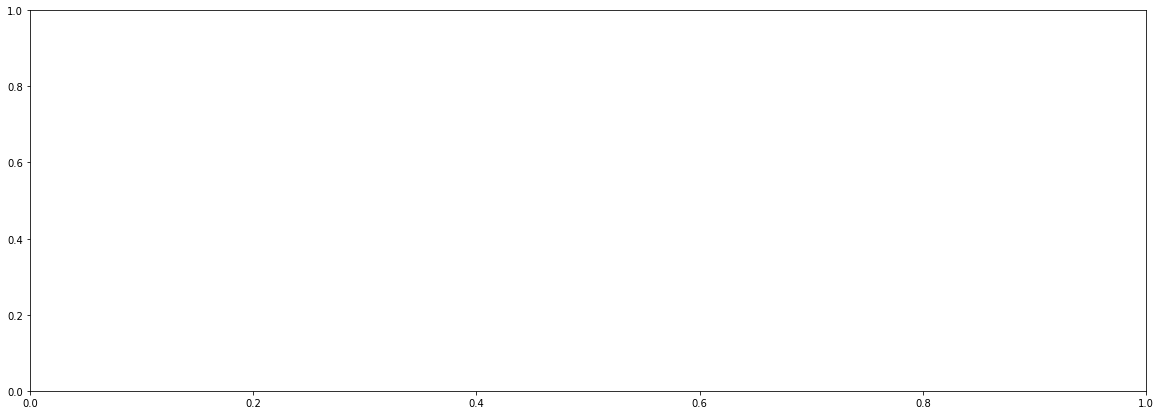

In [ ]:
fig2, ax = plt.subplots(figsize = (20,7))
list_ = wineReviewsVar.variety.mean().index.tolist()
sns.violinplot(
    x='variety',
    y='points',
    data=wineReviewsVar, order = list_)
plt.xticks(rotation = 90)
plt.show()

However, there's clear variation when we look at the price of the wine variety:

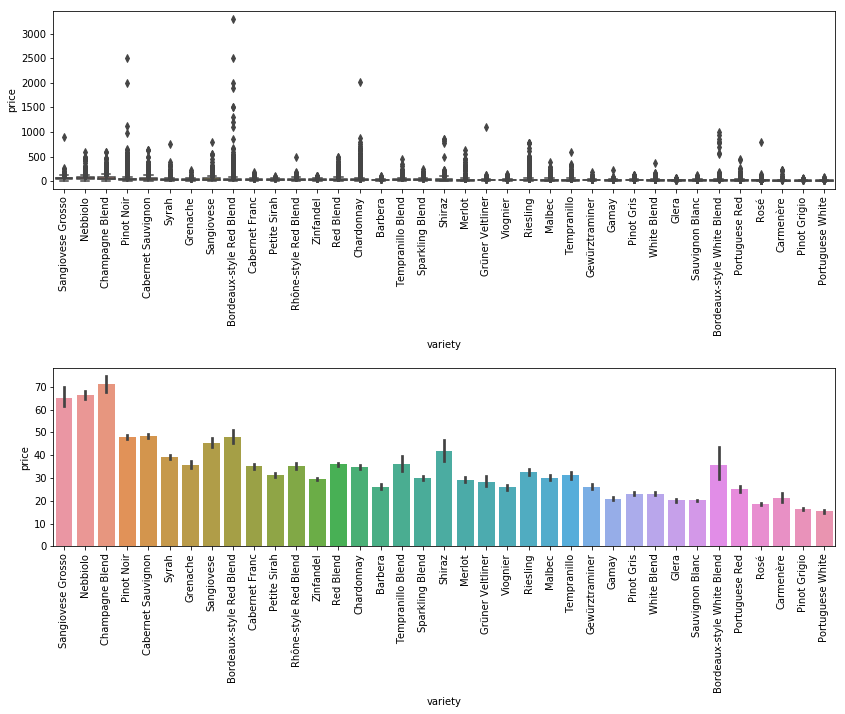

In [36]:
plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
df5 = pd.DataFrame({col:vals['price'] for col,vals in wineReviewsVar.groupby('variety')})
meds4 = df5.median()
meds4.sort_values(ascending=False, inplace=True)

chart = sns.boxplot(x='variety',y='price', data=wineReviewsVar, order=meds4.index)
plt.xticks(rotation = 90)

plt.subplot(3,1,2)
chart1 = sns.barplot(x='variety',y='price', data=wineReviewsVar, order=meds4.index)
plt.xticks(rotation = 90)

plt.subplots_adjust(hspace = 1.0,top = 0.9)

plt.show()

# Taster Names Exploration

## Plotting Taster Names against the Total count

In [ ]:
fig2, ax = plt.subplots(figsize = (20,7))
g = sns.countplot(x='taster_name', data=wineReviews, palette='hls')
g.set_title("Taster Name Count ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

## Plotting Taster Names against Wine Prices

In [ ]:
fig2, ax = plt.subplots(figsize = (20,7))
g1 = sns.boxplot(y='price', x='taster_name', data=wineReviews,
                 palette='hls')
g1.set_title("Taster Name Wine Values Distribuition ", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

## BoxPlotting Taster Names against Wine Prices

In [ ]:
fig2, ax = plt.subplots(figsize = (20,7))
g2 = sns.boxplot(y='points', x='taster_name',
                  data=wineReviews, palette='hls')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

# Winery Distribution

We find the top 20 Winery based on their total observations

In [ ]:
winery = wineReviews.winery.value_counts()[:20]
winery 

In [ ]:
fig2, ax = plt.subplots(figsize = (20,7))
wineplot= sns.countplot(x='winery', 
                  data=wineReviews.loc[(wineReviews.winery.isin(winery.index.values))],
                 palette='Set2')
wineplot.set_title("TOP 20 most frequent Winery's", fontsize=20)
wineplot.set_xlabel(" ", fontsize=15)
wineplot.set_ylabel("Count", fontsize=15)
wineplot.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

## BoxPlotting Price by Wineries

In [ ]:
fig12, ax = plt.subplots(figsize = (20,7))
priceByWinery = sns.boxplot(y='price', x='winery',
                  data=wineReviews.loc[(wineReviews.winery.isin(winery.index.values))],
                 palette='Set2')
priceByWinery.set_title("Price by Winery's", fontsize=20)
priceByWinery.set_xlabel("", fontsize=15)
priceByWinery.set_ylabel("Price", fontsize=15)
priceByWinery.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

## BoxPlotting Price by Wineries

In [ ]:
fig12, ax = plt.subplots(figsize = (20,7))
g2 = sns.boxplot(y='points', x='winery',
                  data=wineReviews.loc[(wineReviews.winery.isin(winery.index.values))],
                 palette='Set2')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
plt.show()

# Can we Analyse the Description? Let's find out...

## Does Description Length Affect the Wine Score (Points)? 

We create a box plot for description length vs. the points given to see whether or not descriptions correlate with the scores:

In [ ]:
wineReviewsDesc = wineReviews.assign(desc_length = wineReviews['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=wineReviewsDesc )
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

To our surprise, it turns out that high scores given by the wine taters have to do with the length of description provided. The median of the description length seem to increase with the increase of points of score. This suggests that the more information provided in the description of wine, the more information the tasters get, thus may lead to the causation of the high scores. 

## Who are the sommeliers with biggest descriptions length?!

In [ ]:
plt.figure(figsize=(20,7))

g = sns.boxplot(x='taster_name', y='desc_length', data=wineReviewsDesc)
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) 
g.set_xlabel('Taster Name', fontsize = 16) 
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

## Scatter plot of the description length and the price

In [ ]:
plt.figure(figsize=(20,7))

g = sns.regplot(x='desc_length', y='price',
                data=wineReviewsDesc, fit_reg=False)
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

In [ ]:
wineReviewsDesc.corr()

# Wordcloud of Wine Titles

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(wineReviews['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - WINE TITLES",fontsize=25)
plt.axis('off')
plt.show()